# Notes for Applied Statistics

[Home](../../index.html)|[DA](index.da.html)|[EN](index.en.html)

## General comments

Here are materials from the course [_Applied
Statistics_](https://www.nbi.dk/~petersen/Teaching/AppliedStatistics2018.htm)
in 2018.

The notes are provided as [Jupyter notebooks](https://jupyter.org) since it's a good pedagogical tool to explain what is going on in the solutions.

The notes, as far as possible, _only_ use the regular
[_SciPy_](https://scipy.org) stack - that is 

- [_NumPy_](https://numpy.org)
- [_SciPy_](https://scipy.org)
- [_Matplotlib_](https://matplotlib.org)
- [_SymPy_](https://sympy.org)

Other packages are avoided, such as 

- [_iminuit_](https://iminuit.readthedocs.io)
- [_ROOT_](https://root.cern.ch)
- [_LMFIT_](https://lmfit.github.io/lmfit-py/)

since these packages are not part of the standard setup on most
platforms (including [https://erda.dk](ERDA)). 

The notes do _not_ refrained from doing "clever" solutions, but try not
to be too clever and explain what is going on. 

## Notes

### Introduction to Python 

This note introduces Python and _NumPy_ by way of examples.  



- <a class="ipynb" href="PythonIntro.ipynb"></a>
- <a class='nbview' href='https://nbviewer.jupyter.org/urls/cholmcc.gitlab.io/nbi-python/courses/appstat/PythonIntro.ipynb'></a>
- <a class="pdf" href="PythonIntro.pdf"></a>
- <a class="slides" href="PythonIntro.slides.html"></a>
    
For more information, see also 

-  
  - [Python overview](../../basics/#Python)
  - [Basic data analysis](../../basics/#BasalData)

### Plotting and Fitting 

This note introduces plotting and fitting by examples.   This note uses the module [`nbi_stat`](../../statistics/#Statistik) available from this site.  More information available on this module and statistics in Python at the [statistics page](../../statistics/)
    
- <a class="ipynb" href="PlottingAndFitting.ipynb"></a>
- <a class='nbview' href='https://nbviewer.jupyter.org/urls/cholmcc.gitlab.io/nbi-python/courses/appstat/PlottingAndFitting.ipynb'></a>
- <a class="pdf" href="PlottingAndFitting.pdf"></a>
- <a class="slides" href="PlottingAndFitting.slides.html"></a>


--- 

&copy; 2019 Christian Holm Christensen


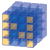
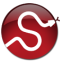
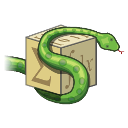

In [1]:
### BEGIN css_styling_idx
### Update 31/10-'20
def css_styling():
    from IPython.core.display import HTML
    try:
        styles = """
        <style>
        :root {
            --tech:           48px;
            --color:          rgba(144,26,30,1);
            --dimcolor:       rgba(144,26,30,.8);
            --matplotlib_img: url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgdmlld0JveD0iMCAwIDc2LjgwMDAwMyA3Ni44MDAwMDMiCiAgIGhlaWdodD0iNzYuODAwMDAzIgogICB3aWR0aD0iNzYuODAwMDAzIgogICBpZD0ic3ZnOTM0IgogICB2ZXJzaW9uPSIxLjEiPgogIDxtZXRhZGF0YQogICAgIGlkPSJtZXRhZGF0YTk0MCI+CiAgICA8cmRmOlJERj4KICAgICAgPGNjOldvcmsKICAgICAgICAgcmRmOmFib3V0PSIiPgogICAgICAgIDxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PgogICAgICAgIDxkYzp0eXBlCiAgICAgICAgICAgcmRmOnJlc291cmNlPSJodHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSIgLz4KICAgICAgICA8ZGM6dGl0bGU+PC9kYzp0aXRsZT4KICAgICAgPC9jYzpXb3JrPgogICAgPC9yZGY6UkRGPgogIDwvbWV0YWRhdGE+CiAgPGRlZnMKICAgICBpZD0iZGVmczkzOCIgLz4KICA8ZwogICAgIGlkPSJnNjAiPgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MTMuMzMzMzMzMDJweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OmNtbWkxMDstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOmNtbWkxMDtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiNjZGRiZTM7ZmlsbC1vcGFjaXR5OjAuOTE3NjQ3MDY7c3Ryb2tlOm5vbmUiCiAgICAgICB4PSIxLjk1NTkyOTMiCiAgICAgICB5PSIxOC4xMjIxMjQiCiAgICAgICBpZD0idGV4dDE5MDQiPjx0c3BhbgogICAgICAgICBpZD0idHNwYW4xOTAyIgogICAgICAgICB4PSIxLjk1NTkyOTMiCiAgICAgICAgIHk9IjE4LjEyMjEyNCI+ZHQ8L3RzcGFuPjwvdGV4dD4KICAgIDxnCiAgICAgICBpZD0iZzE5NTIiPgogICAgICA8dGV4dAogICAgICAgICBpZD0idGV4dDE5MDgiCiAgICAgICAgIHk9IjE1LjI0NTc1NiIKICAgICAgICAgeD0iNDUuNTYxNjQ5IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MTZweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OmNtbWkxMDstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOmNtbWkxMDtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmUiCiAgICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICAgIHk9IjI5LjY0MDYwNiIKICAgICAgICAgICB4PSI0NS41NjE2NDkiCiAgICAgICAgICAgaWQ9InRzcGFuMTkwNiIgLz48L3RleHQ+CiAgICAgIDx0ZXh0CiAgICAgICAgIGlkPSJ0ZXh0MTkxMiIKICAgICAgICAgeT0iMTUuNzA1OTc1IgogICAgICAgICB4PSI0NS40NDY1OTQiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2ZvbnQtc2l6ZToxMy4zMzMzMzMwMnB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6Y21taTEwOy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Y21taTEwO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZSIKICAgICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgICAgeT0iMjcuNzAxNjgzIgogICAgICAgICAgIHg9IjQ1LjQ0NjU5NCIKICAgICAgICAgICBpZD0idHNwYW4xOTEwIiAvPjwvdGV4dD4KICAgICAgPHRleHQKICAgICAgICAgaWQ9InRleHQxOTE2IgogICAgICAgICB5PSIxMy43NTAwNDUiCiAgICAgICAgIHg9IjQ1LjQ0NjU5NCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjE2cHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpjbW1pMTA7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjpjbW1pMTA7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lIgogICAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIj48dHNwYW4KICAgICAgICAgICB5PSIyOC4xNDQ4OTYiCiAgICAgICAgICAgeD0iNDUuNDQ2NTk0IgogICAgICAgICAgIGlkPSJ0c3BhbjE5MTQiIC8+PC90ZXh0PgogICAgICA8dGV4dAogICAgICAgICBpZD0idGV4dDE5MjAiCiAgICAgICAgIHk9IjE0LjIxMDI2NCIKICAgICAgICAgeD0iNDUuNTYxNjQ5IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MjRweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OmNtbWkxMDstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOmNtbWkxMDtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmUiCiAgICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICAgIHk9IjM1LjgwMjU0IgogICAgICAgICAgIHg9IjQ1LjU2MTY0OSIKICAgICAgICAgICBpZD0idHNwYW4xOTE4IiAvPjwvdGV4dD4KICAgICAgPHRleHQKICAgICAgICAgaWQ9InRleHQxOTI0IgogICAgICAgICB5PSIxMC40MTM0NiIKICAgICAgICAgeD0iNDcuMDU3MzU4IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MTguNjY2NjY2MDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OmNtbWkxMDstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOmNtbWkxMDtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiNjZWRjZTQ7ZmlsbC1vcGFjaXR5OjAuODc4NDMxMzc7c3Ryb2tlOm5vbmUiCiAgICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICAgIHk9IjEwLjQxMzQ2IgogICAgICAgICAgIHg9IjQ3LjA1NzM1OCIKICAgICAgICAgICBpZD0idHNwYW4xOTIyIj5wdjwvdHNwYW4+PC90ZXh0PgogICAgICA8dGV4dAogICAgICAgICBpZD0idGV4dDE5MjgiCiAgICAgICAgIHk9IjU2LjA5MDE2NCIKICAgICAgICAgeD0iNC4zNzIwNzc1IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MTguNjY2NjY2MDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OmNtbWkxMDstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOmNtbWkxMDtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmUiCiAgICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICAgIHk9IjcyLjg4NDE1NSIKICAgICAgICAgICB4PSI0LjM3MjA3NzUiCiAgICAgICAgICAgaWQ9InRzcGFuMTkyNiIgLz48L3RleHQ+CiAgICAgIDx0ZXh0CiAgICAgICAgIGlkPSJ0ZXh0MTkzMiIKICAgICAgICAgeT0iNTQuOTM5NjE3IgogICAgICAgICB4PSIzLjc5NjgwNCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjI0cHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpjbW1pMTA7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjpjbW1pMTA7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojY2VkYmU1O2ZpbGwtb3BhY2l0eTowLjk0NTA5ODA0O3N0cm9rZTpub25lIgogICAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIj48dHNwYW4KICAgICAgICAgICB5PSI1NC45Mzk2MTciCiAgICAgICAgICAgeD0iMy43OTY4MDQiCiAgICAgICAgICAgaWQ9InRzcGFuMTkzMCI+ZTwvdHNwYW4+PC90ZXh0PgogICAgPC9nPgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MjRweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OmNtbWkxMDstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOmNtbWkxMDtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiNjOWQ2ZGU7ZmlsbC1vcGFjaXR5OjAuOTkyMTU2ODY7c3Ryb2tlOm5vbmUiCiAgICAgICB4PSI1Ny43NTc0NDIiCiAgICAgICB5PSI1My41NTg5NiIKICAgICAgIGlkPSJ0ZXh0MTkzNiI+PHRzcGFuCiAgICAgICAgIGlkPSJ0c3BhbjE5MzQiCiAgICAgICAgIHg9IjU3Ljc1NzQ0MiIKICAgICAgICAgeT0iNTMuNTU4OTYiPmR4PC90c3Bhbj48L3RleHQ+CiAgPC9nPgogIDxlbGxpcHNlCiAgICAgcnk9IjM0Ljg1MzMxMyIKICAgICByeD0iMzQuNzM1MzY3IgogICAgIGN5PSIzNyIKICAgICBjeD0iMzkiCiAgICAgaWQ9InBhdGg5NDQiCiAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC43MDExNzI3NztzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIiAvPgogIDxlbGxpcHNlCiAgICAgcnk9IjI3LjQwMDk1MyIKICAgICByeD0iMjcuMzA4MjI0IgogICAgIGN5PSIzNyIKICAgICBjeD0iMzkiCiAgICAgaWQ9InBhdGg5NDQtMyIKICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjY5OTk5OTk5O3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiIC8+CiAgPGVsbGlwc2UKICAgICByeT0iMTkuNTY0MzQxIgogICAgIHJ4PSIxOS40OTgxMzEiCiAgICAgY3k9IjM3IgogICAgIGN4PSIzOSIKICAgICBpZD0icGF0aDk0NC0zLTYiCiAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC42OTk5OTk5OTtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIiAvPgogIDxlbGxpcHNlCiAgICAgcnk9IjExLjk2MDYxNiIKICAgICByeD0iMTEuOTIwMTQiCiAgICAgY3k9IjM3IgogICAgIGN4PSIzOSIKICAgICBpZD0icGF0aDk0NC0zLTYtNyIKICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjY2NTYyNDAyO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiIC8+CiAgPHBhdGgKICAgICBpZD0icGF0aDE3OTgiCiAgICAgZD0iTSAzOSwyIFYgNzIiCiAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC42OTk5OTk5OTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIiAvPgogIDxwYXRoCiAgICAgaWQ9InBhdGgxNzk4LTUiCiAgICAgZD0iTSA3NCwzNyBIIDQiCiAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC42OTk5OTk5OTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIiAvPgogIDxwYXRoCiAgICAgaWQ9InBhdGgxNzk4LTMiCiAgICAgZD0iTSA2My44MTM2MzEsMTIuMzE2MzI3IDE0LjE4NjM2OSw2MS42ODM2NzMiCiAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC42OTk5OTk5OTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIiAvPgogIDxwYXRoCiAgICAgaWQ9InBhdGgxNzk4LTU2IgogICAgIGQ9Ik0gMTQuMDU2ODg0LDEyLjQ0NzE4IDYzLjk0MzExNiw2MS41NTI4MiIKICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjY5OTk5OTk5O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiIC8+CiAgPHBhdGgKICAgICBkPSJNIDE4LjcxOTEzMSwxMi44MDUyODEgQSAzMS4wMDcyMzMsMzEuOTg1MTk3IDAgMCAxIDMyLjQ1MzIzNyw1LjczNTg1OTUgTCAzOSwzNyBaIgogICAgIGlkPSJwYXRoMTg0MCIKICAgICBzdHlsZT0iZmlsbDojZjA5OTVlO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjY5OTk5OTk5O3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjE7ZmlsbC1vcGFjaXR5OjEiIC8+CiAgPHBhdGgKICAgICBkPSJNIDEyLjkwNjYzMiw0MS43Njk0NjkgQSAyNi41NzU4NjMsMjUuMTQzOSAwIDAgMSAxNS4xOTQyNzcsMjUuODIyODI2IEwgMzksMzcgWiIKICAgICBpZD0icGF0aDE4NTAiCiAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6I2ZmZGI2NjtmaWxsLW9wYWNpdHk6MTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC42OTk5OTk5OTtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIiAvPgogIDxwYXRoCiAgICAgZD0iTSAyNi41NDc2OSw0Ny4yMDM0MDQgQSAxNi4wOTg3NDIsMTYuMDk4NzQyIDAgMCAxIDI0LjcyNDA4OSw0NC40NDA5NTggTCAzOSwzNyBaIgogICAgIGlkPSJwYXRoMTg3NiIKICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojNjNhZTlkO2ZpbGwtb3BhY2l0eTowLjk5NjA3ODQzO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjY5OTk5OTk5O3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiIC8+CiAgPHBhdGgKICAgICBkPSJtIDQyLjc0MjgxNCw1Ni43ODAwMzggYSAyMC4xMzEwMzUsMjAuMTMxMDM1IDAgMCAxIC03LjI4MTgwMSwwLjAzNzQ4IEwgMzksMzcgWiIKICAgICBpZD0icGF0aDE4NzgiCiAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6Izg3YmM4NTtmaWxsLW9wYWNpdHk6MTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC42OTk5OTk5OTtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIiAvPgogIDxwYXRoCiAgICAgZD0ibSA2My43NDgzODYsNTUuOTUxMDU2IGEgMzEuMTcwOTAyLDMxLjE3MDkwMiAwIDAgMSAtNS43MDM3NDcsNS43MjUzODggTCAzOSwzNyBaIgogICAgIGlkPSJwYXRoMTg5MCIKICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojZjU5ZDYwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjY5OTk5OTk5O3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiIC8+CiAgPHBhdGgKICAgICBkPSJtIDQ3Ljg2OTQwNSwxNS41MDgyOCBhIDIzLjI0OTk1NCwyMy4yNDk5NTQgMCAwIDEgNi40NjQyMDksNC4wMTQ4NiBMIDM5LDM3IFoiCiAgICAgaWQ9InBhdGgxODk0IgogICAgIHN0eWxlPSJkaXNwbGF5OmlubGluZTtmaWxsOiNkMGViNzY7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuNjk5OTk5OTk7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIgLz4KICA8cGF0aAogICAgIGQ9Im0gNDYuNzcwNDI5LDMyLjk4MjIzMSBhIDguNzQ3Njg3Myw4Ljc0NzY4NzMgMCAwIDEgMC45NTY1NjcsNC42MTkwODYgTCAzOSwzNyBaIgogICAgIGlkPSJwYXRoMTg5OCIKICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojNTQ2ODhlO2ZpbGwtb3BhY2l0eTowLjk4MDM5MjE2O3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjY5OTk5OTk5O3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiIC8+Cjwvc3ZnPgo=);
            --ipynb_img:      url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgZW5hYmxlLWJhY2tncm91bmQ9Im5ldyIKICAgaWQ9InN2ZzIiCiAgIGhlaWdodD0iMjIiCiAgIHZlcnNpb249IjEuMSIKICAgd2lkdGg9IjIyIj4KICA8ZGVmcwogICAgIGlkPSJkZWZzMzg3MSIgLz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGEzODc0Ij4KICAgIDxyZGY6UkRGPgogICAgICA8Y2M6V29yawogICAgICAgICByZGY6YWJvdXQ9IiI+CiAgICAgICAgPGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICAgICAgPGRjOnR5cGUKICAgICAgICAgICByZGY6cmVzb3VyY2U9Imh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIiAvPgogICAgICAgIDxkYzp0aXRsZT48L2RjOnRpdGxlPgogICAgICA8L2NjOldvcms+CiAgICA8L3JkZjpSREY+CiAgPC9tZXRhZGF0YT4KICA8ZwogICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0zMjYsLTUzNC4zNjIyKSIKICAgICBpZD0ibGF5ZXIxIj4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDM3MTMiCiAgICAgICB5PSI1NTAuODYyMjQiCiAgICAgICB4PSIzMzAuOTQwNyIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjE4cHg7bGluZS1oZWlnaHQ6MTI1JTtmb250LWZhbWlseTpTYW5zO2xldHRlci1zcGFjaW5nOi0ycHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiNmZmE1NTU7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjFweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHk9IjU1MC44NjIyNCIKICAgICAgICAgeD0iMzMwLjk0MDciCiAgICAgICAgIGlkPSJ0c3BhbjM3MTEiPltdPC90c3Bhbj48L3RleHQ+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojZmZhNTU1O2ZpbGwtb3BhY2l0eToxIgogICAgICAgcj0iMSIKICAgICAgIGN5PSI1NDMuNDA0NTQiCiAgICAgICBjeD0iMzM2Ljk1MzM3IgogICAgICAgaWQ9InBhdGgzNzE5IiAvPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9ImZpbGw6I2ZmYTU1NTtmaWxsLW9wYWNpdHk6MSIKICAgICAgIHI9IjEiCiAgICAgICBjeT0iNTQ3LjQxMzAyIgogICAgICAgY3g9IjMzNy4wOTMyMyIKICAgICAgIGlkPSJwYXRoMzcxOS02IiAvPgogIDwvZz4KPC9zdmc+Cg==);
            --html_img:       url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgaWQ9InN2ZzIiCiAgIGhlaWdodD0iMjIiCiAgIHZlcnNpb249IjEuMSIKICAgd2lkdGg9IjIyIj4KICA8ZGVmcwogICAgIGlkPSJkZWZzMzg3MSIgLz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGEzODc0Ij4KICAgIDxyZGY6UkRGPgogICAgICA8Y2M6V29yawogICAgICAgICByZGY6YWJvdXQ9IiI+CiAgICAgICAgPGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICAgICAgPGRjOnR5cGUKICAgICAgICAgICByZGY6cmVzb3VyY2U9Imh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIiAvPgogICAgICAgIDxkYzp0aXRsZT48L2RjOnRpdGxlPgogICAgICA8L2NjOldvcms+CiAgICA8L3JkZjpSREY+CiAgPC9tZXRhZGF0YT4KICA8ZwogICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0zMjYsLTUzNC4zNjIyKSIKICAgICBpZD0ibGF5ZXIxIj4KICAgIDxyZWN0CiAgICAgICBpZD0icmVjdDQwMzUiCiAgICAgICBzdHlsZT0iZmlsbDojMDQ4OTZhIgogICAgICAgaGVpZ2h0PSIxMC45OTk5ODMiCiAgICAgICB5PSI1MjYuNzAxODQiCiAgICAgICB4PSIyODcuNzQxNzYiCiAgICAgICB3aWR0aD0iMCIgLz4KICAgIDxwYXRoCiAgICAgICBkPSJtIDMzNy4wMDQwNSw1MzcuMzYyMiBjIC0wLjMxODk2LDAgLTAuNjI3OTIsMC4wMjYgLTAuOTM3ODgsMC4wNjMgLTAuMzAzOTYsMC4wMzYgLTAuNjEzOTIsMC4wODcgLTAuOTA1ODksMC4xNTU5IC0wLjA5NCwwLjAyMiAtMC4xODQ5NywwLjA2NyAtMC4yODA5NiwwLjA5NCAtMC4wODQsMC4wMjMgLTAuMTY2OTgsMC4wMzcgLTAuMjQ5OTcsMC4wNjMgLTAuMTA0OTksMC4wMzMgLTAuMjEzOTcsMC4wNTkgLTAuMzEyOTYsMC4wOTQgLTAuMTA2OTksMC4wMzggLTAuMjA2OTcsMC4wODMgLTAuMzEyOTYsMC4xMjQ5IC0wLjIwNTk3LDAuMDgzIC0wLjM5Njk1LDAuMTgyIC0wLjU5MzkzLDAuMjgwOSAtMC4wNzEsMC4wMzYgLTAuMTQ4OTgsMC4wNTYgLTAuMjE4OTcsMC4wOTQgLTAuMjI5OTcsMC4xMjA5IC0wLjQ0MDk0LDAuMjYyOSAtMC42NTU5MiwwLjQwNTggLTAuMDgyLDAuMDU1IC0wLjE2OTk3LDAuMDk4IC0wLjI0OTk2LDAuMTU1OSAtMC4wMzMsMC4wMjQgLTAuMDYxLDAuMDM4IC0wLjA5NCwwLjA2MyAtMC4wOTQsMC4wNzEgLTAuMTkwOTgsMC4xNDE4IC0wLjI4MDk3LDAuMjE4OCAtMC4xMDY5OCwwLjA4OSAtMC4yMDk5NywwLjE4NjkgLTAuMzEyOTYsMC4yODA5IC0wLjAzMiwwLjAzIC0wLjA2MiwwLjA2NCAtMC4wOTQsMC4wOTQgLTAuMDExLDAuMDExIC0wLjAyLDAuMDIgLTAuMDMxLDAuMDMxIC0wLjAxNiwwLjAxNiAtMC4wMTUsMC4wNDcgLTAuMDMxLDAuMDYzIC0wLjIwOTk3LDAuMjAzOSAtMC40Mzg5NCwwLjM5ODggLTAuNjI0OTIsMC42MjQ3IC0wLjAwNSwwLjAxIDAuMDA1LDAuMDI1IDAsMC4wMzEgLTAuMTgwOTgsMC4yMTk5IC0wLjM0Mjk2LDAuNDQ3OCAtMC40OTk5NCwwLjY4NzcgLTAuMDIxLDAuMDMyIC0wLjA0MiwwLjA2MSAtMC4wNjMsMC4wOTQgLTAuMDE1LDAuMDI0IC0wLjA0NywwLjAzNyAtMC4wNjMsMC4wNjMgLTAuMDYsMC4wOTggLTAuMTAwOTksMC4yMDkgLTAuMTU1OTgsMC4zMTI5IC0wLjAxOCwwLjAzMyAtMC4wNDUsMC4wNjEgLTAuMDYzLDAuMDk0IC0wLjA3NSwwLjE0NTkgLTAuMTQ5OTgsMC4yODk4IC0wLjIxODk3LDAuNDM3OCAtMC4wMDQsMC4wMSAwLjAwNCwwLjAyMyAwLDAuMDMxIC0wLjExNjk5LDAuMjUyOCAtMC4yMjE5OCwwLjUxMzYgLTAuMzEyOTYsMC43ODA1IC0wLjAxOSwwLjA1MyAtMC4wNDUsMC4xMDMgLTAuMDYzLDAuMTU2IC0wLjAwMywwLjAxIDAuMDAzLDAuMDIyIDAsMC4wMzEgLTAuMDIsMC4wNjIgLTAuMDQ0LDAuMTI1IC0wLjA2MywwLjE4OCAtMC4wNzMsMC4yNTY4IC0wLjEzOTk4LDAuNTEzNyAtMC4xODc5OCwwLjc4MDYgLTAuMDM0LDAuMTkxOSAtMC4wNzQsMC4zOTY4IC0wLjA5NCwwLjU5MzggLTAuMDI3LDAuMjY0OCAtMC4wMzEsMC41NDE3IC0wLjAzMSwwLjgxMjUgMCwwLjQwMzggMC4wMzYsMC43OTk2IDAuMDk0LDEuMTg3NSAwLjAwNiwwLjA0MSAtMC4wMDcsMC4wODUgMCwwLjEyNDkgMC4wNDQsMC4yNjU5IDAuMTE3OTgsMC41MjQ4IDAuMTg3OTgsMC43ODA3IDAuMDI2LDAuMDk2IDAuMDY0LDAuMTg1OSAwLjA5NCwwLjI4MDkgMC4wNCwwLjEyODkgMC4wNzksMC4yNDg5IDAuMTI0OTksMC4zNzQ4IDAuMDc3LDAuMjExOSAwLjE1NTk4LDAuNDIxOCAwLjI0OTk3LDAuNjI0NiAwLjA1LDAuMTA2IDAuMTAxOTgsMC4yMDk5IDAuMTU1OTgsMC4zMTI5IDAuMTUxOTgsMC4yOTE5IDAuMzE0OTYsMC41NzQ3IDAuNDk5OTMsMC44NDM2IDAuMDE2LDAuMDI0IDAuMDQ2LDAuMDM5IDAuMDYzLDAuMDYzIDAuMTk3OTcsMC4yODA5IDAuMzkzOTUsMC41NTk3IDAuNjI0OTIsMC44MTI2IDAuMDQsMC4wNDQgMC4wODQsMC4wODIgMC4xMjQ5OCwwLjEyNSAwLjA0LDAuMDQyIDAuMDg0LDAuMDg0IDAuMTI0OTksMC4xMjQ5IDAuMjEzOTcsMC4yMTM5IDAuNDUwOTQsMC40MDQ4IDAuNjg3OTEsMC41OTM4IDAuMzA1OTYsMC4yNDM4IDAuNjI4OTIsMC40NTg3IDAuOTY4ODgsMC42NTU2IDAuMDEyLDAuMDEgMC4wMTksMC4wMjQgMC4wMzEsMC4wMzEgMC4wNTMsMC4wMyAwLjEwMjk5LDAuMDY1IDAuMTU1OTgsMC4wOTQgMC4zMTU5NiwwLjE1NiAwLjY5MTkyLDAuMzI0OSAwLjkzNzg4LDAuNDM3OCAwLjEwOTk5LDAuMDQyIDAuMjMwOTgsMC4wNTcgMC4zNDM5NiwwLjA5NCAwLjA1MywwLjAxOCAwLjEwMjk5LDAuMDQ2IDAuMTU1OTgsMC4wNjMgMC4xMzU5OCwwLjA0MSAwLjI2Nzk3LDAuMDkgMC40MDU5NSwwLjEyNDkgMC4wNDIsMC4wMTEgMC4wODMsMC4wMjEgMC4xMjQ5OSwwLjAzMSAwLjI5MTk2LDAuMDY5IDAuNjAxOTIsMC4xMjA5IDAuOTA1ODgsMC4xNTU5IDAuMzA4OTYsMC4wMzYgMC42MTc5MiwwLjA2MyAwLjkzNzg4LDAuMDYzIDAuMzM5OTYsMCAwLjY3MDkyLC0wLjAyMSAwLjk5OTg4LC0wLjA2MyAwLjM2NDk1LC0wLjA0OCAwLjY4MDkxLC0wLjEyMzkgMC45OTk4NywtMC4xODc5IDEuNjk3NzksLTAuNDM1OCAzLjE2MTYsLTEuNDIxMyA0LjIxODQ3LC0yLjc0ODcgMC4wMjgsLTAuMDM1IDAuMDY3LC0wLjA1OCAwLjA5NCwtMC4wOTQgMC4wMDksLTAuMDEyIDAuMDIyLC0wLjAyIDAuMDMxLC0wLjAzMSAwLjAxNCwtMC4wMTggMC4wMTgsLTAuMDQ0IDAuMDMxLC0wLjA2MyAwLjYyMjkyLC0wLjgyNDYgMS4wNzY4NiwtMS43ODAxIDEuMzQzODMsLTIuODExNyAwLjA1NiwtMC4yMTY5IDAuMTE3OTksLTAuNDMxOCAwLjE1NTk4LC0wLjY1NTcgMC4wMDUsLTAuMDMgLTAuMDA1LC0wLjA2MyAwLC0wLjA5NCAwLjAwNiwtMC4wNCAwLjAyNSwtMC4wNzkgMC4wMzEsLTAuMTI1IDAuMDA2LC0wLjA0MyAwLjAyNiwtMC4wODIgMC4wMzEsLTAuMTI0OSBoIC0wLjAzMSBjIDAuMDQ0LC0wLjMyODkgMC4wOTQsLTAuNjU4NyAwLjA5NCwtMC45OTk2IDAsLTAuNTUxNyAtMC4wNSwtMS4xMDM0IC0wLjE1NTk4LC0xLjYyNDIgLTAuMDA5LC0wLjA0MyAtMC4wMjIsLTAuMDgyIC0wLjAzMSwtMC4xMjQ5IC0wLjA0NiwtMC4yMDc5IC0wLjEyMzk4LC0wLjQyMjkgLTAuMTg3OTgsLTAuNjI0OCAtMC4wMDMsLTAuMDEgMC4wMDMsLTAuMDIyIDAsLTAuMDMxIC0wLjAxMiwtMC4wMzggLTAuMDE4LC0wLjA1NiAtMC4wMzEsLTAuMDk0IC0wLjAzOSwtMC4xMTkgLTAuMDgxLC0wLjI1NzkgLTAuMTI0OTgsLTAuMzc0OCAtMC4wMTIsLTAuMDMyIC0wLjAxOCwtMC4wNjQgLTAuMDMxLC0wLjA5NCAtMC4wNDMsLTAuMTA5IC0wLjEwNzk5LC0wLjIwNTkgLTAuMTU1OTgsLTAuMzEyOCAtMC4wMDIsMCAwLjAwMiwtMC4wMjYgMCwtMC4wMzEgLTAuMDI1LC0wLjA1NCAtMC4wNjgsLTAuMTAyOSAtMC4wOTQsLTAuMTU1OSAtMC4wOTgsLTAuMjAyOSAtMC4xOTc5NywtMC4zOTk4IC0wLjMxMjk2LC0wLjU5MzcgLTAuMDU4LC0wLjA5OCAtMC4wOTQsLTAuMjE2OSAtMC4xNTU5OCwtMC4zMTI5IC0wLjAyNCwtMC4wMzYgLTAuMDY5LC0wLjA1OCAtMC4wOTQsLTAuMDk0IC0wLjA2NywtMC4wOTkgLTAuMTQ2OTgsLTAuMTg1IC0wLjIxODk3LC0wLjI4MDkgLTAuMDgsLTAuMSAtMC4xMzk5OSwtMC4yMTU5IC0wLjIxODk4LC0wLjMxMjkgLTAuMDA1LC0wLjAxIDAuMDA1LC0wLjAyNSAwLC0wLjAzMSAtMC4xNzE5NywtMC4yMDg5IC0wLjM2OTk1LC0wLjQwMjggLTAuNTYyOTIsLTAuNTkzNyAtMC4wOTMsLTAuMDkyIC0wLjE4Mzk4LC0wLjE5MzkgLTAuMjgwOTcsLTAuMjgwOSAtMC4wMjgsLTAuMDI1IC0wLjA2NSwtMC4wMzggLTAuMDk0LC0wLjA2MyAtMC4yMDg5NywtMC4xODE5IC0wLjQyOTk0LC0wLjMzOTggLTAuNjU1OTIsLTAuNDk5NiAtMC4wNTUsLTAuMDM4IC0wLjEwMDk4LC0wLjA4OCAtMC4xNTU5OCwtMC4xMjUgLTAuMDcsLTAuMDQ2IC0wLjE0Nzk4LC0wLjA4MSAtMC4yMTg5NywtMC4xMjQ5IC0wLjEzNDk4LC0wLjA4NCAtMC4yNjU5NywtMC4xNzQgLTAuNDA1OTUsLTAuMjQ5OSAtMC4xMjI5OCwtMC4wNjcgLTAuMjQ3OTcsLTAuMTI3IC0wLjM3NDk1LC0wLjE4NzkgLTAuMjEzOTcsLTAuMTAyIC0wLjQzMTk1LC0wLjE5OCAtMC42NTU5MiwtMC4yODA5IC0wLjI2NTk2LC0wLjA5OSAtMC41MzM5MywtMC4xNzk5IC0wLjgxMjksLTAuMjQ5OSAtMC4yNDQ5NiwtMC4wNjIgLTAuNDk2OTMsLTAuMTE4IC0wLjc0OTksLTAuMTU1OSAtMC4zOTY5NSwtMC4wNjEgLTAuODA0OSwtMC4wOTQgLTEuMjE4ODUsLTAuMDk0IG0gMCwwLjk5OTYgYyAwLjI5ODk2LDAgMC41ODQ5MywwLjAyNyAwLjg3NDg5LDAuMDYzIDAuMTc5OTgsMC4wMjMgMC4zNTQ5NiwwLjA1OCAwLjUzMDkzLDAuMDk0IDAuMDEsMCAwLjAyMSwwIDAuMDMxLDAgMC4xNjU5OCwwLjAzNSAwLjMzNzk2LDAuMDc5IDAuNDk5OTQsMC4xMjQ5IDAuMDk2LDAuMDI3IDAuMTg2OTgsMC4wNjMgMC4yODA5NywwLjA5NCAwLjE3MTk3LDAuMDU3IDAuMzMzOTUsMC4xMTY5IDAuNDk5OTMsMC4xODc5IDAuMTkzOTgsMC4wOCAwLjM3ODk2LDAuMTUyOCAwLjU2MjkzLDAuMjQ5OCAtMC4wMzEsMC4wMSAtMC4wNjMsMC4wMjEgLTAuMDk0LDAuMDMxIC0wLjA0NywwLjAxNyAtMC4xMTI5OCwwLjA5NiAtMC4xMjQ5OCwwLjEyNDkgLTAuMDIsMC4wNDggMC4wMDUsMC4xMTUgMCwwLjE4OCAwLjAzOCwwLjAxNyAwLjA2LDAuMDg5IDAuMTI0OTgsMC4xMjQ5IDAuMDI1LDAuMDE0IDAuMDQxLC0wLjAxIDAuMDYzLDAgMC4wMzgsMC4wMjEgMC4wNywwLjA4NyAwLjA2MywwLjEyNDkgLTAuMDExLDAuMDU1IC0wLjA4OCwwLjAyMiAtMC4xMjQ5OCwwLjA2MyAwLjAwNiwwLjA3OCAtMC4wNDMsMC4xMDUgLTAuMDYzLDAuMTU1OSAwLjAxMiwwLjAzMyAwLjA1NywwLjAyNCAwLjA2MywwLjA2MyAtMC4wMDcsMC4wNDMgLTAuMDc5LDAuMDQ5IC0wLjA2MywwLjA5NCAwLjA3MiwwLjA1NiAwLjE1MDk4LC0wLjAyMiAwLjIxODk3LC0wLjAzMSAwLjE0ODk4LC0wLjAxOSAwLjI4Mjk3LDAuMDQxIDAuMzc0OTUsLTAuMDMxIC0wLjAxMiwtMC4wNzEgMC4xMDA5OSwtMC4wOTIgMC4wOTQsLTAuMTU1OSAtMC4wMDYsLTAuMDQ4IC0wLjA5LC0wLjA2MSAtMC4xMjQ5OCwtMC4wOTQgLTAuMDE5LC0wLjAxOCAtMC4wNCwtMC4wNTkgLTAuMDYzLC0wLjA5NCAtMC4wMjYsLTAuMDQgLTAuMDY0LC0wLjA4NyAtMC4wOTQsLTAuMTI1IC0wLjAzOSwtMC4wNTIgLTAuMTI0OTgsLTAuMTE2OSAtMC4xMjQ5OCwtMC4xNTU5IDAuMDAxLC0wLjA0NSAwLjA1MiwtMC4wNjMgMC4wNjMsLTAuMTI1IC0wLjAxMiwtMC4wNTcgLTAuMTE2OTksMCAtMC4xMjQ5OSwtMC4wNjMgMC4wMDIsLTAuMDE5IDAuMDIxLC0wLjA1MSAwLjAzMSwtMC4wNjMgMC4xNDk5OCwwLjA4MiAwLjI5Nzk2LDAuMTc4OSAwLjQzNzk1LDAuMjgwOSAwLjAzMiwwLjAyMSAwLjA2MiwwLjA0MSAwLjA5NCwwLjA2MyAwLjEwNzk4LDAuMDgxIDAuMjA2OTcsMC4xNyAwLjMxMjk2LDAuMjQ5OSAtMC4wNjcsMC4wMTIgLTAuMTAwOTksMC4wOSAtMC4xNTU5OCwwLjE1NiAtMC4wMzgsMC4wNDYgLTAuMDk5LDAuMTAwOSAtMC4xNTU5OCwwLjEyNDkgLTAuMDI4LDAuMDEyIC0wLjA2OCwtMC4wMTYgLTAuMDk0LDAgLTAuMDM3LDAuMDI1IC0wLjA1MSwwLjA5NiAtMC4wOTQsMC4xMjUgLTAuMDMxLDAuMDIxIC0wLjEyMzk5LDAuMDk0IC0wLjE1NTk4LDAuMDk0IC0wLjAzOCwxMGUtNCAtMC4wOTgsLTAuMDQgLTAuMTI0OTksLTAuMDMxIC0wLjA0LDAuMDEzIC0wLjAxNywwLjA3NyAtMC4wNjMsMC4wOTQgLTAuMDg4LDAuMDMxIC0wLjI0OTk3LC0wLjA2OSAtMC4yODA5NiwwLjA2MyAwLjAzOCwwLjA3NiAwLjE1Mjk4LDAuMDUxIDAuMjE4OTcsMC4wOTQgMC4wNDIsMC4wMjYgMC4xMTM5OSwwLjE0MyAwLjEyNDk4LDAuMTg3OSAwLjAxLDAuMDM4IDAuMDE1LDAuMTc5IDAsMC4yMTg5IC0wLjA0MSwwLjEwNiAtMC4xNTg5OCwwLjA5NyAtMC4yODA5NiwwLjA5NCAtMC4wMzQsLTEwZS00IC0wLjA2MywwIC0wLjA5NCwwIC0wLjIwNjk3LC0wLjAxNCAtMC40MDY5NSwtMC4wODUgLTAuNDk5OTQsMC4wNjMgMC4wMDcsMC4xMTI5IDAuMDI1LDAuMTgyOSAwLDAuMjgwOCAtMC4wMTgsMC4wNzIgLTAuMDk3LDAuMTI1IC0wLjA5NCwwLjE4OCAwLjAwMiwwLjAzMiAwLjA1NSwwLjA4MiAwLjA2MywwLjEyNDkgMC4wMDUsMC4wMjMgLTAuMDExLDAuMDczIDAsMC4wOTQgMC4wMzQsMC4wNjYgMC4xMjY5OSwtMC4wMSAwLjE4Nzk4LDAgMC4wNTksMC4wMSAwLjEyNTk4LDAuMTIwOSAwLjEyNDk4LDAuMTg3OSAtMTBlLTQsMC4wNDYgLTAuMDMzLDAuMTExOSAtMC4wNjMsMC4xNTU5IC0wLjA1OCwwLjA4OSAtMC4xNjY5OCwwLjA3NyAtMC4yNDk5NywwLjEyNDkgLTAuMDcsMC4wMzkgLTAuMDg0LDAuMTE4OSAtMC4xMjQ5OCwwLjE4NzkgLTAuMDQ0LDAuMDc0IC0wLjA4MSwwLjExMDkgLTAuMDYzLDAuMjE4OSAtMC4wNiwwLjExNzkgLTAuMTI1OTgsMC4xOTM5IC0wLjI0OTk3LDAuMjQ5OSAtMC4wMzcsMC4wMTcgLTAuMDkyLDAuMDM5IC0wLjEyNDk4LDAuMDYzIC0wLjAyNywwLjAxOSAtMC4wNTYsMC4wNTEgLTAuMDk0LDAuMDk0IC0wLjA0NywwLjA1MiAtMC4xLDAuMDg1IC0wLjEyNDk5LDAuMTI1IC0wLjAxOSwwLjAzMSAtMC4wMSwwLjA4NCAtMC4wMzEsMC4xMjQ5IC0wLjAyOSwwLjA1NiAtMC4wODgsMC4xIC0wLjEyNDk4LDAuMTU1OSAtMC4wMTcsMC4wMjYgLTAuMDQzLDAuMDU5IC0wLjA2MywwLjA5NCAtMC4wNDIsMC4wNzcgLTAuMTAwOTksMC4xNTA5IC0wLjA5NCwwLjIxODkgMC4wMDcsMC4wNjYgMC4wODksMC4wNjggMC4wOTQsMC4xMjQ5IDAuMDA0LDAuMDMyIC0wLjAzMywwLjA1OSAtMC4wMzEsMC4wOTQgMC4wMDEsMC4wNTEgMC4wMjcsMC4wODYgMC4wMzEsMC4xMjQ5IDAuMDEsMC4wOTkgLTAuMDQ0LDAuMTIgLTAuMDYzLDAuMTg4IC0wLjAwOSwwLjAzMiAwLjAwOCwwLjA2OCAwLDAuMDk0IC0wLjAxNiwwLjA1IC0wLjA5MywwLjA5OCAtMC4wOTQsMC4xNTYgLTEwZS00LDAuMDQyIDAuMDU5LDAuMDk3IDAuMDYzLDAuMTU1OSAwLjAwMiwwLjA0IC0wLjAzOCwwLjA1NyAtMC4wMzEsMC4wOTQgMC4wMTQsMC4wNzMgMC4xNjE5OCwwLjE2MiAwLjIxODk3LDAuMjE4OSAwLjA3NSwwLjA3NSAwLjE1NDk4LDAuMTM5IDAuMTg3OTgsMC4yMTkgMC4wMjcsMC4wNjcgMC4wNDEsMC4xNjc4IDAuMDk0LDAuMjE4OCAwLjAzOSwwLjAzNyAwLjEwNTk4LDAuMDU0IDAuMTU1OTgsMC4wOTQgMC4wNDcsMC4wMzYgMC4xMDY5OCwwLjA1NSAwLjE1NTk4LDAuMDk0IDAuMDgxLDAuMDY0IDAuMTgyOTcsMC4xOTY5IDAuMzEyOTYsMC4xODc5IDAuMDY4LC0wLjAxIDAuMTQxOTgsLTAuMDUgMC4yMTg5NywtMC4wNjMgMC4wNzksLTAuMDE0IDAuMTY5OTgsLTAuMDM5IDAuMjQ5OTcsLTAuMDMxIDAuMDYxLDAuMDEgMC4xMjM5OCwwLjA2NiAwLjE4Nzk3LDAuMDYzIDAuMDY3LDAgMC4xNDI5OSwtMC4wNjEgMC4yMTg5OCwtMC4wOTQgMC4xMzE5OCwtMC4wNTcgMC4zMzg5NiwtMC4xNTI5IDAuNTMwOTMsLTAuMTI0OSAwLjE0NTk4LDAuMDIxIDAuMTQ4OTgsMC4yMTY5IDAuMjQ5OTcsMC4yODA5IDAuMTE3OTgsMC4wMSAwLjIxODk3LC0wLjA1NCAwLjMxMjk2LC0wLjAzMSAwLjA3LDAuMDE3IDAuMTQ4OTgsMC4xMzE5IDAuMTU1OTgsMC4xODc5IDAuMDA3LDAuMDU4IC0wLjA1NCwwLjEyMSAtMC4wNjMsMC4xNTU5IC0wLjAxOCwwLjA3OCAtMC4wMTcsMC4xNjkgLTAuMDMxLDAuMjE4OSAtMC4wMTEsMC4wMzggLTAuMDMyLDAuMDg2IC0wLjAzMSwwLjEyNSAwLDAuMDM1IDAuMDU4LDAuMTQxOSAwLjA5NCwwLjE4NzkgMC4wNDQsMC4wNTYgMC4xMDI5OSwwLjA5NiAwLjE1NTk4LDAuMTU1OSAwLjA4NywwLjEwOSAwLjE1NDk4LDAuMjM1OSAwLjIxODk3LDAuMzc0OSAwLjAxNywwLjAzNyAtMC4wMTYsMC4wNzcgMCwwLjEyNDkgLTAuMDI5LDAuMjIzOSAtMC4xMDI5OCwwLjM3NjkgLTAuMjQ5OTcsMC42MjQ3IC0wLjA2OSwwLjA4IC0wLjE1Nzk4LDAuMTUgLTAuMTU1OTgsMC4yNDk5IC0wLjAwNSwwLjIzOTkgMC4xMzU5OSwwLjM5MjggMC4xMjQ5OSwwLjYyNDcgLTAuMDI0LDAuMzExOCAwLjAyNCwwLjMzMjggMCwwLjQ5OTcgMC4xMDQ5OSwwLjA1MyAwLjAzMSwwLjIzMjkgMCwwLjM0MzkgLTAuMDQ1LDAuMTMxOSAtMC4xLDAuMTYxOSAtMC4xMjQ5OSwwLjI0OTkgMC4wNzEsMC4wMzEgMC4xNzA5OCwwLjAxOSAwLjI0OTk3LDAgMCwwIDAuMDk2LDAuNDAwOCAwLjA5NCwwLjQwNTggLTAuODA2OSwwLjc5NjcgLTEuODE4NzcsMS4zODc0IC0yLjkzNzYzLDEuNzE4MiAtMC41NDk5MywwLjEzMjkgLTAuNzEyOTEsMC4xMzI5IC0wLjk2ODg4LDAuMTg3OSAtMC4zMzM5NSwwLjA1NSAtMC42ODI5MSwwLjA5NCAtMS4wMzA4NywwLjA5NCAtMC4yNDI5NiwwIC0wLjQ4MjkzLC0wLjAxIC0wLjcxODkxLC0wLjAzMSAtMC4xODE5NywtMC4wMTggLTAuMzUzOTUsLTAuMDYyIC0wLjUzMDkzLC0wLjA5NCAtMC4wNTMsLTAuMDEgLTAuMTAzOTgsLTAuMDIgLTAuMTU1OTgsLTAuMDMxIC0wLjE2Mjk4LC0wLjA1NSAtMC4zNTA5NSwtMC4wODggLTAuNDk5OTQsLTAuMTI0OSAtMC4xNjk5NywtMC4wNDggLTAuMzM0OTUsLTAuMDk2IC0wLjQ5OTkzLC0wLjE1NiAwLjAxNCwtMC4wMTMgMC4wMjcsLTAuMDExIDAuMDMxLC0wLjAzMSAwLjAwOSwtMC4wNCAwLjAwMiwtMC4wNjIgMCwtMC4xMjQ5IDAuMDE1LC0wLjA2NSAwLjA4LC0wLjA1OCAwLjA5NCwtMC4xMjQ5IC0wLjAyOCwtMC4wNDggLTAuMDgzLC0wLjAzOCAtMC4xMjQ5OCwtMC4wNjMgLTAuMDQxLC0wLjAyNCAtMC4wNjgsLTAuMDc0IC0wLjA2MywtMC4xMjUgMC4wNywtMC4wMjkgMC4xOTk5NywwLjA2NiAwLjI0OTk2LC0wLjAzMSAwLjAyNSwtMC4wNDYgLTAuMDM0LC0wLjE0MDkgMCwtMC4xODc5IDAuMDIzLC0wLjAzMSAwLjE2ODk4LC0wLjA1NSAwLjIxODk4LC0wLjA2MyAwLjA3MSwtMC4wMTIgMC4xNDc5OCwtMC4wMSAwLjE4Nzk3LC0wLjAzMSAwLjA0NCwtMC4wMjkgMC4xMDA5OSwtMC4xMDUgMC4wOTQsLTAuMTg4IC0wLjAwNCwtMC4wMzkgLTAuMDMzLC0wLjA1OSAtMC4wNjMsLTAuMDk0IC0wLjAyNSwtMC4wMjkgLTAuMDEzLC0wLjA2NiAtMC4wMzEsLTAuMDk0IC0wLjAzMSwtMC4wNDcgLTAuMDgsLTAuMDU4IC0wLjA5NCwtMC4xMjQ5IDAuMDk2LC0wLjAxOSAwLjIzNTk3LDAuMTAxOSAwLjM3NDk2LDAuMDYzIDAuMDY2LC0wLjAxOSAwLjE1Njk4LC0wLjE4OCAwLjE4Nzk3LC0wLjI0OTkgMC4wMSwtMC4wMTkgLTAuMDEsLTAuMDQgMCwtMC4wNjMgMC4wMTIsLTAuMDI2IDAuMDU5LC0wLjA0OSAwLjA2MywtMC4wNjMgMC4wMSwtMC4wMzYgLTAuMDA4LC0wLjA3MSAwLC0wLjA5NCAwLjAyNCwtMC4wNjggMC4wODUsLTAuMDc1IDAuMTI0OTgsLTAuMTI1IDAuMDMsLTAuMDM4IDAuMDY1LC0wLjA4NyAwLjA5NCwtMC4xMjQ5IDAuMDMxLC0wLjA0MSAwLjA0MiwtMC4wODkgMC4wNjMsLTAuMTI1IDAuMDIsLTAuMTIxOSAtMC4wNiwtMC4yMDU5IC0wLjAzMSwtMC4zMTI4IDAuMDMyLC0wLjEyIDAuMTk1OTgsLTAuMTY1IDAuMzEyOTYsLTAuMjE4OSAwLjA0LC0wLjAxOSAwLjA5MiwtMC4wNSAwLjEyNDk5LC0wLjA2MyAwLjA4LC0wLjAyOCAwLjE3NTk4LC0wLjAzNiAwLjI0OTk3LC0wLjA2MyAwLjEyNDk4LC0wLjA0NiAwLjE1Njk4LC0wLjE2NjkgMC4yMTg5NywtMC4yODA5IDAuMDI5LC0wLjA1NCAwLjA1NywtMC4xMTc5IDAuMDYzLC0wLjE1NTkgMC4wMDUsLTAuMDM1IC0wLjAwNywtMC4wNTMgMCwtMC4wOTQgMC4wMDYsLTAuMDQgMC4wMiwtMC4wODEgMC4wMzEsLTAuMTI0OCAwLjAxNCwtMC4wNTggMC4wMzEsLTAuMTUzOSAwLjAzMSwtMC4yMTg5IDAsLTAuMDUzIC0wLjAyOSwtMC4wNzggLTAuMDMxLC0wLjEyNDkgLTAuMDA5LC0wLjE3MyAwLjA2MSwtMC4yMTggMC4xMjQ5OCwtMC4zMTI5IDAuMDMyLC0wLjA0NyAwLjA0LC0wLjA5MSAwLjA2MywtMC4xMjUgMC4xMDc5OSwtMC4xNjA5IDAuMjk0OTcsLTAuMjI1OSAwLjI4MDk3LC0wLjQ2ODggLTAuMDA1LC0wLjA4IC0wLjAzNSwtMC4yNTU4IC0wLjA5NCwtMC4yODA4IC0wLjAzNCwtMC4wMTUgLTAuMTA2OTksLTAuMDExIC0wLjE1NTk4LC0wLjAzMSAtMC4xNTc5OCwtMC4wNTkgLTAuMjczOTcsLTAuMjY4OSAtMC40Mzc5NSwtMC4yODA5IC0wLjAzNSwwIC0wLjA1NSwwLjAzMSAtMC4wOTQsMC4wMzEgLTAuMDY1LDAgLTAuMTQ2OTgsLTAuMDUzIC0wLjIxODk3LC0wLjA2MyAtMC4wNDYsLTAuMDEgLTAuMTI4OTgsMC4wMTMgLTAuMTU1OTgsMCAtMC4wNDIsLTAuMDIgLTAuMDI5LC0wLjEwMTkgLTAuMDYzLC0wLjEyNDkgLTAuMDI3LC0wLjAxOCAtMC4wODQsLTAuMDE1IC0wLjEyNDk4LC0wLjAzMSAtMC4wNjYsLTAuMDI1IC0wLjExMTk5LC0wLjA1NiAtMC4xODc5OCwtMC4wNjMgLTAuMDIzLC0wLjAwMSAtMC4wNjcsMCAtMC4wOTQsMCAtMC4wNDIsLTAuMDEgLTAuMDg2LC0wLjA0IC0wLjEyNDk4LC0wLjA2MyAtMC4wNDgsLTAuMDI5IC0wLjA3NCwtMC4wNTIgLTAuMDk0LC0wLjA5NCAwLjA0NCwtMC4xNDM5IC0wLjA5NiwtMC4xNjY5IC0wLjEyNDk4LC0wLjI0OTkgLTAuMDE0LC0wLjAzOSAwLjAxMywtMC4wOSAwLC0wLjEyNDkgLTAuMDE3LC0wLjA1IC0wLjA3MSwtMC4wODQgLTAuMTI0OTksLTAuMTI1IC0wLjA5NywtMC4wNzQgLTAuMTczOTgsLTAuMTM4OSAtMC4zMTI5NiwtMC4xNTU5IC0wLjA2MSwtMC4wMSAtMC4xNDQ5OCwwIC0wLjIxODk3LDAgLTAuMDc4LC0wLjAxIC0wLjE2MDk4LC0wLjA1OCAtMC4yMTg5NywtMC4xMjUgLTAuMDU2LC0wLjA2NSAtMC4wNzYsLTAuMTI0OSAtMC4xMjQ5OSwtMC4xNTU5IC0wLjA0NywtMC4wMyAtMC4xMjM5OCwtMC4wMzEgLTAuMTU1OTgsLTAuMDYzIC0wLjAxNCwtMC4wMTQgLTAuMDE3LC0wLjAzMSAtMC4wMzEsLTAuMDYzIC0wLjAyMywtMC4wNDggLTAuMDYxLC0wLjA5OCAtMC4wMzEsLTAuMTU2IC0wLjA1MywtMC4wMjcgLTAuMDM1LDAuMDcyIC0wLjA5NCwwLjA2MyAtMC4wNTIsLTAuMDc0IC0wLjEwMDk5LC0wLjExNSAtMC4yMTg5NywtMC4wOTQgLTAuMDU0LDAuMDEgLTAuMDkzLDAuMDYgLTAuMTU1OTgsMC4wNjMgLTAuMDUyLDAgLTAuMDg4LC0wLjA1MyAtMC4xNTU5OCwtMC4wNjMgLTAuMDUyLC0wLjAxIC0wLjExOTk5LDAuMDM2IC0wLjE1NTk4LDAuMDMxIC0wLjA1NywtMC4wMTEgLTAuMDczLC0wLjA1OSAtMC4xMjQ5OSwtMC4wOTQgLTAuMDM4LC0wLjAyNSAtMC4xMDM5OCwtMC4wOTUgLTAuMTI0OTgsLTAuMDk0IC0wLjA2NywwIC0wLjEyNTk4LDAuMTQyOSAtMC4yMTg5NywwLjA5NCAtMC4wNDUsLTAuMDU3IDAuMDg1LC0wLjA3MSAwLjAzMSwtMC4xMjUgLTAuMDQsLTAuMDQxIC0wLjA2MSwwLjAxIC0wLjA5NCwwLjAzMSAtMC4wMzcsMC4wMjUgLTAuMDg0LDAuMDQ3IC0wLjEyNDk5LDAuMDYzIC0wLjA5MiwwLjAzNCAtMC4xNDY5OCwwLjAyNSAtMC4yMTg5NywwLjA2MyAtMC4wNjYsMC4wMzQgLTAuMDg3LDAuMDg4IC0wLjEyNDk5LDAuMTU2IC0wLjAzMSwwLjA1NiAtMC4wNzksMC4xNTI5IC0wLjEyNDk4LDAuMTU1OSAtMC4wNTYsMCAtMC4xMDU5OSwtMC4wNzIgLTAuMTU1OTgsLTAuMDk0IC0wLjE1Mjk4LC0wLjA2NiAtMC4yNDc5NywwLjAzIC0wLjM3NDk1LDAuMDMxIC0wLjExNzk5LDAgLTAuMjg2OTcsLTAuMTcwOSAtMC4yODA5NywtMC4yODA4IDAuMDA0LC0wLjA2NyAwLjA1NCwtMC4xNjYgMC4wNjMsLTAuMjQ5OSAwLjAwNiwtMC4wNjYgMC4wNjIsLTAuMTI3IDAuMDYzLC0wLjE4NzkgMC4wMDEsLTAuMDgxIC0wLjEzNDk5LC0wLjE0NyAtMC4xODc5OCwtMC4xNTYgLTAuMTI0OTgsLTAuMDIzIC0wLjI5NDk2LDAuMDYxIC0wLjQzNzk0LDAgLTAuMDI3LC0wLjA0NSAwLjA0NywtMC4wODEgMC4wNjMsLTAuMTI0OSAwLjAwOSwtMC4wMjUgLTAuMDA5LC0wLjAzNCAwLC0wLjA2MyAwLjAxNiwtMC4wNDIgMC4wNzQsLTAuMDggMC4wOTQsLTAuMTI0OSAwLjAxNSwtMC4wMzQgMC4wMTYsLTAuMDgyIDAuMDMxLC0wLjEyNSAwLjAxNywtMC4wNDkgMC4wNTksLTAuMDkxIDAuMDYzLC0wLjEyNDkgMC4wMDUsLTAuMDQ1IC0wLjAyNywtMC4wOTUgLTAuMDYzLC0wLjEyNSAtMC4xMTA5OCwwLjAxIC0wLjE4Njk3LDAgLTAuMjQ5OTcsMC4wMzEgLTAuMTQzOTgsMC4wNjYgLTAuMTA1OTgsMC4yNjU5IC0wLjI0OTk3LDAuMzEyOSAtMC4wNSwwLjAxNiAtMC4xMzI5OCwwLjAyMSAtMC4xODc5NywwLjAzMSAtMC4wNDcsMC4wMSAtMC4xMDY5OSwwLjAzMiAtMC4xNTU5OCwwLjAzMSAtMC4wNTgsLTAuMDAxIC0wLjE1Mjk4LC0wLjA1NyAtMC4xODc5OCwtMC4wOTQgLTAuMDA5LC0wLjAxIC0wLjAyNCwtMC4wMzYgLTAuMDMxLC0wLjA2MyAwLjAwMiwtMC4wMSAtMC4wMDIsLTAuMDIxIDAsLTAuMDMxIDAuMDQ2LC0wLjIyMjkgMC4wOTMsLTAuNDQzOCAwLjE1NTk4LC0wLjY1NTcgMC4wMDMsLTAuMDEgLTAuMDAzLC0wLjAyMiAwLC0wLjAzMSAwLjA0MiwtMC4xMzg5IDAuMTAyOTgsLTAuMjY5OSAwLjE1NTk4LC0wLjQwNTggMC4wMTMsLTAuMDEgMC4wMTksLTAuMDIzIDAuMDMxLC0wLjAzMSAwLjA3NywtMC4wNTMgMC4xNTU5OCwtMC4xMTg5IDAuMjQ5OTcsLTAuMTI0OSAwLjA1NywwIDAuMTYzOTgsMC4wMiAwLjIxODk3LDAuMDMxIDAuMDUsMC4wMSAwLjA4MiwwLjA1OSAwLjEyNDk5LDAuMDYzIDAuMTIyOTgsMC4wMSAwLjE0ODk4LC0wLjEwMjkgMC4yNDk5NywtMC4xNTU5IDAuMTAzOTgsMC4wMTUgMC4xNTU5OCwtMC4wMSAwLjI0OTk2LDAgMC4wNjQsMC4wMSAwLjEzNzk5LDAuMDkgMC4xODc5OCwwLjA5NCAwLjA0MiwwIDAuMDUzLC0wLjA2OSAwLjA5NCwtMC4wNjMgMC4wNCwwLjAxIDAuMTE4OTgsMC4xMDc5IDAuMTI0OTgsMC4xNTU5IDAuMDA3LDAuMDYgLTAuMDQ4LDAuMTIyIC0wLjAzMSwwLjE4NzkgMC4wNjMsMC4wNjQgMC4xOTA5NywwLjA1NiAwLjI4MDk2LDAuMDk0IDAuMDU5LC0wLjA0OCAwLjAwOSwtMC4xMTggMCwtMC4xODc5IC0wLjAwMiwtMC4wMzEgMC4wMDQsLTAuMDY2IDAsLTAuMDk0IC0wLjAwNiwtMC4wNDggLTAuMDMxLC0wLjA4NCAtMC4wMzEsLTAuMTI0OSAtMC4wMDEsLTAuMTg5OSAwLjE1Mzk4LC0wLjI5OTkgMC4yODA5NiwtMC4zNzQ5IDAuMDU1LC0wLjAzMyAwLjEwNzk5LC0wLjA2OSAwLjE1NTk4LC0wLjA5NCAwLjA2NywtMC4wMzQgMC4xLC0wLjA2MyAwLjE1NTk4LC0wLjA5NCAwLjEwMDk5LC0wLjA1NyAwLjIwMTk4LC0wLjA5MiAwLjI4MDk3LC0wLjE1NTkgMC4wMzcsLTAuMDg2IC0wLjAwNCwtMC4xOTU5IDAsLTAuMjgwOSAwLjAzNywtMC4wMjIgMC4wNTUsMCAwLjA5NCwwIDAuMDYxLC0wLjAxMyAwLjA5LC0wLjA5MSAwLjEyNDk5LC0wLjEyNDkgMC4wMiwtMC4wMiAwLjA2OSwtMC4wNDMgMC4wOTQsLTAuMDYzIDAuMDYxLC0wLjA0OCAwLjA3MiwtMC4xMDQgMC4xMjQ5OCwtMC4xMjUgMC4wMTksLTAuMDEgMC4wNjQsLTAuMDE3IDAuMDk0LC0wLjAzMSAwLjA0LC0wLjAxMSAwLjA5MiwtMC4wNCAwLjE1NTk4LC0wLjA2MyAwLjA0MiwtMC4wMTQgMC4xMzk5OCwtMC4wMTUgMC4xNTU5OCwtMC4wMzEgMC4wMiwtMC4wMiAtMC4wMDYsLTAuMDk1IDAsLTAuMTI0OSAwLjAzMiwtMC4xNTEgMC4yNzE5NiwtMC4xNjggMC40MDU5NSwtMC4yMTg5IDAuMDk0LC0wLjAzNiAwLjE3Nzk4LC0wLjExNCAwLjI4MDk2LC0wLjA5NCAtMC4wMiwwLjA3MiAtMC4xMDk5OCwwLjAzOCAtMC4wOTQsMC4xMjQ5IDAuMDIzLDAuMTIxIDAuMTc1OTgsLTAuMDEzIDAuMjE4OTgsLTAuMDMxIDAuMDgxLC0wLjAzNCAwLjIzNjk3LC0wLjA1NSAwLjM0Mzk1LC0wLjA5NCAwLjA5NCwtMC4wMzQgMC4yNDQ5NywtMC4wOCAwLjE1NTk4LC0wLjE4NzkgLTAuMDc0LDAgLTAuMDkyLDAuMDY2IC0wLjE1NTk4LDAuMDk0IC0wLjA0NCwwLjAxIC0wLjA1NiwtMC4wMjcgLTAuMDk0LC0wLjAzMSAtMC4wMzYsMCAtMC4wNTcsMC4wMzggLTAuMDk0LDAuMDMxIC0wLjAzNywtMC4wMSAtMC4wODgsLTAuMDgyIC0wLjA5NCwtMC4xMjQ5IC0wLjAxNSwtMC4xMTEgMC4xMDk5OSwtMC4xMzYgMC4xNTU5OCwtMC4yMTg5IC0wLjAzLC0wLjEwMSAtMC4xNjU5OCwtMC4wMjQgLTAuMjQ5OTcsLTAuMDYzIDAuMDA5LC0wLjA2IDAuMDU1LC0wLjExMzkgMC4xMjQ5OSwtMC4xMjQ5IDAuMDU3LC0wLjAxIDAuMTg0OTcsMC4wMSAwLjIxODk3LDAuMDMxIDAuMDIsMC4wMTcgMCwwLjA2NiAwLjAzMSwwLjA5NCAwLjAzNCwwLjAzMSAwLjA4MSwwLjAxIDAuMTI0OTksMCAwLjAxNiwtMC4wNzYgLTAuMTA1OTksLTAuMDQzIC0wLjA5NCwtMC4wOTQgMC4wOSwtMC4wNTkgMC4yNjQ5NywtMC4wMTYgMC4zNzQ5NSwtMC4wMzEgMC4wNjMsLTAuMDEgMC4xMzA5OSwtMC4wNjIgMC4xODc5OCwtMC4wOTQgMC4wNTQsLTAuMDMgMC4wOTksLTAuMDgxIDAuMTU1OTgsLTAuMDMxIDAuMDE2LDAuMDU0IC0wLjAzMiwwLjA2NiAtMC4wNjMsMC4wOTQgLTAuMTAxOTksMC4wOTEgLTAuMjAxOTgsMC4yMDY5IC0wLjI4MDk3LDAuMzEyOCAwLjA0OSwwLjA0OCAwLjEzNTk5LDAuMDIyIDAuMjE4OTgsMC4wMzEgMC4wMzIsMCAwLjA2LDAuMDI1IDAuMDk0LDAuMDMxIDAuMDQsMC4wMSAwLjA5NCwtMC4wMTIgMC4xMjQ5OSwwIDAuMDU2LDAuMDE0IDAuMDcsMC4wOTQgMC4xMjQ5OCwwLjA5NCAwLjA5MSwwIDAuMDgzLC0wLjEyNSAwLjAzMSwtMC4xODc5IDAuMDE2LC0wLjA2MyAwLjA1MywtMC4wOCAwLjAzMSwtMC4xMjUgLTAuMDQxLC0wLjA4MiAtMC4yMTA5NywwLjAxNCAtMC4yMTg5NywtMC4wOTQgLTAuMDA1LC0wLjA2NyAwLjA3LC0wLjA3NSAwLjA5NCwtMC4xMjUgLTAuMDExLC0wLjEyODkgMC4xMDU5OCwtMC4xMzQ5IDAuMDk0LC0wLjI0OTkgLTAuMDA2LC0wLjA0OCAtMC4wNiwtMC4wNDkgLTAuMDk0LC0wLjA5NCAtMC4wMTcsLTAuMDIzIC0wLjAxLC0wLjA3NiAtMC4wMzEsLTAuMDk0IC0wLjA3LC0wLjA1OSAtMC4yMDk5NywtMC4wNDQgLTAuMjE4OTcsLTAuMTU1OSAtMC4wMDQsLTAuMDY2IDAuMDEsLTAuMTE1IDAsLTAuMTg3OSAtMC4wMDksLTAuMDY3IC0wLjA2NiwtMC4yNjc5IC0wLjEyNDk4LC0wLjI4MDkgLTAuMDc1LC0wLjAxNiAtMC4xMjg5OSwwLjExMzkgLTAuMjE4OTgsMC4xNTU5IC0wLjA0OSwwLjAyMyAtMC4xMzg5OCwwLjA0IC0wLjE4Nzk3LDAuMDMxIC0wLjAzMiwtMC4wMSAtMC4wODksLTAuMDMyIC0wLjA5NCwtMC4wOTQgLTAuMDA2LC0wLjA3IDAuMDUsLTAuMDgyIDAuMDYzLC0wLjE1NTggLTAuMDExLC0wLjA0NCAtMC4wNTEsLTAuMDI5IC0wLjA5NCwtMC4wNjMgLTAuMDQ5LC0wLjAzNyAtMC4wOTEsLTAuMTE1OSAtMC4xNTU5OCwtMC4xMjQ5IC0wLjAzMywwIC0wLjA5MywwLjAyOSAtMC4xMjQ5OCwwLjAzMSAtMC4wNiwwIC0wLjEwNTk5LC0wLjAxNSAtMC4xNTU5OCwtMC4wMzEgMC4wMjEsLTAuMDEgMC4wNDEsLTAuMDI0IDAuMDYzLC0wLjAzMSAwLjEyMTk4LC0wLjA0MiAwLjI0OTk3LC0wLjA1OSAwLjM3NDk1LC0wLjA5NCAwLjAyMiwtMC4wMSAwLjA0MSwtMC4wMjUgMC4wNjMsLTAuMDMxIDAuMDMxLDAuMDMzIDAuMDU2LDAuMTAyOSAwLjA5NCwwLjEyNDkgMC4wMjUsMC4wMTQgMC4wNjMsLTAuMDEgMC4wOTQsMCAwLjA5OCwwLjAzIDAuMTczOTgsMC4wODUgMC4yODA5NywwLjA2MyAwLjAzNywtMC4wNjUgLTAuMDc0LC0wLjA3NCAtMC4wMzEsLTAuMTI1IDAuMDcyLDAuMDEgMC4xMzE5OCwwLjA0IDAuMTg3OTgsMC4wNjMgMC4wNzcsLTAuMDU2IDAuMTI3OTgsLTAuMDY2IDAuMTI0OTgsLTAuMTU1OSAtMTBlLTQsLTAuMDQ2IC0wLjA2MiwtMC4wNjMgLTAuMDk0LC0wLjA5NCAwLjA2MywtMC4wMTEgMC4xMjM5OSwtMC4wMjIgMC4xODc5OCwtMC4wMzEgMC4wMDUsMC4wMTcgMC4wMjEsMC4wMyAwLjAzMSwwLjAzMSAwLjAzOCwwLjAxIDAuMTY0OTgsLTAuMDUxIDAuMTg3OTcsLTAuMDYzIDAuMDA0LDAgLTAuMDA2LC0wLjAyNyAwLC0wLjAzMSAwLjI1Mjk3LC0wLjAyNyAwLjUyMDk0LC0wLjAzMSAwLjc4MDksLTAuMDMxIG0gLTIuNDk5NjgsMC40Njg4IGMgLTAuMDIzLDAuMDQzIC0wLjA0NywwLjA3OSAtMC4wOTQsMC4wOTQgMC4wMTIsMC4wNjUgLTAuMDg0LDAuMTA0OSAtMC4wOTQsMC4xNTU4IC0wLjAwNiwwLjAzNSAtMC4wMDIsMC4wOTQgMCwwLjEyNSAwLjAyLDAuMzE4OSAtMC4yNTA5NiwwLjQ3NjggLTAuNTYyOTMsMC40Njg4IC0wLjA2MSwwLjA1OCAtMC4wMjksMC4xNjk5IC0wLjA2MywwLjI0OTkgLTAuMDI4LDAuMDY3IC0wLjExOTk4LDAuMTMwOSAtMC4xODc5NywwLjEyNDkgLTAuMDUsMCAtMC4xMjQ5OSwtMC4wNzkgLTAuMTI0OTksLTAuMTI0OSAwLC0wLjA1NyAwLjA4MSwtMC4wOTEgMC4wMzEsLTAuMTU2IDAuMDA3LC0wLjA0NCAwLjEwNTk4LC0wLjA4NiAwLjA5NCwtMC4xNTU5IC0wLjAxMiwtMC4wNzQgLTAuMDk2LC0wLjAxOSAtMC4xODc5OCwtMC4wMzEgLTAuMDUyLC0wLjAxIC0wLjEzMjk4LC0wLjAzNyAtMC4xODc5OCwtMC4wNjMgMC4xMDA5OSwtMC4wNjcgMC4yMDQ5OCwtMC4xMjYgMC4zMTI5NiwtMC4xODggMC4wOTQsLTAuMDU2IDAuMTg0OTgsLTAuMTA0OSAwLjI4MDk3LC0wLjE1NTkgMC4yNTE5NywtMC4xMjY5IDAuNTIxOTMsLTAuMjQzOCAwLjc4MDksLTAuMzQzNyBtIDUuMzc0MzIsMC43NDk1IGMgLTAuMDI3LDAgLTAuMDQsMC4wMTggLTAuMDYzLDAuMDMxIC0wLjA1MSwwLjAzMSAtMC4wNTQsMC4wNzkgLTAuMDk0LDAuMDk0IC0wLjA1NCwwLjAyMSAtMC4xMTY5OCwwLjAxIC0wLjEyNDk4LDAuMDYzIC0wLjAwNiwwLjA0MSAwLjAzMywwLjA1NSAwLjAzMSwwLjA5NCAtMC4wMiwwLjA0OSAtMC4wNTMsMC4wNjYgLTAuMDYzLDAuMTI0OSAwLjA2OCwwLjExIDAuMjI4OTcsLTAuMDEgMC4zMTI5NiwtMC4wMzEgMC4wMzgsLTAuMDExIDAuMDczLDAgMC4wOTQsLTAuMDMxIDAuMDIzLC0wLjAzNSAwLjAxMywtMC4xMDUgMC4wMzEsLTAuMTU2IDAuMDE5LC0wLjA1NiAwLjA2OSwtMC4wNDMgMC4wNjMsLTAuMDk0IC0wLjAwNiwtMC4wNSAtMC4xMDU5OSwtMC4xMDIgLTAuMTg3OTcsLTAuMDk0IG0gLTcuMzEyMDgsMC43ODA3IGMgMC4wNjEsMC4wMTYgMC4xOTU5NywwLjE5MjkgMC4wNjMsMC4yNDk5IC0wLjAxMywwLjAxIC0wLjE4Njk4LDAuMDM2IC0wLjIxODk3LDAuMDMxIC0wLjA0NiwtMC4wMSAtMC4wNzgsLTAuMDg2IC0wLjEyNDk5LC0wLjA5NCAtMC4wOTIsLTAuMDE2IC0wLjIxNzk3LDAuMTAxIC0wLjI4MDk2LDAgMC4wMTYsLTAuMDU5IDAuMDg2LC0wLjA0MyAwLjE1NTk4LC0wLjA2MyAwLjEyNDk4LC0wLjAzNCAwLjI5Nzk2LC0wLjE1MjkgMC40MDU5NSwtMC4xMjQ5IG0gMC4yNDk5NiwwLjMxMjggYyAwLjAzMSwwIDAuMDU2LDAuMDU5IDAuMDk0LDAuMDYzIDAuMDM2LDAgMC4wNzIsLTAuMDM2IDAuMDk0LC0wLjAzMSAwLjA1NiwwLjAxNSAwLjA4NCwwLjExNSAwLjAzMSwwLjE1NiAtMC4wNDQsMCAtMC4wNjEsLTAuMDM3IC0wLjA5NCwtMC4wMzEgLTAuMDkxLDAuMDE2IC0wLjExOTk5LDAuMTkyOSAtMC4xODc5OCwwLjE4NzkgLTAuMDY0LC0wLjAxIC0wLjA5NiwtMC4xNDA5IC0wLjAzMSwtMC4xODc5IDAuMDAyLC0wLjA0IC0wLjAzMywtMC4wNTQgLTAuMDMxLC0wLjA5NCAwLjAyLC0wLjAyNSAwLjA3MiwtMC4wNjYgMC4xMjQ5OCwtMC4wNjMgbSAtMC4zMTI5NiwwLjAzMSBjIDAuMDE5LDAuMDAxIDAuMDI0LDAgMC4wMzEsMCAtMC4wMDksMC4wNzEgLTAuMDM5LDAuMDkxIC0wLjA5NCwwLjEyNSAtMC4wOTUsMC4wNTcgLTAuMTU2OTgsMC4xMjc5IC0wLjE4Nzk3LDAuMjQ5OSAtMC4wMDksMC4wMzYgLTAuMTEwOTksMC4xMzM5IC0wLjE1NTk4LDAuMTI0OSAtMC4xMDU5OSwtMC4wMjIgMC4wMzgsLTAuMjE5OSAwLjA2MywtMC4yNDk5IDAuMDI3LC0wLjAzMyAwLjA2MiwtMC4wNTYgMC4wOTQsLTAuMDk0IDAuMDMsLTAuMDM3IDAuMDMzLC0wLjEwNSAwLjA2MywtMC4xMjUgMC4wMzIsLTAuMDIyIDAuMTMxOTgsLTAuMDMzIDAuMTg3OTcsLTAuMDMxIG0gOS40OTg4MSwwLjAzMSBjIDAuMDQ4LDAuMDEzIDAuMDU4LDAuMDY5IDAuMDk0LDAuMDk0IDAuMDI3LDAuMDE4IDAuMDY0LDAuMDEyIDAuMDk0LDAuMDMxIDAuMDM1LDAuMDIyIDAuMDU0LDAuMDYgMC4wOTQsMC4wOTQgMC4wNTYsMC4wNDcgMC4xMzk5OCwwLjA4OCAwLjIxODk3LDAuMTI1IDAuMDE2LDAuMDEgMC4wNDQsMC4wMjMgMC4wNjMsMC4wMzEgMC4wNTUsMC4wNzEgMC4xMDM5OSwwLjE0NDkgMC4xNTU5OCwwLjIxODkgMC4wMDYsMC4wNCAwLjAxMiwwLjA5OSAwLjAzMSwwLjEyNDkgMC4wNTIsMC4wNzEgMC4xMzA5OCwwLjEzMTkgMC4xODc5OCwwLjIxODkgLTEwZS00LDAuMDgzIDAuMDM2LDAuMTMzIDAuMDk0LDAuMTU1OSAwLjA3MywwLjEyNCAwLjE0ODk4LDAuMjQ3OSAwLjIxODk3LDAuMzc0OCAwLjAyOSwwLjA1OCAwLjAzNSwwLjEyODkgMC4wNjMsMC4xODc5IC0wLjAyMSwwIC0wLjA0MywwLjAxIC0wLjA2MywwIC0wLjA2NiwtMC4xMTYgLTAuNDA4OTUsLTAuMTM4OSAtMC40Mzc5NSwwLjAzMSAtMC4wMTMsMC4wNzUgMC4wNDksMC4xNzQ5IC0wLjA2MywwLjE4NzkgLTAuMDcxLDAuMDEgLTAuMTUyOTgsLTAuMDczIC0wLjI0OTk3LC0wLjA5NCAtMC4wNCwtMC4wMSAtMC4wOTQsMC4wMTQgLTAuMTI0OTgsMCAtMC4wNzMsLTAuMDI1IC0wLjA2MiwtMC4xMTE5IC0wLjEyNDk4LC0wLjE1NTkgLTAuMDM2LC0wLjAyNSAtMC4xMjk5OSwtMC4wNTYgLTAuMTg3OTgsLTAuMDYzIC0wLjAzNiwwIC0wLjA1NiwwIC0wLjA5NCwwIC0wLjA0NSwtMC4wMSAtMC4xMTc5OCwtMC4wMSAtMC4xNTU5OCwtMC4wMzEgLTAuMDM2LC0wLjAyMiAtMC4xMTU5OSwtMC4wNjIgLTAuMTI0OTgsLTAuMDk0IC0wLjAxNCwtMC4wNDkgMC4wOSwtMC4xMTM5IDAuMDk0LC0wLjE1NTggMC4wMDIsLTAuMDMxIC0wLjAyMywtMC4wNDUgLTAuMDMxLC0wLjA5NCAtMC4wMDUsLTAuMDI5IDAuMDA2LC0wLjA3NCAwLC0wLjA5NCAtMC4wMSwtMC4wMzQgLTAuMDcxLC0wLjA2MiAtMC4xMjQ5OSwtMC4wNjMgLTAuMDQ4LDAgLTAuMDg0LDAuMDMgLTAuMTI0OTgsMC4wMzEgLTAuMDU5LDAuMDAxIC0wLjE3Njk4LC0wLjAzNyAtMC4yNDk5NywtMC4wMzEgLTAuMDQ0LDAgLTAuMDg0LDAuMDI4IC0wLjEyNDk5LDAuMDMxIC0wLjExNTk4LDAuMDEgLTAuMTkwOTcsLTAuMDEgLTAuMjgwOTYsMCAtMC4wNjYsMCAtMC4xODg5OCwwLjAzNCAtMC4yNDk5NywwLjA2MyAtMC4wMzEsMC4wMTQgLTAuMDU0LDAuMDQzIC0wLjA5NCwwLjA2MyAtMC4wMTgsMC4wMSAtMC4wMzksMC4wMjEgLTAuMDYzLDAuMDMxIC0wLjAzOCwwLjAxNyAtMC4wODksMC4wNTMgLTAuMTI0OTgsMC4wNjMgLTAuMDUyLDAuMDEzIC0wLjEyMzk5LDAgLTAuMjE4OTgsMCAtMC4wNjgsMCAtMC4xODY5NywtMC4wMTQgLTAuMTg3OTcsLTAuMDk0IC0xMGUtNCwtMC4xMjI5IDAuMjI2OTcsLTAuMDcyIDAuMzQzOTYsLTAuMDk0IDAuMDQ0LC0wLjAxIDAuMDczLC0wLjA2MyAwLjEyNDk4LC0wLjA5NCAwLjAyNSwtMC4wMTUgMC4wMzksLTAuMDE1IDAuMDYzLC0wLjAzMSAwLjA0LC0wLjAyOCAwLjExODk4LC0wLjA5MyAwLjEyNDk4LC0wLjEyNDkgMC4wMDYsLTAuMDMgLTAuMDM1LC0wLjA3MiAtMC4wMzEsLTAuMDk0IDAuMDA1LC0wLjAyOCAwLjA1NywtMC4wNTggMC4wOTQsLTAuMDk0IDAuMDU2LC0wLjA1NSAwLjA4NywtMC4xMTk5IDAuMTU1OTgsLTAuMTU1OSAwLjA0NywtMC4wMjUgMC4xMzQ5OSwtMC4wMjQgMC4xNTU5OSwtMC4wNjMgMC4wMDUsLTAuMDQzIC0wLjAwMSwtMC4wNTUgMCwtMC4wOTQgMC4wMjksLTAuMDI3IDAuMDM4LC0wLjA1OCAwLjA2MywtMC4wNjMgMC4wNzIsLTAuMDE2IDAuMTM0OTgsMC4wMzUgMC4yMTg5NywwLjAzMSAwLjAzNiwwIDAuMDg2LC0wLjAxIDAuMTI0OTgsLTAuMDMxIDAuMDMzLC0wLjAyMiAwLjA2MiwtMC4wNDUgMC4wOTQsLTAuMDYzIDAuMDM1LC0wLjAxOCAwLjA1MSwtMC4wNTkgMC4wOTQsLTAuMDYzIDAuMTA0OTksLTAuMDEgMC4xNzA5OCwwLjEyMzkgMC4yMTg5NywwLjE4NzkgMC4wNCwwLjA1MyAwLjE1Mjk5LDAuMTE4OSAwLjIxODk4LDAuMTU1OSAwLjAzNywwLjAyMSAwLjA4NCwwLjA0NSAwLjEyNDk4LDAuMDYzIDAuMDg3LDAuMDM5IDAuMjQ2OTcsMC4xNjQ5IDAuMjQ5OTcsMC4yNDk5IDAuMDAyLDAuMDQyIC0wLjAzOCwwLjA1NCAtMC4wMzEsMC4wOTQgMC4wNjYsMC4wMTEgMC4xMjI5OCwtMC4wNTkgMC4xMjQ5OCwtMC4xMjQ5IDAuMDAxLC0wLjA0MSAtMC4wMzksLTAuMDUgLTAuMDMxLC0wLjA5NCAwLjAzMSwtMC4wNjYgMC4xNDc5OCwtMC4wMSAwLjE4Nzk4LC0wLjAzMSAtMC4wMDcsLTAuMDc1IC0wLjEyMzk4LC0wLjA4NiAtMC4xODc5OCwtMC4xMjQ5IC0wLjAzNCwtMC4wMjEgLTAuMDU4LC0wLjA0OCAtMC4wOTQsLTAuMDYzIC0wLjA1MiwtMC4wMjEgLTAuMTE1OTgsLTAuMDMyIC0wLjE1NTk4LC0wLjA2MyAtMC4wMzgsLTAuMDI5IC0wLjA1NywtMC4wOCAtMC4wOTQsLTAuMTI0OSAtMC4wNTQsLTAuMDY0IC0wLjE1Nzk4LC0wLjA3MyAtMC4xMjQ5OCwtMC4yMTg5IDAuMDE2LC0wLjAyMiAwLjAzNywtMC4wNjkgMC4wNjMsLTAuMDYzIG0gLTguODExODksMC4yMTg5IGggMC4wOTQgYyAwLjAzNCwxMGUtNCAwLjA4LC0wLjAxOCAwLjA5NCwwIC0wLjAyMiwwLjA4OCAtMC4yMTE5NywwLjA2MyAtMC4yODA5NiwwLjAzMSAwLjAwNCwtMC4wMzMgMC4wNSwtMC4wMjcgMC4wOTQsLTAuMDMxIG0gLTAuMzEyOTYsMC4xNTYgYyAwLjAyMywwIDAuMDM5LC0wLjAxIDAuMDYzLDAgLTAuMDYyLDAuMDUyIC0wLjE0Mzk4LDAuMDkyIC0wLjI0OTk3LDAuMTI0OSAtMC4wNTEsMC4wMTYgLTAuMTE1OTgsMC4wMjUgLTAuMTI0OTgsLTAuMDMxIC0wLjAxMSwtMC4wNjkgMC4wNDcsLTAuMDU2IDAuMDk0LC0wLjA2MyAwLjA1OCwtMC4wMSAwLjE0OTk5LC0wLjAyOSAwLjIxODk4LC0wLjAzMSBtIDguNjg2OSwwIGMgLTAuMDQzLDAuMDE0IC0wLjA2NiwwLjExMjkgMCwwLjEyNDkgMC4wMzEsLTAuMDE4IDAuMDM5LC0wLjA2OCAwLjAzMSwtMC4xMjQ5IC0wLjAxNywtMC4wMTggLTAuMDE3LDAgLTAuMDMxLDAgbSAtMC4wMzEsMC4xODc5IGMgLTAuMDIxLDAuMDEgLTAuMDQsMC4wMSAtMC4wNjMsMC4wMzEgMTBlLTQsMC4wNzUgMC4wMTUsMC4xMjI5IDAsMC4xODc5IDAuMDQzLDAuMDgyIDAuMTMzOTgsMC4wMjYgMC4xNTU5OCwtMC4wMzEgMC4wMjYsLTAuMTM4OSAtMC4wMywtMC4yMDQ5IC0wLjA5NCwtMC4xODc5IG0gMC40Mzc5NSwwLjM3NDggYyAwLjA0OSwwLjA4IDAuMTQwOTgsMC4xMzcgMC4yNDk5NywwLjE1NTkgMC4wNCwtMC4wMyAwLjA0NCwtMC4xMDQ5IDAuMDYzLC0wLjE1NTkgLTAuMDQ3LDEwZS00IC0wLjA5NywwIC0wLjE1NTk4LDAgLTAuMDU5LDAgLTAuMTIxOTgsLTAuMDI4IC0wLjE1NTk4LDAgbSAtMTEuNjg2NTIsMi42ODY3IGMgMC4xNjM5OCwtMC4wMSAwLjIxMTk3LDAuMjE1OSAwLjM0Mzk1LDAuMjgwOSAwLjAzMywwLjAxNyAwLjA4MiwwLjAyMiAwLjEyNDk5LDAuMDMxIDAuMDM1LDAuMDEgMC4wNjEsMC4wMiAwLjA5NCwwLjAzMSAwLjA3MSwwLjAyNCAwLjE2MTk4LDAuMDEgMC4yMTg5NywwLjAzMSAwLjA4NSwwLjAzOCAwLjE0NTk4LDAuMjA2OSAwLjIxODk3LDAuMjQ5OSAwLjAwNCwwLjA0MyAtMC4wMTMsMC4wOTMgMCwwLjEyNDkgMC4wMzUsMC4wNDcgMC4wOTksMC4wNjQgMC4xNTU5OCwwLjA5NCAwLjA2OCwwLjAzNyAwLjA5MiwwLjEyNjkgMC4xNTU5OCwwLjE1NTkgMC4wMjIsMC4wMSAwLjA1OSwtMC4wMSAwLjA5NCwwIDAuMDg4LDAuMDI3IDAuMTExOTksMC4xNDY4IDAuMTg3OTgsMC4xMjQ4IDAuMDUsLTAuMDE0IDAuMDU1LC0wLjA3OCAwLjA2MywtMC4xMjQ4IDAuMDMzLC0wLjAzNiAwLjA3NCwtMC4wOTMgMC4xMjQ5OCwtMC4wOTQgMC4wODMsMCAwLjA5NSwwLjA3NSAwLjEyNDk5LDAuMTU1OSAwLjAxNywwLjA0NiAwLjA1MSwwLjEwNzkgMC4wNjMsMC4xNTU5IDAuMDIxLDAuMDgzIDAuMDE3LDAuMzI0OSAwLDAuMzc0OCAtMC4wMjEsMC4wNjEgLTAuMTA1OTksMC4wODkgLTAuMTU1OTgsMC4xNTYgLTAuMDI0LDAuMDMxIC0wLjA0NCwwLjA3MSAtMC4wNjMsMC4wOTQgLTAuMDMyLDAuMDQgLTAuMDY5LDAuMDU3IC0wLjA5NCwwLjA5NCAtMC4wMTQsMC4wMjEgLTAuMDE4LDAuMDY2IC0wLjAzMSwwLjA5NCAtMC4wNCwwLjA4NSAtMC4wOTYsMC4xNDggLTAuMDYzLDAuMjQ5OSAwLjAxNCwwLjA0MiAwLjA2MiwwLjA3NiAwLjA2MywwLjEyNSAwLDAuMDU4IC0wLjExNDk4LDAuMDkzIC0wLjEyNDk4LDAuMTU1OSAtMC4wMDcsMC4wNDcgMC4wNDgsMC4xMjYgMC4wNjMsMC4xODc5IDAuMDExLDAuMDQ3IDAuMDk3LDAuMDk0IDAuMTI0OTgsMC4xMjUgMC4wNDcsMC4wNTMgMC4wODIsMC4xMjA5IDAuMTI0OTksMC4xODc5IDAuMDg1LDAuMTI5OSAwLjEzNTk4LDAuMjc5OSAwLjIxODk3LDAuNDA1OCAwLjA0MywwLjA2NiAwLjEyNjk4LDAuMTE5IDAuMTU1OTgsMC4xODc5IDAuMDE1LDAuMDM1IC0wLjAxNCwwLjA5NCAwLDAuMTI1IDAuMDQ4LDAuMTA3OSAwLjI2NTk3LDAuMjI3OSAwLjM3NDk1LDAuMjgwOSAwLjA1MSwwLjAyNSAwLjEwOTk5LDAgMC4xNTU5OCwwLjAzMSAwLjA3MSwwLjAzOSAwLjIxMzk4LDAuMTU2OSAwLjI0OTk3LDAuMjE4OSAwLjAzMiwwLjA1NiAwLjA0NywwLjE5MjkgMC4wNjMsMC4yODA4IDAuMDIxLDAuMTE3IC0wLjAwNSwwLjIxNjkgMCwwLjM0MzkgMC4wMDQsMC4wNjkgMC4wMywwLjExODkgMC4wMzEsMC4xODc5IDAsMC4wMjQgMTBlLTQsMC4wNyAwLDAuMDk0IC0wLjAwMiwwLjA4MyAwLjAwNywwLjE2NTkgMCwwLjI0OTggLTAuMDA0LDAuMDQ2IC0wLjAwMywwLjA4NyAwLDAuMTI1IDAuMDA0LDAuMDQxIDAuMDI4LDAuMDU3IDAuMDMxLDAuMDk0IDAuMDAyLDAuMDM5IC0wLjAzNSwwLjA5NSAtMC4wMzEsMC4xMjUgMC4wMDksMC4wODQgMC4wNzcsMC4xNDE5IDAuMDk0LDAuMjE4OSAwLjAxMywwLjA2MSAwLjAzOSwwLjIwNzkgMC4wMzEsMC4yODA5IC0wLjAwNSwwLjAzOSAtMC4wMjUsMC4wODMgLTAuMDMxLDAuMTI0OSAtMC4wMDQsMC4wMzMgMC4wMDUsMC4wNjIgMCwwLjA5NCAtMC4wMDYsMC4wNDcgLTAuMDM0LDAuMDgxIC0wLjAzMSwwLjEyNDkgMC4wMDYsMC4wOSAwLjA4LDAuMTYgMC4wOTQsMC4yNDk5IDAuMDA1LDAuMDMgLTEwZS00LDAuMDY1IDAsMC4wOTQgMC4wMDEsMC4wMjcgMC4wMjMsMC4wMzggMC4wMzEsMC4wNjMgLTAuMjYyOTcsLTAuMTQ5OSAtMC41MDg5NCwtMC4zMTc4IC0wLjc0OTkxLC0wLjQ5OTcgLTAuMjI4OTcsLTAuMTczIC0wLjQ1MDk0LC0wLjM2MzkgLTAuNjU1OTIsLTAuNTYyOCAtMC4wMSwtMC4wMSAtMC4wMjEsLTAuMDIxIC0wLjAzMSwtMC4wMzEgLTAuMjA2OTgsLTAuMjAzOSAtMC40MTM5NSwtMC40Mjc4IC0wLjU5MzkzLC0wLjY1NTcgLTAuMTAzOTgsLTAuMTMxOSAtMC4yMTc5NywtMC4yNjY5IC0wLjMxMjk2LC0wLjQwNTggLTAuMDU2LC0wLjA4MyAtMC4xMDM5OSwtMC4xNjM5IC0wLjE1NTk4LC0wLjI0OTkgLTAuMDMyLC0wLjA1MSAtMC4wNjMsLTAuMTA0IC0wLjA5NCwtMC4xNTU5IC0wLjA4OSwtMC4xNTMgLTAuMTcyOTcsLTAuMzA3OCAtMC4yNDk5NywtMC40Njg3IC0wLjA0OSwtMC4xMDEgLTAuMDgxLC0wLjIwNzkgLTAuMTI0OTgsLTAuMzEyOSAtMC4xMDQ5OSwtMC4yNDc5IC0wLjIwNDk3LC0wLjQ4ODggLTAuMjgwOTYsLTAuNzQ5NyAtMC4wNTQsLTAuMTg0OSAtMC4wODYsLTAuMzcwOCAtMC4xMjQ5OSwtMC41NjI3IC0wLjAzLC0wLjE0NiAtMC4wNzMsLTAuMjg4OSAtMC4wOTQsLTAuNDM3OCAtMC4wMTEsLTAuMDgxIC0wLjAyMywtMC4xNjggLTAuMDMxLC0wLjI0OTkgLTAuMDI0LC0wLjIzNDkgLTAuMDMxLC0wLjQ3NjggLTAuMDMxLC0wLjcxODYgMCwtMC4zMDE5IDAuMDI2LC0wLjU4MzcgMC4wNjMsLTAuODc0NiAxMGUtNCwtMC4wMSAtMTBlLTQsLTAuMDIxIDAsLTAuMDMxIDAuMDYzLDAgMC4xNDg5OSwtMC4wOTIgMC4yMTg5OCwtMC4wOTQgbSAyLjY4NzY2LDAuNzQ5NyBjIDAuMDY0LC0wLjAyOSAwLjA4NCwwLjExNyAwLjAzMSwwLjEyNSAtMC4wNSwwLjAxIC0wLjA4LC0wLjEwMiAtMC4wMzEsLTAuMTI1IgogICAgICAgaWQ9InBhdGgzMDExIgogICAgICAgc3R5bGU9ImNvbG9yOiMwMDAwMDA7ZmlsbDojMjA5YWU3O2ZpbGwtb3BhY2l0eToxIiAvPgogICAgPHJlY3QKICAgICAgIGlkPSJyZWN0NDAzNS04IgogICAgICAgc3R5bGU9ImZpbGw6IzE2OTA3ZCIKICAgICAgIGhlaWdodD0iMTAuOTk5OTgzIgogICAgICAgeT0iNTQzLjYyODE3IgogICAgICAgeD0iMjkzLjAwMDg1IgogICAgICAgd2lkdGg9IjAiIC8+CiAgPC9nPgo8L3N2Zz4K);
            --numpy_img:      url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAADIAAAAyCAYAAAAeP4ixAAACN2lDQ1BJQ0MgUHJvZmlsZQAAeAGtk89rE0EUx79JsC0qrfjrvNBSFKKE5qKgsO2mtWklhjS1VQ+y2d1kt+5ult1NYoOg4KEHwUMPHkVQRPwH6sFDjl48iKDVm3jx0INY6KFS1jc7zsaDxYtvmZnPPr7zZua9GSCzpXqenQbguKFfuTQlLV+7Lg1+Qgoj9I0BqhZ4k+XyZZLsYzsfSE32/gyLdXP94Vo4MjpwcetB5/6y9WOfScI97NOCQCpLjuMNzjLjGucq407ohaQxGWumqhPfIc761YpC/IJ4uMH5FeMa5zeM21qDzd0kzrm65QLpIeJzuhFoxDKxrgeaQ/yMeNdxmhQ/84T4lOb5NDfD4oyxvNBIttoF5DbpL/R9V23g5V22vb5v/DtwQgJer/V925txrlInh4J6fiIOlzq0ARx4FEXbS8DgaWDvYxT93Iiivee09megt6O1fFqPq1NvgX/98zNzPfCOzkAW1+jvzPMSq3LA0x6wRG2O2mMZGO8Ax24AZeKqjHQ+LxrPIZgdVCzXcFRpthD//r/OsVtUp9iOUn/YrZWu0Mj4mxeWq4KD9sK04Lo1UxSsq4V5wV1TKQmu+zMVwSvqXFmw4S4uCPbs+N7/Xmsq0RvBdKLpmlWqG9+P36osCr7VnE/0ulFI9ubaJfaW4phWWEz2DwUWXBhwoELCLCiR/C6SGgNHgPXRNL6u9Ha/3GOePy00bsc1Vpreqm81zFCapJdoZKWiq53NShO53Hn8AkV5sd/ZVacLAAASlUlEQVRoBe2ZyZMk51nG38ql9q7qdXq2Hi2jwZJ1wIBkYYEOWD4AB3PCQYQDc4EDwZW/hDMmWC5YJgIHIXDY2CaCkJFlCSGBPdKgZSTN2ltV15pZWbnwe77qKlVLI2lGiuBAkB3VVZWV+X3v+jzv+6bZ/5Gj9Fn0+O4Prxado9gatdCq1cDqvKqV2Wtjo/bv5840Hvss69/LvZ9akR/967XixVdvWl6Yeazi+SVzf55Z6Pu2tdmwVjO0vYOxU7RWDa1W862GspVyYGurVbv4QLu0exB/ZXuz+oN7EfpO134qRf7hu28Wl988tCDwrLS0QiGl0CpJMuscjW19tY6SJSv4gZ8Wh86Vy541mxXr9WOnWJm1wtDnvG9V3tfXanbhfMv29kcYIOAVOo/vnF9Z2nGxJEa8x+OZ71wp3nq36zb84K0lKTHJ7L2bR+6ni/evf/AS87lmMExs73Bo5063Ed6zIjcU5U/vKC3vjqOpNeplS9PcGUPnZKTA88zn8wpG+MbXPr+Qn0C4++Otq73i6kFk4XrTvGbNfF6BXvWK+eRGQZxd2+1ZnGbmBz7eUrBxyB289L1HTklRCRi6cOQ8UkhIPyhZpeLbUS+2W3sDy7PCGUzndeSsn7D2cJS4a9zJ43/B8peP+/zcT24Uf/fs6/barT5Ch4SVj2U8C7BoGAa2TuyPu5H1pli2UrGwVrasXjNZygmKAEU0sV2EzIPAAhQPuKZAWCVajjskrnJqd7+PAgHe44SSkMOpMtPH7SsPLR93pcg//vPbxfMv37BJktoknlpODmgZhYGsrPd9LDodxrbH7wXJXkNQXVtiQym9uVK1aP/I9gmrNAwtCUt2mBnCEipYvMZ73h/b4WhiRbNuJQzkNaomebV+Ps0tT9Nl2U98/kRFvk1O/OflPQevim/kdmEgRTw2T7Pc+oOJNdm4wq4KkZQ4yjjvFOG6fjK13l7PvGlq3Si1qR/bsO/ZNJ5gEIWUZ+1G2Sbdgd0eppaR7DW87pPooTzP9xYg0GCtmX9O6OC+fKwiPwBiX7q8a7UVckAaxHhCccKBvDbAet1+RCznVmlUyJHMMoUCl1TYPECxOEqsx3WreKhMrAgQhFq+h4C8a9kBnhyBcjXum6B0guWTydTCY7G15M52y9rrNZtmhCh/oYs7J4r7d0dFXrtyCDL17MWf79oBMV9n8ypJOEK4pFa1AOgcHgxsFyVGII3CI0CZgAQes2mF0JJC+wjXGcRsxG95jqfMplxTYOWK0Irvgt8hubMOYMg48qgUFQSHeEoHt1gZQzjwkPLu7Ml/H1Lkxy/cKL75t69ahEVuHY4RdKZ9SWHE5wFJmyFodNi3CcLF5ZA8AKFSEAZv5YRECuZ3emOEzlB+JoCSd4KlI/EE98Qk+bAztM54guDkA55LyIURUnsoIWUS8kJrSGHB8difhZbQ69SWAu3944Qiz37/7eKZZ18juczFqCxSYjEtBPZZiR8GRyOXfGVQRpt4LKpjIldzfTKKuQYAiGJnwTEIJSMUCaSGcDkKFbz3UbSUoVgIcuGFAIUzeQ1vV0CzwZhww5iSRRKU9zBcF0NxzRbwPwKCl4+FIt/6+yvF9/7lDYcSSmoXB4SL3CiXasV9lDgiQddbdRcq+MEC/carhqUFlWMUEWHV3XlvljMI7CEAgW0xAva7QwunUydHHCAsn44ItyqGyMmdKYqXpxmKH+/N7wIPIxxPbTQd63fho+VjoUjav2K/9+RNGydVLAEnTCgJgtiu9307GDftOpsfkJQsZ2O8lJJ0UwSforTKC30eDiKL2LBRrqDTDJoJehf7CqcU1BrECSVJaGU8gOrOO1Kkyjohykcke8A1TdRbRXH9prU3yNGdMy1rgm4pYVwqy8TvHwtFLmzG9sTDtyEoLc/BCu/t9OwnV7fsz5+73zrEdNpaccg0rJatzIbKmZLgkc+HE/hB9xFiSniFok/sy95K3DFhMhpGTiiiycAQJ2SGPKoCfBQD/twapRooWWRWJcQkrsjy7Jm2tZtVSzDgnY6FInnOlpIE4dyBdVbqENeIkwha5ntCGjjMQNgCZRRyGZbPCZdMlgfRdHjlMp4BqpU3vMLh2NrWscfOdW2QhPBE1dIEvsl9G1jFOmkDIMggvdRith8SVn6eurDVHu02FQKlUIqiH3UsFHFZNb8KoTA1N4L3IFILC3VBjQT3J8RWi98DBByxcQp0llBU5YrCSWYusGBIUgssIsEt+bDRmNgTO7dtUhD/9QByFKRSQOY1+8uXLyE8oca9WmMKusWsLcRcgZ+mKNY7iqy1iivdFiQ/ay8f7ysyP0uy9fsT6/Ui6/A+Ih4VKlMsQ8FhJXkCl0+Ay4kA3kdhlMj4vcR1igV5QoCREo4F4ACLWUioZFMMkap69axeB53CwrrdzBKItlwCcslA0s9CvFPhmg08UWOvKeuEgIlINGcdhZtstnwsFAl8LiBOu7tDe+V1MDuGI6iVbu1FdptE7xDvpQY4hZV6xHqBIjpUB8VSiDxwShBWJV4TckbVsBRNECrHixnKqfYqV/nMveMJ96KneMErEU6cE7E2WXOdfFDuDMeso2s/wCPbH8Uju8Mt+/5z+/bmtQI6yKxZoWLKRhYnIAeJq8QrCJeEUJqFD8uzYSFYpJgUN3iEDHhruRRVgTfLVFdsitEzWZYqOUOxCbknbs8oGKWoRyhn5IDXqFl5fQXknNgYrpHll3lEhltfrblSHv0Wx8Ij/fyCfe8VhGJ5JZUW2O0NbYhA2+tV3jPbo6jL+O5XQRWsKMQROKizy2B0CV6QL+IVp4TeEdZHuaCUgzpANJ6K6bsKYMsjFlMQJAPRYjass04Nr40VilTYH+SRAqW31hu0yTXr9jDo0rFQZCN4w/7kt6+D8w3KE3gEdPnZVXhkENqNPih02LVGiqUzz2o5iYliCQImhEwZRHGs3+3JIebRn8PnjrFxglXIq4m/Yld21+GSKX17YTVCuS4yJPmVWyvUUi3qrZgk8eERgN7aKMZP7DPnkTad4TGPnMx19js+zm7E9siFQ0KjO7Mo5x/Z7NvPbrXtz370kJ2r79tXL920XlSmIapaPCRus8D20xV7dX/DRnhCECwnqLyvAL/ISslOgUhfcS0O7cprKISiAbXYSim1JiE89fBMrWFNlBD3iO99wtgD+RTOLGVVrCMeWaWn+WQeSVlCGajocnYwN/2IekToJLVGI7fN6gQGnlqrPbFgVUhCfw66/cftlqXsOOcRJbvjEcIEnLYAHlkt9ezxnc6MRwKYHwSLs9DoBa2SkzNLPNIHeksoFR4bptVu3D2PKIkWh8xA8tGAmE+Ct+pVV1Ko8S8Bk6EHR5ASU0gtGlCtEs+S2aGUzMBauq+yxCNbjci+uHMLeJ3xiA+shxXP+nnd/urlh07wSEp4ReTikPxzPIK3PxOPHPQSG2MpJaLQWw4r11Gk6duETi6KyBGBA1rot3nYCmLVLZ7kEdBMXpiqtX2fRzof4BHd4xOW1Y/hEUWMI1/2nB+LHAmCGY90dkf2ymsoQK0wjlO72WGiQd+wtRaBZrPIO+zCvP0p8ZsZ8I718ObxpKNUgUdwl4q/kzxCCc+u6s/nPBIlTEV4iUd8UE2prbagxfuHeAQ+ibhX3uYSO73VnOvg3heKdKJNe/7lXXv97dCNaZpVFV7018JY4rXVKGxtpQCCJ5aDfLQN8gXlScp3cQZhR++ha3NK+QWPsGkCnIpHqHiYngC3xzzik9ApnpvyPSVkBfsBRBiIR2DKCB6R0I5H9smj415IPDKSBZeOhSLXBw/a8z+FohDIjWZg2m6/B3/kdgrsvjY2+9ZLlAvE7irDvkYpwf307EmF1pfSgZy4I4+gmEd4ikdAaWCdkDyCp+AR3/EIVTQ8MsXS4pGQMI3IuYBXHcVdL4TA6keWeaTTiZbUwEDzb+X0XfvGl+lHJlUgNgRFynb5nZLdHFKdxmW7eVCxw8Gaa0cbMXMr4lg8MsWiDYYTJT4POz1+Z3MNGuRIjKLccjwSrNgbe2uOR+rwSHXOIwTUgkeA6RgFxCMKrwWP4JZ1148s8Qj7Lh8LRXY2xvbE526e6Eeunu/bT9/ZtG/++H7bJwmTNu0Oi6ofqZADKVZUvy42h/vtdHNk/TS0nDK9hMWnBX2IR+8iHsE4r18uO0XDOY/4hC4eCGp10Al3EVpzHvHxZJWZr0fY3ROPFBnFmdJCQakDZmuz0BR0AmqO+xHyQL+xeI4yqq80LfFHke00B/aVi+9SXmiCSEUca8bl05C17Dtv3mftUt8e2zm0wRRF4ZEM6BaPDEozHlHZngshWa8P/JbUj7APH+CthgUrdXJIAt75WHjkTjyiPNdQoEVP0B1PbYL1FMstvMBHV3InE6bp5I0HJEHW9BRYkvSst0WoqZV71GeEy3otsicv3ELQ436Ea0MQo5fV7G9eeYjehvuPYVUt8TKPpHj8iERfacP+x3b+5LkWVhxQkB0xs+oMpjYkpCJuVj8CRrn4LxEaIsGUoUIGc9NB0VuAYsCjl+LJFR72kCQZAiXMCFSu1LBsjhLJhPIFBRr0IwH3DI55JAC1VMZnXOvxUtKvUZLUmcirH/FBRI2N6GrQZfa37JuFRxb9yN7IXr0M9JG16gFu7Y0dj7h+BDJUcTjEO9m83+B7REiA7oQayNNmsABhJpClwjRFAA2t1a+4OTC9SHuNa4iaFE/mFI0SWmEUshZpYqeZlmjkow5zHukkp5ObS9zw4SN5ZH+0ZT98fs/++13Gn5Qg9Sq6s+i8H9GsSWikQbbmTxjTIViB1dWP6OImVo4hx14XRccz5cb0HWOUnsiDyFJrMNdCwCG5JyLEgfQjnFPe8b222rSN81tMLRmW6waXlGyGBto349wXHj1lv/X0A/NfnIILjxxlF+yfXlShgUwsqInW4aDHZFEDsao1SMC9o6Er5tqakmOZIcIzO6emoo+grycg3IMePVPiiQK6pcAsjA00V0iiU6vcg0LREQLR/GsAntBpTmnWxty9xhpaSxPHABnU0Al0pOCU65UeTz52zp760vkTSkjmhSJh+o79wdO3aXyqNoiwfFa2n79j9CKMP+GNuMcjMNzbxnLboFKggQCCRGzUPtW2m0nN/uIF0IWM3ya8qrx7RWRj6LyhuW61bVcI2wSOwOjWoF/3PbWxxD6CnMI424RTSpg+wLB6I2xYzNx4ijITnoJdPN20p5/csUc+t/EhJU4osrMOjzx84ySPnOvbv729Zc+89KD1ScYRPJIjeLa24ti6YMreJvGbbH6rk9iotOJKrobfJEEz6zPXjYn/nVM160Q1+/Z/zSB7vVWDtQk9GrUxgq40m7a91nQsrmcpbZ49ruFyjU8VWgne+PKXPlqJE4pQmp7kEX5db4W23WIcBCpVGUaoG1TTBITwRCkkFGBiBE6PBjZBwQEPaCoIHok4OZ/zex04CwidhtezRx84AH4rtqpHi9Rrez1mwFYnPxok9awglFA6FN4q50W6j17ass8/fGdPzK5eCq0TPHL8a3utbjunG3Z+s8nTpaGbHOpxwEOnmu7Znp4DJpClhxE0cM4oG9QMtQGFOmNTxfSQHPCHxD9N2VMXr5Pwgd1/3y7TEiAdotJw7q9feJgqWk9DgHfu0X16fqhS/YkvnLXfeGrnjuF0LKZ7W+TI8snFZ3JCiSa0YE03bFiDYfWoWFNxPUrW/MmfAgY854hAuypcct82IUaISBBVxh4cEjKNbzFBiRH43GpAxwkcAylv36buoonTAyA3tWQfD6MEVd9+/dfus8d/+fQnKiF5F4r49BYOinRWUhMqejkL8TVFqfObbXvwbNsp4S7TPxTKCAENmpW1ZzZbjhOkqO4XP6heAnEhTIgQ5c+cAvV4l+3v92vkUINSX+MgwomQ/M1fOWO/+sWzd6WARNCxUORmb81eeeuc1ZjA18sTRpIps9/E+iM8Qgid3V61NQYATuDZvS4R9VhhKi5h20s763aakl/CzA+FLCqCgnAIE89HfgEleBDqmA/lNF51huMa9SN69n6vSmivhSJf+/pXS2+81S3GFD0H1DZjYDIBLkfUo7/7O1v25vU+cy5QSNZXfCOge+da1WKXgM+C9xE5o1gnUmDymZNVqhBtcABVcZnr4Jf5UaIaUADEkOqD963bn/7x4/fkifk6C0V04tLFtbte5L1r/WJEqTIYTu3Mdt3euzGwG7dHVL8wOU9uIxSO0VSP0rYf2LQNCPLKLgUlT3QbdIkVPF5nmjmhFJpSDfzSo2fsj37/F+96/7kC8/dPfeN8gbt9v3a9X+zuRzzKjmww4NnkOILdmWQOBhau7Ngffv3TK3G3Mvz/df+bFvgfcDD4jdW8ao8AAAAASUVORK5CYII=);
            --nbipy_img:      url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c29kaXBvZGk9Imh0dHA6Ly9zb2RpcG9kaS5zb3VyY2Vmb3JnZS5uZXQvRFREL3NvZGlwb2RpLTAuZHRkIgogICB4bWxuczppbmtzY2FwZT0iaHR0cDovL3d3dy5pbmtzY2FwZS5vcmcvbmFtZXNwYWNlcy9pbmtzY2FwZSIKICAgaWQ9InN2ZzE3IgogICB2ZXJzaW9uPSIxLjEiCiAgIHZpZXdCb3g9IjAgMCAxMDkgMTQ4IgogICBzb2RpcG9kaTpkb2NuYW1lPSJuYmlweS5zdmciCiAgIGlua3NjYXBlOnZlcnNpb249IjAuOTIuNCAoNWRhNjg5YzMxMywgMjAxOS0wMS0xNCkiPgogIDxzb2RpcG9kaTpuYW1lZHZpZXcKICAgICBwYWdlY29sb3I9IiNmZmZmZmYiCiAgICAgYm9yZGVyY29sb3I9IiM2NjY2NjYiCiAgICAgYm9yZGVyb3BhY2l0eT0iMSIKICAgICBvYmplY3R0b2xlcmFuY2U9IjEwIgogICAgIGdyaWR0b2xlcmFuY2U9IjEwIgogICAgIGd1aWRldG9sZXJhbmNlPSIxMCIKICAgICBpbmtzY2FwZTpwYWdlb3BhY2l0eT0iMCIKICAgICBpbmtzY2FwZTpwYWdlc2hhZG93PSIyIgogICAgIGlua3NjYXBlOndpbmRvdy13aWR0aD0iMjU2MCIKICAgICBpbmtzY2FwZTp3aW5kb3ctaGVpZ2h0PSIxMzgwIgogICAgIGlkPSJuYW1lZHZpZXcyMCIKICAgICBzaG93Z3JpZD0iZmFsc2UiCiAgICAgaW5rc2NhcGU6em9vbT0iNC41MTAxOTQ2IgogICAgIGlua3NjYXBlOmN4PSItNTkuODg4MjU5IgogICAgIGlua3NjYXBlOmN5PSI4OS41MTQ3NyIKICAgICBpbmtzY2FwZTp3aW5kb3cteD0iMCIKICAgICBpbmtzY2FwZTp3aW5kb3cteT0iMjgiCiAgICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMSIKICAgICBpbmtzY2FwZTpjdXJyZW50LWxheWVyPSJLVSIKICAgICBzaG93Z3VpZGVzPSJmYWxzZSIgLz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGEyMyI+CiAgICA8cmRmOlJERj4KICAgICAgPGNjOldvcmsKICAgICAgICAgcmRmOmFib3V0PSIiPgogICAgICAgIDxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PgogICAgICAgIDxkYzp0eXBlCiAgICAgICAgICAgcmRmOnJlc291cmNlPSJodHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSIgLz4KICAgICAgICA8ZGM6dGl0bGU+PC9kYzp0aXRsZT4KICAgICAgPC9jYzpXb3JrPgogICAgPC9yZGY6UkRGPgogIDwvbWV0YWRhdGE+CiAgPGRlZnMKICAgICBpZD0iZGVmczIxIiAvPgogIDxzdHlsZQogICAgIGlkPSJzdHlsZTIiPi5zdDF7ZmlsbDojZmZmfS5zdDd7ZmlsbDojOTAxYTFlfTwvc3R5bGU+CiAgPGcKICAgICBpZD0iS1UiPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO29wYWNpdHk6MDtmaWxsOiM5MDFhMWU7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICBpZD0ibWVkaXVtX2NpcmNsZSIKICAgICAgIGN4PSIxOSIKICAgICAgIGN5PSI5OCIKICAgICAgIHI9IjE5IiAvPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9Im9wYWNpdHk6MDtmaWxsOiM2NjY2NjY7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICBpZD0ic21hbGxfY2lyY2xlIgogICAgICAgY3g9IjY3LjI1IgogICAgICAgY3k9IjEzOC4yNSIKICAgICAgIHI9IjkuNzUiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0ib3BhY2l0eToxO2ZpbGw6IzkwMWExZTtmaWxsLW9wYWNpdHk6MSIKICAgICAgIGlkPSJsYXJnZV9jaXJjbGUiCiAgICAgICBjeD0iNjciCiAgICAgICBjeT0iMzkuNzUiCiAgICAgICByPSIzOS43NSIgLz4KICAgIDxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDojYzhjOGM4O2ZpbGwtb3BhY2l0eToxO3N0cm9rZS13aWR0aDowLjk4OTk0MTY2IgogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIGQ9Im0gNjYuOTM0OTI2LDc3LjMxMDMwMyBhIDM3LjYxNzc4MywzNy42MTc3ODMgMCAwIDEgMCwtNzUuMjM1NTY2NyAxOC44MDg4OTMsMTguODA4ODkzIDAgMCAxIDAsMzcuNjE3Nzg1NyAxOC44MDg4OTEsMTguODA4ODkxIDAgMCAwIDAsMzcuNjE3NzgxIgogICAgICAgaWQ9ImxlZnQiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojYzhjOGM4O2ZpbGwtb3BhY2l0eToxO3N0cm9rZS13aWR0aDowLjk4OTk0MTY2IgogICAgICAgY3g9IjY2LjkzNDkyOSIKICAgICAgIGN5PSI1OC41MDE0MjMiCiAgICAgICByPSI0Ljk0OTcwOCIKICAgICAgIGlkPSJsb3dlcl9jaXJjbGUiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojOTAxYTFlO2ZpbGwtb3BhY2l0eToxO3N0cm9rZS13aWR0aDowLjk4OTk0MTY2IgogICAgICAgaW5rc2NhcGU6bGFiZWw9ImNpcmNsZTE2NiIKICAgICAgIGN4PSI2Ni45MzQ5MjkiCiAgICAgICBjeT0iMjAuODgzNjI5IgogICAgICAgcj0iNC45NDk3MDgiCiAgICAgICBpZD0idXBwZXJfY2lyY2xlIiAvPgogICAgPGcKICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KDAuMzM5OTYzNjksMCwwLDAuMzM5OTYzNjksLTE2MC43MTk2MywtNi4wNjMyMzYxKSIKICAgICAgIGlkPSJweXRob24iCiAgICAgICBpbmtzY2FwZTpsYWJlbD0iQ2FscXVlIDEiPgogICAgICA8cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBzdHlsZT0iY29sb3I6IzAwMDAwMDtkaXNwbGF5OmlubGluZTtvdmVyZmxvdzp2aXNpYmxlO3Zpc2liaWxpdHk6dmlzaWJsZTtvcGFjaXR5OjE7ZmlsbDojOTAxYTFlO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpub256ZXJvO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDoxO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXI6bm9uZTttYXJrZXItc3RhcnQ6bm9uZTttYXJrZXItbWlkOm5vbmU7bWFya2VyLWVuZDpub25lIgogICAgICAgICBkPSJtIDUyOC4xNzMzOCwyNTEuNzI0ODUgYyAtMjguMDMxNzMsMCAtMjYuMjgxMjUsMTIuMTU2MjUgLTI2LjI4MTI1LDEyLjE1NjI1IGwgMC4wMzEyLDEyLjU5Mzc1IGggMjYuNzUgdiAzLjc4MTI1IGggLTM3LjM3NSBjIDAsMCAtMTcuOTM3NSwtMi4wMzQyOCAtMTcuOTM3NSwyNi4yNSAwLDI4LjI4NDI3IDE1LjY1NjI1LDI3LjI4MTI1IDE1LjY1NjI1LDI3LjI4MTI1IGggOS4zNDM3NSB2IC0xMy4xMjUgYyAwLDAgLTAuNTAzNjUsLTE1LjY1NjI1IDE1LjQwNjI1LC0xNS42NTYyNSAxNS45MDk5LDAgMjYuNTMxMjUsMCAyNi41MzEyNSwwIDAsMCAxNC45MDYyNSwwLjI0MDk2IDE0LjkwNjI1LC0xNC40MDYyNSAwLC0xNC42NDcyMSAwLC0yNC4yMTg3NSAwLC0yNC4yMTg3NSAwLDAgMi4yNjMxOCwtMTQuNjU2MjUgLTI3LjAzMTI1LC0xNC42NTYyNSB6IG0gLTE0Ljc1LDguNDY4NzUgYyAyLjY2MTQzLDAgNC44MTI1LDIuMTUxMDcgNC44MTI1LDQuODEyNSAwLDIuNjYxNDMgLTIuMTUxMDcsNC44MTI1IC00LjgxMjUsNC44MTI1IC0yLjY2MTQzLDAgLTQuODEyNSwtMi4xNTEwNyAtNC44MTI1LC00LjgxMjUgMCwtMi42NjE0MyAyLjE1MTA3LC00LjgxMjUgNC44MTI1LC00LjgxMjUgeiIKICAgICAgICAgaWQ9InVwcGVyIiAvPgogICAgICA8cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBpZD0ibG93ZXIiCiAgICAgICAgIGQ9Im0gNTI4Ljk2OTQ4LDM2MS41NzA5NSBjIDI4LjAzMTc0LDAgMjYuMjgxMjUsLTEyLjE1NjI1IDI2LjI4MTI1LC0xMi4xNTYyNSBsIC0wLjAzMTIsLTEyLjU5Mzc1IGggLTI2Ljc1IHYgLTMuNzgxMjUgaCAzNy4zNzUgYyAwLDAgMTcuOTM3NSwyLjAzNDI3IDE3LjkzNzUsLTI2LjI1MDAxIDFlLTUsLTI4LjI4NDI3IC0xNS42NTYyNSwtMjcuMjgxMjUgLTE1LjY1NjI1LC0yNy4yODEyNSBoIC05LjM0Mzc1IHYgMTMuMTI1IGMgMCwwIDAuNTAzNjYsMTUuNjU2MjUgLTE1LjQwNjI1LDE1LjY1NjI1IC0xNS45MDk5LDAgLTI2LjUzMTI1LDAgLTI2LjUzMTI1LDAgMCwwIC0xNC45MDYyNSwtMC4yNDA5NiAtMTQuOTA2MjUsMTQuNDA2MjYgMCwxNC42NDcyIDAsMjQuMjE4NzUgMCwyNC4yMTg3NSAwLDAgLTIuMjYzMTgsMTQuNjU2MjUgMjcuMDMxMjUsMTQuNjU2MjUgeiBtIDE0Ljc1LC04LjQ2ODc1IGMgLTIuNjYxNDMsMCAtNC44MTI1LC0yLjE1MTA3IC00LjgxMjUsLTQuODEyNSAwLC0yLjY2MTQzIDIuMTUxMDcsLTQuODEyNSA0LjgxMjUsLTQuODEyNSAyLjY2MTQzLDAgNC44MTI1LDIuMTUxMDcgNC44MTI1LDQuODEyNSAxMGUtNiwyLjY2MTQzIC0yLjE1MTA3LDQuODEyNSAtNC44MTI1LDQuODEyNSB6IgogICAgICAgICBzdHlsZT0iY29sb3I6IzAwMDAwMDtkaXNwbGF5OmlubGluZTtvdmVyZmxvdzp2aXNpYmxlO3Zpc2liaWxpdHk6dmlzaWJsZTtvcGFjaXR5OjE7ZmlsbDojYzhjOGM4O2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpub256ZXJvO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDoxO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXI6bm9uZTttYXJrZXItc3RhcnQ6bm9uZTttYXJrZXItbWlkOm5vbmU7bWFya2VyLWVuZDpub25lIiAvPgogICAgPC9nPgogIDwvZz4KPC9zdmc+Cg==);
            --py_img:         url(data:image/svg+xml;base64,PHN2ZyBoZWlnaHQ9IjIyIiB3aWR0aD0iMjIiIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyI+PHBhdGggZD0ibTcgMmMtMS4xMDgwMDk2IDAtMiAuODkxOTkwNC0yIDJoM3YxaC0zLTFjLTEuMTA4IDAtMiAuODkyLTIgMnYyYzAgMS4xMDguODkyIDIgMiAydi0xYzAtLjg4ODcwMy4zODk4OTU5LTEuNjc2MjE1MSAxLTIuMjI0NjA5NC4wMDA2Nzc4LS4wMDA2MDkzLjAwMTI3LS4wMDEzNC4wMDE5NS0uMDAxOTUuMTMyMTQ2MS0uMTE4NTcyMS4yNzQ1ODY0LS4yMjU3MzczLjQyNTc4MTMtLjMyMDMxMjUuMDAxMjMtLjAwMDc3MDMuMDAyNjctLjAwMTE4LjAwMzkxLS4wMDE5NS4xNDg5MDg3LS4wOTI4NTYuMzA1OTU3Ni0uMTcyMjIzMy40NzA3MDI1LS4yMzgyODc1LjAyOTY2NzItLjAxMTYzOTMuMDYxNjcxMy0uMDE4NTgxNi4wOTE3OTY4LS4wMjkyOTY4LjEzOTk2MTgtLjA1MDkyMTguMjgyNTY5LS4wOTc0NTk0LjQzMTY0MDYtLjEyNjk1MzIuMTg2MjA3OS0uMDM1OTA4OS4zNzcyMTc5LS4wNTY2NDA2LjU3NDIxODgtLjA1NjY0MDZoMSAzdi0zYzAtMS4xMDgwMDk2LS44OTE5OS0yLTItMnptMCAuNWMuMjc2OTk5OSAwIC41LjIyMzAwMDEuNS41cy0uMjIzMDAwMS41LS41LjUtLjUtLjIyMzAwMDEtLjUtLjUuMjIzMDAwMS0uNS41LS41em01IDIuNXYxYzAgLjg4ODcwMy0uMzkxODQ5IDEuNjc4MTY4Mi0xLjAwMTk1MyAyLjIyNjU2MjUtLjEzMjE0Ni4xMTg1NzctLjI3NDU4Ny4yMjU3MzU1LS40MjU3ODEuMzIwMzEyNS0uMDAxMi4wMDA3NjEyLS4wMDI3LjAwMTE5LS4wMDM5LjAwMTk1LS4xNDg5MDkuMDkyODUyLS4zMDU5NTguMTcyMjE3Mi0uNDcwNzAzLjIzODI4MTMtLjAyOTY3LjAxMTYzOS0uMDYxNjcuMDE4NTgyLS4wOTE4LjAyOTI5Ny0uMTM5OTY1NC4wNTA5MjQ1LS4yODI1NzI2LjA5NzQ2MjgtLjQzMTY0NDIuMTI2OTU2MS0uMTg2MjA3OS4wMzU5MDg5LS4zNzcyMTc5LjA1NjY0MDYtLjU3NDIxODguMDU2NjQwNmgtNHYzYzAgMS4xMDguODkxOTkgMiAyIDJoMmMxLjEwODAxIDAgMi0uODkyIDItMmgtM3YtMWg0YzEuMTA4IDAgMi0uODkyIDItMnYtMmMwLTEuMTA4LS44OTItMi0yLTJ6bS0zIDcuNWMuMjc3IDAgLjUuMjIzLjUuNXMtLjIyMy41LS41LjVjLS4yNzY5OTk5IDAtLjUtLjIyMy0uNS0uNXMuMjIzMDAwMS0uNS41LS41eiIgZmlsbD0iI2Y1OWUxNiIgdHJhbnNmb3JtPSJtYXRyaXgoMS4zMzMzMzMzIDAgMCAxLjMzMzMzMzMgLjMzMzMzIC4zMzMzMykiLz48L3N2Zz4=);
            --binder_img:     url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgaGVpZ2h0PSI0M3B4IgogICB3aWR0aD0iMzRweCIKICAgeT0iMHB4IgogICB4PSIwcHgiCiAgIGlkPSJMYXllcl8xIgogICB2ZXJzaW9uPSIxLjEiPgogIDxtZXRhZGF0YQogICAgIGlkPSJtZXRhZGF0YTMyMCI+CiAgICA8cmRmOlJERj4KICAgICAgPGNjOldvcmsKICAgICAgICAgcmRmOmFib3V0PSIiPgogICAgICAgIDxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PgogICAgICAgIDxkYzp0eXBlCiAgICAgICAgICAgcmRmOnJlc291cmNlPSJodHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSIgLz4KICAgICAgICA8ZGM6dGl0bGU+PC9kYzp0aXRsZT4KICAgICAgPC9jYzpXb3JrPgogICAgPC9yZGY6UkRGPgogIDwvbWV0YWRhdGE+CiAgPGRlZnMKICAgICBpZD0iZGVmczMxOCIgLz4KICA8c3dpdGNoCiAgICAgaWQ9InN3aXRjaDMxMyI+CiAgICA8ZwogICAgICAgaWQ9ImczMTEiPgogICAgICA8Y2lyY2xlCiAgICAgICAgIGlkPSJjaXJjbGUzMDEiCiAgICAgICAgIHI9IjkuNTQyIgogICAgICAgICBjeT0iMTEuOTM5IgogICAgICAgICBjeD0iMjEuMzc5IgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAiCiAgICAgICAgIHN0cm9rZS13aWR0aD0iNC44MzQyIgogICAgICAgICBzdHJva2U9IiNGNUEyNTIiCiAgICAgICAgIGZpbGw9Im5vbmUiIC8+CiAgICAgIDxjaXJjbGUKICAgICAgICAgaWQ9ImNpcmNsZTMwMyIKICAgICAgICAgcj0iOS41NDMiCiAgICAgICAgIGN5PSIzMC41IgogICAgICAgICBjeD0iMjEuMzc5IgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAiCiAgICAgICAgIHN0cm9rZS13aWR0aD0iNC44MzQyIgogICAgICAgICBzdHJva2U9IiM1NzlBQ0EiCiAgICAgICAgIGZpbGw9Im5vbmUiIC8+CiAgICAgIDxjaXJjbGUKICAgICAgICAgaWQ9ImNpcmNsZTMwNSIKICAgICAgICAgcj0iOS41NDMiCiAgICAgICAgIGN5PSIyMS4yODkiCiAgICAgICAgIGN4PSIxMi4wNTEiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMCIKICAgICAgICAgc3Ryb2tlLXdpZHRoPSI0LjgzNDIiCiAgICAgICAgIHN0cm9rZT0iI0U2NjU4MSIKICAgICAgICAgZmlsbD0ibm9uZSIgLz4KICAgICAgPHBhdGgKICAgICAgICAgaWQ9InBhdGgzMDciCiAgICAgICAgIGQ9Ik0xMy43LDI0LjgzNiBjMC43NTktMS4wMzEsMS43NC0xLjkyNywyLjkyMS0yLjYwN2M0LjU2Ni0yLjYzLDEwLjQwMS0xLjA2LDEzLjAzMSwzLjUwNyIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwIgogICAgICAgICBzdHJva2Utd2lkdGg9IjQuODM0MiIKICAgICAgICAgc3Ryb2tlPSIjNTc5QUNBIgogICAgICAgICBmaWxsPSJub25lIiAvPgogICAgICA8cGF0aAogICAgICAgICBpZD0icGF0aDMwOSIKICAgICAgICAgZD0iTTEzLjExLDE2LjcwMSBjLTIuNjMtNC41NjYtMS4wNjEtMTAuNDAxLDMuNTA3LTEzLjAzMmM0LjU2Ny0yLjYzLDEwLjQwMS0xLjA1OSwxMy4wMzEsMy41MDgiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMCIKICAgICAgICAgc3Ryb2tlLXdpZHRoPSI0LjgzNDIiCiAgICAgICAgIHN0cm9rZT0iI0Y1QTI1MiIKICAgICAgICAgZmlsbD0ibm9uZSIgLz4KICAgIDwvZz4KICA8L3N3aXRjaD4KPC9zdmc+Cg==);
            --scipy_img:      url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dEAAAAAAAA+UO7fwAAAAlwSFlzAAALEwAACxMBAJqcGAAAFsdJREFUeNrtm3mUHcV97z9V3XebmXtnkWbXaKTRiiQktCCQwez4YYyXYzvJO8cmBBNixznxcuxjGy/44QUTJxgCiQnmBFAWO+LYDzuxWW1kQEYgIwnQvoI0i0aafe7e3VX1/ui+28wdGQFJnPMonVKr+3ZX9+9b399aJXi7vd3+v27iP2vgd3fPr8llsguV583XWp+tlFoshZjjOE5cK4VlWSYUiUwCfdKy9ocjkd3EYkf7cplDB04MuP8jAbi0ua3TyecvVEpdrZU6XwjRGautDUVjsVBNPC7q6hPU1NZihyNIKfBcl1w2S2piQqcmJt1sOu1mspljOdfbKkP2f4xgnj+eSp76vQbgsua2kOc6q1zXu0553jXRWE1bU0tztGNeN7NaW0k0NmKHQkgpEVKWXigEGIMBMAatFZ7rMT4yzPDAIH2vvpoZHx3tTTvOw55tbTrm5ndP5nLe7w0Al85utVzHWak871PGmPfEG+qbFyxdSldPD7XxOJZt48tmzuyDhP9JrusyNjTEqwcP6uNHjp5I5XP/nhfy7w/lMnsd5Z3ZoG81ABc1zGrzXPdPtdafqEskOpeevYLuhQuJxmK+wMa8KWoVpQtYMjo8wv6XXzbHX3vtWEarO9JSbDyUSk78lwNwSVOzVEqd57nubZaUFy46a6lctnIl0VjNtJl+SwAonvmj9fceZ8fzz5vxZOqRScwX00bv7ctl3xQbXvd3XtI4W3iue73nurclGuqb12/YQEtbG0YbhJh5QDHjL9PFNVWvBufGVw/HyfPClt/Q29vblxJ8csB1fjHqufqNAmC9npveEasTGPNN5Tjf6erqir/zootJxOPgKTAaoTXoyqPQJjgG15XCuC64LiiFUGrafaVnVcV4xa4UEkF3dzdonUgODb+vxrKS41pt94x5QyD8TgZcUBMPYcy3tdafXbhggX3OqlXYllXxsAj+rjgXYLRBSkF9aysdS5cQnz0bOxpBe4pcMsnQq69x6uhRnEwWYUkKWjSdCaZ4zZT9fvDgIV7ZvSud0epb+53c7Rmtzzh+OC0AF8Xrw0abmzzP+8ringWhVcuXIy2JMGaawGLKgJZt0bVqJSv+17toWdBDuKYGKWVJMGPw8g6p0VEOPbuFfU9tJjM2DlL6AhsqhK4U3hT/ffDIEXbt25dMKfX1PU72LtcYdSYAzKgCFycaLa31DVqpb3Z3dETWLFuGhfHpO4XehS61RihNXUM9F1x3Les+/CGa5nRih8NF91ZEXggs2yYWj9Ox7Cy6Vq1kor+fZP+AD7AqqUJBHUyFWvgq1BRPoLSKTExMnBuX1qunlLfnLQGgOxS5wBhzT1M83nD+irOxjUCoQNiCDiuFVAqhNFL51xOzZ3H5Zz7FvPPWY4VCxfG055EdGyc7MYGbzSCE9GMFIRBCUNNQT/faNUwc62Xy+PGS8MrvhfdR7Bo8H4ymeJzJVCqWz2bXh6XcPKbUyTelAhfHG9q1Ug9FbPvCC1ecTX1tbUBzUaS7wHfT5dfsSJirbrmZznNWUXANXi7HwM6XOLr5aYYOHMRJp7HsEIk5nXSdu5aeyy+ldtas4v35ZJLHb/4Gg3v2ghBFqpuA+AXVmHo9lc3y7O5dZjyX23zEzb93RHmZN8SASxON0mj9BWH4yIquLtGeqA+Q18FsqxLtg5mRSoHjsO6Pr2XRlZcjAl3PjIzw3O1/y85/3MjE0dfwJpPobA6VzpA5cYL+bS/S+5ut1M/tItHRDkJgRyK0LF3C8V8/g5dKV7ANVfIGpoINirC0iIVCYmhsbJ4lxFjWmBecIDjZEK1t6bLDoT7Pzf1OAHoisXONUt9rjSdqV7R3BIIahFYIrQI994/FrjT17W1c/OUvYoXDAGRHR/n1l/8PJ7Y+jwWV92uN1AbLGNyJCY4//SyNixaS6JoDQKyhgZqmRvqe2QKeV3KNquBSdfA9JUBQirpwmIlsVrhOfm3G6J8ktR69IFprAfcAy/o8d/NpAbimY47t5HJ/FRLyvHM6OqmRVqD3CqEMMtB1qXwjWDgXnmLVtR+hY91qEAKtFNvuuJvDjz+J67jkc1ny2SyZdJpUKkU6lSKTSZPNZMnncuRTKXqf30bPlZcTTcQBaJjXjTs5yfDOl32jq4LYQOkgjijYhzJboTX1kQh942M1NiKUMfrJdjs812A+CdzZ67n9UwGwy08yyfR6lHlXRyJBo22D61BwdxKQwv+3JQQSPzrzlIfrecy54PyiHp/Yu48nH3iQzNh4VRc5tRnADAzw4898jj/+p/sJxWJIy2LldR9l4OVd9G19gUgkjCUt3wEagwakAaMURoC0bexolPamRtY0JNjxyit/0GX0kwZztRCiFVj4jmht73O59MCMACitrotJ2dRdW4twvQrBJSARuEqR9FySuRw518VxXRJtrdR3zy2Oc+iXT+GMjhGWElkmvCiGTFODHYMRgqNPPsWzd/09l3z+s0jLItrYyLrP/iWvbN/OZH8/0XCYeDRKXThCyLIIJ+Ks/sSNxOd2EW2oJ9bYiB2NQsjmwW/dOvsn9/7g+xo2S9io4UaE+EPg/VUBWBKr7QzBVbPCEZEQEuG6SARS+EHLhOsyns+RzDtorZEYbCGwDLR2dVW4vJF9+wkbnylTPUc5E0oBTmDtbcHWO/+OuWvXsODySxFC0LliOdd89SZ+9BefJpnNMJ7NIISgLhxhblMDC656F3WtLdNYdc0NH+PRTZsyr5w6+fX5oehhBE1A94wqMEtaF0lDa3skgq00AlDGMOzkOZXL4SgPC0FICMJC+MIjsDDU1NRUDCpcj4iQWEJOE36mZgIgtOvyyy99laZN/0LTgh6ElKz8wPsYPnyEzXfeTd7J4xlDVgisxQsgZFcdb86ihcybN3/OwZMn123JpY4AI0GvDkAY3h+TMtIkLPA8Rl2XvnwWRynCZULbAQgWAluAhUAlkxWD1jXUEw7u8WOF1wsAGCFIHX2Np2/+Bld//y4i9QnscJgrvvA55p23npcf/inheIJzPvQBus5ZhbSnA2CUYut993Ni375wQyh8hch7PzWQrfZeC6A+Eon02OFb40I2dtghXs1l6M/nEEBYyGIP4QNRYEFYSEJCQDbH2huvL6qBl8lw/LEnsPEBssT0bguBLDuXAWASgSUFY4ePoD2POe/YgLQthJTM6pnP8qvfzdIrLqOho6MYb1QIbwxbv3cXz33nr+nLZzFgj2n187wx4zMCsCASW90i5KekIDTmeWS0IiQEIWSZsAWB/Wvl3WSyLLzqSuo6OgCIxOMc/8VjeJOTWMI3ngXhZupWYG/8LpBScnL7Drxcjvb16ypsTHnLjI+THh0jGo+jXJf/e+tt/PBbtxKSkhGlMBBKav3khFavzQjA0khsQx3iDwXCEhhfWCRhIYhUABDMfoEJlAERjTL3sksQQhAJagWDTz9bdJkyeJmcofseJ1CbABQBDL64g8HtO6htbSHa2IAdjeLlcowcOcrz993PT7/wZbZt2kTLksVsvu9+Hvnbu/GEZFR5BAUCe1yrF0a12sn0Oouvmtc0zLop5qlv20KIcNHQyQq6F4Qt2IGC/hdmOFqf4INPPUbdnE4AnMlJXrzlVg5v+jHacSroetp4oPCVga9XgDYaEY0R62gj1t5OenyM0d4+JsfGcI3BAUQsSjqbxVEaF4NrNK4BD8MRJ/83rzjZrwL5qgxYHI79SRTWTBU+LKbPtH8PxXMfDF8NdC5L5yUXISwLKxKh7cINtKxZjUqlyZ0awuTzCOMDJoousvSnpBJ+uiyCwEsIgVEe+bExJo4dI31qCC/vUDCvBlCuC5jCrAcG1Y890kYf6/fcRwGnKgBnRWs+HjMsKjduRQCYrgIhIYuCW0JgAZa0GN+zj/i8buqXLEZIiRUOk1jQQ/d7r6bjkndSv3Ah0raQEnQuF+T5fk1RCt8GCEEZOCUgCtQRQpadl0KqisBKlEBAQFKrvl7P/TmQqQrAEjv8sVpp9ZQDEAlmPlJu8MqYYBcEDyy4FCCMYXDz00jLon7pEqxIxM/3LYua9jaaz13L/A99gJ4/+CDtl15M89o1hOvqUOk0KpUGbfxxCrKVAUEZCD4SlWqDKIGgCaLL4IGk0f3HPeffgcmqACwLx66rk3J+YeYjUlbM/DThAbvg3qZYeJRi8OktDD71NACx9jZCdbWVL41EqO3soGnlCrrecxULr/0IrRecj7RsJg8cwnieP9NlAk8HwQ+cyoGgILioZMSEVr3HPOenwLS1BAtgZU3ttXVC9ISK1JdVaF+p84VIsETb8i7JD49w4vEnOXzfgww8/kuc8TEAwk2NyCkuTdo2tXO76LzqSub/0YfJDpwgeehwKXcQTKF9acYLwVNR+HIwglvHtHrtmOf8DBifCoANEJZyxDJM8+/FmS9Ef8HsF312WWG0RMeydYKQDWgmdu1ifNcuhGURbZ5NXc88Wt95IQ0rz6Zx1dlEZjUVx4h1tHPe9++k6b4H2P3dO8Bx0P5cIxEYTOBSBRrQAnTgMQrRqQ7UwDKmkGc4+A6FqgDYUh4PKWNsEL7APsXLZ9uuIrycInyBrFMzPQJrjtbkBk+SPTHI8HPbkKEQNR1ttF16MXP/6MM0rjobhECGwyz6s4+hcjn23H4X0gQjCT8FlkJgjG8vLAMagcZgCYE2xrdNgX0yGPLGTAJVS+a+F4jVzmlAvDcshAyV+f+CxQ8Frs+q0PtCtucbv/Kqb2UCVHJzBQoXLbvWuOMTjO18mYFfPIaXTtO4+hxkOISwLOqXncXIb7eT7u1DCFk0aiW2iaK7K1C/wIrCucKYQ27+6WHlPQFUL4m1hyOz50j7f4cRdljKGQxfmcsDLCmJzp5FfGEPNV1zEEKgMlm01jAFjGqtpN8+GDqfZ/i5FzDKo/mCDb4bjUaxolH6H31iGtMKel8urCmoRBkYeWPy+53cIxNabanGAhvgqOfsWR+KpixDpEDzSj9fKXy0pZmej99A23uuItrWirAsnJFRhrY8x4E77mby8NEKEKo1XztF2dInCEty+N776bjqXTSduxaA5g3rqZs3l+SrxwoEQpgSwwphtAgyT2n8b1SAFAYHnU4Z3TeTCkiAo5n0YFrrvXZAaz/MLQFREF5qTdO61az/4QP0/PmN1MztQobDCMsi0tLMnA++n3ds+mcaz1mJ0dOX6gSnBwVAux7HHvoJxvP3QkSammhYvswPmirUqiR4oXBTkWsI346NKnVyTHnHgKqbKySAMca4QjxhCaELgvtpKqWBjaHnxutZ/6ONJJadNaMAsY521tz5XWLtbXCGmyMKLBjaug03lfI/MBSiYdlSTFCkIRCuvEZZPC+zTb6xFgx47mEDvVRJhIoAALzqOk9IISatwLpbwYBCG8KJBGvvvZuzbr4Ju7YU1CR372HXpz7PS5/4NMl9+4vXE4sXseJrX0IGJfKpLKgwilWayuX8un/QQol4sOlCTKkxllSglE6Xvj+jVabfc14Chmd6V7GcsiOffnldOLKjVlqXFZMVrZm9fh2rv3ML9cuXFfVa5/Oc+MnPOPzdO8idOoU2MLpjJxse/jdinR0gBJ3XvJvJfQc4cPc9CCmZiQvVYLDCYYQsVex1NocUhRkTRddqjO/6jAEjTMklBoax13P7gjQ4NRMARQYM5nP5Ya3+BUROYLBCIRZe91E2PHAv9SuWF4V3RkY5+M3b2P+1W3CGhvw0Vwqyx/vY9ZVb8FJpf+BwmIUfv4GWiy6oag9mEh5jaFh+FnZQZzRakzpyFGlZxTyhEINYZbNdCMmtQGUNRu1xcjtcY/Ywg/5XAACwLZ95NIPeV9PSzNpv3Mw53/gqkdmzih+W3LOPV/780/Q+8M/ovFNp6S3J4ONPcvxHDxXpG5k9i7O//hWiLc3TBJ+xJqA1cz7wXmTEVx93YpKJ3XuxLKto7AqRYPFYTMxKhvuY557qdZ3fAAOcplUA8GI6OTh51uL7LrjnrtziP/koVjTqf5TnceI/HmH7tTcwuuW5CsHLqS2kZN9f38HItheLPyTOWsLKW77mb5M7jeAAaE3bFZfSetklxUuT+w+QPny0TOcLRRjKrH+QkQa/IdDPZlMvZo1+jiop8IwAADyhnIdG6+PPFM5VJsP+225n5yc/Q+7kEAT6XKrcVD7vJlO8cvM3yQ4OFkHpfN/VLLvp88UdZDPNfOOqlaz53l9hxXzgtety7F83oTKZipKaKApcMn6F3ywErzi5/sNu/kngIHBaVzRtcbTv+PFcQ339wOrVq682p4ZrXrjxL+j/8cOlGRTVEqBgAoNjdvAkzsgorZdfgrRtv6K7fh2Nq1cxvnsv+eFhjOtitMYoRbihngU3Xs/q22+tSIwGn/gVB+64Kwi1qyyxifLv8G9IYvL3Tgw/ktH6QeAEv6NVZWQ8Ho/ect31X1y09cWvOf0Dli1kxfJY+UO6LAVVwc5PHcz8si99nkWfvLGiHqjyeVKHjzL28i5UNkvd/Hk0rllFKJGouG9i915euP7jZPv6EWVLbOBnf4X3KAwqqP25xuj7kqPbnsskbwd+xgzR32kZAOA4jte786XDLVlnSYsdWkKVmafgjqiMxYt8M4bR325HSouGVSuLCxjStom2NNNw9nKa1pxD3fx5WNFoRTI1/Pw2tv/l58gcO+4HOwH4pY0ZYsp3AEKYX+XSRx9NjT9k4MecxvX9TgAAhrRKZ9B7O+3wuY3S6iiAUKLc6Y/gG8/hrS8wefAQdfO6ibQ0T9srVN7ywyMc/ceNvg0ZOFFRFK0UmUoPJDDb3fzAxonhn+e13gj0vR7hi2OdptnnR2svujbe9A8ddmiRH3aKaZbTUKJlBQsK51oTmdVE2xWX0nnNu6nt7sauiSEsicrlyY+McvLXz3Di0SeY2Lu/CNLUZflq79QCs0t7Q383evLxU07+B8BWZih+vBEAAEKrIzVX3lA/685OK7RQgCiUrStmPqjKVNvtWVQVpRC2jV1bg11Xh7QsvEwGL5VCZXMIy66Y7akATF1V1mB2KvfUPeOnfjWYz20Efk2V0vfp2uvZKaoHlfvaQSe/rzsUWdFk2a3Gz0ip1qsJXmyBkdOOi5dK4yaTqEJ5XMqg2Dtl/2EZ4wp2AP+6eVY7fd8fPfnLYSf/T8AzZyr86wUAQI9qdWxrLv3bhGW1zQ2FFwiENSPlq2x3hukhQLU9xuUATJ39Qvcs6W3MJfdvHD75WFp59+PT/oyFPxMAALRrzODOfPb5IeWl2+3QggZpJabV/6a0mYSfCkJ5DWkqA4rb8ITgoDRj3x4femHLxNjPlNEPArs5Taz/VgIAYDRMHHfdl/Y4uT05THS2ZbfVSRnVVVZoig+VXSwVTytBOB0AlhDmpCD9b/n0gR+MDP7qRC77Q+BhoJ9S/PWG2pvZ1h8OCTG3JxS54vxozfvPjdac22KFGi2QU7/oTAEohL1KCD1gVPJZJ9v7bHpyz4l8bosxZjNwmCoLnf/VABSejwmY32GHLlwTqbl8ZSS2al4o3F4rZCwshF1YvdOnicgLGZ4RAscYLwXOIc8ZfdHJ9r6cSR0Y9dwdxpjngf34Ac5/73+ZmaFFgTZLiGVz7dCauXZ4+YJQpKfZsptn23aiXlixiBCWLDN9Ckweo8e1yg0pL33SqMm9+ezggOf2n3SdQ9qYvcAe/JJW5q0U/D8DgEKTQA3QBHQAXRZ0JKTVUm9ZjSFEjYCQAuOAO6FVJqXVhDZmFBgMhO0DhoA0ZxDU/L4AUA0QGwiX9UIpTuEnLE5Zf1NG7e32dnu7nVH7f3PniO3Qyf+gAAAAAElFTkSuQmCC);
            --sympy_img:      url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAlgAAAJYAEdJQwFAAAAB3RJTUUH3QoXFScsF/ptywAALQVJREFUeNrtfXd01FeS7uzbPe/sPs7uH2/G44wAA8qxlXNuxVbOOeecAAWEchYggSRAEhkhCQQCJBFFzraJjhgcxoM9ntmdsLNn37I736u6LckSyBgYZkbYvzqnTkvdrVb3r75b9VXdqts/+YkkkkgiiSSSSCKJJJJIIokkkkgiiSSSSCKJJJJIIokkkkgiiSSSSCKJJJJIIokkkkgiiSSSSCKJJJJIIskclubmZnHb1Nz88tq29ozVq9ckrl279iVxX1OTdIF+iDJp2DWr17za3Nxq3thYf7OutgKtjSVoaij5U11tJRobGy7QY0Ytra3/zM9tbW2VLtwPw/jN/9Tc3GLY0tx0va6uCk31xdi8qQYf39qP//zXs/jt/RO4eGYL6mrzsKI4AyUrl6OoJP/iYouXdQxd1I1JjUzctRfS7SsPq3OQxU9n+592fsbShf9brvT1HR3/2NLSqt3U2LiloaEWTXWl6GxfhXMne/HRrUF0by5Fcr4vjN00oW69EFq2b0HHfgkMnFQhc1GDoZs6jDw0YDyp7howctOAoas6yPCQydVg4KxUmVxdKL8WPbbBQqHXZSBXXWLipvWaibvWTyWr/IVl0lW3r1v/d03NLS81NTXuaGyoR0NtKZrrl2HswDq0rsuBruMSMvJiGJDxzLw0YRWgDdckA8Q32WD5Tlc0jfug6bw31l0NwLZb4dh5O3KmvheJrTfD0XLOG2su+WL9xUDUHvRCQbcc8Q028M43hn2EHiz9tGGq0JwAilKNXDU+ot9T6PYN0nmS1Z7TSu/o6PhftNLntbS09FEMRz0ZvaVhBUaG16GqMRk6DkqDm3hqwDnBAPlbndFzPRTbbkRg8FYMxj5MxJm7abj4WQbqRj3QMOYptOt0AC59lomLn2ZM6bm76agddafHFeI5a094i+ewnruXjqMfJdNrRqPiiCvWXvDDFgJRzZgX4lps4BirJ0BhRJ7FUC68yO8ICCV0+y+SNZ9Q2traxO3q1at5pf8DgSC+sbGRYncZrfYiHD7YiUvnN8PMQ1u4aCNy24oCQzSd88WWa2HouRyCjlN+6H8nAufJoELJcMfuJKOXHivab4+a3akoHQhFzl477LhBK/5aOLZNaO87ocjba4/iIQWKh+UoGXbCkY+ScJoAxK9zkYDQeswLaw/GoG7EE8c+TBL3nbqbin3vxYrX2vB2MPJ3O8M5WV+EFfYSE1pB+o+Slb9HaKUnNDc30UovR01lAQ7sace/fnkcl8nwuo5LxcU089VCep89Nr4dggFa5RfI0L0XglE35kFGc0bWHlvkDtlh/WVy4We8sPy4C3KPOMGrR39KQ3aaiPse1sT91uJxn14DZB92ROExOVaedBevs/qiH/KGHZA+aI20AWvsvB4pPMw5+v/8HoauR6Oe3gNrxagrgTIcnVeCELbKgkKE+nQw/CPp/5r8zPTzI9eBeMZ3PvZDMvaku48gJv+b+roKVK3Kx8DOFnz96WFh+D98fQpJeT7iwlmH6CDvqDM6rwZh+P04cdFZB25GC6PHbLNHTEcYQja4wLNbDzlkwOwxR0RttYFnkyksCvShmaAB7QRN6CZozap6iVqwyNeDS5UR/NvNEb3dRrxG3lECyNFHAVNwVI6q055YfyUQVUfdUbjPEZWHPNB8VIHLn2eK93fiTgq2MxguBSGwwExwBvo8fyK9QOr+XdfH1F276gcb28ndp7LRG+or/7tqVQG29zbgF3dG8JtfHBOG/7f74/jdV+Ow8zMk5q6GmI1WqKJVuPN6hLio7JLZ5Tad8xGgECu3Vx8u63ShnbcEqomLhUF14pWqTWqUoA39YE0Y+GvAwFsDMgW5aMoAZKzuRObcifF7qMNAQeqlDn0fDejTc/UDNaEfQhqhBf1oLRjEasE4VhsuRYYIaTZHar8d8k84I++YE8L6TBG6wxj19F63vBuGvhtROPaxMlT0vR2OqhE3ZA3aYvVxP7ilKD+bzFnwhgek/8UqiCXdJ6PHJvjEL0nf+AGs+FZDMvqvGuqr/8hG7+mqwb33D+DXXxwVRmf9Ha34I30l6K0Ngo2Pnlj5mQccsI7c+dhHiYK8lR6UY8WYHPlkeF6FvDrtSmXQpdWrHq9KxtZUGp5+Z4NzysfpHZNFfj25vymCIsndp/giLzuMNBy5WWHIyQyd0sK8CCzLj0ZxUQyW54cjNtgSAQpd+PkaQOFvAAd/YyKgSwQJ1XNShiZOJ5kIOsTpIazVXOkhjjtjxQlXrLnoj/x9DiggrTjkirNEOI8QMDZeDUHdKW9k0GfMnNCsgw7IHqHwc0SOYgolTsQnGCj0P74gXfBChIXpJdfW1tX3G+prfl9VUYj1bavwwfW9+NVnR/BvvzwxZXix6un3T28P4rdfHkNcpietAjVkUszd9E4IxsmNMovP3GODoF4LKHr0ELjdCOa5elOrXCi78khN5apmouiigaAoJ2RlEjnLCUdRbhTysvg2Eps3rMThA+24+94+fEne59P3hvCbL09MvZfpysWkbz4/jC8+2IejfcXoWuWDnroQ9Hem4cbFXtz9cBjDB5pRUBZOgFAVwOD/b0rpqHuuDPkEhMwRB8EvEvZaYTVlEUw8dxERPfBBvPAUVWcUj4QY5h6974ai4aQ37OJ1JznEG3MaBOXl5ba1tXUDjQ11v62uWC7Kse9e3IX798amLujvf3VaGHtsx3J889nhGUDYtLkEOnZLEE1ufxMRPU7B9t+IIddph9jOMERTnPdr9cRbiQtnGF8Ynly5Pq3IQFrhOVmhKMqLQn52BArJ4MODzbh7ex/u3x2dYVz2QDtaY7GuVIGuCj9sb43G8cFy/OKj/fj916dnBSqHqi8/HsbVE20CCBurArBrbQKuHl8jHv/8o4M4dXwjIpMV0LJbJEigW5aBAMJMDuGMZURSG856i9vpjzEJzREezhmN531EhhHWYiHCAoFr7oaE8pVle7IyElBdkY+u9gq8/+4e/Ps3p/DbiQt5/84BHNich/YST/TUhuBYfxnuf3JIgIIvLK8cN1o1LZd8Mf5Jqoj3bef84E0xPrzLByFNIVgarY2F8QumVr3MU1m9i0v0IvcdKQzOxh8f68SnHwxPGXu6ISf1K/rfvyXOwbzj/p2D+PjdHRjdsQzr6P1tqg5EX3sizo80kNcawx9+dYa4yckp0PJr8u+HthZibOdy+tud+OruIeEx+DPfvDqA9jUrEZ3sJ0KQeZg2kVOnWTOQ6YZvJG7D4C+m8DF5f81ZBUpOusEj35C9wIO5W7lrqRvYsCYVXavTkBAXiqSESFSszEV3VzVOH+sV5O4PZOxvPj+Cuzd2Y3xvBTpWeqOXVlJCqrNw/SUn3LD/vThRhNlMZIrjPbt8ty5dLIhbgAXxKtCIVxOrXl+uirAYV2Fw1tJlcbj9zgB+/9UpfP7eHnx8bQfu3erH1/dG8e+/Pjvrqn5YGQwMii8+3Ieb5zZifZkX9m3KxvtXtuBL8gyTZHVS+bl/+NUp8fP44W50d1ajeFkmQkOC4e/vh5XFSUhKCRQuPHvUcYbB+bPx5y0bd0M9eYIuSh3Z+F1XgwUYOPtI2+qC+CZ3JHW6iuxG30FwgtY5GQpaW+oHdvdk49N3a/D5tRpyi2UY3JpLxolGXGw4CnKT0Ume4eDedfjsg4P4469PC/L3JV1sdt++FSbooLSKq3MH3o9H6bi7kuwdc4ZeqiYZXl0QPWbnHOMzM4KxjAxfkBOBvbsaxSrdtTYeJ/aUi9V479YArh5bi4GOFLSXemJzYziGNmXh0pHWqVX8ODD8kjyWkgeMPxIK/kir/O57FP8H27B+TTnSUuMQEBCAuJgQtNZnYWBbCY4frMbR/VXkmWIFACwpHZ0OgHYiuN1kcNZN05TrGCIMjDkhepU7rGJUEVfjKUhvdJeVeC2+3sZumnMTAHffrp7Se+9U4/Prtbh9bhVG+gtRV5GA2JgwpKfFobFuOfp3tKCxNRs61ktQMOos8nyO/cyeGfF8oWJ22EA7Thnv9YPY+OoEJqWrZ+OfPrpRuF42zM1zm7C1KRJtxR7oa0sgMKzCvZu78YdvztJtP86PNmHHamXc56zj+0AwlaWw9/r6JN65sEu8Zy5WxcZEkNHpfWZGo6stDwf6y3H8QDUO76ucoUUTANCN0kToRktlbYE+16S7f1i73wkl8LsJDxBb547gYnvE1riLdDOXwghvXhm5alybsx5gOgAe1s/IM7CODy/H+uYUZKZGwlohg2O8Hpou+uAUxf6RDxNQdtJdXKh8Wv2WhfrKmB+jJYhQbLhcGH9ZQQwOD7c9YkR29UzUrp/pEmFmkBj7tpYo7Kf3dnq4Fu9d7MEFAsL7lzc/1uhs8Pt3x3DqaA+2dtchPzcF4eGhCA8LROnyBPR2FeLocJXQh43+MADsPSxFWqoVo4nwHithXCZ6swFguhdgg6f3yZFz6FvPkbzLThSU5lzF8EkAMF0/facGv7xVBz1HVUSssxQf+uwnaSg/7ArfLQYI22WK9AP20IjSEADgQo3czwRBniZwtaJsgfL686ON+IziPRPJ2VbzJFljUPBzWPn3h926Mp4TgaN4/uGNIUoTO7G2tRSpKbEIDg5CPHGamopU4drHD9XgyP7HG/1hAHh7i6rmp3ohFMqiNZF5yEEYcy15uqmVT9pDq5+V+c/jCKNlsDa/3q/5ult66b+YAGBtbA6Gju1SZNAF4Zy4+YgCSX02CNhoC+8eQ7i060I7llY/hQAjWv1cpFlRGIvltPqvn91IDHwFMfYgwdqPD6wUZO3ffklEjoz8rxOAmM3Y010731672Ieh/rUoK8lGYnw0kbhAZJB3amvOFkaczbU/HQC8RdwmD/Y/elFaiN5mIwzJ+xVscAZC+UkPUTzitHCy2PVdyuGRSTPxgIoX1gN8RmQxINYC9jG6KDghR9f5QNSMUvqzOY5y/lBEdgbCqU0LGnHE+qPJ/TtrwNLCGL7eTshICRElZGbg//7NGcH6T+2rEiSwbYUbhjZm4Oyhelw704mb5zdNeQdRiyDX/sVHh3Dx1DZs3liLnKwkxESHIzIiSBC2zV1FGB+p+V7X/iwAoNhdzHzAs8FEhDh281wLyD78bYaQfcB51v2H6VpK2UMUec2JAtH/nhOh4GkBcP9WA6wU2gisMcXyEy7ovhSMihE5MnqiRNEnstMf8nVaUI9VF2mfg5cePF2NYWGmiyB/BcXkZKxuKsHJIz24c2v/VJrJRr56fK0gfUz+lC7/BD6+uQ/jY5sE+cxMT6B4HoKYqGCUlyRhaFcZThysfi4GfxwAJuL2fxjEaCtJ3RElFxCGpXjPZC+y3BWJ61wfCwL+GyaLZr6iQWX3nPYAn1ytEqnhw/e/e7wYug5LEddrI9wek7/aMXdE7DCF/yZrUfb17jaAVrSy2ucRYIisJAfkpDjizpVKDG3PR0lRNLnqKORmJ6OsOAv7B9rw/rU9+Obzo/j6syN479092Lt7NVYsyxDxPCw0iFx8qHDtHMuPHaj6ixj9O0MArVTSDAMKZ0l9tlMZAWvmHmeElTnDNl4DcXUeyDv+eC/AvMGv3GQqLZyzADi5Jxt9ayNxebQI758vp9SwRqSHA1uSoWu/FMl9dig4JqfcPw5nKQXM2GcL/62GYoetkEKDWY6eSKFc/AwEAFinE8kvb9bhzEgxasrjkZUWjqyMeBQVpKEoP43IWyTF8wBkZ0RhZ+8KnBx5OgL3l/AAE0AY0bNTFZtHnO+zN2CD88rnwk/aDvljjT8JAJc0g7kPAPYAGyr9hXaW+6K7JlCAorjIA3r2qkgfskfWmAP23IrB5c+z0HEl6Fu3SBpPK0WHmLO5uxayJwBwajh/1rDCNYc7V6oRHRmI+NhQYYBjB6r/qgZ/EgBMgKCU9Pd6dmpwSTdAzAYrpAzYIWOYvBz3IlAKnPcdYWAZLZiOi4GTzawWc54Ebm0KnQIBK2+i+HjqEQDUxFYokyBG9OXPMkWb1XQWzKvDPFdf1AAyE5UAGOxN+k5uwVXIlMQQInfROPaERG5sqAIH+8v+2gCYvFWQfs79hDK5+v/jLWB9ui68keScqo/oLkuxO8pgmGxQyaBFw8+zclKu/u4FC+Y2AD6+VDkDALzv7+uhJz5E3FZbYeim874iBIx/kiJ+no74rFFH6CvUYeKmgYxEe1QsUzw3AIwMlqM23wt1hd7Yui7trwaA2cAwKWaeOhmUMZRzrk/6W0r5/ttEoSF6BCY7kun+gR6VBV+T8eNfiDSwty54CgBdq/yQk+4EfUc1KKrNxCovGXcTewDcRcOdvUXHZsbBrAOOwuXJKObFxVrjDoWWPxsAtPLZ8PVFPkJ7Vif9TQDwfcCg278nreeQwSRy+nMIAF+R3iJtIG0iXUP6f+ccAG6fKZsCwKbqAOQk2Ilihv0yI6TuVYYB7gCa7PnjNIfv40ZOL8oIArYZImPEHvaxyo4hffrb9esi8TFlBJ88IwAGevOnjM86tq9iTgHgaYSM/l+kfz936wDE/HvI9U+CINbXCOZumtCnnDis01rEN+7G3X0zSniB4x8lI2PQFsFbjeDXbQnvHgPRWRO3x1K0TnEL1rSOW8RnOuDgYCa+ICL4JADgbKC52B+jvF+wpVCEgr8mB/gLAOBPc74Q9PbR5eiqUAIgN8Ya5s7q4Pq4vMwEGQeU1TAuiTIRXHfSF42jPmgZyMGyrQmiOhi4yYGA8O22KqdQnEa6ZhlMm9ZRF9vFTv6m6FiXTlnA7KkfG7xhuS+OPEXF79DASkEY5ygAnnz+QN1kwf/RNFv0Gt3+XMdyyet/LQBwDaCnTukF1pZ4Qe5ARiNip5esg/Aum6m0h1uu8/fao+1QLDbsL0DnPnLV/Zmo7EtB9E5T0UQxWROf0VVDniFt0B4KCiucNTDJJDIlhkp8oqzQtjYF44dqBSCGdxWjaYX/E9UFBjYXoqk4ADV5ijkLgKcSm3DteUv03lyw1GC+TFWmIlczXhBOYEghLSWtJd1E6k36d9NA81xKwWf25YoePK4HBLrowESuLPWa5xggZY/9RMevMwK3GGLZoDc2EgA2TGjH/lysOuQiWq973plspggW3KHylIcARM4Rx6kyatZBR7F96llkKADBpNOYAMGdx8mZrmguCRAe4vuMuGdrEbaRN6nO8/xhAKD2nO+8yjNeKjljLrKsYbk8fdAxLGWXQ5ZimWGlQ7x2BwGjf4n+/JMEjtsEjm/I+KyfkBaSzv9zAPDpu7VTXCAtzBwOThrkBdShnaAFm0JDZI1MNIJQrOdJnZydfli7Jx+dw1lido+HLy5OzAjw/B8PYOx7Lw6beSuVAXE1WEzmVJ/xEkCabK9i78L5dPxmGzgm6IErcRwy7P0MUFIegpMjdY815IG+ElTlevwwAHDyk9R543dSVCjWyvbcipFvvxYRtuFKSFbX1dDKzqshHXXn/fqXH3EbT9/ndCNph/39iDVWD+zjtbHUQIV0PggU/0FA+Jh0M+k/T/YEPulm0LG+DMEFOBtQ2GvCwkUTBj4aAgSOJcbIHlWu4PB+UzHtE8DeYL+DGLAQQ58TmcJ0FYOeBApuKjn0QYIAQ/Npb7SeVXbWNpzzEXsOWROA4B69xG22ohmFwWBChDQ00QFHJgjiIwDYXfpEAODHu1sT5jYA6ILNu/hZhsr2y6Gy9nFfee+F4LDxj1Oy6P5KusAdp++m9o/fSR0/8lHSjR3XIu5vvBr2gMeguGsnf9gZ0Zss4ZyhCzI+VA1VoGo8/+PY+PCv+3tznmwr+FqtCAHsBdLDLeDvpitKvfpBGmKax45ieFK/vVjBmaMOSDtoJ27ZiNxXz5NChz6In5r0nQ4EBgF9JtSNuYvt5coRF6w86ILW0z5iEJQrjtx7yI2YouJ4zElUI4PrzUVl0sBZFYFxtpRBVD8RAI7S8ybv49uG5X4zyOWcBMDQzdh5FSMuKjVD4bKqwRh55WBMWP1ht6zdb0dUUgrWQdpPF3Oc9MbFTzPv0+8P+MKS5xCTs303IsVcXMMFbyTtIJeaqg13T0cMbMl94u3gQ1uSsYG9QFUAfJ21kBRlrQQBZQUMAss8GULXWz+yDcpGqz6jwEZy9ez2GQzcScwVxLd/kY2Wo15i1Hv9gXR0DedR6MjB6kPhAhB7rkWJzzDyYaL4O/YSHC4aznkr27QOOyGy3RIGjsppouxlvlN7CQ8DgL0E1xGYR3TURYvft3dkYGdXFpHGgrntAWL7TOfFd/urJHRFyFI3RcnTNkWFZW4JzUrss6jsuRrasftGVP/Q7dhx0htHP0q6f/nznAe82jjuDrwTiV1XwnGC8nS+mHzxqw96wtXN4akAwFvEvCfAXqCx0B0B7nqizm/tqQ39QKUnMErThVetBcI32AjjTN8c4djOLr3qtALtlwJEG1XTKW/k7LVBbX8KWgez0UHZw6bhQiKSRWg9FCrGvCeHN7nWwKXnwwToXdcjhXfgzhzu0uHBUN+VJtB3UIVzoBGGB8oeAQDvHfR352FdTQQaadWzJ+hqiH0kfMxJAPh1W8yL7ghTodxaRionDSPN8t1kVhm41awj76i8f8UJ1/EVx11v0AW+v/pCwIN1FwKwYpjy9IPOqKfVVDvqhh2Xw3Dl8yzUHVQ8NQBY92+Kn9oc4rpAaoytAIG9Qhf6fhpizo+HPZ1KTeBVY4HgdmsRGsSkzdGZLVLsHaJ3myN0mxHyexNQvC0R5TuSsWpnCqr70lCzJxoVlEG8/YucR8IGg4HBvOd2jAACdyUz2FJ224m5Px4+qa+PQe0sWcDQ9mWoyVegb2MODs/CHeYkABSrbedFrA1Rie0KlcV0hspJBQCCNjpWBmwx66CL2k86TnqD9D7pA68eAwT1WCG9OxpFW5JQPhhCsdUZI7fjnxkAvFU8WRhiTpCfYI9MAkB2siPc/WXQd1eHTqyWaAs3ydCDR5U5FAQE73pL4RVSBh0EGCY9Q9xeSyh6dBHZEYSo9SGieJS0IQJZ3bHI2Okuzg/gkW3eeubpXfZqDxNJPhiCq5EMhApKLXmfwiXDADoOSxEZYSF6/acbeHRPuQBAe1X4rORxTgLAcrnpPHmenwqpzGOFv1xRGhDmVxWY5dFqVeneZtyRPGjfn7bPYZw+/A26wPfTDjo+8OrVRVRnkLioUaQxHeGI2maNogNOaB71gcszAIALQ3u74mbsFDas9ENmoj1yCASh4eZitEovTFOMgmnHacK6QAbPanN411kIMLCGdlgjsc8euYed4bPFAD7dJojo9BPvkd9v0EYneHTrUGppIQ5+aL3gK2oIPGo++mHCDCAwCHhbmrkOcwyez+MxcA4J3MG0vCx4RpPoUfq5YZmPcP8vTBpoUqI+z77IScWlwF9GKicNcyxyyzIuUa90rDLpoIvar6i2GPesMr9BF/q+V6vlA7smTQQ3hiB8TQjIY5CGIXCjHfy2ypC6yxau7k8PANYPLqxC5yq/KQAc3pGK1dVByCBvwOEgNd4ONsQLDDx4uEI5IKIVqwmzbH24lJsSECynwEDvFz4t5nBZQ95iow68NuvCs0cHCkolowctRFYxSSaZQ1SfVpLJrcQfOARQJoS+q+HoPR+MoWvROHMvTRSdVl/wFx07vuUm0LZbjIbGuKnVzrcdtVFYuyr0xfEAGumL5xkuV1OxWW4lI5XbrLAMMylVzzJfqVtJpKuDtJ90nPQG6X33GrMH9DicCxWQ5/vBhdR3VRDc2w0RussEiTus4ebu+EwAuEdkcLAjRrlNXOGH0W0p+OJGHXrbopBOxhd9gOQN/ENMxFQQcwPuElZ6BCUgLPMMIF9pKggjg8G71hLyCmPIa2UUtsyEsb+ru4Yfaz7vi7Xn/MRRMw1jXmga9RNZQwuRxvP3MgQIOFPIO+EEtxwZtO2XYOeWQiUAKN1jEsjZwNHh6hcDAFoJGvOWxL2lopayWKaZuUROGqaVsTTLodi4kghXB62sfvdKs3FyteQBLO/71Fk+MC/TgnmxrhIEhd6wXmEO42J1uFWbILDV/JkBwHpqT7ZyRLslDJ9fr5vKEo4P5QjjT/YC8s+ufgZiRoAHRfQiNMXMwCQYlJ7BQGwuCa5AYPCaCBOxW23FXsFs3bZMIv03y5A74IrmgRzKGgpF+lg/5imI7qQn4J6FwpNyWAVpw4E4CqeIe7YWYteGbNFXwGXl0T2rxKbRnAYAXbB5tHJUSGW68dpy0jD6OYu0krSDLmY/xdtxuqA3NGM07xul6T0wzSZmnq8G2TJVGJeowbRUA04VhmLVuRQbw93j2QDw8aUKQQQZAB9SOHj48TtXqrCy0FPwgkkg5KY4wTPAEGZumqKnQOatoQRDrBIMk2HCItcAbhVm4j2yUlgjINg9AgDuSRRbzcQZyrYno6E/U+w9tIwGiyPkOEvYdzsWnVeCBVhSB+yh76iKotIg0UV0sL9UEMH9u4oxuLlA8IK57QFclszT8ldboB2hIdOJ1pSThpEqAZCg1UHaTz+Pk94gvU/6QBzGEK8NzTh1qMepwSxLH66rlG7XteTZAMCrfFtzqOAAl0YKH1s53Lo+ZgoA0z1CfIwNHLx1YeauCUM+Y8dVXQyRijAxcU4Q35J3E56A369PvQUyD327k5gxYicAwISRdSWlj2v35mD1SARqRtwEOWSiyF6gbFw5qMk7jnyK6I7OTNFTwDuFnXXR2NQcP/dDgLrJgn/Qtlj8LxpmC7XUjRZYkipIk9QNVVbQbZeGzaI9mq5LTmsHq9/SidD4SidG88Gkq51xNMuE2uXLnhoA3Bp+oCdRrHy+nW12YDZvUFbgPsMbTAcDa2CoKYycNQQYDCmD4AOfdGOU42WcRdgvnwACafo+x6kQoCAABG+UCwAkb4hEGYGgbtQTnaf9hQcQR8KRF2i7FCCen0UA0rVbihIifxz7V1N2MNvu4pwEwBOTRdOFfgSWEHXjBV8QOH6nYf8WtIMoN4/RnAEArSgNeDxlKfjaiWKx8jdR/s/p4NOkjuP7cpGf7jzVJTwDCCmOMJRpw8xEH6HBtrD11BdbwGI7OEhDyRnoPU+Ghsndx8h+M+EF/LstEbzBCcm7LURPwplP0qZSxLN300TFkY944fqDc4o+nPyNcOIgxX7uKBp6QdLAZ/AY03/2J0D8p7rZwv/WDlRTrqzopwMAr3Y2PAOAewWfhTjya+zfniqAMCsATPURGeKAiGB7RJLyrYOngTKT8FUCgXsQvCkcTBLDxH3W8NlM9/UawG+LTNQKePdxesWQ9xC4YUXsVq61gL6TKpoq416s7eDnJdrmi8fUjFUeaLgteWIA8Are3hwm0r7zw3nPZPyHX+/6yVI0lPshN5UMSQAwehgAIUoAKMHgABcvI7HZoxeuCYMUHUR228yaInZcDhRVw+ml46H3YsVpX1xLSCcPwcMtgUHWwgv86AAw6RlUjd9Mcfd6MgAc3ZUmdgF3U55/792aPxsAs00HJcYFIjsz6pHZvzHSjW0ZiI90hqOluvAGMi/KIJK0Z60T8MYQe4Hz0wBw7ONksaXM9YOCk86iy8hJIUNjdeyPDwDTQdDSXDv4fQ0hH16sECu/o9wXdy5XPnfjP2lb+ND25agm1u5mpw0Ld21xUmjIBstZi0TccsZVwikecC9dlIjFQU8nnGEToQMbDz1kJHm+OIWgv0VXMMds3vBh1n/rVNkzufqdqyO+lzA+KQC4cNNWGSbChDjEKVh79jBwJUg5sDIBAN4n4I2iIvIOeUQEea7P0l1HvM74SK0EgO8yDE8I8+rnOcH3z68UvYFPAwD2GLxt/DwAsG+HEgBdDTHY31cKd28T0U4+GwBqznih82IA1hz3Fv0ERz9IEvUAPs1D1AOKjWHupoWIIPtHuogkAEzohUMFM3b8RFdwbSB20Yq+PFqIz67Xfa9hb54sES3lXD94XgCYHAUb2lUi9vxT+h+tEvIgSsaAtZhRaBzzRsOYBxpPKo+j50OsnAoMYeKqKQAwuH2FBIDHjYfPpgyGjdUB2EaZwYn+TAGEh4tCbHR+zub64OfCAfbtXIG6Am9sX5+h3NMfqoC+syq8i41mHuZIBuaDKgp2+4ruog37C7F6JFwAgmsB3Fhqky0TexORBIBtG/MkADxskPGBLHEuwONAMB0MrBwm9nbF4vjuDLE7uKUhRDw+sC76uQCAh0JqC7zQ36M0GHcCm7prwS5KdwYAUg/awrNbF8Xb47BuKFfsD7QN5SB9wFIcVc8zjTZ5MrEfwellb2eOBIDZyNvtMytxdn+u2O1bv9J3qgvoyQDx7e9jBIbnAQDu7+OR8OG+kqn7PMPMYaLQnAGA+H1Wop9gxfZ4tO1VAqB5IBeJu80RN2SJmC22sCsyEgAID7RD97osCQDfNxTy4cVVIu5zJ1AHgWF6M8jjweCPc/tznwsAuKGTATD99BCvSAtx9v/McwkcxFzCsu3RYnOIG0zLdsUiZJsh0kbsELTWCrZFhgIAIYG22NT+IwdAf2/2U5VyxcDokeUY3ZosYnzHY0IFA+AGEcHnAQDer29Y5juVt3MIsPU1eCQV5A4iPrQydbctWvakk2Yga9BBlIm5PZ23ly0nQkAYAaB7/aMAWJYf9+MAwJrVjftaaxNxYGcebp5ZJca0v4+xTw8TvOXLBj7elyEI4fqVPiIETA8H996u+bMAwPv0rAcHytBaFjTVwjU2VClIoBsRuoezAB5ISe63Et8+ljlohfAdJuK+pN32YjPJNFNfCYAgO2zZkCte88ShGuzeUozKlSkICfb/cQCgrb1dt729o211a/0f6qqXobU+HQObs3HxSIkwyqdPUfZlMHCoOLU3WxA/9gwMAL7/WQEwMrhSTPiy4dfXRGHb+vRvPcKectF8ygc1zVYLaL8cgDXnfLHqhPvU19WErLcW/YiGSToCANEhDtjQlocVRQkICvKDh4eCj4j9moy/itT8Jz8maW9fP3/d+s6ONaubrzfWlaJmVSa2dmTg9MFi3LmiPE7+yUNFrQAPN4w8ybbxbADgVdndkjB1Esh098+6a2uRqAZ+15FsLRd8Rf1/+n3s/hkA2hGayv4DmREUCm9e7ZdIa0jFMS10+5MfvXR0bshtX7d+TBFq8ydbL4qfZIChHVm4dbaCDPbkoeJZ9wLY2G2V4cL4XADiEa7pJ4UEJ9iJY9gfNrzyZC5ncWjV9DOLojfbCvfvXmkOnTBNmLhq/zooIDhh8vMGBARIRp9NaJV9pm62AGomKtCwWgQjuSaiEuXo6UzGlWOlsxaBntdm0M4NWWgpDRLGn96+fXCwXHwDWECVySOxnw+r5EMruVlk8jAKLv9yDwEDgCeZ9YLE+f29Fgp9ycBPIktkb2KxxWtQd3gDCw1exkLdV7HUWAVqlgvh6GOMutoIjB8oxEeXqkTMv/ccdwMf3q1jIGQWeInv/p3+xU68C8izBD7dxvDbRMbuMRAVQX4sqsdWtJNxx7FZjr7yewhd1G0kyz6BGLtp/UQeY/pzFY1X/meJ7RvQ814A86i3YBy8CKpWr+NNjZegoqUEhI7dUiSmu2F/XzaunykXnuFJQsWTnhJ2ZH8ldmwpFB09fpUzV78vpXlsdD60OlpMQYUpv3q210zE/skuY2445d5DybJPFwZ+YuyuWbLI+E2oOrwJTdf5MAlbBNPwRTCLWCQAoec+Hwv0XsbrS3+G+RqvYInJfDh4GaGzLR5Xx0vEcbCffgchfFIAtLelQtvuLVgGaoljWacDgFvCgjY6T3UJMxC8u0xhvVIX3hPGt6D8n1vRDeXqeyWrPoMYuaif1vZYLECw1P5NyPwXChBMqgAFAcI4dCF5h9fwhtpLeHXxTzFf8xWoWyxCdr4Hzo4uw/sXKpQHUD8uC5hw98P9K9G+Ng0mblrieBg+ao67eh4mf9wX6NttOgWAyPZQmJZow2GVTBjfo9IMWnHKU00I0OaSNZ/VGzirjxuFqQsQTKq+nwpUFa/M0KWkeoFvwiySvIMneQddpXd49S3yEFqvwEEhw/buZNw+v0p8JxEDgFvCRodWYaivBCtKw2Duri+KPXzaqEWAFjL22X9n2scnkrDLD+i2Rsg6T5gVa8O4RB2eNWYi9TNI1hFDKEbO6uckK/65IHBSO2aVpi+Mr0b6htXP8brlz6HmuAQ6Hpqk6tDwVIJiMlQIJe9gSr+rWb9OYHgJry3+GV5566dYpEfcwmEJtKwXkdd4GQYU4znFM/HUgD/F+vxjzt97FDtr0n4b2NVrw6REg1a/BhnfXOn6ifjxfAR/ETWt/p9KFnweIJCrj1mk6kPPbzEW2r6K161emtI3bF7CEreXoeb16owQ8YgSIPS9VLCQuMMi2atQt3kdEe3mypbvo05PZPSpbeC99lNEb7ryaDrPFOiFiu8u3CZZ7nlwAVeNSXLYaBCgCbs8A6g6zscS+9fxlt3rWEw6GR40nOfDKGgmVzAImg8NbzI4qY7/G+I+4+CFyNhv91gjc54fvtsMQTuMJkbHncQ5hWKgdDbjFyqNr6v8+rqzk1mNJM8pM5i4XWjopvGNLEkHjrTa1BzfnMEPpqu605t4S/4yVD1fgZriVVICiuJlESqc8jQeYfbTd/gCyehevfqQt+vAplYLPPrOrt6l0vgRwzMgTDOV31auS3F/8uvaXoivc3+BAVHFBRYDAoK8xBjG4WpYajcTAIvJQ3CIeMtcFYvN1bHEQqnzbV6BbshCcfRsGCnfBrdZwb/ZEj4NlnCvMREGdypyh0uB34T6inF3BsF043tUmkMvUVtp/Chh/N9Ixv9reQO5+j/Rz6e4Z18/Vhum2fpwKzOBeZwWhQhKHe3eEAB40+oVLLR4C4sslmC+pfI+NQ8VcY7QbK5cXmUsDO1aEDANAH5wWCafAoCCCJ9hqu7Ut5TrB2n+ib+4QTL+3yYs/Jz0MH/1qoEPaRylZOSSbQsM4bhMhsXk+l81/yles/wZXrP6GRYRiTQMURXp2mwAUNTSSi9mZq8Jy2JDWC8nZl+iL847MMhVV6Z4E0OvepG06t3F6eOVkvH/9kCYR2pHnqGfwSDzVE77ssH0UyhdS9WBKR8Xk6ANrxrzqbODHlVLsZljX07pXM5SLE5ZiCWJi8S3k0+ueJ4ZZM9D/+8rUlVB+Fw1JWPMIVAwGPRoZfbx2LfwDsQZxPg3ETXdJG0ChQ5kBArDNF2lkkvn3/WJV+gSSCbPFxJnHiQqv5tQVPbc+FwBdf6Gz0XSlX5xAKFCakSGcyc9RD//UXgJWsWCTHqT+hJA/DShT6mmgZ+GMDY/JvPQ4OrgkJGzuhf97VsPex5JXsBwMSmUp8+n+zSmVE7qPHHroq75uL+VRBJJJJFEEkkkkUQSSSSRRBJJJJFEEkkkkUQSSSSRRBJJJJFEEkkkkUQSSSSRRBJJJJFEEkkkkUSSOSL/H0unyKaziRViAAAAAElFTkSuQmCC);
            --slides_img:     url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjwhLS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoKPHN2ZwogICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgIHhtbG5zOmNjPSJodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMiCiAgIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyIKICAgeG1sbnM6c3ZnPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5ldC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB3aWR0aD0iMjIiCiAgIHZlcnNpb249IjEuMSIKICAgaGVpZ2h0PSIyMiIKICAgaWQ9InN2ZzIiCiAgIGlua3NjYXBlOnZlcnNpb249IjAuOTEgcjEzNzI1IgogICBzb2RpcG9kaTpkb2NuYW1lPSJ4LW9mZmljZS1wcmVzZW50YXRpb24uc3ZnIj4KICA8c29kaXBvZGk6bmFtZWR2aWV3CiAgICAgcGFnZWNvbG9yPSIjZmZmZmZmIgogICAgIGJvcmRlcmNvbG9yPSIjNjY2NjY2IgogICAgIGJvcmRlcm9wYWNpdHk9IjEiCiAgICAgb2JqZWN0dG9sZXJhbmNlPSIxMCIKICAgICBncmlkdG9sZXJhbmNlPSIxMCIKICAgICBndWlkZXRvbGVyYW5jZT0iMTAiCiAgICAgaW5rc2NhcGU6cGFnZW9wYWNpdHk9IjAiCiAgICAgaW5rc2NhcGU6cGFnZXNoYWRvdz0iMiIKICAgICBpbmtzY2FwZTp3aW5kb3ctd2lkdGg9IjcwOSIKICAgICBpbmtzY2FwZTp3aW5kb3ctaGVpZ2h0PSI0ODAiCiAgICAgaWQ9Im5hbWVkdmlldzciCiAgICAgc2hvd2dyaWQ9ImZhbHNlIgogICAgIGlua3NjYXBlOnpvb209IjEwLjcyNzI3MyIKICAgICBpbmtzY2FwZTpjeD0iMTEiCiAgICAgaW5rc2NhcGU6Y3k9IjExIgogICAgIGlua3NjYXBlOndpbmRvdy14PSIwIgogICAgIGlua3NjYXBlOndpbmRvdy15PSIwIgogICAgIGlua3NjYXBlOndpbmRvdy1tYXhpbWl6ZWQ9IjAiCiAgICAgaW5rc2NhcGU6Y3VycmVudC1sYXllcj0ic3ZnMiIgLz4KICA8ZGVmcwogICAgIGlkPSJkZWZzMzg3MSIgLz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGEzODc0Ij4KICAgIDxyZGY6UkRGPgogICAgICA8Y2M6V29yawogICAgICAgICByZGY6YWJvdXQ9IiI+CiAgICAgICAgPGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICAgICAgPGRjOnR5cGUKICAgICAgICAgICByZGY6cmVzb3VyY2U9Imh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIiAvPgogICAgICA8L2NjOldvcms+CiAgICA8L3JkZjpSREY+CiAgPC9tZXRhZGF0YT4KICA8cmVjdAogICAgIHdpZHRoPSIwIgogICAgIHg9Ii03LjcyMDA5MjgiCiAgICAgeT0iMy45NjI2OTAxIgogICAgIGhlaWdodD0iMTAuOTk5OTgzIgogICAgIHN0eWxlPSJmaWxsOiNmZjhiMjM7ZmlsbC1vcGFjaXR5OjEiCiAgICAgaWQ9InJlY3Q0MDM1IiAvPgogIDxwYXRoCiAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICBzdHlsZT0iY29sb3I6IzAwMDAwMDtjb2xvci1pbnRlcnBvbGF0aW9uOnNSR0I7Y29sb3ItaW50ZXJwb2xhdGlvbi1maWx0ZXJzOmxpbmVhclJHQjtmaWxsOiNmZjhiMjM7Y29sb3ItcmVuZGVyaW5nOmF1dG87aW1hZ2UtcmVuZGVyaW5nOmF1dG87c2hhcGUtcmVuZGVyaW5nOmF1dG87dGV4dC1yZW5kZXJpbmc6YXV0bztmaWxsLW9wYWNpdHk6MSIKICAgICBkPSJNIDMsMyAzLDUgMiw1IDIsMTkgMjAsMTkgMjAsNSAxOSw1IDE5LDMgWiBNIDQsNCAxOCw0IDE4LDUgNCw1IFogTSAzLDYgMTksNiAxOSwxOCAzLDE4IFogbSA1LDIgMCw4IDcsLTQgeiIKICAgICBpZD0icGF0aDQiCiAgICAgc29kaXBvZGk6bm9kZXR5cGVzPSJjY2NjY2NjY2NjY2NjY2NjY2NjY2NjYyIgLz4KPC9zdmc+Cg==);
            --pdf_img:        url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+Cgo8IS0tIENyZWF0ZWQgd2l0aCBJbmtzY2FwZSAoaHR0cDovL3d3dy5pbmtzY2FwZS5vcmcvKSAtLT4KPHN2ZyB3aWR0aD0iMjIiIHZlcnNpb249IjEuMSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiBoZWlnaHQ9IjIyIiB4bWxuczppbmtzY2FwZT0iaHR0cDovL3d3dy5pbmtzY2FwZS5vcmcvbmFtZXNwYWNlcy9pbmtzY2FwZSI+CiA8ZGVmcyBpZD0iZGVmczM4NzEiLz4KIDxtZXRhZGF0YSBpZD0ibWV0YWRhdGEzODc0Ii8+CiA8ZyBpbmtzY2FwZTpsYWJlbD0iQ2FwYSAxIiBpbmtzY2FwZTpncm91cG1vZGU9ImxheWVyIiBpZD0ibGF5ZXIxIiB0cmFuc2Zvcm09Im1hdHJpeCgxIDAgMCAxIC0zMjYgLTUzNC4zNjIyKSI+CiAgPHJlY3Qgd2lkdGg9IjAiIHg9IjI3My4zODE4MSIgeT0iNTE4LjQ3ODc2IiBoZWlnaHQ9IjE0LjY2ODA1OSIgc3R5bGU9ImZpbGw6IzA0ODk2YSIgaWQ9InJlY3Q0MDM1Ii8+CiAgPHJlY3Qgd2lkdGg9IjAiIHg9IjI4MC4zNDIzOCIgeT0iNTQxLjA0OTM4IiBoZWlnaHQ9IjE0LjY2ODA1OSIgc3R5bGU9ImZpbGw6IzE2OTA3ZCIgaWQ9InJlY3Q0MDM1LTgiLz4KICA8cmVjdCB3aWR0aD0iMCIgeD0iMjgyLjE1NTY3IiB5PSI1MzkuOTg4NjUiIGhlaWdodD0iMTQuNjY4MDU5IiBzdHlsZT0iZmlsbDojNmM3YTg5IiBpZD0icmVjdDQwMzUtMCIvPgogIDxwYXRoIGlua3NjYXBlOmxhYmVsPSJDYXBhIDEiIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIHN0eWxlPSJmaWxsOiNjZjAwMGYiIGlkPSJwYXRoMjYiIGQ9Im0gMy44NTYzOTI2LDEwMzguMzYxOSBjIC0wLjE2MjAwMzksMC4wMSAtMC4zMzYwMDcxLDAgLTAuNTI3MDExMSwwLjEzMiAtMS43MDQwMzc2LDAuNzMyMyAtMC41NjEwODE4LDIuNzQxMyAxLjYxMDk2NSw0LjI3MDYgMC4wMTMwMDQsLTAuMjg4MSAwLjEzMzA3MTgsLTAuOTE1NSAwLjEzMDA3MTgsLTEuMTkxNiAtMS44NTMwNDA0LC0xLjI2ODggLTIuOTM3MDYzNywtMi41MDQgLTEuNzU2MDM4NSwtMi45OTM3IDEuMjQ1MDI3MywtMC41MTYyIDEuNjMxNDQ0NiwwLjg5MzEgMS42NTM0NDQ5LDIuOTM4NSAwLjExNjAwMjQsMC4xMiAwLjkxOTU5MzEsMC42NTMxIDEuMDQxNTk1NSwwLjczNzIgLTAuMDQ1LC0xLjg2NTQgLTEuMDM4MDA0MSwtMy43Njk0IC0xLjk5MjAyNDcsLTMuODc3NCAtMC4wNTEsLTAuMDEgLTAuMTA3MDAyNCwtMC4wMSAtMC4xNjEwMDM1LC0wLjAxIG0gMS43MzQ3NjIsMy4yNDU0IC0wLjM4NzczMjYsLTAuMTUwOCAtMC4zMjE0NjUxLDAuMjE2MyAtMC4wNjQ3NDgsMC42ODA3IDAuNDA2MDUxMiwwLjMxMSAwLjE2ODUxMTksMC4yMjU4IGMgMS4yNTAwMjc3LDAuODI4MyAyLjMxNDk4NywxLjQ2NjMgMy43MTYwMTc1LDEuOTkzMyBsIDAuODczNzM0MywwLjEyOTYgMC41NzUwMTE4LDAgYyAwLjUzMDAxMSwtMC4zMTIxIDAuMjE0MDA1LC0wLjQzMjIgMi4xNDAwNDcsLTAuNjcyMiBsIC0yLjE3MDA0NywwLjE2OCBjIC0xLjY3NDAzNjIsLTAuNjQ4MiAtMy4zODIzNDg0LC0xLjU3OTEgLTQuOTM2MzgzLC0yLjU5NDcgbSAzLjgxOTk1OTYsMi43MTUyIGMgMC4yNTEwMDUxLDAgMi4yMDk0NDY0LC0wLjE2OTcgMi45ODg0NjM0LC0wLjI0MTcgMC43NzEwMTcsLTAuMTIwMSAxLjcxODAzOCwtMC4xNTYxIDEuNTM5MDM0LDAuNzQ0MiAwLjIwNDAwNCwtMC40ODAxIC0wLjI2MDgzOCwtMS4yOTUyIC0wLjkyMTg1MywtMS40MzkyIC0xLjAyMjAyMiwtMC4yMjgxIC0yLjY0MzgyNSwwLjM5NzQgLTMuMjI2ODM3MiwwLjU4OTUgbSAwLjkzOTYyMDIsMC4yNDk1IGMgLTAuMzA0MDA2LDAuMTIwMSAtMC45OTg1MjkxLDAuMjA2OSAtMS4zMjY1MzYsMC4zMTQ5IDAuNDY1MDEwOCwwLjI0MDEgMi43OTk3MSwxLjEwMTEgMy43NjM3MzEsMC45MjEgMC4xNTQwMDMsMCAwLjgwNDg3NSwtMC40Njc2IDAuODIwODc2LC0wLjgwMzggLTAuMDUsMC42MTIyIC0yLjkwNDA2MywwLjE1NjEgLTMuMjU4MDcxLC0wLjQ0NDEgbSAwLjYzNTAxNCwwLjAxMSBjIC0wLjI1MDAwNiwtMC4xMiAtMS40MjA2NTU2LC0wLjExNDEgLTEuNjc5NjYxNCwtMC4yMTAxIC0xLjQ2NjY1NjksMC41MTI0IC0zLjQzOTQ0OTUsMS43MTU0IC00Ljg1MTQ4MDcsMi41MjY4IGwgLTAuNDA5MDA4NSwwLjEyMDEgYyAtMC4wNzg4NjgsMC41NjA0IC0wLjQyNDYwNjksMC43NTM0IC0wLjc0MDAxNiwxLjExNjMgbCAwLjQ3ODAxMDcsMC40ODAyIDAuMzc0MDA3OCwtMC42MTIyIGMgMS42NTMwMzU0LC0wLjk5NjMgNC45MjExMDY4LC0yLjYwNiA2LjgyNzE0ODEsLTMuMzc5MSBtIC02LjgyNzE0ODEsMy4zNzkxIGMgLTAuMjAyMDA0MSwwLjEyIC0wLjM5NTAwODMsMC4yNDAxIC0wLjU3ODAxMjcsMC4zNjAxIC0wLjQyNDAwOSwxLjIwMTYgLTAuOTE4MDE5NiwyLjAxMDYgLTEuMzkwMDMwMywxLjk3NTggMC43MjkwMTY0LDAuMzQ4MSAyLjI5OTIzOTgsLTEuMzY3MyAyLjgyODI1MSwtMi45ODA2IG0gLTIuODI4MjUxLDIuOTgwNiBjIC0xLjExMjAyMzYsLTAuNjYwMiAxLjI0MTgyNjUsLTEuODYzMyAxLjc2ODgzNzUsLTIuMjEyNiAwLjExOTAwMjksLTAuMzM2MSAtMC4yMDYzMTMzLC0wLjg5MyAtMC4xMDAzMTE3LC0xLjI4OTIgLTEuNjYwMDM2MywxLjAzMjQgLTIuNjQxNTQ3MiwyLjUyNTkgLTIuMDg0NTM1MSwzLjIzNDEgMC4xMzQwMDI5LDAuMTY4MSAwLjI3NjAwNiwwLjI1MjEgMC40MTcwMDkzLDAuMjY0MSBtIDEuNjE1NTUyLC0yLjUxNTEgYyAwLjA3NzMwMiwtMC4zMDk0IDEuMTAyNzI5OCwtMS4wMTMxIDEuMjg3NzMzOCwtMS4xMjEyIDAuMjQ4MDg5NSwtMS45NTA1IDAuMjU5OTA3LC0yLjE0MzEgMC40NzA2MzU2LC0zLjY1OTQgLTAuMTI2MDAyMiwtMC4xMiAtMC45MDE1NTA1LC0wLjcyMzggLTEuMDIxNTUyNywtMC44MDc4IC0wLjE0ODkyMDEsMS42MjA1IC0wLjQyODk5NzcsMy44MTY1IC0wLjgyNTAwNTksNS4yODMzIiB0cmFuc2Zvcm09Im1hdHJpeCgxLjMzNDIxODcgMCAwIDEuMzM1OTAwOSAzMjYuMzM4OCAtODQ5Ljc4NjQpIi8+CiA8L2c+Cjwvc3ZnPgo=);
            --jupyter_img:    url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZmlnbWE9Imh0dHA6Ly93d3cuZmlnbWEuY29tL2ZpZ21hL25zIgogICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgIHhtbG5zOmNjPSJodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMiCiAgIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyIKICAgeG1sbnM6c3ZnPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIgogICB4bWxuczp4bGluaz0iaHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayIKICAgaWQ9InN2ZzY4MiIKICAgdmVyc2lvbj0iMi4wIgogICB2aWV3Qm94PSIwIDAgNDQgNTEiCiAgIGhlaWdodD0iNTEiCiAgIHdpZHRoPSI0NCI+CiAgPG1ldGFkYXRhCiAgICAgaWQ9Im1ldGFkYXRhNjg2Ij4KICAgIDxyZGY6UkRGPgogICAgICA8Y2M6V29yawogICAgICAgICByZGY6YWJvdXQ9IiI+CiAgICAgICAgPGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICAgICAgPGRjOnR5cGUKICAgICAgICAgICByZGY6cmVzb3VyY2U9Imh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIiAvPgogICAgICAgIDxkYzp0aXRsZT5Hcm91cC5zdmc8L2RjOnRpdGxlPgogICAgICA8L2NjOldvcms+CiAgICA8L3JkZjpSREY+CiAgPC9tZXRhZGF0YT4KICA8dGl0bGUKICAgICBpZD0idGl0bGU1OTYiPkdyb3VwLnN2ZzwvdGl0bGU+CiAgPGRlc2MKICAgICBpZD0iZGVzYzU5OCI+Q3JlYXRlZCB1c2luZyBGaWdtYSAwLjkwPC9kZXNjPgogIDxnCiAgICAgZmlnbWE6dHlwZT0iY2FudmFzIgogICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0xNjQwIC0yNDUzKSIKICAgICBpZD0iQ2FudmFzIj4KICAgIDxnCiAgICAgICBmaWdtYTp0eXBlPSJncm91cCIKICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgaWQ9Imc2NjUiPgogICAgICA8ZwogICAgICAgICBmaWdtYTp0eXBlPSJncm91cCIKICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgIGlkPSJnNjYzIj4KICAgICAgICA8ZwogICAgICAgICAgIGZpZ21hOnR5cGU9Imdyb3VwIgogICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgIGlkPSJHcm91cCI+CiAgICAgICAgICA8ZwogICAgICAgICAgICAgZmlnbWE6dHlwZT0iZ3JvdXAiCiAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgIGlkPSJnIj4KICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0iZ3JvdXAiCiAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICBpZD0icGF0aCI+CiAgICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgICBmaWdtYTp0eXBlPSJ2ZWN0b3IiCiAgICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgICAgaWQ9InBhdGg5IGZpbGwiPgogICAgICAgICAgICAgICAgPHVzZQogICAgICAgICAgICAgICAgICAgaWQ9InVzZTYwMCIKICAgICAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICAgICAgZmlsbD0iIzRFNEU0RSIKICAgICAgICAgICAgICAgICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2NDAuNTQgMjQ3NC4zNikiCiAgICAgICAgICAgICAgICAgICB4bGluazpocmVmPSIjcGF0aDBfZmlsbCIgLz4KICAgICAgICAgICAgICA8L2c+CiAgICAgICAgICAgIDwvZz4KICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0iZ3JvdXAiCiAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICBpZD0iZzYwNyI+CiAgICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgICBmaWdtYTp0eXBlPSJ2ZWN0b3IiCiAgICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgICAgaWQ9InBhdGgxMCBmaWxsIj4KICAgICAgICAgICAgICAgIDx1c2UKICAgICAgICAgICAgICAgICAgIGlkPSJ1c2U2MDQiCiAgICAgICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgICAgIGZpbGw9IiM0RTRFNEUiCiAgICAgICAgICAgICAgICAgICB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNjQ1LjY4IDI0NzQuMzcpIgogICAgICAgICAgICAgICAgICAgeGxpbms6aHJlZj0iI3BhdGgxX2ZpbGwiIC8+CiAgICAgICAgICAgICAgPC9nPgogICAgICAgICAgICA8L2c+CiAgICAgICAgICAgIDxnCiAgICAgICAgICAgICAgIGZpZ21hOnR5cGU9Imdyb3VwIgogICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgaWQ9Imc2MTIiPgogICAgICAgICAgICAgIDxnCiAgICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0idmVjdG9yIgogICAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICAgIGlkPSJwYXRoMTEgZmlsbCI+CiAgICAgICAgICAgICAgICA8dXNlCiAgICAgICAgICAgICAgICAgICBpZD0idXNlNjA5IgogICAgICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgICAgICBmaWxsPSIjNEU0RTRFIgogICAgICAgICAgICAgICAgICAgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTY1My4zOSAyNDc0LjI2KSIKICAgICAgICAgICAgICAgICAgIHhsaW5rOmhyZWY9IiNwYXRoMl9maWxsIiAvPgogICAgICAgICAgICAgIDwvZz4KICAgICAgICAgICAgPC9nPgogICAgICAgICAgICA8ZwogICAgICAgICAgICAgICBmaWdtYTp0eXBlPSJncm91cCIKICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgIGlkPSJnNjE3Ij4KICAgICAgICAgICAgICA8ZwogICAgICAgICAgICAgICAgIGZpZ21hOnR5cGU9InZlY3RvciIKICAgICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgICBpZD0icGF0aDEyIGZpbGwiPgogICAgICAgICAgICAgICAgPHVzZQogICAgICAgICAgICAgICAgICAgaWQ9InVzZTYxNCIKICAgICAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICAgICAgZmlsbD0iIzRFNEU0RSIKICAgICAgICAgICAgICAgICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2NjAuNDMgMjQ3NC4zOSkiCiAgICAgICAgICAgICAgICAgICB4bGluazpocmVmPSIjcGF0aDNfZmlsbCIgLz4KICAgICAgICAgICAgICA8L2c+CiAgICAgICAgICAgIDwvZz4KICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0iZ3JvdXAiCiAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICBpZD0iZzYyMiI+CiAgICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgICBmaWdtYTp0eXBlPSJ2ZWN0b3IiCiAgICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgICAgaWQ9InBhdGgxMyBmaWxsIj4KICAgICAgICAgICAgICAgIDx1c2UKICAgICAgICAgICAgICAgICAgIGlkPSJ1c2U2MTkiCiAgICAgICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgICAgIGZpbGw9IiM0RTRFNEUiCiAgICAgICAgICAgICAgICAgICB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNjY3LjU1IDI0NzIuNTQpIgogICAgICAgICAgICAgICAgICAgeGxpbms6aHJlZj0iI3BhdGg0X2ZpbGwiIC8+CiAgICAgICAgICAgICAgPC9nPgogICAgICAgICAgICA8L2c+CiAgICAgICAgICAgIDxnCiAgICAgICAgICAgICAgIGZpZ21hOnR5cGU9Imdyb3VwIgogICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgaWQ9Imc2MjciPgogICAgICAgICAgICAgIDxnCiAgICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0idmVjdG9yIgogICAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICAgIGlkPSJwYXRoMTQgZmlsbCI+CiAgICAgICAgICAgICAgICA8dXNlCiAgICAgICAgICAgICAgICAgICBpZD0idXNlNjI0IgogICAgICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgICAgICBmaWxsPSIjNEU0RTRFIgogICAgICAgICAgICAgICAgICAgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTY3Mi40NyAyNDc0LjI5KSIKICAgICAgICAgICAgICAgICAgIHhsaW5rOmhyZWY9IiNwYXRoNV9maWxsIiAvPgogICAgICAgICAgICAgIDwvZz4KICAgICAgICAgICAgPC9nPgogICAgICAgICAgICA8ZwogICAgICAgICAgICAgICBmaWdtYTp0eXBlPSJncm91cCIKICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgIGlkPSJnNjMyIj4KICAgICAgICAgICAgICA8ZwogICAgICAgICAgICAgICAgIGZpZ21hOnR5cGU9InZlY3RvciIKICAgICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgICBpZD0icGF0aDE1IGZpbGwiPgogICAgICAgICAgICAgICAgPHVzZQogICAgICAgICAgICAgICAgICAgaWQ9InVzZTYyOSIKICAgICAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICAgICAgZmlsbD0iIzRFNEU0RSIKICAgICAgICAgICAgICAgICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2NzkuOTggMjQ3NC4yNCkiCiAgICAgICAgICAgICAgICAgICB4bGluazpocmVmPSIjcGF0aDZfZmlsbCIgLz4KICAgICAgICAgICAgICA8L2c+CiAgICAgICAgICAgIDwvZz4KICAgICAgICAgIDwvZz4KICAgICAgICA8L2c+CiAgICAgICAgPGcKICAgICAgICAgICBmaWdtYTp0eXBlPSJncm91cCIKICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICBpZD0iZzY2MSI+CiAgICAgICAgICA8ZwogICAgICAgICAgICAgZmlnbWE6dHlwZT0iZ3JvdXAiCiAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgIGlkPSJnNjM5Ij4KICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0idmVjdG9yIgogICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgaWQ9InBhdGgxNiBmaWxsIj4KICAgICAgICAgICAgICA8dXNlCiAgICAgICAgICAgICAgICAgaWQ9InVzZTYzNiIKICAgICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgICBmaWxsPSIjNzY3Njc3IgogICAgICAgICAgICAgICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2NzMuNDggMjQ1My42OSkiCiAgICAgICAgICAgICAgICAgeGxpbms6aHJlZj0iI3BhdGg3X2ZpbGwiIC8+CiAgICAgICAgICAgIDwvZz4KICAgICAgICAgIDwvZz4KICAgICAgICAgIDxnCiAgICAgICAgICAgICBmaWdtYTp0eXBlPSJncm91cCIKICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgaWQ9Imc2NDQiPgogICAgICAgICAgICA8ZwogICAgICAgICAgICAgICBmaWdtYTp0eXBlPSJ2ZWN0b3IiCiAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICBpZD0icGF0aDE3IGZpbGwiPgogICAgICAgICAgICAgIDx1c2UKICAgICAgICAgICAgICAgICBpZD0idXNlNjQxIgogICAgICAgICAgICAgICAgIHN0eWxlPSJtaXgtYmxlbmQtbW9kZTpub3JtYWw7IgogICAgICAgICAgICAgICAgIGZpbGw9IiNGMzc3MjYiCiAgICAgICAgICAgICAgICAgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTY0My4yMSAyNDg0LjI3KSIKICAgICAgICAgICAgICAgICB4bGluazpocmVmPSIjcGF0aDhfZmlsbCIgLz4KICAgICAgICAgICAgPC9nPgogICAgICAgICAgPC9nPgogICAgICAgICAgPGcKICAgICAgICAgICAgIGZpZ21hOnR5cGU9Imdyb3VwIgogICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICBpZD0iZzY0OSI+CiAgICAgICAgICAgIDxnCiAgICAgICAgICAgICAgIGZpZ21hOnR5cGU9InZlY3RvciIKICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgIGlkPSJwYXRoMTggZmlsbCI+CiAgICAgICAgICAgICAgPHVzZQogICAgICAgICAgICAgICAgIGlkPSJ1c2U2NDYiCiAgICAgICAgICAgICAgICAgc3R5bGU9Im1peC1ibGVuZC1tb2RlOm5vcm1hbDsiCiAgICAgICAgICAgICAgICAgZmlsbD0iI0YzNzcyNiIKICAgICAgICAgICAgICAgICB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNjQzLjIxIDI0NTcuODgpIgogICAgICAgICAgICAgICAgIHhsaW5rOmhyZWY9IiNwYXRoOV9maWxsIiAvPgogICAgICAgICAgICA8L2c+CiAgICAgICAgICA8L2c+CiAgICAgICAgICA8ZwogICAgICAgICAgICAgZmlnbWE6dHlwZT0iZ3JvdXAiCiAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgIGlkPSJnNjU0Ij4KICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0idmVjdG9yIgogICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgaWQ9InBhdGgxOSBmaWxsIj4KICAgICAgICAgICAgICA8dXNlCiAgICAgICAgICAgICAgICAgaWQ9InVzZTY1MSIKICAgICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgICBmaWxsPSIjOUU5RTlFIgogICAgICAgICAgICAgICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2NDMuMjggMjQ5Ni4wOSkiCiAgICAgICAgICAgICAgICAgeGxpbms6aHJlZj0iI3BhdGgxMF9maWxsIiAvPgogICAgICAgICAgICA8L2c+CiAgICAgICAgICA8L2c+CiAgICAgICAgICA8ZwogICAgICAgICAgICAgZmlnbWE6dHlwZT0iZ3JvdXAiCiAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgIGlkPSJnNjU5Ij4KICAgICAgICAgICAgPGcKICAgICAgICAgICAgICAgZmlnbWE6dHlwZT0idmVjdG9yIgogICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgaWQ9InBhdGgyMCBmaWxsIj4KICAgICAgICAgICAgICA8dXNlCiAgICAgICAgICAgICAgICAgaWQ9InVzZTY1NiIKICAgICAgICAgICAgICAgICBzdHlsZT0ibWl4LWJsZW5kLW1vZGU6bm9ybWFsOyIKICAgICAgICAgICAgICAgICBmaWxsPSIjNjE2MjYyIgogICAgICAgICAgICAgICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2NDEuODcgMjQ1OC40MykiCiAgICAgICAgICAgICAgICAgeGxpbms6aHJlZj0iI3BhdGgxMV9maWxsIiAvPgogICAgICAgICAgICA8L2c+CiAgICAgICAgICA8L2c+CiAgICAgICAgPC9nPgogICAgICA8L2c+CiAgICA8L2c+CiAgPC9nPgogIDxkZWZzCiAgICAgaWQ9ImRlZnM2ODAiPgogICAgPHBhdGgKICAgICAgIGQ9Ik0gMS43NDQ5OCA1LjQ3NTMzQyAxLjc0NDk4IDcuMDMzMzUgMS42MjAzNCA3LjU0MDgyIDEuMjk5ODMgNy45MTQ3NEMgMC45NDMxMTkgOC4yMzU5NSAwLjQ4MDAyNCA4LjQxMzU4IDAgOC40MTMzMUwgMC4xMjQ2NDIgOS4zMDM2QyAwLjg2ODg0IDkuMzEzNjYgMS41OTA5NSA5LjA1MDc4IDIuMTU0NTIgOC41NjQ2NkMgMi40NTc3NSA4LjE5NDg3IDIuNjgzNCA3Ljc2NzgxIDIuODE4IDcuMzA4OTNDIDIuOTUyNjEgNi44NTAwNSAyLjk5MzQxIDYuMzY4NzYgMi45Mzc5OCA1Ljg5Mzc3TCAyLjkzNzk4IDBMIDEuNzQ0OTggMEwgMS43NDQ5OCA1LjQzOTcyTCAxLjc0NDk4IDUuNDc1MzNaIgogICAgICAgaWQ9InBhdGgwX2ZpbGwiIC8+CiAgICA8cGF0aAogICAgICAgZD0iTSA1LjUwMjA0IDQuNzYzMDlDIDUuNTAyMDQgNS40MzA4MSA1LjUwMjA0IDYuMDI3MzEgNS41NTU0NSA2LjU0MzY4TCA0LjQ5NiA2LjU0MzY4TCA0LjQyNDc4IDUuNDg0MjNDIDQuMjAzMTggNS44NTkwOSAzLjg4NjI3IDYuMTY4NTggMy41MDYyOCA2LjM4MTI1QyAzLjEyNjI4IDYuNTkzOTIgMi42OTY3NSA2LjcwMjE5IDIuMjYxMzUgNi42OTUwM0MgMS4yMjg2MSA2LjY5NTAzIDAgNi4xMzQxNSAwIDMuODQ2MDhMIDAgMC4wNDQ1MTQ5TCAxLjE5MyAwLjA0NDUxNDlMIDEuMTkzIDMuNjA1N0MgMS4xOTMgNC44NDMyMiAxLjU3NTgzIDUuNjcxMTkgMi42NTMwOSA1LjY3MTE5QyAyLjg3NDcyIDUuNjczNTggMy4wOTQ1OSA1LjYzMTY4IDMuMjk5ODIgNS41NDc5NkMgMy41MDUwNSA1LjQ2NDI0IDMuNjkxNDkgNS4zNDAzOSAzLjg0ODIyIDUuMTgzNjZDIDQuMDA0OTQgNS4wMjY5NCA0LjEyODggNC44NDA0OSA0LjIxMjUyIDQuNjM1MjdDIDQuMjk2MjMgNC40MzAwNCA0LjMzODEzIDQuMjEwMTYgNC4zMzU3NSAzLjk4ODUzTCA0LjMzNTc1IDBMIDUuNTI4NzQgMEwgNS41Mjg3NCA0LjcyNzQ4TCA1LjUwMjA0IDQuNzYzMDlaIgogICAgICAgaWQ9InBhdGgxX2ZpbGwiIC8+CiAgICA8cGF0aAogICAgICAgZD0iTSAwLjA1MzQxNzggMi4yNzI2NEMgMC4wNTM0MTc4IDEuNDQ0NjYgMC4wNTM0MTc4IDAuNzY4MDM2IDAgMC4xNTM3MzFMIDEuMDY4MzYgMC4xNTM3MzFMIDEuMTIxNzcgMS4yNjY2QyAxLjM1OTggMC44NjQ1MzUgMS43MDI0NyAwLjUzNDU5NCAyLjExMzI1IDAuMzExOTU0QyAyLjUyNDA0IDAuMDg5MzE0NSAyLjk4NzU0IC0wLjAxNzY3ODYgMy40NTQzNSAwLjAwMjM4MDk1QyA1LjAzOTA4IDAuMDAyMzgwOTUgNi4yMzIwOCAxLjMyODkyIDYuMjMyMDggMy4zMDUzOEMgNi4yMzIwOCA1LjYzNzk2IDQuNzk4NyA2Ljc5NTM1IDMuMjQ5NTggNi43OTUzNUMgMi44NTMwOSA2LjgxMzA0IDIuNDU4NzQgNi43MjgxIDIuMTA0NjkgNi41NDg3NEMgMS43NTA2NCA2LjM2OTM3IDEuNDQ4ODggNi4xMDE2NiAxLjIyODYxIDUuNzcxNTFMIDEuMjI4NjEgNS43NzE1MUwgMS4yMjg2MSA5LjMzMjY5TCAwLjA1MzQxNzggOS4zMzI2OUwgMC4wNTM0MTc4IDIuMjk5MzVMIDAuMDUzNDE3OCAyLjI3MjY0Wk0gMS4yMjg2MSA0LjAwODcyQyAxLjIzMTg0IDQuMTcwMjYgMS4yNDk3MiA0LjMzMTE3IDEuMjgyMDMgNC40ODk0OEMgMS4zODMwNCA0Ljg4NDc5IDEuNjEyOTkgNS4yMzUxMyAxLjkzNTQ4IDUuNDg1MDZDIDIuMjU3OTggNS43MzUgMi42NTQ2MSA1Ljg3MDI2IDMuMDYyNjIgNS44Njk0NEMgNC4zMTc5NCA1Ljg2OTQ0IDUuMDU2ODkgNC44NDU2IDUuMDU2ODkgMy4zNTg4QyA1LjA1Njg5IDIuMDU4OTcgNC4zNjI0NiAwLjk0NjA5NiAzLjEwNzE0IDAuOTQ2MDk2QyAyLjYxMDM2IDAuOTg2Nzc3IDIuMTQ1NDggMS4yMDcyNiAxLjc5OTY1IDEuNTY2MkMgMS40NTM4MiAxLjkyNTE0IDEuMjUwNzkgMi4zOTc5IDEuMjI4NjEgMi44OTU4NUwgMS4yMjg2MSA0LjAwODcyWiIKICAgICAgIGlkPSJwYXRoMl9maWxsIiAvPgogICAgPHBhdGgKICAgICAgIGQ9Ik0gMS4zMTc2NCAwLjAxNzgwNTlMIDIuNzUxMDIgMy44NTQ5OUMgMi45MDIzNyA0LjI4MjMzIDMuMDYyNjIgNC43OTg3IDMuMTY5NDYgNS4xODE1M0MgMy4yOTQxIDQuNzg5OCAzLjQyNzY0IDQuMjkxMjMgMy41ODc5IDMuODI4MjhMIDQuODg3NzMgMC4wMTc4MDU5TCA2LjE0MzA1IDAuMDE3ODA1OUwgNC4zNjI0NiA0LjY0NzM1QyAzLjQ3MjE2IDYuODczMDkgMi45MjkwOCA4LjAyMTU4IDIuMTEgOC43MTYwMUMgMS42OTc0NSA5LjA5MjgzIDEuMTk0NDggOS4zNTY1OCAwLjY0OTkxNyA5LjQ4MTY2TCAwLjM1NjExOSA4LjQ4NDUzQyAwLjczNjg4NiA4LjM1OTQyIDEuMDkwMzggOC4xNjMwNCAxLjM5Nzc3IDcuOTA1ODRDIDEuODMyMSA3LjU1MTg4IDIuMTc2NzggNy4xMDA0NCAyLjQwMzggNi41ODgyQyAyLjQ1MjM5IDYuNDk5NDkgMi40ODU1MSA2LjQwMzE0IDIuNTAxNzMgNi4zMDMzQyAyLjQ5MTYxIDYuMTk1ODYgMi40NjQ1NyA2LjA5MDcgMi40MjE2MSA1Ljk5MTdMIDAgMEwgMS4yOTk4MyAwTCAxLjMxNzY0IDAuMDE3ODA1OVoiCiAgICAgICBpZD0icGF0aDNfZmlsbCIgLz4KICAgIDxwYXRoCiAgICAgICBkPSJNIDIuMTkwMTMgMEwgMi4xOTAxMyAxLjg2OTYyTCAzLjg5OTUgMS44Njk2MkwgMy44OTk1IDIuNzU5OTJMIDIuMTkwMTMgMi43NTk5MkwgMi4xOTAxMyA2LjI2NzY5QyAyLjE5MDEzIDcuMDY4OTYgMi40MjE2MSA3LjUzMTkxIDMuMDgwNDMgNy41MzE5MUMgMy4zMTQ0MiA3LjUzNTc0IDMuNTQ3ODkgNy41MDg4IDMuNzc0ODYgNy40NTE3OUwgMy44MjgyOCA4LjM0MjA4QyAzLjQ4Nzk0IDguNDU5OTkgMy4xMjg4MSA4LjUxNDMxIDIuNzY4ODIgOC41MDIzNEMgMi41MzA0MiA4LjUxNzI2IDIuMjkxNjEgOC40ODA0MyAyLjA2ODc4IDguMzk0MzdDIDEuODQ1OTUgOC4zMDgzMSAxLjY0NDM4IDguMTc1MDYgMS40Nzc4OSA4LjAwMzc3QyAxLjExNTI1IDcuNTE4NzMgMC45NDk4MjYgNi45MTQzMSAxLjAxNDk0IDYuMzEyMjFMIDEuMDE0OTQgMi43NTEwMkwgMCAyLjc1MTAyTCAwIDEuODYwNzJMIDEuMDMyNzQgMS44NjA3MkwgMS4wMzI3NCAwLjI3NTk5MkwgMi4xOTAxMyAwWiIKICAgICAgIGlkPSJwYXRoNF9maWxsIiAvPgogICAgPHBhdGgKICAgICAgIGQ9Ik0gMS4xNzcxNiAzLjU3ODk5QyAxLjE1MyAzLjg4MDkzIDEuMTk0NjggNC4xODQ1MSAxLjI5OTMzIDQuNDY4NzZDIDEuNDAzOTggNC43NTMwMSAxLjU2OTEgNS4wMTExNCAxLjc4MzI5IDUuMjI1MzJDIDEuOTk3NDcgNS40Mzk1MSAyLjI1NTYgNS42MDQ2MyAyLjUzOTg1IDUuNzA5MjhDIDIuODI0MSA1LjgxMzkzIDMuMTI3NjggNS44NTU2MSAzLjQyOTYyIDUuODMxNDVDIDQuMDQwMzMgNS44NDUxMSA0LjY0NzA2IDUuNzI5ODMgNS4yMTAyMSA1LjQ5MzEzTCA1LjQxNDk4IDYuMzgzNDNDIDQuNzIzOTMgNi42NjgwOSAzLjk4MDg1IDYuODA0NTggMy4yMzM3NSA2Ljc4NDA2QyAyLjc5ODIxIDYuODEzODggMi4zNjEzOCA2Ljc0OTE0IDEuOTUzMjIgNi41OTQyN0MgMS41NDUwNSA2LjQzOTQxIDEuMTc1MjIgNi4xOTgwOSAwLjg2OTA3MSA1Ljg4Njg4QyAwLjU2MjkyOCA1LjU3NTY2IDAuMzI3NzIzIDUuMjAxOSAwLjE3OTU5MSA0Ljc5MTI1QyAwLjAzMTQ1ODQgNC4zODA1OSAtMC4wMjYwOTYyIDMuOTQyNzYgMC4wMTA4NzQ4IDMuNTA3NzdDIDAuMDEwODc0OCAxLjU0OTEyIDEuMTc3MTYgMCAzLjA4MjQgMEMgNS4yMTkxMSAwIDUuNzUzMjkgMS44Njk2MiA1Ljc1MzI5IDMuMDYyNjJDIDUuNzY0NzEgMy4yNDY0NCA1Ljc2NDcxIDMuNDMwNzkgNS43NTMyOSAzLjYxNDYxTCAxLjE1MDQ2IDMuNjE0NjFMIDEuMTc3MTYgMy41Nzg5OVpNIDQuNjY3MTMgMi42ODg3QyA0LjcwMTQ5IDIuNDUwNjcgNC42ODQ0MyAyLjIwODA1IDQuNjE3MDkgMS45NzcxOEMgNC41NDk3NiAxLjc0NjMxIDQuNDMzNzIgMS41MzI1NSA0LjI3NjggMS4zNTAzMUMgNC4xMTk4NyAxLjE2ODA4IDMuOTI1NzEgMS4wMjE2IDMuNzA3MzkgMC45MjA3NDRDIDMuNDg5MDcgMC44MTk4OSAzLjI1MTY2IDAuNzY3MDA2IDMuMDExMTggMC43NjU2NTZDIDIuNTIyMDEgMC44MDEwNjQgMi4wNjM3MSAxLjAxNzg4IDEuNzI2MDkgMS4zNzM2MkMgMS4zODg0NyAxLjcyOTM1IDEuMTk1ODggMi4xOTgzNSAxLjE4NjA3IDIuNjg4N0wgNC42NjcxMyAyLjY4ODdaIgogICAgICAgaWQ9InBhdGg1X2ZpbGwiIC8+CiAgICA8cGF0aAogICAgICAgZD0iTSAwLjA1MzQxNzggMi4xOTIyOEMgMC4wNTM0MTc4IDEuNDI2NjMgMC4wNTM0MTc4IDAuNzY3ODA2IDAgMC4xNjI0MDRMIDEuMDY4MzYgMC4xNjI0MDRMIDEuMDY4MzYgMS40MzU1M0wgMS4xMjE3NyAxLjQzNTUzQyAxLjIzMzkxIDEuMDQyNTkgMS40NjU2IDAuNjk0MzE0IDEuNzg0NjggMC40MzkwNDlDIDIuMTAzNzYgMC4xODM3ODMgMi40OTQ0IDAuMDM0MTk2IDIuOTAyMzcgMC4wMTEwNTM4QyAzLjAxNDY2IC0wLjAwMzY4NDU5IDMuMTI4MzkgLTAuMDAzNjg0NTkgMy4yNDA2OCAwLjAxMTA1MzhMIDMuMjQwNjggMS4xMjM5M0MgMy4xMDQ2MiAxLjEwODE3IDIuOTY3MiAxLjEwODE3IDIuODMxMTQgMS4xMjM5M0MgMi40MjcgMS4xMzk1OCAyLjA0MjM3IDEuMzAxODIgMS43NDkxIDEuNTgwMzVDIDEuNDU1ODMgMS44NTg4NyAxLjI3Mzk4IDIuMjM0NjIgMS4yMzc1MSAyLjYzNzQzQyAxLjIwNDIyIDIuODE5NiAxLjE4NjM1IDMuMDA0MjUgMS4xODQxIDMuMTg5NDFMIDEuMTg0MSA2LjY1MjY3TCAwLjAwODkwMjk3IDYuNjUyNjdMIDAuMDA4OTAyOTcgMi4yMDExOEwgMC4wNTM0MTc4IDIuMTkyMjhaIgogICAgICAgaWQ9InBhdGg2X2ZpbGwiIC8+CiAgICA8cGF0aAogICAgICAgZD0iTSA2LjAzMDU5IDIuODM1NjVDIDYuMDY3MTUgMy40MzM3NiA1LjkyNDg1IDQuMDI5MjEgNS42MjE4IDQuNTQ2MTVDIDUuMzE4NzUgNS4wNjMxIDQuODY4NjkgNS40NzgxMyA0LjMyODkzIDUuNzM4MzlDIDMuNzg5MTcgNS45OTg2NCAzLjE4NDE2IDYuMDkyMzMgMi41OTA5NyA2LjAwNzUzQyAxLjk5Nzc4IDUuOTIyNzIgMS40NDMyNiA1LjY2MzI2IDAuOTk4MDQ4IDUuMjYyMTlDIDAuNTUyODM3IDQuODYxMTMgMC4yMzcwOSA0LjMzNjYxIDAuMDkxMDMwNyAzLjc1NTQ2QyAtMC4wNTUwMjg3IDMuMTc0MzEgLTAuMDI0Nzg5MSAyLjU2MjgzIDAuMTc3ODk3IDEuOTk4OTNDIDAuMzgwNTgzIDEuNDM1MDMgMC43NDY1NDEgMC45NDQyMjEgMS4yMjkxNSAwLjU4OTAzN0MgMS43MTE3NiAwLjIzMzg1MyAyLjI4OTE4IDAuMDMwMzY4NiAyLjg4Nzg0IDAuMDA0NTA1NDNDIDMuMjgwMzUgLTAuMDE3MDkzMiAzLjY3MzI2IDAuMDM5MTE0NCA0LjA0Mzk2IDAuMTY5ODk2QyA0LjQxNDY3IDAuMzAwNjc3IDQuNzU1ODcgMC41MDM0NTMgNS4wNDc5NCAwLjc2NjU2MUMgNS4zNCAxLjAyOTY3IDUuNTc3MTggMS4zNDc5MiA1Ljc0NTgyIDEuNzAzMDFDIDUuOTE0NDYgMi4wNTgxIDYuMDExMjQgMi40NDMwMyA2LjAzMDU5IDIuODM1NjVMIDYuMDMwNTkgMi44MzU2NVoiCiAgICAgICBpZD0icGF0aDdfZmlsbCIgLz4KICAgIDxwYXRoCiAgICAgICBkPSJNIDE4LjY5NjIgNy4xMjIzOEMgMTAuNjgzNiA3LjEyMjM4IDMuNjQxMzEgNC4yNDY3MiAwIDBDIDEuNDEyODQgMy44MjA0MSAzLjk2MjE1IDcuMTE2MyA3LjMwNDc5IDkuNDQ0MDRDIDEwLjY0NzQgMTEuNzcxOCAxNC42MjMgMTMuMDE5NiAxOC42OTYyIDEzLjAxOTZDIDIyLjc2OTUgMTMuMDE5NiAyNi43NDUgMTEuNzcxOCAzMC4wODc3IDkuNDQ0MDRDIDMzLjQzMDMgNy4xMTYzIDM1Ljk3OTYgMy44MjA0MSAzNy4zOTI1IDQuMDQ4NmUtMTNDIDMzLjc2MDEgNC4yNDY3MiAyNi43NDQ1IDcuMTIyMzggMTguNjk2MiA3LjEyMjM4WiIKICAgICAgIGlkPSJwYXRoOF9maWxsIiAvPgogICAgPHBhdGgKICAgICAgIGQ9Ik0gMTguNjk2MiA1Ljg5NzI1QyAyNi43MDg5IDUuODk3MjUgMzMuNzUxMiA4Ljc3MjkxIDM3LjM5MjUgMTMuMDE5NkMgMzUuOTc5NiA5LjE5OTIyIDMzLjQzMDMgNS45MDMzMyAzMC4wODc3IDMuNTc1NTlDIDI2Ljc0NSAxLjI0Nzg1IDIyLjc2OTUgNC4wNDg2ZS0xMyAxOC42OTYyIDBDIDE0LjYyMyA0LjA0ODZlLTEzIDEwLjY0NzQgMS4yNDc4NSA3LjMwNDc5IDMuNTc1NTlDIDMuOTYyMTUgNS45MDMzMyAxLjQxMjg0IDkuMTk5MjIgMCAxMy4wMTk2QyAzLjY0MTMxIDguNzY0MDEgMTAuNjQ4IDUuODk3MjUgMTguNjk2MiA1Ljg5NzI1WiIKICAgICAgIGlkPSJwYXRoOV9maWxsIiAvPgogICAgPHBhdGgKICAgICAgIGQ9Ik0gNy41OTU3NiAzLjU2NjU2QyA3LjY0Mjc2IDQuMzE5OTIgNy40NjQ0MiA1LjA3MDIyIDcuMDgzNDcgNS43MjE4NkMgNi43MDI1MSA2LjM3MzUgNi4xMzYxOSA2Ljg5Njk4IDUuNDU2NjYgNy4yMjU2MUMgNC43NzcxMyA3LjU1NDI0IDQuMDE1MTUgNy42NzMxNCAzLjI2NzgxIDcuNTY3MTZDIDIuNTIwNDYgNy40NjExNyAxLjgyMTU4IDcuMTM1MTEgMS4yNjAyMSA2LjYzMDUxQyAwLjY5ODgzOSA2LjEyNTkxIDAuMzAwMzk0IDUuNDY1NjEgMC4xMTU2MzcgNC43MzM3NUMgLTAuMDY5MTE5MSA0LjAwMTg4IC0wLjAzMTgyMTkgMy4yMzE1OSAwLjIyMjc3NyAyLjUyMDk5QyAwLjQ3NzM3NiAxLjgxMDQgMC45Mzc3NSAxLjE5MTY5IDEuNTQ1MjQgMC43NDM2ODVDIDIuMTUyNzQgMC4yOTU2NzggMi44Nzk4NSAwLjAzODY1OTUgMy42MzM5NCAwLjAwNTM3NTg5QyA0LjEyNzkzIC0wLjAyMTA0NzEgNC42MjIyOSAwLjA1MDExNzMgNS4wODg3OCAwLjIxNDgwM0MgNS41NTUyNiAwLjM3OTQ5IDUuOTg0NzMgMC42MzQ0NyA2LjM1MjY0IDAuOTY1MTc5QyA2LjcyMDU1IDEuMjk1ODkgNy4wMTk3MSAxLjY5NTg0IDcuMjMzIDIuMTQyMkMgNy40NDYzIDIuNTg4NTUgNy41Njk1NyAzLjA3MjU2IDcuNTk1NzYgMy41NjY1NkwgNy41OTU3NiAzLjU2NjU2WiIKICAgICAgIGlkPSJwYXRoMTBfZmlsbCIgLz4KICAgIDxwYXRoCiAgICAgICBkPSJNIDIuMjUwNjEgNC4zNzk0M0MgMS44MTg4NiA0LjM5MTM1IDEuMzkzMjIgNC4yNzUzNSAxLjAyNzIyIDQuMDQ2MDJDIDAuNjYxMjI0IDMuODE2NjggMC4zNzEyMDYgMy40ODQyNCAwLjE5MzY0MSAzLjA5MDUyQyAwLjAxNjA3NjIgMi42OTY3OSAtMC4wNDExMDc4IDIuMjU5MzUgMC4wMjkyODA0IDEuODMzMjFDIDAuMDk5NjY4NiAxLjQwNzA3IDAuMjk0NDg2IDEuMDExMjUgMC41ODkyMzMgMC42OTU1NDJDIDAuODgzOTgxIDAuMzc5ODMgMS4yNjU1IDAuMTU4MzE2IDEuNjg1ODEgMC4wNTg4NTc3QyAyLjEwNjExIC0wLjA0MDYwMDUgMi41NDY0NCAtMC4wMTM1NjIyIDIuOTUxNDMgMC4xMzY1NzJDIDMuMzU2NDEgMC4yODY3MDcgMy43MDc5NiAwLjU1MzIzNCAzLjk2MTg2IDAuOTAyNjM2QyA0LjIxNTc3IDEuMjUyMDQgNC4zNjA3IDEuNjY4NzIgNC4zNzg0MiAyLjEwMDI3QyA0LjM5NTI5IDIuNjgzOCA0LjE4MTMxIDMuMjUwNDQgMy43ODI5MyAzLjY3NzE1QyAzLjM4NDU1IDQuMTAzODcgMi44MzM5MiA0LjM1NjIzIDIuMjUwNjEgNC4zNzk0M1oiCiAgICAgICBpZD0icGF0aDExX2ZpbGwiIC8+CiAgPC9kZWZzPgo8L3N2Zz4K);
            --python_img:     url(data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHhtbG5zOnhsaW5rPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIiB3aWR0aD0iNDgiIGhlaWdodD0iNDgiPgogPGRlZnM+CiAgPGxpbmVhckdyYWRpZW50IGlkPSJsZzEiPgogICA8c3RvcCBzdG9wLWNvbG9yPSIjMzc3OGFlIiBvZmZzZXQ9IjAiLz4KICAgPHN0b3Agc3RvcC1jb2xvcj0iIzM2NmM5OSIgb2Zmc2V0PSIxIi8+CiAgPC9saW5lYXJHcmFkaWVudD4KICA8bGluZWFyR3JhZGllbnQgaWQ9ImxnMiI+CiAgIDxzdG9wIHN0b3AtY29sb3I9IiNmZmYiIG9mZnNldD0iMCIvPgogICA8c3RvcCBzdG9wLWNvbG9yPSIjZmZmIiBzdG9wLW9wYWNpdHk9IjAuMTY1IiBvZmZzZXQ9IjEiLz4KICA8L2xpbmVhckdyYWRpZW50PgogIDxsaW5lYXJHcmFkaWVudCBpZD0ibGczIj4KICAgPHN0b3Agc3RvcC1jb2xvcj0iI2ZmZTI1MyIgb2Zmc2V0PSIwIi8+CiAgIDxzdG9wIHN0b3AtY29sb3I9IiNmZmNhMWMiIG9mZnNldD0iMSIvPgogIDwvbGluZWFyR3JhZGllbnQ+CiAgPGxpbmVhckdyYWRpZW50IGlkPSJsZzQiPgogICA8c3RvcCBzdG9wLWNvbG9yPSIjMDAwIiBvZmZzZXQ9IjAiLz4KICAgPHN0b3Agc3RvcC1jb2xvcj0iIzAwMCIgc3RvcC1vcGFjaXR5PSIwIiBvZmZzZXQ9IjEiLz4KICA8L2xpbmVhckdyYWRpZW50PgogIDxsaW5lYXJHcmFkaWVudCB4MT0iOTQuNjkzIiB5MT0iMTEyLjUxMSIgeDI9Ijk0LjY5MyIgeTI9IjY0LjA1MyIgaWQ9ImxnNSIgeGxpbms6aHJlZj0iI2xnMiIgZ3JhZGllbnRVbml0cz0idXNlclNwYWNlT25Vc2UiIGdyYWRpZW50VHJhbnNmb3JtPSJtYXRyaXgoMC4zNTM4NzgsMCwwLDAuMzUzODc4LC0xNy4zNzk1LC0xOS40MTIpIi8+CiAgPGxpbmVhckdyYWRpZW50IHgxPSI1OS43MjgiIHkxPSIxMDIiIHgyPSIxNDIuNjIiIHkyPSIxMDIiIGlkPSJsZzYiIHhsaW5rOmhyZWY9IiNsZzEiIGdyYWRpZW50VW5pdHM9InVzZXJTcGFjZU9uVXNlIiBncmFkaWVudFRyYW5zZm9ybT0ibWF0cml4KDAuMzUzODc4LDAsMCwwLjM1Mzg3OCwtMTcuMzc5NSwtMTkuNDEyKSIvPgogIDxsaW5lYXJHcmFkaWVudCB4MT0iOTQuNjkzIiB5MT0iMTEyLjUxMSIgeDI9Ijk0LjY5MyIgeTI9IjY0LjA1MyIgaWQ9ImxnNyIgeGxpbms6aHJlZj0iI2xnMiIgZ3JhZGllbnRVbml0cz0idXNlclNwYWNlT25Vc2UiIGdyYWRpZW50VHJhbnNmb3JtPSJtYXRyaXgoMC4zNTM4NzgsMCwwLDAuMzUzODc4LC02LjI5Njk3LC03Ljk0NTM3KSIvPgogIDxsaW5lYXJHcmFkaWVudCB4MT0iMTE5LjE5MSIgeTE9Ijg5LjEzIiB4Mj0iMTE2Ljk2NSIgeTI9IjE2OS4yNzkiIGlkPSJsZzgiIHhsaW5rOmhyZWY9IiNsZzMiIGdyYWRpZW50VW5pdHM9InVzZXJTcGFjZU9uVXNlIiBncmFkaWVudFRyYW5zZm9ybT0ibWF0cml4KDAuMzUzODc4LDAsMCwwLjM1Mzg3OCwtMTYuMzg5NywtMTcuOTk3KSIvPgogIDxyYWRpYWxHcmFkaWVudCBjeD0iMTUuMTE1IiBjeT0iNjMuOTY1IiByPSIxMi4yODkiIGZ4PSIxNS4xMTUiIGZ5PSI2My45NjUiIGlkPSJyZzEiIHhsaW5rOmhyZWY9IiNsZzQiIGdyYWRpZW50VW5pdHM9InVzZXJTcGFjZU9uVXNlIiBncmFkaWVudFRyYW5zZm9ybT0ibWF0cml4KDEuNiwwLDAsMC41NTE3NTQsLTAuMTgzOTc1LDQuODM1NzUpIi8+CiA8L2RlZnM+CiA8cGF0aCBkPSJtIDQzLjY2MTgsNDAuMTI4OSBhIDE5LjY2MTgsNi43ODA1IDAgMCAxIC0zOS4zMjM2LDAgMTkuNjYxOCw2Ljc4MDUgMCAxIDEgMzkuMzIzNiwwIHoiIGZpbGw9InVybCgjcmcxKSIvPgogPHBhdGggZD0ibSAzNC4wODA0LDM3LjU3OTUgYyAwLDIuNzMxOSAtMi4zNzEsNC4xMTU2IC00Ljc3NzQsNC44MDU3IC0zLjYyMDIsMS4wNDA0IC02LjUyNTUsMC44ODExIC05LjU1MTEsMCAtMi41MjY4LC0wLjczNjIgLTQuNzc3NCwtMi4yNDAyIC00Ljc3NzQsLTQuODA1NyBsIDAsLTkuMDEzMiBjIDAsLTIuNTk0IDIuMTYyMSwtNC44MDkyIDQuNzc3NCwtNC44MDkyIGwgOS4zOTg0LC0wLjYxMTEgYyAzLjE4MTQsMCA1LjI2MDYsLTEuOTg1OCA1LjI2MDYsLTUuMjQ1IGwgMC44NjU1LC00LjM1NjkgMy41ODEzLDAgYyAyLjc4MTQsMCA0LjA5MDksMi4wNjY3IDQuNzc3NCw0LjgwNTYgMC45NTU1LDMuODA0MyAwLjk5NzgsNi42NDk1IDAsOS42MTUgLTAuOTY2MSwyLjg4MDUgLTIsNC44MDU2IC00Ljc3NzQsNC44MDU2IGwgLTQuNzc3MywwIC05LjU1MTIsMCAwLC0wLjAyIGMgOC4yNDI0LDAuMDIgOS41NTEyLC0zLjMxNjQgOS41NTEyLDQuODI4MSB6IiBmaWxsPSJ1cmwoI2xnOCkiLz4KIDxwYXRoIGQ9Im0gMjguMTEwNCwzOC4xNzc2IGMgMCwtMC45OTQ0IDAuODAzMywtMS44MDEzIDEuNzkwNiwtMS44MDEzIDEsMCAxLjc5MDYsMC44MDY5IDEuNzkwNiwxLjgwMTMgMCwwLjk5NzkgLTAuNzk5NywxLjgwNDcgLTEuNzkwNiwxLjgwNDcgLTAuOTg3MywwIC0xLjc5MDYsLTAuODA2OCAtMS43OTA2LC0xLjgwNDcgeiIgZmlsbD0iI2ZmZiIvPgogPHBhdGggZD0ibSAzNS4yNjYyLDEzLjU0MzYgMCw0LjIyNjUgQyAzMS44NTUxLDIzLjc2NyAyNS4zNzUsMjMuNzc4NyAxOS45MzksMjMuNzc4NyBsIC0yLjAxNywwLjIwNTIgYyAtMi44MzQyLDIuNDM2NCAtMi45MjQ0LDYuMzQ2MyAtMi45MjIzLDkuNzc1NiA2LjI1MDIsLTYuOTc0MiAxMi45MTc0LC03LjUwMDQgMTYuMjQzNiwtNy40ODU0IDYuNjM3NywwLjAyOSA5Ljc2MzgsLTEuNjAyOSAxMi45MzM5LC01LjE5MzkgLTAuMDE2LC0wLjA3IDAuMDE2LC0wLjEzMiAwLC0wLjIwMzcgLTAuMTIyMiwtMC44IC0wLjMzNjIsLTEuNjU0NCAtMC41NjAxLC0yLjU0NiAtMC4zMjE4LC0xLjI4MzkgLTAuNzQyOCwtMi40MTQxIC0xLjQyNTcsLTMuMjU4OSAtMC4wMTYsLTAuMDE2IC0wLjAzOCwtMC4wMzQgLTAuMDUxLC0wLjA1IDAsMCAtMC4wNDIsMCAtMC4wNSwwIC0wLjAyMywtMC4wMjggLTAuMDI4LC0wLjA3NSAtMC4wNSwtMC4xMDExIC0wLjA0NywtMC4wMzQgLTAuMDUyLC0wLjA3IC0wLjEwMSwtMC4xMDEgLTAuMDE2LC0wLjAxNiAtMC4wMzksMC4wMTYgLTAuMDUsMCBDIDQxLjE2NTMsMTQuMzUwMiA0MC4yODU4LDE0IDM5LjM5NDIsMTMuODUxOSAzOC41ODYxLDEzLjcxODMgMzcuNzc1LDEzLjYxNjUgMzYuOTUsMTMuNTQ2NCBsIC0wLjUwOTIsMCAtMS4xNzExLDAgeiIgb3BhY2l0eT0iMC44MzciIGZpbGw9InVybCgjbGc3KSIvPgogPHBhdGggZD0ibSAzNC41NTksMzcuNTc5IGMgMCwyLjczMiAtMi44NDk3LDQuMTE2IC01LjI1Niw0LjgwNiAtMy42MiwxLjA0IC02LjUyNSwwLjg4MSAtOS41NTEsMCAtMi41MjcsLTAuNzM2IC00LjgwMSwtMi4yNCAtNC44MDUsLTQuODA1IGwgLTAuMDE2LC05LjI1OCBjIC0wLjAxLC0zLjA3MyAyLjMwMiwtNS4wMSA0Ljg0OSwtNSBsIDguNDY2NywwLjAxNSBjIDMuMjUsMCA2LjQxLC0zLjMgNi40MDEsLTYuNTUgbCAwLC0zLjIzNyA0LjIxLDAgYyAyLjc4MTQsMCA0LjA5LDIuMDY3IDQuNzc3LDQuODA2IDAuOTU2LDMuODA0IDEsNi42NDkgMCw5LjYxNSAtMC45NjYsMi44OCAtMiw1LjE0NzYgLTQuNzc3LDUuMTQ4IGwgLTQuMywwIC0xMC4wMywwIDAsLTAuMDIgMTAuMDMsMC4wMzQgeiIgZmlsbD0ibm9uZSIgc3Ryb2tlPSIjYmI5NDAwIiBzdHJva2Utd2lkdGg9IjEuNjMiLz4KIDxwYXRoIGQ9Im0gMzUuNDY1MywxNC4zNTg0IDAsMi4zOTMzIGMgMCwzLjcyNDUgLTMuNDk2NSw3LjM3NTcgLTcuNDgwOSw3LjM3NTcgbCAtOC4yNDkxLDAgYyAtMi44NTA2LDAgLTQuMDE4NCwyLjE1NjkgLTQuMDA0Miw0LjQzNzkgbCAwLjA1Niw5LjAxMjkgYyAwLjAxLDEuMDQ0NiAwLjQsMS44MjM1IDEuMTQ4LDIuNDk1MSAwLjc0OCwwLjY3MTUgMS44NzI2LDEuMTgzIDMuMDU1MywxLjUyNzcgMi45MTY0LDAuODQ5MiA1LjU3NiwxLjAwMjIgOS4wNjM4LDAgMS4xMzI3LC0wLjMyNDggMi42Mzk0LC0wLjk0MDEgMy4zOTc2LC0xLjU5NjQgMC43NTgxLC0wLjY1NjUgMS4zMDc3LC0xLjI5NjEgMS4zMDc3LC0yLjQyNjQgbCAwLC0zLjYyOTggLTEwLjA1MiwwIDAsLTEuNjc5NSAxNS4xNzQzLDAuMDUgYyAxLjIwMDgsMCAxLjc4OCwtMC40NzI0IDIuMzg0NCwtMS4xNjMzIDAuNTk2NCwtMC42OTEgMS4xMTQ5LC0yLjA0NjkgMS41ODc0LC0zLjQ1NiAwLjk0NTYsLTIuODA5NiAwLjkzMzYsLTUuNDQ5MSAwLC05LjE2NTggLTAuMzI1MiwtMS4yOTc4IC0wLjc5NzYsLTIuMzQ2MSAtMS40MjU3LC0zLjA1NTIgLTAuNjI4LC0wLjcwOTEgLTEuMzU3LC0xLjEyMDIgLTIuNTQ2MSwtMS4xMjAyIHogbSAxLjYyOTQsMS42Mjk0IDEuNzg2NywwIGMgMC41MjAyLDAgMS4xOTkzLDAuNDE5NCAxLjMyNCwwLjU2MDIgMC4zNjI1LDAuNDA5MyAwLjc4LDEuMjM4NiAxLjA2OTQsMi4zOTMyIDAuODg5NSwzLjU0MTYgMC44OTE1LDUuNzUxNSAwLjA1LDguMjQ5MSAtMC40NTE3LDEuMzQ3IC0wLjkyMDUsMi42MTQyIC0xLjI3MjksMyAtMC4zMTg0LDAuMzM5NSAtMSwwLjUwOTMgLTEuMTcxMywwLjUwOTMgbCAtNC43ODY1LC0wLjA1MSAtMTIuMDE3MywwIDAsNC45Mzg0IDEwLjA1MiwwIDAsMiBjIDAsMC43MjcgLTAuOTczMywxLjE3ODkgLTEuMTQwOCwxLjMyMzkgLTAuNDg3MiwwLjQyMTkgLTEuMzUwOCwwLjgzNTkgLTIuMzQyMywxLjEyMDIgLTMuMjIzLDAuOTI2NCAtNS41LDAuNzg1OSAtOC4xOTg0LDAgLTEuMDIxMSwtMC4yOTc1IC0xLjkwNjEsLTAuNzMzOSAtMi40MDY5LC0xLjE1OTUgLTAuNTAwOCwtMC40MjU2IC0wLjUzMTYsLTAuNzc0MSAtMC42MjM4LC0xLjI4NSBsIC0wLjA1NiwtOS4wMTI5IGMgLTAuMDEzLC0yLjAyMjQgMC42NDU3LC0yLjgwODQgMi4zNzQ4LC0yLjgwODQgbCA4LjI0OTEsMCBjIDQuOTIzMywwIDkuMTEwMywtNC4zNTAyIDkuMTEwMywtOS4wMDUyIDFlLTQsLTAuMjU3NCAtMTBlLTUsLTAuNTE0OSAtMTBlLTUsLTAuNzcyMyB6IiBvcGFjaXR5PSIwLjM4NCIgZmlsbD0iI2ZmZiIvPgogPHBhdGggZD0ibSAxMy45ODQ3LDcuMzE5OSBjIDAsLTIuNzMxOSAwLjczMjQsLTQuMjE4MiA0Ljc3NzIsLTQuOTI2IDIuNzQ2MiwtMC40ODEzIDYuMjY3MywtMC41NDE0IDkuNTUxMywwIDIuNTkzOSwwLjQyODIgNC43Nzc0LDIuMzYwNCA0Ljc3NzQsNC45MjYgbCAwLDkuMDEzNCBjIDAsMi42NDM0IC0yLjExOTgsNC44MDkxIC00Ljc3NzQsNC44MDkxIGwgLTguNjYyMSwwLjQ3ODggYyAtMy4yNDE0LDAgLTYuNTg5LDIuODMyMSAtNi41ODksNS45NTcgbCAtMC4yNzM2LDMuNzc3IC0zLjI4NCwwIGMgLTIuNzc3OSwwIC00LjM5NTEsLTIuMDAyOSAtNS4wNzQ1LC00LjgwNTYgLTAuOTE2NiwtMy43NjUxIC0wLjg3NzYsLTYuMDA4OCAwLC05LjYxNDcgMC43NjA4LC0zLjE0NjEgMy4xOTIsLTQuODA1OCA1LjcsLTQuODA1OCBsIDMuNTg0OCwwIGMgMCwwIDguOTQ0OCwtMC4wMzUgMCwtMC4wMzIgbCAwLC00Ljc3NzEgMCwwIHoiIGZpbGw9InVybCgjbGc2KSIvPgogPHBhdGggZD0ibSAxNi4zNzMzLDYuNzIxOCBjIDAsLTEgMC44LC0xLjgwNDggMS43OTA2LC0xLjgwNDggMC45ODczLDAgMS43OTA3LDAuODA2OCAxLjc5MDcsMS44MDQ4IDAsMC45OTQ0IC0wLjgwMzQsMS44MDEyIC0xLjc5MDcsMS44MDEyIC0wLjk5MDgsMCAtMS43OTA2LC0wLjgwNjggLTEuNzkwNiwtMS44MDEyIHoiIGZpbGw9IiNmZmYiLz4KIDxwYXRoIGQ9Ik0gMjIuNzE3MywxLjk5NTUgQyAyMS4zMDM5LDIuMDI5NyAxOS45NDY5LDIuMTkyMyAxOC43NDU1LDIuNDAyOCAxNC43MDA3LDMuMTEwNiAxNC4wMSw0LjYxMDIgMTQuMDEsNy4zNDIxIGwgLTAuMjk1Miw0Ljc4NyAtMy4zMjAzLC0zZS00IGMgLTIuNzc3OSwwIC01LjE5NjgsMS42NDA2IC01Ljk1NzYsNC43ODY0IC0wLjUxNjUsMi4xMjI1IC0wLjc1MDQsMy43ODQyIC0wLjY2MjEsNS41NTA0IDYuMjkyNCwtNy4xMzE5IDEzLjA0NDIsLTcuNjUzMSAxNi4zOTY1LC03LjYzOCA2LjYzNzYsMC4wMjkgOS43NjM3LC0xLjYwMjkgMTIuOTMzOCwtNS4xOTM5IGwgMCwtMi4yOTE0IGMgMCwtMi41NjU1IC0yLjE5MjYsLTQuNTExIC00Ljc4NjUsLTQuOTM5MiBDIDI2LjQ3MTQsMi4wOTgzIDI0LjUzNDUsMS45NTE1IDIyLjcxNzMsMS45OTU1IHoiIG9wYWNpdHk9IjAuMzc3IiBmaWxsPSJ1cmwoI2xnNSkiLz4KIDxwYXRoIGQ9Im0gMTguNjk2LDIuNjI3MSBjIDMuNjIwMSwtMS4wNDA0IDYuNTI1NSwtMC44ODExIDkuNTUxLDAgMi41MjY4LDAuNzM2MSA0Ljc3ODcsMi4yNCA0Ljc3NzQsNC44MDU3IGwgMCw5LjczMTUgYyAwLDEuMzY2MiAtMS45NzQ2LDQuNTI5MyAtNC43NzI2LDQuNTI5MyBsIC04Ljg5ODgsMCBjIC0yLjQ5ODMsMCAtNS45OTcsMi43MjE3IC01Ljk5Nyw1Ljk4MSBsIDAsMy43OTM3IC00LjIxLDAgYyAtMi43ODE1LDAgLTQuMDkwOSwtMi4wNjY3IC00Ljc3NzQsLTQuODA1OCAtMC45NTU1LC0zLjgwNDEgLTEsLTYuNjQ5MyAwLC05LjYxNDggMC45NjYxLC0yLjg4MDYgMiwtNS4xNDc3IDQuNzc3NCwtNS4xNDc3IGwgNC4yOTg1LDAgMTAuMDMsMCAwLDAuMDE5IC0xMC4wMywtMC4wMzQgMC4wMTksLTQuODczMyBjIC0wLjAyNiwtMS45OTY1IDIuNDE0NiwtMy41NTI0IDUuMjMyMywtNC4zODQ1IHoiIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzI3NGU3MCIgc3Ryb2tlLXdpZHRoPSIxLjYzIi8+CiA8cGF0aCBkPSJtIDEyLjUzMzcsMzAuNjUzOCAwLC0yLjc5NiBjIDAsLTMuNzI0NiAzLjM5NTMsLTcuMDI4NyA3LjA0NjEsLTcuMDI4NyBsIDguNjgzOSwwIGMgMi4xNTQ5LDAgNC4wMjQsLTIuMjQxMSA0LjAwNDIsLTQuMzgyMSBMIDMyLjE4NDUsNy40MzQgQyAzMi4xNzQ4LDYuMzg5NSAzMS44MTIzLDUuNjEwNSAzMS4wNjQyLDQuOTM4OSAzMC4zMTYzLDQuMjY3MyAyOS4xOTE2LDMuNzU1OCAyOC4wMDksMy40MTEzIGMgLTIuOTE2NiwtMC44NDk0IC01LjU3NjIsLTEuMDAyMyAtOS4wNjM5LDAgLTEuMTMyNiwwLjMyNDggLTIuNjM5NiwwLjk0IC0zLjM5NzYsMS41OTY0IC0wLjc1ODIsMC42NTY0IC0xLjMwNzYsMS4yOTYgLTEuMzA3NiwyLjQyNjMgbCAwLDMuNjI5OCAxMC4wNTE5LDAgMCwxLjY4MDQgLTE1LjE3NDMsLTAuMDUxIGMgLTEuMiwwIC0xLjc4OCwwLjQ3MjQgLTIuMzg0NCwxLjE2MzQgLTAuNTk2NCwwLjY5MDggLTEuMTE0OSwyLjA0NjcgLTEuNTg3NCwzLjQ1NTkgLTAuOTQ1NiwyLjgwOTYgLTAuOTMzNSw1LjQ0OSAwLDkuMTY1NyAwLjMyNTIsMS4yOTc4IDAuNzk3NiwyLjM0NjEgMS40MjU4LDMuMDU1MiAwLjYyOCwwLjcwOTIgMS4zNTcsMS4xMjAzIDIuNTQ2LDEuMTIwMyBsIDMuNDE2MiwwIHogbSAtMS42Mjk1LC0xLjYyOTUgLTEuNzg2NywwIGMgLTAuNTIsMCAtMS4yLC0wLjQxOTQgLTEuMzIzOSwtMC41NiBDIDcuNDMxLDI4LjA1NDkgNy4wMTM1LDI3LjIyNTUgNi43MjQxLDI2LjA3MDkgNS44MzQ2LDIyLjUyOTQgNS44MzI3LDIwLjMxOTYgNi42NzM2LDE3LjgyMTggNy4xMjUzLDE2LjQ3NSA3LjU5NDEsMTUuMjA3NyA3Ljk0NjYsMTQuODMxOSA4LjI2NSwxNC40OTI2IDguOTM3NSwxNC4zMjI3IDkuMTE3OCwxNC4zMjI3IGwgMTYuODAzOCwwLjA1MSAwLC00LjkzOTQgLTEwLjA1MTksMCAwLC0yIGMgMCwtMC43MjcgMC45NzMyLC0xLjE3ODkgMS4xNDA3LC0xLjMyMzkgMC40ODczLC0wLjQyMTkgMS4zNTA5LC0wLjgzNTkgMi4zNDI0LC0xLjEyIDMuMjIyOSwtMC45MjYyIDUuNSwtMC43ODU4IDguMTk4MywwIDEuMDIxMiwwLjI5NzUgMS45MDYxLDAuNzMzOSAyLjM5MzIsMS4xNzEyIDAuMTczMywwLjEzNTIgMC4yNjQ2LDAuMjk3MyAwLjQwNzgsMC40NTgyIDAuMTk4NywwLjIzNyAwLjE1NTIsMC41NTAyMyAwLjIwMTEsMC44MTQ3IGwgMCw5LjAxMyBjIDAsMS4yMzU3IC0xLjA1NjUsMi43NTI3IC0yLjI5MTMsMi43NTI3IGwgLTguNjgzOSwwIGMgLTQuNTg5NywwIC04LjY3NTYsNC4wMDI5IC04LjY3NTYsOC42NTgxIDAsMC4zODc1IDAsMS4xNjYgMCwxLjE2NiB6IiBvcGFjaXR5PSIwLjE2NSIgZmlsbD0iI2ZmZiIvPgo8L3N2Zz4=);
            --anaconda_img:   url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgdmlld0JveD0iMCAwIDI3LjYgMjcuNCIKICAgaGVpZ2h0PSIyNy40IgogICB3aWR0aD0iMjcuNiIKICAgeT0iMHB4IgogICB4PSIwcHgiCiAgIGlkPSJMYXllcl8xIgogICB2ZXJzaW9uPSIxLjEiPjxtZXRhZGF0YQogICBpZD0ibWV0YWRhdGExMDciPjxyZGY6UkRGPjxjYzpXb3JrCiAgICAgICByZGY6YWJvdXQ9IiI+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOnR5cGUKICAgICAgICAgcmRmOnJlc291cmNlPSJodHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSIgLz48ZGM6dGl0bGU+PC9kYzp0aXRsZT48L2NjOldvcms+PC9yZGY6UkRGPjwvbWV0YWRhdGE+PGRlZnMKICAgaWQ9ImRlZnMxMDUiIC8+CjxzdHlsZQogICBpZD0ic3R5bGUyIgogICB0eXBlPSJ0ZXh0L2NzcyI+Cgkuc3Qwe2ZpbGw6IzQzQjAyQTt9Cjwvc3R5bGU+CjxnCiAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0zLjgsLTUuOCkiCiAgIGlkPSJnMTAwIj4KCQoJCgkKCQoJCgkKCQoJCgkKCQoJPGcKICAgaWQ9Imc5OCI+CgkJPHBhdGgKICAgc3R5bGU9ImZpbGw6IzQzYjAyYSIKICAgaWQ9InBhdGg2NiIKICAgZD0iTSA5LDI2LjggViAyNi43IEMgOSwyNS45IDkuMSwyNS4xIDkuMiwyNC4zIFYgMjQuMiBIIDkuMSBDIDguNCwyMy45IDcuNywyMy42IDcsMjMuMiBIIDYuOSB2IDAuMSBjIC0wLjUsMC45IC0wLjgsMS45IC0xLjEsMi44IHYgMC4xIGggMC4xIGMgMSwwLjMgMiwwLjUgMy4xLDAuNiB6IgogICBjbGFzcz0ic3QwIiAvPgoJCTxwYXRoCiAgIHN0eWxlPSJmaWxsOiM0M2IwMmEiCiAgIGlkPSJwYXRoNjgiCiAgIGQ9Im0gMTEuMSwxMi45IGMgMCwwIDAsLTAuMSAwLDAgLTAuNiwwIC0xLjIsMCAtMS44LDAuMSAwLjEsMC42IDAuMiwxLjIgMC4zLDEuOCAwLjQsLTAuNyAwLjksLTEuNCAxLjUsLTEuOSB6IgogICBjbGFzcz0ic3QwIiAvPgoJCTxwYXRoCiAgIHN0eWxlPSJmaWxsOiM0M2IwMmEiCiAgIGlkPSJwYXRoNzAiCiAgIGQ9Im0gOSwyNy41IHYgMCAwIEMgOCwyNy4zIDcuMiwyNy4yIDYuMywyNyBMIDYsMjYuOSA2LjEsMjcuMSBjIDAuOCwxLjIgMS44LDIuMyAyLjksMy4yIGwgMC4yLDAuMSBWIDMwLjIgQyA5LDI5LjMgOSwyOC40IDksMjcuNSBaIgogICBjbGFzcz0ic3QwIiAvPgoJCTxwYXRoCiAgIHN0eWxlPSJmaWxsOiM0M2IwMmEiCiAgIGlkPSJwYXRoNzIiCiAgIGQ9Im0gMTMuMiw2LjUgYyAtMS4xLDAuNCAtMi4xLDAuOSAtMywxLjUgMC43LDAuMSAxLjQsMC4zIDIuMSwwLjUgMC4zLC0wLjcgMC42LC0xLjQgMC45LC0yIHoiCiAgIGNsYXNzPSJzdDAiIC8+CgkJPHBhdGgKICAgc3R5bGU9ImZpbGw6IzQzYjAyYSIKICAgaWQ9InBhdGg3NCIKICAgZD0ibSAxNy43LDUuOCBjIC0wLjUsMCAtMS4xLDAgLTEuNiwwLjEgMC43LDAuNSAxLjQsMS4xIDIuMSwxLjcgTCAxOC43LDggMTguMiw4LjUgYyAtMC40LDAuNCAtMC45LDAuOSAtMS4zLDEuNCB2IDAgYyAwLDAgLTAuMSwwLjEgLTAuMiwwLjIgMC4zLDAgMC43LC0wLjEgMSwtMC4xIDUuMiwwIDkuNCw0LjIgOS40LDkuNCAwLDUuMiAtNC4yLDkuNCAtOS40LDkuNCAtMS44LDAgLTMuNSwtMC41IC00LjksLTEuNCAtMC43LDAuMSAtMS40LDAuMSAtMi4xLDAuMSAtMC4zLDAgLTAuNywwIC0xLDAgMCwxLjEgMC4xLDIuMiAwLjMsMy4zIDIuMiwxLjUgNC44LDIuNCA3LjcsMi40IDcuNiwwIDEzLjcsLTYuMSAxMy43LC0xMy43IDAsLTcuNiAtNi4xLC0xMy43IC0xMy43LC0xMy43IHoiCiAgIGNsYXNzPSJzdDAiIC8+CgkJPHBhdGgKICAgc3R5bGU9ImZpbGw6IzQzYjAyYSIKICAgaWQ9InBhdGg3NiIKICAgZD0ibSAxNS45LDkgYyAwLjMsLTAuMyAwLjYsLTAuNiAwLjgsLTAuOSAtMC42LC0wLjUgLTEuMywtMSAtMiwtMS41IC0wLjQsMC43IC0wLjgsMS41IC0xLjEsMi4zIDAuNiwwLjIgMS4yLDAuNSAxLjgsMC44IDAuMiwtMC40IDAuNCwtMC42IDAuNSwtMC43IHoiCiAgIGNsYXNzPSJzdDAiIC8+CgkJPHBhdGgKICAgc3R5bGU9ImZpbGw6IzQzYjAyYSIKICAgaWQ9InBhdGg3OCIKICAgZD0ibSA2LjUsMTYuOCB2IDAgaCAwLjEgYyAwLjYsLTAuNSAxLjMsLTAuOSAyLC0xLjMgSCA4LjcgViAxNS40IEMgOC41LDE0LjYgOC4zLDEzLjggOC4yLDEzIFYgMTIuOSBIIDguMSBjIC0xLDAuMiAtMiwwLjUgLTMsMC44IEggNSB2IDAuMSBjIDAuNSwxLjIgMSwyLjEgMS41LDMgeiIKICAgY2xhc3M9InN0MCIgLz4KCQk8cGF0aAogICBzdHlsZT0iZmlsbDojNDNiMDJhIgogICBpZD0icGF0aDgwIgogICBkPSJtIDYuNCwxOC4yIHYgMCBjIC0wLjgsMC43IC0xLjUsMS4zIC0yLjIsMiBsIC0wLjEsMC4xIDAuMSwwLjEgYyAwLjcsMC42IDEuNSwxLjIgMi4zLDEuNyBsIDAuMSwwLjEgViAyMi4xIEMgNywyMS41IDcuNCwyMC44IDcuOCwyMC4yIFYgMjAuMSBMIDcuOSwyMCBDIDcuMywxOS41IDYuOSwxOC45IDYuNCwxOC4yIFoiCiAgIGNsYXNzPSJzdDAiIC8+CgkJPHBhdGgKICAgc3R5bGU9ImZpbGw6IzQzYjAyYSIKICAgaWQ9InBhdGg4MiIKICAgZD0iTSAxMS44LDI2LjggSCAxMiBMIDExLjgsMjYuNiBDIDExLjEsMjYgMTAuNCwyNS4zIDkuOSwyNC41IHYgMCBMIDkuNywyNC40IHYgMC4xIGMgLTAuMSwwLjcgLTAuMSwxLjQgLTAuMiwyLjEgdiAwLjEgaCAwLjEgYyAwLjMsMCAwLjcsMCAxLDAgMC40LDAuMiAwLjgsMC4yIDEuMiwwLjEgeiIKICAgY2xhc3M9InN0MCIgLz4KCQk8cGF0aAogICBzdHlsZT0iZmlsbDojNDNiMDJhIgogICBpZD0icGF0aDg0IgogICBkPSJNIDExLjMsMTEuNyBDIDExLjQsMTEgMTEuNiwxMC40IDExLjgsOS43IDExLDkuNCAxMC4xLDkuMiA5LjIsOS4xIGMgLTAuMSwwLjkgLTAuMSwxLjggMCwyLjcgMC43LC0wLjEgMS40LC0wLjEgMi4xLC0wLjEgeiIKICAgY2xhc3M9InN0MCIgLz4KCQk8cGF0aAogICBzdHlsZT0iZmlsbDojNDNiMDJhIgogICBpZD0icGF0aDg2IgogICBkPSJtIDEyLjYsMTEuNiBjIDAuNiwtMC40IDEuMiwtMC43IDEuOSwtMC45IC0wLjUsLTAuMiAtMSwtMC40IC0xLjUsLTAuNiAtMC4xLDAuNSAtMC4yLDEgLTAuNCwxLjUgeiIKICAgY2xhc3M9InN0MCIgLz4KCQk8cGF0aAogICBzdHlsZT0iZmlsbDojNDNiMDJhIgogICBpZD0icGF0aDg4IgogICBkPSJtIDYuMiwyMi44IHYgMCBDIDUuNCwyMi4zIDQuNywyMS44IDQuMSwyMS4zIEwgNCwyMS4xIHYgMC4yIGMgMC4yLDEuMyAwLjUsMi42IDEuMSwzLjggbCAwLjEsMC4yIDAuMSwtMC4yIGMgMC4yLC0wLjcgMC41LC0xLjUgMC45LC0yLjMgeiIKICAgY2xhc3M9InN0MCIgLz4KCQk8cGF0aAogICBzdHlsZT0iZmlsbDojNDNiMDJhIgogICBpZD0icGF0aDkwIgogICBkPSJNIDgsOS44IEMgNy4yLDEwLjYgNi41LDExLjUgNS45LDEyLjUgNi42LDEyLjMgNy4zLDEyLjEgOCwxMiA4LDExLjIgOCwxMC41IDgsOS44IFoiCiAgIGNsYXNzPSJzdDAiIC8+CgkJPHBhdGgKICAgc3R5bGU9ImZpbGw6IzQzYjAyYSIKICAgaWQ9InBhdGg5MiIKICAgZD0ibSA4LjQsMTkuNCB2IC0wLjIgYyAwLC0wLjggMC4yLC0xLjcgMC40LC0yLjQgTCA4LjksMTYuNiA4LjcsMTYuNyBDIDguMiwxNyA3LjYsMTcuNCA3LjEsMTcuNyBMIDcsMTcuOCA3LjEsMTcuOSBjIDAuNCwwLjUgMC43LDEgMS4xLDEuNSB6IgogICBjbGFzcz0ic3QwIiAvPgoJCTxwYXRoCiAgIHN0eWxlPSJmaWxsOiM0M2IwMmEiCiAgIGlkPSJwYXRoOTQiCiAgIGQ9Ik0gOC41LDIwLjggViAyMC42IEwgOC40LDIwLjggQyA4LDIxLjMgNy43LDIxLjkgNy4zLDIyLjUgdiAwLjEgaCAwLjEgYyAwLjYsMC4zIDEuMiwwLjYgMS44LDAuOSBMIDkuNCwyMy42IDkuMywyMy40IEMgOC45LDIyLjUgOC42LDIxLjcgOC41LDIwLjggWiIKICAgY2xhc3M9InN0MCIgLz4KCQk8cGF0aAogICBzdHlsZT0iZmlsbDojNDNiMDJhIgogICBpZD0icGF0aDk2IgogICBkPSJtIDUuOCwxNy41IHYgMCAtMC4xIEMgNS40LDE2LjcgNSwxNiA0LjcsMTUuMiBMIDQuNiwxNSA0LjUsMTUuMiBjIC0wLjQsMS4yIC0wLjYsMi41IC0wLjcsMy45IHYgMC4yIEwgNCwxOS4yIEMgNC42LDE4LjYgNS4yLDE4IDUuOCwxNy41IFoiCiAgIGNsYXNzPSJzdDAiIC8+Cgk8L2c+CjwvZz4KPC9zdmc+);
            --ku_img:         url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c29kaXBvZGk9Imh0dHA6Ly9zb2RpcG9kaS5zb3VyY2Vmb3JnZS5uZXQvRFREL3NvZGlwb2RpLTAuZHRkIgogICB4bWxuczppbmtzY2FwZT0iaHR0cDovL3d3dy5pbmtzY2FwZS5vcmcvbmFtZXNwYWNlcy9pbmtzY2FwZSIKICAgaWQ9InN2ZzE3IgogICB2ZXJzaW9uPSIxLjEiCiAgIHZpZXdCb3g9IjAgMCAxMDkgMTQ4IgogICBzb2RpcG9kaTpkb2NuYW1lPSJrdS5zdmciCiAgIGlua3NjYXBlOnZlcnNpb249IjAuOTIuNCAoNWRhNjg5YzMxMywgMjAxOS0wMS0xNCkiPgogIDxzb2RpcG9kaTpuYW1lZHZpZXcKICAgICBwYWdlY29sb3I9IiNmZmZmZmYiCiAgICAgYm9yZGVyY29sb3I9IiM2NjY2NjYiCiAgICAgYm9yZGVyb3BhY2l0eT0iMSIKICAgICBvYmplY3R0b2xlcmFuY2U9IjEwIgogICAgIGdyaWR0b2xlcmFuY2U9IjEwIgogICAgIGd1aWRldG9sZXJhbmNlPSIxMCIKICAgICBpbmtzY2FwZTpwYWdlb3BhY2l0eT0iMCIKICAgICBpbmtzY2FwZTpwYWdlc2hhZG93PSIyIgogICAgIGlua3NjYXBlOndpbmRvdy13aWR0aD0iMjU2MCIKICAgICBpbmtzY2FwZTp3aW5kb3ctaGVpZ2h0PSIxMzgwIgogICAgIGlkPSJuYW1lZHZpZXcyMCIKICAgICBzaG93Z3JpZD0iZmFsc2UiCiAgICAgaW5rc2NhcGU6em9vbT0iNC41MTAxOTQ2IgogICAgIGlua3NjYXBlOmN4PSI2NC4yMDc4MjQiCiAgICAgaW5rc2NhcGU6Y3k9IjcxLjYwODI5NiIKICAgICBpbmtzY2FwZTp3aW5kb3cteD0iMCIKICAgICBpbmtzY2FwZTp3aW5kb3cteT0iMjgiCiAgICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMSIKICAgICBpbmtzY2FwZTpjdXJyZW50LWxheWVyPSJvdXRlcl90ZXh0X3R4dCIKICAgICBzaG93Z3VpZGVzPSJmYWxzZSIgLz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGEyMyI+CiAgICA8cmRmOlJERj4KICAgICAgPGNjOldvcmsKICAgICAgICAgcmRmOmFib3V0PSIiPgogICAgICAgIDxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PgogICAgICAgIDxkYzp0eXBlCiAgICAgICAgICAgcmRmOnJlc291cmNlPSJodHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSIgLz4KICAgICAgICA8ZGM6dGl0bGU+PC9kYzp0aXRsZT4KICAgICAgPC9jYzpXb3JrPgogICAgPC9yZGY6UkRGPgogIDwvbWV0YWRhdGE+CiAgPGRlZnMKICAgICBpZD0iZGVmczIxIiAvPgogIDxzdHlsZQogICAgIGlkPSJzdHlsZTIiPi5zdDF7ZmlsbDojZmZmfS5zdDd7ZmlsbDojOTAxYTFlfTwvc3R5bGU+CiAgPGcKICAgICBpZD0iS1UiPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9Im9wYWNpdHk6MTtmaWxsOiM5MDFhMWU7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICBpZD0ibWVkaXVtX2NpcmNsZSIKICAgICAgIGN4PSIxOSIKICAgICAgIGN5PSI5OCIKICAgICAgIHI9IjE5IiAvPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9Im9wYWNpdHk6MTtmaWxsOiM5MDFhMWU7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICBpZD0ic21hbGxfY2lyY2xlIgogICAgICAgY3g9IjY3LjI1IgogICAgICAgY3k9IjEzOC4yNSIKICAgICAgIHI9IjkuNzUiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0ib3BhY2l0eToxO2ZpbGw6IzkwMWExZTtmaWxsLW9wYWNpdHk6MSIKICAgICAgIGlkPSJsYXJnZV9jaXJjbGUiCiAgICAgICBjeD0iNjciCiAgICAgICBjeT0iMzkuNzUiCiAgICAgICByPSIzOS43NSIgLz4KICAgIDxwYXRoCiAgICAgICBpZD0iY29hdF9vZl9hcm1zIgogICAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6I2ZmZmZmZiIKICAgICAgIGQ9Im0gNjQuMiw0OC45IGMgMC4zLDAgMC40LC0wLjEgMC41LC0wLjMgSCA2NCBjIDAsMC4xIDAuMSwwLjMgMC4yLDAuMyBtIDcuMSwxLjcgaCAwLjIgYyAwLjUsMCAxLC0wLjMgMSwtMC45IDAsLTAuNiAtMC41LC0wLjggLTAuOCwtMC44IC0xLDAgLTEuMSwxLjIgLTIuMywxLjMgSCA3MCBjIDAuNywwLjEgMS4xLDAuMiAxLjMsMC40IE0gNzIsNjIuNCBjIDAsLTAuNSAtMC40LC0wLjcgLTAuNywtMC43IC0wLjgsMCAtMS4xLDEgLTIuMSwxLjIgaCAwLjUgYyAwLjcsMCAxLDAuMSAxLjIsMC4zIEggNzEgYyAwLjUsMCAxLC0wLjMgMSwtMC44IE0gNjcuMyw0Ni41IGMgLTQuOSwwIC03LjksMC41IC05LDAuNyAwLDAuOCAwLjMsNy43IDAuNSwxMyAwLjMsNi40IDMuNyw4LjQgOC41LDguNCA0LjUsMCA4LjIsLTEgOC41LC04LjQgMC4zLC01LjMgMC41LC0xMi4yIDAuNSwtMTMgLTEsLTAuMiAtNCwtMC43IC05LC0wLjcgbSAwLjksMS41IGMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAwLDAuNSAtMC43LDAuNiAtMC45LDAuOCBoIC0wLjEgYyAtMC4yLC0wLjIgLTAuOSwtMC4zIC0wLjksLTAuOCAtMC4yLDAgLTAuMiwtMC4zIDAuMywtMC4zIG0gLTQuNywwLjUgaCAwLjMgbCAtMC4yLC0xIGggMC4xIGMgMC4zLDAuMiAwLjQsMC41IDAuNCwwLjUgaCAwLjEgYyAwLC0wLjIgMC4yLC0wLjUgMC4yLC0wLjUgaCAwLjIgYyAwLjEsMC4yIDAuMiwwLjUgMC4yLDAuNSBoIDAuMSBjIDAsMCAwLjEsLTAuMyAwLjQsLTAuNSBoIDAuMSBsIC0wLjIsMC44IGMgMC4zLDAgMSwxLjEgMSwyLjEgMC4zLC0wLjEgMS44LC0wLjEgMS45LC0wLjEgLTEsLTAuMSAtMS43LC0wLjYgLTEuNywtMiBoIDAuMyBjIDAuNSwwLjEgMC44LDAuNSAwLjgsMC43IDAsMC4yIC0wLjEsMC4zIC0wLjIsMC40IDAsMC4yIDAuNCwwLjUgMS4xLDAuNSAxLjUsMCAxLjQsLTEuNyAzLjMsLTEuNyAwLjcsMCAxLjcsMC4zIDEuNywxLjQgMCwxLjIgLTEuNCwxLjMgLTEuNywxLjMgMC4yLDAuMiAtMC4xLDAuNyAwLjYsMC43IDAuNiwwIDEuNCwtMC4yIDEuNywtMC4yIDAuNSwwIDAuMiwwLjYgMC42LDEgMC4zLDAuMyAwLjMsMC40IDAuMywwLjUgMCwwLjEgLTAuMSwwLjMgLTAuMiwwLjMgViA1MyBoIC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsLTAuMiAtMC4yLDAgLTAuMiwwLjEgLTAuMiwwLjIgdiAwLjIgYyAwLDAuMiAtMC4yLDAuMiAtMC4yLDAuMiB2IDAuMiBjIC0wLjEsMCAtMC4yLC0wLjEgLTAuMiwtMC4zIHYgLTAuMiBjIDAsLTAuMSAwLC0wLjEgLTAuMSwtMC4xIGggLTAuMSBjIDAsMCAwLDAuMyAtMC4yLDAuMyBoIC0wLjIgbCAtMC4xLDAuMSB2IDAuMSBDIDczLDUzLjggNzMsNTMuNyA3Myw1My42IGMgMCwtMC4zIDAuMiwtMC4yIDAuMiwtMC4zIDAsLTAuMSAtMC4xLC0wLjEgLTAuMSwtMC4xIGggLTAuMyBjIC0wLjEsMC4xIC0wLjEsMC4xIC0wLjEsMC4yIDAsLTAuMSAtMC4xLC0wLjIgLTAuMSwtMC4yIDAsLTAuMiAwLjIsLTAuMyAwLjUsLTAuMyBoIDAuMyBjIDAuMiwwIDAuNCwtMC4yIDAuNCwtMC4zIC0wLjQsMCAtMS44LDAuNSAtMywwLjUgLTEuNywwIC0wLjQsLTIuMSAtMS43LC0yLjEgLTEuMywwIC0xLjYsMS40IC0zLDEuNCAtMC41LDAgLTAuOSwtMC4xIC0xLC0wLjEgMCwwLjQgMCwwLjYgLTAuNCwwLjYgLTAuMywwIC0xLjQsMC4xIC0zLjEsMC4xIC0wLjEsMC42IC0wLjMsMC43IC0wLjUsMC43IC0wLjEsMCAtMC4yLC0wLjEgLTAuMywtMC4xIDAuMSwwIDAuMywwIDAuMywtMC4xIEwgNjEsNTMuNCBjIDAsMCAwLC0wLjEgMC4xLC0wLjIgSCA2MSBjIC0wLjIsMCAtMC40LDAuNCAtMC43LDAuNCAtMC4xLDAgLTAuMiwtMC4xIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjIgMCwtMC4yIDAuMSwtMC40IDAuMywtMC40IDAuMiwwIDAuMiwwIDAuMiwtMC4xIFYgNTMgaCAtMC4yIGMgLTAuMiwwIC0wLjMsLTAuMSAtMC4zLC0wLjIgMCwwIC0wLjEsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjQgMC4zLC0wLjQgMC4yLDAgMC4yLDAgMC40LDAuMSB2IC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMiAtMC4xLDAgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjEgMC4xLC0wLjIgMC4yLC0wLjQgMC41LC0wLjQgMC41LDAgMC41LDAuNSAxLjEsMC41IDAuOCwwIDIuMSwtMC4xIDIuMywtMC4yIC0wLjIsLTAuMiAtMC4zLC0wLjMgLTAuMywtMC42IDAsLTAuMyAwLjMsLTAuNyAwLjQsLTAuOSBoIC0wLjIgYyAtMC4xLDAgLTAuMywwIC0wLjMsLTAuMiAwLC0wLjIgMC4xLC0wLjMgMC4yLC0wLjQgaCAwLjIgYyAwLDAuMSAwLjEsMC4yIDAuNSwwLjIgMC40LDAgMC41LC0wLjIgMC41LC0wLjQgMCwtMC41IC0wLjIsLTAuNiAtMC42LC0wLjYgLTAuMywwIC0wLjMsMCAtMC4zLDAuMiBIIDYzLjUgQyA2My40LDQ5LjIgNjMuMyw0OSA2My4zLDQ4LjggNjIuOSw0OC42IDYzLDQ4LjUgNjMuNSw0OC41IG0gMy43LDUuMiBoIC0wLjEgYyAtMC4zLDAgLTAuMywwLjYgLTAuOCwwLjMgLTAuMSwwIC0wLjEsMC4xIDAsMC4yIC0wLjEsLTAuMSAtMC4yLC0wLjIgLTAuMSwtMC4zIDAuMSwtMC4xIDAuMywtMC4yIDAuMywtMC4zIDAsMCAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsMCAtMC4zLDAuMyAtMC41LDAuMSB2IC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsMC4xIDAsLTAuMiAwLjEsLTAuMiAwLjIsLTAuMyAwLjIsLTAuMSAwLjQsLTAuMSAwLjQsLTAuMSBWIDUzLjEgQyA2Ni4yLDUzIDY2LDUzLjIgNjYsNTMgYyAtMC4xLDAgLTAuMiwwIC0wLjIsMC4xIDAsLTAuMiAwLjIsLTAuMyAwLjQsLTAuNCAwLjIsMCAwLjYsMC4yIDAuOSwwLjMgaCAwLjcgYyAwLjIsMCAwLjIsLTAuMSAwLjEsLTAuNCAtMC4xLC0wLjUgMCwtMC45IDAuNCwtMS4yIDAuMywtMC4yIDAuNiwtMC4yIDAuOSwtMC4yIDAuMSwwLjEgMC4yLDAuMiAwLjIsMC40IDAsMC4yIDAsMC4zIDAuMSwwLjYgLTAuMiwwIC0wLjUsMC4xIC0wLjcsMC4zIC0wLjEsMC4yIDAuMSwwLjUgMC4xLDAuNyAwLDAuMiAtMC4xLDAuMiAtMC4zLDAuMyBoIC0wLjggdiAwLjEgYyAwLDAuMSAtMC4xLDAuMyAtMC4zLDAuMyAtMC4yLDAuMSAtMC4zLDAuMiAtMC41LDAuMSAwLjEsMCAwLjIsLTAuMSAwLjIsLTAuMSAtMC4yLC0wLjEgMCwtMC4yIDAsLTAuMiBtIDEsMC43IGMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAwLDAuNSAtMC43LDAuNiAtMC45LDAuOCBoIC0wLjEgYyAtMC4yLC0wLjIgLTAuOSwtMC4zIC0wLjksLTAuOCAtMC4yLC0wLjEgLTAuMiwtMC4zIDAuMywtMC4zIG0gLTUuNCwzLjcgQyA2Mi42LDU4IDYyLjUsNTcuOSA2Mi40LDU3LjggNjIsNTcuNCA2MS45LDU2LjggNjEuNiw1Ni41IDYxLjMsNTYuMSA2MS4xLDU1LjkgNjEuMSw1NS44IGggLTAuNCBjIC0wLjEsMCAtMC40LDAgLTAuNiwtMC40IDAuMSwwIDAuMiwwLjEgMC4yLDAuMSAwLC0wLjEgMC4xLC0wLjEgMC4xLC0wLjEgMC4xLDAgMC4xLDAuMSAwLjIsMC4xIGggMC4xIHYgLTAuMSBjIDAsLTAuMiAtMC4yLC0wLjIgLTAuMywtMC4yIC0wLjMsMCAtMC4zLC0wLjMgLTAuMywtMC4zIDAsMCAwLC0wLjEgLTAuMSwtMC4xIGggLTAuMSBjIDAuMSwtMC4xIDAuMywtMC4yIDAuNSwtMC4yIDAuMiwwIDAuNCwwLjMgMC41LDAuMyAwLjEsMCAwLjEsLTAuMSAwLjEsLTAuMSAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMiBsIC0wLjEsLTAuMSB2IC0wLjEgYyAtMC4xLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMSAwLjIsLTAuMSAwLjMsLTAuMSAwLjQsLTAuMSAwLjMsMCAwLjUsMC4zIDAuNSwwLjUgMC4xLDAgMC4xLDAgMC4xLC0wLjEgdiAtMC4xIGMgMCwtMC4xIDAsLTAuMiAwLjEsLTAuMiAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMSBoIDAuMiBjIDAuMSwwIDAuNCwwLjEgMC40LDAuNCAwLDAuMyAtMC4yLDAuNSAtMC4yLDAuNiAwLDAuMiAwLjksMS42IDEuMywxLjkgLTAuMiwwLjEgLTAuNSwwLjcgLTAuMiwxIE0gNjIsNTUgaCAwLjIgYyAwLjUsMCAwLjUsMC43IDEuMSwwLjcgMC4zLDAgMC4zLC0wLjEgMC41LC0wLjEgMC4xLDAgMC4yLDAgMC4yLDAuMiBDIDY0LDU2IDYzLjksNTYgNjMuNSw1NiA2Mi4zLDU2LjEgNjIuNiw1NS40IDYyLDU1IG0gMC4xLC02LjMgYyAwLjUsMCAwLjUsMC43IDEuMSwwLjcgMC4zLDAgMC4zLC0wLjEgMC41LC0wLjEgMC4xLDAgMC4yLDAgMC4yLDAuMiAwLDAuMiAtMC4xLDAuMiAtMC41LDAuMiAtMS4yLDAgLTAuOSwtMC43IC0xLjYsLTEgMC4yLDAuMSAwLjMsMCAwLjMsMCBtIC0xLjgsLTAuNCBjIDAuMiwwIDAuNCwwLjMgMC41LDAuMyAwLjEsMCAwLjEsLTAuMSAwLjEsLTAuMSAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMiBMIDYwLjYsNDguMiBWIDQ4LjEgQyA2MC42LDQ4IDYwLjUsNDggNjAuNCw0OCBjIDAuMiwtMC4xIDAuMywtMC4xIDAuNCwtMC4xIDAuMywwIDAuNSwwLjMgMC41LDAuNSAwLjEsMCAwLjEsMCAwLjEsLTAuMSB2IC0wLjEgYyAwLC0wLjEgMCwtMC4yIDAuMSwtMC4yIDAsLTAuMSAtMC4xLC0wLjEgLTAuMiwtMC4xIGggMC4yIGMgMC4xLDAgMC40LDAuMSAwLjQsMC40IDAsMC4zIC0wLjIsMC40IC0wLjIsMC42IDAsMC4yIDAuOSwxLjYgMS4zLDEuOSAtMC4yLDAuMyAtMC41LDAuOCAtMC4xLDEuMSAtMC4yLC0wLjEgLTAuMywtMC4yIC0wLjQsLTAuMyAtMC40LC0wLjQgLTAuNSwtMSAtMC44LC0xLjMgLTAuMywtMC40IC0wLjUsLTAuNiAtMC41LC0wLjcgaCAtMC40IGMgLTAuMSwwIC0wLjQsMCAtMC42LC0wLjQgMC4xLDAgMC4yLDAuMSAwLjIsMC4xIDAsLTAuMSAwLjEsLTAuMSAwLjEsLTAuMSAwLjEsMCAwLjEsMC4xIDAuMiwwLjEgaCAwLjEgViA0OS4yIEMgNjAuOCw0OSA2MC42LDQ5IDYwLjUsNDkgYyAtMC4zLDAgLTAuMywtMC4zIC0wLjMsLTAuMyAwLDAgMCwtMC4xIC0wLjEsLTAuMSBIIDYwIGMgMCwtMC4yIDAuMSwtMC4zIDAuMywtMC4zIG0gLTAuNSwxLjggYyAwLjMsMCAwLjQsMC4yIDAuNCwwLjMgaCAwLjMgYyAwLC0wLjEgMC4xLC0wLjMgMC40LC0wLjMgMC40LDAgMC41LDAuMyAwLjUsMC4zIDAsMC41IC0wLjcsMC42IC0wLjksMC44IEggNjAuNCBDIDYwLjIsNTEgNTkuNSw1MC45IDU5LjUsNTAuNCA1OS4zLDUwLjMgNTkuMyw1MC4xIDU5LjgsNTAuMSBtIC0wLjUsNi42IGMgMCwtMC4xIDAsLTAuMyAwLjUsLTAuMyAwLjMsMCAwLjQsMC4yIDAuNCwwLjMgaCAwLjMgYyAwLC0wLjEgMC4xLC0wLjMgMC40LC0wLjMgMC40LDAgMC41LDAuMyAwLjUsMC4zIDAsMC41IC0wLjcsMC42IC0wLjksMC44IEggNjAuNCBDIDYwLDU3LjMgNTkuMyw1Ny4yIDU5LjMsNTYuNyBtIDAuOCwyLjYgYyAwLjIsMCAwLjIsMCAwLjIsLTAuMSB2IC0wLjEgaCAtMC4yIGMgLTAuMiwwIC0wLjMsLTAuMSAtMC4zLC0wLjIgMCwwIC0wLjEsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjQgMC4zLC0wLjQgMC4yLDAgMC4yLDAgMC40LDAuMSB2IC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMiAtMC4xLDAgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjEgMC4xLC0wLjIgMC4yLC0wLjQgMC41LC0wLjQgMC41LDAgMC41LDAuNSAxLjEsMC41IDAuOCwwIDEuOSwtMC4xIDIuMSwtMC4yIEMgNjMuMiw1OC4xIDYzLDU4IDYzLDU3LjcgNjMsNTcuNCA2My4zLDU3IDYzLjQsNTYuOCBoIC0wLjIgYyAtMC4xLDAgLTAuMywwIC0wLjMsLTAuMiAwLC0wLjIgMC4xLC0wLjMgMC4yLC0wLjQgaCAwLjIgYyAwLDAuMiAwLjEsMC4yIDAuNSwwLjIgMC40LDAgMC41LC0wLjIgMC41LC0wLjQgMCwtMC41IC0wLjIsLTAuNSAtMC42LC0wLjUgLTAuMywwIC0wLjMsMCAtMC4zLDAuMiBIIDYzLjIgQyA2My4xLDU1LjUgNjMsNTUuMyA2Myw1NS4xIGMgMCwtMC4yIDAuMSwtMC4zIDAuNiwtMC4zIGggMC4zIGwgLTAuMiwtMSBoIDAuMSBjIDAuMywwLjIgMC40LDAuNSAwLjQsMC41IGggMC4xIGMgMCwtMC4yIDAuMiwtMC41IDAuMiwtMC41IGggMC4yIGMgMC4xLDAuMiAwLjIsMC41IDAuMiwwLjUgSCA2NSBjIDAsMCAwLjEsLTAuMyAwLjQsLTAuNSBoIDAuMSBsIC0wLjIsMC44IGMgMC4zLDAgMSwxLjEgMSwyLjEgMC4zLC0wLjEgMS44LC0wLjEgMS45LC0wLjEgLTEsLTAuMSAtMS43LC0wLjYgLTEuNywtMiBoIDAuMyBjIDAuNSwwLjEgMC44LDAuNSAwLjgsMC43IDAsMC4yIC0wLjEsMC4zIC0wLjIsMC40IDAsMC4yIDAuNCwwLjUgMS4xLDAuNSAxLjUsMCAxLjIsLTEuNyAzLjIsLTEuNyAwLjcsMCAxLjcsMC4zIDEuNywxLjQgMCwxLjIgLTEuMiwxLjMgLTEuNSwxLjMgMC4yLDAuMiAtMC4yLDEgMC41LDAuOSAwLjYsLTAuMSAxLjQsLTAuNCAxLjYsLTAuNCAwLjUsLTAuMSAwLjMsMC42IDAuOCwxIDAuMywwLjMgMC40LDAuMyAwLjQsMC40IDAsMC4xIDAsMC4zIC0wLjIsMC40IHYgLTAuMiBoIC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsLTAuMiAtMC4yLDAuMSAtMC4yLDAuMSAtMC4yLDAuMiAwLDAuMSAwLDAuMSAwLjEsMC4yIDAsMC4yIC0wLjEsMC4yIC0wLjIsMC4zIFYgNjAgYyAtMC4xLDAgLTAuMiwtMC4xIC0wLjMsLTAuMiBWIDU5LjYgQyA3NC4xLDU5LjUgNzQsNTkuNSA3NCw1OS41IGggLTAuMSBjIDAsMCAwLDAuMyAtMC4yLDAuMyBoIC0wLjIgYyAwLDAgLTAuMSwwLjEgMCwwLjEgViA2MCBsIC0wLjIsLTAuMiBjIDAsLTAuMyAwLjIsLTAuMiAwLjIsLTAuMyAwLC0wLjEgLTAuMSwtMC4xIC0wLjEsLTAuMSAtMC4xLDAgLTAuMSwwLjEgLTAuMiwwLjEgaCAtMC4xIGMgMCwwLjEgLTAuMSwwLjEgLTAuMSwwLjIgLTAuMSwtMC4xIC0wLjEsLTAuMSAtMC4xLC0wLjIgMCwtMC4yIDAuMiwtMC4zIDAuNCwtMC40IGggMC4zIGMgMC4yLDAgMC4zLC0wLjIgMC4zLC0wLjQgLTAuNCwwLjEgLTEuOCwwLjYgLTIuOSwwLjYgLTEuNywwIC0wLjQsLTIuMiAtMS43LC0yLjIgLTEuMywwIC0xLjYsMS40IC0zLDEuNCAtMC41LDAgLTAuOSwtMC4xIC0xLC0wLjEgMCwwLjQgMCwwLjYgLTAuNCwwLjYgLTAuMywwIC0xLjEsMC4xIC0yLjksMC4xIC0wLjEsMC42IC0wLjMsMC43IC0wLjUsMC43IC0wLjEsMCAtMC4yLC0wLjEgLTAuMywtMC4xIDAuMSwwIDAuMywwIDAuMywtMC4xIGwgLTAuMSwtMC4xIGMgMCwwIDAsLTAuMSAwLjEsLTAuMiBoIC0wLjEgYyAtMC4yLDAgLTAuNCwwLjQgLTAuNywwLjQgLTAuMSwwIC0wLjIsLTAuMSAtMC4yLC0wLjIgLTAuMSwwIC0wLjIsMC4xIC0wLjIsMC4yIC0wLjYsLTAuMiAtMC41LC0wLjQgLTAuMiwtMC40IG0gNy4xLDAuNiBoIC0wLjEgYyAtMC4zLDAgLTAuMywwLjYgLTAuOCwwLjMgLTAuMSwwIC0wLjEsMC4xIDAsMC4yIC0wLjEsLTAuMSAtMC4yLC0wLjIgLTAuMSwtMC4zIDAuMSwtMC4xIDAuMywtMC4yIDAuMywtMC4zIDAsMCAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsMCAtMC4zLDAuMyAtMC41LDAuMSB2IC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsMC4xIDAsLTAuMSAwLjEsLTAuMiAwLjIsLTAuMyAwLjIsLTAuMSAwLjQsLTAuMSAwLjQsLTAuMSBWIDU5LjMgQyA2Ni4yLDU5LjIgNjYsNTkuNCA2Niw1OS4yIGMgLTAuMSwwIC0wLjIsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjMgMC40LC0wLjQgMC4yLDAgMC42LDAuMiAwLjksMC4zIGggMC43IGMgMC4yLDAgMC4yLC0wLjEgMC4xLC0wLjQgLTAuMSwtMC41IDAsLTAuOSAwLjQsLTEuMiAwLjMsLTAuMiAwLjYsLTAuMiAwLjksLTAuMiAwLjEsMC4xIDAuMiwwLjIgMC4yLDAuNCAwLDAuMiAwLDAuMyAwLjEsMC42IC0wLjIsMCAtMC41LDAuMSAtMC43LDAuMyAtMC4xLDAuMiAwLjEsMC41IDAuMSwwLjcgMCwwLjIgLTAuMSwwLjIgLTAuMywwLjMgaCAtMC44IHYgMC4xIGMgMCwwLjEgLTAuMSwwLjMgLTAuMywwLjMgLTAuMiwwLjEgLTAuMywwLjEgLTAuNSwwLjEgMC4xLDAgMC4yLC0wLjEgMC4yLC0wLjEgLTAuMiwtMC4xIDAsLTAuMiAwLC0wLjIgbSAxLDAuOCBjIDAuMywwIDAuNCwwLjIgMC40LDAuMyBoIDAuMyBjIDAsLTAuMSAwLjEsLTAuMyAwLjQsLTAuMyAwLjQsMCAwLjUsMC4zIDAuNSwwLjMgMCwwLjUgLTAuNywwLjYgLTAuOSwwLjggSCA2OC44IEMgNjguNiw2MS42IDY3LjksNjEuNSA2Ny45LDYxIDY3LjcsNjAuOSA2Ny43LDYwLjcgNjguMiw2MC43IG0gLTQuOSwzLjcgLTAuNCwtMC4yIGMgLTAuNCwtMC40IC0wLjUsLTEgLTAuOCwtMS4zIC0wLjMsLTAuMyAtMC41LC0wLjYgLTAuNSwtMC42IGggLTAuNCBjIC0wLjEsMCAtMC40LDAuMSAtMC41LC0wLjQgMC4xLDAgMC4xLDAuMSAwLjIsMC4xIDAsLTAuMSAwLjEsLTAuMSAwLjEsLTAuMSBoIDAuMSBjIDAsMCAwLjEsMCAwLjEsLTAuMSAwLC0wLjEgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4yLDAgLTAuMywtMC4yIC0wLjMsLTAuMyAwLDAgMCwtMC4xIC0wLjEsMCBoIC0wLjEgYyAwLjEsLTAuMiAwLjMsLTAuMiAwLjQsLTAuMiAwLjIsMCAwLjMsMCAwLjQsMC4yIGwgMC4xLC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMSBMIDYxLjEsNjEgViA2MC45IEMgNjEsNjAuOCA2MSw2MC44IDYwLjksNjAuOCBjIDAuMiwtMC4xIDAuMiwtMC4yIDAuMywtMC4yIDAuNCwwIDAuNSwwLjMgMC41LDAuNSAwLjEsMCAwLjEsLTAuMSAwLjEsLTAuMSB2IC0wLjEgYyAwLC0wLjEgMCwtMC4yIDAuMSwtMC4yIDAsLTAuMSAtMC4xLC0wLjEgLTAuMiwtMC4xIDAuMSwwIDAuMSwtMC4xIDAuMiwtMC4xIDAuMSwwIDAuMywwLjEgMC40LDAuMyAwLDAuMyAtMC4xLDAuNSAtMC4xLDAuNiAwLDAuMiAwLjksMS41IDEuMywxLjggLTAuMiwwLjMgLTAuNSwwLjkgLTAuMiwxLjIgbSAtMC45LC0zIGggMC4yIGMgMC41LDAgMC41LDAuNyAxLjEsMC43IDAuMywwIDAuMywtMC4xIDAuNSwtMC4xIDAuMSwwIDAuMiwwIDAuMiwwLjIgMCwwLjIgLTAuMSwwLjIgLTAuNCwwLjIgLTEuMiwwIC0wLjksLTAuNyAtMS42LC0xIG0gLTIuNiwxLjcgYyAwLC0wLjEgMCwtMC4zIDAuNSwtMC4zIDAuMywwIDAuNCwwLjIgMC40LDAuMyBIIDYxIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAwLDAuNSAtMC43LDAuNiAtMC45LDAuOCBoIC0wLjEgYyAtMC40LC0wLjEgLTEuMSwtMC4zIC0xLjEsLTAuOCBtIDguOSwyLjEgYyAtMC4xLDAuMiAwLjEsMC42IDAuMSwwLjggMCwwLjIgLTAuMSwwLjMgLTAuMiwwLjMgLTAuMSwwIC0wLjMsMC4xIC0wLjcsMC4yIDAsMCAwLjEsMC4xIDAuMSwwLjMgMCwwLjIgLTAuNCwwLjMgLTAuNSwwLjMgMC4xLC0wLjEgMC4xLC0wLjIgMC4xLC0wLjIgLTAuMiwtMC4xIDAsLTAuMiAwLC0wLjIgaCAtMC4xIGMgLTAuMywwLjEgLTAuMSwwLjcgLTAuNiwwLjUgLTAuMSwwLjEgMCwwLjEgMCwwLjIgLTAuMSwwIC0wLjIsLTAuMiAtMC4yLC0wLjMgTCA2Nyw2Ni44IGMgMCwwIDAsLTAuMSAtMC4xLDAgLTAuMiwwIC0wLjIsMC4zIC0wLjQsMC4yIHYgLTAuMSBjIDAsMCAtMC4xLDAgLTAuMiwwLjEgMCwtMC4xIDAsLTAuMiAwLjIsLTAuMyAwLjEsLTAuMSAwLjMsLTAuMSAwLjMsLTAuMiAtMC4xLC0wLjEgLTAuMywwLjEgLTAuNCwwIC0wLjEsMCAtMC4xLDAuMSAtMC4yLDAuMiAwLC0wLjIgMC4xLC0wLjQgMC4zLC0wLjUgMC4yLC0wLjEgMC42LDAuMSAwLjksMCAwLjEsMCAwLjMsLTAuMSAwLjMsLTAuMSAwLjEsMCAwLjEsMCAwLjIsLTAuMSAwLjIsMCAwLjEsLTAuMSAwLC0wLjQgLTAuMiwtMC40IDAuMSwtMS4zIDAuNCwtMS41IDAuMiwtMC4yIDAuNSwtMC4yIDAuOCwtMC4yIDAuMSwwLjEgMC4xLDAuMiAwLjEsMC40IDAsMC4yIDAsMC4zIDAuMSwwLjYgLTAuMiwwIC0wLjUsMCAtMC42LDAuMyBtIDUuMywwLjUgdiAtMC4yIGggLTAuMSBjIC0wLjEsMCAtMC4xLDAgLTAuMiwtMC4xIC0wLjEsMC4xIC0wLjIsMC4yIC0wLjEsMC4yIDAsMC4xIDAsMC4xIDAuMSwwLjIgMCwwLjIgLTAuMSwwLjMgLTAuMSwwLjMgdiAwLjIgYyAtMC4xLDAgLTAuMiwwIC0wLjMsLTAuMiB2IC0wLjIgYyAwLC0wLjEgMCwwIC0wLjEsMCBoIC0wLjEgYyAwLDAuMSAwLDAuMyAtMC4xLDAuMyBoIC0wLjIgdiAwLjIgYyAtMC4xLDAgLTAuMSwtMC4xIC0wLjIsLTAuMiAtMC4xLC0wLjIgMC4xLC0wLjMgMC4xLC0wLjQgaCAtMC4xIGMgLTAuMSwwLjEgLTAuMSwwLjEgLTAuMiwwLjEgaCAtMC4xIHYgMC4yIEMgNzIuMiw2NiA3Mi4yLDY2IDcyLjIsNjUuOSBjIDAsLTAuMiAwLjEsLTAuNCAwLjMsLTAuNCBoIDAuMiBjIDAuMSwwIDAuMywtMC4zIDAuMiwtMC40IC0wLjQsMC4xIC0xLjUsMC45IC0yLjUsMC45IC0xLjQsMCAtMC4zLC0yLjQgLTEuNSwtMi40IC0xLjEsMCAtMS41LDEuNCAtMi43LDEuNCAtMC40LDAgLTAuOCwtMC4xIC0wLjksLTAuMSAwLDAuNCAwLDAuNiAtMC40LDAuNiAtMC4zLDAgLTAuNywwLjEgLTIuMywwLjEgLTAuMSwwLjYgLTAuMiwwLjcgLTAuNCwwLjcgLTAuMSwwIC0wLjIsLTAuMSAtMC4yLC0wLjEgMC4xLDAgMC4yLDAgMC4yLC0wLjEgTCA2Mi4xLDY2IGMgMCwwIDAsLTAuMSAwLjEsLTAuMSBoIC0wLjEgYyAtMC4yLDAgLTAuNCwwLjMgLTAuNywwLjMgLTAuMSwwIC0wLjIsLTAuMSAtMC4yLC0wLjIgLTAuMSwwIC0wLjIsMC4xIC0wLjIsMC4yIDAsLTAuMiAwLjEsLTAuNCAwLjMsLTAuNCAwLjIsMCAwLjIsMCAwLjIsLTAuMSB2IC0wLjEgaCAtMC4yIGMgLTAuMSwwIC0wLjMsLTAuMSAtMC4zLC0wLjIgMCwwIC0wLjEsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjQgMC4zLC0wLjQgMC4yLDAgMC4yLDAgMC40LDAuMSB2IC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMiAtMC4xLDAgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjEgMCwtMC4yIDAuMiwtMC40IDAuNSwtMC40IDAuNCwwIDAuNCwwLjUgMSwwLjUgMC43LDAgMS4zLC0wLjEgMS41LC0wLjIgLTAuMSwtMC4yIC0wLjMsLTAuMyAtMC4zLC0wLjYgMCwtMC4zIDAuMiwtMC43IDAuMywtMC45IGggLTAuMiBjIC0wLjEsMCAtMC4zLDAgLTAuMywtMC4yIDAsLTAuMiAwLjEsLTAuMyAwLjIsLTAuNCBoIDAuMiBjIDAsMC4yIDAuMSwwLjIgMC41LDAuMiAwLjQsMCAwLjUsLTAuMiAwLjUsLTAuNCAwLC0wLjUgLTAuMiwtMC42IC0wLjYsLTAuNiAtMC4zLDAgLTAuMywwIC0wLjMsMC4yIGggLTAuMiBjIC0wLjEsLTAuMiAtMC4yLC0wLjQgLTAuMiwtMC42IDAsLTAuMiAwLjEsLTAuMyAwLjYsLTAuMyBoIDAuMyBsIC0wLjEsLTEgaCAwLjEgYyAwLjIsMC4yIDAuNCwwLjUgMC40LDAuNSBoIDAuMSBjIDAsLTAuMiAwLjIsLTAuNSAwLjIsLTAuNSBoIDAuMSBjIDAuMSwwLjIgMC4xLDAuNSAwLjEsMC41IGggMC4xIGMgMCwwIDAuMSwtMC4zIDAuMywtMC41IGggMC4xIGwgLTAuMSwwLjggYyAwLjMsMCAwLjksMS4xIDAuOSwyLjEgMC4zLC0wLjEgMS42LC0wLjEgMS43LC0wLjEgLTAuOSwtMC4xIC0xLjYsLTAuNiAtMS42LC0yIGggMC4zIGMgMC41LDAuMSAwLjcsMC41IDAuNywwLjcgMCwwLjIgLTAuMSwwLjMgLTAuMiwwLjQgMCwwLjIgMC4zLDAuNSAxLDAuNSAxLjMsMCAxLjQsLTEuNSAzLC0xLjUgMC42LDAgMS40LDAuMiAxLjQsMS4zIDAsMS4xIC0xLjIsMS4zIC0xLjQsMS4zIDAuMiwwLjIgLTAuNCwxLjEgMC4yLDEgMC42LC0wLjIgMS4yLC0wLjYgMS40LC0wLjYgMC41LC0wLjEgMC4zLDAuNSAwLjgsMC44IDAuMywwLjIgMC40LDAuMyAwLjQsMC40IC0wLjEsMC4yIC0wLjEsMC40IC0wLjIsMC41IG0gMC4xLC0xLjggSCA3NCBjIC0wLjIsLTAuMiAtMC45LC0wLjMgLTAuOSwtMC44IDAsLTAuMSAwLC0wLjMgMC41LC0wLjMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAtMC4yLDAuNSAtMC45LDAuNyAtMS4xLDAuOCBtIDAuNCwtNi40IGggLTAuMSBjIC0wLjIsLTAuMiAtMC45LC0wLjMgLTAuOSwtMC44IDAsLTAuMSAwLC0wLjMgMC41LC0wLjMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAtMC4yLDAuNSAtMC45LDAuNiAtMS4xLDAuOCBtIDAsLTYuMyBoIC0wLjEgYyAtMC4yLC0wLjIgLTAuOSwtMC4zIC0wLjksLTAuOCAwLC0wLjEgMCwtMC4zIDAuNSwtMC4zIDAuMywwIDAuNCwwLjIgMC40LDAuMyBoIDAuMyBjIDAsLTAuMSAwLjEsLTAuMyAwLjQsLTAuMyAwLjQsMCAwLjUsMC4zIDAuNSwwLjMgLTAuMSwwLjUgLTAuOCwwLjYgLTEuMSwwLjggbSAtMy4yLDUuNyBoIDAuMiBjIDAuNSwwIDAuOSwtMC4zIDAuOSwtMC45IDAsLTAuNiAtMC41LC0wLjggLTAuOSwtMC44IC0xLDAgLTEsMS4xIC0yLjEsMS4zIEggNzAgYyAwLjcsMC4xIDEuMSwwLjEgMS4zLDAuNCBNIDY0LjcsNTQuOCBIIDY0IGMgMCwwLjIgMC4xLDAuMyAwLjIsMC4zIDAuMywwIDAuNCwtMC4xIDAuNSwtMC4zIG0gLTAuMSw2LjYgYyAwLjIsMCAwLjMsLTAuMSAwLjUsLTAuMyBoIC0wLjcgYyAwLDAuMiAwLDAuMyAwLjIsMC4zIG0gMi43LC0xNi4yIGMgLTMuNSwwIC03LjYsMC40IC05LjIsMC43IC0wLjQsLTAuOSAtMS40LC0zLjMgLTIuOCwtNC45IC0wLjIsLTAuMiAtMC44LC0wLjggLTAuOSwtMSAtMC4xLC0wLjEgLTAuMiwtMC40IDAsLTAuNCAwLjMsLTAuMSAwLjYsLTAuMSAwLjksLTAuMSAwLjUsMC4xIDAuOCwwLjMgMC45LDAuOSBsIDAuMiwwLjEgYyAtMC4xLC0wLjMgLTAuMSwtMC42IDAuMSwtMC44IDAuMSwtMC4xIDAuNSwtMC4zIDEuMSwwLjIgMC4zLDAuMyAwLjQsMC41IDAuNSwwLjggMC4xLDAuMyAwLjIsMC42IC0wLjEsMC44IC0wLjIsMC4xIC0wLjUsMC4xIC0wLjgsMCB2IDAuMiBjIDAuNCwwLjUgMS40LDEuMSAyLjUsMSAxLjMsLTAuMiAxLjYsLTAuOSAxLjUsLTEuNyAwLDAgLTAuMSwwIC0wLjEsLTAuMSAtMC4xLDAuMSAtMC4yLDAuMiAtMC40LDAuMyAtMC4yLDAgLTAuNiwwIC0xLC0wLjYgLTAuMiwtMC41IC0wLjIsLTAuOCAtMC4xLC0wLjkgMC4xLC0wLjEgMC40LC0wLjIgMSwtMC4xIHYgLTAuMSBjIC0wLjcsLTAuMiAtMC44LC0wLjYgLTAuOCwtMC45IDAsLTAuMiAwLjIsLTAuNiAxLC0wLjcgMC45LC0wLjIgMS4yLDAuMiAxLjMsMC40IDAuMSwwLjIgMCwwLjcgLTAuNCwxIGwgMC4xLDAuMSBjIDAuMSwtMC4xIDAuMiwtMC4yIDAuMywtMC4yIDAuMSwtMC4xIDAuMywtMC4xIDAuNCwtMC4xIDAuMywwIDAuNSwwLjEgMC43LDAuOCAwLjIsMC45IC0wLjQsMSAtMC41LDEgLTAuMiwwIC0wLjUsLTAuMSAtMC42LC0wLjEgTCA2Miw0MC45IGMgMC41LDAuOSAxLjMsMS41IDIuNiwxLjQgMS4yLC0wLjEgMiwtMC43IDIsLTIgMCwwIC0wLjEsMCAtMC4xLC0wLjEgMCwwIC0wLjIsMC4zIC0wLjYsMC4zIC0wLjQsMCAtMC43LC0wLjMgLTAuOCwtMC44IC0wLjIsLTAuNiAwLjEsLTAuOSAwLjQsLTEgMC40LC0wLjEgMC43LDAuMSAwLjgsMC4yIGwgMC4xLC0wLjEgQyA2Ni4yLDM4LjYgNjYsMzguMyA2NiwzOCBjIDAuMSwtMC4zIDAuNSwtMC42IDEuMiwtMC42IDAuNywwIDEuMSwwLjIgMS4yLDAuNiAwLjEsMC4yIC0wLjEsMC41IC0wLjQsMC44IGwgMC4xLDAuMSBjIDAuMSwtMC4xIDAuNSwtMC4zIDAuOCwtMC4yIDAuMywwLjEgMC41LDAuNCAwLjQsMSAtMC4xLDAuNSAtMC40LDAuOCAtMC44LDAuOCAtMC40LDAgLTAuNiwtMC4zIC0wLjYsLTAuMyAwLDAgLTAuMSwwIC0wLjEsMC4xIDAsMS4zIDAuOSwyIDIsMiAxLjMsMC4xIDIuMSwtMC40IDIuNiwtMS40IDAsMCAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsMC4xIC0wLjUsMC4xIC0wLjYsMC4xIC0wLjIsMCAtMC43LC0wLjIgLTAuNSwtMSAwLjIsLTAuNyAwLjQsLTAuOCAwLjcsLTAuOCAwLjEsMCAwLjMsMC4xIDAuNCwwLjEgMC4xLDAuMSAwLjIsMC4xIDAuMywwLjIgbCAwLjEsLTAuMSBjIC0wLjQsLTAuMyAtMC41LC0wLjggLTAuNCwtMSAwLjEsLTAuMiAwLjQsLTAuNiAxLjMsLTAuNCAwLjgsMC4xIDEsMC41IDEsMC43IDAsMC4yIC0wLjEsMC43IC0wLjgsMC45IHYgMC4xIGMgMC42LC0wLjIgMC45LC0wLjEgMSwwLjEgMC4xLDAuMSAwLjEsMC41IC0wLjEsMC45IC0wLjMsMC42IC0wLjgsMC42IC0xLDAuNiAtMC4yLDAgLTAuMywtMC4yIC0wLjQsLTAuMyAwLDAgLTAuMSwwIC0wLjEsMC4xIC0wLjEsMC44IDAuMiwxLjUgMS41LDEuNyAxLjEsMC4yIDIuMSwtMC40IDIuNSwtMSB2IC0wLjIgYyAtMC4zLDAuMSAtMC42LDAuMiAtMC44LDAgLTAuMywtMC4yIC0wLjIsLTAuNSAtMC4xLC0wLjggMC4xLC0wLjMgMC4yLC0wLjUgMC41LC0wLjggMC41LC0wLjUgMC45LC0wLjMgMS4xLC0wLjIgMC4xLDAuMiAwLjIsMC41IDAuMSwwLjggbCAwLjIsLTAuMSBjIDAuMSwtMC42IDAuNCwtMC44IDAuOSwtMC45IDAuNCwtMC4xIDAuNywwIDAuOSwwLjEgMC4yLDAuMSAwLjEsMC4zIDAsMC40IC0wLjEsMC4xIC0wLjcsMC43IC0wLjksMSAtMS40LDEuNSAtMi40LDQgLTIuOCw0LjkgLTEuMywtMC4zIC01LjUsLTAuNyAtOSwtMC43IHoiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPGcKICAgICAgIGlkPSJjaHJpc3RpYW5faSI+CiAgICAgIDxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gNzguNSwyMi44IGMgLTAuMywwIC0wLjcsLTEgLTAuOCwtMS41IC0wLjEsLTAuMyAwLC0wLjUgMC4xLC0wLjYgMC4xLDAgMC40LDAuMiAwLjUsMC44IGggMC4zIGMgMCwtMC42IDAuMiwtMSAwLjMsLTEgMC4xLDAgMC4yLDAuMiAwLjIsMC41IDAsMC42IC0wLjMsMS43IC0wLjYsMS44IG0gLTIuOSwzLjEgYyAtMC4zLDAuMSAtMC45LC0xIC0xLjEsLTEuNSAtMC4xLC0wLjMgLTAuMSwtMC42IDAsLTAuNyAwLjEsLTAuMSAwLjQsMC4yIDAuNiwwLjggaCAwLjMgYyAwLC0wLjYgMC4xLC0xLjEgMC4yLC0xLjEgMC4xLDAgMC4yLDAuMiAwLjMsMC41IDAuMiwwLjYgMCwxLjkgLTAuMywyIG0gLTEsLTggYyAwLjEsMCAwLjQsMC4xIDAuNiwwLjcgaCAwLjMgYyAtMC4xLC0wLjUgMCwtMC45IDAuMSwtMC45IDAuMSwwIDAuMiwwLjEgMC4yLDAuNCAwLjEsMC40IDAsMS41IC0wLjMsMS42IC0wLjIsMC4xIC0wLjgsLTAuOCAtMSwtMS4yIDAsLTAuMyAwLC0wLjUgMC4xLC0wLjYgbSA2LjIsMS4yIGMgLTMuOSwtMi40IC04LjIsLTMuNCAtOC4zLC0zLjQgLTAuMSwwIC0wLjMsMC4yIC0wLjIsMC4zIDAuMiwwLjQgMC41LDEuMSAwLjYsMiAwLjUsNC40IDAsMTIuMSAtMC4zLDE2LjkgMS4xLDAuMSAxLjksLTAuNSAyLjMsLTEuNSAwLjIsLTAuNSAwLjksLTQuMSAxLjIsLTUuMSAwLjYsLTIuNCAzLjYsLTMuNCA0LjQsLTYgMC40LC0xLjIgMSwtMi44IDAuMywtMy4yIgogICAgICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojZmZmZmZmIgogICAgICAgICBpZD0ibGVmdF9jYXBlIiAvPgogICAgICA8cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDUzLjgsMzMuNiBjIC0wLjEsMC4xIC0wLjMsMC4xIC0wLjQsMC4xIDAsMC4xIDAuMSwwLjMgMC4xLDAuMyAwLDAgLTAuNCwwLjEgLTAuNCwwIC0wLjEsMCAtMC4xLC0wLjEgLTAuMiwtMC4yIC0wLjEsMCAtMC4yLDAuMSAtMC40LDAgLTAuMSwwIC0wLjIsLTAuNCAtMC4yLC0wLjUgMC4xLC0wLjEgMC4yLDAgMC40LC0wLjEgLTAuMSwtMC4xIC0wLjEsLTAuMyAtMC4xLC0wLjMgMCwwIDAuNCwtMC4xIDAuNCwwIDAuMSwwLjEgMC4xLDAuMiAwLjEsMC4zIDAuMSwwIDAuMywtMC4xIDAuNCwwIDAuMywwIDAuNCwwLjMgMC4zLDAuNCBtIDEuNywtMS4zIGMgLTAuMSwtMC4xIC0wLjIsLTAuMiAtMC40LC0wLjIgMC4xLC0wLjIgMC4yLC0wLjIgMC4yLC0wLjQgMC4xLC0wLjIgMC4xLC0wLjQgMCwtMC44IC0wLjEsLTAuMiAtMC4zLC0wLjIgLTAuNSwtMC4zIDAsLTAuMSAwLjEsLTAuMSAwLjEsLTAuMyAwLjEsLTAuMyAwLC0wLjQgLTAuMSwtMC42IC0wLjIsLTAuMyAtMC45LC0wLjMgLTEsLTAuMSAtMC4yLDAuNCAtMC43LDAuNiAtMS4xLDAuNiAtMC41LDAuMSAtMC45LDAgLTEuMywtMC4yIC0wLjMsLTAuMiAtMC41LC0wLjIgLTAuNywwIC0wLjIsMC4yIC0wLjQsMC41IC0wLjQsMC45IDAsMC40IDAuMywwLjYgMC4zLDAuOCAwLjEsMC4zIC0wLjIsMC41IC0wLjEsMC44IDAuMSwwLjMgMC4zLDAuNCAwLjQsMC42IDAuMSwwLjIgMCwwLjQgMCwwLjcgMCwwLjMgMC4zLDAuNSAwLjQsMC42IDAuMSwwLjIgMCwwLjUgMC4xLDAuNiAwLjIsMC4yIDAuMywwLjIgMC42LDAuMyAwLjUsMC4xIDEuMiwwLjEgMiwtMC4yIDAuNCwtMC4yIDAuOSwtMC40IDEuMSwtMC45IDAuMSwtMC4yIDAsLTAuNSAtMC4xLC0wLjcgMC4yLC0wLjEgMC4zLC0wLjIgMC4zLC0wLjQgMC40LC0wLjQgMC4zLC0wLjcgMC4yLC0wLjggbSAtMy42LDMuNSBjIDAuMiwwLjMgMC44LDAuNiAxLjcsMC41IDAuOCwtMC4xIDEuMiwtMC41IDEuNCwtMSAwLjIsMC4yIDAuNywyLjMgLTEuMSwyLjUgLTEuOCwwLjIgLTIuMSwtMS41IC0yLC0yIE0gNTIuNiwxNi4yIEMgNTIuMiwxNi4zIDUyLDE3IDUyLDE3LjMgYyAtMC4xLDAuMyAtMC4xLDAuOCAtMC4xLDAuOCAwLDAuMSAtMC4xLDAuMSAtMC4zLDAgLTAuMiwwIC0wLjQsLTAuNCAtMC41LC0wLjYgMCwtMC4yIDAsLTAuNCAtMC4xLC0wLjUgMC4xLDAgMC4yLDAuMSAwLjMsMCAwLjIsLTAuMSAwLjIsLTAuMyAwLjIsLTAuNyAwLC0wLjIgLTAuMSwtMC4zIC0wLjIsLTAuNCBoIC0wLjIgdiAtMC4zIGMgMCwtMC4xIC0wLjEsLTAuMiAtMC4yLC0wLjIgLTAuMSwwIC0wLjMsLTAuMSAtMC40LDAgLTAuMiwwIC0wLjMsMC4xIC0wLjQsMC4xIC0wLjEsMC4yIC0wLjEsMC4zIC0wLjEsMC4zIDAsMC4xIDAuMSwwLjIgMC4xLDAuMiAtMC4xLDAgLTAuMiwwIC0wLjIsMC4xIC0wLjEsMC4xIC0wLjEsMC4zIC0wLjEsMC40IDAuMSwwLjMgMC4yLDAuNSAwLjQsMC42IDAuMSwwIDAuMiwwIDAuMiwtMC4xIDAsMC4xIDAuMSwwLjMgMC4xLDAuNSAwLDAuMiAwLDAuNyAtMC4yLDAuOCAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwIGwgLTAuNCwtMC43IGMgLTAuMywtMC41IC0wLjYsLTAuOSAtMC45LC0wLjkgLTAuMSwwIC0wLjMsMC4xIC0wLjQsMC4yIC0wLjEsMC4yIC0wLjEsMC42IDAuMSwwLjggMC4yLDAuMiAwLjUsMC4zIDAuNiwwLjIgbCAwLjYsMS4yIGMgMC4xLDAuMyAwLjMsMC44IDAuNCwxLjEgMC4xLDAuMyAwLjQsMC41IDAuOCwwLjYgMCwwIDAuMiwyLjggMSw4LjQgMC4xLDAuMiAwLjYsMC4zIDAuOCwwLjIgMC4zLC0wLjEgMC43LC0wLjIgMC42LC0wLjYgLTAuOSwtNS42IC0xLjUsLTguMyAtMS41LC04LjIgMC4zLC0wLjIgMC42LC0wLjQgMC42LC0wLjggdiAtMS4zIGMgMCwtMC41IDAsLTAuOCAwLjEsLTEuMyAwLjIsMCAwLjQsLTAuMSAwLjUsLTAuMyAwLjEsLTAuMyAwLjEsLTAuNiAwLC0wLjggLTAuMSwwLjEgLTAuMiwwIC0wLjQsMC4xIgogICAgICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojZmZmZmZmIgogICAgICAgICBpZD0ibGVmdF9oYW5kIiAvPgogICAgICA8cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDYwLjUsMjMuNiBjIC0wLjIsMC41IC0wLjgsMS42IC0xLjEsMS41IEMgNTksMjUgNTguOSwyMy43IDU5LDIzLjIgYyAwLC0wLjMgMC4xLC0wLjUgMC4zLC0wLjUgMC4xLDAgMC4yLDAuNCAwLjIsMS4xIGggMC4zIGMgMC4yLC0wLjcgMC41LC0wLjkgMC42LC0wLjggMC4yLDAuMSAwLjIsMC4zIDAuMSwwLjYgTSA1OSwxOCBjIDAuMSwtMC4zIDAuMSwtMC40IDAuMiwtMC40IDAuMSwwIDAuMiwwLjQgMC4xLDAuOSBoIDAuMyBjIDAuMiwtMC41IDAuNSwtMC43IDAuNiwtMC43IDAuMSwwLjEgMC4xLDAuMyAwLDAuNSAtMC4yLDAuNCAtMC43LDEuMyAtMSwxLjIgQyA1OSwxOS42IDU4LjksMTguNSA1OSwxOCBtIC0xLjYsMy4yIGMgLTAuMSwwLjUgLTAuNiwxLjUgLTAuOCwxLjUgQyA1Ni4zLDIyLjYgNTYsMjEuNSA1NiwyMSBjIDAsLTAuMyAwLjEsLTAuNCAwLjIsLTAuNSAwLjEsMCAwLjMsMC40IDAuMywwLjkgaCAwLjMgYyAwLjEsLTAuNiAwLjQsLTAuOSAwLjUsLTAuOCAwLjIsMCAwLjIsMC4zIDAuMSwwLjYgTSA2MiwxOC4xIGMgMC4xLC0wLjkgMC40LC0xLjYgMC42LC0yLjEgMCwtMC4xIC0wLjIsLTAuMyAtMC4yLC0wLjMgLTAuMSwwIC00LjQsMS4xIC04LDMuMyAtMC43LDAuNCAtMC4yLDIgMC4zLDMuMSAxLjYsMy44IDMuNCwzLjMgNC4xLDYuMiAwLjIsMSAxLjEsNC42IDEuMiw1LjEgMC4zLDEgMS4yLDEuNiAyLjMsMS41IEMgNjIsMzAuMiA2MS41LDIyLjUgNjIsMTguMSIKICAgICAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6I2ZmZmZmZiIKICAgICAgICAgaWQ9InJpZ2h0X2NhcGUiIC8+CiAgICAgIDxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gODMuNSwyNiBjIC0wLjksMCAtMy4yLDEuMSAtMy4yLDMuMyAwLDAuNSAwLDEuMSAwLjEsMS40IDAuMSwtMC4xIDAuMiwtMC4xIDAuMywtMC4xIDAuMSwwIDAuNCwwLjEgMC41LDAuMyAwLC0wLjMgMC4xLC0wLjcgMC43LC0wLjcgMC4zLDAgMC40LDAuMSAwLjYsMC4yIDAuMSwtMC41IDAuNSwtMC42IDAuOCwtMC42IDAuMywwIDAuNywwLjIgMC45LDAuNiAwLC0wLjQgMC4zLC0wLjUgMC42LC0wLjUgMC42LDAgMC44LDAuNCAxLjEsMC45IDAsLTAuNiAwLjksLTAuOSAxLjUsLTAuOSBoIDAuMiBjIDAsLTEuOCAtMC44LC0zLjIgLTIuNywtMy43IDAuNCwtMyAwLjIsLTMuMiAwLjEsLTMuMyAtMC4xLC0wLjEgLTAuMiwtMC4yIC0wLjQsLTAuMiB2IC0wLjQgYyAwLjMsLTAuMSAwLjUsLTAuMyAwLjUsLTAuNiAwLC0wLjIgLTAuMiwtMS42IC0wLjIsLTEuNiAwLC0wLjIgMC4xLC0wLjMgMC4yLC0wLjMgMC4xLDAgMS40LDAuNSAxLjUsMC42IDAuMywwIDAuNiwtMC4zIDAuNiwtMC42IDAsLTAuNCAtMC4yLC0wLjcgLTAuNSwtMC43IC0wLjIsMCAtMS4zLDAuMyAtMS42LDAuMyAtMC4xLDAgLTAuMywtMC4yIC0wLjIsLTAuMyAwLDAgMC40LC0xLjQgMC41LC0xLjYgMCwtMC4zIC0wLjMsLTAuNiAtMC42LC0wLjYgLTAuNCwtMC4xIC0wLjcsMC4xIC0wLjcsMC41IDAsMC4yIDAuMiwxLjYgMC4yLDEuNiAwLDAuMSAtMC4xLDAuMyAtMC4zLDAuMyAtMC4zLC0wLjEgLTEuNCwtMC41IC0xLjUsLTAuNSAtMC4zLDAgLTAuNiwwLjMgLTAuNiwwLjYgMCwwLjQgMC4yLDAuNyAwLjUsMC43IDAuMiwwIDEuNSwtMC4zIDEuNiwtMC4zIDAuMiwwIDAuMiwwLjEgMC4yLDAuMyAwLDAgLTAuNCwxLjQgLTAuNCwxLjYgMCwwLjMgMC4xLDAuNSAwLjQsMC42IHYgMC40IGMgLTAuMSwwIC0wLjMsMCAtMC40LDAuMSAwLDAgLTAuMiwwLjIgLTAuMywzLjIgbSAwLjIsNC42IGMgMC4zLDAgMC42LDAuMyAwLjcsMC41IDAuMSwtMC4zIDAuNCwtMC40IDAuNiwtMC40IDAuNCwwIDAuNiwwLjMgMC44LDAuOCAwLjIsMC40IDAuNSwwLjkgMS4xLDEgMCwwLjggLTAuMiwxLjMgLTAuOSwxLjMgLTAuMywwIC0wLjUsLTAuMSAtMC42LC0wLjEgLTAuMiwwLjIgLTAuMywwLjQgLTAuOCwwLjQgLTAuMywwIC0wLjcsLTAuMiAtMC44LC0wLjQgLTAuMywwLjIgLTAuNCwwLjQgLTAuOCwwLjQgLTAuMywwIC0wLjYsLTAuMyAtMC44LC0wLjUgLTAuMiwwLjEgLTAuMywwLjEgLTAuNSwwLjEgLTAuNSwwIC0wLjksLTEuMSAtMC45LC0xLjUgMCwtMC4zIDAuMiwtMC42IDAuNiwtMC42IDAuMSwwIDAuMywwLjEgMC40LDAuMSAwLC0wLjIgMC4xLC0wLjcgMC42LC0wLjcgMC4yLDAgMC41LDAuMSAwLjYsMC4yIDAuMSwtMC4zIDAuMiwtMC42IDAuNywtMC42IG0gMy44LC0wLjIgYyAwLjQsMCAwLjcsMC4yIDAuNywwLjcgMCwwLjcgLTAuMywxIC0wLjYsMSAtMC4zLDAgLTEsLTAuMiAtMSwtMC45IDAsLTAuNyAwLjcsLTAuOCAwLjksLTAuOCIKICAgICAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6I2ZmZmZmZiIKICAgICAgICAgaWQ9InJpZ2h0X2hhbmQiIC8+CiAgICAgIDxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gNjcuMywxNi41IGMgLTEuMSwwIC0xLjQsLTAuMyAtMS40LC0wLjkgMCwwIDAuMywwLjIgMS40LDAuMiAxLjEsMCAxLjQsLTAuMiAxLjQsLTAuMiAwLDAuNiAtMC40LDAuOSAtMS40LDAuOSBtIDMuMywtMS40IGMgLTIuMywtMC40IC00LjQsLTAuNCAtNi43LDAuMSAtMC40LDEuNiAtMC45LDUgLTAuMSw2IDAuMiwwLjIgMS41LDAuOCAyLjcsMC41IDAuMywtMC4yIDAuMywtMS43IDAuNCwtMi40IDAuMSwtMSAwLjEsLTEuMSAwLjIsLTEuMSBoIDAuNCBjIDAuMiwwLjEgMC4xLDMuMiAwLjUsMy40IDEuMSwwLjQgMi43LC0wLjEgMywtMC41IDAuNywtMC44IDAsLTUgLTAuNCwtNiBNIDY3LDkuMiBjIC0wLjIsMC43IC0wLjMsMS40IC0wLjMsMS40IDAsMCAtMC4zLC0wLjEgLTAuOSwtMC4xIGggLTEuNSBjIDAuMSwtMC4zIDAuMiwtMC45IDAuOSwtMC45IFYgOS40IEwgNjQuMyw5LjIgQyA2NSw3LjcgNjYuNyw5IDY3LDkuMiBNIDY2LjUsMTQgYyAwLjQsMCAwLjcsLTAuNSAwLjcsLTAuNSBoIDAuMyBjIDAsMCAwLjIsMC41IDAuNiwwLjUgMS40LDAuMiAyLjUsMC40IDIuOSwwLjYgMC4zLC0wLjUgMC4yLC0xIC0wLjYsLTEuNSAtMC4zLC0wLjIgLTEuMSwtMC41IC0yLjMsLTAuNSAtMC43LDAuOCAtMS41LC0wLjIgLTIuNCwwLjEgQyA2NiwxMi40IDY2LjQsMTIgNjYuOCwxMiBsIDAuNCwwLjIgYyAwLjIsMC4xIDAuNywtMC4xIDAuOCwtMC4yIDAuMSwtMC4xIC0wLjQsLTIuOCAtMC40LC0yLjggMCwwIDEuMiwtMC43IDIuMiwtMC43IDAuOSwwIDEuMiwwLjYgMS4yLDAuNiAwLjQsLTEuOSAtMiwtMS44IC0zLjcsLTEuOCAtNC43LDAgLTMuNSwwLjkgLTMuMywyLjUgMCwwLjQgLTAuNywwLjggMCwyLjQgMC4xLDAuMiAwLjIsMC41IDAuMiwwLjkgLTAuNiwwLjQgLTAuOCwxIC0wLjUsMS41IDAuNiwtMC4zIDEuOCwtMC41IDIuOCwtMC42IE0gNjcuMyw2LjQgQyA2NS45LDYuNCA2NC40LDYuNSA2My41LDcgNjMuMyw2LjYgNjMsNC44IDYyLjQsNC4yIDYyLjMsNC4xIDYyLjEsMy44IDYyLDMuOCA2MS45LDMuNyA2MS45LDMuNiA2MiwzLjYgYyAwLjEsMCAwLjIsLTAuMSAwLjQsMCAwLjIsMCAwLjMsMC4xIDAuNCwwLjQgaCAwLjEgViAzLjYgYyAwLC0wLjEgMC4yLC0wLjIgMC40LDAuMSAwLjEsMC4xIDAuMiwwLjIgMC4yLDAuMyAwLDAuMSAwLjEsMC4zIDAsMC40IC0wLjEsMC4xIC0wLjIsMCAtMC4zLDAgdiAwLjEgYyAwLjIsMC4yIDAuNiwwLjUgMSwwLjQgMC41LC0wLjEgMC43LC0wLjQgMC42LC0wLjggMCwwIC0wLjEsMC4xIC0wLjIsMC4xIC0wLjEsMCAtMC4zLDAgLTAuNCwtMC4zIC0wLjEsLTAuMiAtMC4xLC0wLjQgMCwtMC40IDAsLTAuMSAwLjIsLTAuMSAwLjQsMCBWIDMuNCBDIDY0LjMsMy4zIDY0LjMsMy4xIDY0LjMsMyBjIDAsLTAuMSAwLjEsLTAuMyAwLjQsLTAuMyAwLjQsLTAuMSAwLjUsMC4xIDAuNSwwLjIgMCwwLjEgMCwwLjMgLTAuMiwwLjQgbCAwLjEsMC4xIGMgMC4xLDAgMC4xLC0wLjEgMC4xLC0wLjEgMCwwIDAuMSwtMC4xIDAuMiwtMC4xIDAuMSwwIDAuMiwwIDAuMywwLjMgMC4xLDAuNCAtMC4xLDAuNSAtMC4yLDAuNSAtMC4xLDAgLTAuMiwwIC0wLjMsLTAuMSAwLjIsMC40IDAuNSwwLjcgMS4xLDAuNiAwLjUsMCAwLjgsLTAuMyAwLjgsLTAuOSAwLDAgLTAuMSwwLjEgLTAuMywwLjEgLTAuMiwwIC0wLjMsLTAuMSAtMC4zLC0wLjQgLTAuMSwtMC4zIDAsLTAuNCAwLjIsLTAuNSAwLjEsLTAuMSAwLjMsMCAwLjMsMC4xIFYgMi44IEMgNjYuOSwyLjcgNjYuOCwyLjYgNjYuOCwyLjQgYyAwLC0wLjEgMC4yLC0wLjIgMC41LC0wLjIgMC4zLDAgMC41LDAuMSAwLjUsMC4yIDAsMC4xIC0wLjEsMC4yIC0wLjIsMC40IHYgMC4xIGMgMCwwIDAuMiwtMC4xIDAuMywtMC4xIDAuMSwwIDAuMiwwLjIgMC4yLDAuNSAtMC4xLDAuMiAtMC4yLDAuNCAtMC4zLDAuNCAtMC4yLDAgLTAuMiwtMC4xIC0wLjMsLTAuMSAwLDAuNiAwLjQsMC45IDAuOCwwLjkgMC41LDAgMC45LC0wLjIgMSwtMC42IEMgNjkuMyw0IDY5LjIsNCA2OS4xLDQgNjksNCA2OC44LDMuOSA2OC45LDMuNSA2OSwzLjIgNjkuMSwzLjIgNjkuMiwzLjIgYyAwLDAgMC4xLDAgMC4yLDAuMSBsIDAuMSwwLjEgMC4xLC0wLjEgQyA2OS40LDMuMiA2OS40LDIuOSA2OS40LDIuOSBjIDAsLTAuMSAwLjIsLTAuMyAwLjUsLTAuMiAwLjMsMC4xIDAuNCwwLjIgMC40LDAuMyAwLDAuMSAtMC4xLDAuMyAtMC4zLDAuNCB2IDAuMSBjIDAuMiwtMC4xIDAuNCwwIDAuNCwwIDAsMC4xIDAuMSwwLjIgMCwwLjQgLTAuMSwwLjMgLTAuMywwLjMgLTAuNCwwLjMgLTAuMSwwIC0wLjEsLTAuMSAtMC4yLC0wLjEgMCwwLjQgMC4xLDAuNyAwLjYsMC44IDAuNCwwLjEgMC45LC0wLjIgMSwtMC40IFYgNC40IEMgNzEuMyw0LjUgNzEuMiw0LjUgNzEuMSw0LjQgNzEsNC4zIDcxLDQuMiA3MS4xLDQgYyAwLC0wLjEgMC4xLC0wLjIgMC4yLC0wLjMgMC4yLC0wLjIgMC40LC0wLjEgMC40LC0wLjEgMC4xLDAuMSAwLjEsMC4yIDAsMC40IGggMC4xIEMgNzEuOSwzLjggNzIsMy43IDcyLjIsMy42IGggMC40IGMgMC4xLDAgMC4xLDAuMSAwLDAuMiAtMC4xLDAgLTAuMywwLjMgLTAuNCwwLjQgQyA3MS42LDQuOSA3MS4zLDYuNiA3MS4xLDcgNzAuMiw2LjYgNjguOCw2LjQgNjcuMyw2LjQgbSAzLjMsNC4xIGMgMCwwIDAsLTAuOCAtMC43LC0xIFYgOS4zIGMgMCwwIDAuNywtMC4xIDEuMSwwLjIgdiAwLjMgYyAwLjUsMS4yIC0wLjMsMS43IC0wLjMsMi42IC0xLC0wLjYgLTEuOCwtMC42IC0xLjgsLTAuNiBsIC0wLjUsLTEuMyBjIDAsMCAwLjIsLTAuMSAwLjcsLTAuMSAwLjUsMCAxLjEsLTAuMSAxLjUsMC4xIgogICAgICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojZmZmZmZmIgogICAgICAgICBpZD0iZmFjZSIgLz4KICAgIDwvZz4KICAgIDxnCiAgICAgICBpZD0ib3V0ZXJfdGV4dCI+CiAgICAgIDxnCiAgICAgICAgIGFyaWEtbGFiZWw9InNpZ2lsbHZtIHZuaXZlcnNpdGF0aXMgaGFmbmllbnNpcyIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjEycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJzstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidFQiBHYXJhbW9uZCAxMiBBbGwgU0MsIE5vcm1hbCc7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpub3JtYWw7Zm9udC12YXJpYW50LWNhcHM6bm9ybWFsO2ZvbnQtdmFyaWFudC1udW1lcmljOmxpbmluZy1udW1zIHByb3BvcnRpb25hbC1udW1zO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczpub3JtYWw7dGV4dC1hbGlnbjpqdXN0aWZ5O2xldHRlci1zcGFjaW5nOjAuMXB4O3dvcmQtc3BhY2luZzowcHg7d3JpdGluZy1tb2RlOmxyLXRiO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmZmZmZjtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZSIKICAgICAgICAgaWQ9Im91dGVyX3RleHRfdHh0Ij4KICAgICAgICA8cGF0aAogICAgICAgICAgIGlkPSJwYXRoMTQ0MyIKICAgICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MTJweDtmb250LWZhbWlseTonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJzstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidFQiBHYXJhbW9uZCAxMiBBbGwgU0MsIE5vcm1hbCc7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpub3JtYWw7Zm9udC12YXJpYW50LWNhcHM6bm9ybWFsO2ZvbnQtdmFyaWFudC1udW1lcmljOmxpbmluZy1udW1zIHByb3BvcnRpb25hbC1udW1zO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczpub3JtYWw7dGV4dC1hbGlnbjpqdXN0aWZ5O2xldHRlci1zcGFjaW5nOjAuMXB4O3dyaXRpbmctbW9kZTpsci10Yjt0ZXh0LWFuY2hvcjpzdGFydCIKICAgICAgICAgICBkPSJtIDU2LjQ0ODAwNiwxMC4yOTE0NiBjIC0wLjg5NDMzNSwwLjMxNDQzNSAtMS42NDI2NzYsLTAuNjU2MzA2NSAtMS43MzMyNDEsLTAuNjI0NDY1IC0wLjA5MDU3LDAuMDMxODQyIC0wLjIwNjUxMywwLjEzNjIwNzMgLTAuMTgyNjMyLDAuMjA0MTMxNCAwLjExMDgyNSwwLjI3OTAzNzYgMC40ODQyNDUsMC44MzQ2MzE2IDAuNjM4NDk0LDAuOTgzOTIxNiAwLjAzNDU4LDAuMDI2IDAuMDIzODgsMC4wNjc5MiAwLjE1NjM2OSwwLjA0Njc4IDAuMzAyOTE4LC0wLjA0MjkgMC42ODI5NjEsLTAuMDExMTYgMS4yOTQyNzgsLTAuMjI2MDg3IEMgNTcuOTAwNTEzLDEwLjIyNTk4MiA1OC4xMTg3Nyw5LjE4MjUyMDggNTcuODk5ODYsOC41NTk4ODI3IDU3LjYyMTI0Nyw3Ljc2NzQzNDIgNTYuNjE4NDY4LDcuNDgzOTkyOSA1Ni4wNzc0NTYsNy4zNTYyMDI5IDU1LjU2MzA2Niw3LjIzMTc3MzMgNTQuNzk0NDAxLDcuMTA3NzAyNSA1NC42MTkyNzIsNi42MDk1OTIgYyAtMC4xNTEyNDcsLTAuNDMwMTg2MyAwLjAxNDIyLC0wLjc1NTQ4NSAwLjU0NjI5NywtMC45NDI1NTM5IDAuMjgzMDE3LC0wLjA5OTUwNSAwLjg2OTU3MywtMC4yMDM5Njg0IDEuMzI0MDk3LDAuNDM3NTkxOSAwLjA2MjQ0LDAuMTA1MjQ2NSAwLjI5NDA3NywwLjExMjg0OCAwLjMzOTM2LDAuMDk2OTI3IDAuMDQ1MjgsLTAuMDE1OTIxIDAuMDQ2NzgsLTAuMTU2MzY5MSAwLjAyMjksLTAuMjI0MjkzMyAtMC4wOTU1MiwtMC4yNzE2OTY2IC0wLjI2NjkzMywtMC41NDIxNTM1IC0wLjQxOTA2MSwtMC43OTM5NDkyIC0wLjAzNTIsLTAuMDYzOTQ0IC0wLjExOTY2NywtMC4xMjMyODc5IC0wLjIwNjg3MiwtMC4xMTgwNjggLTAuMTc3NzcxLDAuMDM3MDYyIC0wLjU1NDQ1MywtMC4wMjEzMDQgLTEuMDk3ODQ2LDAuMTY5NzQ1NCAtMS4xNjYwMzIsMC40MDk5NTk1IC0xLjQxODI1MSwxLjQ2NTM2MTQgLTEuMjUxMDgzLDEuOTQwODMwNSAwLjIxODkxLDAuNjIyNjM4MiAwLjkwMDcyOSwxLjAwNjIwNCAxLjYyMDc1MSwxLjE3MjgxNzEgMC44MTkxNjgsMC4xOTUzNTUyIDEuMzU1NTgsMC4yNzM4ODIyIDEuNTM0Njg5LDAuNzgzMzEzNCAwLjE2NzE2NywwLjQ3NTQ2OTEgMC4xMTczODMsMC45MTI3MzUxIC0wLjU4NDUsMS4xNTk1MDcxIHogTSA1MS4yMjA1ODgsNy45MTgzOTcxIGMgLTAuMDY1ODUsLTAuMTI4MDYzNSAtMC4wNTEyLC0wLjI1NzAzNDMgMC4wMDEzLC0wLjM2NDk2MzYgMC4wNzgwNywtMC4yMTU1NTYyIDAuMjEwNzE4LC0wLjM1MTIyMzggMC4zNTM3MzEsLTAuNTE5MjA5OCAwLjA1ODI0LC0wLjA3MDQyNiAtMC4wMzAxNiwtMC4yOTQ4Mzk4IC0wLjEyNjIwNiwtMC4yNDU0NTUxIC0wLjQzNzU1LDAuMjI0OTc0OSAtMC42MDc5OTksMC4zMzk2MDExIC0xLjAwMjg2MSwwLjU0MjYyNzMgLTAuNDI2ODc5LDAuMjE5NDg3NyAtMC42MTkyNzYsMC4yOTE0MjYgLTEuMDc4MTcxLDAuNTI3Mzc1MyAtMC4wNjQwMywwLjAzMjkyMyAwLjAzNTA0LDAuMjUxODQ5NiAwLjEyNjIwNiwwLjI0NTQ1NTEgMC4yMTk4MzMsLTAuMDE4NTc5IDAuMzc1MzMzLC0wLjAzMTA2NSAwLjYwMTI1OSwwLjAxNDY5IDAuMTQ1NDMyLDAuMDQ2NjYzIDAuMjUzMDU5LDAuMDcyMjg0IDAuMzI0MzkyLDAuMjExMDE5OCBsIDEuNjE4NzIyLDMuMTQ4MjI4OSBjIDAuMDgyMzEsMC4xNjAwNzkgMC4xMjY4MTEsMC4yOTkxMTcgMC4wNjQyOSwwLjQ2NjE5NiAtMC4xMDQzLDAuMjY5NTIgLTAuMjQyNDMxLDAuMzk0NTE2IC0wLjQ0NDU5MywwLjU1MjQzNSAtMC4xMTE2MDIsMC4wOTc4NiAwLjA0NjMyLDAuMzAwMDI1IDAuMTMxNjkyLDAuMjU2MTI3IDAuNDA1NTM1LC0wLjIwODUxMyAwLjY2NjI0MiwtMC40MTAwMjcgMS4xMTQ0NjQsLTAuNjQwNDg5IDAuNDE2MjA2LC0wLjIxNDAwMSAwLjY4OTA5OCwtMC4yODY4NDcgMS4xMTU5NzYsLTAuNTA2MzM1IDAuMTI4MDYzLC0wLjA2NTg1IDAuMDEyODMsLTAuMjg5OTU4IC0wLjEzMTY5MywtMC4yNTYxMjYgLTAuMjQ2MDYsMC4wNzI1NCAtMC40Mzg3NiwwLjExNzY0OSAtMC42OTczMDYsMC4wMzQ2OSAtMC4xODI5MzYsLTAuMDQwODcgLTAuMjcwMTI2LC0wLjE1Nzk2MyAtMC4zNTI0MzQsLTAuMzE4MDQyIHogTSA0OC44NTAzODQsMTQuMjYyMTIgYyAtMC43NzYxODMsMC41NDQyODMgLTEuNzU4ODgzLC0wLjE4ODI4MyAtMS44Mzc0ODQsLTAuMTMzMTY2IC0wLjA3ODYsMC4wNTUxMiAtMC4xNjIwNTQsMC4xODY5MTkgLTAuMTIwNzE2LDAuMjQ1ODY5IDAuMTgyMDY3LDAuMjM4NzM4IDAuNjkxNjYsMC42NzI4MzkgMC44ODA0OTUsMC43NzQ5MjMgMC4wNDAzMiwwLjAxNTcgMC4wNDEzNCwwLjA1ODk1IDAuMTYzMTkzLDAuMDAyOCAwLjI4MDA3NiwtMC4xMjMxMTYgMC42NTQ1NywtMC4xOTUxOSAxLjE4NTEyNSwtMC41NjcyMzEgMS4xMTAyMzcsLTAuNzc4NTMyIDEuMDM4NTc3LC0xLjg0MjE2NCAwLjY1OTY0NiwtMi4zODI1NDQgLTAuNDgyMjc2LC0wLjY4Nzc1NyAtMS41MjQzNDEsLTAuNjg5ODQ3IC0yLjA3OTc2MSwtMC42NjY3NzggLTAuNTI4ODgxLDAuMDE5MTEgLTEuMzAyNDkxLDAuMTA3MjQ3IC0xLjYwNTYzNiwtMC4zMjUwNTcgLTAuMjYxODA3LC0wLjM3MzM1NCAtMC4xOTAzMzcsLTAuNzMxMjU0IDAuMjcxNDQzLC0xLjA1NTA2OCAwLjI0NTYyNywtMC4xNzIyNDEgMC43ODIxNzQsLTAuNDMxMjMzMyAxLjM5MzA3NSwwLjA2MzczIDAuMDg4NTUsMC4wODQ0NyAwLjMxMzYyNiwwLjAyOTIzIDAuMzUyOTI2LDAuMDAxNyAwLjAzOTMsLTAuMDI3NTYgMC4wMDI4LC0wLjE2MzE5MyAtMC4wMzg1MiwtMC4yMjIxNDM3IEMgNDcuOTA4ODE1LDkuNzYzMzQ1OSA0Ny42NzA3MzQsOS41NDkyMzExIDQ3LjQ1NjI1Niw5LjM0Nzg3NyA0Ny40MDUwOTMsOS4yOTU4MTYgNDcuMzA3NzQsOS4yNjE0ODg2IDQ3LjIyNTE4NSw5LjI5MDA2NiBjIC0wLjE2MTE1NiwwLjA4MzY5NSAtMC41Mzk2MDMsMC4xMjkyMjg1IC0xLjAxMTIwOCwwLjQ1OTkzMiAtMS4wMTE5ODYsMC43MDk2MzUgLTAuOTY5ODAyLDEuNzkzOTM2IC0wLjY4MDQzNiwyLjIwNjU5IDAuMzc4OTMxLDAuNTQwMzggMS4xMzkwMDMsMC43MjU1NTUgMS44NzcyNjcsMC42OTE1MjEgMC44NDE0ODgsLTAuMDMzMTMgMS4zNzkxNzUsLTAuMTAyMzk0IDEuNjg5MjEsMC4zMzk3MzUgMC4yODkzNjUsMC40MTI2NTQgMC4zNTk1MjIsMC44NDcxMTcgLTAuMjQ5NjM0LDEuMjc0Mjc2IHogbSAtNi4zMzA4NzEsNi4yODE3NjkgYyAwLjI0MDI0MywtMC4yNTE3NjggMC4zMzgwNjQsLTAuNDIzODEyIDAuNTg2NTkxLC0wLjY4NDI2MSAwLjI0MDI0MywtMC4yNTE3NjkgMC4zODI2NjUsLTAuMzMxNDkzIDAuNjY0MzMsLTAuNjI2NjcgMC4wOTk0MSwtMC4xMDQxOCAtMC4xMTY4MzYsLTAuMjc3MzU0IC0wLjE4MzUwOCwtMC4yMjQ4NjcgLTAuMjA4Njk1LDAuMTQ5MTc4IC0wLjI2Nzg3NywwLjE1OTA1MiAtMC40NTQ5LDAuMTQ2NDU4IC0wLjE2MTM3NSwtMC4wMDQ3IC0wLjI1NjQ3NSwtMC4wNzg4NyAtMC4zNzc2MjEsLTAuMTc3ODgyIC0wLjU1NDgzMiwtMC40OTYyNiAtMS43MDI0MDEsLTEuNjU3NjQ0IC0yLjIxNTQxNCwtMi4xODAzNDYgLTAuMDY5ODUsLTAuMDgzMjQgLTAuMTIzNTMxLC0wLjIwMDgwOSAwLjIzMzE1MSwtMC4xOTIxODkgMS45Nzk1MDksMC4wODA5NCAzLjA1MDM0OCwwLjE0MDczNyA0Ljk2MzU4MywwLjI5MTEzNiAwLjE0NDQwOSwwLjAwNTEgMC40NTgwOCwtMC4wMTA3MyAwLjY0ODYxNywtMC4yMTA0MDkgMC4xMTU5OCwtMC4xMjE1NDMgMC4xMDI5MjcsLTAuMzE2NDUyIC0wLjAyNzMsLTAuNDQwNzE2IC0xLjI2NzUyMywtMS4yMDk1IC0xLjk4NjUxMiwtMS44MjkyMjkgLTMuMTYyMTEzLC0zLjEwMDI5NSAtMC4xMDQxOCwtMC4wOTk0MSAtMC4wOTE5OCwtMC4zMDMzOTkgLTAuMDc3LC0wLjM4ODYyNiAwLjAwNjMsLTAuMDkzNTEgMC4wMTE0LC0wLjIzNzkyIDAuMTUxMDQyLC0wLjQzNjQwNiAwLjA1Nzk5LC0wLjA2MDc3IC0wLjE1Nzg2LC0wLjIxNjk4IC0wLjE5MDk5NywtMC4xODIyNTQgLTAuMjQ4NTI3LDAuMjYwNDUgLTAuMzg3NzcsMC40NzU5MDIgLTAuNjUyODY2LDAuNzUzNzE1IC0wLjI4OTk0OCwwLjMwMzg1OSAtMC40NjU1MDcsMC40MTgzMSAtMC43NjM3NCwwLjczMDg1IC0wLjA0MTQyLDAuMDQzNDEgMC4xNDkxNzgsMC4yMDg2OTYgMC4xOTA5OTcsMC4xODIyNTMgMC4xNTExMDMsLTAuMDcxNDQgMC43MDIyMzUsLTAuNDU3ODA1IDAuOTc5NjUxLC0wLjIwOTY3NSAxLjAwNTQ4MywwLjg5MzEwOSAxLjQ4MTc4MiwxLjI5Nzg0NCAyLjM1MTUzOSwyLjE5NDEzMyAwLjIyNjEyLDAuMjMyMzU2IC0wLjA2Mzg5LDAuMTcxMjQ4IC0wLjE0OTExNywwLjE1NjI3IC0xLjk3MDQzLC0wLjA1NTcgLTMuMDc3NTg1LC0wLjIxNjQ4OCAtNS4wNDk2MDUsLTAuMzQwMDQ3IC0wLjEwMTc5NiwwLjAwMjQgLTAuMTk2NDk5LC0wLjA1NDgxIC0wLjI2Mjc3MywwLjAxNDY0IC0wLjQyMjQ5NiwwLjQ0Mjc2NSAtMC43MjgyMTksMC43OTc5MTggLTEuMTkyOTMxLDEuMjUwMTYgLTAuMDc0NTYsMC4wNzgxNCAwLjEzMzgwMSwwLjI3Njk1NyAwLjIwODM2LDAuMTk4ODIyIDAuMDk5ODEsLTAuMDg3MjEgMC4zODIyNjcsLTAuMzQ4NDU5IDAuNzczMjc4LC0wLjMyMzY2OCAwLjE1MzA5MSwwLjAxMzM5IDAuMTg4NjEyLDAuMDgwNDYgMC4zNjIyNDUsMC4yNDYxNDMgMC45ODEwMjgsMC45MzYxMiAxLjQ3NjI4LDEuNDI1Mjg3IDIuMzcyODc2LDIuMzgwMzYgMC4xMzkzMDQsMC4xNDk1MTQgMC4yNDQyNzksMC4yODI4NTcgMC4yNTc3MywwLjQ5NDczMiAwLjAxMzQ1LDAuMjExODc1IC0wLjA2OTM5LDAuMjk4NjkyIC0wLjE5MjQ2MywwLjQ3OTgxNCAtMC4wNDEwMiwwLjA2MDM4IDAuMTI1NTE3LDAuMjg1NjM5IDAuMjA4MzYsMC4xOTg4MjIgeiBtIC0zLjc5ODg2NCwxLjA1MjE2NSBjIDAuMDg5ODQsLTAuMDk5NjQgMC4yMjUzNDEsLTAuMjI3NDg1IDAuNDc3NTM3LC0wLjE1NjE3NSAwLjA1MzQ1LDAuMDA0OCAwLjIzODA5NiwwLjA0ODQ4IDAuMzA3NTI1LC0wLjA2Mzc5IDAuMDM3ODcsLTAuMDYxMjQgLTAuMDE3MDUsLTAuMTA5MzEyIC0wLjA4NDYsLTAuMTM2OTc2IC0wLjM2OTgzMywtMC4yMDA0OTkgLTAuNjkyNTMsLTAuMzg1OTU2IC0xLjAzMDgwNCwtMC42Mzc0ODUgLTAuMDU0OTIsLTAuMDQ4MDggLTAuMTQzODI1LC0wLjAxODQgLTAuMTY5MDcyLDAuMDIyNDMgLTAuMDE4OTMsMC4wMzA2MiAwLjAyNjMyLDAuMTg1NTg5IDAuMDQ0MzEsMC4yMjQ5MzcgMC4wNzI5MiwwLjA4NzQyIDAuMDg0NiwwLjEzNjk3NiAwLjEwNzk2NywwLjIzNjA4MiAwLjAyMDk1LDAuMTI1ODMgLTAuMDE3ODYsMC4yNTcwMzEgLTAuMDg3MjksMC4zNjkyOTcgbCAtMC41NDkxMiwwLjg4NzkyMSBjIC0wLjAzNzg3LDAuMDYxMjQgLTAuMTI1ODMsMC4wMjA5NSAtMC4xOTcyNzIsLTAuMDIzMjMgLTAuMzQ3MDAzLC0wLjIxNDU5OSAtMC4zODE1MTYsLTAuMjUwMDUyIC0wLjcxMjAwMSwtMC40Njg1NDUgLTAuMTg3NjAyLC0wLjEzMDEyOCAtMC40NDgxMjMsLTAuMzQ3NjgxIC0wLjUwMzA0NywtMC4zOTU3NTcgLTAuMDg1NTQsLTAuMDY3MDEgLTAuMTI2OTAyLC0wLjIwNTQ2NSAtMC4wNzY0MSwtMC4yODcxMTMgbCAwLjY2OTA0MywtMS4wODE4MzQgYyAwLjEwNzMsLTAuMTczNTAyIDAuMjMwMTc2LC0wLjI4MDkzMyAwLjQ0ODgsLTAuMzE1MDQgMC4xMTU2MjQsLTAuMDI3MjYgMC4zMjk0MTQsLTAuMDA3OSAwLjUxNDA2MiwwLjAzNTcyIDAuMDYzNjUsMC4wMTExNSAwLjA5MDM4LDAuMDEzNTYgMC4xMjE5MzYsLTAuMDM3NDcgMC4wMjUyNSwtMC4wNDA4MiAwLjA0OTAyLC0wLjEyNDg5IDAuMDA4MiwtMC4xNTAxMzYgLTAuMjQ0OTQzLC0wLjE1MTQ4MiAtMC43MTE0NjUsLTAuMzU1MzM4IC0xLjAwODM3OSwtMC40Njg0MTMgLTAuMDU3MzQsLTAuMDIxMzUgLTAuMTExNzMsMC4wNDM3OCAtMC4xMzY5NzcsMC4wODQ2IC0wLjEyMzgxNywwLjE3NzM5NiAtMC44NzgyNzEsMS40ODg1OTcgLTEuNDUyNjM4LDIuNDE3MzQyIC0wLjE5MTc2OSwwLjMzMjkwMyAtMC4zNDg2MjEsMC41MTgwODcgLTAuNTMxNjYxLDAuODE0MDYxIC0wLjA1NjgxLDAuMDkxODUgMC4xNjYyNDksMC4xODc0NyAwLjIxNDMyNSwwLjEzMjU0NiAwLjI1MjA2NSwtMC4yMjUwNjggMC4yNjA3OTQsLTAuMjYxOTk3IDAuNDk1OTM2LC0wLjI5OTk5OSAwLjEzMjE0MiwtMC4wMzExNSAwLjM3MzE5MSwwLjEwMzgwOSAwLjU2NzEwNSwwLjIyMzczMiBsIDIuODM3MjY0LDEuNzU0NjYgYyAwLjE3MzUwMSwwLjEwNzI5OSAwLjIzMTM3OSwwLjI0MTg1OCAwLjI1NzY5OCwwLjQyNzQ0NyAwLjA0ODIxLDAuMjQxNDU0IDAuMDA3OSwwLjMyOTQxNCAtMC4wNjk3LDAuNTkxODE2IC0wLjAyNzY2LDAuMDY3NTUgMC4yMTMzODUsMC4yMDI1MTEgMC4yNDQ5NDQsMC4xNTE0ODEgMCwwIDAuMzk5NTIsLTAuNzgyOTA3IDAuNjE0MTE5LC0xLjEyOTkxIDAuNDI5MTk3LC0wLjY5NDAwNyAwLjk4NTE2NSwtMS40Nzg5MjcgMS41ODQ3NzksLTIuNDQ4NDk2IDAuMDQ0MTgsLTAuMDcxNDQgLTAuMDEwNzQsLTAuMTE5NTE4IC0wLjA2NTY3LC0wLjE2NzU5NCAtMC4xODY2NjIsLTAuMjAwMDk0IC0wLjUxMzc4OSwtMC41MTUyNzYgLTAuNzcwNDE2LC0wLjcxNjMxMSAtMC4wNTEwMywtMC4wMzE1NiAtMC4xMDMsMC4wMDY4IC0wLjEzODQ1MywwLjA0MTM2IC0wLjA0NDE4LDAuMDcxNDQgLTAuMDY1NTMsMC4xMjg3ODQgLTAuMDIzMjMsMC4xOTcyNzIgMC4wODA3MSwwLjEyMDQ1OSAwLjI0MTE4MSwwLjQzMTM0MiAwLjI2NzUsMC42MTY5MzEgMC4wMTQ2NCwwLjEzNjAzNiAtMC4xNjE1NTYsMC41MzUwMSAtMC4xODA0OTEsMC41NjU2MjggbCAtMC41NTU0MzIsMC44OTgxMjcgYyAtMC4xODkzNTIsMC4zMDYxNzkgLTAuNDk5ODMsMC4yODM0ODEgLTAuNzkxOTA5LDAuMTE2OTU5IC0wLjQwNDM0NSwtMC4yMzU5NTEgLTAuNzA2NjMxLC0wLjQwODc4NSAtMS4xMzUyODIsLTAuNjczODc4IC0wLjEyMjQ3MiwtMC4wNzU3NCAtMC4xMDg5MDgsLTAuMTY2MTE4IC0wLjA2NjIsLTAuMjgwODAxIDAuMTU3MjU3LC0wLjM2ODM1NiAwLjMzNTQ2MiwtMC42MTA4ODIgMC41NTMwMTQsLTAuODcxNDAzIHogbSAtNC4xMzkyNDEsMy42MDg1NDIgYyAtMC4xMzIyODEsLTAuMDU2OSAtMC4yMDMwNCwtMC4xNjU3MTkgLTAuMjMxMjQ2LC0wLjI4MjM1NyAtMC4wNzY5MiwtMC4yMTU5NzEgLTAuMDYwOTEsLTAuNDA1MDMxIC0wLjA1NzQ2LC0wLjYyNTYyMSAxLjIyZS00LC0wLjA5MTM5IC0wLjIxMDg2MiwtMC4yMDgyNzIgLTAuMjUzNTM4LC0wLjEwOTA2MiAtMC4xOTQ0MTQsMC40NTE5NiAtMC4yNTI5NzgsMC42NDg4NDEgLTAuNDI4NDI1LDEuMDU2NzA3IC0wLjE4OTY3MiwwLjQ0MDkzNiAtMC4yOTIzMywwLjYxODg1IC0wLjQ5NjIyNywxLjA5Mjg1NiAtMC4wMjg0NSwwLjA2NjE0IDAuMTg3Mjc1LDAuMTcyIDAuMjUzNTM4LDAuMTA5MDYxIDAuMTU3Nzc0LC0wLjE1NDIwNSAwLjI2OTc5MywtMC4yNjI3NzYgMC40NzMyMDEsLTAuMzcxMjI2IDAuMTQxODg3LC0wLjA1NjUzIDAuMjQxMjIsLTAuMTA1MjQ3IDAuMzg0NTI0LC0wLjA0MzYgbCAzLjI1MTkwMiwxLjM5ODgzMiBjIDAuMTY1MzUxLDAuMDcxMTMgMC4yODgxNDgsMC4xNTAwNzYgMC4zNDYyMjIsMC4zMTg3NTEgMC4wOTEwMiwwLjI3NDI5IDAuMDYzOTksMC40NTg2MDkgMC4wMDg1LDAuNzA5MDY3IC0wLjAyMzgzLDAuMTQ2NTA2IDAuMjI2NjI3LDAuMjAxOTkxIDAuMjY0NTYxLDAuMTEzODAzIDAuMTgwMTg5LC0wLjQxODg4OSAwLjI1MzEsLTAuNzQwMjI5IDAuNDUyMjU2LC0xLjIwMzIxMiAwLjE4NDkzMSwtMC40Mjk5MTMgMC4zNDkxMDksLTAuNjU5NzQyIDAuNTM4NzgxLC0xLjEwMDY3OCAwLjA1NjksLTAuMTMyMjggLTAuMTc0NTksLTAuMjMxODU4IC0wLjI2NDU2MSwtMC4xMTM4MDMgLTAuMTQzNjcyLDAuMjEyNTI0IC0wLjI2MzYzNCwwLjM2OTkzMSAtMC41MTU4NzgsMC40NzA0MzcgLTAuMTY3MTM1LDAuMDg0ODYgLTAuMzA4OSwwLjA1MDAxIC0wLjQ3NDI1LC0wLjAyMTEyIHogbSAxLjU0ODc4MywxMC42OTQwMTEgYyAwLjA3NjEzLC0wLjMzOTU3IDAuMDcxMywtMC41Mzc0MiAwLjE1MDA1OCwtMC44ODg3IDAuMDc2MTMsLTAuMzM5NTcgMC4xNTcwOTgsLTAuNDgxMjkgMC4yNDYzNTcsLTAuODc5NDA2IDAuMDMxNSwtMC4xNDA1MTIgLTAuMjQzMDYxLC0wLjE3NzQ3NSAtMC4yNzMxNDcsLTAuMDk4MTMgLTAuMTAxOTY4LDAuMjM1Mzk1IC0wLjE0NzU5NywwLjI3NDM1NiAtMC4zMTQzNjIsMC4zNTk5NDYgLTAuMTQwNzIsMC4wNzkxMyAtMC4yNjA0MzksMC4wNjQ1OSAtMC40MTUyODUsMC4wNDIxNyAtMC43MzEyMjgsLTAuMTM5MzQ4IC0yLjMxMzE5MywtMC41NDMyMjEgLTMuMDIyMjEsLTAuNzI2NzgxIC0wLjEwMjc1OSwtMC4wMzUzNCAtMC4yMDkzNTEsLTAuMTA4NDI3IDAuMTAwNzU5LC0wLjI4NDg1NyAxLjczODEwOSwtMC45NTA3ODIgMi42ODY2MDcsLTEuNDUxNDA0IDQuNDAzNzE0LC0yLjMwODUxMiAwLjEyNjM4NiwtMC4wNzAwNSAwLjM4NzAzMywtMC4yNDUyNjkgMC40NDc0MTUsLTAuNTE0NTgzIDAuMDM2NzUsLTAuMTYzOTMgLTAuMDc0ODgsLTAuMzI0MjM2IC0wLjI1MDUyLC0wLjM2MzYxNSAtMS43MDk1NiwtMC4zODMyODkgLTIuNjQ1MDk2LC0wLjU0Mzg0OCAtNC4zMDc2MSwtMS4wMjcyNyAtMC4xNDA1MTIsLTAuMDMxNSAtMC4yMzUxODYsLTAuMjEyNjAyIC0wLjI2NjI3MSwtMC4yOTMzNTkgLTAuMDQyNzksLTAuMDgzMzggLTAuMTEyODQyLC0wLjIwOTc2OCAtMC4wOTU0NiwtMC40NTE4MyAwLjAxODM4LC0wLjA4MTk3IC0wLjI0NzEwNCwtMC4xMDQ1OTMgLTAuMjU3NjA1LC0wLjA1Nzc2IC0wLjA3ODc2LDAuMzUxMjc5IC0wLjA4NzA1LDAuNjA3Njc2IC0wLjE3MTA2LDAuOTgyMzc0IC0wLjA5MTg4LDAuNDA5ODI2IC0wLjE4MzM1MSwwLjU5ODM4MyAtMC4yNzc4NiwxLjAxOTkxOCAtMC4wMTMxMywwLjA1ODU1IDAuMjM1Mzk0LDAuMTAxOTY4IDAuMjU3NjA1LDAuMDU3NzYgMC4wOTI2NywtMC4xMzkwOTQgMC4zNjU4NjcsLTAuNzU0MjI5IDAuNzMxNDgxLC0wLjY4NDU1NSAxLjMyMTk0NCwwLjI0NzE5MyAxLjkzODcwNCwwLjM0ODU3OSAzLjE0NTk3MSwwLjY2ODQ0NCAwLjMxMzUyNiwwLjA4MjU5IDAuMDMzNSwwLjE3OTY4MiAtMC4wNDcyNSwwLjIxMDc2NyAtMS43MTczMTUsMC45Njc3NDIgLTIuNzQ4OTg3LDEuNDAwNTI1IC00LjUwMjYzOSwyLjMxMDkyOCAtMC4wODYwMSwwLjA1NDUgLTAuMTk2NjQxLDAuMDU0MyAtMC4yMTc2NDQsMC4xNDc5NyAtMC4xMzM4ODgsMC41OTcxNzUgLTAuMjEyODU1LDEuMDU5MDg5IC0wLjM3ODAzOCwxLjY4NjE0MSAtMC4wMjM2MywwLjEwNTM4NCAwLjI1NzM5NiwwLjE2ODM5IDAuMjgxMDI0LDAuMDYzMDEgMC4wNDA1OSwtMC4xMjYxNzcgMC4xNDgwMTQsLTAuNDk1NjI0IDAuNDk1ODc3LC0wLjY3NTg4OCAwLjEzODA5NiwtMC4wNjc0MiAwLjIwMzEwMSwtMC4wMjgyNSAwLjQzNzI4NywwLjAyNDI1IDEuMzIzMTUyLDAuMjk2NjU1IDEuOTk5NjY3LDAuNDYwNjI5IDMuMjYwMjMxLDAuODE3MDM5IDAuMTk2NDMzLDAuMDU2MzQgMC4zNTUxMTIsMC4xMTY1MTEgMC40NzU4MywwLjI5MTE1MiAwLjEyMDcxOCwwLjE3NDY0IDAuMDk0NDcsMC4yOTE3MzMgMC4wODIzNCwwLjUxMDM3NiAtMC4wMDQsMC4wNzI4OCAwLjI1NDc3LDAuMTgwMSAwLjI4MTAyMywwLjA2MzAxIHogbSAtMC4wODUxOSwyLjc3MjY2OCBjIDAuMDAxOSwtMC4wODM5OCAtMC4zNDY4NSwtMC4wNTU3MSAtMC4zNTk5MTIsLTAuMDA4IC0wLjAyNjM5LDAuMTA3NDQxIC0wLjEyOTU1NCwwLjQyOTIzMiAtMC4yNTE5MjEsMC41MzQ1NDMgLTAuMTQ2ODkzLDAuMTI4NzczIC0wLjE3Mjc1LDAuMjEyMjIgLTAuNTA4OTM0LDAuMjE2NzYzIC0wLjQ2ODE1MSwwLjAwMTYgLTAuNzY4MzQzLDAuMDA3IC0xLjI3MjIxOSwtMC4wMDQyIC0wLjE0Mzk2NSwtMC4wMDMyIC0wLjIwMjA4NiwtMC4wODg1IC0wLjE5OTY5LC0wLjE5NjQ3OCAtMC4wMjc3NCwtMC4zNzI3MDcgLTAuMDIyNDEsLTAuNjEyNjQ4IDAuMDA5MywtMC45NjAwMyAwLjAxNDkzLC0wLjEzMTcwMiAwLjA3ODksLTAuMzEwMzI2IDAuMzMyNzA2LC0wLjM4ODcxNSAwLjA2MDI1LC0wLjAxMDY3IDAuMTk0NjE1LC0wLjExNTcxMSAwLjE5NzU0MywtMC4yNDc2NzggMC4wMDEzLC0wLjA1OTk4IC0wLjA3MDM5LC0wLjA3MzU4IC0wLjE0MjM2NywtMC4wNzUxOCAtMC40MjA0MjksMC4wMTQ2OCAtMC43MDg4OTEsMC4wMzIyOCAtMS4xMzk3MTksLTAuMDI1MjkgLTAuMDcxOTgsLTAuMDAxNiAtMC4xMzM1NjUsMC4wNjkwNSAtMC4xMzQzNjQsMC4xMDUwNDUgLTAuMDAxMSwwLjA0Nzk5IDAuMDkxNzIsMC4xOTQwODIgMC4xMzkxNzMsMC4yMTkxNDEgMC4wOTUxOCwwLjAzODEyIDAuMTMwNjM2LDAuMDYyOTEgMC4xODkwMjQsMC4xMzYyMjcgMC4wOTM1OCwwLjExMDEwNCAwLjEyNjY0MywwLjI0Mjg3IDAuMTIzNzE1LDAuMzc0ODM3IC0wLjAwNDMsMC4xOTE5NTMgMC4wMTA0MiwwLjYxMjM4MiAwLjAwMjcsMC45NjAyOTYgLTAuMDAxOSwwLjA4Mzk4IC0wLjA5Nzg0LDAuMDgxODUgLTAuMTkzODE2LDAuMDc5NzIgLTAuNDA3OSwtMC4wMDkxIC0wLjYzNTU3OCwtMC4wMjYxMSAtMS4wNDMyMTEsLTAuMDQ3MTYgLTAuMjI3Njc4LC0wLjAxNzA1IC0wLjQ1NTA4OSwtMC4wNDYxMSAtMC41Mzg4MDIsLTAuMDU5OTcgLTAuMDk1NzEsLTAuMDE0MTMgLTAuMjEzMjg1LC0wLjEyNDc2MyAtMC4yMTE0MjEsLTAuMjA4NzQyIGwgMC4wMjM0MywtMS4wNTU3NCBjIDAuMDA0OCwtMC4yMTU5NDcgMC4wNjkwNCwtMC40MDY1NjkgMC4yNDA0NTcsLTAuNTU4ODAzIDAuMDg1NTgsLTAuMDcwMTIgMC4yMzA4NzIsLTAuMTI2OTEgMC40MTIxNTksLTAuMTgyOTAxIDAuMDYwMjUsLTAuMDEwNjcgMC4wODU1OCwtMC4wNzAxMiAwLjA4NjkxLC0wLjEzMDEwNCAwLjAwMTEsLTAuMDQ3OTkgLTAuMDIxMDcsLTAuMTMyNSAtMC4wNjkwNSwtMC4xMzM1NjUgLTAuMzAwMTkzLDAuMDA1MyAtMC43MTk1NTcsLTAuMDI3OTcgLTEuMDMyODExLDAuMDI1MDkgLTAuMDYwMjUsMC4wMTA2NyAtMC4wODYxMSwwLjA5NDExIC0wLjA4NzQ0LDAuMTU0MDk4IC0wLjAwNDgsMC4yMTU5NDcgMC4wMDg5LDEuNzY0NjMxIC0wLjAxNTkxLDIuODgwMzU2IDAuMDA1MSwwLjMxMjE4OSAtMC4wMzM4NCwwLjQ0MzM1OCAtMC4wNDE1NiwwLjc5MTI3MyAtMC4wMDI5LDAuMTMxOTY3IDAuMjk4MzI5LDAuMDc4NjQgMC4zMjM5MiwwLjAwNzIgMC4xMDMxNjQsLTAuMzIxNzkxIDAuMDkxOTcsLTAuMzU4MDQ4IDAuMjYzMzg2LC0wLjUxMDI4MyAwLjExMDEwMywtMC4wOTM1OCAwLjM4NjMwMSwtMC4wOTk0NSAwLjYyNjI0MiwtMC4wOTQxMyBsIDMuMTMxMjI5LDAuMDY5NDggYyAwLjIxNTk0NywwLjAwNDggMC4zOTQ1NzIsMC4wNjg3NyAwLjQ3NjQyMSwwLjE2NjYxMSAwLjE1MjUwMSwwLjE1OTQyMiAwLjE4NjYyOSwwLjI0NDIgMC4yNTI3NTQsMC41MDk3MzMgMC4wMTA0LDAuMDcyMjUgMC4zNzA1NzcsMC4wNjgyNCAwLjM3MTkwOCwwLjAwODMgMCwwIC0wLjA1Mzg4LC0wLjgxNzM5NiAtMC4wNDQ4MywtMS4yMjUyOTYgMC4wMTgzNywtMC44Mjc3OTYgMC4wNzQ4OSwtMC42NzA1MDMgMC4wODUwMSwtMS4xMjYzOTEgeiBtIDAuODU5MDIyLDguOTMzIGMgLTAuMDUyNTcsLTAuMzE5NzA3IC0wLjE0MjkyNCwtMC40OTk0MjggLTAuMTk3NDM4LC0wLjgzMDk3NyAtMC4wNzM5OCwtMC40NDk5NTggLTAuMDU1NjcsLTAuNzA4MzU0IC0wLjEzMzU0MywtMS4xODE5OTQgLTAuMDE3NTIsLTAuMTA2NTY5IC0wLjI3ODAyNSwtMC4wNjM3NCAtMC4yODQxODQsMC4wNDY3MyAtMC4wMTAyMSwwLjE1OTc3NCAtMC4wOTM1OCwwLjM5MjM4MiAtMC4yNzM0NTksMC41NTU3MzEgLTAuMDc1MSwwLjA2MDk5IC0wLjIyOTAzMiwwLjA4NjMgLTAuMzg4ODA2LDAuMDc2MDkgLTAuMjA3MTM4LC0wLjAwMjQgLTAuMTQ5ODgsLTAuMDI0IC0wLjU0MDMxNCwtMC4xMDU3MzcgLTAuMTE0MzU3LC0wLjAyOTg0IC0wLjE1MTgyNywtMC4wMzU4NCAtMC4xNjU0NTYsLTAuMTE4NzI5IEwgMzQuNjQ0MzYsNDQuMzYzOTY0IGMgLTAuMDI3MjYsLTAuMTY1Nzc1IC0wLjAyMTI2LC0wLjIwMzI0NSAwLjA0NTksLTAuMjM4NjA4IDAuMzAwMjM3LC0wLjE3MDk3OCAwLjE5NTYxNSwtMC4xNDE2MTQgMC40ODE5MDUsLTAuMjQ5NDkzIDAuMTQ4MDkzLC0wLjA2MDgzIDAuMzE5ODY3LC0wLjEyNTU2MSAwLjQ4OTM3NiwtMC4wNTYxNCAwLjIyMDc2NiwwLjA4NTMxIDAuMzMwOTEsMC4yMzc0NTcgMC4zOTc1ODUsMC40MjEwNzMgMC4wMjM1MiwwLjA2OTEgMC4zMDU2LDAuMDgzNTIgMC4yODYxMzEsLTAuMDM0ODkgLTAuMDY0MjUsLTAuMzkwNzUzIC0wLjE4MTg2MywtMC43MzYyNDkgLTAuMjYxNjg4LC0xLjIyMTczIC0wLjA3Mzk4LC0wLjQ0OTk1OCAtMC4wNTM3MiwtMC42OTY1MTMgLTAuMTI3NzAyLC0xLjE0NjQ3MSAtMC4wMjMzNiwtMC4xNDIwOTIgLTAuMjc0MTMxLC0wLjA0MDA1IC0wLjI4NDE4NCwwLjA0NjczIC0wLjAxNDI3LDAuMjA5MDg0IC0wLjEyNTIwNywwLjQyMTkwNCAtMC4yNTU3NzcsMC41ODkzMDYgLTAuMTg5OTM0LDAuMjUwMTMgLTAuMzUwMDI2LDAuMzg1OTA0IC0wLjYwNjc5NCwwLjUyNTQxMiAtMS4zODg2MTksMC43OTk4OTYgLTIuNDA3NzQyLDEuMzMyMjk4IC0zLjg2NTQ2LDIuMTU1NzE3IC0wLjA2NzE1LDAuMDM1MzYgLTAuMTAwNzI4LDAuMDUzMDQgLTAuMDkyOTQsMC4xMDA0MDkgMC4wMDU4LDAuMDM1NTIgMC4wNzA4OSwwLjA2MTMxIDAuMTkzMDMxLDAuMTM4NTE3IDAuMDk0NTcsMC4wNTc0MiAwLjQxMzQ4LDAuMzY5ODE1IDAuNDU0Njg0LDAuNDcyNDkgMC4wMTM3OSwwLjAwOTkgMC4yNDI2NjEsLTAuMDAzNCAwLjM4ODY0NywtMC4wMDMxIDAuMTM2MDkyLDAuMDE0MTEgMC4yNDY1NTUsMC4wMjAyNyAwLjMyMTQ5NSwwLjAzMjI3IDEuNDc4ODUxLDAuMzQwNTc1IDIuMDk3OTk5LDAuNDgxOTk0IDMuMzk5MjM1LDAuODUxNzc0IDAuMjQyNTAyLDAuMDY5NTggMC4zODYzODIsMC4xMzEwNDcgMC41NTc2NzgsMC4yODUyOTkgMC4yMjgzOTUsMC4yMDU2NjkgMC4zMzA1OTIsMC4zODM0NDMgMC40NTQzNjUsMC42MTg0NzYgMC4wMzUzNiwwLjA2NzE1IDAuMjk5NzYsMC4wNDggMC4yODQxODQsLTAuMDQ2NzMgeiBtIC00LjQ3OTU4MSwtMi4wOTY5OTEgYyAtMC4xODkyOTYsLTAuMDQxODQgLTAuMTg5Mjk2LC0wLjA0MTg0IC0wLjAyMzM2LC0wLjE0MjA5MiAwLjM0NTY1NSwtMC4xOTA2MDcgMS40OTMyNDEsLTAuODI5MjYgMS43OTkzMiwtMC45NjQ3MTQgMC4xMTI1NjksLTAuMDU0OTkgMC4xMTQ1MTYsLTAuMDQzMTUgMC4xMzM5ODUsMC4wNzUyNiBsIDAuMjI3NzkzLDEuMzg1Mzk4IGMgMC4wMjMzNiwwLjE0MjA5MiAwLjAyMTI2LDAuMjAzMjQ0IC0wLjA5MzEsMC4xNzM0MDIgLTAuNjExMjAyLC0wLjE2NzA0OCAtMS41MTQyMTUsLTAuNDA3NzI3IC0yLjA0NDYzNiwtMC41MjcyNTIgeiBtIDMuNjY0NDQsOC43NTcwOSAtMS4zMDkyMzMsMC41Mzk0MDkgYyAtMC4xMzMxNDMsMC4wNTQ4NiAtMC4yNjA0MjcsMC4wMjk0MyAtMC4zNjM1NjksLTAuMDMxOTEgLTAuMjA4MjM1LC0wLjA5NTkxIC0wLjMzMjI4LC0wLjIzOTQ3OCAtMC40ODc2NTgsLTAuMzk2MDk4IC0wLjA2NTI4LC0wLjA2Mzk1IC0wLjI5NjMzMSwwLjAwNTMgLTAuMjU1MTksMC4xMDUxNCAwLjE4NzQyMiwwLjQ1NDkwMyAwLjI4NzMyNCwwLjYzNDM3OSAwLjQ1NjQ2MSwxLjA0NDkwMSAwLjE4Mjg1MSwwLjQ0MzgwOCAwLjIzODM3MiwwLjY0MTU2OSAwLjQzNDkzNywxLjExODY2MyAwLjAyNzQzLDAuMDY2NTcgMC4yNTM5MDMsLTAuMDEzNzYgMC4yNTUxODksLTAuMTA1MTM5IC00LjVlLTUsLTAuMjIwNjE4IDUuNzZlLTQsLTAuMzc2NjE2IDAuMDY1MTUsLTAuNTk3OSAwLjA1ODcyLC0wLjE0MDk5OCAwLjA5MzI5LC0wLjI0NjA5MiAwLjIzNzUyNiwtMC4zMDU1MTggbCAzLjI3MzA4NCwtMS4zNDg1MjUgYyAwLjE2NjQyOCwtMC4wNjg1NyAwLjMwODcxMywtMC4xMDEyMzQgMC40Njk5NDksLTAuMDI0OSAwLjI1OTgwNiwwLjEyNjU3MyAwLjM3Mjc1NiwwLjI3NDcxNiAwLjUxMzEzNCwwLjQ4OTQzIDAuMDg4MTQsMC4xMTk0MjkgMC4zMDI4NTUsLTAuMDIwOTUgMC4yNjYyODQsLTAuMTA5NzEgLTAuMTczNzA4LC0wLjQyMTYxOCAtMC4zNTI2MDgsLTAuNjk4MzMyIC0wLjU0NDYwMSwtMS4xNjQzMyAtMC4xNzgyOCwtMC40MzI3MTMgLTAuMjI3OTQzLC0wLjcxMDc1OSAtMC40MTA3OTQsLTEuMTU0NTY3IC0wLjA1NDg1LC0wLjEzMzE0MyAtMC4yODc4NTQsLTAuMDM3MTUgLTAuMjY2Mjg1LDAuMTA5NzEgMC4wNTE2MiwwLjI1MTI4NSAwLjA4MDM4LDAuNDQ3MDkzIC0wLjAyNDAxLDAuNjk3NzU2IC0wLjA1NjEsMC4xNzg4NTYgLTAuMTgwMDk3LDAuMjU1OTAxIC0wLjM0NjUyNSwwLjMyNDQ3IGwgLTEuNDA5MDkxLDAuNTgwNTUxIGMgLTAuMDU1NDgsMC4wMjI4NiAtMC4wNjY1NywwLjAyNzQzIC0wLjA5MTM4LC0wLjAwMTMgLTAuNDcwMTc1LC0xLjA3ODE4OCAtMC43MTA0OTksLTEuNjkyOTk1IC0xLjE1MTk2LC0yLjc5NTk5MSAwLjAwMiwtMC4wMjY3NiAtMC4wMTgyOSwtMC4wNDQzOCAwLjAzNzE5LC0wLjA2NzI0IGwgMS40MzEyODEsLTAuNTg5Njk0IGMgMC4xNjY0MjgsLTAuMDY4NTcgMC4zMDg3MTMsLTAuMTAxMjM0IDAuNDY5OTQ5LC0wLjAyNDkgMC4yNTk4MDYsMC4xMjY1NzMgMC4zNzI3NTYsMC4yNzQ3MTYgMC41MTMxMzQsMC40ODk0MyAwLjA4ODE0LDAuMTE5NDI5IDAuMzAyODU1LC0wLjAyMDk1IDAuMjY2Mjg1LC0wLjEwOTcxIC0wLjE3MzcwOSwtMC40MjE2MTggLTAuMzM4ODk1LC0wLjY2NTA0NyAtMC41MjYzMTcsLTEuMTE5OTUgLTAuMTg3NDIyLC0wLjQ1NDkwMyAtMC4yNTA3OTksLTAuNzY2MjM1IC0wLjQzMzY1LC0xLjIxMDA0MyAtMC4wNTAyOCwtMC4xMjIwNDcgLTAuMjgzMjgzLC0wLjAyNjA1IC0wLjI2NjI4NSwwLjEwOTcxMSAwLjA1NjE5LDAuMjYyMzc5IDAuMDgwMzgsMC40NDcwOTIgLTAuMDE5NDQsMC43MDg4NTEgLTAuMDU2MSwwLjE3ODg1NSAtMC4xODAwOTcsMC4yNTU5MDEgLTAuMzQ2NTI1LDAuMzI0NDcgbCAtMy4yNzMwODQsMS4zNDg1MjQgYyAtMC4xMzMxNDMsMC4wNTQ4NiAtMC4yNjQ5OTgsMC4wMTgzMyAtMC4zNjM1NjgsLTAuMDMxOTEgLTAuMjEyODA3LC0wLjEwNzAwMiAtMC4zMzY4NTIsLTAuMjUwNTc0IC0wLjQ5MjIzLC0wLjQwNzE5MyAtMC4wNjA3MSwtMC4wNTI4NiAtMC4yOTE3NiwwLjAxNjM4IC0wLjI1NTE5LDAuMTA1MTM5IDAuMTkxOTk0LDAuNDY1OTk4IDAuMzAxMDM4LDAuNjY3NjY1IDAuNDc5MzE4LDEuMTAwMzc4IDAuMTczNzA4LDAuNDIxNjE3IDAuMjIwMDg2LDAuNTk3MTg4IDAuNDE2NjUxLDEuMDc0MjgxIDAuMDI3NDMsMC4wNjY1NyAwLjI0OTMzMiwtMC4wMjQ4NSAwLjI1NTE5LC0wLjEwNTEzOSAtNC42ZS01LC0wLjIyMDYxNyA1Ljc1ZS00LC0wLjM3NjYxNiAwLjA2NTE1LC0wLjU5Nzg5OSAwLjA1ODcxLC0wLjE0MDk5OCAwLjA5MzI5LC0wLjI0NjA5MiAwLjIzNzUyNSwtMC4zMDU1MTkgbCAxLjI4NzA0MywtMC41MzAyNjcgYyAwLjA2NjU3LC0wLjAyNzQzIDAuMDk3OSwtMC4wMTQzOCAwLjExMTYxOCwwLjAxODkxIDAuNDgzMjIzLDEuMDQ2ODU0IDAuNzE0NDA1LDEuNjM5NDcxIDEuMTE1MzksMi43MDcyMjkgMC4wMjI4NiwwLjA1NTQ4IDAuMDM0NjIsMC4xMTU1MjMgLTAuMDIwODYsMC4xMzgzOCB6IG0gNi4zODE1ODYsNC45MTI3MDYgYyAwLjU4MzAxNCwwLjc0NzUyOSAtMC4wOTg2OCwxLjc2NjE3NyAtMC4wMzk2NCwxLjg0MTg3NiAwLjA1OTA0LDAuMDc1NyAwLjE5NDkxLDAuMTUyMzQ5IDAuMjUxNjg0LDAuMTA4MDY5IDAuMjI5MTgsLTAuMTkzOTYgMC42MzY4MywtMC43MjQ5NDkgMC43MjkxODksLTAuOTE4NzI3IDAuMDEzNjMsLTAuMDQxMDYgMC4wNTY3NywtMC4wNDQyOCAtMC4wMDU1LC0wLjE2MzEyNiAtMC4xMzcxODYsLTAuMjczNDU5IC0wLjIyODE5MiwtMC42NDM4MDcgLTAuNjI2NzA4LC0xLjE1NDc3NiAtMC44MzM5MzEsLTEuMDY5MjUgLTEuODkyNTQ4LC0wLjk0MzY0NiAtMi40MTI5OCwtMC41Mzc3NTEgLTAuNjYyMzY3LDAuNTE2NTk0IC0wLjYxMTUxMiwxLjU1NzQyIC0wLjU2MDI1NSwyLjExMDk1MSAwLjA0NTk2LDAuNTI3MjI2IDAuMTczMjgsMS4yOTUzNiAtMC4yNDMwNjUsMS42MjAwNzYgLTAuMzU5NTcsMC4yODA0MzcgLTAuNzIwNjM5LDAuMjI3MjQzIC0xLjA2NzQ5NSwtMC4yMTc0ODkgLTAuMTg0NDk4LC0wLjIzNjU2IC0wLjQ3MDQxNSwtMC43NTkyNTYgLTAuMDA3MSwtMS4zOTQ1MTQgMC4wNzk4NiwtMC4wOTI3MiAwLjAxMzI2LC0wLjMxNDcwNyAtMC4wMTYyNiwtMC4zNTI1NTYgLTAuMDI5NTIsLTAuMDM3ODUgLTAuMTYzMTI2LDAuMDA1NSAtMC4yMTk5LDAuMDQ5NzYgLTAuMjI3MDk3LDAuMTc3MTE4IC0wLjQyODg0LDAuNDI1NzcxIC0wLjYxOTAzOCwwLjY1MDIwMSAtMC4wNDkzOSwwLjA1Mzc0IC0wLjA3ODczLDAuMTUyNzEzIC0wLjA0NiwwLjIzMzcwOSAwLjA5MTc3LDAuMTU2Njk2IDAuMTU2NDc2LDAuNTMyMzQyIDAuNTEwNzEyLDAuOTg2NTM2IDAuNzYwMTMyLDAuOTc0NjI2IDEuODQwODg5LDAuODc3NDEgMi4yMzgzMSwwLjU2NzQ1MyAwLjUyMDQzMSwtMC40MDU4OTUgMC42NjY3NTIsLTEuMTc0Mzk0IDAuNTk1MjU1LC0xLjkwOTk3NSAtMC4wNzU4NSwtMC44Mzg3MTggLTAuMTcyMzMxLC0xLjM3MjE5MiAwLjI1MzQ3NiwtMS43MDQyODggMC4zOTc0MjEsLTAuMzA5OTU3IDAuODI3NzU4LC0wLjQwMjA5NiAxLjI4NTMxMywwLjE4NDU3MiB6IG0gLTAuNTgyMjY1LDUuNzEyNDMxIGMgLTAuMTAwMzYxLDAuMTAzMjY1IC0wLjIyNzI2NSwwLjEzMDUzMyAtMC4zNDYyODgsMC4xMTUyNTggLTAuMjI5MjAxLC0wLjAwNTIgLTAuNDAwMDk5LC0wLjA4NzY0IC0wLjYwNDkzNSwtMC4xNjk1ODIgLTAuMDg1MzMsLTAuMDMyNzMgLTAuMjY5ODA3LDAuMTIyNjU0IC0wLjE5MjM1OSwwLjE5NzkyNCAwLjM1MjgyMiwwLjM0MjkwMSAwLjUxNTg0MSwwLjQ2Nzg2OCAwLjgzNDI0MSwwLjc3NzMxNSAwLjM0NDIxNiwwLjMzNDUzNyAwLjQ3Mzc4MSwwLjQ5MzkyNyAwLjg0MzgxNCwwLjg1MzU1NCAwLjA1MTYzLDAuMDUwMTggMC4yMjc1MDYsLTAuMTEzNTY0IDAuMTkyMzU5LC0wLjE5NzkyNCAtMC4wODc3NSwtMC4yMDI0MTcgLTAuMTQ5MTk2LC0wLjM0NTgwNSAtMC4xNzc5MTYsLTAuNTc0NTIxIC0wLjAwMjIsLTAuMTUyNzIgLTAuMDEyMjQsLTAuMjYyODk2IDAuMDk2NDksLTAuMzc0NzY2IGwgMi40NjcyMTEsLTIuNTM4NTk2IGMgMC4xMjU0NTEsLTAuMTI5MDgxIDAuMjQzMDIzLC0wLjIxNTYxOSAwLjQyMTMxNywtMC4yMDk2NzYgMC4yODg3MTIsMC4wMTI4NSAwLjQ1MTI0NywwLjEwMzg4NSAwLjY2NTQxNSwwLjI0NTA5NiAwLjEyODM1NSwwLjA3NDU0IDAuMjY5NTY1LC0wLjEzOTYyMyAwLjIwMDcyMiwtMC4yMDY1MyAtMC4zMjcwMDYsLTAuMzE3ODExIC0wLjYwMTE2OSwtMC41MDA1OTYgLTAuOTYyNTk2LC0wLjg1MTg2IC0wLjMzNTYxMSwtMC4zMjYxNzQgLTAuNDkxNzE4LC0wLjU2MTU2IC0wLjgzNTkzNSwtMC44OTYwOTcgLTAuMTAzMjY1LC0wLjEwMDM2MSAtMC4yNzg4OTcsMC4wODAzNSAtMC4yMDA3MjIsMC4yMDY1MyAwLjE0NzI2LDAuMjEwMDU0IDAuMjUxNDkzLDAuMzc4MjkgMC4yNTUzNjQsMC42NDk3OTIgMC4wMTk2MywwLjE4NjQxNSAtMC4wNjM1MiwwLjMwNjQwNyAtMC4xODg5NzEsMC40MzU0ODggeiBtIDMuMjMzODQ0LDMuMzQzODU2IGMgLTAuNDMyNTk1LC0wLjMwMjcyOSAtMC4yOTIwMzksLTAuNDgyNjUyIC0wLjIxNDQwMiwtMC42NzczMTIgMC4wMjE2MiwtMC4wNzI3NSAwLjA3MjcxLC0wLjI3MTMzOSA5LjM3ZS00LC0wLjMzNjIxMyAtMC4wNzE3NywtMC4wNjQ4NyAtMC4xNzY5NTEsMC4wMjI2MyAtMC4yNDg3MDUsMC4xMDQyNCAtMC4yMzU5MDEsMC4yNzQzMTEgLTAuNTg0ODM4LDAuNjg5MjE3IC0wLjgxMzg3OSwwLjgwNzIxOCAtMC4wNzA3OCwwLjAzODM1IC0wLjA0MzI0LDAuMTQ1NTAxIC0wLjAxMzc0LDAuMTY2MTQyIDAuMDM5MzMsMC4wMjc1MiAwLjE4NDgyOSwwLjA3MDc2IDAuMzE4NTI0LDAuMDQ3MTUgMC4xOTc1OTIsLTAuMDUyMTMgMC4zODQzOTQsMC4wNzg1OSAwLjU5MDg2LDAuMjIzMDc4IGwgMi42NjQzOTUsMS44NjQ1MzkgYyAwLjE3Njk3MSwwLjEyMzg0NCAwLjM1NTkxNiwwLjMwNzY1NiAwLjMzNjI3MiwwLjQ0MDM3NCAtMC4wMDg4LDAuMDk2MzQgMC4wMDMsMC4zMDk2NjkgMC4wNDIzMiwwLjMzNzE5IDAuMDI5NDksMC4wMjA2NCAwLjEwODE0OSwwLjA3NTY4IDAuMjMxMDE2LC0wLjA1ODAzIDAuMjM4ODUzLC0wLjI1NzU5OSAwLjQ4NjU0MSwtMC42MTE1NCAwLjc5MzIzOSwtMC43Nzc3MjIgMC4xMDEyNDksLTAuMDYwOTcgMC4yNjczNzEsLTAuMTkzNzAzIDAuMTU5MjIyLC0wLjI2OTM4NSAtMC4wOTgzMiwtMC4wNjg4IC0wLjQxMjg5MiwwLjAwNCAtMC41MDcyNjEsMC4wNTUxMiAtMC4yMTUyODEsMC4wOTgzNCAtMC40Nzc3NjYsMC4wNzU3NiAtMC42ODQyMzIsLTAuMDY4NzIgLTAuNDIyNzYzLC0wLjI5NTg0OSAtMC41NTc0NTYsLTAuMzc1NDYxIC0wLjcxMzc4NiwtMC41Mjg4IC0wLjA5NDM5LC0wLjA5NTM0IDAuMDA1OSwtMC4yNTk1MzMgMC4wODg0MywtMC4zNzc1MTQgTCA0OS4xNjcxNiw2Ni4zMDQwMyBjIDAuMTAzMjA0LC0wLjE0NzQ3NiAwLjIwODM4MSwtMC4yMzQ5ODQgMC4zNjg2MiwtMC4yNTQ2NjcgMC4yNzcyMjMsLTAuMDQwMzQgMC40NDIzODgsMC4wMTY2NSAwLjY3NjM3NSwwLjEyMTgxIDAuMTI4Nzg5LDAuMDQ2MTkgMC4yNTA2NTksLTAuMTkwNzUxIDAuMTcyMDA1LC0wLjI0NTc5MyAtMC4zNjM3NzMsLTAuMjU0NTY4IC0wLjYzODA2NCwtMC4zNDM5OTEgLTEuMDMxMzMzLC0wLjYxOTIgLTAuNDAzMSwtMC4yODIwODggLTAuNjAwNzMxLC0wLjUyMjkxNiAtMC45ODQxNjgsLTAuNzkxMjQ0IC0wLjA5ODMyLC0wLjA2ODggLTAuMjU5NTE0LDAuMTQwNjE1IC0wLjE3MjAwNiwwLjI0NTc5MiAwLjE3ODk0NSwwLjE4MzgxMiAwLjI5ODksMC4zMjYzNDIgMC4zNDYxMjQsMC41OTM3MzMgMC4wNDYyMywwLjE2NDE2OCAtMC4wMDk4LDAuMjg2MDc3IC0wLjExMjk5NSwwLjQzMzU1MyBsIC0yLjAxNTkwNCwyLjg4MDY5MiBjIC0wLjA4OTQ0LDAuMTI3ODEyIC0wLjIxOTE5LDAuMjcxMzU5IC0wLjMxNDU1NSwwLjIxOTI2OSAtMC4xMjQ4NjEsLTAuMDcyNzMgLTAuNjMzMTU5LC0wLjQxMzc5IC0wLjk3NzI2OSwtMC42NTQ1OTggeiBtIDEyLjMxMjI4LDEuMTA3Njk0IEMgNTcuMTM2NDcyLDY5LjIxMzU2IDU2LjkzNjM1Miw2OS4xOTMxNjIgNTYuNjI3NDYzLDY5LjA2MDkzOCA1Ni4yMDgyNTUsNjguODgxNDkxIDU2LjAwMDIsNjguNzI3MTY0IDU1LjU1ODkyOSw2OC41MzgyNzIgYyAtMC4wOTkyOSwtMC4wNDI1IC0wLjIwMzE3NiwwLjIwMDE5OCAtMC4xMTMzMzUsMC4yNjQ3NjMgMC4xMjkyNDYsMC4wOTQ0OSAwLjI4MDU5NSwwLjI4OTgwNCAwLjMyMTY2NiwwLjUyOTI4OSAwLjAxMTA3LDAuMDk2MTEgLTAuMDUwMzIsMC4yMzk1MjQgLTAuMTQ0ODA0LDAuMzY4NzcxIC0wLjExMzM3NCwwLjE3MzM3MyAtMC4xMDA3OTUsMC4xMTM0OTIgLTAuMzc5NTY3LDAuMzk4ODA5IC0wLjA4NjYzLDAuMDgwNCAtMC4xMTE4MjYsMC4xMDg3NyAtMC4xODkwNDksMC4wNzU3MSBsIC0xLjU2NjUxMSwtMC42NzA1NjUgYyAtMC4xNTQ0NDUsLTAuMDY2MTEgLTAuMTgyODE4LC0wLjA5MTMxIC0wLjE3NjU0OCwtMC4xNjY5NDYgMC4wMTcxOCwtMC4zNDUwODEgLTAuMDE0MjksLTAuMjQxMDczIDAuMDQ4NjEsLTAuNTQwNDc5IDAuMDI4MjksLTAuMTU3NTc5IDAuMDY2MDMsLTAuMzM3MjIzIDAuMjE1Njc3LC0wLjQ0Mjg1OCAwLjE5MDU5NywtMC4xNDAzMTcgMC4zNzgwOTgsLTAuMTUxNDI3IDAuNTY4NzczLC0wLjEwODk2NiAwLjA3MDkxLDAuMDE3MyAwLjIzNDY4NCwtMC4yMTI4MTcgMC4xMjQzNjcsLTAuMjYwMDQgLTAuMzY0MDQ5LC0wLjE1NTgzNiAtMC43MTg2MTMsLTAuMjQyMzQ1IC0xLjE3MDkxNiwtMC40MzU5NTkgLTAuNDE5MjA3LC0wLjE3OTQ0NyAtMC42MTYyMzEsLTAuMzI5MDUyIC0xLjAzNTQzOCwtMC41MDg0OTkgLTAuMTMyMzgyLC0wLjA1NjY3IC0wLjE4MTExMywwLjIwOTY0MyAtMC4xMTMzMzUsMC4yNjQ3NjIgMC4xNjg2NTEsMC4xMjQ0MDYgMC4yODg0OTEsMC4zMzIzNDQgMC4zNTk0ODMsMC41MzI0MjUgMC4xMDg4NDgsMC4yOTQ2MDUgMC4xMzczLDAuNTAyNTgyIDAuMTE2OTQxLDAuNzk0MDkxIC0wLjA3MTc5LDEuNjAwOTE5IC0wLjE3MDU2OCwyLjc0NjQ3OSAtMC4yNTk2NjMsNC40MTgzMTEgLTAuMDA2MywwLjA3NTY0IC0wLjAwOTQsMC4xMTM0NTMgMC4wMzQ3MiwwLjEzMjM0MiAwLjAzMzEsMC4wMTQxNyAwLjA4OTgsLTAuMDI2ODMgMC4yMjA1NTcsLTAuMDg4MzMgMC4wOTkyNSwtMC4wNDg4OSAwLjUzNDA5LC0wLjE0OTkxOSAwLjY0MjgyMSwtMC4xMjk0ODIgMC4wMTU3NSwtMC4wMDYzIDAuMTI3NTQxLC0wLjIwNjQ2OCAwLjIwNjI3MiwtMC4zMjk0MDUgMC4wODUwNCwtMC4xMDcxODMgMC4xNDk2MDUsLTAuMTk3MDI0IDAuMjAwMDAyLC0wLjI1Mzc3IDEuMDgyMDMzLC0xLjA2NDA0NyAxLjUzNDA2MSwtMS41MTAxNTggMi41NDUyNiwtMi40MDg3MjkgMC4xODkwMDksLTAuMTY3MTAzIDAuMzE4MTc3LC0wLjI1NTM5NiAwLjU0MDMyMSwtMC4zMTY5NDMgMC4yOTYxOTIsLTAuMDgyMDYgMC41MDEwMzQsLTAuMDcyNyAwLjc2NTc1NywtMC4wNTA3NSAwLjA3NTYzLDAuMDA2MyAwLjIwMTU4OSwtMC4yMjY5ODQgMC4xMTMzMzUsLTAuMjY0NzYzIHogbSAtNC4xNzU5ODIsMi42NTA1MDkgYyAtMC4xMzcwMjUsMC4xMzcxNDMgLTAuMTM3MDI1LDAuMTM3MTQzIC0wLjEzMjM4MSwtMC4wNTY2NyAwLjAyNTA0LC0wLjM5MzkzIDAuMTAzMjYyLC0xLjcwNDkyNyAwLjE1MzU0MiwtMi4wMzU4NDEgMC4wMTQxMywtMC4xMjQ0ODQgMC4wMjUxNiwtMC4xMTk3NjIgMC4xMzU0NzcsLTAuMDcyNTQgbCAxLjI5MDcxNywwLjU1MjUwOCBjIDAuMTMyMzgxLDAuMDU2NjcgMC4xODI4MTgsMC4wOTEzMSAwLjA5NjE5LDAuMTcxNzA3IC0wLjQ2OTM2OSwwLjQyNTYzNSAtMS4xNTc2NjgsMS4wNTc3NzcgLTEuNTQzNTQ1LDEuNDQwODMzIHogbSA1LjAzMzg3OCwyLjU5NDExMyBjIC0wLjUxNzM1MSwtMC4xMDU1MDYgLTAuNDYwMDM0LC0wLjMyNjUxIC0wLjQ2NjMwMiwtMC41MzU5ODcgLTAuMDA5MSwtMC4wNzUzNCAtMC4wNDEzMSwtMC4yNzc4NTkgLTAuMTMyOTc2LC0wLjMwODggLTAuMDkxNjcsLTAuMDMwOTQgLTAuMTUzMzE3LDAuMDkxMiAtMC4xODY2NTYsMC4xOTQ2MjcgLTAuMTA3MjEsMC4zNDU1NDYgLTAuMjYyMTQ3LDAuODY1MDY0IC0wLjQyNTI4NiwxLjA2NDQ4NyAtMC4wNDk2NiwwLjA2MzM1IDAuMDE4MjYsMC4xNTA2ODcgMC4wNTM1MywwLjE1Nzg4MSAwLjA0NzAzLDAuMDA5NiAwLjE5NzcyLC0wLjAwODcgMC4zMTA5NjYsLTAuMDgzNTUgMC4xNjA1MTEsLTAuMTI2NDc3IDAuMzgzOTEyLC0wLjA4MDkyIDAuNjMwODMsLTAuMDMwNTYgbCAzLjE4NjQxNCwwLjY0OTgyNSBjIDAuMjExNjQzLDAuMDQzMTYgMC40NDg5NjksMC4xNDA1NDkgMC40ODM3ODEsMC4yNzAxMTkgMC4wMzAyNSwwLjA5MTkgMC4xMjYwMTQsMC4yODI4ODUgMC4xNzMwNDYsMC4yOTI0NzcgMC4wMzUyNywwLjAwNzIgMC4xMjkzMzgsMC4wMjYzOCAwLjE4ODgyMiwtMC4xNDUxOTcgMC4xMTY1NywtMC4zMzEzOSAwLjIwMjg5NCwtMC43NTQ2NzggMC40MTgwOTIsLTEuMDI5MjEzIDAuMDY4NjEsLTAuMDk2MjMgMC4xNjgxNjcsLTAuMjg0MTI3IDAuMDM4ODMsLTAuMzEwNTAzIC0wLjExNzU4LC0wLjAyMzk4IC0wLjM3NzE4MSwwLjE2ODAxOSAtMC40NDMzOTYsMC4yNTI0OTEgLTAuMTU4MzQ0LDAuMTc1OTA3IC0wLjQwODEyMiwwLjI1OTY4NSAtMC42NTUwNCwwLjIwOTMzIC0wLjUwNTU5MywtMC4xMDMxMDkgLTAuNjYwODQ1LC0wLjEyMjUyNCAtMC44NjUyOTUsLTAuMjAwOTU5IC0wLjEyNDU0MiwtMC4wNDk4OSAtMC4wOTc5MywtMC4yNDA0MTkgLTAuMDY5MTYsLTAuMzgxNTE0IGwgMC43MDI1NzgsLTMuNDQ1MDkgYyAwLjAzNTk3LC0wLjE3NjM2OSAwLjA5NzYyLC0wLjI5ODUxMyAwLjIzNjc4LC0wLjM4MDM1NyAwLjIzODI1MiwtMC4xNDczNjMgMC40MTI0NTUsLTAuMTYwODI1IDAuNjY4OTY0LC0wLjE1NzUwMSAwLjEzNjUzMiwtMC4wMDg5IDAuMTU0MDExLC0wLjI3NDc2NyAwLjA1OTk1LC0wLjI5Mzk1IC0wLjQzNTA0NSwtMC4wODg3MiAtMC43MjIyNjQsLTAuMDYxNTcgLTEuMTkyNTgzLC0wLjE1NzQ4MiAtMC40ODIwNzgsLTAuMDk4MzEgLTAuNzU5MjQyLC0wLjI0MDU2NiAtMS4yMTc4MDMsLTAuMzM0MDgzIC0wLjExNzU4LC0wLjAyMzk4IC0wLjE4MjA5MiwwLjIzMjI5OSAtMC4wNTk5NSwwLjI5Mzk0OSAwLjIzNzMyNiwwLjA5NzM5IDAuNDA0MTA0LDAuMTgwMzg4IDAuNTUzODY2LDAuNDA2ODgyIDAuMTA3NzU3LDAuMTMyMTk4IDAuMTA0ODk2LDAuMjY2MzMyIDAuMDY4OTMsMC40NDI3MDIgbCAtMC43MDI1NzksMy40NDUwODkgYyAtMC4wMzExNywwLjE1Mjg1NCAtMC4wOTMwNSwwLjMzNjE4NSAtMC4yMDEyNzQsMC4zMjYzNjMgLTAuMTQzNDk0LC0wLjAxNzAyIC0wLjc0NTU0OSwtMC4xMjc1NTEgLTEuMTU3MDc4LC0wLjIxMTQ3NyB6IG0gNi43NDM4MjMsMC42NDQxNTQgYyAtMC4wMDYsMC4xNDM4NzUgLTAuMDgyNDEsMC4yNDg3ODggLTAuMTgxMzI0LDAuMzE2NzM1IC0wLjE3NDM0LDAuMTQ4ODgxIC0wLjM1NjY3OSwwLjIwMTM0NiAtMC41NjM5OTUsMC4yNzY3OTIgLTAuMDg1NDIsMC4wMzI0OCAtMC4xMTkzODEsMC4yNzEyNzIgLTAuMDExNDcsMC4yNzU3NjIgMC40OTE1NzQsMC4wMjA0NSAwLjY5NjM5NiwwLjAwNSAxLjE0MDAxMiwwLjAyMzQxIDAuNDc5NTg1LDAuMDE5OTUgMC42ODI0MTEsMC4wNTI0MSAxLjE5Nzk2NSwwLjA3Mzg3IDAuMDcxOTQsMC4wMDMgMC4wOTM5MSwtMC4yMzYzIDAuMDExNDcsLTAuMjc1NzYxIC0wLjIwMDMzMiwtMC4wOTI0MSAtMC4zNDE3MTMsLTAuMTU4MzQzIC0wLjUxNTU3LC0wLjMwOTcwMiAtMC4xMDM0MTcsLTAuMTEyMzk3IC0wLjE4NDM1MSwtMC4xODc4MjYgLTAuMTc3ODY2LC0wLjM0MzY5MiBsIDAuMTQ3MTY5LC0zLjUzNjkzOSBjIDAuMDA3NSwtMC4xNzk4NDUgMC4wMzc0NSwtMC4zMjI3MjIgMC4xNzQzMjQsLTAuNDM3MTMxIDAuMjIzNzk1LC0wLjE4Mjg1NCAwLjQwNTYzNSwtMC4yMjMzMjkgMC42NTk0MTIsLTAuMjYwODEyIDAuMTQ1MzczLC0wLjAyOTk4IDAuMTA3ODksLTAuMjgzNzU5IDAuMDExOTcsLTAuMjg3NzUxIC0wLjQ1NTYwNSwtMC4wMTg5NiAtMC43ODE4MiwwLjAyNzUyIC0xLjI4NTM4NCwwLjAwNjYgLTAuNDY3NTk1LC0wLjAxOTQ2IC0wLjc0MDg2MiwtMC4wOTA4OCAtMS4yMjA0NDcsLTAuMTEwODM0IC0wLjE0Mzg3NiwtMC4wMDYgLTAuMTU0MzUyLDAuMjQ1Nzk2IC0wLjAxMTk3LDAuMjg3NzUxIDAuMjQ5Nzg2LDAuMDU4NDQgMC40Mzk2MjUsMC4xMTQzNzYgMC42MjM0NzcsMC4zMTQxOTIgMC4xMzg4ODcsMC4xMjU4ODIgMC4xNTY4NzksMC4yNzA3NTYgMC4xNDkzOTYsMC40NTA2IHogbSA1LjE5NDI0NywtNC4zNDk5MzUgYyAwLjk0MzU1OCwtMC4wOTE2NiAxLjQzODMwNywxLjAyOTc1NCAxLjUzMzg1NywxLjAyMDQ3MiAwLjA5NTU1LC0wLjAwOTMgMC4yMzMwNzQsLTAuMDgyOTIgMC4yMjYxMTIsLTAuMTU0NTg3IC0wLjA0MDk1LC0wLjI5NzQzNCAtMC4yNzA4MTksLTAuOTI2MTU0IC0wLjM4NDkzNCwtMS4xMDc5NzIgLTAuMDI3MzcsLTAuMDMzNTEgLTAuMDA3LC0wLjA3MTY2IC0wLjE0MDY2MywtMC4wODI3OSAtMC4zMDQzOTYsLTAuMDMwNzEgLTAuNjY1ODQ5LC0wLjE1MjMzMyAtMS4zMTA4MTMsLTAuMDg5NjggLTEuMzQ5NjQ3LDAuMTMxMTEyIC0xLjgxMDg3OSwxLjA5MjIxMiAtMS43NDcwNjMsMS43NDkxMiAwLjA4MTIyLDAuODM2MDY0IDAuOTg3MjQyLDEuMzUwODczIDEuNDgyMDU2LDEuNjA0MjE2IDAuNDY5NzY2LDAuMjQzNzIgMS4xODY1MywwLjU0Nzg0MSAxLjIzNzU4MywxLjA3MzM2NyAwLjA0NDA5LDAuNDUzODY0IC0wLjE5NDMwNywwLjczMDIwOSAtMC43NTU2NjQsMC43ODQ3NDIgLTAuMjk4NTk0LDAuMDI5MDEgLTAuODkzMTIyLC0wLjAwOTcgLTEuMTgxMjA3LC0wLjc0MTI2MiAtMC4wMzU0OSwtMC4xMTcxMTcgLTAuMjU4NjAxLC0wLjE3OTgzOCAtMC4zMDYzNzYsLTAuMTc1MTk3IC0wLjA0Nzc4LDAuMDA0NiAtMC4wODI3OSwwLjE0MDY2NCAtMC4wNzU4MiwwLjIxMjMyNiAwLjAyNzg1LDAuMjg2NjUxIDAuMTI5Njc3LDAuNTkwMjI3IDAuMjE3MjQyLDAuODcxMDc2IDAuMDE4OTEsMC4wNzA1IDAuMDg2NzUsMC4xNDgzMDggMC4xNzI2NzQsMC4xNjQwNzMgMC4xODE0NzcsMC4wMDY1IDAuNTMzMzA3LDAuMTUzMTUyIDEuMTA2NjA4LDAuMDk3NDYgMS4yMzAyMDksLTAuMTE5NTA5IDEuNzI3MjcyLC0xLjA4NDA5IDEuNjc4NTQsLTEuNTg1NzI4IC0wLjA2MzgxLC0wLjY1NjkwOCAtMC42MzQyNTEsLTEuMTkyMjYxIC0xLjI5MzYxNywtMS41MjYwNzEgLTAuNzQ4NzczLC0wLjM4NTQwNiAtMS4yNTA4OSwtMC41ODk4MTQgLTEuMzAzMTAzLC0xLjEyNzI4NCAtMC4wNDg3MywtMC41MDE2MzkgMC4xMDQwNzksLTAuOTE0MzQ4IDAuODQ0NTkzLC0wLjk4NjI4NSB6IG0gNy4yNDMxNDYsMC40ODA5NjkgYyAwLjAyOTcyLDAuMTAzODMgMC4wMTQ5MiwwLjE4Mjk1NyAtMC4wNjkxNCwwLjE5NDUzNiAtMC4xNTMyOCwwLjAzMTM5IC0wLjQyMzU5OCwwLjA0NjM2IC0wLjY4NDA1MiwwLjAwODYgLTAuMTg0NjI5LC0wLjAzNDUzIC0wLjMwMzM0LC0wLjEwMDQwMiAtMC40MzUyNjEsLTAuMjEyNDI0IC0wLjc5NjQ5NSwtMC43MzMxMjIgLTAuOTUxNTMxLC0wLjkyNTkwMSAtMS40Njc2MzMsLTEuMjg5OTMzIC0wLjM4NzQ4NCwtMC4yNjM1NDUgLTAuOTQ0NTksLTAuMjAzOTM2IC0xLjQwNjA1NywtMC4wNzE4NSAtMC4xOTYxMjQsMC4wNTYxNCAtMC40MzE3NDgsMC4yMzU5MTkgLTAuNTE1NzY1LDAuMzM0ODYgLTAuMDU2MDEsMC4wNjU5NiAtMC4wMzc3OSwwLjI2MDQ1MyAwLjA0Mjk3LDAuMjM3MzM4IDAuMzg0MDEzLC0wLjA5NzQ0IDAuNTE1ODA3LC0wLjI0NzQ5OCAwLjkzMTI5NiwtMC4wMTY5MyAwLjkyODI0OCwwLjQ5NTY5OSAxLjI5NzcxNywxLjAwMTU1NyAyLjAwODQzOSwxLjYwOTQ0NyAwLjA0NzgyLDAuMDM2MjQgMC4wNTExMiwwLjA0Nzc4IDAuMDE5ODEsMC4wNjkyMiAtMC4wOTA2MiwwLjA3NTg3IC0wLjI1MDQyMSwwLjI1ODkwOCAtMC4zNjU3MDMsMC40NjY2NTMgLTAuMDkzODgsMC4xNTE2OTEgLTAuMjI4NzY3LDAuNzI3MDIzIC0wLjEyNjM5OCwxLjA4NDY2IDAuMjQ3NjY2LDAuODY1MjUyIDEuMjMxODQxLDEuMTIwMjY4IDIuMzk3MDQ3LDAuNzg2NzQ0IDAuNDYxNDY4LC0wLjEzMjA4OSAwLjY0OTMxNSwtMC4yNjA3NDkgMC45NDkyNjksLTAuMzQ2NjA2IDAuNDE1MzIxLC0wLjExODg4IDAuNzI1MTgyLC0wLjE3MDEyOCAxLjA1OTc0NiwtMC4yNjU4OTIgMC4xMTUzNjcsLTAuMDMzMDIgLTAuMDE4MjcsLTAuMjgxODU1IC0wLjA5NDA5LC0wLjI4NTExNSAtMC4zMzQ2MDcsMC4wMDg0IC0wLjM2MDk4MiwwLjAwMzUgLTAuNTcyMDI5LC0wLjEyMzM0OSAtMC4xMDcxNzUsLTAuMDY5MTggLTAuMjA2MTk5LC0wLjMyNzkxOCAtMC4yNjg5NDEsLTAuNTQ3MTE1IGwgLTAuODgxNjkzLC0zLjA4MDI5OCBjIC0wLjA1NjE0LC0wLjE5NjEyMyAtMC4wMDM1LC0wLjM2MDk4MiAwLjA5NTM0LC0wLjUzOTA0OSAwLjEyNjgxOSwtMC4yMTEwNDcgMC4yMjg5NzcsLTAuMjkwMjE2IDAuNDQzMiwtMC40MTM5NDMgMC4wNjI2MiwtMC4wNDI4OSAtMC4wMTMzMywtMC4zMDgyMzEgLTAuMDgyNTUsLTAuMjg4NDE4IC0wLjIxOTE5NywwLjA2Mjc0IC0wLjc2NDY4MiwwLjI5Mzc3MSAtMS4yNzIyOTcsMC40MzkwNjkgLTAuNDI2ODU4LDAuMTIyMTgyIC0wLjk2NTgyMiwwLjIwMTU2MiAtMS4xMjczMzYsMC4yNDc3OTMgLTAuMDgwNzYsMC4wMjMxMiAwLjAxOTk0LDAuMzMxMzA0IDAuMDk1NzYsMC4zMzQ1NjQgMC41NDM5MzksLTAuMDE4MzkgMC44MzA4MTEsMC4xMTE2ODUgMC45MzQ4MSwwLjQzMTQxMSAwLjEzMzcxOSwwLjQyMzU1NSAwLjI0NzYyNCwwLjc3Nzg5MSAwLjM5MTI1LDEuMjM2MDU2IHogbSAwLjIyNzg1MywwLjc5NjAzMiBjIDAuMTkzMTU5LDAuNjMxMjE2IDAuMjQ2MDM2LDAuOTAzMTY1IDAuMzg4MDc0LDEuNDg2NjA0IDAuMDU3ODEsMC4yNDU1NzMgMC4wNTYyNiwwLjQ1ODIwOCAtMC4zODIxMzEsMC41ODM2OTIgLTAuODk5ODYyLDAuMjU3NTczIC0xLjIwNjcxNSwtMC4yOTExNzIgLTEuMzM1NTAyLC0wLjc0MTEwMyAtMC4xMzUzOTEsLTAuNDczMDA0IC0wLjEyODk1NSwtMC43OTkzNzYgMC4wOTAxNiwtMS4wMzY4NDEgMC4xNjgwMzQsLTAuMTk3ODggMC4zMDMxMywtMC4zMzY0MDUgMC43NzYxMzQsLTAuNDcxNzk2IDAuMjQyMjcxLC0wLjA2OTM1IDAuMzYyNTcsLTAuMTI4NzQ0IDAuNDYzMjY3LDAuMTc5NDQ0IHogbSAzLjk3ODY3LC0yLjE4NjgyNCBjIC0wLjEyODU5NywwLjAzODI1IC0wLjMxMDg2LDAuMDc2NzcgLTAuNDg4OTczLC0wLjExNTQ4NSAtMC4wNDMxLC0wLjAzMTk3IC0wLjE3Nzk3MiwtMC4xNjU0MjcgLTAuMjk1NzI0LC0wLjEwNTc3MiAtMC4wNjQyMywwLjAzMjU0IC0wLjA0MjM5LDAuMTAyMTg5IDguNWUtNCwwLjE2MDk5NCAwLjIxMTIxOSwwLjM2MzgxNyAwLjM5MDA0LDAuNjkwMjM4IDAuNTQ3NzM2LDEuMDgxMTcxIDAuMDIxODMsMC4wNjk2NSAwLjExMzE3OCwwLjA5MDYzIDAuMTU1OTk2LDAuMDY4OTQgMC4wMzIxMSwtMC4wMTYyNyAwLjA3NDIyLC0wLjE3MjEyNCAwLjA3OTM2LC0wLjIxNTA4NSAtMC4wMTY2OSwtMC4xMTI2MTEgLTguNWUtNCwtMC4xNjA5OTQgMC4wMzA4NCwtMC4yNTc3NjEgMC4wNDc2OCwtMC4xMTgzMTggMC4xNDkxNTcsLTAuMjEwMDg2IDAuMjY2OTA5LC0wLjI2OTc0IGwgMC45MzEzMDUsLTAuNDcxODEzIGMgMC4wNjQyMywtMC4wMzI1NCAwLjExODMxOCwwLjA0NzY4IDAuMTU2Mjc5LDAuMTIyNjA4IDAuMTg0Mzg3LDAuMzYzOTU5IDAuMTk1Mzc1LDAuNDEyMjAxIDAuMzYzNjMzLDAuNzcwODc3IDAuMDkyMzQsMC4yMDg4MTIgMC4yMDEzNjQsMC41MzAyMzUgMC4yMjMxOTgsMC41OTk4ODYgMC4wMzgxLDAuMTAxNzY1IDAuMDAxMywwLjI0MTQ5MiAtMC4wODQzNiwwLjI4NDg3NyBsIC0xLjEzNDY5NCwwLjU3NDg1MSBjIC0wLjE4MTk3OSwwLjA5MjE5IC0wLjM0MjgzMiwwLjExOTg3NiAtMC41NDcyMTEsMC4wMzUwOSAtMC4xMTI4OTUsLTAuMDM2OTcgLTAuMjg1MzAyLC0wLjE2NDg2IC0wLjQyMDE3MiwtMC4yOTgzMTQgLTAuMDQ4NTIsLTAuMDQyNjggLTAuMDcwMDgsLTAuMDU4NjYgLTAuMTIzNiwtMC4wMzE1NSAtMC4wNDI4MiwwLjAyMTY5IC0wLjEwNjkwNSwwLjA4MTA2IC0wLjA4NTIxLDAuMTIzODgyIDAuMTMwMTU1LDAuMjU2OTEyIDAuNDIyMTU0LDAuNjczOTY5IDAuNjE2Njc5LDAuOTI1MTc0IDAuMDM3ODIsMC4wNDgxIDAuMTE4MTc2LDAuMDIwODQgMC4xNjA5OTUsLTguNDllLTQgMC4xOTgxMDYsLTAuMDg2OTEgMS41MjUyMDEsLTAuODEzMDQ1IDIuNDk5MzI1LC0xLjMwNjU0OSAwLjMzNzEyNiwtMC4xODQyNDUgMC41Njc0ODgsLTAuMjYwNTkzIDAuODc3OTIzLC0wLjQxNzg2NCAwLjA5NjM0LC0wLjA0ODgxIC0wLjA0NDI0LC0wLjI0NjYzMiAtMC4xMTM4ODYsLTAuMjI0Nzk4IC0wLjMzMjQxLDAuMDYwNzkgLTAuMzU5MTAxLDAuMDg3NzYgLTAuNTc5NjA5LC0wLjAwMjMgLTAuMTI5MDIyLC0wLjA0MjI1IC0wLjI2NDQ1OSwtMC4yODMwMzYgLTAuMzY3NDk4LC0wLjQ4NjQyNSBMIDgyLjg0MjQyNyw2Ny41MzgyMyBjIC0wLjA5MjE5LC0wLjE4MTk4IC0wLjA3MTQ5LC0wLjMyNjk4OCAwLjAwMjcsLTAuNDk5MTEyIDAuMDg0NjUsLTAuMjMxMjEyIDAuMTY0ODYxLC0wLjI4NTMwMiAwLjM2NzgyNCwtMC40Njg4MzkgMC4wNTg4MSwtMC4wNDMyNCAtMC4wNzY2MywtMC4yODQwMjcgLTAuMTMwMTU1LC0wLjI1NjkxMSAwLDAgLTAuNzQ4OTAxLDAuNDYwMTE2IC0xLjExMjg1OSwwLjY0NDUwMiAtMC43Mjc5MTcsMC4zNjg3NzMgLTEuNjExNDA1LDAuNzQ5MSAtMi42MjgzNDgsMS4yNjQyOTcgLTAuMDc0OTMsMC4wMzc5NiAtMC4wNTMxLDAuMTA3NjEzIC0wLjAzMTI2LDAuMTc3MjY0IDAuMDU1MDgsMC4yNjgwNDEgMC4xNzAwOTksMC43MDc0OTggMC4yODQ0MSwxLjAxMjc5NCAwLjAyNzExLDAuMDUzNTIgMC4wOTE0OCwwLjA0NzgyIDAuMTM5NzI3LDAuMDM2ODMgMC4wNzQ5MywtMC4wMzc5NiAwLjEyMzAzMiwtMC4wNzU3OCAwLjEyMjYwOCwtMC4xNTYyOCAtMC4wMDYxLC0wLjE0NDg2NyAwLjAxODg2LC0wLjQ5MzgzIDAuMDkzMDksLTAuNjY1OTU0IDAuMDU4MzgsLTAuMTIzNzQxIDAuNDE2NjMyLC0wLjM3MjQ5NyAwLjQ0ODc0NiwtMC4zODg3NjYgbCAwLjk0MjAxLC0wLjQ3NzIzNSBjIDAuMzIxMTM5LC0wLjE2MjY5NCAwLjU3NDMyNywwLjAxODQzIDAuNzM2ODc5LDAuMzEyNzQzIDAuMjIyMjA3LDAuNDEyMDU4IDAuMzkwMTgyLDAuNzE3MDcgMC42MTc5NTQsMS4xNjY2NjYgMC4wNjUwOCwwLjEyODQ1NiAwLjAwNjQsMC4xOTg1MzEgLTAuMDg5NzksMC4yNzQxNzIgLTAuMzI2MTM4LDAuMjMyNDg3IC0wLjYwNDYwMSwwLjM0NjY1NSAtMC45MjYwMjQsMC40NTU2ODQgeiBtIDQuMTcwNDE0LC01LjgzNDc2OCBjIC0wLjA5NTA0LDAuMDczMjcgMC4xNDEyMjIsMC42OTQxODggMC4xODg5NTIsMC44NTQzNjkgMC4zNzE3NDYsMS40MjU1OTMgMC41OTIzOTMsMi40OTc5NiAwLjkxMTI2LDMuNzM3MDM5IDAuMDgwOCwwLjMwMTM1NCAwLjE4Mjc5NSwwLjU3MTIyNSAwLjE0MjIyOSwwLjk1MDk5NiAtMC4wMjA5NywwLjIyODI5OSAtMC4xNTQwMjMsMC4zMzA4NzMgLTAuMjk3OTU5LDAuNTE3NTk5IC0wLjAzMDY5LDAuMDM4ODEgMC4wNzI2OCwwLjIzMTg1NiAwLjEzOTIwOCwwLjE4MDU2OSAwLjI4NTEwOSwtMC4yMTk4MDIgMC40MzIwMTcsLTAuMzYzMzY0IDAuNzE3MTI2LC0wLjU4MzE2NSBsIDAuNzY5Nzk0LC0wLjU5MzQ2NiBjIDAuMDg1NTMsLTAuMDY1OTQgLTAuMDQ0MTcsLTAuMjUzODM2IC0wLjE0NDM1NywtMC4yMDY5MDMgLTAuMjQ1NzE0LDAuMTEzNjcgLTAuNDExMDQ0LDAuMTM1MDY2IC0wLjYwOTQ1MSwwLjAxNTI5IC0wLjIyMDM4NywtMC4xNDgyODkgLTAuMjU1MDU1LC0wLjQwOTQ1MiAtMC4zMDA2MDcsLTAuNTg2NDYzIC0wLjMwMDQ0NSwtMS4xMTY5MTIgLTAuNDUwOTYsLTEuNjA2OTU4IC0wLjcwNDQ3MSwtMi42MjM2ODUgLTAuMDc4NjMsLTAuMzE4MTg0IC0wLjA4MDgxLC0wLjMwMTM1NCAwLjE5OTU3NiwtMC4xNTM4NjEgMC43Njg2NzMsMC40MDc0MzggMS42MDQ2NjgsMC44MjM1ODMgMi4yNDI0NjcsMS4zMTY3NjUgMC4yMDg3MDYsMC4xNzI0NDYgMC40ODQ3MzQsMC4zNTM2IDAuNjIzOTQyLDAuNTM0MTY5IDAuMTM5MjA4LDAuMTgwNTY5IDAuMDUwMTIsMC4zNDAxNjUgLTAuMTg0NSwwLjU2NjQ5NyAtMC4wNjEzOCwwLjA3NzYyIDAuMDgwMDEsMC4yNDEzNiAwLjE0NjUzNCwwLjE5MDA3MyAwLjM1MTYzNSwtMC4yNzEwODkgMC42NzkxMTIsLTAuNTUzODU5IDEuMTE2Mjc5LC0wLjg5MDg4OCAwLjI2NjEwMiwtMC4yMDUxNDkgMC4zODUyOTUsLTAuMjY2NzM2IDAuNjc5OTA4LC0wLjQ5Mzg2NCAwLjA4NTUzLC0wLjA2NTk0IC0wLjA4NDM2LC0wLjIwNzY5OSAtMC4xNzI4NjksLTAuMTg0OTIzIC0wLjI1MzA0LDAuMTA0MTY2IC0wLjQ4MjcyLDAuMTYwMDE4IC0wLjY5MjAxMSwwLjEyNDM5MiAtMC4xNzU2MywtMC4wMzEyNyAtMC40OTY5OTksLTAuMTkyNjIzIC0wLjY4ODA3OSwtMC4zMDI4OTggLTEuMzQ0ODg2LC0wLjc4MTQyNiAtMS45MDY0NDUsLTEuMTM2NDA3IC0zLjEzMjcyMiwtMS44NDI2IC0wLjM2NTMyOSwtMC4yMTgzNzIgLTAuODkzMjI3LC0wLjU2ODk5OSAtMC45NTAyNDksLTAuNTI1MDM5IHogbSA2LjkzNjQ3NCwwLjA2MjM0IGMgMC4xMDU4NTUsMC4wOTc2MyAwLjEzNjQzMywwLjIyMzc3MiAwLjEyNDI3NywwLjM0MzE1NSA3Ljc5ZS00LDAuMjI5MjU4IC0wLjA3NzE1LDAuNDAyMjU0IC0wLjE1MzcwMSwwLjYwOTE2MyAtMC4wMzA0OCwwLjA4NjE2IDAuMTI5NjY5LDAuMjY2NTA3IDAuMjAyODg5LDAuMTg3MTE2IDAuMzMzNTU0LC0wLjM2MTY3MSAwLjQ1NDIxNCwtMC41Mjc5MDMgMC43NTUyMjYsLTAuODU0Mjg4IDAuMzI1NDE5LC0wLjM1Mjg1IDAuNDgxMzY1LC0wLjQ4NjU0IDAuODMxMTksLTAuODY1ODUzIDAuMDQ4ODEsLTAuMDUyOTMgLTAuMTE5NDc3LC0wLjIyNDQ1OCAtMC4yMDI4ODksLTAuMTg3MTE2IC0wLjIwMDA1MSwwLjA5MzAxIC0wLjM0MTc4MywwLjE1ODE5MSAtMC41Njk2NywwLjE5Mjg4NCAtMC4xNTI2MSwwLjAwNjIgLTAuMjYyNDg2LDAuMDE5MTEgLTAuMzc3MTYyLC0wLjA4NjY1IEwgOTAuNzk0NzQ2LDYxLjEzNjEgYyAtMC4xMzIzMTksLTAuMTIyMDMyIC0wLjIyMTkwMywtMC4yMzczIC0wLjIyMDYyNSwtMC40MTU2ODkgMC4wMDUzLC0wLjI4ODk0OSAwLjA5MjA1LC0wLjQ1MzgxIDAuMjI3NjA2LC0wLjY3MTU5OCAwLjA3MTE2LC0wLjEzMDI2MSAtMC4xNDY2MjYsLTAuMjY1ODIxIC0wLjIxMTcxLC0wLjE5NTI1MSAtMC4zMDkxNDgsMC4zMzUyMDcgLTAuNDg0Njk5LDAuNjE0MDU4IC0wLjgyNjM4OSwwLjk4NDU1IC0wLjMxNzI4MywwLjM0NDAyOCAtMC41NDg1MDUsMC41MDYyMzkgLTAuODczOTIzLDAuODU5MDg4IC0wLjA5NzYzLDAuMTA1ODU1IDAuMDg3NjIsMC4yNzY3IDAuMjExNzA5LDAuMTk1MjUxIDAuMjA2MTMsLTAuMTUyNzA0IDAuMzcxNTgyLC0wLjI2MTMwMSAwLjY0Mjg5LC0wLjI3MjI3NCAwLjE4NTgzNywtMC4wMjQ1IDAuMzA3OTYzLDAuMDU1NDggMC40NDAyODIsMC4xNzc1MTUgeiBtIDIuMDgwMDg1LC0xMC42MDg0MTMgYyAtMC4xODM4MjUsMC4yOTU0ODYgLTAuMjQ0NDg5LDAuNDgzODY4IC0wLjQzNDY1MywwLjc4OTU0NCAtMC4xODM4MjUsMC4yOTU0ODcgLTAuMzA2OTg2LDAuNDAyNTkxIC0wLjUyMjUwNSwwLjc0OTAyNCAtMC4wNzYwNywwLjEyMjI3IDAuMTcwOTYzLDAuMjQ3Njg0IDAuMjI1NTI0LDAuMTgyNjk5IDAuMTczODcyLC0wLjE4ODYxOCAwLjIyOTc5NCwtMC4yMTAzNTkgMC40MTU0NTMsLTAuMjM2MTg1IDAuMTU4OTQxLC0wLjAyODMxIDAuMjY3MTcyLDAuMDI0ODggMC40MDU5NywwLjA5NzEgMC42NDQ0MDcsMC4zNzI2MjcgMi4wMDQ3ODMsMS4yNzU0NiAyLjYxMzY0NiwxLjY4MjUwNCAwLjA4NTM2LDAuMDY3MjQgMC4xNjE5MDEsMC4xNzEzODMgLTAuMTg5MDM3LDAuMjM1NzE0IC0xLjk1NDM4OSwwLjMyNDYxMiAtMy4wMTQ5MDQsMC40ODQ1NDcgLTQuOTE4NTgzLDAuNzI3NjQ1IC0wLjE0MjQxMywwLjAyNDQ2IC0wLjQ0NjI1NSwwLjEwMzk2MSAtMC41OTIwNDgsMC4zMzgzMTIgLTAuMDg4NzQsMC4xNDI2NDkgLTAuMDM2MiwwLjMzMDc5NiAwLjExNjYzOSwwLjQyNTg3OCAxLjQ4NzYyMiwwLjkyNTQ2NCAyLjMxNzkyNCwxLjM4NTQ3MiAzLjcyODExOSwyLjM4OTk2MSAwLjEyMjI3LDAuMDc2MDYgMC4xNTE5NDcsMC4yNzgyNTIgMC4xNTQ2NzEsMC4zNjQ3NDIgMC4wMTI5MSwwLjA5MjgzIDAuMDM3MzgsMC4yMzUyNDIgLTAuMDU4ODMsMC40NTgwNDIgLTAuMDQ0MzcsMC4wNzEzMyAwLjE5ODgwNywwLjE4MDIxMSAwLjIyNDE2MiwwLjEzOTQ1NCAwLjE5MDE2NCwtMC4zMDU2NzYgMC4yODI1MjIsLTAuNTQ1MDA0IDAuNDg1MzY0LC0wLjg3MTA1OCAwLjIyMTg1NywtMC4zNTY2MjIgMC4zNzAzNzQsLTAuNTA0NDgzIDAuNTk4NTcsLTAuODcxMjk0IDAuMDMxNjksLTAuMDUwOTUgLTAuMTg4NjE4LC0wLjE3Mzg3MiAtMC4yMjQxNjIsLTAuMTM5NDU0IC0wLjEzMzM1LDAuMTAwNzY2IC0wLjU5NDA2NSwwLjU5MTQ0NSAtMC45MTYyNjksMC40MDUxMzEgLTEuMTY2NTQ1LC0wLjY2OTE4OCAtMS43MTU0LC0wLjk2ODIzOCAtMi43NDk3MjEsLTEuNjY4MjI5IC0wLjI2ODc2OSwtMC4xODEzMzcgMC4wMjc2MSwtMC4xODA2ODIgMC4xMTQwOTksLTAuMTgzNDA2IDEuOTQwMzQ5LC0wLjM0NzQ3OCAzLjA1NzAyMiwtMC40MTU5NDYgNS4wMTI3NzMsLTAuNjk3MzEzIDAuMDk5MTcsLTAuMDIzMSAwLjIwMzU0OCwwLjAxMzU3IDAuMjU0MjU5LC0wLjA2Nzk1IDAuMzIzMjc4LC0wLjUxOTY0OSAwLjU1MDExMywtMC45Mjk3MDUgMC45MTI3ODYsLTEuNDY3MjQ0IDAuMDU3MDUsLTAuMDkxNyAtMC4xODc0OTEsLTAuMjQzODM0IC0wLjI0NDU0MSwtMC4xNTIxMzEgLTAuMDc5OTEsMC4xMDU3NDIgLTAuMzAzMTM1LDAuNDE5MTE5IC0wLjY5MDk4LDAuNDc0NjIyIC0wLjE1MjYwMiwwLjAxODEzIC0wLjIwMTA2LC0wLjA0MDI4IC0wLjQwNDg0NCwtMC4xNjcwNjEgLTEuMTUxMzc5LC0wLjcxNjI4NCAtMS43MzYwMTMsLTEuMDk0MTIzIC0yLjgwODYwMywtMS44NDYxODcgLTAuMTY2ODc3LC0wLjExNzk0OSAtMC4yOTY4NDgsLTAuMjI3MDcgLTAuMzUzMjQyLC0wLjQzMTc0NSAtMC4wNTYzOSwtMC4yMDQ2NzUgMC4wMDcsLTAuMzA2NTY3IDAuMDkwNTIsLTAuNTA4OTg4IDAuMDI3ODQsLTAuMDY3NDcgLTAuMTgxMTUyLC0wLjI1NDAyMyAtMC4yNDQ1NCwtMC4xNTIxMzEgeiBtIDEuMzIwNDg2LC0zLjkzODI5OSBjIC0wLjAzODU0LDAuMTEzNjQyIDAuNTAyMDk2LDAuNDk5NzM5IDAuNjMwNTYxLDAuNjA2NjY0IDEuMDk5MTU5LDAuOTgwOTk5IDEuODc2ODYxLDEuNzUxNjA3IDIuODI4NjgyLDIuNjA2NjEgMC4yMzQyLDAuMjA2MTQxIDAuNDY4NjA2LDAuMzc0MzM2IDAuNjQ1MTg2LDAuNzEyOTk0IDAuMTA5LDAuMjAxNjkyIDAuMDU1LDAuMzYwNzkyIDAuMDM4NiwwLjU5NTk4MyAtMC4wMDQsMC4wNDkzMSAwLjE4ODk0LDAuMTUyNzc4IDAuMjE1OTIsMC4wNzMyMyAwLjExNTYzLC0wLjM0MDkyNyAwLjE1ODQyLC0wLjU0MTgyNyAwLjI3NDA0LC0wLjg4Mjc1NCBsIDAuMzEyMTksLTAuOTIwNTAyIGMgMC4wMzQ3LC0wLjEwMjI3OCAtMC4xNzczOCwtMC4xODY4NzEgLTAuMjM0OCwtMC4wOTIzIC0wLjE0MTYxLDAuMjMwNzQyIC0wLjI2NzQxLDAuMzQwMTM0IC0wLjQ5ODk0LDAuMzUwMzA5IC0wLjI2NTYzLC0wLjAwMTQgLTAuNDM5MTYsLTAuMTk5NjIyIC0wLjU3NTEzNSwtMC4zMjE3NjUgLTAuODY4ODEzLC0wLjc2MzQ5NCAtMS4yNjU1NywtMS4wODgxMjMgLTIuMDM5ODE0LC0xLjc5NDIwMSAtMC4yNDE3MSwtMC4yMjEzNiAtMC4yMzQyLC0wLjIwNjE0MiAwLjA4MDk0LC0wLjIzODY0OSAwLjg2NTY2MywtMC4wODY1NSAxLjc5MjE5OSwtMC4yMDMxNDkgMi41OTYzOTksLTAuMTQ1ODIyIDAuMjY5MjgsMC4wMjc5NyAwLjU5OTQ0LDAuMDI1OSAwLjgxNTM2LDAuMDk5MTMgMC4yMTU5MiwwLjA3MzIzIDAuMjMwMTQsMC4yNTU0NTMgMC4xNjAxOCwwLjU3Mzg0OSAtMC4wMDgsMC4wOTg2MiAwLjIwMDMsMC4xNTY2MzMgMC4yMjcyOCwwLjA3NzA4IDAuMTQyNiwtMC40MjA0NzYgMC4yNTg2MiwtMC44MzcyOTcgMC40MzU5MSwtMS4zNjAwNTEgMC4xMDc5MiwtMC4zMTgxOTkgMC4xNzMwNCwtMC40MzU0OTcgMC4yOTI1MiwtMC43ODc3ODggMC4wMzQ3LC0wLjEwMjI3OCAtMC4xODUyOCwtMC4xMjYxOTYgLTAuMjQ2MzYsLTAuMDU4MjEgLTAuMTUyOTcsMC4yMjY4ODggLTAuMzEzMjYsMC40MDA2MTEgLTAuNTA3MjUsMC40ODY4NzggLTAuMTYzNTQsMC4wNzEyNSAtMC41MjA0OCwwLjExNDkyIC0wLjc0MDY1LDAuMTI4OTUgLTEuNTUyNTYyLDAuMDk0MzUgLTIuMjE2NzMsMC4xMDk4NTcgLTMuNjI4ODY3LDAuMjAxMTQ3IC0wLjQyNTEyMywwLjAyMDU1IC0xLjA1ODg1NCwwLjAyMTAzIC0xLjA4MTk3OSwwLjA4OTIyIHogbSAxLjgwODI2MywtOS44MjU0MDggYyAwLjIzOTg3MiwwLjEwODI4MyAzLjg4NTg0NiwxLjgyODU5MyAzLjg4NTg0NiwxLjgyODU5MyAwLjE1NTkxLDAuMDcyMTggMC4xOTE4NywwLjEwODIyNyAtMS40ZS00LDAuMTIgLTEuMTI4MDYsMC4wNDY2NyAtMS44MzYxNCwwLjExNzgzIC0zLjAwMDExNywwLjA5MjQ2IC0wLjE1NTk4NiwtMC4wMTIxOSAtMC4yNTE5MTUsLTAuMDcyMyAtMC4zNTk4MDIsLTAuMTY4NDI2IC0wLjE0MzgyOSwtMC4xNDQxNyAtMC4xNjc4NTgsLTAuMTIwMTk4IC0wLjI1MTUwMywtMC40MjAyOTcgLTAuMDIzOTIsLTAuMDcyMDMgLTAuMjk5OTE1LC0wLjA3MjM2IC0wLjMwMDA0MiwwLjAzNTY0IC0yLjI3ZS00LDAuMTkyIDAuMDQ3MDUsMC44MDQwNTYgMC4wNDY0MywxLjMzMjA1NiAtNC44MmUtNCwwLjQwOCAtMC4wNDg4NywwLjczMTk0MyAtMC4wNDkxNiwwLjk4Mzk0MyAtMS40MmUtNCwwLjExOTk5OSAwLjI3NTkxNCwwLjA3MjMzIDAuMjk5OTk5LDMuNTRlLTQgMC4wNDgzLC0wLjI1MTk0MyAwLjEyMDQ0LC0wLjM3MTg1OCAwLjI3NjY1MywtMC41NTE2NzMgMC4wODQxNCwtMC4xMTk5MDEgMC4xODAyMTIsLTAuMTc5Nzg4IDAuMzM2MjI2LC0wLjE5MTYwMyAxLjQ2NDE2NiwtMC4xMzAyNyAyLjMwNDE4NiwtMC4xNTMyNzcgMy43ODAxODYsLTAuMTUxNTMzIDAuMTU2MDIsLTAuMDExODIgMC4yODgsMy40ZS00IDAuMzgzODUsMC4xMzI0NTQgMC4xNDM3NCwwLjIxNjE3IDAuMDgzNywwLjIyODA5OSAwLjE2NzQsMC41MDQxOTggMC4wMjM5LDAuMDcyMDMgMC4yNzU4MiwwLjE1NjMyNiAwLjI2MzkxLDAuMDcyMzEgLTAuMDQ3NSwtMC4zODQwNTcgLTAuMTA3MjIsLTAuNjYwMTI3IC0wLjEwNjcyLC0xLjA4MDEyNyBsIDYuNWUtNCwtMC41NTIgYyA3ZS01LC0wLjA2IC0wLjQxOTc2LC0wLjIwNDQ5NiAtMC42OTU2MSwtMC4zMjQ4MjIgLTEuMzkxMzQsLTAuNTY1NjQ1IC0yLjAyNzA4LC0wLjc4MjM5NiAtMy40MTgyNzcsLTEuNDY4MDQxIC0wLjE1NTkxNSwtMC4wNzIxOCAtMC4xMzE4NDQsLTAuMTMyMTU1IDAuMDI0MjMsLTAuMTkxOTcxIDEuNTcyNzY3LC0wLjY0NjE0MiAyLjU5MzIzNywtMS4wNDA5MzYgNC4xMjk5NTcsLTEuNjUxMTIxIDAuMDg0LC0wLjAzNTkgLTAuMDgyOSwtMC45NjAwOTggMC4wNjIyLC0xLjg0NzkyNyAwLjAyNDEsLTAuMDk1OTcgLTAuMjYzOSwtMC4wODQzMSAtMC4yODgwMSwwLjAxMTY2IC0wLjA0ODIsMC4yMDM5NDMgLTAuMTIwNjIsMC41Mjc4NTggLTAuMzEyODIsMC42OTU2MzEgLTAuMTY4MTcsMC4xNDM4MDEgLTAuMjQwMTYsMC4xMzE3MTYgLTAuNDU2MTYsMC4xMzE0NjEgLTAuNjk2LC04LjIyZS00IC0yLjE0NzgsLTAuMTcwNTM4IC0zLjY0NzU1OSwtMC4zNzYzMTEgLTAuMTA3OTg1LC0wLjAxMjEzIC0wLjIzOTk0MywtMC4wNDgyOCAtMC4zMTE4MTUsLTAuMTU2MzY4IC0wLjEzMTc4NywtMC4xODAxNTYgLTAuMTMxNjg4LC0wLjI2NDE1NiAtMC4xOTEzNzYsLTAuNTI4MjI3IC0wLjAxMTksLTAuMDg0MDEgLTAuMjg3ODg2LC0wLjA5NjM0IC0wLjI4OCwtMy40ZS00IC0zLjRlLTQsMC4yODggMC4wNDczLDAuNTg4MDU2IDAuMDQ2ODUsMC45NzIwNTYgLTQuMjZlLTQsMC4zNiAtMC4wNDg3MSwwLjU5OTk0MyAtMC4wNDkwOSwwLjkyMzk0MiAtMS43MWUtNCwwLjE0NCAwLjI3NTkxNCwwLjA3MjMzIDAuMjg3OTk5LDMuNDFlLTQgMC4wNjAzMSwtMC4yNjM5MjkgMC4wODQzNywtMC4zMTE5MDEgMC4yMjg1MjUsLTAuNDQzNzMgMC4xNDQxNywtMC4xNDM4MyAwLjI1MjI4MywtMC4yMzk3MDIgMC40NjgyODMsLTAuMjM5NDQ3IDEuMTI3OTMzLDAuMDYxMzMgMS44MTE4MTMsMC4xNTgxNDEgMi45ODc2NzMsMC4yNzk1MzEgMC4xMTk5OSwwLjAxMjE0IDAuMTA3OTMsMC4wNjAxMyAtMS4zZS00LDAuMTA4IC0xLjUyNDc5LDAuNjcwMTk4IC0yLjY4OTI4NywxLjA4ODgyMiAtMy45MjU5ODEsMS42NzUzNjEgLTAuMjI4MTI4LDAuMTA3NzMxIC0wLjMyNDM2OSwwLjMxMTYxNyAtMC4wMjQ1MiwwLjQ0Mzk3MiB6IG0gLTEuMTAyNTUzLC03LjU5OTU2MyBjIDAuMDI5MzIsMC4xMTYzNjQgMC42OTI5NTMsMC4xNDcxNjIgMC44NTg4ODUsMC4xNjcyMyAxLjQ1NTYzMiwwLjIyNzI1NSAyLjUyNzA4NCwwLjQ1MjMwNCAzLjc5MDU4NCwwLjY1MzcxOCAwLjMwODU5LDAuMDQ2IDAuNTk2NzUsMC4wNjAwMiAwLjkyODg4LDAuMjQ4NTkzIDAuMjAxMDMsMC4xMTAyMjggMC4yNDIwNywwLjI3MzEzNyAwLjM1NTk2LDAuNDc5NTY5IDAuMDIzNCwwLjA0MzYxIDAuMjQxNjEsMC4wMjU3NSAwLjIyMTA5LC0wLjA1NTcgLTAuMDg4LC0wLjM0OTA5IC0wLjE2MTA3LC0wLjU0MTA0NSAtMC4yNDkwMiwtMC44OTAxMzUgbCAtMC4yMzc0OCwtMC45NDI1NDUgYyAtMC4wMjY0LC0wLjEwNDcyNyAtMC4yNTA0LC0wLjA2MDY2IC0wLjI0NzI5LDAuMDQ5OTMgMC4wMDYsMC4yNzA2NTkgLTAuMDQsMC40MzA4MTcgLTAuMjI4ODksMC41NjUwNDQgLTAuMjIzODQsMC4xNDMwMjEgLTAuNDc3MTgsMC4wNzA3MiAtMC42NTc2OCwwLjA0MTk1IC0xLjE0NDExLC0wLjE2OTYxOCAtMS42NTM1NDQsLTAuMjI2ODkyIC0yLjY4NzA2NCwtMC4zOTk2MjMgLTAuMzIzMTU5LC0wLjA1NDcxIC0wLjMwODU5MSwtMC4wNDYgLTAuMDYxNTcsLTAuMjQ0MzY0IDAuNjgwMDQ3LC0wLjU0MjU4NyAxLjM5NDkxNCwtMS4xNDM0NDcgMi4xMDE0MzQsLTEuNTMxODMgMC4yNDEzNSwtMC4xMjI2ODEgMC41MTc1MSwtMC4zMDM2MzQgMC43Mzg2LC0wLjM1OTMzOCAwLjIyMTA5LC0wLjA1NTcgMC4zMzE5NSwwLjA4OTYxIDAuNDQ2MDIsMC4zOTUwMDEgMC4wNDY3LDAuMDg3MjMgMC4yNTMyNSwwLjAyMjgyIDAuMjMyNzIsLTAuMDU4NjQgLTAuMTA4NDcsLTAuNDMwNTQ1IC0wLjIzNzI5LC0wLjg0MzU5IC0wLjM3MjE1LC0xLjM3ODg2MyAtMC4wODIxLC0wLjMyNTgxOCAtMC4wOTExLC0wLjQ1OTY4MSAtMC4xODE5NSwtMC44MjA0MDggLTAuMDI2NCwtMC4xMDQ3MjcgLTAuMjI0MTEsLTAuMDA1NCAtMC4yMzg1LDAuMDg0ODQgLTAuMDA1LDAuMjczNTkgLTAuMDQ1NiwwLjUwNjQ5OSAtMC4xNjE3MywwLjY4NDI0OCAtMC4wOTg3LDAuMTQ4NjEzIC0wLjM3NDc1LDAuMzc5MDQ0IC0wLjU1MjA1LDAuNTEwMzM4IC0xLjI1MjcwOCwwLjkyMTk5NCAtMS44MDIwOTQsMS4yOTU1MzcgLTIuOTM4NTI3LDIuMTM4NzM2IC0wLjM0NTg4NywwLjI0ODAyMSAtMC44Nzc4NjQsMC41OTI0MjcgLTAuODYwMjc0LDAuNjYyMjQ1IHogbSAyLjkzMTIxMywtNy42MjAyOTYgYyAwLjA0MTQ5LDAuMDYwMDUgMC4zMTE2OTYsLTAuMDEzOTIgMC4yNjA2NDYsLTAuMTIyNTE2IC0wLjA4MSwtMC4yMDA1ODYgLTAuNDM1ODY4LC0wLjg0MjYyOSAtMC42OTYyMTUsLTEuMzk2NDkyIC0wLjE1MzE0NSwtMC4zMjU4MDEgLTAuMjE4MjA3LC0wLjUyMDYzMSAtMC4zNjYyNDgsLTAuODM1NTczIC0wLjA0NTk0LC0wLjA5Nzc0IC0wLjI4MDQxLDAuMDUyMjUgLTAuMjYwNjQxLDAuMTIyNTE3IDAuMDUwOTUsMC4zMzQwNiAwLjA3NzEzLDAuMzYxNTM1IC0wLjAxNDMxLDAuNTkwMTQ4IC0wLjA1MTE1LDAuMTE2ODU5IC0wLjMwMTU3OCwwLjI2MTA5NiAtMC41MTg3NzksMC4zNjMxOTIgbCAtMi45MzIyMTIsMS4zNzgzMDggYyAtMC4xOTU0OCwwLjA5MTg5IC0wLjM1MDY3NSwwLjA3MjAyIC0wLjU1ODIxOCwtMC4wMDI4IC0wLjIyMzUwOSwtMC4wODA1NyAtMC4yODAzMTIsLTAuMTczMjA4IC0wLjQ2Mjg4NCwtMC4zOTIzNiAtMC4wNDE0OSwtMC4wNjAwNiAtMC4yNjQ0NDUsMC4wNTgwMSAtMC4yMzg5MjEsMC4xMTIzMDYgMCwwIDAuMzk1MDI0LDAuNzU1NzQ5IDAuNTczNjk0LDEuMTM1ODUgMC4zNTczMzksMC43NjAyMDMgMC43ODM1NDQsMS43Nzk3NDcgMS4zMTQ0NDgsMi45MDkxOTIgMC4wMzU3MywwLjA3NjAyIDAuMTQxNzMzLDAuMTMyMjcxIDAuMjA2ODkzLDAuMTAxNjQyIDAuMzMwMjU2LC0wLjExNTQ2IDAuNzc4MDIxLC0wLjIwNjU5OSAxLjIyMDAzMSwtMC4yODE3NzMgMC4wNTk0LC0wLjAxNDY2IDAuMDc3MzIsLTAuMDg5MzggMC4wNTE4LC0wLjE0MzY4NCAtMC4wNDUyOSwtMC4xMjQ1NjUgLTAuMTQ5MzQxLC0wLjI2MTI5MSAtMC4yMTg5NTYsLTAuMjY4MzQ3IC0wLjMzMjc1OSwtMC4wMDI3IC0wLjU2OTA3OSwwLjAwMjMgLTAuOTA0MzQxLC0wLjExODU1MiAtMC4xOTE1NzksLTAuMDY5MDYgLTAuMzc5MjU2LC0wLjI5OTA3NSAtMC4zOTk2NzUsLTAuMzQyNTE1IGwgLTAuNDkwMDY1LC0xLjA0MjU2NCBjIC0wLjIzNDgyMywtMC40OTk1NjIgMC4wMDY3LC0wLjcxOTE2OCAwLjMxMDc4MSwtMC44NjIxMDQgbCAyLjg5OTYzMiwtMS4zNjI5OTMgYyAwLjIxNzIwMSwtMC4xMDIwOTcgMC41MTQyMjYsLTAuMTc1NDE4IDAuNjQxOTQ1LC0wLjEyOTM3NyAwLjIyOTI2NCwwLjA2NDYxIDAuMzUxNzgsMC4zMjUyNDkgMC41ODE1OTYsMC41ODg0OTIgeiBtIC0zLjEzMjA5OCwtNS40NzUwOTYgYyAwLjA1MTI1LDAuMDUxOTcgMC4zMDQ1ODMsLTAuMDY3NjMgMC4yMzU1MTcsLTAuMTY1NzU4IC0wLjExNDUwNSwtMC4xODM1NDUgLTAuNTc1MDYxLC0wLjc1NDUyNCAtMC45MjcyOTcsLTEuMjU0OTk3IC0wLjIwNzE5OCwtMC4yOTQzOTYgLTAuMzA0OTg0LC0wLjQ3NTAzNCAtMC41MDUyNzUsLTAuNzU5NjE2IC0wLjA2MjE2LC0wLjA4ODMyIC0wLjI2NzE0MywwLjA5OTk3IC0wLjIzNTUxNywwLjE2NTc1OCAwLjEwNzk3MywwLjMyMDIwOSAwLjEzODUwNiwwLjM0Mjc0MiAwLjA4OCwwLjU4MzcyNiAtMC4wMzAxNiwwLjEyMzk0NSAtMC4yNTE4NjMsMC4zMDkzMyAtMC40NDgxMjcsMC40NDc0NjIgbCAtMi42NDk1NjUsMS44NjQ3ODEgYyAtMC4xNzY2MzcsMC4xMjQzMTggLTAuMzMyOTI5LDAuMTMxNTk4IC0wLjU1MDI4NiwwLjA5MzgxIC0wLjIzNDA3NywtMC4wNDA2OSAtMC4zMDYwNSwtMC4xMjIxMDUgLTAuNTIzNzgxLC0wLjMwNjM2OSAtMC4wNTEyNSwtMC4wNTE5NyAtMC4yNTA0MjMsMC4xMDI4NzkgLTAuMjE1ODksMC4xNTE5NDUgMCwwIDAuNTE5ODA4LDAuNjc2MDE3IDAuNzYxNTM5LDEuMDE5NDggMC40ODM0NjEsMC42ODY5MjQgMS4wNzk2MTUsMS42MTczNjUgMS43OTc5MDEsMi42Mzc5MzggMC4wNDgzNSwwLjA2ODY5IDAuMTYyNDc5LDAuMTA1NzU4IDAuMjIxMzU4LDAuMDY0MzIgMC4zMDUzMDIsLTAuMTcwODUyIDAuNzMwNTUsLTAuMzM4MDc3IDEuMTUyODkxLC0wLjQ4ODU4MyAwLjA1NTk3LC0wLjAyNDcyIDAuMDYwNjksLTAuMTAxNDEyIDAuMDI2MTYsLTAuMTUwNDc4IC0wLjA2NjE2LC0wLjExNDg1MiAtMC4xOTIyOTEsLTAuMjMxNTE3IC0wLjI2MjA3NywtMC4yMjY0MjQgLTAuMzI4MjA5LDAuMDU0OTEgLTAuNTYwMSwwLjEwMDcyIC0wLjkxMTIxNiwwLjAzOTY4IC0wLjIwMDYzNywtMC4wMzQ4OCAtMC40MjUyNzUsLTAuMjI4OTU2IC0wLjQ1MjkwMSwtMC4yNjgyMDkgbCAtMC42NjMwMywtMC45NDIwNTkgYyAtMC4zMTc3MDQsLTAuNDUxNDA4IC0wLjExNzgxMywtMC43MDk0ODUgMC4xNTY5NTYsLTAuOTAyODY5IGwgMi42MjAxMjUsLTEuODQ0MDYyIGMgMC4xOTYyNjQsLTAuMTM4MTMyIDAuNDc2MTI3LC0wLjI2MTczIDAuNjA5ODg2LC0wLjIzODQ3OCAwLjIzNjk4NCwwLjAyMzk3IDAuNDAyNzQyLDAuMjU5NDkgMC42NzQ2MzIsMC40NzkwMDcgeiBtIC0zLjY5OTY2NSwtMy42MDY3NzMgYyAwLjEwMzk4OCwtMC4wOTk2MSAwLjIzMTc4NSwtMC4xMjIzMjYgMC4zNTAxODcsLTAuMTAyODA2IDAuMjI4ODY3LDAuMDEzNDEgMC4zOTY3MSwwLjEwMTg4NyAwLjU5ODQ4NiwwLjE5MTA5NyAwLjA4NDEsMC4wMzU3NiAwLjI3NDAxOSwtMC4xMTI5MzEgMC4xOTkzMTEsLTAuMTkwOTIyIC0wLjM0MDM0LC0wLjM1NTI5MyAtMC40OTg3ODgsLTAuNDg2MDA4IC0wLjgwNTkyNCwtMC44MDY2MzggLTAuMzMyMDM4LC0wLjM0NjYyNyAtMC40NTU4MjMsLTAuNTEwNTQ1IC0wLjgxMjc2NSwtMC44ODMxNjkgLTAuMDQ5ODEsLTAuMDUxOTkgLTAuMjMxNDIsMC4xMDUzNTkgLTAuMTk5MzEsMC4xOTA5MjIgMC4wODA0NiwwLjIwNTQyMyAwLjEzNjczOSwwLjM1MDkxNiAwLjE1NzI2NiwwLjU4MDUxMyAtMC4wMDMzLDAuMTUyNyAwLjAwMjgsMC4yNjMxNjUgLTAuMTA5ODI0LDAuMzcxMDc4IGwgLTIuNTU2Mzc0LDIuNDQ4Nzg1IGMgLTAuMTI5OTg2LDAuMTI0NTE0IC0wLjI1MDU3NiwwLjIwNjc5NCAtMC40Mjg1NDMsMC4xOTQ0ODIgLTAuMjg4MDY4LC0wLjAyMzE3IC0wLjQ0NzI0NSwtMC4xMTk5NDggLTAuNjU2MjI4LC0wLjI2ODcyNCAtMC4xMjU2MDksLTAuMDc5MDggLTAuMjc0Mzg0LDAuMTI5ODk4IC0wLjIwNzk3NywwLjE5OTIyMyAwLjMxNTQzNywwLjMyOTI5NiAwLjU4Mjg5MSwwLjUyMTc2NSAwLjkzMTUzMiwwLjg4NTcyMyAwLjMyMzczOCwwLjMzNzk2MSAwLjQ3MTMzMiwwLjU3ODc3NyAwLjgwMzM3LDAuOTI1NDA0IDAuMDk5NjEsMC4xMDM5ODggMC4yODE1OTEsLTAuMDcwMzMgMC4yMDc5NzYsLTAuMTk5MjIzIC0wLjEzOTY1NywtMC4yMTUxODMgLTAuMjM3ODEsLTAuMzg3MDM4IC0wLjIzMTk3NSwtMC42NTg1MDQgLTAuMDEyOTUsLTAuMTg2OTk4IDAuMDc0NDMsLTAuMzAzOTQxIDAuMjA0NDE3LC0wLjQyODQ1NiB6IE0gODUuOTI2MzcsMTQuODI0MjM1IGMgLTEuMDA4NTgsLTAuNzU1MjI2IC0wLjg1MTMwOSwtMi4yMjY1NDcgLTAuMDc0NTEsLTMuMjYzOTQ0IDAuNzQ4MDMzLC0wLjk5ODk3NCAyLjAxMDI2MiwtMS4yMjMxNDMgMi45NjU5ODgsLTAuNTM3NDc2IDAuNjQxMTU3LDAuNDY1MTA4IDAuNzY2MjU5LDAuODU4NjEyIDAuNzgwNzgzLDEuMDE5NDAxIDAuMDA1LDAuMjEzNTk2IC0wLjA1NzI3LDAuNDM2ODQ0IC0wLjEwOTkzNCwwLjYwNzI4NCAtMC4wMjg3MywwLjA5ODQyIDAuMDE3MDMsMC4yOTc1ODcgMC4xNTE1MDYsMC4zOTgyODQgMC4wNTc2MywwLjA0MzE2IDAuMTU2MDA5LDAuMDExODggMC4yMDYzNTcsLTAuMDU1MzYgMC4xMjk0NjgsLTAuMTcyOSAwLjI5NDgwNiwtMC41MTM4MjcgMC40MzYxNTQsLTAuODQyNzM1IDAuMDU3NSwtMC4xMzY4NDQgLTAuMDE2OTgsLTAuMjM3NTg3IC0wLjA5NjI5LC0wLjM3MTkyNyAtMC4yMjU4NDUsLTAuMzE5MDI2IC0wLjUwNDQ1MSwtMC41ODc2MTIgLTAuOTk0MzMzLC0wLjk1NDQzNyAtMS4zMzUxNjgsLTAuOTk5Nzc1MSAtMy4yOTExNzYsLTEuMDEwMjczOCAtNC4yNjIxODEsMC4yODY0NzIgLTAuOTYzODEzLDEuMjg3MTQgLTAuNTU5MjI5LDMuMDg5MjMgMC43Mjc5MTEsNC4wNTMwNDIgMC4yNDk3NDQsMC4xODcwMDkgMC42MDI2ODksMC4zNzYzMzggMS4wMzcyMTIsMC41MzY4MDQgMC4zNzIxMTEsMC4xNDM3MTUgMC42MDczMzEsMC4xNjk5MzQgMS4wMTA1NzksMC4yMzIwMjUgMC4wNjk2MSwwLjAwNzEgMC4xNjA3ODksLTAuMDE0NTIgMC4xODk1NTksLTAuMDUyOTUgMC4wMjE1OCwtMC4wMjg4MiAtMC4wMjQwOCwtMC4xMDc5ODEgLTAuMDA3MywtMC4xNzAzOTQgLTAuMDA3MiwtMC4wNTAzOSAwLjAwNDcsLTAuMDg2NCAwLjA0MDcsLTAuMTM0NDMxIDAuMTg0NTk2LC0wLjI2NjU0MiAwLjMwOTI4MywtMC40MTMwMzggMC41Mzk0OTMsLTAuNjYwNDE1IDAuMTQ4Njc5LC0wLjE1ODUxNCAwLjM3NjcwNiwtMC4xMjI2ODkgMC42MTE5NzMsLTAuMDM2NDcgMC4wNjI0MSwwLjAxNjc1IDAuMTgyMzIsLTAuMTAzMzQgMC4yNjE0MzksLTAuMjA5MDAxIDAuMDI4NzcsLTAuMDM4NDIgLTAuMDA0OSwtMC4wOTM2IC0wLjA0MzI5LC0wLjEyMjM2NyAtMC4yNDAxMzgsLTAuMTc5ODE2IC0wLjQ3NTQ1LC0wLjMyNjAzNSAtMC43NjM2MTYsLTAuNTQxODE0IC0wLjM2NTAxLC0wLjI3MzMyIC0wLjU5MzE3NSwtMC40ODkxNDUgLTAuOTc3Mzk2LC0wLjc3Njg1IC0wLjAyODgyLC0wLjAyMTU4IC0wLjA2NDc4LDAuMDI2NDUgLTAuMDg2MzYsMC4wNTUyNyAtMC4wNTI3MiwwLjExMDQ0MSAtMC4xMTk3NywwLjMwMDA5MiAtMC4wNTI1MywwLjM1MDQ0MSAwLjEzNDQ3NywwLjEwMDY5NyAwLjQ3NTU0MiwwLjQ0NjAzNSAwLjQ5MjUyNSwwLjY4MzYyMiA5LjJlLTUsMC4xMiAtMC4yMjUzMzksMC4zNDA5NzMgLTAuMzc2Mzg0LDAuNTQyNjg5IC0wLjE3MjYyMywwLjIzMDUzMiAtMC4zNjIwOSwwLjQwMzQ3OCAtMC42MDQ1MDMsMC4zODY4NjQgLTAuMTY1NjE1LC0wLjAxOTA3IC0wLjY2NzMzMSwtMC4xNjk4ODggLTEuMDAzNTI0LC0wLjQyMTYzIHogTSA4My44MjkzNDYsOC40NTMzNDA5IGMgMC4wNjYyNSwtMC4xMjc4NTUxIDAuMTc5ODY1LC0wLjE5MDYyMTMgMC4yOTgyMjcsLTAuMjEwMzgyMSAwLjIyMDkzNSwtMC4wNjEyMTggMC40MDgzNTgsLTAuMDMxNjc4IDAuNjI4MTMyLC0wLjAxMjQwNiAwLjA5MTE0LDAuMDA2NjggMC4yMjI4NzEsLTAuMTk1MzY4IDAuMTI2OTc5LC0wLjI0NTA1NTYgQyA4NC40NDU4NDYsNy43NTkxNDI3IDg0LjI1MzY3Niw3LjY4NjU5NzUgODMuODU5NDU3LDcuNDgyMzI2MyA4My40MzMyNzMsNy4yNjE0OTI1IDgzLjI2MzE4Nyw3LjE0NjMyOSA4Mi44MDUwMzksNi45MDg5MzI4IDgyLjc0MTExMiw2Ljg3NTgwNzcgODIuNjIwMDQsNy4wODMzNzg2IDgyLjY3ODA2LDcuMTUzOTg4MyBjIDAuMTQyNDgyLDAuMTY4NDM2NSAwLjI0MjczMywwLjI4Nzk1OTYgMC4zMzYzMDIsMC40OTg2MjczIDAuMDQ2MiwwLjE0NTU3ODkgMC4wODc2NiwwLjI0ODE1MjMgMC4wMTU4OSwwLjM4NjY2MiBsIC0xLjYyODY0OCwzLjE0MzEwNDQgYyAtMC4wODI4MSwwLjE1OTgxOCAtMC4xNzAzNzIsMC4yNzY2MzIgLTAuMzQyNzgxLDAuMzIyNDQ4IC0wLjI4MDExNiwwLjA3MTEgLTAuNDYyMDE5LDAuMDMwOSAtMC43MDc4NDgsLTAuMDQyNDIgLTAuMTQ0NDE4LC0wLjAzNDI5IC0wLjIxNzczNywwLjIxMTU0NCAtMC4xMzI1MDEsMC4yNTU3MSAwLjQwNDg3NSwwLjIwOTc5MiAwLjcyMDE1MywwLjMwNTU4MiAxLjE2NzY0NiwwLjUzNzQ1OCAwLjQxNTUyOSwwLjIxNTMxMiAwLjYzMjk4LDAuMzk1NTY1IDEuMDU5MTY0LDAuNjE2Mzk5IDAuMTI3ODU1LDAuMDY2MjUgMC4yNDM3OTIsLTAuMTU3NDk3IDAuMTMyNSwtMC4yNTU3MTEgLTAuMjAxNjYzLC0wLjE1ODU1NiAtMC4zNTAwNTMsLTAuMjg5NTA4IC0wLjQzMjE5MywtMC41NDgzMTQgLTAuMDcyNjUsLTAuMTcyNzk2IC0wLjAyNzcxLC0wLjMxMTY5MyAwLjA1NTExLC0wLjQ3MTUxMiB6IE0gNzcuMjgzNzQsMTAuMTk4MjQ3IEMgNzYuMzkwMjI3LDkuODgxNDgzMSA3Ni40MTcyMzYsOC42NTYwNzYgNzYuMzI2NzU0LDguNjIzOTk4NyBjIC0wLjA5MDQ4LC0wLjAzMjA3NyAtMC4yNDYyNTQsLTAuMDIzNjQyIC0wLjI3MDMxMiwwLjA0NDIyIC0wLjA4ODkzLDAuMjg2NzY2OCAtMC4xNDcxMSwwLjk1MzY1NzYgLTAuMTIwNzgyLDEuMTY2Njk5NSAwLjAxMDU5LDAuMDQxOTUgLTAuMDI0MDYsMC4wNjc4NjIgMC4wOTIzNCwwLjEzNDU4ODYgMC4yNjI3MDgsMC4xNTY3OTMyIDAuNTM4NTgxLDAuNDIwMTA3MiAxLjE0OTMzNiwwLjYzNjYyOTIgMS4yNzgwNjMsMC40NTMwOTIgMi4xMDMwNzEsLTAuMjIyMDQ1IDIuMzIzNjAyLC0wLjg0NDExMDIgQyA3OS43ODE2MTUsOC45NzAzMDU3IDc5LjE3OTA2OCw4LjEyMDEwNTEgNzguODM4MjA5LDcuNjgwOTcwOSA3OC41MTU5Niw3LjI2MTE2NjMgNzcuOTk1NTc0LDYuNjgxOTk2NCA3OC4xNzE5OTksNi4xODQzNDM4IDc4LjMyNDM2Niw1Ljc1NDU1MyA3OC42NTczOTYsNS42MDUyNDk2IDc5LjE4ODk3OSw1Ljc5MzcwNCBjIDAuMjgyNzU3LDAuMTAwMjQxNyAwLjgwNDg4NCwwLjM4NzE5NzcgMC43NTU4NiwxLjE3MTkxOTcgLTAuMDE3NDgsMC4xMjExMjIyIDAuMTU4MDQxLDAuMjcyNDY4MiAwLjIwMzI4MiwwLjI4ODUwNjkgMC4wNDUyNCwwLjAxNjAzOSAwLjEzNDU4OSwtMC4wOTIzMzYgMC4xNTg2NDcsLTAuMTYwMTk3NSBDIDgwLjQwMjk5OCw2LjgyMjQ4NjIgODAuNDM5MzksNi41MDQzNjA4IDgwLjQ3OTA3LDYuMjEyODY1NiA4MC40OTE4Miw2LjE0MDk5NDYgODAuNDYzMzMsNi4wNDE3NzM5IDgwLjM5MjE4LDUuOTkxMDg1NiA4MC4yMzA1NDMsNS45MDgzMTk4IDc5Ljk3NCw1LjYyNjM5NDkgNzkuNDMxMTA2LDUuNDMzOTMwOCA3OC4yNjYxNDcsNS4wMjA5MzUxIDc3LjQwNzIwOCw1LjY4NDA0MzEgNzcuMjM4ODAyLDYuMTU5MDc1MSBjIC0wLjIyMDUzMiwwLjYyMjA2NTcgMC4wNjkzNCwxLjM0ODY4NTQgMC41MjUxNTIsMS45MzA0Mjc2IDAuNTE0OTQsMC42NjYzNjEyIDAuODgzMTQ4LDEuMDY0MjYzOSAwLjcwMjcxMywxLjU3MzIyNjggLTAuMTY4NDA2LDAuNDc1MDMxNSAtMC40ODE2ODksMC43ODQxMTY1IC0xLjE4MjkyNywwLjUzNTUxNzUgeiIKICAgICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgICA8L2c+CiAgICAgIDxjaXJjbGUKICAgICAgICAgaW5rc2NhcGU6bGFiZWw9Im91dGVyX3RleHRfcGF0aCIKICAgICAgICAgcj0iMzEiCiAgICAgICAgIGN5PSI3NS4wOTY2NzIiCiAgICAgICAgIGN4PSItMjAuNzI1NjU1IgogICAgICAgICBpZD0ib3V0ZXJfdGV4dF9wYXRoIgogICAgICAgICBzdHlsZT0iY29sb3I6IzAwMDAwMDtvcGFjaXR5OjA7ZmlsbDojZmZmZmZmO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHRyYW5zZm9ybT0icm90YXRlKC03NC43NDg4MTcpIiAvPgogICAgPC9nPgogICAgPGcKICAgICAgIGlkPSJpbm5lcl90ZXh0Ij4KICAgICAgPGcKICAgICAgICAgYXJpYS1sYWJlbD0iMTQ3OSBmdm5kYXTDpiIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjhweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OidFQiBHYXJhbW9uZCAxMiBBbGwgU0MnOy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246J0VCIEdhcmFtb25kIDEyIEFsbCBTQyc7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojZmZmZmZmO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lIgogICAgICAgICBpZD0iaW5uZXJfdGV4dF90eHRfbGVmdCI+CiAgICAgICAgPHBhdGgKICAgICAgICAgICBpZD0icGF0aDEzNzkiCiAgICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjhweDtmb250LWZhbWlseTonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJzstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidFQiBHYXJhbW9uZCAxMiBBbGwgU0MsIE5vcm1hbCc7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpub3JtYWw7Zm9udC12YXJpYW50LWNhcHM6bm9ybWFsO2ZvbnQtdmFyaWFudC1udW1lcmljOm9sZHN0eWxlLW51bXM7Zm9udC1mZWF0dXJlLXNldHRpbmdzOm5vcm1hbDt0ZXh0LWFsaWduOnN0YXJ0O3dyaXRpbmctbW9kZTpsci10Yjt0ZXh0LWFuY2hvcjpzdGFydCIKICAgICAgICAgICBkPSJtIDgzLjQ5NzQ4OCw2My4yOTc5NjcgYyAwLjAwNTEsMC4wNjQzIDAuMDA3OCwwLjExMDg2NCAtMC4wMDU0LDAuMTE5ODc5IC0wLjAxMzIyLDAuMDA5IC0wLjAzMTI1LC0wLjAxNzQyIC0wLjA2NzMxLC0wLjA3MDI5IGwgLTAuNjk0MTY3LC0xLjAxNzgyIGMgLTAuMDQ1MDgsLTAuMDY2MDkgLTAuMDM4NDcsLTAuMDcwNiAwLjAyNzYzLC0wLjExNTY3NSBsIDAuNTU1MTc0LC0wLjM3ODYzNyBjIDAuMDc5MzEsLTAuMDU0MDkgMC4xMDM2NDYsLTAuMDYxIDAuMTA0NTU5LDAuMDI1NTIgMC4wMjQ3LDAuNDQ3OTYyIDAuMDU3ODMsMS4wNjQ0NzQgMC4wNzk1MSwxLjQzNzAyNCB6IG0gLTEuMDA1NzcsLTEuMzE4NTI0IGMgLTAuMTI2MjEzLC0wLjE4NTA1OCAtMC4zMzgwNjksLTAuNDk1NjkxIC0wLjUwNjk1MSwtMC43MjkxMTUgLTAuMTUwODUyLC0wLjIwNjk4OCAtMC4wODE0NywtMC4zNjA4MjYgMC4xMjI4MDgsLTAuNTU4MjQ2IDAuMDkyMjIsLTAuMDkxOTUgMC4xMjQ5NjcsLTAuMTQzMzMgMC4wOTc5MiwtMC4xODI5ODUgLTAuMDIyNTQsLTAuMDMzMDUgLTAuMDg0NDMsLTAuMDEwMiAtMC4xNjM3MzcsMC4wNDM4OSAtMC4yNTExNTEsMC4xNzEyODggLTAuMzAzNzIsMC4yMzYxOTIgLTAuNTEwNzA3LDAuMzg3MDQzIC0wLjQ2NDc0NywwLjMyNjY0OCAtMS4wMzU4NSwwLjY2NzczIC0xLjY5MDE2MiwxLjExMzk4MSAtMC4wNDYyNywwLjAzMTU1IC0wLjAzMjQ0LDAuMDgwMjIgLTAuMDE2NTEsMC4xMTc3NzcgMC4wNTUsMC4xNjU4MzkgMC4xMjUzMjgsMC4zMTE1NDYgMC4yMjI2OTcsMC40OTY5MDggMC4wMTU5MywwLjAzNzU1IDAuMDY0NiwwLjAyMzczIDAuMDk1NTQsMC4wMTIzMSAwLjA0NjI2LC0wLjAzMTU1IDAuMDc0OCwtMC4wNjA3IDAuMDcyMDksLTAuMTA3MjY5IC0wLjAwOTksLTAuMDk5NzUgLTAuMDQzLC0wLjI5MDIyNiAwLjAwMjMsLTAuNDA4MzA3IDAuMDI3OTMsLTAuMDg2ODMgMC4yNzYzNywtMC4zMDQ2OSAwLjMwMjgwNywtMC4zMjI3MiBsIDAuNDc1ODY0LC0wLjMyNDU0NSBjIDAuMjExNDk1LC0wLjE0NDI0MyAwLjQwMzQ5NSwtMC4wMzMxIDAuNTMxODA5LDAuMTQwODM4IDAuMTc3ODk3LDAuMjQ2NjQyIDAuMjc0NjU3LDAuMzc0MzE5IDAuNDU0OTYxLDAuNjM4Njg4IDAuMDU2MTksMC4wNjgxOSAwLjAyNTg2LDAuMTM3MyAtMC4wNDAyNCwwLjE4MjM3NiAtMC4xNzE4MzksMC4xMTcxOTcgLTAuMjg0MTk2LDAuMTkzODI2IC0wLjQ4MDM3MSwwLjMxNzkzNiAtMC4wNzcyMSwwLjA0Mjk4IC0wLjE5ODg4NSwwLjA3NzU0IC0wLjMzNTMwMSwtMC4wMjMwOSAtMC4wMjkxNSwtMC4wMjg1NCAtMC4xMjA0ODcsLTAuMDYzMDggLTAuMTg2NTgsLTAuMDE4IC0wLjAzOTY1LDAuMDI3MDUgLTAuMDIzNzMsMC4wNjQ2IDAuMDAzMywwLjEwNDI1NSAwLjE2NjQ3NiwwLjIxNTY5OCAwLjI4MzM2OSwwLjM1ODY5NSAwLjQxMDE5LDAuNjAxNDM4IDAuMDIwNDQsMC4wNDQxNiAwLjA3ODEyLDAuMDQzNTUgMC4xMDQ1NTksMC4wMjU1MiAwLjAyNjQ0LC0wLjAxODAzIDAuMDU2NDcsLTAuMTE1OTggMC4wNDk1NSwtMC4xNDAzMTUgLTAuMDA5NiwtMC4wNzA5IC0wLjAwOTksLTAuMDk5NzUgMC4wMDcyLC0wLjE1OTgzOCAwLjAyMTMyLC0wLjA4MjMzIDAuMDgyOTEsLTAuMTM0MDEgMC4xNjQzMTcsLTAuMTk5MjE4IDAuMTA3ODQ5LC0wLjA4MzI0IDAuMjg2Mjk4LC0wLjIwNDk0MyAwLjQ3Nzk2NSwtMC4zMzU2NjMgMC4wNDYyNiwtMC4wMzE1NSAwLjA4MjMzLDAuMDIxMzIgMC4xMTM4NzksMC4wNjc1OSAwLjE0NDI0MiwwLjIxMTQ5NCAwLjMyNjk1MSwwLjQ5MzU4OSAwLjQ2NDU4NSwwLjcwOTU5MiAwLjA3NDUzLDAuMTIzNDczIDAuMTU2MjcyLDAuMzAwMTI1IDAuMTc2NzA4LDAuMzQ0Mjg3IDAuMDI5NDUsMC4wNTczOCAwLjAxMDU0LDAuMTU3NDMzIC0wLjA0MjM0LDAuMTkzNDk0IGwgLTAuNjAxNDM5LDAuNDEwMTg5IGMgLTAuMTE4OTY2LDAuMDgxMTQgLTAuMjQyNzQzLDAuMTI2ODIxIC0wLjM5MTc2OSwwLjA5Mjg5IC0wLjA3MTIxLC0wLjAxOTIyIC0wLjE0OTMzLC0wLjA2Mjc3IC0wLjI0OTk5LC0wLjEzOTM3MyAtMC4wMjkxNSwtMC4wMjg1NCAtMC4wOTEwNCwtMC4wMDU3IC0wLjEyNDA4MiwwLjAxNjg0IC0wLjAyNjQ0LDAuMDE4MDMgLTAuMDU3MDgsMC4wNTgzIC0wLjAzOTA1LDAuMDg0NzMgMC4xMTAyODQsMC4xNDc1MDUgMC4yNDI4MDEsMC4yOTkyMTMgMC4zODg1MzYsMC40NDE5MDUgMC4wMjkxNSwwLjAyODU0IDAuMDczMzEsMC4wMDgxIDAuMTA2MzU2LC0wLjAxNDQ0IDAuMTIzNDc0LC0wLjA3NDUzIDAuOTcxMjUxLC0wLjY5MTQ1NiAxLjU5OTEyNiwtMS4xMTk2NzYgMC4zNDU3ODEsLTAuMjQ1NTExIDAuNzAyOTgzLC0wLjQ2MDA3OCAwLjg5NDY1LC0wLjU5MDc5NyAwLjA1OTQ4LC0wLjA0MDU3IC0wLjAwMTgsLTAuMTczMDU3IC0wLjA5OTE3LC0wLjE0NTQwMyBsIC0wLjQ1NDg0OCwwLjIxMzM3NyBjIC0wLjA2Mzk5LDAuMDMzOTYgLTAuMTMyNzkzLDAuMDMyNDcgLTAuMTI4ODk0LC0wLjAxODYxIC0wLjA0Mzk3LC0wLjgwMjc4NyAtMC4wNzIwNCwtMS43ODEwMzYgLTAuMTIzODcyLC0yLjkwNzcwMyAtMC4wMTIwNiwtMC4zMDE2NDYgMC4wNTU4LC0wLjU5OTY5OCAwLjE4Mjg3MSwtMC43NTQxNDQgMC4wNzY2LC0wLjEwMDY2IDAuMTIyNTYxLC0wLjE2MTA1NiAwLjA5NTUxLC0wLjIwMDcxMSAtMC4wMjI1NCwtMC4wMzMwNSAtMC4wOTEwNCwtMC4wMDU3IC0wLjE3MDM0NiwwLjA0ODM5IC0wLjEzODc5NCwwLjA5NDY2IC0wLjI4Mzg5MiwwLjIyMjY2OSAtMC40Nzc2NjEsMC4zNjQ1MDYgLTAuMjE4MTA0LDAuMTQ4NzUgLTAuNDg0ODc5LDAuMzExMzI3IC0wLjU4NDAxNywwLjM3ODk0IC0wLjA3OTMxLDAuMDU0MDkgLTAuMTI1MjcxLDAuMTE0NDg3IC0wLjEwMjczMywwLjE0NzUzMyAwLjAyNzA1LDAuMDM5NjYgMC4wOTM0NCwwLjAyMzQyIDAuMjE3MjIsLTAuMDIyMjYgMC4xOTg4ODUsLTAuMDc3NTQgMC40NzEwOCwtMC4xNDY5ODEgMC41MDExNjgsMC4xODExMDIgMC4wMzk0MSwwLjM3MDE0NSAwLjA1MTE2LDAuNjQyOTQ5IDAuMDYyOTIsMC45MTU3NTIgMC4wMDc1LDAuMDgyMDIgMC4wMDE1LDAuMTQ0MjE0IC0wLjA3MTE4LDAuMTkzNzk4IGwgLTAuNjQ3NzAzLDAuNDQxNzQyIGMgLTAuMDkyNTMsMC4wNjMxMSAtMC4xMjgyODUsMC4wMzkwOCAtMC4xNTk4MzgsLTAuMDA3MiB6IG0gNC4yNzIzOTUsLTEuMDA4NTIgYyAtMC4yNTExNzYsMC4yNDY2MDYgLTAuMzUxOTU3LDAuMTMyNTM5IC0wLjQ3MDA3MSwwLjA1NzkxIC0wLjA0NTA1LC0wLjAyMzA0IC0wLjE2ODk3MSwtMC4wODA3NSAtMC4yMjAyNDQsLTAuMDQxNjIgLTAuMDUxMjcsMC4wMzkxMyAtMC4wMDY3LDAuMTE4NzM3IDAuMDM3OTksMC4xNzU3MTkgMC4xNTEwMTUsMC4xODgwNyAwLjM4MDM5MiwwLjQ2NzM3NCAwLjQyOTc5NiwwLjYzMTg4MyAwLjAxNjUsMC4wNTEwNyAwLjA5MDA5LDAuMDQ2MDggMC4xMDcyMTYsMC4wMjkyNyAwLjAyMjgzLC0wLjAyMjQyIDAuMDY4OTIsLTAuMTEyNTEgMC4wNjk3NSwtMC4yMDMwMTUgLTAuMDEwMDcsLTAuMTM1ODYzIDAuMDk4MzksLTAuMjQyMzUyIDAuMjE4Mjc0LC0wLjM2MDA1MSBsIDEuNTQ3MDE2LC0xLjUxODg3IGMgMC4xMDI3NTQsLTAuMTAwODg0IDAuMjQ1MDUyLC0wLjE5NTc0OCAwLjMyOTY0MiwtMC4xNjY2ODYgMC4wNjIwNywwLjAxNzU0IDAuMjAzMzI3LDAuMDM1ODEgMC4yMjYxNjEsMC4wMTMzOSAwLjAxNzEzLC0wLjAxNjgxIDAuMDYyNzksLTAuMDYxNjUgLTAuMDA5OSwtMC4xNTg0ODkgLTAuMTM5NzAxLC0wLjE4Nzk2NiAtMC4zNDE0NywtMC4zOTM0NzQgLTAuNDEyOTgxLC0wLjYxNDc1NyAtMC4wMjc2MSwtMC4wNzM4IC0wLjA5NDM1LC0wLjE5ODg2NCAtMC4xNTcxMzksLTAuMTM3MjEzIC0wLjA1NzA5LDAuMDU2MDUgLTAuMDQ3NzUsMC4yNzExMDIgLTAuMDI1NzQsMC4zMzkxODkgMC4wMzgxOSwwLjE1MzA5MiAtMC4wMDg2LDAuMzIyMzc2IC0wLjEyODQ5NiwwLjQ0MDA3NCAtMC4yNDU0NjcsMC4yNDEwMDEgLTAuMzE0MDc0LDAuMzE5NTcxIC0wLjQzMzY0MiwwLjQwMzMzIC0wLjA3NCwwLjA1MDIzIC0wLjE2OTM4NywtMC4wMzU1IC0wLjIzNjY0MywtMC4xMDQwMDEgbCAtMS42NDIxNzMsLTEuNjcyNjAzIGMgLTAuMDg0MDcsLTAuMDg1NjMgLTAuMTI4NTk2LC0wLjE2NTIzNyAtMC4xMjE5NTMsLTAuMjcyNjYgMC4wMDc0LC0wLjE4NjYxNyAwLjA2NDg3LC0wLjI4NzkxNyAwLjE2MjMzMiwtMC40Mjg0NDkgMC4wNDU5OCwtMC4wNzg3OCAtMC4wOTQ0NSwtMC4xODc1NTEgLTAuMTQwMTE3LC0wLjE0MjcxNCAtMC4yMTEyMTYsMC4yMDczNzQgLTAuMzAzMjgsMC4zNzYyNDEgLTAuNTMxNjIyLDAuNjAwNDI5IC0wLjIzNDA1LDAuMjI5NzkyIC0wLjQxNTk5NywwLjMyOTk0OSAtMC42Mzg2MywwLjU0ODUzMiAtMC4wNTcwOSwwLjA1NjA1IDAuMDYwNTEsMC4xODcyMzkgMC4xNDAxMTcsMC4xNDI3MTQgMC4xNDIyOTgsLTAuMDk0ODYgMC4yNTAzNDUsLTAuMTU2MTAxIDAuNDMxMzU3LC0wLjE1NDQzOSAwLjExMzIzNiwtMC4wMTAyOCAwLjE4NjMwNSwwLjA0MTMxIDAuMjcwMzc1LDAuMTI2OTM4IGwgMS42NDIxNzMsMS42NzI2MDQgYyAwLjA3Mjg2LDAuMDc0MjEgMC4xNTExMTksMC4xNzY3NTcgMC4xMDUzNDcsMC4yMzI5MDggLTAuMDYyOSwwLjA3Mjk3IC0wLjM0ODQyOSwwLjM2NDUxMiAtMC41NDgyMjgsMC41NjA2NzYgeiBtIDIuMzE5MTQzLC03Ljc4NDQgYyAtMC4xMjcxNjIsMC4xNzQ2MDIgLTAuMTcwMTg0LDAuMzAxNjE4IC0wLjMwMjA1NywwLjQ4MjY4NiAtMC4xNzg5NjksMC4yNDU3MzUgLTAuMzEwMjA3LDAuMzU3OTg4IC0wLjQ5ODU5NiwwLjYxNjY1NyAtMC4wNDIzOSwwLjA1ODIgMC4wOTk4OCwwLjE2MTgxNCAwLjE1NTIwMSwwLjExMzAzMyAwLjA4MDYzLC0wLjA2OTk0IDAuMjMwMDY5LC0wLjEzOTI0MiAwLjM5MTgxLC0wLjEzMDMxIDAuMDY0MTEsMC4wMDcxIDAuMTQ4MTc0LDAuMDY4MzMgMC4yMTgxMTIsMC4xNDg5NTQgMC4wOTU4LDAuMDk5NDcgMC4wNTg3NiwwLjA4MjM4IDAuMjAyNzEzLDAuMzA1OTg2IDAuMDM5MzYsMC4wNjgyNSAwLjA1NDA1LDAuMDg4ODUgMC4wMjEwOCwwLjEzNDExNyBsIC0wLjY2ODc4MSwwLjkxODI3NCBjIC0wLjA2NTk0LDAuMDkwNTQgLTAuMDg2NTMsMC4xMDUyMjUgLTAuMTM0NzUyLDAuMDg5OSAtMC4yMjE2OTksLTAuMDYyNDkgLTAuMTU4Nzg5LC0wLjAyNjU4IC0wLjM0NDAwNSwtMC4xMTE5ODQgLTAuMDk4MiwtMC4wNDE4MyAtMC4yMDkzMjcsLTAuMDkzMDcgLTAuMjU1NzE2LC0wLjIwNjAzMiAtMC4wNjI4NCwtMC4xNDQ3MzMgLTAuMDQyMTcsLTAuMjY4MjM1IDAuMDEzNzksLTAuMzg1ODMyIDAuMDIxNzksLTAuMDQzNTEgLTAuMTAzMzk0LC0wLjE4NDE2NyAtMC4xNTA0OTEsLTAuMTE5NSAtMC4xNTU0MjEsMC4yMTM0MDIgLTAuMjY0Mzc5LDAuNDMwOTUyIC0wLjQ1NzQ3OCwwLjY5NjA4OCAtMC4xNzg5NywwLjI0NTczNSAtMC4zMDU0OTgsMC4zNTE1MjEgLTAuNDg0NDY4LDAuNTk3MjU2IC0wLjA1NjUyLDAuMDc3NiAwLjEwOTMsMC4xNDg4ODEgMC4xNTUyMDIsMC4xMTMwMzQgMC4xMDU5MzIsLTAuMDkxMSAwLjI1ODg4OCwtMC4xMzgwNDcgMC4zOTk0NzIsLTAuMTU0NDIxIDAuMjA3NjQzLC0wLjAyNjkyIDAuMzQ3MDMxLC0wLjAxNDQ3IDAuNTMzNDQ0LDAuMDQyMTIgMS4wMjk2OTcsMC4yODQ3OCAxLjc1OTQ2LDAuNTE5MzY0IDIuODMyNjY4LDAuODI1OTM2IDAuMDQ4MjIsMC4wMTUzMyAwLjA3MjMzLDAuMDIyOTkgMC4wOTExNywtMC4wMDI5IDAuMDE0MTMsLTAuMDE5NCAtMC4wMDQxLC0wLjA2MjM1IC0wLjAyNDYsLTAuMTU2NDcgLTAuMDE3MDEsLTAuMDcxNzcgLTAuMDE3OTgsLTAuMzY5Mzg0IDAuMDExNDcsLTAuNDM3MDA0IC0wLjAwMTgsLTAuMDExMTggLTAuMTE1MjA2LC0wLjExMzU5NSAtMC4xODMzODcsLTAuMTgzMDQ1IC0wLjA1NywtMC4wNzEyMSAtMC4xMDU3ODYsLTAuMTI2NTI4IC0wLjEzNTE2NiwtMC4xNjc3MiAtMC41MzA1NCwtMC44NjE0NDEgLTAuNzUzMjE1LC0xLjIyMTU1MiAtMS4xODY3NTMsLTIuMDEyMzQ2IC0wLjA4MDQ4LC0wLjE0NzY4NiAtMC4xMTg2NDYsLTAuMjQ0NzYgLTAuMTI1NjAxLC0wLjM5ODI3NyAtMC4wMDkzLC0wLjIwNDY5IDAuMDI3MjgsLTAuMzM2NDE2IDAuMDgwOTIsLTAuNTA1MTg1IDAuMDE1MzMsLTAuMDQ4MjIgLTAuMTE3NTI0LC0wLjE2NDc2NyAtMC4xNTUyMDIsLTAuMTEzMDM0IHogbSAxLjEwMTMxOSwzLjEwODA1MyBjIDAuMDY4NzQsMC4xMDk0NDcgMC4wNjg3NCwwLjEwOTQ0NyAtMC4wNTY1MiwwLjA3NzYgLTAuMjUyMjc1LC0wLjA3NDg3IC0xLjA5MjYwNywtMC4zMjA3MDEgLTEuMzAwMTc3LC0wLjQwMjU5NiAtMC4wNzg4LC0wLjAyNzcgLTAuMDc0MDksLTAuMDM0MTYgLTAuMDI2OTksLTAuMDk4ODMgbCAwLjU1MTAzOCwtMC43NTY2MDYgYyAwLjA1NjUyLC0wLjA3NzYgMC4wODY1MywtMC4xMDUyMjQgMC4xMjU4OTQsLTAuMDM2OTcgMC4yMDY3ODgsMC4zNjgzMzUgMC41MTUyMTQsMC45MDk2NjEgMC43MDY3NTEsMS4yMTc0MDMgeiBtIC0wLjAyNjM2LC01LjE5OTcwMSBjIC0wLjMwMDczNSwwLjYwOTg4NCAtMC4yNjQ5MzMsMS4yNjA4MzkgLTAuMDgwMzMsMS42NDYyMTYgMC4xMjY3MDMsMC4yNjc2MzEgMC4zNDM0NCwwLjY0MjA5NyAwLjkyODI2MSwwLjkzOTM5MyAwLjgyODc3NCwwLjQxNzU5MSAxLjg2ODQ0NiwwLjE1NDIzOSAyLjQ5NDY4MywtMS4xMTU3NTUgMC4wNjM2OCwtMC4xMjkxNTIgMC4zMTQxOTQsLTAuNzYzODAyIDAuNDAyNjQ2LC0wLjk0MzE4IDAuMTEzMjE4LC0wLjIyOTYwMyAwLjIwNTQwNSwtMC4zODAzNzkgMC4zMDQ0NzEsLTAuNTgxMjgyIDAuMDM1MzgsLTAuMDcxNzUgLTAuMTQ3MzM3LC0wLjExNzI1MSAtMC4xODI5MTYsLTAuMDgxMjggLTAuMTM4Njc3LDAuMTU0NjExIC0wLjE1MjkyOCwwLjE2NTQyMyAtMC4zMDY1NDksMC4yMDU2MjggLTAuMDgyMTcsMC4wMjE5MiAtMC4yNTQyNzEsLTAuMDQ1MSAtMC4zOTA1OTgsLTAuMTEyMzI3IGwgLTEuODcyNzAyLC0wLjkyMzQzNCBjIC0wLjEyNTYxNCwtMC4wNzA4NiAtMC4xODMzMTIsLTAuMTUyODI5IC0wLjIyNjk1NywtMC4yODEzODcgLTAuMDUwOTIsLTAuMTQ5OTg1IC0wLjA1MTQxLC0wLjIzOTQyNiAtMC4wMjAwNywtMC4zOTM0NDMgMC4wMTA1MSwtMC4wMzk0MSAtMC4xNTQ1MTMsLTAuMTIwNzg5IC0wLjE3MjIwMywtMC4wODQ5MSAtMC4wNjM2OSwwLjEyOTE1MiAtMC4yMDEzNzIsMC40NjI2NDYgLTAuMzQ2NDMzLDAuNzU2ODI1IC0wLjE5NDY5MiwwLjM3Njc0MyAtMC40ODUzMDgsMC44NzU2NiAtMC41MzEzMDMsMC45Njg5MzYgeiBtIDAuNjIwMTc2LC0wLjQyNTYwNyBjIDAuMTI4NDU5LC0wLjA2MTUzIDAuMjI0ODc3LC0wLjA5NDI3IDAuNDI1NzgsMC4wMDQ4IGwgMi4wOTUxMzEsMS4wMzMxMTQgYyAwLjIwMDkwMywwLjA5OTA3IDAuMTcwMTQ5LDAuMzYwNDEzIC0wLjAzMTUyLDAuNzY5Mzk0IC0wLjM5OTg5OSwwLjc5Mjg5OCAtMS4zNTgxOTYsMC44OTEyMjMgLTEuOTEwNjc5LDAuNjE4NzkyIC0wLjYyNDIzNCwtMC4zMDc4MTEgLTAuODk3OTc3LC0wLjYzOTAyOSAtMC45OTU5NzksLTAuODkyNTA4IC0wLjA3NjI4LC0wLjIwNzA4OCAtMC4xNzgxMTYsLTAuNTA3MDU2IDAuMDQxMjQsLTAuOTUxOTEzIDAuMTUyMTM2LC0wLjMwODUyOSAwLjI0NzU2NSwtMC41MjAxNDUgMC4zNzYwMjQsLTAuNTgxNjc4IHogbSAxLjU3NzI2MywtNS43OTU5MzUgYyAtMC4wNjMwOSwwLjIyMzI1NiAtMC4wNjcxMSwwLjM1NTEzNSAtMC4xMzIzNzIsMC41ODYwOSAtMC4wNjMwOSwwLjIyMzI1NiAtMC4xMjIxNjcsMC4zMTQ2MzUgLTAuMTk2MTM2LDAuNTc2Mzg0IC0wLjAyNjExLDAuMDkyMzggMC4xNTUzMSwwLjEyNzAyMyAwLjE3ODIzNywwLjA3NTMxIDAuMDc2NDgsLTAuMTUyOTY3IDAuMTA4Mjc5LC0wLjE3NzIzNCAwLjIyMjQxNiwtMC4yMjgxMTMgMC4wOTY1NiwtMC4wNDc1MyAwLjE3NTcyNiwtMC4wMzM0NyAwLjI3Nzk4MiwtMC4wMTI4OSAwLjQ4MTY1OCwwLjExOTQ4NyAxLjUxOTk1MywwLjQ0NjE1NiAxLjk4NTIxMSwwLjU5NDI2MSAwLjA2NzExLDAuMDI3MjggMC4xMzUzOTQsMC4wNzk4MyAtMC4wNzc0OSwwLjE4NTkzNiAtMS4xOTE3NDksMC41NjkzNjkgLTEuODQxNDI5LDAuODY3OTQ1IC0zLjAxNTc3NCwxLjM3NTcyNiAtMC4wODY2OSwwLjA0MjAxIC0wLjI2NjYsMC4xNDkxMiAtMC4zMTY2MzgsMC4zMjYxODYgLTAuMDMwNDYsMC4xMDc3NzkgMC4wMzc5OSwwLjIxODU2OSAwLjE1MzQ3MSwwLjI1MTIwMiAxLjEyMzk4MiwwLjMxNzYzIDEuNzQwODY2LDAuNDU4NzA1IDIuODI5ODcxLDAuODQxMjcgMC4wOTIzOCwwLjAyNjExIDAuMTQ4Nzg0LDAuMTUwMTE4IDAuMTY2NTI0LDAuMjA1MDEyIDAuMDI1NDQsMC4wNTcwNyAwLjA2NzQ1LDAuMTQzNzU5IDAuMDQ3MDMsMC4zMDQyNTYgLTAuMDE1MjMsMC4wNTM4OSAwLjE2MDY2NSwwLjA3ODY2IDAuMTY5MzY3LDAuMDQ3ODYgMC4wNjUyNywtMC4yMzA5NTUgMC4wODAxNiwtMC40MDEzMjYgMC4xNDk3NzcsLTAuNjQ3Njc4IDAuMDc2MTQsLTAuMjY5NDQ4IDAuMTQzOTIyLC0wLjM5MTYyIDAuMjIyMjQyLC0wLjY2ODc2NiAwLjAxMDg4LC0wLjAzODQ5IC0wLjE1Mjk2NiwtMC4wNzY0OCAtMC4xNjkzNjcsLTAuMDQ3ODYgLTAuMDY2NzgsMC4wODkyIC0wLjI3MTExMywwLjQ4ODY4OSAtMC41MTE5NDMsMC40Mjg5NDYgLTAuODcwOTM0LC0wLjIxMjg2OCAtMS4yNzc3ODMsLTAuMzAyOTAxIC0yLjA2OTcyNiwtMC41NTk5NTIgLTAuMjA1Njg0LC0wLjA2NjQ0IC0wLjAxNTczLC0wLjEyMDgzMiAwLjAzOTE2LC0wLjEzODU3MyAxLjE3ODUyOCwtMC41ODE0MTkgMS44ODEwOTQsLTAuODMxNzk2IDMuMDgxNzE0LC0xLjM3MzcxOCAwLjA1OTI1LC0wLjAzMzE0IDAuMTMyODgyLC0wLjAyODk2IDAuMTUwMjg3LC0wLjA5MDU0IDAuMTEwOTUzLC0wLjM5MjYyNCAwLjE4MDQwMiwtMC42OTcyMTcgMC4zMTMyNzksLTEuMTA4NTg1IDAuMDE5NTgsLTAuMDY5MjkgLTAuMTY1MTg0LC0wLjEyMTUgLTAuMTg0NzY0LC0wLjA1MjIxIC0wLjAzMTYzLDAuMDgyNTEgLTAuMTE2NjQ1LDAuMzI0NTA5IC0wLjM1NDc5NCwwLjQzMTc4OSAtMC4wOTQzOSwwLjAzOTgzIC0wLjEzNjIyOSwwLjAxMTM4IC0wLjI5MDE5OSwtMC4wMzIxMyAtMC44Njk5MzEsLTAuMjQ1ODM3IC0xLjMxNDI2OSwtMC4zNzk3MTcgLTIuMTQwMzUzLC0wLjY2MzA0MyAtMC4xMjg2OTksLTAuMDQ0NjggLTAuMjMyMTI3LC0wLjA5MDU0IC0wLjMwNjEwMSwtMC4yMTEyMDIgLTAuMDczOTcsLTAuMTIwNjY0IC0wLjA1MjIyLC0wLjE5NzY0OSAtMC4wMzYxNSwtMC4zNDI3NDkgMC4wMDU0LC0wLjA0ODM3IC0wLjE2MzAwOSwtMC4xMjkxOTggLTAuMTg0NzY0LC0wLjA1MjIxIHogbSAwLjIxMzkzMiwtMi42OTE1MzggYyAtMC4wMDczLDAuMDc5NjcgMC40MDMzMTUsMC4yNDU3MTcgMC41MDMyNDQsMC4yOTUwMTQgMC44NjUzMDksMC40NjQ2NjMgMS40ODk0NzEsMC44NDMwMjUgMi4yMzk2NDYsMS4yNDg5NjggMC4xODM5MjQsMC4wOTcxNCAwLjM2MjA2NiwwLjE2OTY0OCAwLjUyOTI4OCwwLjM2MTY2MSAwLjEwMjA3MiwwLjExMzc1OSAwLjA5MTg4LDAuMjI1Mjk0IDAuMTE3ODg1LDAuMzgwMzA0IDAuMDA1MSwwLjAzMjYgMC4xNDYyNzQsMC4wNjk2IDAuMTUxMzY5LDAuMDEzODMgMC4wMjE4NCwtMC4yMzkwMDQgMC4wMTgyOCwtMC4zNzU4OTYgMC4wNDAxMiwtMC42MTQ5IEwgOTYuMjEwMSw0My4yMjEzNiBjIDAuMDA2NiwtMC4wNzE3IC0wLjE0NDA5LC0wLjA5MzUgLTAuMTY2NTc1LC0wLjAyMzI1IC0wLjA1NTg1LDAuMTcxNjMxIC0wLjEyMDM1MiwwLjI2MjEzNyAtMC4yNjg4NSwwLjMwNDgwMiAtMC4xNzIzOTgsMC4wNDA0OCAtMC4zMTU3NjEsLTAuMDYwOTggLTAuNDIyOTI4LC0wLjExODk3NiAtMC42ODIxMTQsLTAuMzU5NTU3IC0wLjk4OTg2NywtMC41MDgxNzcgLTEuNjAxNzM1LC0wLjg0NTI0OSAtMC4xOTExNjMsLTAuMTA1ODMzIC0wLjE4MzkyNCwtMC4wOTcxNCAwLjAxNTI5LC0wLjE2NzMwMyAwLjU0NzY0OCwtMC4xOTA5NjIgMS4xMzAwNzQsLTAuNDEwODc4IDEuNjYwMjkyLC0wLjQ5ODk5OSAwLjE3ODkwOSwtMC4wMjM4MiAwLjM5MjU5OCwtMC4wNzY1OSAwLjU0Mzk2NywtMC4wNjI3NiAwLjE1MTM3LDAuMDEzODMgMC4xODg5OCwwLjEyOTczNCAwLjE5MzIyNiwwLjM0NzAyMiAwLjAxMDExLDAuMDY1MTkgMC4xNTQyNDEsMC4wNzAzMyAwLjE1OTMzNywwLjAxNDU2IDAuMDI2OTMsLTAuMjk0NzcyIDAuMDM3MiwtMC41ODMwMzMgMC4wNzA2OSwtMC45NDk1MDcgMC4wMjAzOCwtMC4yMjMwNyAwLjA0NDMyLC0wLjMwOTI1IDAuMDY2ODksLTAuNTU2MjIxIDAuMDA2NiwtMC4wNzE3IC0wLjEzOTc2MywtMC4wNTI5NCAtMC4xNjg3NTksNi40N2UtNCAtMC4wNjM4MiwwLjE3MDkwMyAtMC4xNDA2NTIsMC4zMDg0ODIgLTAuMjUyOTU2LDAuMzk0NjIxIC0wLjA5NDkxLDAuMDcxNjYgLTAuMzE5NDgxLDAuMTU1NTc1IC0wLjQ2MDAxMiwwLjE5ODk2OCAtMC45OTE2ODYsMC4zMDMwMjMgLTEuNDE5NzkxLDAuNDE2NTQxIC0yLjMyMDkzLDAuNjk1NzA0IC0wLjI3MjM2OCwwLjA3OTU1IC0wLjY4MzA4NCwwLjE3ODU4NiAtMC42ODc0NTEsMC4yMjYzODcgeiBtIDAuMTc4NjE3LC0zLjM1OTc0MiBjIDAuMDAzLDAuMDU1OTIgMC4yMzMzNzMsMC4wMTk2MiAwLjIzOTY2MSwtMC4wMTI3NiAwLjAxMjE1LC0wLjA3Mjc1IDAuMDY0NTgsLTAuMjkxODQ2IDAuMTQwNjM1LC0wLjM2Nzk5NyAwLjA5MTE4LC0wLjA5Mjk4IDAuMTA0MTg2LC0wLjE0OTc1MSAwLjMyNzQ0NCwtMC4xNjk2NDggMC4zMTExMzMsLTAuMDI0NTggMC41MTA0MjUsLTAuMDQzMiAwLjg0NTk1LC0wLjA2MTA2IDAuMDk1ODYsLTAuMDA1MSAwLjEzODc4NSwwLjA0ODY5IDAuMTQyNjEyLDAuMTIwNTg5IDAuMDM3MTUsMC4yNDYzNzMgMC4wNDU2NiwwLjQwNjE0NyAwLjA0MjAxLDAuNjM4NjcgLTAuMDAzMywwLjA4ODMgLTAuMDM2ODcsMC4yMTAyNTcgLTAuMjAxNjU5LDAuMjc1MTA5IC0wLjAzOTUyLDAuMDEwMTIgLTAuMTIzNTY2LDAuMDg2NjkgLTAuMTE4ODg4LDAuMTc0NTY4IDAuMDAyMSwwLjAzOTk0IDAuMDUwNDgsMC4wNDUzOCAwLjA5ODQyLDAuMDQyODMgMC4yNzg3NTQsLTAuMDMwODYgMC40Njk2MzIsLTAuMDU3MDUgMC43NTg5MjYsLTAuMDQwNCAwLjA0NzkzLC0wLjAwMjYgMC4wODUzMiwtMC4wNTI2MSAwLjA4NDA1LC0wLjA3NjU4IC0wLjAwMTcsLTAuMDMxOTYgLTAuMDcwNzEsLTAuMTI0NDE3IC0wLjEwMzUxOSwtMC4xMzg2OTMgLTAuMDY1MTksLTAuMDIwNTYgLTAuMDksLTAuMDM1MjYgLTAuMTMyNDk4LC0wLjA4MTA3IC0wLjA2Nzc0LC0wLjA2ODQ5IC0wLjA5NjM4LC0wLjE1NTA5NSAtMC4xMDEwNiwtMC4yNDI5NzEgLTAuMDA2OCwtMC4xMjc4MTkgLTAuMDM3NjcsLTAuNDA2NTcyIC0wLjA1LC0wLjYzODI0NCAtMC4wMDMsLTAuMDU1OTIgMC4wNjA5MywtMC4wNTkzMiAwLjEyNDg0MiwtMC4wNjI3MyAwLjI3MTYxNSwtMC4wMTQ0NiAwLjQyMzgyNSwtMC4wMTQ1NSAwLjY5NTg2NiwtMC4wMjEwMiAwLjE1MjIxLC05LjJlLTUgMC4zMDQ4NDYsMC4wMDc4IDAuMzYxMTkyLDAuMDEyODIgMC4wNjQzMywwLjAwNDYgMC4xNDgwNDksMC4wNzIyMyAwLjE1MTAyNywwLjEyODE1MiBsIDAuMDM3NDMsMC43MDMwMDUgYyAwLjAwNzcsMC4xNDM3OTYgLTAuMDI1NDgsMC4yNzM3NDIgLTAuMTMxNzk1LDAuMzgzNTQ5IC0wLjA1MzM3LDAuMDUwOTEgLTAuMTQ3MTA3LDAuMDk1OTYgLTAuMjY0ODExLDAuMTQyMjc5IC0wLjAzOTUyLDAuMDEwMTIgLTAuMDUzMzcsMC4wNTA5MSAtMC4wNTEyNCwwLjA5MDg1IDAuMDAxNywwLjAzMTk1IDAuMDIwNjYsMC4wODcwMiAwLjA1MjYxLDAuMDg1MzIgMC4xOTkyOTIsLTAuMDE4NjIgMC40Nzk3NDcsLTAuMDE3NTMgMC42ODUzMjYsLTAuMDY4NTMgMC4wMzk1MiwtMC4wMTAxMiAwLjA1MjUyLC0wLjA2Njg5IDAuMDUwMzksLTAuMTA2ODMgLTAuMDA3NywtMC4xNDM3OTcgLTAuMDk0NDgsLTEuMTcyNjM2IC0wLjEzNDAyOCwtMS45MTU1ODQgLTAuMDE5MDUsLTAuMjA3MjggMi40MWUtNCwtMC4yOTY0MzIgLTAuMDEyMDksLTAuNTI4MTA0IC0wLjAwNDcsLTAuMDg3ODcgLTAuMjAyMjY5LC0wLjAzNzMgLTAuMjE1Njk0LDAuMDExNDggLTAuMDUyNDMsMC4yMTkwOTcgLTAuMDQzMTYsMC4yNDI2MzggLTAuMTQ5NDc1LDAuMzUyNDQ1IC0wLjA2ODQ5LDAuMDY3NzQgLTAuMjUxODEsMC4wODU1MSAtMC40MTE1ODQsMC4wOTQwMSBsIC0yLjA4NTA0NywwLjExMTAwNSBjIC0wLjE0Mzc5NiwwLjAwNzcgLTAuMjY1NzUzLC0wLjAyNTkxIC0wLjMyNTA3NiwtMC4wODY4NCAtMC4xMDkzODIsLTAuMDk4MzIgLTAuMTM2MzI1LC0wLjE1Mjk2OSAtMC4xOTM2MTQsLTAuMzI2MTY4IC0wLjAxMDU0LC0wLjA0NzUxIC0wLjI0OTc3NiwtMC4wMjY3NiAtMC4yNDc2NDksMC4wMTMxOCAwLDAgMC4wNzY4NSwwLjU0MDY3OSAwLjA5MTMxLDAuODEyMjk1IDAuMDI5MzUsMC41NTEyMTkgLTAuMDE2MTMsMC40NDk0OTMgMy41ZS01LDAuNzUzMDYzIHogbSAyLjUwMzEwMiwtNS44NzI0MDcgYyAtMC4yMzk2NDIsLTAuOTM3ODY4IC0xLjIyOTI0NywtMS4zMjA3OTcgLTEuOTM0NTg1LC0xLjE0MDU3IC0wLjU1ODA3LDAuMTQyNTk3IC0wLjg1Nzc5MiwwLjcxNDYwMyAtMC43MjExMzYsMS4yNDk0MiAwLjA3MzI4LDAuMjg2Nzg2IDAuMzIzMDIxLDAuNTUzMjU0IDAuNDM3OTksMC42NDc3MzIgMC4wODM3OSwwLjA2OTQyIDAuMjIyMDE0LDAuMTU3OTU0IDAuMzM2NjQxLDAuMTg2NDY0IDAuMDM0OTYsMC4wMDc2IDAuMDk2OCwtMC4wNDEyNSAwLjA3MTQsLTAuMDc2MDQgLTAuMDU4NTYsLTAuMDY3NjEgLTAuMTMyNjIyLC0wLjEzMTI1MyAtMC4xOTUxNDMsLTAuMjE0MzYyIC0wLjA3MjI1LC0wLjA4ODg4IC0wLjExNzI5MiwtMC4xNjgxOTkgLTAuMTY0ODI0LC0wLjM1NDIyMiAtMC4xMDQ5NjcsLTAuNDEwODAyIDAuMzAxOTcyLC0wLjg4NjM0OCAwLjc3NDc4MSwtMS4wMDcxNiAwLjM3OTc5OCwtMC4wOTcwNSAwLjkyMTc1NCwwLjAyMDQ0IDEuMDUwNDg3LDAuNTI0MjU2IDAuMTQ0NTc4LDAuNTY1ODIxIC0wLjI3MzU2LDEuMTI2Nzk5IC0wLjkxNjg5LDEuMjkxMTgyIC0wLjg3NTg2LDAuMjIzNzk5IC0xLjQ2NjY0NSwwLjA0NDQ3IC0xLjkwOTk5LC0wLjEzOTQ5NiAtMC41MTcyMzYsLTAuMjE0NjMyIC0xLjQ3NTU2NywtMC45Mjc1NzcgLTEuNzI3OTc0LC0xLjMzMzczMyAtMC4wMjkzNywtMC4wNTAyOSAtMC4wNzQyMywtMC4wOTY2MyAtMC4xMjg0OSwtMC4wODI3NyAtMC4wNDY1MSwwLjAxMTg4IC0wLjAzMDY2LDAuMDczODkgLTAuMDExMDMsMC4xMTg0MTcgMC4yMTQxNjYsMC41MTUwMTEgMS4wMzUxMzEsMS4zMDQzNCAxLjU2MjYxMiwxLjYyMzY5NiAwLjUxNzc0OSwwLjMxMzU4NSAxLjM1NzkzNCwwLjY5MzQwOSAyLjI0MTU0NCwwLjQ2NzYzIDAuOTE0NjE1LC0wLjIzMzcwMSAxLjQyNjcxOCwtMS4wMDg2MDEgMS4yMzQ2MDgsLTEuNzYwNDQ1IHogbSAtMS43NjM4NTEsLTIuOTY0NDE1IGMgLTEuMDkxNTMzLC0wLjEzOTg3MSAtMi41OTg2NDUsLTAuMzM5MzI4IC00LjAyODE1NSwtMC41MTkzNDIgLTAuMTQ1OTAxLC0wLjAxNjc2IC0wLjMzNzk3NywtMC4wNDAxNCAtMC4zNjc0NzYsLTAuMDI3NzQgLTAuMTEwNjIsMC4wNDY1MSAtMC4xNTE0MzIsMC4xNzY0ODkgLTAuMTA0OTIyLDAuMjg3MTA5IDAuMDEyNCwwLjAyOTUgMC4xNTgzMDMsMC4wNDYyNiAwLjI1ODAyOSwwLjA1NjQgMS41OTMyNjEsMC4xOTc5NDggMy4zNzU0OTcsMC40MTE5MDQgNC40NzQ0MDUsMC41NDg2NzQgMC4xOTIwNzYsMC4wMjMzOCAwLjQ2NjAyOCwwLjA1NTczIDAuNjI2Njc4LDAuMDY2MjkgMC4wMzI2LC0wLjAwNSAwLjEwMTMxOCwtMC4wNjg2NCAwLjA4ODkyLC0wLjA5ODEzIC0wLjEzMTA2OCwtMC4xODc4ODcgLTAuNzQxMTQ4LC0xLjU5NzYyMyAtMS4wMDczODcsLTIuMjkyNzY5IC0wLjA3MDE0LC0wLjE4NzQ2NyAtMC4xNTY1NDMsLTAuNDU0ODgzIC0wLjE2NTg0NSwtMC40NzcwMDcgLTAuMDA5MywtMC4wMjIxMiAtMC4wMzgzOCwtMC4wNzA2NSAtMC4xMTIxMjgsLTAuMDM5NjQgLTAuMTg0MzY3LDAuMDc3NTIgLTAuNDIxMTEsMC4xMzM2NjQgLTAuNjU2NjgsMC4xNzE5NjEgLTAuMDcyNTcsMC4wMTMxNiAtMC4yNDYwNDYsMC4wMzQwMiAtMC4yMTgxNCwwLjEwMDM5NSAwLjAyNzkxLDAuMDY2MzcgMC4xODMxMDksMC4xMDUyNTcgMC4yNDI4NjEsMC4xMjM1MjcgMC4yNTM3NTUsMC4wNjY4NyAwLjMzMDg1MywwLjMxMjE2NyAwLjM5NTk2NywwLjQ2NzAzNSAwLjA5OTIyLDAuMjM1OTg5IDAuNTAzMDY0LDEuMjM3NzcxIDAuNjE2NjE2LDEuNTI4NDg0IDAuMDM5MTQsMC4xMTM3MjEgMy4zNWUtNCwwLjEwNCAtMC4wNDI3NCwwLjEwNDc1NCB6IG0gLTQuOTQxNDU4LC00Ljk5NzYyMiBjIC0wLjAzOTgyLC0wLjAwMzcgLTAuMDc2MTIsMC4wNzQ4MSAtMC4wNTEwNCwwLjExNTczNyAwLjQ0NTgyMSwwLjcxMTk3NCAwLjY2MjM0NCwwLjk3MzM1MSAxLjAwNTE4MywxLjUzMjYzNCAwLjAwNDIsMC4wMDY4IDAuMDQyMjUsMC4xMTQ4NTEgMC4wMDEzLDAuMTM5OTM3IGwgLTEuNDI1NDksMC44NzM4MiBjIC0wLjA2ODIxLDAuMDQxODEgLTAuMDU5NCwwLjEwMjA5NiAtMC4wMjU5NSwwLjE1NjY2IDAuMDI5MjcsMC4wNDc3NCAwLjM5OTM2OCwwLjI5OTQyOSAwLjU2OTg4MSwwLjE5NDkwNSBsIDEuMjIwODc0LC0wLjc0ODM5MiBjIDAuMDA2OCwtMC4wMDQyIDAuMDY3NTUsMC4wMzM2NiAwLjA5NTI4LDAuMDYzNTggMC4wOTU3MiwwLjExMDIyNyAwLjIyODQxMSwwLjM1NzMwNyAwLjM0MTI5NywwLjU0MTQ2MSAwLjAyOTI3LDAuMDQ3NzQgMC4yMzQ3NjksMC4wMTU2MSAwLjM3NDI2MiwtMC4wMzIzNyAwLjAzODI4LC0wLjAxNDA4IDAuMDQwNDgsLTAuMDcxNzMgMC4wMTU0LC0wLjExMjY1NCAtMC4xNjQxNTYsLTAuMjM3MTc3IC0wLjI3NTUsLTAuNDAzNTA5IC0wLjQyMDczNiwtMC42NzEwNTEgLTAuMDE2NzIsLTAuMDI3MjggLTAuMDA3MywtMC4wNDI0NiAwLjAyMDAyLC0wLjA1OTE5IDAuNzkzODIsLTAuNDk1OTkyIDEuMjU4MDU5LC0wLjczMzY1MiAyLjA2Mjg4MSwtMS4yMjcwMDUgMC4wMjcyOCwtMC4wMTY3MiAwLjEwMTIxLC0wLjAzMzg5IDAuMDY1MTIsLTAuMDc3NDUgLTAuMDM2MDksLTAuMDQzNTYgLTAuMjg0NDk3LC0wLjA1MDgxIC0wLjQ2MzE2MSwtMC4wODIwNCAtMC4zOTAzMzEsLTAuMDcwMzggLTAuNzM5Mjk2LC0wLjExOTIwNCAtMC45OTQ5NjksLTAuMTY4OTEzIC0wLjkyMTA0MiwtMC4xODYwOCAtMS4wMDc1MTMsLTAuMTg5Mzc0IC0xLjg1MTU0NCwtMC4zNTY5NzcgLTAuMTc4NjY0LC0wLjAzMTIzIC0wLjIyMjY3LC0wLjA0MTc5IC0wLjUzODYzLC0wLjA4MjY5IHogbSAxLjMzNDk5NiwxLjQ0MzA2MSAtMC42MjcxNDMsLTEuMDIzMDc5IGMgLTAuMDE2NzIsLTAuMDI3MjggMC4wMjgzOCwtMC4wNDU1NSAwLjA2MTM4LC0wLjAzNzYzIDAuNjk1MjksMC4xMDg2NDYgMS4wOTI0NDIsMC4xNzQ4NDcgMS43ODgxNzUsMC4zMzAxMzggMC4wMjIsMC4wMDUzIDAuMDU1NDUsMC4wNTk4NCAwLjAzNDk5LDAuMDcyMzkgbCAtMS4xNTI2NjksMC43MDY1ODIgYyAtMC4wMjcyOCwwLjAxNjcyIC0wLjA4MzgzLC0wLjAxNDMgLTAuMTA0NzM2LC0wLjA0ODQgeiBtIC0yLjMzODI5MywtMi44MTg5NDQgYyAtMC4yNTY0MjYsMC4yMDQ1MjMgLTAuNTA0NjU0LC0wLjA2ODIxIC0wLjY1MTg0OCwtMC4yMjcwOTkgLTAuMDkxMDYsLTAuMTAxMzM0IC0wLjIxNjIxOCwwLjA0OTY2IC0wLjE1NjM1OCwwLjEyNDcwOSAwLjI2OTM3MiwwLjMzNzczMiAwLjM2NTQ5MiwwLjM5NDA5NiAwLjU3OTk5MiwwLjY2MzAzMSAwLjIwNDUyMywwLjI1NjQyNiAwLjIxODE0NywwLjMzNzY1NyAwLjUwMjQ4MywwLjY5NDE1MiAwLjA3OTgxLDAuMTAwMDY4IDAuMjI4NjUxLC0wLjAwODQgMC4xNTYzNTgsLTAuMTI0NzEgLTAuMTgxOTYyLC0wLjMwNTExOSAtMC4zMDU0MDYsLTAuNDcyNzE5IC0wLjA2NjQ4LC0wLjY3MzUxOSAwLjI4ODk2MywtMC4yNDA3MDggMS4wOTA3NzksLTAuODkwNDYxIDEuNjU3Mzg4LC0xLjMyMTkxNyAwLjI5ODk0LC0wLjIyODE5OSAwLjQ0NjA1OSwtMC4wMTgwOCAwLjYyMzI1OSwwLjEyNzEwNSAwLjA2MjM5LDAuMDUyNTcgMC4xOTc0NTUsLTAuMDM0NjkgMC4xMzc1OTUsLTAuMTA5NzQ0IC0wLjI4OTMyNSwtMC4zNjI3NDkgLTAuMzEzMDc3LC0wLjM1NDAzOCAtMC41MDI2MzQsLTAuNTkxNzAxIC0wLjE5NDU0NywtMC4yNDM5MTggLTAuMTgwNzcyLC0wLjI2NTEzNyAtMC40ODAwNzQsLTAuNjQwMzk1IC0wLjA0NDksLTAuMDU2MjkgLTAuMTgxMjI0LDAuMDQyMjEgLTAuMTM3NTk0LDAuMTA5NzQ0IDAuMTA5NjY4LDAuMTg4ODIgMC4yODkyNDksMC40MTM5NzQgLTAuMDA0NywwLjY0ODQyNyB6IgogICAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICAgIDwvZz4KICAgICAgPGNpcmNsZQogICAgICAgICB0cmFuc2Zvcm09InJvdGF0ZSgtNDEuMTU5Mjk4KSIKICAgICAgICAgcj0iMjUuMjUiCiAgICAgICAgIGN5PSI3NC40OTY3NSIKICAgICAgICAgY3g9IjI0LjU4ODk1MSIKICAgICAgICAgaWQ9ImlubmVyX3RleHRfcGF0aF9yaWdodCIKICAgICAgICAgc3R5bGU9Im9wYWNpdHk6MDtmaWxsOm5vbmU7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLW9wYWNpdHk6MSIgLz4KICAgICAgPGNpcmNsZQogICAgICAgICB0cmFuc2Zvcm09InJvdGF0ZSgxMTcpIgogICAgICAgICByPSIyNS4yNSIKICAgICAgICAgY3k9Ii03OC42MTQwMjkiCiAgICAgICAgIGN4PSI0Ljc0MTExNjUiCiAgICAgICAgIGlkPSJpbm5lcl90ZXh0X3BhdGhfbGVmdCIKICAgICAgICAgc3R5bGU9Im9wYWNpdHk6MDtmaWxsOm5vbmU7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLW9wYWNpdHk6MSIgLz4KICAgICAgPGcKICAgICAgICAgYXJpYS1sYWJlbD0icmVmb3JtYXTDpiAxNTM3IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6OHB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6J0VCIEdhcmFtb25kIDEyIEFsbCBTQyc7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJztsZXR0ZXItc3BhY2luZzotMC40NDk5OTk5OXB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojZmZmZmZmO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lIgogICAgICAgICBpZD0iaW5uZXJ0X3RleHRfdHh0X2xlZnQiPgogICAgICAgIDxwYXRoCiAgICAgICAgICAgaWQ9InBhdGgxMzU1IgogICAgICAgICAgIHN0eWxlPSJmaWxsOiNmZmZmZmY7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICAgICAgZD0ibSA0Ny4wMTg4MTksMjEuNTkyMDI5IGMgMC4zODYxMTUsMS4wMzA0OTcgMC45MTM2MzUsMi40NTYyOTIgMS40MjIxMDQsMy44MDQzODggMC4wNTMzMiwwLjEzNjgzOSAwLjEyMjM1NSwwLjMxNzU5OSAwLjE0NzA5OSwwLjMzNzg5IDAuMDkyNzksMC4wNzYwOSAwLjIyNjc4MiwwLjA1MTQ3IDAuMzAyODc0LC0wLjA0MTMyIDAuMDIwMjksLTAuMDI0NzQgLTAuMDMzMDMsLTAuMTYxNTgzIC0wLjA3MDY0LC0wLjI1NDQ5OSAtMC41NjkwODksLTEuNTAxMjY3IC0xLjIxMjI4NSwtMy4xNzcxMDggLTEuNjA0NTg1LC00LjIxMjY3OCAtMC4wNjkwMywtMC4xODA3NiAtMC4xNjgzNzcsLTAuNDM4MTA2IC0wLjIzNDA3LC0wLjU4NTA5IC0wLjAxOTY3LC0wLjAyNjQ4IC0wLjEwODAwOSwtMC4wNTc1MyAtMC4xMjgzLC0wLjAzMjc5IC0wLjEwNDkyMiwwLjIwMzY0NSAtMS4wNjY1MjQsMS40MDE1MDcgLTEuNTU2ODUxLDEuOTYxNTg5IC0wLjEzMzAwNSwwLjE0OTU3OCAtMC4zMjkxMTEsMC4zNTA4NyAtMC4zNDQzMjksMC4zNjk0MjggLTAuMDE1MjIsMC4wMTg1NiAtMC4wNDQ1NCwwLjA2NjkzIDAuMDE3MzIsMC4xMTc2NjEgMC4xNTQ2NTEsMC4xMjY4MiAwLjMxNDg2NywwLjMwOTkzMyAwLjQ1ODc1MywwLjUwMDM0NiAwLjA0NTUzLDAuMDU4MDMgMC4xNDQ5OTgsMC4yMDE2NzIgMC4xOTA2NTMsMC4xNDU5OTggMC4wNDU2NSwtMC4wNTU2OCAwLjAwNzYsLTAuMjExMDcxIC0wLjAwNDIsLTAuMjcyNDM4IC0wLjA1OTM4LC0wLjI1NTYxMyAwLjEyMTUwNiwtMC40MzgzNDcgMC4yMjgwMzUsLTAuNTY4MjU0IDAuMTYyMzI5LC0wLjE5Nzk1MyAwLjg1OTUyNiwtMS4wMjI5MiAxLjA2MzU1MSwtMS4yNTkxMDIgMC4wODIyOCwtMC4wODc3MiAwLjA5MTgsLTAuMDQ4ODcgMC4xMTI1ODgsLTAuMDExMTMgeiBtIC0wLjExMTUxLDMuNDg4MzUxIGMgLTAuMjk1ODQzLC0wLjE5MDczNyAtMC44NDcwOTcsLTAuMjUxMDY4IC0xLjI1OTM1OCwwLjM1ODg0MyAtMC4wMjE2OCwwLjAzMzYyIC0wLjA0ODU3LDAuMDE2MjggLTAuMDQ0NjgsLTAuMDE5MjggMC4wMzU1NiwtMC43MTk1MjIgLTAuMzMyMTI1LC0xLjEwODg3MyAtMC41NDcyODQsLTEuMjQ3NTkgLTAuNDIzNTk0LC0wLjI3MzEwMSAtMC44NzQ2MSwtMC4xNjQxMDMgLTEuMTU4NzY5LDAuMjYxODggbCAtMC4wMDg3LDAuMDEzNDUgYyAtMC4yODE3NzEsMC40MzcwNDIgLTAuMTI3Mzg2LDEuMDk4MTcyIDAuMDM5MDMsMS4zODYzMTUgMC4wMjczNCwwLjA0NjE4IDAuMDg5MzUsMC4wMzg1NyAwLjEyODgxMSwwLjAwNjkgMC4wMzUxMiwtMC4wMjQ5NSAwLjAwNzgsLTAuMDcxMTMgMC4wMDUsLTAuMTExMDI5IC0wLjAzODA0LC0wLjMxMDA4NCAtMC4xMTA3NjksLTAuNTY2MzggMC4wODQzLC0wLjg2ODk0NyAwLjE2OTA2MiwtMC4yNjIyMjUgMC40NjU3LC0wLjMwODkzOSAwLjcyMTIwMSwtMC4xNDQyMTIgMC4zNTYzNTcsMC4yMjk3NTIgMC41MDk3NjUsMC41MzgwNjYgMC41MzkzMTYsMC43Mjg0NTIgMC4wNDkxLDAuMzA3Njk2IDAuMDQ3NDIsMC40ODc0NjYgMC4wMzk0NiwwLjY5MTc0MiAtMC4wMDUsMC4xMTEwMjkgMC4wMDU5LDAuMjQxNzg3IDAuMDk0MjIsMC4zNTU4MjMgMC4wMzg0LDAuMDQzNzkgMC4xMzA3NTgsLTAuMDEwODggMC4xMzQyMDcsLTAuMDc1MjkgMC4wMTIzLC0wLjIxMDk5OSAwLjA2OTI3LC0wLjQwMjcxMyAwLjEzNDI5MiwtMC41MDM1NjkgMC4zMjA3ODYsLTAuNDk3NTU1IDAuNzk2Mzk5LC0wLjMwNTEzOCAxLjAxMTU1OCwtMC4xNjY0MiAwLjY0NTQ3NiwwLjQxNjE1NCAwLjY3ODEyNSwwLjgwODQyNyAwLjYzODU4NCwxLjI2ODM3OSAtMC4wMTMxOCwwLjE1MzMxOCAtMC4xODQxOSwwLjQzMzMyNSAtMC4yMjMyMDQsMC40OTM4MzggLTAuMDUyMDIsMC4wODA2OCAwLjAxNzQzLDAuMjY4MjM5IDAuMDg0NjcsMC4zMTE1ODkgMC4wNDcwNywwLjAzMDM0IDAuMTYzNDkxLC0wLjA0Njg5IDAuMjExMTc1LC0wLjEyMDg1MSAwLjA1MjAyLC0wLjA4MDY4IDAuMTM0NTU5LC0wLjM0MTU4MiAwLjE1NzkxMywtMC41NTQ5NyAwLjA4MDIzLC0wLjcwMDIzNiAwLjAzMTgzLC0xLjU0MDUxOCAtMC43ODE3MzUsLTIuMDY1MDQ1IHogbSAtMC40NTMxNzksNC42MTk5OTkgYyAwLjM2NDcxMywtMC43MTIwMjkgMC4yNjUwNDksLTEuODY4NjUzIC0wLjY1MzQ2NywtMi4zMzkxMzMgLTAuMzcwMjU1LC0wLjE4OTY1MSAtMC44ODk1MiwtMC4xNDEwMzMgLTEuMTczMTIsLTAuMDQzNjEgLTAuMjk0MzY3LDAuMTAwODk1IC0wLjg0MTI1LDAuNDE0MDA3IC0xLjI4MDYzMywwLjcxMDI3NSAtMC4xNDA0OTgsMC4wOTg4MSAtMC4yMTU1MjIsMC4wODczNSAtMC4yODI5MDQsMC4wMjU4NyAtMC4xMTcwNSwtMC4xMDQ4OTcgLTAuMTc3MzExLC0wLjE2MjcyOSAtMC4xNDc5NiwtMC4yMzc1NzkgMC4xMDU5NDEsLTAuMjI0Mzc2IDAuMjM3NTg2LC0wLjUxNjQ4MSAwLjM1MjM4NywtMC45MTYwODcgMC4wNjI4NywtMC4yMTA0ODMgLTAuMTc3MTMxLC0wLjU0OTEzOCAtMC4zNTUxMzgsLTAuNjQwMzE2IC0wLjA0OTg0LC0wLjAyNTUzIC0wLjExNzkyLC0wLjAxNTQ2IC0wLjE0MzQ1LDAuMDM0MzggLTAuMTU4MjE4LDAuNDQ5Mjc0IC0wLjI0MzY2OCwwLjc3NDAzIC0wLjI4MzI3MSwxLjE2NzIxMSAtMC4wMDgsMC4wODU3OSAwLjAwMTIsMC4yNDMzMDcgMC4xMDM2NzIsMC4zNzY2ODYgMC4xMDI0NjEsMC4xMzMzNzggMC4zNjc5OTMsMC40MjIxOTEgMC43NDEzNzMsMC42NTgzODQgMC4xMjc5OTEsMC4wODM1NCAwLjI5OTU3NCwwLjA5OTUyIDAuNjA5NTc0LC0wLjEzNzE4NiAwLjQ3NTY4LC0wLjM0OTU4MyAxLjA5Nzc2MSwtMC42NjkxMTkgMS42ODg3NDQsLTAuMzY2NDA3IDAuNzYxODcsMC4zOTAyNDMgMC44MDIxNDksMS4wMzEwNzUgMC42MTQwNTgsMS42MDg4NjIgLTAuMDI5NTIsMC4wOTI3NCAtMC4wNzA1MSwwLjI2MDQ5OSA2Ljg5ZS00LDAuMjk2OTcxIDAuMDY0MDgsMC4wMzI4MiAwLjE1NDczOSwtMC4wOTE1MiAwLjIwOTQ0NiwtMC4xOTgzMjQgeiBtIC0yLjU2NTM1NywwLjc2NDcxMSBjIDAuMzAzNzMyLDAuMTIzODE5IDAuMTg3MDM4LDAuNDczNjUxIDAuMTIwMzE1LDAuNjc5NzEgLTAuMDQzOTMsMC4xMjg5NTcgMC4xNDg5NjIsMC4xNjQzOTYgMC4xODUyMDIsMC4wNzU1IDAuMTYzMDc4LC0wLjQwMDAzNyAwLjE2NTI5OCwtMC41MTE0NDIgMC4yOTUxNTYsLTAuODI5OTkgMC4xMjM4MTksLTAuMzAzNzMyIDAuMTg4MDM5LC0wLjM1NTMwNSAwLjM2MDE3NywtMC43Nzc1NjYgMC4wNDgzMiwtMC4xMTg1MjkgLTAuMTE5MDQ2LC0wLjE5NTM5NiAtMC4xODUyMDIsLTAuMDc1NSAtMC4xNzczMjcsMC4zMDc4MzYgLTAuMjYzMjU0LDAuNDk3NDI3IC0wLjU1NTE5LDAuMzg3MDU2IC0wLjM1MTIsLTAuMTM0NTMxIC0xLjMwOTg2MywtMC41MTY2OTggLTEuOTYzMTQzLC0wLjgwMDI5MiAtMC4zNDUxNjEsLTAuMTQ5MzQ3IC0wLjIzMzcwNiwtMC4zODAzNjUgLTAuMTkzNTk1LC0wLjYwNTkxMiAwLjAxNTM4LC0wLjA4MDEyIC0wLjEyNjczOCwtMC4xNTUzMzYgLTAuMTYyOTc4LC0wLjA2NjQ0IC0wLjE3NTE1OCwwLjQyOTY2OSAtMC4xNTU5NTQsMC40NDYxMzcgLTAuMjcwNzEzLDAuNzI3NjQ0IC0wLjExNzc3OCwwLjI4ODkxNiAtMC4xNDMwMjMsMC4yODcyNjQgLTAuMzI0MjIxLDAuNzMxNzUgLTAuMDI3MTgsMC4wNjY2NyAwLjEyNTM3LDAuMTM3NSAwLjE2Mjk3OCwwLjA2NjQ0IDAuMTExMTcyLC0wLjE4NzkzOSAwLjIxOTg5MSwtMC40NTQ2MyAwLjU2ODA3MSwtMC4zMTI2OTEgeiBtIC0zLjY5NDc3MSwzLjU1MDc3NiBjIC0wLjA0ODA0LC0wLjA0MzAzIC0wLjA4MjEyLC0wLjA3NDg5IC0wLjA3ODc3LC0wLjA5MDUzIDAuMDAzNCwtMC4wMTU2NCAwLjAzNDY0LC0wLjAwODkgMC4wOTcyMiwwLjAwNDUgbCAxLjIwNDYwNSwwLjI1ODM2MSBjIDAuMDc4MjIsMC4wMTY3OCAwLjA3NjU0LDAuMDI0NiAwLjA1OTc3LDAuMTAyODIgbCAtMC4xNDA5MjQsMC42NTcwNTcgYyAtMC4wMjAxMywwLjA5Mzg3IC0wLjAzMjk5LDAuMTE1NjU0IC0wLjA5MzMyLDAuMDUzNjIgLTAuMzI2ODA5LC0wLjMwNzM3IC0wLjc3NTk2MiwtMC43MzA5OCAtMS4wNDg1ODIsLTAuOTg1ODE4IHogbSAxLjYzNzYzMSwwLjI2MTIzNSBjIDAuMjE5MDIsMC4wNDY5NyAwLjU4NjY1OSwwLjEyNTgyNSAwLjg2OTkzMiwwLjE3ODM5OSAwLjI1MTk4NiwwLjA0NTg2IDAuMzA3ODMxLDAuMjA1MTE2IDAuMjk2MDQ1LDAuNDg4OTU2IC0wLjAwMzQsMC4xMzAxODcgMC4wMDgzLDAuMTg5OTc0IDAuMDU1MjgsMC4yMDAwNCAwLjAzOTExLDAuMDA4NCAwLjA2ODE4LC0wLjA1MDgzIDAuMDg4MzEsLTAuMTQ0Njk4IDAuMDYzNzUsLTAuMjk3MjQgMC4wNTcwNiwtMC4zODA0OTUgMC4xMDI5MjUsLTAuNjMyNDggMC4xMTEyOTMsLTAuNTU3MDQ3IDAuMjg5NjUsLTEuMTk3ODk0IDAuNDU1NzQsLTEuOTcyMjgzIDAuMDExNzQsLTAuMDU0NzYgLTAuMDMxODMsLTAuMDgwNDYgLTAuMDY5MjcsLTAuMDk2NjggLTAuMTU0MTk4LC0wLjA4MjE2IC0wLjMwNTYwNywtMC4xMzkxODMgLTAuNTAzOTQ5LC0wLjIwNjI2OSAtMC4wMzc0MywtMC4wMTYyMSAtMC4wNjMxNCwwLjAyNzM3IC0wLjA3NzY4LDAuMDU2OTggLTAuMDExNzQsMC4wNTQ3NiAtMC4wMTIzMSwwLjA5NTU0IDAuMDIxNzcsMC4xMjczOTcgMC4wNzU5OCwwLjA2NTM5IDAuMjMxMjg3LDAuMTgwNTE3IDAuMjc5ODc3LDAuMjk3MzA0IDAuMDM5NjYsMC4wODIxNCAwLjAxLDAuNDExMjM3IDAuMDAzMywwLjQ0MjUyNiBsIC0wLjEyMDc5MywwLjU2MzE5MiBjIC0wLjA1MzY5LDAuMjUwMzA3IC0wLjI2OTM3LDAuMzAyMjMxIC0wLjQ4MjI0NSwwLjI2NDc1NiAtMC4yOTg5MTgsLTAuMDU1OTMgLTAuNDU3MDM3LC0wLjA4MTY2IC0wLjc2OTkyMiwtMC4xNDg3NjggLTAuMDg3NzIsLTAuMDEwNjMgLTAuMTEzNDEsLTAuMDgxNiAtMC4wOTY2MywtMC4xNTk4MTggMC4wNDM2MiwtMC4yMDMzNzUgMC4wNzIxNCwtMC4zMzYzNTEgMC4xMjg2MTQsLTAuNTYxNTE1IDAuMDI2MjgsLTAuMDg0MzYgMC4wOTA1NSwtMC4xOTMzMDggMC4yNTg3MzgsLTAuMjE0NTEgMC4wNDA3OSw1LjY3ZS00IDAuMTMwNzUzLC0wLjAzNzQxIDAuMTQ3NTMsLTAuMTE1NjMzIDAuMDEwMDcsLTAuMDQ2OTMgLTAuMDI3MzcsLTAuMDYzMTQgLTAuMDc0MywtMC4wNzMyMSAtMC4yNjkzMDcsLTAuMDQxNCAtMC40NTI1NzEsLTAuMDY0MzQgLTAuNzExODEyLC0wLjE1MjY2OCAtMC4wNDUyNiwtMC4wMTc4OSAtMC4wODY2MSwwLjAyMjMzIC0wLjA5MzMyLDAuMDUzNjIgLTAuMDA2NywwLjAzMTI5IDAuMDM5MDksMC4xMjI5MzEgMC4wNjA4OCwwLjEzNTc4NiAwLjA1NTg3LDAuMDQ0NzEgMC4wNzU5OCwwLjA2NTM5IDAuMTA1MDIyLDAuMTIwNzA5IDAuMDQxMzMsMC4wNzQzMiAwLjAzMjM4LDAuMTU0MjE5IDAuMDE4MzksMC4yNTc1ODQgLTAuMDIwNywwLjEzNDY1NCAtMC4wNjYsMC4zNDU4NTEgLTAuMTE0NjQ4LDAuNTcyNjkyIC0wLjAxMTc0LDAuMDU0NzYgLTAuMDc0MzIsMC4wNDEzMyAtMC4xMjkwNzUsMC4wMjk1OSAtMC4yNTAzMDcsLTAuMDUzNjkgLTAuNTc3MTU4LC0wLjEzMTk2OSAtMC44MjU3ODgsLTAuMTkzNDc3IC0wLjEzOTEyMSwtMC4wMzgwMiAtMC4zMjAxNDEsLTAuMTA5NTczIC0wLjM2NTM5NiwtMC4xMjc0NjEgLTAuMDYwOSwtMC4wMjEyNCAtMC4xMTYxOTksLTAuMTA2NzQxIC0wLjEwMjc3NywtMC4xNjkzMTggbCAwLjE1MjY2OCwtMC43MTE4MTIgYyAwLjAzMDIsLTAuMTQwNzk4IDAuMDg4MzMsLTAuMjU5MjQxIDAuMjE5NjQ4LC0wLjMzNzQ0MSAwLjA2NDgyLC0wLjAzNTE5IDAuMTUxNDMsLTAuMDU3NTIgMC4yNzcxNSwtMC4wNzE0NyAwLjA0MDc5LDUuNjdlLTQgMC4wNjk4NSwtMC4wNTg2NSAwLjA3ODI0LC0wLjA5Nzc3IDAuMDA2NywtMC4wMzEyOSAwLjAwMTEsLTAuMDgxNTggLTAuMDMwMTYsLTAuMDg4MjkgLTAuMTgxNTg3LC0wLjAzMDc2IC0wLjM4MjE3MiwtMC4wNDkyNCAtMC41ODYxMTQsLTAuMDUyMDcgLTAuMDQwNzksLTUuNjZlLTQgLTAuMDU4NjgsMC4wNDQ2OSAtMC4wNjcwNiwwLjA4MzggLTAuMDM4MDIsMC4xMzkxMiAtMC4yMjY1MDcsMS4xNzA1MjcgLTAuMzg1ODg2LDEuOTEzNjI4IC0wLjA4MTA5LDAuNDE2MjQ5IC0wLjE5MTc5OSwwLjgxNzk2NiAtMC4yNDA0NTIsMS4wNDQ4MDcgLTAuMDE1MSwwLjA3MDQgMC4xMjA2NjYsMC4xMjQwNjQgMC4xNzIwODcsMC4wMzY5MSBsIDAuMTgyMjM2LC0wLjQ2ODE5NCBjIDAuMDIyOTIsLTAuMDY4NzIgMC4wNzM3OCwtMC4xMTUwODggMC4xMDYxNzYsLTAuMDc1NDEgMC41ODU0NjIsMC41NTEwMjkgMS4yODA0MTMsMS4yNDAwODkgMi4wOTQ5MTksMi4wMjAyNDYgMC4yMTY3NTQsMC4yMTAxMjcgMC4zNzMxNTQsMC40NzI3NjYgMC4zODc2NDUsMC42NzIyNCAwLjAxMzk1LDAuMTI1NzIgMC4wMjIzMSwwLjIwMTE1MiAwLjA2OTI1LDAuMjExMjE4IDAuMDM5MTEsMC4wMDg0IDAuMDY5ODUsLTAuMDU4NjUgMC4wODk5OSwtMC4xNTI1MiAwLjAzNTIzLC0wLjE2NDI2NSAwLjA1MjAzLC0wLjM1NzAyOCAwLjA5NDU0LC0wLjU5MzM2OSAwLjA1NTM2LC0wLjI1ODEzIDAuMTM2NDM3LC0wLjU1OTgzNyAwLjE2MTYwMiwtMC42NzcxNjkgMC4wMjAxMywtMC4wOTM4NyAwLjAxMTc2LC0wLjE2OTI5NyAtMC4wMjczNSwtMC4xNzc2ODUgLTAuMDQ2OTMsLTAuMDEwMDcgLTAuMDgzODIsMC4wNDc0OCAtMC4xNDE5NTIsMC4xNjU5MiAtMC4wOTA1NSwwLjE5MzMwOSAtMC4yMzk3OCwwLjQzMTMwNyAtMC40ODc4MjMsMC4yMTQ0NjkgLTAuMjgzNzk3LC0wLjI0MDg3MSAtMC40ODA0NDEsLTAuNDMwMzIyIC0wLjY3NzA4NCwtMC42MTk3NzIgLTAuMDYyMDEsLTAuMDU0MjEgLTAuMTAwNTU1LC0wLjEwMzM4NiAtMC4wODIxLC0wLjE4OTQzIGwgMC4xNjQ0MTEsLTAuNzY2NTY3IGMgMC4wMjM0OSwtMC4xMDk1MDkgMC4wNjU5NSwtMC4xMTY3NjUgMC4xMjA3MDgsLTAuMTA1MDIxIHogbSAtMi4zNTY4NjcsMy4xNzg4ODYgYyAwLjAxNzA4LC0wLjM1MTU4NiAwLjE2ODUxMiwtMC4zMzYyMiAwLjMwNTkwNCwtMC4zNjE1ODMgMC4wNDg3MiwtMC4wMTM2NSAwLjE3ODg5OCwtMC4wNTUzOCAwLjE4OTk5NCwtMC4xMTg5MjIgMC4wMTExLC0wLjA2MzU0IC0wLjA3NTY0LC0wLjA5MTc4IC0wLjE0NzE2MywtMC4xMDMyNjIgLTAuMjM4NTUzLC0wLjAzNTYyIC0wLjU5NjU3NiwtMC4wODUwNSAtMC43NDQ1MTUsLTAuMTcyMzI3IC0wLjA0Njc4LC0wLjAyNjMgLTAuMDk3NDQsMC4wMjczIC0wLjA5ODYsMC4wNTEyOCAtMC4wMDE2LDAuMDMxOTYgMC4wMjU3NSwwLjEyOTQwMiAwLjA4NjU3LDAuMTk2NDMyIDAuMDk5NjEsMC4wOTI5NCAwLjA5MjIzLDAuMjQ0NzYzIDAuMDg0MDgsMC40MTI1NjUgbCAtMC4xMDUxOTMsMi4xNjU0NDcgYyAtMC4wMDcsMC4xNDM4MyAtMC4wNDcxLDAuMzEwMDggLTAuMTI4OTQ4LDAuMzQ2MTUxIC0wLjA1NzQ5LDAuMDI5MjUgLTAuMTczNjI1LDAuMTExNzA3IC0wLjE3NTE3NywwLjE0MzY2OSAtMC4wMDEyLDAuMDIzOTcgLTAuMDA0MywwLjA4NzkgMC4xMTQ4MTIsMC4xMDk3IDAuMjMwMTc0LDAuMDQzMjIgMC41MTc4MzUsMC4wNTcxOSAwLjcyMDU0NCwwLjE3MTE2MyAwLjA3MDM2LDAuMDM1NDYgMC4yMDQyNjIsMC4wODIwMSAwLjIwODUzMSwtMC4wMDU5IDAuMDAzOSwtMC4wNzk5MSAtMC4xNDg5NDMsLTAuMjMxNDk5IC0wLjIxMTMxNCwtMC4yNjY1NjcgLTAuMTMxOTU5LC0wLjA4NjUgLTAuMjEyNDgsLTAuMjQyNTk1IC0wLjIwNDMyOCwtMC40MTAzOTcgMC4wMTY2OSwtMC4zNDM1OTUgMC4wMTM3NSwtMC40NDc4NjEgMC4wNDQ3LC0wLjU5MDUyNyAwLjAyMDI1LC0wLjA4NzEyIDAuMTQ4NDg5LC0wLjA4ODkgMC4yNDQzNzUsLTAuMDg0MjQgbCAyLjM0MTI0LDAuMTEzNzMzIGMgMC4xMTk4NTgsMC4wMDU4IDAuMjA2NTksMC4wMzQwNiAwLjI3NDYyNCwwLjExNzQ2MyAwLjEyMTI1LDAuMTQyMDUxIDAuMTQ3Nzc4LDAuMjU1NDcyIDAuMTcxNTg5LDAuNDI0ODI2IDAuMDE5NywwLjA4OTA2IDAuMTk2NjU5LDAuMDczNjMgMC4xOTk3NjQsMC4wMDk3IDAuMDE0MzYsLTAuMjk1NjUyIC0wLjAzMjY0LC0wLjQ4MjE1MiAtMC4wMTcxMiwtMC44MDE3NzUgMC4wMTU5MSwtMC4zMjc2MTQgMC4wODE1NSwtMC41MjQ2NjEgMC4wOTY2OSwtMC44MzYyOTQgMC4wMDM5LC0wLjA3OTkxIC0wLjE3MTUyMiwtMC4wOTY0NCAtMC4xOTk3NjQsLTAuMDA5NyAtMC4wNDAxMSwwLjE2NjI1IC0wLjA3NzksMC4yODQ1NTUgLTAuMjExOTU5LDAuNDA2MTk0IC0wLjA3NjE5LDAuMDg0NCAtMC4xNjQ4NTcsMC4wOTYxMSAtMC4yODQ3MTYsMC4wOTAyOSBsIC0yLjM0MTIzOSwtMC4xMTM3MzMgYyAtMC4xMDM4NzgsLTAuMDA1IC0wLjIzMDk1LC0wLjAyNzI0IC0wLjIzNTQ0OCwtMC4wOTk1NCAtMC4wMDMzLC0wLjA5NjI3IDAuMDA4NSwtMC41MDQxODMgMC4wMjIwNiwtMC43ODM4NTMgeiBtIDMuNTAxNDc3LDYuODQ3NDg2IGMgLTAuMDIxMzksLTAuMjE0OTM4IC0wLjA3Mzg3LC0wLjMzODM0OCAtMC4wOTYwNSwtMC41NjEyNDcgLTAuMDMwMSwtMC4zMDI1MDYgLTAuMDA2OSwtMC40NzM2NDIgLTAuMDM4NjIsLTAuNzkyMDY5IC0wLjAwNzEsLTAuMDcxNjUgLTAuMTgyMjY1LC0wLjA1NDIyIC0wLjE5MTA1NywwLjAxOTAxIC0wLjAxMzU4LDAuMTA1ODY1IC0wLjA3ODkzLDAuMjU3MDc5IC0wLjIwNTU1LDAuMzU4MTEzIC0wLjA1MjU2LDAuMDM3MzkgLTAuMTU2MDQ1LDAuMDQ3NjkgLTAuMjYxOTEsMC4wMzQxIC0wLjEzNzcwOCwtMC4wMTA0MiAtMC4wOTg3LC0wLjAyMjM0IC0wLjM1NDk4NCwtMC4wOTMzMSAtMC4wNzQ4MiwtMC4wMjQ3MSAtMC4wOTk0OSwtMC4wMzAzIC0wLjEwNTAzNCwtMC4wODYwMiBsIC0wLjExMjQ4NiwtMS4xMzA0MTcgYyAtMC4wMTEwOSwtMC4xMTE0NSAtMC4wMDU1LC0wLjEzNjEyNCAwLjA0MDY3LC0wLjE1Njc5OCAwLjIwNzAxNywtMC4xMDA5OTUgMC4xMzYxNjMsLTAuMDg1OSAwLjMzMTIxOSwtMC4xNDU1MTIgMC4xMDExMTMsLTAuMDM0MTggMC4yMTgxNDYsLTAuMDY5OTUgMC4zMjc5NzMsLTAuMDE2NTYgMC4xNDMyNTMsMC4wNjYxNCAwLjIxMDA2OCwwLjE3MjA0NSAwLjI0NjYyNCwwLjI5NzAzOSAwLjAxMjcxLDAuMDQ2OTcgMC4xOTk3NywwLjA2ODU2IDAuMTkxODQ5LC0wLjAxMTA1IC0wLjAyNjE0LC0wLjI2MjcwMyAtMC4wODk3MSwtMC40OTc1NjIgLTAuMTIyMTg4LC0wLjgyMzk1IC0wLjAzMDEsLTAuMzAyNTA2IC0wLjAwNjEsLTAuNDY1NjgxIC0wLjAzNjI0LC0wLjc2ODE4NyAtMC4wMDk1LC0wLjA5NTUzIC0wLjE4MDY4LC0wLjAzODMgLTAuMTkxMDU2LDAuMDE5MDEgLTAuMDE4MzgsMC4xMzg1IC0wLjEwMTIzLDAuMjc1Mzc3IC0wLjE5NTIxMywwLjM4MTIwMyAtMC4xMzY5OTUsMC4xNTgzNDMgLTAuMjQ5Mjc1LDAuMjQxODcyIC0wLjQyNjAzNCwwLjMyMzc3NyAtMC45NTc4NTQsMC40NzMxNzEgLTEuNjU4NTEyLDAuNzg0MDc4IC0yLjY2MzMzOCwxLjI2OTk2MyAtMC4wNDYxOCwwLjAyMDY3IC0wLjA2OTI3LDAuMDMxMDEgLTAuMDY2MSwwLjA2Mjg1IDAuMDAyNCwwLjAyMzg4IDAuMDQ0NTYsMC4wNDM4IDAuMTIyNTM5LDAuMTAwMzU5IDAuMDYwNDgsMC4wNDIyMiAwLjI1OTM3OCwwLjI2MzYxMiAwLjI4MjQyOSwwLjMzMzY3NCAwLjAwODgsMC4wMDcyIDAuMTYxNTksMC4wMDggMC4yNTg3MDIsMC4wMTQ0NSAwLjA4OTk0LDAuMDE1MTcgMC4xNjMxNzUsMC4wMjM5NiAwLjIxMjUyMywwLjAzNTEzIDAuOTY5NDI0LDAuMjg5NDMgMS4zNzUzNCwwLjQwOTgyOSAyLjIyNTM1MywwLjcxMTE0MiAwLjE1ODM4MywwLjA1NjYgMC4yNTE0OTUsMC4xMDM2MDYgMC4zNTg5MDYsMC4yMTM1MTEgMC4xNDMyMTQsMC4xNDY1MzkgMC4yMDM2NTIsMC4yNjkxNTcgMC4yNzYwMTIsMC40MzA3ODYgMC4wMjA2NywwLjA0NjE4IDAuMTk3Mzk0LDAuMDQ0NjcgMC4xOTEwNTcsLTAuMDE5MDEgeiBtIC0yLjg5MTIwNSwtMS41ODU1MDcgYyAtMC4xMjQxNjMsLTAuMDM1ODggLTAuMTI0MTYzLC0wLjAzNTg4IC0wLjAwOTUsLTAuMDk1NTMgMC4yMzgwNjcsLTAuMTEyMTI0IDEuMDI4NzA4LC0wLjQ4ODI2MSAxLjIzODEwMSwtMC41NjUzNzQgMC4wNzcyMywtMC4wMzE4IDAuMDc4MDIsLTAuMDIzODQgMC4wODU5NCwwLjA1NTc2IGwgMC4wOTI2OCwwLjkzMTQgYyAwLjAwOTUsMC4wOTU1MyAwLjAwNTUsMC4xMzYxMjMgLTAuMDY5MzEsMC4xMTE0MSAtMC4zOTk1NCwtMC4xMzcxMTIgLTAuOTkwMDk3LC0wLjMzNTYxMSAtMS4zMzc5MTMsLTAuNDM3NjcyIHogbSAzLjU1NjMwNCw0LjE5NzI4MiBjIC0wLjE3MzczMiwtMC4wMjQ1MSAtMi44MjgzMDgsLTAuNDQ0NzM3IC0yLjgyODMwOCwtMC40NDQ3MzcgLTAuMTEzMjYxLC0wLjAxNzA5IC0wLjE0MzAwMywtMC4wMzM0NCAtMC4wMjIzMSwtMC4wNzY4MiAwLjcxMzIyNywtMC4yNDA0ODkgMS4xNTMxMDUsLTAuNDE4MjQxIDEuOTAyNzY4LC0wLjYxOTMzIDAuMTAyMTA0LC0wLjAyMTMzIDAuMTc0NzIxLC03LjY2ZS00IDAuMjYxNzE1LDAuMDQwNjEgMC4xMTg5NjgsMC4wNjU0MSAwLjEyOTg3LDAuMDQ1NTggMC4yMzk0MzQsMC4yMjIwMjYgMC4wMjg3NSwwLjA0MTYzIDAuMjA1NDUxLC0wLjAwOTcgMC4xODUzNjgsLTAuMDc4ODMgLTAuMDM1NywtMC4xMjI5MTkgLTAuMTgwMjM5LC0wLjUwNTggLTAuMjc4NDI1LC0wLjg0MzgyOSAtMC4wNzU4NywtMC4yNjEyMDQgLTAuMTA1MzksLTAuNDc3NTU3IC0wLjE1MjI1MSwtMC42Mzg4ODkgLTAuMDIyMzEsLTAuMDc2ODIgLTAuMTkwMDg2LDAuMDA1MiAtMC4xOTIwNjIsMC4wNTU3OSAwLjAxNjEzLDAuMTcwMjU4IC0wLjAwNzYsMC4yNjA0NzIgLTAuMDc0MDUsMC40MDQ3MTggLTAuMDMxNDYsMC4wOTI0NCAtMC4wODE3NiwwLjE0ODcwOSAtMC4xNzk0MDYsMC4xODU0MDEgLTAuOTEyNzE2LDAuMzU2NzQ4IC0xLjQ0NjAyNywwLjUyODMxNyAtMi4zOTA5NzIsMC44MDI3ODkgLTAuMDk3NjQsMC4wMzY2OSAtMC4xODQzNzksMC4wNTM1NiAtMC4yNzAzODUsLTAuMDEzMSAtMC4xMzIzNTcsLTAuMTExNTA3IC0wLjA5NjE4LC0wLjEzMDM0NyAtMC4yMDEyNzcsLTAuMjkxNDIzIC0wLjAyODc1LC0wLjA0MTYzIC0wLjIwNTcwNiwtMC4wNDg1NSAtMC4xODI0MDQsMC4wMDMgMC4xMDIxMzgsMC4yMzY5MTQgMC4xOTE4NzQsMC40MDI0NTQgMC4yNjk5NzYsMC42NzEzNCBsIDAuMTAyNjQ4LDAuMzUzMzk0IGMgMC4wMTExNiwwLjAzODQxIDAuMzA2ODIyLDAuMDUyNSAwLjUwNTgzNCwwLjA3OCAwLjk5NjA0NywwLjEwMjIyNSAxLjQ0MzM4NSwwLjEyMjI0MSAyLjQ2MTc0NywwLjMwMTI5MSAwLjExMzI2MiwwLjAxNzA5IDAuMTA5MDU0LDAuMDU5OTYgMC4wMjAzNCwwLjEyNzM4MiAtMC44ODU5MDUsMC43MDcxNzggLTEuNDY1Mjc3LDEuMTUwMzc2IC0yLjMzNDgyOCwxLjgyNzgxMiAtMC4wNDcwOCwwLjAzODY3IDAuMjMyMjk1LDAuNTk4OTc4IDAuMzA1MjM1LDEuMTk0MjU5IDAuMDAyNSwwLjA2NTkyIDAuMTg0NjM1LDAuMDA0NyAwLjE4MjE0OCwtMC4wNjEyNCAtMC4wMDcyLC0wLjEzOTUyOCAtMC4wMjEzNiwtMC4zNjAzNDQgMC4wNzAzMiwtMC41MDM2MDIgMC4wODA3OCwtMC4xMjM0MzEgMC4xMjkxMDMsLTAuMTI5MTM3IDAuMjY3Mzg4LC0wLjE2OTMwNCAwLjQ0NTU4NCwtMC4xMjk0MjYgMS40MDY0MDQsLTAuMjkxODggMi40MDQ2NSwtMC40NDAyMTMgMC4wNzEzNywtMC4wMTI0IDAuMTYyNTc1LC0wLjAxMzkgMC4yMjg3NTMsMC4wNDE4NSAwLjExNzk4LDAuMDkwNjkgMC4xMzM2LDAuMTQ0NDY4IDAuMjIxMTA1LDAuMzAyMzI1IDAuMDIzMywwLjA1MTU1IDAuMjAyMjMxLDAuMDA3OSAwLjE4NDM4LC0wLjA1MzU1IC0wLjA1MzU2LC0wLjE4NDM4IC0wLjE0MDA3MywtMC4zNjc1MTYgLTAuMjExNDgsLTAuNjEzMzU1IC0wLjA2Njk0LC0wLjIzMDQ3NSAtMC4wODA4NCwtMC4zOTMwNSAtMC4xNDEwOTQsLTAuNjAwNDc3IC0wLjAyNjc4LC0wLjA5MjE5IC0wLjE5MDA4NiwwLjAwNTIgLTAuMTg0MzgsMC4wNTM1NiAwLjAxMDY4LDAuMTgwMTcyIDAuMDA0MiwwLjIxNTM2NSAtMC4wNjM0LDAuMzI2NjUgLTAuMDY1NDEsMC4xMTg5NjggLTAuMTE2NzAzLDAuMjAwNTExIC0wLjI1NDk4NywwLjI0MDY3OCAtMC43MzMzMTEsMC4xNzEzNDYgLTEuMTg5MDY0LDAuMjM3MDgxIC0xLjk2NDI2MiwwLjM3ODk0MSAtMC4wNzkwNiwwLjAxNDYzIC0wLjA4MDMsLTAuMDE4MzMgLTAuMDIwMDgsLTAuMDY5MTQgMC44NTA3MTIsLTAuNzEzNjE3IDEuNTE3ODEsLTEuMTk4OTU3IDIuMTk5NzYzLC0xLjgwNTI0MSAwLjEyNTg4NCwtMC4xMTE1NDEgMC4xNDk0MDksLTAuMjU5OTk1IC0wLjA2NzIsLTAuMjg4NzE1IHogbSAwLjc1MjczMiw1Ljg0MzkzMSBjIC0wLjA2NDM2LDAuMDMyMjcgLTAuMTE4MDI5LDAuMDMyMzMgLTAuMTM1OTc2LC0wLjAyMTMyIC0wLjAzOTQ2LC0wLjA5NjU1IC0wLjA4MjU4LC0wLjI3MTgxNiAtMC4wODk5MywtMC40NDcxMTYgLTEuMzZlLTQsLTAuMTI1MjIgMC4wMjgzOSwtMC4yMTExMTYgMC4wODU1MywtMC4zMTEzNTQgMC4zODIxNTIsLTAuNjEyMjAyIDAuNDg5MzQ3LC0wLjczNzUzOCAwLjY2NDI0LC0xLjEyMDU0MyAwLjEyNDkxLC0wLjI4NjM1MiAwLjAxNzE5LC0wLjY0NDAwNiAtMC4xMjYyMjcsLTAuOTMwMDY4IC0wLjA2MDk1LC0wLjEyMTU3NiAtMC4yMDc3ODIsLTAuMjUzNzkyIC0wLjI4Mjk2MSwtMC4yOTY2NDMgLTAuMDUwMTIsLTAuMDI4NTcgLTAuMTc1MywwLjAwNzMgLTAuMTUwMjAxLDAuMDU3NDEgMC4xMTExNjgsMC4yMzk1ODYgMC4yMjU3MjgsMC4zMDc0MzggMC4xMjU4NzgsMC42MDgwNzQgLTAuMjEwMzYsMC42NjkyNiAtMC40OTYyNDcsMC45NzM2NzUgLTAuODA2OTIyLDEuNTE0MjQ2IC0wLjAxNzg1LDAuMDM1OCAtMC4wMjUsMC4wMzkzOCAtMC4wNDI5MSwwLjAyMTUxIC0wLjA2MDg4LC0wLjA1MDAyIC0wLjIwMDQ5NSwtMC4xMzIxNTggLTAuMzUwODEzLC0wLjE4MjA4MyAtMC4xMTA5NTYsLTAuMDQyODEgLTAuNTA0NTIzLC0wLjA2MDI3IC0wLjcyNjIyLDAuMDUwODcgLTAuNTM2MzY2LDAuMjY4OTEgLTAuNTgyMTQzLDAuOTQ1MTQ3IC0wLjIyMDAxMiwxLjY2NzQ1MiAwLjE0MzQxOCwwLjI4NjA2MSAwLjI1MDg2NiwwLjM5MzI3NiAwLjM0NDA4OCwwLjU3OTIxNiAwLjEyOTA3NiwwLjI1NzQ1NiAwLjIwMDg0MywwLjQ1NDE1MiAwLjMwNDgyMiwwLjY2MTU0NyAwLjAzNTg1LDAuMDcxNTIgMC4xODI0MTIsLTAuMDQ2NzEgMC4xNzUyMDMsLTAuMDk2NzkgLTAuMDQ2NzUsLTAuMjE4MTkgLTAuMDQ2NzcsLTAuMjM2MDc5IDAuMDEwMzEsLTAuMzg5OTgyIDAuMDMyMTEsLTAuMDc4NzQgMC4xODk0MjksLTAuMTc1NTEzIDAuMzI1MzA4LC0wLjI0MzYzNyBsIDEuOTA5NDYxLC0wLjk1NzMxNyBjIDAuMTIxNTc2LC0wLjA2MDk1IDAuMjM2MDc4LC0wLjA0Njc3IDAuMzY0OTIyLC0wLjAwNCAwLjE1MzkwMywwLjA1NzA4IDAuMjE4MzY0LDAuMTE0MjUgMC4zMjU4MzEsMC4yMzkzNTMgMC4wMzU4MiwwLjAzNTc0IDAuMjAwMzAxLC0wLjA0NjczIDAuMTc4Nzg4LC0wLjA4OTY0IC0wLjA2ODEyLC0wLjEzNTg3OSAtMC4yODY3MiwtMC40NjQ3OTIgLTAuNDQ0NDgsLTAuNzc5NDU5IC0wLjEzMjY2MiwtMC4yNjQ2MDcgLTAuMjUxMDk5LC0wLjYwNzkzOSAtMC4zMDEyOTUsLTAuNzA4MDYxIC0wLjAyNTEsLTAuMDUwMDYgLTAuMjE0NjA0LDAuMDUzOSAtMC4yMDczOTUsMC4xMDM5NzggMC4wNzkwOSwwLjM1NDEwOCAwLjAyOTIzLDAuNTU4MDkyIC0wLjE2NzQzMSwwLjY2NTYzNiAtMC4yNjEwMjEsMC4xMzk4MTQgLTAuNDc5MTM0LDAuMjU4MTE0IC0wLjc2MTYxLDAuNDA4Njg0IHogbSAtMC40OTM0NTYsMC4yNDczOTcgYyAtMC4zODk3NDksMC4yMDQzNTIgLTAuNTYxNDA1LDAuMjcyNTE0IC0wLjkyNjE1MywwLjQzNzQ4NCAtMC4xNTM3NjgsMC4wNjgxNCAtMC4yOTMyNzEsMC4wOTMzNCAtMC40Mjk1MTksLTAuMTc4NDIgLTAuMjc5NjY1LC0wLjU1NzgyIDAuMDQyMDQsLTAuODI2NDk3IDAuMzIwOTQ4LC0wLjk2NjMzIDAuMjkzMjEzLC0wLjE0NzAwNCAwLjUwNzgzNiwtMC4xODMwMTMgMC42OTA0MjMsLTAuMDY4NzIgMC4xNTAzNTcsMC4wODU3IDAuMjU3NzY2LDAuMTU3MTQgMC40MDQ3NywwLjQ1MDM1MyAwLjA3NTI5LDAuMTUwMTgyIDAuMTI5MDM3LDAuMjIxNjc4IC0wLjA2MDQ3LDAuMzI1NjM3IHogbSAzLjMwMDA3OCw0LjM0MzgwNCBjIDAuODM0MjEyLC0wLjYwNzU0NyAxLjAxMDQ4MywtMS43NjUxODYgMC4zODQwOTcsLTIuNjI1MjY2IC0wLjc3MjM4NywtMS4wNjA1NDggLTEuOTAzNDUzLC0xLjA3ODAzIC0yLjY5ODg2NCwtMC40OTg3NDEgLTAuODc5NDgsMC42NDA1MTYgLTAuOTczMzY3LDEuODU2OTE3IC0wLjM0Njk4MSwyLjcxNjk5NyAwLjYwMjgzOCwwLjgyNzc0NSAxLjg2NjMzNywwLjk4NjMgMi42NjE3NDgsMC40MDcwMSB6IG0gLTIuNDI2NTUzLC0wLjUxODkxOSBjIC0wLjU2NTE2MSwtMC43NzYwMTIgLTAuMDg3NTQsLTEuNjI4NTkgMC41NjU1OTksLTIuMTA0MjY3IDAuNTEwODc0LC0wLjM3MjA2NCAxLjM4ODgxMywtMC42NzQ5NjcgMS45MzA0MjYsMC4wNjg3MSAwLjUyNzQ4MywwLjcyNDI3NyAwLjE4OTgxNiwxLjUyNDQxNSAtMC41NjY3OTUsMi4wNzU0NDcgLTAuNjE0MzQzLDAuNDQ3NDE5IC0xLjQwMTc0NywwLjY4NDM4NyAtMS45MjkyMywtMC4wMzk4OSB6IG0gNC43ODE4NTIsMC40MTg1MTQgYyAtMC4wMzg5MiwtMC4wNDAyNyAtMC4xODkwNiwwLjEzODIxOSAtMC4xNzI1NzQsMC4xNjY3ODggMC4wMzg1MywwLjA2Mjg5IDAuMTQyNjIxLDAuMjYyNjg1IDAuMTM1MTMzLDAuMzcwMDUzIC0wLjAwNzksMC4xMjk5OTMgMC4wMTk1NCwwLjE4MTM3OSAtMC4xMzU5NzEsMC4zNDI4IC0wLjIxODc4NywwLjIyMjU3NyAtMC4zNTcwMzksMC4zNjczMiAtMC41OTg2NDIsMC42MDA4MjMgLTAuMDY5MDMsMC4wNjY3MiAtMC4xMzY3MDksMC4wNTQyNSAtMC4xODY3NDYsMC4wMDI1IC0wLjE4OTYwNSwtMC4xNjE2NDggLTAuMzAwNzk3LC0wLjI3NjY5NyAtMC40NTA1MiwtMC40NTQ2MzggLTAuMDU1NCwtMC4wNjg4NCAtMC4xMTAwMzUsLTAuMTgyOTIyIC0wLjAyODE1LC0wLjMzOTk0MSAwLjAyMzIsLTAuMDMzNTUgMC4wMzY0NCwtMC4xNDY0NzggLTAuMDI0NzEsLTAuMjA5NzU1IC0wLjAyNzgsLTAuMDI4NzYgLTAuMDY3ODcsLTAuMDAxMiAtMC4xMDIzODcsMC4wMzIyIC0wLjE5MDIxNywwLjIwNjA5MSAtMC4zMTcxNTcsMC4zNTEwMjcgLTAuNTQ2NDg0LDAuNTI4MTYyIC0wLjAzNDUxLDAuMDMzMzYgLTAuMDI5OTIsMC4wOTU2NyAtMC4wMTMyNCwwLjExMjkyOCAwLjAyMjI0LDAuMDIzMDEgMC4xMzQ5NzQsMC4wNDc1NiAwLjE2OTEwMywwLjAzNjgzIDAuMDYyNywtMC4wMjcyMiAwLjA5MTA4LC0wLjAzMjM5IDAuMTUzMTk1LC0wLjAyNTY4IDAuMDk2MDYsMC4wMDczIDAuMTc0NDY5LDAuMDUzODkgMC4yMzU2MjQsMC4xMTcxNzEgMC4wODg5NSwwLjA5MjA0IDAuMjk1MDQ1LDAuMjgyMjU2IDAuNDU2MjczLDAuNDQ5MDc4IDAuMDM4OTIsMC4wNDAyNyAtMC4wMDcxLDAuMDg0NzQgLTAuMDUzMTIsMC4xMjkyMjEgLTAuMTk1NTg0LDAuMTg5MDI2IC0wLjMxMDQ0LDAuMjg4OTA2IC0wLjUxMTU4NCwwLjQ3MjE4IC0wLjExNDg1NiwwLjA5OTg4IC0wLjIzNTI3MiwwLjE5NDAwNyAtMC4yODEwOTksMC4yMjcxNzIgLTAuMDUxNTgsMC4wMzg3MiAtMC4xNTkxNCwwLjA0MjU1IC0wLjE5ODA1NywwLjAwMjMgTCA0Ni45MTI3OTQsNTkuMzAzOTUgYyAtMC4xMDAwNzMsLTAuMTAzNTQ1IC0wLjE2MDI2NCwtMC4yMjMzODIgLTAuMTUyMDA1LC0wLjM3NTk5OCAwLjAwNjksLTAuMDczNDMgMC4wNDgxNCwtMC4xNjg5MSAwLjEwNjYzMSwtMC4yODEwNjYgMC4wMjMyLC0wLjAzMzU1IDAuMDA2OSwtMC4wNzM0MyAtMC4wMjA4OSwtMC4xMDIxOTUgLTAuMDIyMjQsLTAuMDIzMDEgLTAuMDcyNjYsLTAuMDUyMTYgLTAuMDk1NjcsLTAuMDI5OTIgLTAuMTM4MjUyLDAuMTQ0NzQyIC0wLjM1MDcwOCwwLjMyNzgyMyAtMC40NzI0NzQsMC41MDExMzUgLTAuMDIzMiwwLjAzMzU1IDAuMDA0MiwwLjA4NDk0IDAuMDMyMDEsMC4xMTM3IDAuMTAwMDczLDAuMTAzNTQ0IDAuODQwMjcxLDAuODIzMzc0IDEuMzU3MzE0LDEuMzU4MzUzIDAuMTUwMzAyLDAuMTQ0MDA0IDAuMTk0MiwwLjIyMzk2IDAuMzU1NDI4LDAuMzkwNzgyIDAuMDYxMTYsMC4wNjMyOCAwLjE3NzE3LC0wLjEwNDQ3NiAwLjE1NTMxNywtMC4xNTAxMDkgLTAuMTA0MDksLTAuMTk5Nzk0IC0wLjEyNjUyMSwtMC4yMTE0OTIgLTAuMTE4MjYxLC0wLjM2NDEwOCAwLjAwNzMsLTAuMDk2MDYgMC4xMzQwNDIsLTAuMjI5Njc5IDAuMjQ5MDkyLC0wLjM0MDg3MSBsIDEuNTAxMzkzLC0xLjQ1MTA1NiBjIDAuMTAzNTQ0LC0wLjEwMDA3MyAwLjIxNzYyOSwtMC4xNTQ3MDQgMC4zMDIzNzMsLTAuMTQ3NjAyIDAuMTQ3MDU3LDAuMDAyNSAwLjIwMzIzMiwwLjAyNjEgMC4zNjAwNTgsMC4xMTkyOTIgMC4wMzkxMSwwLjAyODk2IDAuMjA2MTI0LC0wLjE0MzU4NSAwLjE3ODMyNiwtMC4xNzIzNDcgMCwwIC0wLjQxMjU2NywtMC4zNTc4MSAtMC42MDE1OTQsLTAuNTUzMzk0IC0wLjM4MzYxMiwtMC4zOTY5MiAtMC4yODI1NzUsLTAuMzQ5OTM2IC0wLjQ5Mzg0LC0wLjU2ODUzIHogbSAwLjgwNTg4NywzLjE4MDYwMSBjIC0wLjA1NzUxLC0wLjA2ODUxIC0wLjEyOTQyMSwtMC4xNjk3NTkgLTAuMDU5MDgsLTAuMzI5Njk4IDAuMDA4MSwtMC4wMzQ4NCAwLjA1Mzk2LC0wLjE1MjczNSAtMC4wMTM3NiwtMC4yMDg5MjggLTAuMDM2OTQsLTAuMDMwNjUgLTAuMDczNzUsMC4wMDEyIC0wLjA5ODI0LDAuMDQzMjMgLTAuMTY2NDgyLDAuMjI1Njk4IC0wLjMxODY4NywwLjQyMTY2MiAtMC41MTU5NTIsMC42MjE4MTggLTAuMDM2ODEsMC4wMzE4MyAtMC4wMjU0MSwwLjA5MzI2IC03LjgzZS00LDAuMTEzNjk5IDAuMDE4NDcsMC4wMTUzMiAwLjEyNDk2MywtMi42NWUtNCAwLjE1MjYwMiwtMC4wMDg1IDAuMDY0NDUsLTAuMDQwMDggMC4wOTgyNCwtMC4wNDMyMyAwLjE2NTgzMSwtMC4wNDk1MiAwLjA4NTAxLC0wLjAwMjIgMC4xNjgwNiwwLjAzNTQ5IDAuMjM1NzgzLDAuMDkxNjkgbCAwLjUzNTYyNSwwLjQ0NDQzNCBjIDAuMDM2OTQsMC4wMzA2NSAwLjAwMjIsMC4wODUwMSAtMC4wMzM1MywwLjEyODEwOCAtMC4xNzM2ODcsMC4yMDkzMjUgLTAuMjAwMjc3LDAuMjI4ODQzIC0wLjM3NTAxMiwwLjQyNjkwMyAtMC4xMDMyMTcsMC4xMTE4NjcgLTAuMjcwODgsMC4yNjM4MTggLTAuMzA3Njg3LDAuMjk1NjUgLTAuMDUyMTMsMC4wNTAzIC0wLjE0NzM2MiwwLjA2NDg0IC0wLjE5NjYxNCwwLjAyMzk4IGwgLTAuNjUyNjAxLC0wLjU0MTQ5NCBjIC0wLjEwNDY2MywtMC4wODY4NCAtMC4xNjQyNjUsLTAuMTc3ODc5IC0wLjE2NjYyNiwtMC4zMjUzNzMgLTAuMDA3MywtMC4wNzg4NiAwLjAyNTE1LC0wLjIxODIyOSAwLjA3MDk5LC0wLjMzNjEyIDAuMDEzMjMsLTAuMDQxIDAuMDE3MjksLTAuMDU4NDIgLTAuMDEzNDksLTAuMDgzOTYgLTAuMDI0NjMsLTAuMDIwNDMgLTAuMDc3OTQsLTAuMDQzODggLTAuMDk4MzcsLTAuMDE5MjUgLTAuMTIyNjAzLDAuMTQ3NzU5IC0wLjMwMDIxNywwLjQzNjk4NyAtMC40MDIyNTQsMC42MjI2MDEgLTAuMDE5MzgsMC4wMzU4OSAwLjAxODYsMC4wNzc4MSAwLjA0MzIzLDAuMDk4MjQgMC4xMDU3MTEsMC4wOTgxMSAwLjkwMTg3OCwwLjcxNzE0NSAxLjQ2MjEyOSwxLjE4MjAxMyAwLjIwMjEyLDAuMTU3MzEzIDAuMzA5OTI3LDAuMjc3OTUxIDAuNDg4NDY5LDAuNDI2MDk2IDAuMDU1NDEsMC4wNDU5OCAwLjEzOTEwOSwtMC4wOTI0OCAwLjEwNzI3NywtMC4xMjkyODkgLTAuMTI1MzYxLC0wLjE4NzE4IC0wLjE0ODkzOSwtMC4xOTYzNDkgLTAuMTUyMzQ4LC0wLjM1NTEwOCAtMC4wMDg0LC0wLjA5MDEyIDAuMTAyOTUyLC0wLjIzNjgzMSAwLjIwMDAxMiwtMC4zNTM4MDcgbCAxLjQyMDE0NSwtMS43MTE1MzggYyAwLjA4Njg0LC0wLjEwNDY2MiAwLjE4MTAyNCwtMC4xMzA0NjkgMC4zMDU5ODgsLTAuMTMwNzM0IDAuMTYzODY3LC0wLjAwOTYgMC4yMTgyMjksMC4wMjUxNSAwLjM4NDMyNSwwLjEwMDU5MSAwLjA0MjA1LDAuMDI0NDkgMC4xNTMzODUsLTAuMTIyMjE3IDAuMTIyNjAyLC0wLjE0Nzc1OSAwLDAgLTAuNDgwMDgzLC0wLjMzNTk3NiAtMC42ODk0MDgsLTAuNTA5NjYzIC0wLjQxODY1LC0wLjM0NzM3NCAtMC44ODU2MzcsLTAuNzg2ODMyIC0xLjQ3MDUxNSwtMS4yNzIxMzMgLTAuMDQzMSwtMC4wMzU3NiAtMC4wNzk5LC0wLjAwMzkgLTAuMTE2NzEsMC4wMjc5IC0wLjE0OTMyNiwwLjEwNDc5NSAtMC4zODc1OTEsMC4yOTE3MjIgLTAuNTQzOTg4LDAuNDQyNjI1IC0wLjAyNTU0LDAuMDMwNzggLTAuMDA1LDAuMDY4NjQgMC4wMTQ1NCwwLjA5NTIzIDAuMDQzMSwwLjAzNTc2IDAuMDc4OTksMC4wNTUxNSAwLjEyODEwOCwwLjAzMzUzIDAuMDg2OTgsLTAuMDQyMTggMC4zMDcwMzYsLTAuMTE5NDcgMC40MzIsLTAuMTE5NzM1IDAuMDkxMTcsMC4wMDI5IDAuMzM4MzQ4LDAuMTU2MDAxIDAuMzU2ODE4LDAuMTcxMzI2IGwgMC41NDE3ODIsMC40NDk1NDIgYyAwLjE4NDY5OCwwLjE1MzI1MyAwLjE0MTA4NCwwLjM1NjE1NyAwLjAwNDIsMC41MzM2NSAtMC4xOTMwNzIsMC4yNDUyMTcgLTAuMzM1MDYsMC40Mjg4NjcgLTAuNTQ5NjE1LDAuNjg3NDQ1IC0wLjA2MTMsMC4wNzM4OCAtMC4xMTk3MjIsMC4wNTY1OSAtMC4xOTE1MDUsMC4wMTc4MiAtMC4yMjg3MTEsLTAuMTM3Nzk2IC0wLjM3MjQwOSwtMC4yNzc4MiAtMC41MjQzNjEsLTAuNDQ1NDgzIHogbSA0LjE1NDgyLDIuNjgyNDMyIGMgLTAuMDM4MDYsMC4wNjExMiAtMC4wODM4LDAuMDg5MTggLTAuMTI3MTExLDAuMDUyNzkgLTAuMDg0MDYsLTAuMDYxNzYgLTAuMjEyMzE2LC0wLjE4ODc0OCAtMC4zMTAwODEsLTAuMzM0NDQgLTAuMDY1NDcsLTAuMTA2NzM4IC0wLjA4NTk3LC0wLjE5NDg5NiAtMC4wODk1NiwtMC4zMTAyMTggMC4wMDY0LC0wLjcyMTY1OCAwLjAzMjQ0LC0wLjg4NDUxOCAtMC4wMTgzLC0xLjMwMjQ5NiAtMC4wNDI5MiwtMC4zMDk0NDggLTAuMzIxNDc5LC0wLjU1ODI5MyAtMC41OTMxMjMsLTAuNzI3NDM4IC0wLjExNTQ0OCwtMC4wNzE4OSAtMC4zMDk3MDEsLTAuMTA4MDI1IC0wLjM5NjE5MiwtMC4xMDUzMzYgLTAuMDU3NjYsMC4wMDE4IC0wLjE0NTY5MiwwLjA5Nzc3IC0wLjA5ODE1LDAuMTI3MzY1IDAuMjE5ODc4LDAuMTQ2MzM1IDAuMzUzMDEsMC4xNDQ0MTYgMC40MjQ3NTksMC40NTI5NjggMC4xNjk4OTMsMC42ODA2NTggMC4wODQ5MywxLjA4OTUzNyAwLjEwMjA4NywxLjcxMjc4NyAwLjAwMzUsMC4wMzk4NSAtNy42OWUtNCwwLjA0NjY0IC0wLjAyNTM3LDAuMDQwNzUgLTAuMDc4MDMsLTAuMDEwODkgLTAuMjM5OTk4LC0wLjAwODEgLTAuMzk0MjczLDAuMDI3OCAtMC4xMTY5ODgsMC4wMjE0IC0wLjQ2MTgwNSwwLjIxMTkyNiAtMC41OTI4OTIsMC40MjI0NDkgLTAuMzE3MTQ2LDAuNTA5MzMyIC0wLjAwMzIsMS4xMTAwMzcgMC42ODI2NzIsMS41MzcxMjcgMC4yNzE2NDQsMC4xNjkxNDUgMC40MTkyNTUsMC4yMDQ1MTMgMC41OTU4MjMsMC4zMTQ0NTcgMC4yNDQ0NzksMC4xNTIyMyAwLjQwODM2MSwwLjI4MjU0OCAwLjYwNTMwMywwLjQwNTE3NyAwLjA2NzkxLDAuMDQyMjkgMC4xMzEyMTMsLTAuMTM1MDUxIDAuMDk4OTIsLTAuMTc0MDA1IC0wLjE1Mzc1OSwtMC4xNjE3MSAtMC4xNjMxMTIsLTAuMTc2OTU5IC0wLjE5NDc1OCwtMC4zMzgwMjYgLTAuMDEzNzEsLTAuMDgzOTMgMC4wNjk5NywtMC4yNDg1ODEgMC4xNTAzMTEsLTAuMzc3NjExIGwgMS4xMjkwNCwtMS44MTMyMiBjIDAuMDcxODksLTAuMTE1NDQ4IDAuMTc2OTU4LC0wLjE2MzExMiAwLjMwOTE5NCwtMC4xOTM4NjIgMC4xNjEwNjcsLTAuMDMxNjUgMC4yNDU4OTMsLTAuMDE2NTIgMC40MDI4NTcsMC4wMzQwOSAwLjA0OTIsMC4wMTE3OSAwLjE0NjQ2MiwtMC4xNDQ0MDYgMC4xMDU3MTYsLTAuMTY5Nzc3IC0wLjEyOTAzMSwtMC4wODAzNCAtMC40ODcxNjYsLTAuMjQ2OCAtMC43ODU5NzMsLTAuNDMyODU5IC0wLjI1MTI3MSwtMC4xNTY0NTggLTAuNTMxNDk4LC0wLjM4NzQ5MyAtMC42MjY1NzMsLTAuNDQ2NjkzIC0wLjA0NzU0LC0wLjAyOTYgLTAuMTU0OTE5LDAuMTU3OTg3IC0wLjEyMjYzLDAuMTk2OTQxIDAuMjUyMjkzLDAuMjYwNzYxIDAuMzE2MjI5LDAuNDYwNzgyIDAuMjA0NjE4LDAuNjU1MTYxIC0wLjE0OTY2NywwLjI1NTQ5OSAtMC4yNzM5NjMsMC40NzAyNTEgLTAuNDM2MzE3LDAuNzQ2MTIzIHogbSAtMC4yOTE3NzQsMC40Njg1ODUgYyAtMC4yMjU3ODMsMC4zNzc3MzggLTAuMzM2NjIzLDAuNTI1NDc2IC0wLjU2MTYzNiwwLjg1NjU3MyAtMC4wOTU1OSwwLjEzODM4NCAtMC4yMDE0MzQsMC4yMzI2ODkgLTAuNDU5NDk1LDAuMDcyIC0wLjUyOTcwNCwtMC4zMjk4MzIgLTAuMzk1NTM4LC0wLjcyNjkyMSAtMC4yMzA2MjIsLTAuOTkxNzczIDAuMTczMzczLC0wLjI3ODQzNSAwLjMzNzY0NiwtMC40MjExNzQgMC41NTMwNDEsLTAuNDE4OTkxIDAuMTcyOTgzLC0wLjAwNTQgMC4zMDE4ODcsLTUuMDZlLTQgMC41ODAzMjIsMC4xNzI4NjcgMC4xNDI2MTIsMC4wODg4IDAuMjI1NzcxLDAuMTIxNzM0IDAuMTE4MzksMC4zMDkzMjIgeiIKICAgICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgICA8L2c+CiAgICA8L2c+CiAgPC9nPgo8L3N2Zz4K);
            --ku_img:         url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c29kaXBvZGk9Imh0dHA6Ly9zb2RpcG9kaS5zb3VyY2Vmb3JnZS5uZXQvRFREL3NvZGlwb2RpLTAuZHRkIgogICB4bWxuczppbmtzY2FwZT0iaHR0cDovL3d3dy5pbmtzY2FwZS5vcmcvbmFtZXNwYWNlcy9pbmtzY2FwZSIKICAgaWQ9InN2ZzE3IgogICB2ZXJzaW9uPSIxLjEiCiAgIHZpZXdCb3g9IjAgMCAxMDkgMTQ4IgogICBzb2RpcG9kaTpkb2NuYW1lPSJrdS5zdmciCiAgIGlua3NjYXBlOnZlcnNpb249IjAuOTIuNCAoNWRhNjg5YzMxMywgMjAxOS0wMS0xNCkiPgogIDxzb2RpcG9kaTpuYW1lZHZpZXcKICAgICBwYWdlY29sb3I9IiNmZmZmZmYiCiAgICAgYm9yZGVyY29sb3I9IiM2NjY2NjYiCiAgICAgYm9yZGVyb3BhY2l0eT0iMSIKICAgICBvYmplY3R0b2xlcmFuY2U9IjEwIgogICAgIGdyaWR0b2xlcmFuY2U9IjEwIgogICAgIGd1aWRldG9sZXJhbmNlPSIxMCIKICAgICBpbmtzY2FwZTpwYWdlb3BhY2l0eT0iMCIKICAgICBpbmtzY2FwZTpwYWdlc2hhZG93PSIyIgogICAgIGlua3NjYXBlOndpbmRvdy13aWR0aD0iMjU2MCIKICAgICBpbmtzY2FwZTp3aW5kb3ctaGVpZ2h0PSIxMzgwIgogICAgIGlkPSJuYW1lZHZpZXcyMCIKICAgICBzaG93Z3JpZD0iZmFsc2UiCiAgICAgaW5rc2NhcGU6em9vbT0iNC41MTAxOTQ2IgogICAgIGlua3NjYXBlOmN4PSI2NC4yMDc4MjQiCiAgICAgaW5rc2NhcGU6Y3k9IjcxLjYwODI5NiIKICAgICBpbmtzY2FwZTp3aW5kb3cteD0iMCIKICAgICBpbmtzY2FwZTp3aW5kb3cteT0iMjgiCiAgICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMSIKICAgICBpbmtzY2FwZTpjdXJyZW50LWxheWVyPSJvdXRlcl90ZXh0X3R4dCIKICAgICBzaG93Z3VpZGVzPSJmYWxzZSIgLz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGEyMyI+CiAgICA8cmRmOlJERj4KICAgICAgPGNjOldvcmsKICAgICAgICAgcmRmOmFib3V0PSIiPgogICAgICAgIDxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PgogICAgICAgIDxkYzp0eXBlCiAgICAgICAgICAgcmRmOnJlc291cmNlPSJodHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSIgLz4KICAgICAgICA8ZGM6dGl0bGU+PC9kYzp0aXRsZT4KICAgICAgPC9jYzpXb3JrPgogICAgPC9yZGY6UkRGPgogIDwvbWV0YWRhdGE+CiAgPGRlZnMKICAgICBpZD0iZGVmczIxIiAvPgogIDxzdHlsZQogICAgIGlkPSJzdHlsZTIiPi5zdDF7ZmlsbDojZmZmfS5zdDd7ZmlsbDojOTAxYTFlfTwvc3R5bGU+CiAgPGcKICAgICBpZD0iS1UiPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9Im9wYWNpdHk6MTtmaWxsOiM5MDFhMWU7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICBpZD0ibWVkaXVtX2NpcmNsZSIKICAgICAgIGN4PSIxOSIKICAgICAgIGN5PSI5OCIKICAgICAgIHI9IjE5IiAvPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9Im9wYWNpdHk6MTtmaWxsOiM5MDFhMWU7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICBpZD0ic21hbGxfY2lyY2xlIgogICAgICAgY3g9IjY3LjI1IgogICAgICAgY3k9IjEzOC4yNSIKICAgICAgIHI9IjkuNzUiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0ib3BhY2l0eToxO2ZpbGw6IzkwMWExZTtmaWxsLW9wYWNpdHk6MSIKICAgICAgIGlkPSJsYXJnZV9jaXJjbGUiCiAgICAgICBjeD0iNjciCiAgICAgICBjeT0iMzkuNzUiCiAgICAgICByPSIzOS43NSIgLz4KICAgIDxwYXRoCiAgICAgICBpZD0iY29hdF9vZl9hcm1zIgogICAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6I2ZmZmZmZiIKICAgICAgIGQ9Im0gNjQuMiw0OC45IGMgMC4zLDAgMC40LC0wLjEgMC41LC0wLjMgSCA2NCBjIDAsMC4xIDAuMSwwLjMgMC4yLDAuMyBtIDcuMSwxLjcgaCAwLjIgYyAwLjUsMCAxLC0wLjMgMSwtMC45IDAsLTAuNiAtMC41LC0wLjggLTAuOCwtMC44IC0xLDAgLTEuMSwxLjIgLTIuMywxLjMgSCA3MCBjIDAuNywwLjEgMS4xLDAuMiAxLjMsMC40IE0gNzIsNjIuNCBjIDAsLTAuNSAtMC40LC0wLjcgLTAuNywtMC43IC0wLjgsMCAtMS4xLDEgLTIuMSwxLjIgaCAwLjUgYyAwLjcsMCAxLDAuMSAxLjIsMC4zIEggNzEgYyAwLjUsMCAxLC0wLjMgMSwtMC44IE0gNjcuMyw0Ni41IGMgLTQuOSwwIC03LjksMC41IC05LDAuNyAwLDAuOCAwLjMsNy43IDAuNSwxMyAwLjMsNi40IDMuNyw4LjQgOC41LDguNCA0LjUsMCA4LjIsLTEgOC41LC04LjQgMC4zLC01LjMgMC41LC0xMi4yIDAuNSwtMTMgLTEsLTAuMiAtNCwtMC43IC05LC0wLjcgbSAwLjksMS41IGMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAwLDAuNSAtMC43LDAuNiAtMC45LDAuOCBoIC0wLjEgYyAtMC4yLC0wLjIgLTAuOSwtMC4zIC0wLjksLTAuOCAtMC4yLDAgLTAuMiwtMC4zIDAuMywtMC4zIG0gLTQuNywwLjUgaCAwLjMgbCAtMC4yLC0xIGggMC4xIGMgMC4zLDAuMiAwLjQsMC41IDAuNCwwLjUgaCAwLjEgYyAwLC0wLjIgMC4yLC0wLjUgMC4yLC0wLjUgaCAwLjIgYyAwLjEsMC4yIDAuMiwwLjUgMC4yLDAuNSBoIDAuMSBjIDAsMCAwLjEsLTAuMyAwLjQsLTAuNSBoIDAuMSBsIC0wLjIsMC44IGMgMC4zLDAgMSwxLjEgMSwyLjEgMC4zLC0wLjEgMS44LC0wLjEgMS45LC0wLjEgLTEsLTAuMSAtMS43LC0wLjYgLTEuNywtMiBoIDAuMyBjIDAuNSwwLjEgMC44LDAuNSAwLjgsMC43IDAsMC4yIC0wLjEsMC4zIC0wLjIsMC40IDAsMC4yIDAuNCwwLjUgMS4xLDAuNSAxLjUsMCAxLjQsLTEuNyAzLjMsLTEuNyAwLjcsMCAxLjcsMC4zIDEuNywxLjQgMCwxLjIgLTEuNCwxLjMgLTEuNywxLjMgMC4yLDAuMiAtMC4xLDAuNyAwLjYsMC43IDAuNiwwIDEuNCwtMC4yIDEuNywtMC4yIDAuNSwwIDAuMiwwLjYgMC42LDEgMC4zLDAuMyAwLjMsMC40IDAuMywwLjUgMCwwLjEgLTAuMSwwLjMgLTAuMiwwLjMgViA1MyBoIC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsLTAuMiAtMC4yLDAgLTAuMiwwLjEgLTAuMiwwLjIgdiAwLjIgYyAwLDAuMiAtMC4yLDAuMiAtMC4yLDAuMiB2IDAuMiBjIC0wLjEsMCAtMC4yLC0wLjEgLTAuMiwtMC4zIHYgLTAuMiBjIDAsLTAuMSAwLC0wLjEgLTAuMSwtMC4xIGggLTAuMSBjIDAsMCAwLDAuMyAtMC4yLDAuMyBoIC0wLjIgbCAtMC4xLDAuMSB2IDAuMSBDIDczLDUzLjggNzMsNTMuNyA3Myw1My42IGMgMCwtMC4zIDAuMiwtMC4yIDAuMiwtMC4zIDAsLTAuMSAtMC4xLC0wLjEgLTAuMSwtMC4xIGggLTAuMyBjIC0wLjEsMC4xIC0wLjEsMC4xIC0wLjEsMC4yIDAsLTAuMSAtMC4xLC0wLjIgLTAuMSwtMC4yIDAsLTAuMiAwLjIsLTAuMyAwLjUsLTAuMyBoIDAuMyBjIDAuMiwwIDAuNCwtMC4yIDAuNCwtMC4zIC0wLjQsMCAtMS44LDAuNSAtMywwLjUgLTEuNywwIC0wLjQsLTIuMSAtMS43LC0yLjEgLTEuMywwIC0xLjYsMS40IC0zLDEuNCAtMC41LDAgLTAuOSwtMC4xIC0xLC0wLjEgMCwwLjQgMCwwLjYgLTAuNCwwLjYgLTAuMywwIC0xLjQsMC4xIC0zLjEsMC4xIC0wLjEsMC42IC0wLjMsMC43IC0wLjUsMC43IC0wLjEsMCAtMC4yLC0wLjEgLTAuMywtMC4xIDAuMSwwIDAuMywwIDAuMywtMC4xIEwgNjEsNTMuNCBjIDAsMCAwLC0wLjEgMC4xLC0wLjIgSCA2MSBjIC0wLjIsMCAtMC40LDAuNCAtMC43LDAuNCAtMC4xLDAgLTAuMiwtMC4xIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjIgMCwtMC4yIDAuMSwtMC40IDAuMywtMC40IDAuMiwwIDAuMiwwIDAuMiwtMC4xIFYgNTMgaCAtMC4yIGMgLTAuMiwwIC0wLjMsLTAuMSAtMC4zLC0wLjIgMCwwIC0wLjEsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjQgMC4zLC0wLjQgMC4yLDAgMC4yLDAgMC40LDAuMSB2IC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMiAtMC4xLDAgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjEgMC4xLC0wLjIgMC4yLC0wLjQgMC41LC0wLjQgMC41LDAgMC41LDAuNSAxLjEsMC41IDAuOCwwIDIuMSwtMC4xIDIuMywtMC4yIC0wLjIsLTAuMiAtMC4zLC0wLjMgLTAuMywtMC42IDAsLTAuMyAwLjMsLTAuNyAwLjQsLTAuOSBoIC0wLjIgYyAtMC4xLDAgLTAuMywwIC0wLjMsLTAuMiAwLC0wLjIgMC4xLC0wLjMgMC4yLC0wLjQgaCAwLjIgYyAwLDAuMSAwLjEsMC4yIDAuNSwwLjIgMC40LDAgMC41LC0wLjIgMC41LC0wLjQgMCwtMC41IC0wLjIsLTAuNiAtMC42LC0wLjYgLTAuMywwIC0wLjMsMCAtMC4zLDAuMiBIIDYzLjUgQyA2My40LDQ5LjIgNjMuMyw0OSA2My4zLDQ4LjggNjIuOSw0OC42IDYzLDQ4LjUgNjMuNSw0OC41IG0gMy43LDUuMiBoIC0wLjEgYyAtMC4zLDAgLTAuMywwLjYgLTAuOCwwLjMgLTAuMSwwIC0wLjEsMC4xIDAsMC4yIC0wLjEsLTAuMSAtMC4yLC0wLjIgLTAuMSwtMC4zIDAuMSwtMC4xIDAuMywtMC4yIDAuMywtMC4zIDAsMCAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsMCAtMC4zLDAuMyAtMC41LDAuMSB2IC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsMC4xIDAsLTAuMiAwLjEsLTAuMiAwLjIsLTAuMyAwLjIsLTAuMSAwLjQsLTAuMSAwLjQsLTAuMSBWIDUzLjEgQyA2Ni4yLDUzIDY2LDUzLjIgNjYsNTMgYyAtMC4xLDAgLTAuMiwwIC0wLjIsMC4xIDAsLTAuMiAwLjIsLTAuMyAwLjQsLTAuNCAwLjIsMCAwLjYsMC4yIDAuOSwwLjMgaCAwLjcgYyAwLjIsMCAwLjIsLTAuMSAwLjEsLTAuNCAtMC4xLC0wLjUgMCwtMC45IDAuNCwtMS4yIDAuMywtMC4yIDAuNiwtMC4yIDAuOSwtMC4yIDAuMSwwLjEgMC4yLDAuMiAwLjIsMC40IDAsMC4yIDAsMC4zIDAuMSwwLjYgLTAuMiwwIC0wLjUsMC4xIC0wLjcsMC4zIC0wLjEsMC4yIDAuMSwwLjUgMC4xLDAuNyAwLDAuMiAtMC4xLDAuMiAtMC4zLDAuMyBoIC0wLjggdiAwLjEgYyAwLDAuMSAtMC4xLDAuMyAtMC4zLDAuMyAtMC4yLDAuMSAtMC4zLDAuMiAtMC41LDAuMSAwLjEsMCAwLjIsLTAuMSAwLjIsLTAuMSAtMC4yLC0wLjEgMCwtMC4yIDAsLTAuMiBtIDEsMC43IGMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAwLDAuNSAtMC43LDAuNiAtMC45LDAuOCBoIC0wLjEgYyAtMC4yLC0wLjIgLTAuOSwtMC4zIC0wLjksLTAuOCAtMC4yLC0wLjEgLTAuMiwtMC4zIDAuMywtMC4zIG0gLTUuNCwzLjcgQyA2Mi42LDU4IDYyLjUsNTcuOSA2Mi40LDU3LjggNjIsNTcuNCA2MS45LDU2LjggNjEuNiw1Ni41IDYxLjMsNTYuMSA2MS4xLDU1LjkgNjEuMSw1NS44IGggLTAuNCBjIC0wLjEsMCAtMC40LDAgLTAuNiwtMC40IDAuMSwwIDAuMiwwLjEgMC4yLDAuMSAwLC0wLjEgMC4xLC0wLjEgMC4xLC0wLjEgMC4xLDAgMC4xLDAuMSAwLjIsMC4xIGggMC4xIHYgLTAuMSBjIDAsLTAuMiAtMC4yLC0wLjIgLTAuMywtMC4yIC0wLjMsMCAtMC4zLC0wLjMgLTAuMywtMC4zIDAsMCAwLC0wLjEgLTAuMSwtMC4xIGggLTAuMSBjIDAuMSwtMC4xIDAuMywtMC4yIDAuNSwtMC4yIDAuMiwwIDAuNCwwLjMgMC41LDAuMyAwLjEsMCAwLjEsLTAuMSAwLjEsLTAuMSAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMiBsIC0wLjEsLTAuMSB2IC0wLjEgYyAtMC4xLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMSAwLjIsLTAuMSAwLjMsLTAuMSAwLjQsLTAuMSAwLjMsMCAwLjUsMC4zIDAuNSwwLjUgMC4xLDAgMC4xLDAgMC4xLC0wLjEgdiAtMC4xIGMgMCwtMC4xIDAsLTAuMiAwLjEsLTAuMiAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMSBoIDAuMiBjIDAuMSwwIDAuNCwwLjEgMC40LDAuNCAwLDAuMyAtMC4yLDAuNSAtMC4yLDAuNiAwLDAuMiAwLjksMS42IDEuMywxLjkgLTAuMiwwLjEgLTAuNSwwLjcgLTAuMiwxIE0gNjIsNTUgaCAwLjIgYyAwLjUsMCAwLjUsMC43IDEuMSwwLjcgMC4zLDAgMC4zLC0wLjEgMC41LC0wLjEgMC4xLDAgMC4yLDAgMC4yLDAuMiBDIDY0LDU2IDYzLjksNTYgNjMuNSw1NiA2Mi4zLDU2LjEgNjIuNiw1NS40IDYyLDU1IG0gMC4xLC02LjMgYyAwLjUsMCAwLjUsMC43IDEuMSwwLjcgMC4zLDAgMC4zLC0wLjEgMC41LC0wLjEgMC4xLDAgMC4yLDAgMC4yLDAuMiAwLDAuMiAtMC4xLDAuMiAtMC41LDAuMiAtMS4yLDAgLTAuOSwtMC43IC0xLjYsLTEgMC4yLDAuMSAwLjMsMCAwLjMsMCBtIC0xLjgsLTAuNCBjIDAuMiwwIDAuNCwwLjMgMC41LDAuMyAwLjEsMCAwLjEsLTAuMSAwLjEsLTAuMSAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMiBMIDYwLjYsNDguMiBWIDQ4LjEgQyA2MC42LDQ4IDYwLjUsNDggNjAuNCw0OCBjIDAuMiwtMC4xIDAuMywtMC4xIDAuNCwtMC4xIDAuMywwIDAuNSwwLjMgMC41LDAuNSAwLjEsMCAwLjEsMCAwLjEsLTAuMSB2IC0wLjEgYyAwLC0wLjEgMCwtMC4yIDAuMSwtMC4yIDAsLTAuMSAtMC4xLC0wLjEgLTAuMiwtMC4xIGggMC4yIGMgMC4xLDAgMC40LDAuMSAwLjQsMC40IDAsMC4zIC0wLjIsMC40IC0wLjIsMC42IDAsMC4yIDAuOSwxLjYgMS4zLDEuOSAtMC4yLDAuMyAtMC41LDAuOCAtMC4xLDEuMSAtMC4yLC0wLjEgLTAuMywtMC4yIC0wLjQsLTAuMyAtMC40LC0wLjQgLTAuNSwtMSAtMC44LC0xLjMgLTAuMywtMC40IC0wLjUsLTAuNiAtMC41LC0wLjcgaCAtMC40IGMgLTAuMSwwIC0wLjQsMCAtMC42LC0wLjQgMC4xLDAgMC4yLDAuMSAwLjIsMC4xIDAsLTAuMSAwLjEsLTAuMSAwLjEsLTAuMSAwLjEsMCAwLjEsMC4xIDAuMiwwLjEgaCAwLjEgViA0OS4yIEMgNjAuOCw0OSA2MC42LDQ5IDYwLjUsNDkgYyAtMC4zLDAgLTAuMywtMC4zIC0wLjMsLTAuMyAwLDAgMCwtMC4xIC0wLjEsLTAuMSBIIDYwIGMgMCwtMC4yIDAuMSwtMC4zIDAuMywtMC4zIG0gLTAuNSwxLjggYyAwLjMsMCAwLjQsMC4yIDAuNCwwLjMgaCAwLjMgYyAwLC0wLjEgMC4xLC0wLjMgMC40LC0wLjMgMC40LDAgMC41LDAuMyAwLjUsMC4zIDAsMC41IC0wLjcsMC42IC0wLjksMC44IEggNjAuNCBDIDYwLjIsNTEgNTkuNSw1MC45IDU5LjUsNTAuNCA1OS4zLDUwLjMgNTkuMyw1MC4xIDU5LjgsNTAuMSBtIC0wLjUsNi42IGMgMCwtMC4xIDAsLTAuMyAwLjUsLTAuMyAwLjMsMCAwLjQsMC4yIDAuNCwwLjMgaCAwLjMgYyAwLC0wLjEgMC4xLC0wLjMgMC40LC0wLjMgMC40LDAgMC41LDAuMyAwLjUsMC4zIDAsMC41IC0wLjcsMC42IC0wLjksMC44IEggNjAuNCBDIDYwLDU3LjMgNTkuMyw1Ny4yIDU5LjMsNTYuNyBtIDAuOCwyLjYgYyAwLjIsMCAwLjIsMCAwLjIsLTAuMSB2IC0wLjEgaCAtMC4yIGMgLTAuMiwwIC0wLjMsLTAuMSAtMC4zLC0wLjIgMCwwIC0wLjEsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjQgMC4zLC0wLjQgMC4yLDAgMC4yLDAgMC40LDAuMSB2IC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMiAtMC4xLDAgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjEgMC4xLC0wLjIgMC4yLC0wLjQgMC41LC0wLjQgMC41LDAgMC41LDAuNSAxLjEsMC41IDAuOCwwIDEuOSwtMC4xIDIuMSwtMC4yIEMgNjMuMiw1OC4xIDYzLDU4IDYzLDU3LjcgNjMsNTcuNCA2My4zLDU3IDYzLjQsNTYuOCBoIC0wLjIgYyAtMC4xLDAgLTAuMywwIC0wLjMsLTAuMiAwLC0wLjIgMC4xLC0wLjMgMC4yLC0wLjQgaCAwLjIgYyAwLDAuMiAwLjEsMC4yIDAuNSwwLjIgMC40LDAgMC41LC0wLjIgMC41LC0wLjQgMCwtMC41IC0wLjIsLTAuNSAtMC42LC0wLjUgLTAuMywwIC0wLjMsMCAtMC4zLDAuMiBIIDYzLjIgQyA2My4xLDU1LjUgNjMsNTUuMyA2Myw1NS4xIGMgMCwtMC4yIDAuMSwtMC4zIDAuNiwtMC4zIGggMC4zIGwgLTAuMiwtMSBoIDAuMSBjIDAuMywwLjIgMC40LDAuNSAwLjQsMC41IGggMC4xIGMgMCwtMC4yIDAuMiwtMC41IDAuMiwtMC41IGggMC4yIGMgMC4xLDAuMiAwLjIsMC41IDAuMiwwLjUgSCA2NSBjIDAsMCAwLjEsLTAuMyAwLjQsLTAuNSBoIDAuMSBsIC0wLjIsMC44IGMgMC4zLDAgMSwxLjEgMSwyLjEgMC4zLC0wLjEgMS44LC0wLjEgMS45LC0wLjEgLTEsLTAuMSAtMS43LC0wLjYgLTEuNywtMiBoIDAuMyBjIDAuNSwwLjEgMC44LDAuNSAwLjgsMC43IDAsMC4yIC0wLjEsMC4zIC0wLjIsMC40IDAsMC4yIDAuNCwwLjUgMS4xLDAuNSAxLjUsMCAxLjIsLTEuNyAzLjIsLTEuNyAwLjcsMCAxLjcsMC4zIDEuNywxLjQgMCwxLjIgLTEuMiwxLjMgLTEuNSwxLjMgMC4yLDAuMiAtMC4yLDEgMC41LDAuOSAwLjYsLTAuMSAxLjQsLTAuNCAxLjYsLTAuNCAwLjUsLTAuMSAwLjMsMC42IDAuOCwxIDAuMywwLjMgMC40LDAuMyAwLjQsMC40IDAsMC4xIDAsMC4zIC0wLjIsMC40IHYgLTAuMiBoIC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsLTAuMiAtMC4yLDAuMSAtMC4yLDAuMSAtMC4yLDAuMiAwLDAuMSAwLDAuMSAwLjEsMC4yIDAsMC4yIC0wLjEsMC4yIC0wLjIsMC4zIFYgNjAgYyAtMC4xLDAgLTAuMiwtMC4xIC0wLjMsLTAuMiBWIDU5LjYgQyA3NC4xLDU5LjUgNzQsNTkuNSA3NCw1OS41IGggLTAuMSBjIDAsMCAwLDAuMyAtMC4yLDAuMyBoIC0wLjIgYyAwLDAgLTAuMSwwLjEgMCwwLjEgViA2MCBsIC0wLjIsLTAuMiBjIDAsLTAuMyAwLjIsLTAuMiAwLjIsLTAuMyAwLC0wLjEgLTAuMSwtMC4xIC0wLjEsLTAuMSAtMC4xLDAgLTAuMSwwLjEgLTAuMiwwLjEgaCAtMC4xIGMgMCwwLjEgLTAuMSwwLjEgLTAuMSwwLjIgLTAuMSwtMC4xIC0wLjEsLTAuMSAtMC4xLC0wLjIgMCwtMC4yIDAuMiwtMC4zIDAuNCwtMC40IGggMC4zIGMgMC4yLDAgMC4zLC0wLjIgMC4zLC0wLjQgLTAuNCwwLjEgLTEuOCwwLjYgLTIuOSwwLjYgLTEuNywwIC0wLjQsLTIuMiAtMS43LC0yLjIgLTEuMywwIC0xLjYsMS40IC0zLDEuNCAtMC41LDAgLTAuOSwtMC4xIC0xLC0wLjEgMCwwLjQgMCwwLjYgLTAuNCwwLjYgLTAuMywwIC0xLjEsMC4xIC0yLjksMC4xIC0wLjEsMC42IC0wLjMsMC43IC0wLjUsMC43IC0wLjEsMCAtMC4yLC0wLjEgLTAuMywtMC4xIDAuMSwwIDAuMywwIDAuMywtMC4xIGwgLTAuMSwtMC4xIGMgMCwwIDAsLTAuMSAwLjEsLTAuMiBoIC0wLjEgYyAtMC4yLDAgLTAuNCwwLjQgLTAuNywwLjQgLTAuMSwwIC0wLjIsLTAuMSAtMC4yLC0wLjIgLTAuMSwwIC0wLjIsMC4xIC0wLjIsMC4yIC0wLjYsLTAuMiAtMC41LC0wLjQgLTAuMiwtMC40IG0gNy4xLDAuNiBoIC0wLjEgYyAtMC4zLDAgLTAuMywwLjYgLTAuOCwwLjMgLTAuMSwwIC0wLjEsMC4xIDAsMC4yIC0wLjEsLTAuMSAtMC4yLC0wLjIgLTAuMSwtMC4zIDAuMSwtMC4xIDAuMywtMC4yIDAuMywtMC4zIDAsMCAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsMCAtMC4zLDAuMyAtMC41LDAuMSB2IC0wLjEgYyAwLDAgLTAuMSwwIC0wLjIsMC4xIDAsLTAuMSAwLjEsLTAuMiAwLjIsLTAuMyAwLjIsLTAuMSAwLjQsLTAuMSAwLjQsLTAuMSBWIDU5LjMgQyA2Ni4yLDU5LjIgNjYsNTkuNCA2Niw1OS4yIGMgLTAuMSwwIC0wLjIsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjMgMC40LC0wLjQgMC4yLDAgMC42LDAuMiAwLjksMC4zIGggMC43IGMgMC4yLDAgMC4yLC0wLjEgMC4xLC0wLjQgLTAuMSwtMC41IDAsLTAuOSAwLjQsLTEuMiAwLjMsLTAuMiAwLjYsLTAuMiAwLjksLTAuMiAwLjEsMC4xIDAuMiwwLjIgMC4yLDAuNCAwLDAuMiAwLDAuMyAwLjEsMC42IC0wLjIsMCAtMC41LDAuMSAtMC43LDAuMyAtMC4xLDAuMiAwLjEsMC41IDAuMSwwLjcgMCwwLjIgLTAuMSwwLjIgLTAuMywwLjMgaCAtMC44IHYgMC4xIGMgMCwwLjEgLTAuMSwwLjMgLTAuMywwLjMgLTAuMiwwLjEgLTAuMywwLjEgLTAuNSwwLjEgMC4xLDAgMC4yLC0wLjEgMC4yLC0wLjEgLTAuMiwtMC4xIDAsLTAuMiAwLC0wLjIgbSAxLDAuOCBjIDAuMywwIDAuNCwwLjIgMC40LDAuMyBoIDAuMyBjIDAsLTAuMSAwLjEsLTAuMyAwLjQsLTAuMyAwLjQsMCAwLjUsMC4zIDAuNSwwLjMgMCwwLjUgLTAuNywwLjYgLTAuOSwwLjggSCA2OC44IEMgNjguNiw2MS42IDY3LjksNjEuNSA2Ny45LDYxIDY3LjcsNjAuOSA2Ny43LDYwLjcgNjguMiw2MC43IG0gLTQuOSwzLjcgLTAuNCwtMC4yIGMgLTAuNCwtMC40IC0wLjUsLTEgLTAuOCwtMS4zIC0wLjMsLTAuMyAtMC41LC0wLjYgLTAuNSwtMC42IGggLTAuNCBjIC0wLjEsMCAtMC40LDAuMSAtMC41LC0wLjQgMC4xLDAgMC4xLDAuMSAwLjIsMC4xIDAsLTAuMSAwLjEsLTAuMSAwLjEsLTAuMSBoIDAuMSBjIDAsMCAwLjEsMCAwLjEsLTAuMSAwLC0wLjEgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4yLDAgLTAuMywtMC4yIC0wLjMsLTAuMyAwLDAgMCwtMC4xIC0wLjEsMCBoIC0wLjEgYyAwLjEsLTAuMiAwLjMsLTAuMiAwLjQsLTAuMiAwLjIsMCAwLjMsMCAwLjQsMC4yIGwgMC4xLC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsLTAuMSBMIDYxLjEsNjEgViA2MC45IEMgNjEsNjAuOCA2MSw2MC44IDYwLjksNjAuOCBjIDAuMiwtMC4xIDAuMiwtMC4yIDAuMywtMC4yIDAuNCwwIDAuNSwwLjMgMC41LDAuNSAwLjEsMCAwLjEsLTAuMSAwLjEsLTAuMSB2IC0wLjEgYyAwLC0wLjEgMCwtMC4yIDAuMSwtMC4yIDAsLTAuMSAtMC4xLC0wLjEgLTAuMiwtMC4xIDAuMSwwIDAuMSwtMC4xIDAuMiwtMC4xIDAuMSwwIDAuMywwLjEgMC40LDAuMyAwLDAuMyAtMC4xLDAuNSAtMC4xLDAuNiAwLDAuMiAwLjksMS41IDEuMywxLjggLTAuMiwwLjMgLTAuNSwwLjkgLTAuMiwxLjIgbSAtMC45LC0zIGggMC4yIGMgMC41LDAgMC41LDAuNyAxLjEsMC43IDAuMywwIDAuMywtMC4xIDAuNSwtMC4xIDAuMSwwIDAuMiwwIDAuMiwwLjIgMCwwLjIgLTAuMSwwLjIgLTAuNCwwLjIgLTEuMiwwIC0wLjksLTAuNyAtMS42LC0xIG0gLTIuNiwxLjcgYyAwLC0wLjEgMCwtMC4zIDAuNSwtMC4zIDAuMywwIDAuNCwwLjIgMC40LDAuMyBIIDYxIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAwLDAuNSAtMC43LDAuNiAtMC45LDAuOCBoIC0wLjEgYyAtMC40LC0wLjEgLTEuMSwtMC4zIC0xLjEsLTAuOCBtIDguOSwyLjEgYyAtMC4xLDAuMiAwLjEsMC42IDAuMSwwLjggMCwwLjIgLTAuMSwwLjMgLTAuMiwwLjMgLTAuMSwwIC0wLjMsMC4xIC0wLjcsMC4yIDAsMCAwLjEsMC4xIDAuMSwwLjMgMCwwLjIgLTAuNCwwLjMgLTAuNSwwLjMgMC4xLC0wLjEgMC4xLC0wLjIgMC4xLC0wLjIgLTAuMiwtMC4xIDAsLTAuMiAwLC0wLjIgaCAtMC4xIGMgLTAuMywwLjEgLTAuMSwwLjcgLTAuNiwwLjUgLTAuMSwwLjEgMCwwLjEgMCwwLjIgLTAuMSwwIC0wLjIsLTAuMiAtMC4yLC0wLjMgTCA2Nyw2Ni44IGMgMCwwIDAsLTAuMSAtMC4xLDAgLTAuMiwwIC0wLjIsMC4zIC0wLjQsMC4yIHYgLTAuMSBjIDAsMCAtMC4xLDAgLTAuMiwwLjEgMCwtMC4xIDAsLTAuMiAwLjIsLTAuMyAwLjEsLTAuMSAwLjMsLTAuMSAwLjMsLTAuMiAtMC4xLC0wLjEgLTAuMywwLjEgLTAuNCwwIC0wLjEsMCAtMC4xLDAuMSAtMC4yLDAuMiAwLC0wLjIgMC4xLC0wLjQgMC4zLC0wLjUgMC4yLC0wLjEgMC42LDAuMSAwLjksMCAwLjEsMCAwLjMsLTAuMSAwLjMsLTAuMSAwLjEsMCAwLjEsMCAwLjIsLTAuMSAwLjIsMCAwLjEsLTAuMSAwLC0wLjQgLTAuMiwtMC40IDAuMSwtMS4zIDAuNCwtMS41IDAuMiwtMC4yIDAuNSwtMC4yIDAuOCwtMC4yIDAuMSwwLjEgMC4xLDAuMiAwLjEsMC40IDAsMC4yIDAsMC4zIDAuMSwwLjYgLTAuMiwwIC0wLjUsMCAtMC42LDAuMyBtIDUuMywwLjUgdiAtMC4yIGggLTAuMSBjIC0wLjEsMCAtMC4xLDAgLTAuMiwtMC4xIC0wLjEsMC4xIC0wLjIsMC4yIC0wLjEsMC4yIDAsMC4xIDAsMC4xIDAuMSwwLjIgMCwwLjIgLTAuMSwwLjMgLTAuMSwwLjMgdiAwLjIgYyAtMC4xLDAgLTAuMiwwIC0wLjMsLTAuMiB2IC0wLjIgYyAwLC0wLjEgMCwwIC0wLjEsMCBoIC0wLjEgYyAwLDAuMSAwLDAuMyAtMC4xLDAuMyBoIC0wLjIgdiAwLjIgYyAtMC4xLDAgLTAuMSwtMC4xIC0wLjIsLTAuMiAtMC4xLC0wLjIgMC4xLC0wLjMgMC4xLC0wLjQgaCAtMC4xIGMgLTAuMSwwLjEgLTAuMSwwLjEgLTAuMiwwLjEgaCAtMC4xIHYgMC4yIEMgNzIuMiw2NiA3Mi4yLDY2IDcyLjIsNjUuOSBjIDAsLTAuMiAwLjEsLTAuNCAwLjMsLTAuNCBoIDAuMiBjIDAuMSwwIDAuMywtMC4zIDAuMiwtMC40IC0wLjQsMC4xIC0xLjUsMC45IC0yLjUsMC45IC0xLjQsMCAtMC4zLC0yLjQgLTEuNSwtMi40IC0xLjEsMCAtMS41LDEuNCAtMi43LDEuNCAtMC40LDAgLTAuOCwtMC4xIC0wLjksLTAuMSAwLDAuNCAwLDAuNiAtMC40LDAuNiAtMC4zLDAgLTAuNywwLjEgLTIuMywwLjEgLTAuMSwwLjYgLTAuMiwwLjcgLTAuNCwwLjcgLTAuMSwwIC0wLjIsLTAuMSAtMC4yLC0wLjEgMC4xLDAgMC4yLDAgMC4yLC0wLjEgTCA2Mi4xLDY2IGMgMCwwIDAsLTAuMSAwLjEsLTAuMSBoIC0wLjEgYyAtMC4yLDAgLTAuNCwwLjMgLTAuNywwLjMgLTAuMSwwIC0wLjIsLTAuMSAtMC4yLC0wLjIgLTAuMSwwIC0wLjIsMC4xIC0wLjIsMC4yIDAsLTAuMiAwLjEsLTAuNCAwLjMsLTAuNCAwLjIsMCAwLjIsMCAwLjIsLTAuMSB2IC0wLjEgaCAtMC4yIGMgLTAuMSwwIC0wLjMsLTAuMSAtMC4zLC0wLjIgMCwwIC0wLjEsMCAtMC4yLDAuMSAwLC0wLjIgMC4yLC0wLjQgMC4zLC0wLjQgMC4yLDAgMC4yLDAgMC40LDAuMSB2IC0wLjEgYyAwLC0wLjEgLTAuMSwtMC4xIC0wLjMsLTAuMiAtMC4xLDAgLTAuMSwtMC4yIC0wLjIsLTAuMiAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwLjEgMCwtMC4yIDAuMiwtMC40IDAuNSwtMC40IDAuNCwwIDAuNCwwLjUgMSwwLjUgMC43LDAgMS4zLC0wLjEgMS41LC0wLjIgLTAuMSwtMC4yIC0wLjMsLTAuMyAtMC4zLC0wLjYgMCwtMC4zIDAuMiwtMC43IDAuMywtMC45IGggLTAuMiBjIC0wLjEsMCAtMC4zLDAgLTAuMywtMC4yIDAsLTAuMiAwLjEsLTAuMyAwLjIsLTAuNCBoIDAuMiBjIDAsMC4yIDAuMSwwLjIgMC41LDAuMiAwLjQsMCAwLjUsLTAuMiAwLjUsLTAuNCAwLC0wLjUgLTAuMiwtMC42IC0wLjYsLTAuNiAtMC4zLDAgLTAuMywwIC0wLjMsMC4yIGggLTAuMiBjIC0wLjEsLTAuMiAtMC4yLC0wLjQgLTAuMiwtMC42IDAsLTAuMiAwLjEsLTAuMyAwLjYsLTAuMyBoIDAuMyBsIC0wLjEsLTEgaCAwLjEgYyAwLjIsMC4yIDAuNCwwLjUgMC40LDAuNSBoIDAuMSBjIDAsLTAuMiAwLjIsLTAuNSAwLjIsLTAuNSBoIDAuMSBjIDAuMSwwLjIgMC4xLDAuNSAwLjEsMC41IGggMC4xIGMgMCwwIDAuMSwtMC4zIDAuMywtMC41IGggMC4xIGwgLTAuMSwwLjggYyAwLjMsMCAwLjksMS4xIDAuOSwyLjEgMC4zLC0wLjEgMS42LC0wLjEgMS43LC0wLjEgLTAuOSwtMC4xIC0xLjYsLTAuNiAtMS42LC0yIGggMC4zIGMgMC41LDAuMSAwLjcsMC41IDAuNywwLjcgMCwwLjIgLTAuMSwwLjMgLTAuMiwwLjQgMCwwLjIgMC4zLDAuNSAxLDAuNSAxLjMsMCAxLjQsLTEuNSAzLC0xLjUgMC42LDAgMS40LDAuMiAxLjQsMS4zIDAsMS4xIC0xLjIsMS4zIC0xLjQsMS4zIDAuMiwwLjIgLTAuNCwxLjEgMC4yLDEgMC42LC0wLjIgMS4yLC0wLjYgMS40LC0wLjYgMC41LC0wLjEgMC4zLDAuNSAwLjgsMC44IDAuMywwLjIgMC40LDAuMyAwLjQsMC40IC0wLjEsMC4yIC0wLjEsMC40IC0wLjIsMC41IG0gMC4xLC0xLjggSCA3NCBjIC0wLjIsLTAuMiAtMC45LC0wLjMgLTAuOSwtMC44IDAsLTAuMSAwLC0wLjMgMC41LC0wLjMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAtMC4yLDAuNSAtMC45LDAuNyAtMS4xLDAuOCBtIDAuNCwtNi40IGggLTAuMSBjIC0wLjIsLTAuMiAtMC45LC0wLjMgLTAuOSwtMC44IDAsLTAuMSAwLC0wLjMgMC41LC0wLjMgMC4zLDAgMC40LDAuMiAwLjQsMC4zIGggMC4zIGMgMCwtMC4xIDAuMSwtMC4zIDAuNCwtMC4zIDAuNCwwIDAuNSwwLjMgMC41LDAuMyAtMC4yLDAuNSAtMC45LDAuNiAtMS4xLDAuOCBtIDAsLTYuMyBoIC0wLjEgYyAtMC4yLC0wLjIgLTAuOSwtMC4zIC0wLjksLTAuOCAwLC0wLjEgMCwtMC4zIDAuNSwtMC4zIDAuMywwIDAuNCwwLjIgMC40LDAuMyBoIDAuMyBjIDAsLTAuMSAwLjEsLTAuMyAwLjQsLTAuMyAwLjQsMCAwLjUsMC4zIDAuNSwwLjMgLTAuMSwwLjUgLTAuOCwwLjYgLTEuMSwwLjggbSAtMy4yLDUuNyBoIDAuMiBjIDAuNSwwIDAuOSwtMC4zIDAuOSwtMC45IDAsLTAuNiAtMC41LC0wLjggLTAuOSwtMC44IC0xLDAgLTEsMS4xIC0yLjEsMS4zIEggNzAgYyAwLjcsMC4xIDEuMSwwLjEgMS4zLDAuNCBNIDY0LjcsNTQuOCBIIDY0IGMgMCwwLjIgMC4xLDAuMyAwLjIsMC4zIDAuMywwIDAuNCwtMC4xIDAuNSwtMC4zIG0gLTAuMSw2LjYgYyAwLjIsMCAwLjMsLTAuMSAwLjUsLTAuMyBoIC0wLjcgYyAwLDAuMiAwLDAuMyAwLjIsMC4zIG0gMi43LC0xNi4yIGMgLTMuNSwwIC03LjYsMC40IC05LjIsMC43IC0wLjQsLTAuOSAtMS40LC0zLjMgLTIuOCwtNC45IC0wLjIsLTAuMiAtMC44LC0wLjggLTAuOSwtMSAtMC4xLC0wLjEgLTAuMiwtMC40IDAsLTAuNCAwLjMsLTAuMSAwLjYsLTAuMSAwLjksLTAuMSAwLjUsMC4xIDAuOCwwLjMgMC45LDAuOSBsIDAuMiwwLjEgYyAtMC4xLC0wLjMgLTAuMSwtMC42IDAuMSwtMC44IDAuMSwtMC4xIDAuNSwtMC4zIDEuMSwwLjIgMC4zLDAuMyAwLjQsMC41IDAuNSwwLjggMC4xLDAuMyAwLjIsMC42IC0wLjEsMC44IC0wLjIsMC4xIC0wLjUsMC4xIC0wLjgsMCB2IDAuMiBjIDAuNCwwLjUgMS40LDEuMSAyLjUsMSAxLjMsLTAuMiAxLjYsLTAuOSAxLjUsLTEuNyAwLDAgLTAuMSwwIC0wLjEsLTAuMSAtMC4xLDAuMSAtMC4yLDAuMiAtMC40LDAuMyAtMC4yLDAgLTAuNiwwIC0xLC0wLjYgLTAuMiwtMC41IC0wLjIsLTAuOCAtMC4xLC0wLjkgMC4xLC0wLjEgMC40LC0wLjIgMSwtMC4xIHYgLTAuMSBjIC0wLjcsLTAuMiAtMC44LC0wLjYgLTAuOCwtMC45IDAsLTAuMiAwLjIsLTAuNiAxLC0wLjcgMC45LC0wLjIgMS4yLDAuMiAxLjMsMC40IDAuMSwwLjIgMCwwLjcgLTAuNCwxIGwgMC4xLDAuMSBjIDAuMSwtMC4xIDAuMiwtMC4yIDAuMywtMC4yIDAuMSwtMC4xIDAuMywtMC4xIDAuNCwtMC4xIDAuMywwIDAuNSwwLjEgMC43LDAuOCAwLjIsMC45IC0wLjQsMSAtMC41LDEgLTAuMiwwIC0wLjUsLTAuMSAtMC42LC0wLjEgTCA2Miw0MC45IGMgMC41LDAuOSAxLjMsMS41IDIuNiwxLjQgMS4yLC0wLjEgMiwtMC43IDIsLTIgMCwwIC0wLjEsMCAtMC4xLC0wLjEgMCwwIC0wLjIsMC4zIC0wLjYsMC4zIC0wLjQsMCAtMC43LC0wLjMgLTAuOCwtMC44IC0wLjIsLTAuNiAwLjEsLTAuOSAwLjQsLTEgMC40LC0wLjEgMC43LDAuMSAwLjgsMC4yIGwgMC4xLC0wLjEgQyA2Ni4yLDM4LjYgNjYsMzguMyA2NiwzOCBjIDAuMSwtMC4zIDAuNSwtMC42IDEuMiwtMC42IDAuNywwIDEuMSwwLjIgMS4yLDAuNiAwLjEsMC4yIC0wLjEsMC41IC0wLjQsMC44IGwgMC4xLDAuMSBjIDAuMSwtMC4xIDAuNSwtMC4zIDAuOCwtMC4yIDAuMywwLjEgMC41LDAuNCAwLjQsMSAtMC4xLDAuNSAtMC40LDAuOCAtMC44LDAuOCAtMC40LDAgLTAuNiwtMC4zIC0wLjYsLTAuMyAwLDAgLTAuMSwwIC0wLjEsMC4xIDAsMS4zIDAuOSwyIDIsMiAxLjMsMC4xIDIuMSwtMC40IDIuNiwtMS40IDAsMCAwLC0wLjEgLTAuMSwtMC4xIC0wLjIsMC4xIC0wLjUsMC4xIC0wLjYsMC4xIC0wLjIsMCAtMC43LC0wLjIgLTAuNSwtMSAwLjIsLTAuNyAwLjQsLTAuOCAwLjcsLTAuOCAwLjEsMCAwLjMsMC4xIDAuNCwwLjEgMC4xLDAuMSAwLjIsMC4xIDAuMywwLjIgbCAwLjEsLTAuMSBjIC0wLjQsLTAuMyAtMC41LC0wLjggLTAuNCwtMSAwLjEsLTAuMiAwLjQsLTAuNiAxLjMsLTAuNCAwLjgsMC4xIDEsMC41IDEsMC43IDAsMC4yIC0wLjEsMC43IC0wLjgsMC45IHYgMC4xIGMgMC42LC0wLjIgMC45LC0wLjEgMSwwLjEgMC4xLDAuMSAwLjEsMC41IC0wLjEsMC45IC0wLjMsMC42IC0wLjgsMC42IC0xLDAuNiAtMC4yLDAgLTAuMywtMC4yIC0wLjQsLTAuMyAwLDAgLTAuMSwwIC0wLjEsMC4xIC0wLjEsMC44IDAuMiwxLjUgMS41LDEuNyAxLjEsMC4yIDIuMSwtMC40IDIuNSwtMSB2IC0wLjIgYyAtMC4zLDAuMSAtMC42LDAuMiAtMC44LDAgLTAuMywtMC4yIC0wLjIsLTAuNSAtMC4xLC0wLjggMC4xLC0wLjMgMC4yLC0wLjUgMC41LC0wLjggMC41LC0wLjUgMC45LC0wLjMgMS4xLC0wLjIgMC4xLDAuMiAwLjIsMC41IDAuMSwwLjggbCAwLjIsLTAuMSBjIDAuMSwtMC42IDAuNCwtMC44IDAuOSwtMC45IDAuNCwtMC4xIDAuNywwIDAuOSwwLjEgMC4yLDAuMSAwLjEsMC4zIDAsMC40IC0wLjEsMC4xIC0wLjcsMC43IC0wLjksMSAtMS40LDEuNSAtMi40LDQgLTIuOCw0LjkgLTEuMywtMC4zIC01LjUsLTAuNyAtOSwtMC43IHoiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPGcKICAgICAgIGlkPSJjaHJpc3RpYW5faSI+CiAgICAgIDxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gNzguNSwyMi44IGMgLTAuMywwIC0wLjcsLTEgLTAuOCwtMS41IC0wLjEsLTAuMyAwLC0wLjUgMC4xLC0wLjYgMC4xLDAgMC40LDAuMiAwLjUsMC44IGggMC4zIGMgMCwtMC42IDAuMiwtMSAwLjMsLTEgMC4xLDAgMC4yLDAuMiAwLjIsMC41IDAsMC42IC0wLjMsMS43IC0wLjYsMS44IG0gLTIuOSwzLjEgYyAtMC4zLDAuMSAtMC45LC0xIC0xLjEsLTEuNSAtMC4xLC0wLjMgLTAuMSwtMC42IDAsLTAuNyAwLjEsLTAuMSAwLjQsMC4yIDAuNiwwLjggaCAwLjMgYyAwLC0wLjYgMC4xLC0xLjEgMC4yLC0xLjEgMC4xLDAgMC4yLDAuMiAwLjMsMC41IDAuMiwwLjYgMCwxLjkgLTAuMywyIG0gLTEsLTggYyAwLjEsMCAwLjQsMC4xIDAuNiwwLjcgaCAwLjMgYyAtMC4xLC0wLjUgMCwtMC45IDAuMSwtMC45IDAuMSwwIDAuMiwwLjEgMC4yLDAuNCAwLjEsMC40IDAsMS41IC0wLjMsMS42IC0wLjIsMC4xIC0wLjgsLTAuOCAtMSwtMS4yIDAsLTAuMyAwLC0wLjUgMC4xLC0wLjYgbSA2LjIsMS4yIGMgLTMuOSwtMi40IC04LjIsLTMuNCAtOC4zLC0zLjQgLTAuMSwwIC0wLjMsMC4yIC0wLjIsMC4zIDAuMiwwLjQgMC41LDEuMSAwLjYsMiAwLjUsNC40IDAsMTIuMSAtMC4zLDE2LjkgMS4xLDAuMSAxLjksLTAuNSAyLjMsLTEuNSAwLjIsLTAuNSAwLjksLTQuMSAxLjIsLTUuMSAwLjYsLTIuNCAzLjYsLTMuNCA0LjQsLTYgMC40LC0xLjIgMSwtMi44IDAuMywtMy4yIgogICAgICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojZmZmZmZmIgogICAgICAgICBpZD0ibGVmdF9jYXBlIiAvPgogICAgICA8cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDUzLjgsMzMuNiBjIC0wLjEsMC4xIC0wLjMsMC4xIC0wLjQsMC4xIDAsMC4xIDAuMSwwLjMgMC4xLDAuMyAwLDAgLTAuNCwwLjEgLTAuNCwwIC0wLjEsMCAtMC4xLC0wLjEgLTAuMiwtMC4yIC0wLjEsMCAtMC4yLDAuMSAtMC40LDAgLTAuMSwwIC0wLjIsLTAuNCAtMC4yLC0wLjUgMC4xLC0wLjEgMC4yLDAgMC40LC0wLjEgLTAuMSwtMC4xIC0wLjEsLTAuMyAtMC4xLC0wLjMgMCwwIDAuNCwtMC4xIDAuNCwwIDAuMSwwLjEgMC4xLDAuMiAwLjEsMC4zIDAuMSwwIDAuMywtMC4xIDAuNCwwIDAuMywwIDAuNCwwLjMgMC4zLDAuNCBtIDEuNywtMS4zIGMgLTAuMSwtMC4xIC0wLjIsLTAuMiAtMC40LC0wLjIgMC4xLC0wLjIgMC4yLC0wLjIgMC4yLC0wLjQgMC4xLC0wLjIgMC4xLC0wLjQgMCwtMC44IC0wLjEsLTAuMiAtMC4zLC0wLjIgLTAuNSwtMC4zIDAsLTAuMSAwLjEsLTAuMSAwLjEsLTAuMyAwLjEsLTAuMyAwLC0wLjQgLTAuMSwtMC42IC0wLjIsLTAuMyAtMC45LC0wLjMgLTEsLTAuMSAtMC4yLDAuNCAtMC43LDAuNiAtMS4xLDAuNiAtMC41LDAuMSAtMC45LDAgLTEuMywtMC4yIC0wLjMsLTAuMiAtMC41LC0wLjIgLTAuNywwIC0wLjIsMC4yIC0wLjQsMC41IC0wLjQsMC45IDAsMC40IDAuMywwLjYgMC4zLDAuOCAwLjEsMC4zIC0wLjIsMC41IC0wLjEsMC44IDAuMSwwLjMgMC4zLDAuNCAwLjQsMC42IDAuMSwwLjIgMCwwLjQgMCwwLjcgMCwwLjMgMC4zLDAuNSAwLjQsMC42IDAuMSwwLjIgMCwwLjUgMC4xLDAuNiAwLjIsMC4yIDAuMywwLjIgMC42LDAuMyAwLjUsMC4xIDEuMiwwLjEgMiwtMC4yIDAuNCwtMC4yIDAuOSwtMC40IDEuMSwtMC45IDAuMSwtMC4yIDAsLTAuNSAtMC4xLC0wLjcgMC4yLC0wLjEgMC4zLC0wLjIgMC4zLC0wLjQgMC40LC0wLjQgMC4zLC0wLjcgMC4yLC0wLjggbSAtMy42LDMuNSBjIDAuMiwwLjMgMC44LDAuNiAxLjcsMC41IDAuOCwtMC4xIDEuMiwtMC41IDEuNCwtMSAwLjIsMC4yIDAuNywyLjMgLTEuMSwyLjUgLTEuOCwwLjIgLTIuMSwtMS41IC0yLC0yIE0gNTIuNiwxNi4yIEMgNTIuMiwxNi4zIDUyLDE3IDUyLDE3LjMgYyAtMC4xLDAuMyAtMC4xLDAuOCAtMC4xLDAuOCAwLDAuMSAtMC4xLDAuMSAtMC4zLDAgLTAuMiwwIC0wLjQsLTAuNCAtMC41LC0wLjYgMCwtMC4yIDAsLTAuNCAtMC4xLC0wLjUgMC4xLDAgMC4yLDAuMSAwLjMsMCAwLjIsLTAuMSAwLjIsLTAuMyAwLjIsLTAuNyAwLC0wLjIgLTAuMSwtMC4zIC0wLjIsLTAuNCBoIC0wLjIgdiAtMC4zIGMgMCwtMC4xIC0wLjEsLTAuMiAtMC4yLC0wLjIgLTAuMSwwIC0wLjMsLTAuMSAtMC40LDAgLTAuMiwwIC0wLjMsMC4xIC0wLjQsMC4xIC0wLjEsMC4yIC0wLjEsMC4zIC0wLjEsMC4zIDAsMC4xIDAuMSwwLjIgMC4xLDAuMiAtMC4xLDAgLTAuMiwwIC0wLjIsMC4xIC0wLjEsMC4xIC0wLjEsMC4zIC0wLjEsMC40IDAuMSwwLjMgMC4yLDAuNSAwLjQsMC42IDAuMSwwIDAuMiwwIDAuMiwtMC4xIDAsMC4xIDAuMSwwLjMgMC4xLDAuNSAwLDAuMiAwLDAuNyAtMC4yLDAuOCAtMC4xLDAgLTAuMiwwLjEgLTAuMiwwIGwgLTAuNCwtMC43IGMgLTAuMywtMC41IC0wLjYsLTAuOSAtMC45LC0wLjkgLTAuMSwwIC0wLjMsMC4xIC0wLjQsMC4yIC0wLjEsMC4yIC0wLjEsMC42IDAuMSwwLjggMC4yLDAuMiAwLjUsMC4zIDAuNiwwLjIgbCAwLjYsMS4yIGMgMC4xLDAuMyAwLjMsMC44IDAuNCwxLjEgMC4xLDAuMyAwLjQsMC41IDAuOCwwLjYgMCwwIDAuMiwyLjggMSw4LjQgMC4xLDAuMiAwLjYsMC4zIDAuOCwwLjIgMC4zLC0wLjEgMC43LC0wLjIgMC42LC0wLjYgLTAuOSwtNS42IC0xLjUsLTguMyAtMS41LC04LjIgMC4zLC0wLjIgMC42LC0wLjQgMC42LC0wLjggdiAtMS4zIGMgMCwtMC41IDAsLTAuOCAwLjEsLTEuMyAwLjIsMCAwLjQsLTAuMSAwLjUsLTAuMyAwLjEsLTAuMyAwLjEsLTAuNiAwLC0wLjggLTAuMSwwLjEgLTAuMiwwIC0wLjQsMC4xIgogICAgICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojZmZmZmZmIgogICAgICAgICBpZD0ibGVmdF9oYW5kIiAvPgogICAgICA8cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDYwLjUsMjMuNiBjIC0wLjIsMC41IC0wLjgsMS42IC0xLjEsMS41IEMgNTksMjUgNTguOSwyMy43IDU5LDIzLjIgYyAwLC0wLjMgMC4xLC0wLjUgMC4zLC0wLjUgMC4xLDAgMC4yLDAuNCAwLjIsMS4xIGggMC4zIGMgMC4yLC0wLjcgMC41LC0wLjkgMC42LC0wLjggMC4yLDAuMSAwLjIsMC4zIDAuMSwwLjYgTSA1OSwxOCBjIDAuMSwtMC4zIDAuMSwtMC40IDAuMiwtMC40IDAuMSwwIDAuMiwwLjQgMC4xLDAuOSBoIDAuMyBjIDAuMiwtMC41IDAuNSwtMC43IDAuNiwtMC43IDAuMSwwLjEgMC4xLDAuMyAwLDAuNSAtMC4yLDAuNCAtMC43LDEuMyAtMSwxLjIgQyA1OSwxOS42IDU4LjksMTguNSA1OSwxOCBtIC0xLjYsMy4yIGMgLTAuMSwwLjUgLTAuNiwxLjUgLTAuOCwxLjUgQyA1Ni4zLDIyLjYgNTYsMjEuNSA1NiwyMSBjIDAsLTAuMyAwLjEsLTAuNCAwLjIsLTAuNSAwLjEsMCAwLjMsMC40IDAuMywwLjkgaCAwLjMgYyAwLjEsLTAuNiAwLjQsLTAuOSAwLjUsLTAuOCAwLjIsMCAwLjIsMC4zIDAuMSwwLjYgTSA2MiwxOC4xIGMgMC4xLC0wLjkgMC40LC0xLjYgMC42LC0yLjEgMCwtMC4xIC0wLjIsLTAuMyAtMC4yLC0wLjMgLTAuMSwwIC00LjQsMS4xIC04LDMuMyAtMC43LDAuNCAtMC4yLDIgMC4zLDMuMSAxLjYsMy44IDMuNCwzLjMgNC4xLDYuMiAwLjIsMSAxLjEsNC42IDEuMiw1LjEgMC4zLDEgMS4yLDEuNiAyLjMsMS41IEMgNjIsMzAuMiA2MS41LDIyLjUgNjIsMTguMSIKICAgICAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6I2ZmZmZmZiIKICAgICAgICAgaWQ9InJpZ2h0X2NhcGUiIC8+CiAgICAgIDxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gODMuNSwyNiBjIC0wLjksMCAtMy4yLDEuMSAtMy4yLDMuMyAwLDAuNSAwLDEuMSAwLjEsMS40IDAuMSwtMC4xIDAuMiwtMC4xIDAuMywtMC4xIDAuMSwwIDAuNCwwLjEgMC41LDAuMyAwLC0wLjMgMC4xLC0wLjcgMC43LC0wLjcgMC4zLDAgMC40LDAuMSAwLjYsMC4yIDAuMSwtMC41IDAuNSwtMC42IDAuOCwtMC42IDAuMywwIDAuNywwLjIgMC45LDAuNiAwLC0wLjQgMC4zLC0wLjUgMC42LC0wLjUgMC42LDAgMC44LDAuNCAxLjEsMC45IDAsLTAuNiAwLjksLTAuOSAxLjUsLTAuOSBoIDAuMiBjIDAsLTEuOCAtMC44LC0zLjIgLTIuNywtMy43IDAuNCwtMyAwLjIsLTMuMiAwLjEsLTMuMyAtMC4xLC0wLjEgLTAuMiwtMC4yIC0wLjQsLTAuMiB2IC0wLjQgYyAwLjMsLTAuMSAwLjUsLTAuMyAwLjUsLTAuNiAwLC0wLjIgLTAuMiwtMS42IC0wLjIsLTEuNiAwLC0wLjIgMC4xLC0wLjMgMC4yLC0wLjMgMC4xLDAgMS40LDAuNSAxLjUsMC42IDAuMywwIDAuNiwtMC4zIDAuNiwtMC42IDAsLTAuNCAtMC4yLC0wLjcgLTAuNSwtMC43IC0wLjIsMCAtMS4zLDAuMyAtMS42LDAuMyAtMC4xLDAgLTAuMywtMC4yIC0wLjIsLTAuMyAwLDAgMC40LC0xLjQgMC41LC0xLjYgMCwtMC4zIC0wLjMsLTAuNiAtMC42LC0wLjYgLTAuNCwtMC4xIC0wLjcsMC4xIC0wLjcsMC41IDAsMC4yIDAuMiwxLjYgMC4yLDEuNiAwLDAuMSAtMC4xLDAuMyAtMC4zLDAuMyAtMC4zLC0wLjEgLTEuNCwtMC41IC0xLjUsLTAuNSAtMC4zLDAgLTAuNiwwLjMgLTAuNiwwLjYgMCwwLjQgMC4yLDAuNyAwLjUsMC43IDAuMiwwIDEuNSwtMC4zIDEuNiwtMC4zIDAuMiwwIDAuMiwwLjEgMC4yLDAuMyAwLDAgLTAuNCwxLjQgLTAuNCwxLjYgMCwwLjMgMC4xLDAuNSAwLjQsMC42IHYgMC40IGMgLTAuMSwwIC0wLjMsMCAtMC40LDAuMSAwLDAgLTAuMiwwLjIgLTAuMywzLjIgbSAwLjIsNC42IGMgMC4zLDAgMC42LDAuMyAwLjcsMC41IDAuMSwtMC4zIDAuNCwtMC40IDAuNiwtMC40IDAuNCwwIDAuNiwwLjMgMC44LDAuOCAwLjIsMC40IDAuNSwwLjkgMS4xLDEgMCwwLjggLTAuMiwxLjMgLTAuOSwxLjMgLTAuMywwIC0wLjUsLTAuMSAtMC42LC0wLjEgLTAuMiwwLjIgLTAuMywwLjQgLTAuOCwwLjQgLTAuMywwIC0wLjcsLTAuMiAtMC44LC0wLjQgLTAuMywwLjIgLTAuNCwwLjQgLTAuOCwwLjQgLTAuMywwIC0wLjYsLTAuMyAtMC44LC0wLjUgLTAuMiwwLjEgLTAuMywwLjEgLTAuNSwwLjEgLTAuNSwwIC0wLjksLTEuMSAtMC45LC0xLjUgMCwtMC4zIDAuMiwtMC42IDAuNiwtMC42IDAuMSwwIDAuMywwLjEgMC40LDAuMSAwLC0wLjIgMC4xLC0wLjcgMC42LC0wLjcgMC4yLDAgMC41LDAuMSAwLjYsMC4yIDAuMSwtMC4zIDAuMiwtMC42IDAuNywtMC42IG0gMy44LC0wLjIgYyAwLjQsMCAwLjcsMC4yIDAuNywwLjcgMCwwLjcgLTAuMywxIC0wLjYsMSAtMC4zLDAgLTEsLTAuMiAtMSwtMC45IDAsLTAuNyAwLjcsLTAuOCAwLjksLTAuOCIKICAgICAgICAgc3R5bGU9ImRpc3BsYXk6aW5saW5lO2ZpbGw6I2ZmZmZmZiIKICAgICAgICAgaWQ9InJpZ2h0X2hhbmQiIC8+CiAgICAgIDxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gNjcuMywxNi41IGMgLTEuMSwwIC0xLjQsLTAuMyAtMS40LC0wLjkgMCwwIDAuMywwLjIgMS40LDAuMiAxLjEsMCAxLjQsLTAuMiAxLjQsLTAuMiAwLDAuNiAtMC40LDAuOSAtMS40LDAuOSBtIDMuMywtMS40IGMgLTIuMywtMC40IC00LjQsLTAuNCAtNi43LDAuMSAtMC40LDEuNiAtMC45LDUgLTAuMSw2IDAuMiwwLjIgMS41LDAuOCAyLjcsMC41IDAuMywtMC4yIDAuMywtMS43IDAuNCwtMi40IDAuMSwtMSAwLjEsLTEuMSAwLjIsLTEuMSBoIDAuNCBjIDAuMiwwLjEgMC4xLDMuMiAwLjUsMy40IDEuMSwwLjQgMi43LC0wLjEgMywtMC41IDAuNywtMC44IDAsLTUgLTAuNCwtNiBNIDY3LDkuMiBjIC0wLjIsMC43IC0wLjMsMS40IC0wLjMsMS40IDAsMCAtMC4zLC0wLjEgLTAuOSwtMC4xIGggLTEuNSBjIDAuMSwtMC4zIDAuMiwtMC45IDAuOSwtMC45IFYgOS40IEwgNjQuMyw5LjIgQyA2NSw3LjcgNjYuNyw5IDY3LDkuMiBNIDY2LjUsMTQgYyAwLjQsMCAwLjcsLTAuNSAwLjcsLTAuNSBoIDAuMyBjIDAsMCAwLjIsMC41IDAuNiwwLjUgMS40LDAuMiAyLjUsMC40IDIuOSwwLjYgMC4zLC0wLjUgMC4yLC0xIC0wLjYsLTEuNSAtMC4zLC0wLjIgLTEuMSwtMC41IC0yLjMsLTAuNSAtMC43LDAuOCAtMS41LC0wLjIgLTIuNCwwLjEgQyA2NiwxMi40IDY2LjQsMTIgNjYuOCwxMiBsIDAuNCwwLjIgYyAwLjIsMC4xIDAuNywtMC4xIDAuOCwtMC4yIDAuMSwtMC4xIC0wLjQsLTIuOCAtMC40LC0yLjggMCwwIDEuMiwtMC43IDIuMiwtMC43IDAuOSwwIDEuMiwwLjYgMS4yLDAuNiAwLjQsLTEuOSAtMiwtMS44IC0zLjcsLTEuOCAtNC43LDAgLTMuNSwwLjkgLTMuMywyLjUgMCwwLjQgLTAuNywwLjggMCwyLjQgMC4xLDAuMiAwLjIsMC41IDAuMiwwLjkgLTAuNiwwLjQgLTAuOCwxIC0wLjUsMS41IDAuNiwtMC4zIDEuOCwtMC41IDIuOCwtMC42IE0gNjcuMyw2LjQgQyA2NS45LDYuNCA2NC40LDYuNSA2My41LDcgNjMuMyw2LjYgNjMsNC44IDYyLjQsNC4yIDYyLjMsNC4xIDYyLjEsMy44IDYyLDMuOCA2MS45LDMuNyA2MS45LDMuNiA2MiwzLjYgYyAwLjEsMCAwLjIsLTAuMSAwLjQsMCAwLjIsMCAwLjMsMC4xIDAuNCwwLjQgaCAwLjEgViAzLjYgYyAwLC0wLjEgMC4yLC0wLjIgMC40LDAuMSAwLjEsMC4xIDAuMiwwLjIgMC4yLDAuMyAwLDAuMSAwLjEsMC4zIDAsMC40IC0wLjEsMC4xIC0wLjIsMCAtMC4zLDAgdiAwLjEgYyAwLjIsMC4yIDAuNiwwLjUgMSwwLjQgMC41LC0wLjEgMC43LC0wLjQgMC42LC0wLjggMCwwIC0wLjEsMC4xIC0wLjIsMC4xIC0wLjEsMCAtMC4zLDAgLTAuNCwtMC4zIC0wLjEsLTAuMiAtMC4xLC0wLjQgMCwtMC40IDAsLTAuMSAwLjIsLTAuMSAwLjQsMCBWIDMuNCBDIDY0LjMsMy4zIDY0LjMsMy4xIDY0LjMsMyBjIDAsLTAuMSAwLjEsLTAuMyAwLjQsLTAuMyAwLjQsLTAuMSAwLjUsMC4xIDAuNSwwLjIgMCwwLjEgMCwwLjMgLTAuMiwwLjQgbCAwLjEsMC4xIGMgMC4xLDAgMC4xLC0wLjEgMC4xLC0wLjEgMCwwIDAuMSwtMC4xIDAuMiwtMC4xIDAuMSwwIDAuMiwwIDAuMywwLjMgMC4xLDAuNCAtMC4xLDAuNSAtMC4yLDAuNSAtMC4xLDAgLTAuMiwwIC0wLjMsLTAuMSAwLjIsMC40IDAuNSwwLjcgMS4xLDAuNiAwLjUsMCAwLjgsLTAuMyAwLjgsLTAuOSAwLDAgLTAuMSwwLjEgLTAuMywwLjEgLTAuMiwwIC0wLjMsLTAuMSAtMC4zLC0wLjQgLTAuMSwtMC4zIDAsLTAuNCAwLjIsLTAuNSAwLjEsLTAuMSAwLjMsMCAwLjMsMC4xIFYgMi44IEMgNjYuOSwyLjcgNjYuOCwyLjYgNjYuOCwyLjQgYyAwLC0wLjEgMC4yLC0wLjIgMC41LC0wLjIgMC4zLDAgMC41LDAuMSAwLjUsMC4yIDAsMC4xIC0wLjEsMC4yIC0wLjIsMC40IHYgMC4xIGMgMCwwIDAuMiwtMC4xIDAuMywtMC4xIDAuMSwwIDAuMiwwLjIgMC4yLDAuNSAtMC4xLDAuMiAtMC4yLDAuNCAtMC4zLDAuNCAtMC4yLDAgLTAuMiwtMC4xIC0wLjMsLTAuMSAwLDAuNiAwLjQsMC45IDAuOCwwLjkgMC41LDAgMC45LC0wLjIgMSwtMC42IEMgNjkuMyw0IDY5LjIsNCA2OS4xLDQgNjksNCA2OC44LDMuOSA2OC45LDMuNSA2OSwzLjIgNjkuMSwzLjIgNjkuMiwzLjIgYyAwLDAgMC4xLDAgMC4yLDAuMSBsIDAuMSwwLjEgMC4xLC0wLjEgQyA2OS40LDMuMiA2OS40LDIuOSA2OS40LDIuOSBjIDAsLTAuMSAwLjIsLTAuMyAwLjUsLTAuMiAwLjMsMC4xIDAuNCwwLjIgMC40LDAuMyAwLDAuMSAtMC4xLDAuMyAtMC4zLDAuNCB2IDAuMSBjIDAuMiwtMC4xIDAuNCwwIDAuNCwwIDAsMC4xIDAuMSwwLjIgMCwwLjQgLTAuMSwwLjMgLTAuMywwLjMgLTAuNCwwLjMgLTAuMSwwIC0wLjEsLTAuMSAtMC4yLC0wLjEgMCwwLjQgMC4xLDAuNyAwLjYsMC44IDAuNCwwLjEgMC45LC0wLjIgMSwtMC40IFYgNC40IEMgNzEuMyw0LjUgNzEuMiw0LjUgNzEuMSw0LjQgNzEsNC4zIDcxLDQuMiA3MS4xLDQgYyAwLC0wLjEgMC4xLC0wLjIgMC4yLC0wLjMgMC4yLC0wLjIgMC40LC0wLjEgMC40LC0wLjEgMC4xLDAuMSAwLjEsMC4yIDAsMC40IGggMC4xIEMgNzEuOSwzLjggNzIsMy43IDcyLjIsMy42IGggMC40IGMgMC4xLDAgMC4xLDAuMSAwLDAuMiAtMC4xLDAgLTAuMywwLjMgLTAuNCwwLjQgQyA3MS42LDQuOSA3MS4zLDYuNiA3MS4xLDcgNzAuMiw2LjYgNjguOCw2LjQgNjcuMyw2LjQgbSAzLjMsNC4xIGMgMCwwIDAsLTAuOCAtMC43LC0xIFYgOS4zIGMgMCwwIDAuNywtMC4xIDEuMSwwLjIgdiAwLjMgYyAwLjUsMS4yIC0wLjMsMS43IC0wLjMsMi42IC0xLC0wLjYgLTEuOCwtMC42IC0xLjgsLTAuNiBsIC0wLjUsLTEuMyBjIDAsMCAwLjIsLTAuMSAwLjcsLTAuMSAwLjUsMCAxLjEsLTAuMSAxLjUsMC4xIgogICAgICAgICBzdHlsZT0iZGlzcGxheTppbmxpbmU7ZmlsbDojZmZmZmZmIgogICAgICAgICBpZD0iZmFjZSIgLz4KICAgIDwvZz4KICAgIDxnCiAgICAgICBpZD0ib3V0ZXJfdGV4dCI+CiAgICAgIDxnCiAgICAgICAgIGFyaWEtbGFiZWw9InNpZ2lsbHZtIHZuaXZlcnNpdGF0aXMgaGFmbmllbnNpcyIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjEycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJzstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidFQiBHYXJhbW9uZCAxMiBBbGwgU0MsIE5vcm1hbCc7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpub3JtYWw7Zm9udC12YXJpYW50LWNhcHM6bm9ybWFsO2ZvbnQtdmFyaWFudC1udW1lcmljOmxpbmluZy1udW1zIHByb3BvcnRpb25hbC1udW1zO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczpub3JtYWw7dGV4dC1hbGlnbjpqdXN0aWZ5O2xldHRlci1zcGFjaW5nOjAuMXB4O3dvcmQtc3BhY2luZzowcHg7d3JpdGluZy1tb2RlOmxyLXRiO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmZmZmZjtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZSIKICAgICAgICAgaWQ9Im91dGVyX3RleHRfdHh0Ij4KICAgICAgICA8cGF0aAogICAgICAgICAgIGlkPSJwYXRoMTQ0MyIKICAgICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MTJweDtmb250LWZhbWlseTonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJzstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidFQiBHYXJhbW9uZCAxMiBBbGwgU0MsIE5vcm1hbCc7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpub3JtYWw7Zm9udC12YXJpYW50LWNhcHM6bm9ybWFsO2ZvbnQtdmFyaWFudC1udW1lcmljOmxpbmluZy1udW1zIHByb3BvcnRpb25hbC1udW1zO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczpub3JtYWw7dGV4dC1hbGlnbjpqdXN0aWZ5O2xldHRlci1zcGFjaW5nOjAuMXB4O3dyaXRpbmctbW9kZTpsci10Yjt0ZXh0LWFuY2hvcjpzdGFydCIKICAgICAgICAgICBkPSJtIDU2LjQ0ODAwNiwxMC4yOTE0NiBjIC0wLjg5NDMzNSwwLjMxNDQzNSAtMS42NDI2NzYsLTAuNjU2MzA2NSAtMS43MzMyNDEsLTAuNjI0NDY1IC0wLjA5MDU3LDAuMDMxODQyIC0wLjIwNjUxMywwLjEzNjIwNzMgLTAuMTgyNjMyLDAuMjA0MTMxNCAwLjExMDgyNSwwLjI3OTAzNzYgMC40ODQyNDUsMC44MzQ2MzE2IDAuNjM4NDk0LDAuOTgzOTIxNiAwLjAzNDU4LDAuMDI2IDAuMDIzODgsMC4wNjc5MiAwLjE1NjM2OSwwLjA0Njc4IDAuMzAyOTE4LC0wLjA0MjkgMC42ODI5NjEsLTAuMDExMTYgMS4yOTQyNzgsLTAuMjI2MDg3IEMgNTcuOTAwNTEzLDEwLjIyNTk4MiA1OC4xMTg3Nyw5LjE4MjUyMDggNTcuODk5ODYsOC41NTk4ODI3IDU3LjYyMTI0Nyw3Ljc2NzQzNDIgNTYuNjE4NDY4LDcuNDgzOTkyOSA1Ni4wNzc0NTYsNy4zNTYyMDI5IDU1LjU2MzA2Niw3LjIzMTc3MzMgNTQuNzk0NDAxLDcuMTA3NzAyNSA1NC42MTkyNzIsNi42MDk1OTIgYyAtMC4xNTEyNDcsLTAuNDMwMTg2MyAwLjAxNDIyLC0wLjc1NTQ4NSAwLjU0NjI5NywtMC45NDI1NTM5IDAuMjgzMDE3LC0wLjA5OTUwNSAwLjg2OTU3MywtMC4yMDM5Njg0IDEuMzI0MDk3LDAuNDM3NTkxOSAwLjA2MjQ0LDAuMTA1MjQ2NSAwLjI5NDA3NywwLjExMjg0OCAwLjMzOTM2LDAuMDk2OTI3IDAuMDQ1MjgsLTAuMDE1OTIxIDAuMDQ2NzgsLTAuMTU2MzY5MSAwLjAyMjksLTAuMjI0MjkzMyAtMC4wOTU1MiwtMC4yNzE2OTY2IC0wLjI2NjkzMywtMC41NDIxNTM1IC0wLjQxOTA2MSwtMC43OTM5NDkyIC0wLjAzNTIsLTAuMDYzOTQ0IC0wLjExOTY2NywtMC4xMjMyODc5IC0wLjIwNjg3MiwtMC4xMTgwNjggLTAuMTc3NzcxLDAuMDM3MDYyIC0wLjU1NDQ1MywtMC4wMjEzMDQgLTEuMDk3ODQ2LDAuMTY5NzQ1NCAtMS4xNjYwMzIsMC40MDk5NTk1IC0xLjQxODI1MSwxLjQ2NTM2MTQgLTEuMjUxMDgzLDEuOTQwODMwNSAwLjIxODkxLDAuNjIyNjM4MiAwLjkwMDcyOSwxLjAwNjIwNCAxLjYyMDc1MSwxLjE3MjgxNzEgMC44MTkxNjgsMC4xOTUzNTUyIDEuMzU1NTgsMC4yNzM4ODIyIDEuNTM0Njg5LDAuNzgzMzEzNCAwLjE2NzE2NywwLjQ3NTQ2OTEgMC4xMTczODMsMC45MTI3MzUxIC0wLjU4NDUsMS4xNTk1MDcxIHogTSA1MS4yMjA1ODgsNy45MTgzOTcxIGMgLTAuMDY1ODUsLTAuMTI4MDYzNSAtMC4wNTEyLC0wLjI1NzAzNDMgMC4wMDEzLC0wLjM2NDk2MzYgMC4wNzgwNywtMC4yMTU1NTYyIDAuMjEwNzE4LC0wLjM1MTIyMzggMC4zNTM3MzEsLTAuNTE5MjA5OCAwLjA1ODI0LC0wLjA3MDQyNiAtMC4wMzAxNiwtMC4yOTQ4Mzk4IC0wLjEyNjIwNiwtMC4yNDU0NTUxIC0wLjQzNzU1LDAuMjI0OTc0OSAtMC42MDc5OTksMC4zMzk2MDExIC0xLjAwMjg2MSwwLjU0MjYyNzMgLTAuNDI2ODc5LDAuMjE5NDg3NyAtMC42MTkyNzYsMC4yOTE0MjYgLTEuMDc4MTcxLDAuNTI3Mzc1MyAtMC4wNjQwMywwLjAzMjkyMyAwLjAzNTA0LDAuMjUxODQ5NiAwLjEyNjIwNiwwLjI0NTQ1NTEgMC4yMTk4MzMsLTAuMDE4NTc5IDAuMzc1MzMzLC0wLjAzMTA2NSAwLjYwMTI1OSwwLjAxNDY5IDAuMTQ1NDMyLDAuMDQ2NjYzIDAuMjUzMDU5LDAuMDcyMjg0IDAuMzI0MzkyLDAuMjExMDE5OCBsIDEuNjE4NzIyLDMuMTQ4MjI4OSBjIDAuMDgyMzEsMC4xNjAwNzkgMC4xMjY4MTEsMC4yOTkxMTcgMC4wNjQyOSwwLjQ2NjE5NiAtMC4xMDQzLDAuMjY5NTIgLTAuMjQyNDMxLDAuMzk0NTE2IC0wLjQ0NDU5MywwLjU1MjQzNSAtMC4xMTE2MDIsMC4wOTc4NiAwLjA0NjMyLDAuMzAwMDI1IDAuMTMxNjkyLDAuMjU2MTI3IDAuNDA1NTM1LC0wLjIwODUxMyAwLjY2NjI0MiwtMC40MTAwMjcgMS4xMTQ0NjQsLTAuNjQwNDg5IDAuNDE2MjA2LC0wLjIxNDAwMSAwLjY4OTA5OCwtMC4yODY4NDcgMS4xMTU5NzYsLTAuNTA2MzM1IDAuMTI4MDYzLC0wLjA2NTg1IDAuMDEyODMsLTAuMjg5OTU4IC0wLjEzMTY5MywtMC4yNTYxMjYgLTAuMjQ2MDYsMC4wNzI1NCAtMC40Mzg3NiwwLjExNzY0OSAtMC42OTczMDYsMC4wMzQ2OSAtMC4xODI5MzYsLTAuMDQwODcgLTAuMjcwMTI2LC0wLjE1Nzk2MyAtMC4zNTI0MzQsLTAuMzE4MDQyIHogTSA0OC44NTAzODQsMTQuMjYyMTIgYyAtMC43NzYxODMsMC41NDQyODMgLTEuNzU4ODgzLC0wLjE4ODI4MyAtMS44Mzc0ODQsLTAuMTMzMTY2IC0wLjA3ODYsMC4wNTUxMiAtMC4xNjIwNTQsMC4xODY5MTkgLTAuMTIwNzE2LDAuMjQ1ODY5IDAuMTgyMDY3LDAuMjM4NzM4IDAuNjkxNjYsMC42NzI4MzkgMC44ODA0OTUsMC43NzQ5MjMgMC4wNDAzMiwwLjAxNTcgMC4wNDEzNCwwLjA1ODk1IDAuMTYzMTkzLDAuMDAyOCAwLjI4MDA3NiwtMC4xMjMxMTYgMC42NTQ1NywtMC4xOTUxOSAxLjE4NTEyNSwtMC41NjcyMzEgMS4xMTAyMzcsLTAuNzc4NTMyIDEuMDM4NTc3LC0xLjg0MjE2NCAwLjY1OTY0NiwtMi4zODI1NDQgLTAuNDgyMjc2LC0wLjY4Nzc1NyAtMS41MjQzNDEsLTAuNjg5ODQ3IC0yLjA3OTc2MSwtMC42NjY3NzggLTAuNTI4ODgxLDAuMDE5MTEgLTEuMzAyNDkxLDAuMTA3MjQ3IC0xLjYwNTYzNiwtMC4zMjUwNTcgLTAuMjYxODA3LC0wLjM3MzM1NCAtMC4xOTAzMzcsLTAuNzMxMjU0IDAuMjcxNDQzLC0xLjA1NTA2OCAwLjI0NTYyNywtMC4xNzIyNDEgMC43ODIxNzQsLTAuNDMxMjMzMyAxLjM5MzA3NSwwLjA2MzczIDAuMDg4NTUsMC4wODQ0NyAwLjMxMzYyNiwwLjAyOTIzIDAuMzUyOTI2LDAuMDAxNyAwLjAzOTMsLTAuMDI3NTYgMC4wMDI4LC0wLjE2MzE5MyAtMC4wMzg1MiwtMC4yMjIxNDM3IEMgNDcuOTA4ODE1LDkuNzYzMzQ1OSA0Ny42NzA3MzQsOS41NDkyMzExIDQ3LjQ1NjI1Niw5LjM0Nzg3NyA0Ny40MDUwOTMsOS4yOTU4MTYgNDcuMzA3NzQsOS4yNjE0ODg2IDQ3LjIyNTE4NSw5LjI5MDA2NiBjIC0wLjE2MTE1NiwwLjA4MzY5NSAtMC41Mzk2MDMsMC4xMjkyMjg1IC0xLjAxMTIwOCwwLjQ1OTkzMiAtMS4wMTE5ODYsMC43MDk2MzUgLTAuOTY5ODAyLDEuNzkzOTM2IC0wLjY4MDQzNiwyLjIwNjU5IDAuMzc4OTMxLDAuNTQwMzggMS4xMzkwMDMsMC43MjU1NTUgMS44NzcyNjcsMC42OTE1MjEgMC44NDE0ODgsLTAuMDMzMTMgMS4zNzkxNzUsLTAuMTAyMzk0IDEuNjg5MjEsMC4zMzk3MzUgMC4yODkzNjUsMC40MTI2NTQgMC4zNTk1MjIsMC44NDcxMTcgLTAuMjQ5NjM0LDEuMjc0Mjc2IHogbSAtNi4zMzA4NzEsNi4yODE3NjkgYyAwLjI0MDI0MywtMC4yNTE3NjggMC4zMzgwNjQsLTAuNDIzODEyIDAuNTg2NTkxLC0wLjY4NDI2MSAwLjI0MDI0MywtMC4yNTE3NjkgMC4zODI2NjUsLTAuMzMxNDkzIDAuNjY0MzMsLTAuNjI2NjcgMC4wOTk0MSwtMC4xMDQxOCAtMC4xMTY4MzYsLTAuMjc3MzU0IC0wLjE4MzUwOCwtMC4yMjQ4NjcgLTAuMjA4Njk1LDAuMTQ5MTc4IC0wLjI2Nzg3NywwLjE1OTA1MiAtMC40NTQ5LDAuMTQ2NDU4IC0wLjE2MTM3NSwtMC4wMDQ3IC0wLjI1NjQ3NSwtMC4wNzg4NyAtMC4zNzc2MjEsLTAuMTc3ODgyIC0wLjU1NDgzMiwtMC40OTYyNiAtMS43MDI0MDEsLTEuNjU3NjQ0IC0yLjIxNTQxNCwtMi4xODAzNDYgLTAuMDY5ODUsLTAuMDgzMjQgLTAuMTIzNTMxLC0wLjIwMDgwOSAwLjIzMzE1MSwtMC4xOTIxODkgMS45Nzk1MDksMC4wODA5NCAzLjA1MDM0OCwwLjE0MDczNyA0Ljk2MzU4MywwLjI5MTEzNiAwLjE0NDQwOSwwLjAwNTEgMC40NTgwOCwtMC4wMTA3MyAwLjY0ODYxNywtMC4yMTA0MDkgMC4xMTU5OCwtMC4xMjE1NDMgMC4xMDI5MjcsLTAuMzE2NDUyIC0wLjAyNzMsLTAuNDQwNzE2IC0xLjI2NzUyMywtMS4yMDk1IC0xLjk4NjUxMiwtMS44MjkyMjkgLTMuMTYyMTEzLC0zLjEwMDI5NSAtMC4xMDQxOCwtMC4wOTk0MSAtMC4wOTE5OCwtMC4zMDMzOTkgLTAuMDc3LC0wLjM4ODYyNiAwLjAwNjMsLTAuMDkzNTEgMC4wMTE0LC0wLjIzNzkyIDAuMTUxMDQyLC0wLjQzNjQwNiAwLjA1Nzk5LC0wLjA2MDc3IC0wLjE1Nzg2LC0wLjIxNjk4IC0wLjE5MDk5NywtMC4xODIyNTQgLTAuMjQ4NTI3LDAuMjYwNDUgLTAuMzg3NzcsMC40NzU5MDIgLTAuNjUyODY2LDAuNzUzNzE1IC0wLjI4OTk0OCwwLjMwMzg1OSAtMC40NjU1MDcsMC40MTgzMSAtMC43NjM3NCwwLjczMDg1IC0wLjA0MTQyLDAuMDQzNDEgMC4xNDkxNzgsMC4yMDg2OTYgMC4xOTA5OTcsMC4xODIyNTMgMC4xNTExMDMsLTAuMDcxNDQgMC43MDIyMzUsLTAuNDU3ODA1IDAuOTc5NjUxLC0wLjIwOTY3NSAxLjAwNTQ4MywwLjg5MzEwOSAxLjQ4MTc4MiwxLjI5Nzg0NCAyLjM1MTUzOSwyLjE5NDEzMyAwLjIyNjEyLDAuMjMyMzU2IC0wLjA2Mzg5LDAuMTcxMjQ4IC0wLjE0OTExNywwLjE1NjI3IC0xLjk3MDQzLC0wLjA1NTcgLTMuMDc3NTg1LC0wLjIxNjQ4OCAtNS4wNDk2MDUsLTAuMzQwMDQ3IC0wLjEwMTc5NiwwLjAwMjQgLTAuMTk2NDk5LC0wLjA1NDgxIC0wLjI2Mjc3MywwLjAxNDY0IC0wLjQyMjQ5NiwwLjQ0Mjc2NSAtMC43MjgyMTksMC43OTc5MTggLTEuMTkyOTMxLDEuMjUwMTYgLTAuMDc0NTYsMC4wNzgxNCAwLjEzMzgwMSwwLjI3Njk1NyAwLjIwODM2LDAuMTk4ODIyIDAuMDk5ODEsLTAuMDg3MjEgMC4zODIyNjcsLTAuMzQ4NDU5IDAuNzczMjc4LC0wLjMyMzY2OCAwLjE1MzA5MSwwLjAxMzM5IDAuMTg4NjEyLDAuMDgwNDYgMC4zNjIyNDUsMC4yNDYxNDMgMC45ODEwMjgsMC45MzYxMiAxLjQ3NjI4LDEuNDI1Mjg3IDIuMzcyODc2LDIuMzgwMzYgMC4xMzkzMDQsMC4xNDk1MTQgMC4yNDQyNzksMC4yODI4NTcgMC4yNTc3MywwLjQ5NDczMiAwLjAxMzQ1LDAuMjExODc1IC0wLjA2OTM5LDAuMjk4NjkyIC0wLjE5MjQ2MywwLjQ3OTgxNCAtMC4wNDEwMiwwLjA2MDM4IDAuMTI1NTE3LDAuMjg1NjM5IDAuMjA4MzYsMC4xOTg4MjIgeiBtIC0zLjc5ODg2NCwxLjA1MjE2NSBjIDAuMDg5ODQsLTAuMDk5NjQgMC4yMjUzNDEsLTAuMjI3NDg1IDAuNDc3NTM3LC0wLjE1NjE3NSAwLjA1MzQ1LDAuMDA0OCAwLjIzODA5NiwwLjA0ODQ4IDAuMzA3NTI1LC0wLjA2Mzc5IDAuMDM3ODcsLTAuMDYxMjQgLTAuMDE3MDUsLTAuMTA5MzEyIC0wLjA4NDYsLTAuMTM2OTc2IC0wLjM2OTgzMywtMC4yMDA0OTkgLTAuNjkyNTMsLTAuMzg1OTU2IC0xLjAzMDgwNCwtMC42Mzc0ODUgLTAuMDU0OTIsLTAuMDQ4MDggLTAuMTQzODI1LC0wLjAxODQgLTAuMTY5MDcyLDAuMDIyNDMgLTAuMDE4OTMsMC4wMzA2MiAwLjAyNjMyLDAuMTg1NTg5IDAuMDQ0MzEsMC4yMjQ5MzcgMC4wNzI5MiwwLjA4NzQyIDAuMDg0NiwwLjEzNjk3NiAwLjEwNzk2NywwLjIzNjA4MiAwLjAyMDk1LDAuMTI1ODMgLTAuMDE3ODYsMC4yNTcwMzEgLTAuMDg3MjksMC4zNjkyOTcgbCAtMC41NDkxMiwwLjg4NzkyMSBjIC0wLjAzNzg3LDAuMDYxMjQgLTAuMTI1ODMsMC4wMjA5NSAtMC4xOTcyNzIsLTAuMDIzMjMgLTAuMzQ3MDAzLC0wLjIxNDU5OSAtMC4zODE1MTYsLTAuMjUwMDUyIC0wLjcxMjAwMSwtMC40Njg1NDUgLTAuMTg3NjAyLC0wLjEzMDEyOCAtMC40NDgxMjMsLTAuMzQ3NjgxIC0wLjUwMzA0NywtMC4zOTU3NTcgLTAuMDg1NTQsLTAuMDY3MDEgLTAuMTI2OTAyLC0wLjIwNTQ2NSAtMC4wNzY0MSwtMC4yODcxMTMgbCAwLjY2OTA0MywtMS4wODE4MzQgYyAwLjEwNzMsLTAuMTczNTAyIDAuMjMwMTc2LC0wLjI4MDkzMyAwLjQ0ODgsLTAuMzE1MDQgMC4xMTU2MjQsLTAuMDI3MjYgMC4zMjk0MTQsLTAuMDA3OSAwLjUxNDA2MiwwLjAzNTcyIDAuMDYzNjUsMC4wMTExNSAwLjA5MDM4LDAuMDEzNTYgMC4xMjE5MzYsLTAuMDM3NDcgMC4wMjUyNSwtMC4wNDA4MiAwLjA0OTAyLC0wLjEyNDg5IDAuMDA4MiwtMC4xNTAxMzYgLTAuMjQ0OTQzLC0wLjE1MTQ4MiAtMC43MTE0NjUsLTAuMzU1MzM4IC0xLjAwODM3OSwtMC40Njg0MTMgLTAuMDU3MzQsLTAuMDIxMzUgLTAuMTExNzMsMC4wNDM3OCAtMC4xMzY5NzcsMC4wODQ2IC0wLjEyMzgxNywwLjE3NzM5NiAtMC44NzgyNzEsMS40ODg1OTcgLTEuNDUyNjM4LDIuNDE3MzQyIC0wLjE5MTc2OSwwLjMzMjkwMyAtMC4zNDg2MjEsMC41MTgwODcgLTAuNTMxNjYxLDAuODE0MDYxIC0wLjA1NjgxLDAuMDkxODUgMC4xNjYyNDksMC4xODc0NyAwLjIxNDMyNSwwLjEzMjU0NiAwLjI1MjA2NSwtMC4yMjUwNjggMC4yNjA3OTQsLTAuMjYxOTk3IDAuNDk1OTM2LC0wLjI5OTk5OSAwLjEzMjE0MiwtMC4wMzExNSAwLjM3MzE5MSwwLjEwMzgwOSAwLjU2NzEwNSwwLjIyMzczMiBsIDIuODM3MjY0LDEuNzU0NjYgYyAwLjE3MzUwMSwwLjEwNzI5OSAwLjIzMTM3OSwwLjI0MTg1OCAwLjI1NzY5OCwwLjQyNzQ0NyAwLjA0ODIxLDAuMjQxNDU0IDAuMDA3OSwwLjMyOTQxNCAtMC4wNjk3LDAuNTkxODE2IC0wLjAyNzY2LDAuMDY3NTUgMC4yMTMzODUsMC4yMDI1MTEgMC4yNDQ5NDQsMC4xNTE0ODEgMCwwIDAuMzk5NTIsLTAuNzgyOTA3IDAuNjE0MTE5LC0xLjEyOTkxIDAuNDI5MTk3LC0wLjY5NDAwNyAwLjk4NTE2NSwtMS40Nzg5MjcgMS41ODQ3NzksLTIuNDQ4NDk2IDAuMDQ0MTgsLTAuMDcxNDQgLTAuMDEwNzQsLTAuMTE5NTE4IC0wLjA2NTY3LC0wLjE2NzU5NCAtMC4xODY2NjIsLTAuMjAwMDk0IC0wLjUxMzc4OSwtMC41MTUyNzYgLTAuNzcwNDE2LC0wLjcxNjMxMSAtMC4wNTEwMywtMC4wMzE1NiAtMC4xMDMsMC4wMDY4IC0wLjEzODQ1MywwLjA0MTM2IC0wLjA0NDE4LDAuMDcxNDQgLTAuMDY1NTMsMC4xMjg3ODQgLTAuMDIzMjMsMC4xOTcyNzIgMC4wODA3MSwwLjEyMDQ1OSAwLjI0MTE4MSwwLjQzMTM0MiAwLjI2NzUsMC42MTY5MzEgMC4wMTQ2NCwwLjEzNjAzNiAtMC4xNjE1NTYsMC41MzUwMSAtMC4xODA0OTEsMC41NjU2MjggbCAtMC41NTU0MzIsMC44OTgxMjcgYyAtMC4xODkzNTIsMC4zMDYxNzkgLTAuNDk5ODMsMC4yODM0ODEgLTAuNzkxOTA5LDAuMTE2OTU5IC0wLjQwNDM0NSwtMC4yMzU5NTEgLTAuNzA2NjMxLC0wLjQwODc4NSAtMS4xMzUyODIsLTAuNjczODc4IC0wLjEyMjQ3MiwtMC4wNzU3NCAtMC4xMDg5MDgsLTAuMTY2MTE4IC0wLjA2NjIsLTAuMjgwODAxIDAuMTU3MjU3LC0wLjM2ODM1NiAwLjMzNTQ2MiwtMC42MTA4ODIgMC41NTMwMTQsLTAuODcxNDAzIHogbSAtNC4xMzkyNDEsMy42MDg1NDIgYyAtMC4xMzIyODEsLTAuMDU2OSAtMC4yMDMwNCwtMC4xNjU3MTkgLTAuMjMxMjQ2LC0wLjI4MjM1NyAtMC4wNzY5MiwtMC4yMTU5NzEgLTAuMDYwOTEsLTAuNDA1MDMxIC0wLjA1NzQ2LC0wLjYyNTYyMSAxLjIyZS00LC0wLjA5MTM5IC0wLjIxMDg2MiwtMC4yMDgyNzIgLTAuMjUzNTM4LC0wLjEwOTA2MiAtMC4xOTQ0MTQsMC40NTE5NiAtMC4yNTI5NzgsMC42NDg4NDEgLTAuNDI4NDI1LDEuMDU2NzA3IC0wLjE4OTY3MiwwLjQ0MDkzNiAtMC4yOTIzMywwLjYxODg1IC0wLjQ5NjIyNywxLjA5Mjg1NiAtMC4wMjg0NSwwLjA2NjE0IDAuMTg3Mjc1LDAuMTcyIDAuMjUzNTM4LDAuMTA5MDYxIDAuMTU3Nzc0LC0wLjE1NDIwNSAwLjI2OTc5MywtMC4yNjI3NzYgMC40NzMyMDEsLTAuMzcxMjI2IDAuMTQxODg3LC0wLjA1NjUzIDAuMjQxMjIsLTAuMTA1MjQ3IDAuMzg0NTI0LC0wLjA0MzYgbCAzLjI1MTkwMiwxLjM5ODgzMiBjIDAuMTY1MzUxLDAuMDcxMTMgMC4yODgxNDgsMC4xNTAwNzYgMC4zNDYyMjIsMC4zMTg3NTEgMC4wOTEwMiwwLjI3NDI5IDAuMDYzOTksMC40NTg2MDkgMC4wMDg1LDAuNzA5MDY3IC0wLjAyMzgzLDAuMTQ2NTA2IDAuMjI2NjI3LDAuMjAxOTkxIDAuMjY0NTYxLDAuMTEzODAzIDAuMTgwMTg5LC0wLjQxODg4OSAwLjI1MzEsLTAuNzQwMjI5IDAuNDUyMjU2LC0xLjIwMzIxMiAwLjE4NDkzMSwtMC40Mjk5MTMgMC4zNDkxMDksLTAuNjU5NzQyIDAuNTM4NzgxLC0xLjEwMDY3OCAwLjA1NjksLTAuMTMyMjggLTAuMTc0NTksLTAuMjMxODU4IC0wLjI2NDU2MSwtMC4xMTM4MDMgLTAuMTQzNjcyLDAuMjEyNTI0IC0wLjI2MzYzNCwwLjM2OTkzMSAtMC41MTU4NzgsMC40NzA0MzcgLTAuMTY3MTM1LDAuMDg0ODYgLTAuMzA4OSwwLjA1MDAxIC0wLjQ3NDI1LC0wLjAyMTEyIHogbSAxLjU0ODc4MywxMC42OTQwMTEgYyAwLjA3NjEzLC0wLjMzOTU3IDAuMDcxMywtMC41Mzc0MiAwLjE1MDA1OCwtMC44ODg3IDAuMDc2MTMsLTAuMzM5NTcgMC4xNTcwOTgsLTAuNDgxMjkgMC4yNDYzNTcsLTAuODc5NDA2IDAuMDMxNSwtMC4xNDA1MTIgLTAuMjQzMDYxLC0wLjE3NzQ3NSAtMC4yNzMxNDcsLTAuMDk4MTMgLTAuMTAxOTY4LDAuMjM1Mzk1IC0wLjE0NzU5NywwLjI3NDM1NiAtMC4zMTQzNjIsMC4zNTk5NDYgLTAuMTQwNzIsMC4wNzkxMyAtMC4yNjA0MzksMC4wNjQ1OSAtMC40MTUyODUsMC4wNDIxNyAtMC43MzEyMjgsLTAuMTM5MzQ4IC0yLjMxMzE5MywtMC41NDMyMjEgLTMuMDIyMjEsLTAuNzI2NzgxIC0wLjEwMjc1OSwtMC4wMzUzNCAtMC4yMDkzNTEsLTAuMTA4NDI3IDAuMTAwNzU5LC0wLjI4NDg1NyAxLjczODEwOSwtMC45NTA3ODIgMi42ODY2MDcsLTEuNDUxNDA0IDQuNDAzNzE0LC0yLjMwODUxMiAwLjEyNjM4NiwtMC4wNzAwNSAwLjM4NzAzMywtMC4yNDUyNjkgMC40NDc0MTUsLTAuNTE0NTgzIDAuMDM2NzUsLTAuMTYzOTMgLTAuMDc0ODgsLTAuMzI0MjM2IC0wLjI1MDUyLC0wLjM2MzYxNSAtMS43MDk1NiwtMC4zODMyODkgLTIuNjQ1MDk2LC0wLjU0Mzg0OCAtNC4zMDc2MSwtMS4wMjcyNyAtMC4xNDA1MTIsLTAuMDMxNSAtMC4yMzUxODYsLTAuMjEyNjAyIC0wLjI2NjI3MSwtMC4yOTMzNTkgLTAuMDQyNzksLTAuMDgzMzggLTAuMTEyODQyLC0wLjIwOTc2OCAtMC4wOTU0NiwtMC40NTE4MyAwLjAxODM4LC0wLjA4MTk3IC0wLjI0NzEwNCwtMC4xMDQ1OTMgLTAuMjU3NjA1LC0wLjA1Nzc2IC0wLjA3ODc2LDAuMzUxMjc5IC0wLjA4NzA1LDAuNjA3Njc2IC0wLjE3MTA2LDAuOTgyMzc0IC0wLjA5MTg4LDAuNDA5ODI2IC0wLjE4MzM1MSwwLjU5ODM4MyAtMC4yNzc4NiwxLjAxOTkxOCAtMC4wMTMxMywwLjA1ODU1IDAuMjM1Mzk0LDAuMTAxOTY4IDAuMjU3NjA1LDAuMDU3NzYgMC4wOTI2NywtMC4xMzkwOTQgMC4zNjU4NjcsLTAuNzU0MjI5IDAuNzMxNDgxLC0wLjY4NDU1NSAxLjMyMTk0NCwwLjI0NzE5MyAxLjkzODcwNCwwLjM0ODU3OSAzLjE0NTk3MSwwLjY2ODQ0NCAwLjMxMzUyNiwwLjA4MjU5IDAuMDMzNSwwLjE3OTY4MiAtMC4wNDcyNSwwLjIxMDc2NyAtMS43MTczMTUsMC45Njc3NDIgLTIuNzQ4OTg3LDEuNDAwNTI1IC00LjUwMjYzOSwyLjMxMDkyOCAtMC4wODYwMSwwLjA1NDUgLTAuMTk2NjQxLDAuMDU0MyAtMC4yMTc2NDQsMC4xNDc5NyAtMC4xMzM4ODgsMC41OTcxNzUgLTAuMjEyODU1LDEuMDU5MDg5IC0wLjM3ODAzOCwxLjY4NjE0MSAtMC4wMjM2MywwLjEwNTM4NCAwLjI1NzM5NiwwLjE2ODM5IDAuMjgxMDI0LDAuMDYzMDEgMC4wNDA1OSwtMC4xMjYxNzcgMC4xNDgwMTQsLTAuNDk1NjI0IDAuNDk1ODc3LC0wLjY3NTg4OCAwLjEzODA5NiwtMC4wNjc0MiAwLjIwMzEwMSwtMC4wMjgyNSAwLjQzNzI4NywwLjAyNDI1IDEuMzIzMTUyLDAuMjk2NjU1IDEuOTk5NjY3LDAuNDYwNjI5IDMuMjYwMjMxLDAuODE3MDM5IDAuMTk2NDMzLDAuMDU2MzQgMC4zNTUxMTIsMC4xMTY1MTEgMC40NzU4MywwLjI5MTE1MiAwLjEyMDcxOCwwLjE3NDY0IDAuMDk0NDcsMC4yOTE3MzMgMC4wODIzNCwwLjUxMDM3NiAtMC4wMDQsMC4wNzI4OCAwLjI1NDc3LDAuMTgwMSAwLjI4MTAyMywwLjA2MzAxIHogbSAtMC4wODUxOSwyLjc3MjY2OCBjIDAuMDAxOSwtMC4wODM5OCAtMC4zNDY4NSwtMC4wNTU3MSAtMC4zNTk5MTIsLTAuMDA4IC0wLjAyNjM5LDAuMTA3NDQxIC0wLjEyOTU1NCwwLjQyOTIzMiAtMC4yNTE5MjEsMC41MzQ1NDMgLTAuMTQ2ODkzLDAuMTI4NzczIC0wLjE3Mjc1LDAuMjEyMjIgLTAuNTA4OTM0LDAuMjE2NzYzIC0wLjQ2ODE1MSwwLjAwMTYgLTAuNzY4MzQzLDAuMDA3IC0xLjI3MjIxOSwtMC4wMDQyIC0wLjE0Mzk2NSwtMC4wMDMyIC0wLjIwMjA4NiwtMC4wODg1IC0wLjE5OTY5LC0wLjE5NjQ3OCAtMC4wMjc3NCwtMC4zNzI3MDcgLTAuMDIyNDEsLTAuNjEyNjQ4IDAuMDA5MywtMC45NjAwMyAwLjAxNDkzLC0wLjEzMTcwMiAwLjA3ODksLTAuMzEwMzI2IDAuMzMyNzA2LC0wLjM4ODcxNSAwLjA2MDI1LC0wLjAxMDY3IDAuMTk0NjE1LC0wLjExNTcxMSAwLjE5NzU0MywtMC4yNDc2NzggMC4wMDEzLC0wLjA1OTk4IC0wLjA3MDM5LC0wLjA3MzU4IC0wLjE0MjM2NywtMC4wNzUxOCAtMC40MjA0MjksMC4wMTQ2OCAtMC43MDg4OTEsMC4wMzIyOCAtMS4xMzk3MTksLTAuMDI1MjkgLTAuMDcxOTgsLTAuMDAxNiAtMC4xMzM1NjUsMC4wNjkwNSAtMC4xMzQzNjQsMC4xMDUwNDUgLTAuMDAxMSwwLjA0Nzk5IDAuMDkxNzIsMC4xOTQwODIgMC4xMzkxNzMsMC4yMTkxNDEgMC4wOTUxOCwwLjAzODEyIDAuMTMwNjM2LDAuMDYyOTEgMC4xODkwMjQsMC4xMzYyMjcgMC4wOTM1OCwwLjExMDEwNCAwLjEyNjY0MywwLjI0Mjg3IDAuMTIzNzE1LDAuMzc0ODM3IC0wLjAwNDMsMC4xOTE5NTMgMC4wMTA0MiwwLjYxMjM4MiAwLjAwMjcsMC45NjAyOTYgLTAuMDAxOSwwLjA4Mzk4IC0wLjA5Nzg0LDAuMDgxODUgLTAuMTkzODE2LDAuMDc5NzIgLTAuNDA3OSwtMC4wMDkxIC0wLjYzNTU3OCwtMC4wMjYxMSAtMS4wNDMyMTEsLTAuMDQ3MTYgLTAuMjI3Njc4LC0wLjAxNzA1IC0wLjQ1NTA4OSwtMC4wNDYxMSAtMC41Mzg4MDIsLTAuMDU5OTcgLTAuMDk1NzEsLTAuMDE0MTMgLTAuMjEzMjg1LC0wLjEyNDc2MyAtMC4yMTE0MjEsLTAuMjA4NzQyIGwgMC4wMjM0MywtMS4wNTU3NCBjIDAuMDA0OCwtMC4yMTU5NDcgMC4wNjkwNCwtMC40MDY1NjkgMC4yNDA0NTcsLTAuNTU4ODAzIDAuMDg1NTgsLTAuMDcwMTIgMC4yMzA4NzIsLTAuMTI2OTEgMC40MTIxNTksLTAuMTgyOTAxIDAuMDYwMjUsLTAuMDEwNjcgMC4wODU1OCwtMC4wNzAxMiAwLjA4NjkxLC0wLjEzMDEwNCAwLjAwMTEsLTAuMDQ3OTkgLTAuMDIxMDcsLTAuMTMyNSAtMC4wNjkwNSwtMC4xMzM1NjUgLTAuMzAwMTkzLDAuMDA1MyAtMC43MTk1NTcsLTAuMDI3OTcgLTEuMDMyODExLDAuMDI1MDkgLTAuMDYwMjUsMC4wMTA2NyAtMC4wODYxMSwwLjA5NDExIC0wLjA4NzQ0LDAuMTU0MDk4IC0wLjAwNDgsMC4yMTU5NDcgMC4wMDg5LDEuNzY0NjMxIC0wLjAxNTkxLDIuODgwMzU2IDAuMDA1MSwwLjMxMjE4OSAtMC4wMzM4NCwwLjQ0MzM1OCAtMC4wNDE1NiwwLjc5MTI3MyAtMC4wMDI5LDAuMTMxOTY3IDAuMjk4MzI5LDAuMDc4NjQgMC4zMjM5MiwwLjAwNzIgMC4xMDMxNjQsLTAuMzIxNzkxIDAuMDkxOTcsLTAuMzU4MDQ4IDAuMjYzMzg2LC0wLjUxMDI4MyAwLjExMDEwMywtMC4wOTM1OCAwLjM4NjMwMSwtMC4wOTk0NSAwLjYyNjI0MiwtMC4wOTQxMyBsIDMuMTMxMjI5LDAuMDY5NDggYyAwLjIxNTk0NywwLjAwNDggMC4zOTQ1NzIsMC4wNjg3NyAwLjQ3NjQyMSwwLjE2NjYxMSAwLjE1MjUwMSwwLjE1OTQyMiAwLjE4NjYyOSwwLjI0NDIgMC4yNTI3NTQsMC41MDk3MzMgMC4wMTA0LDAuMDcyMjUgMC4zNzA1NzcsMC4wNjgyNCAwLjM3MTkwOCwwLjAwODMgMCwwIC0wLjA1Mzg4LC0wLjgxNzM5NiAtMC4wNDQ4MywtMS4yMjUyOTYgMC4wMTgzNywtMC44Mjc3OTYgMC4wNzQ4OSwtMC42NzA1MDMgMC4wODUwMSwtMS4xMjYzOTEgeiBtIDAuODU5MDIyLDguOTMzIGMgLTAuMDUyNTcsLTAuMzE5NzA3IC0wLjE0MjkyNCwtMC40OTk0MjggLTAuMTk3NDM4LC0wLjgzMDk3NyAtMC4wNzM5OCwtMC40NDk5NTggLTAuMDU1NjcsLTAuNzA4MzU0IC0wLjEzMzU0MywtMS4xODE5OTQgLTAuMDE3NTIsLTAuMTA2NTY5IC0wLjI3ODAyNSwtMC4wNjM3NCAtMC4yODQxODQsMC4wNDY3MyAtMC4wMTAyMSwwLjE1OTc3NCAtMC4wOTM1OCwwLjM5MjM4MiAtMC4yNzM0NTksMC41NTU3MzEgLTAuMDc1MSwwLjA2MDk5IC0wLjIyOTAzMiwwLjA4NjMgLTAuMzg4ODA2LDAuMDc2MDkgLTAuMjA3MTM4LC0wLjAwMjQgLTAuMTQ5ODgsLTAuMDI0IC0wLjU0MDMxNCwtMC4xMDU3MzcgLTAuMTE0MzU3LC0wLjAyOTg0IC0wLjE1MTgyNywtMC4wMzU4NCAtMC4xNjU0NTYsLTAuMTE4NzI5IEwgMzQuNjQ0MzYsNDQuMzYzOTY0IGMgLTAuMDI3MjYsLTAuMTY1Nzc1IC0wLjAyMTI2LC0wLjIwMzI0NSAwLjA0NTksLTAuMjM4NjA4IDAuMzAwMjM3LC0wLjE3MDk3OCAwLjE5NTYxNSwtMC4xNDE2MTQgMC40ODE5MDUsLTAuMjQ5NDkzIDAuMTQ4MDkzLC0wLjA2MDgzIDAuMzE5ODY3LC0wLjEyNTU2MSAwLjQ4OTM3NiwtMC4wNTYxNCAwLjIyMDc2NiwwLjA4NTMxIDAuMzMwOTEsMC4yMzc0NTcgMC4zOTc1ODUsMC40MjEwNzMgMC4wMjM1MiwwLjA2OTEgMC4zMDU2LDAuMDgzNTIgMC4yODYxMzEsLTAuMDM0ODkgLTAuMDY0MjUsLTAuMzkwNzUzIC0wLjE4MTg2MywtMC43MzYyNDkgLTAuMjYxNjg4LC0xLjIyMTczIC0wLjA3Mzk4LC0wLjQ0OTk1OCAtMC4wNTM3MiwtMC42OTY1MTMgLTAuMTI3NzAyLC0xLjE0NjQ3MSAtMC4wMjMzNiwtMC4xNDIwOTIgLTAuMjc0MTMxLC0wLjA0MDA1IC0wLjI4NDE4NCwwLjA0NjczIC0wLjAxNDI3LDAuMjA5MDg0IC0wLjEyNTIwNywwLjQyMTkwNCAtMC4yNTU3NzcsMC41ODkzMDYgLTAuMTg5OTM0LDAuMjUwMTMgLTAuMzUwMDI2LDAuMzg1OTA0IC0wLjYwNjc5NCwwLjUyNTQxMiAtMS4zODg2MTksMC43OTk4OTYgLTIuNDA3NzQyLDEuMzMyMjk4IC0zLjg2NTQ2LDIuMTU1NzE3IC0wLjA2NzE1LDAuMDM1MzYgLTAuMTAwNzI4LDAuMDUzMDQgLTAuMDkyOTQsMC4xMDA0MDkgMC4wMDU4LDAuMDM1NTIgMC4wNzA4OSwwLjA2MTMxIDAuMTkzMDMxLDAuMTM4NTE3IDAuMDk0NTcsMC4wNTc0MiAwLjQxMzQ4LDAuMzY5ODE1IDAuNDU0Njg0LDAuNDcyNDkgMC4wMTM3OSwwLjAwOTkgMC4yNDI2NjEsLTAuMDAzNCAwLjM4ODY0NywtMC4wMDMxIDAuMTM2MDkyLDAuMDE0MTEgMC4yNDY1NTUsMC4wMjAyNyAwLjMyMTQ5NSwwLjAzMjI3IDEuNDc4ODUxLDAuMzQwNTc1IDIuMDk3OTk5LDAuNDgxOTk0IDMuMzk5MjM1LDAuODUxNzc0IDAuMjQyNTAyLDAuMDY5NTggMC4zODYzODIsMC4xMzEwNDcgMC41NTc2NzgsMC4yODUyOTkgMC4yMjgzOTUsMC4yMDU2NjkgMC4zMzA1OTIsMC4zODM0NDMgMC40NTQzNjUsMC42MTg0NzYgMC4wMzUzNiwwLjA2NzE1IDAuMjk5NzYsMC4wNDggMC4yODQxODQsLTAuMDQ2NzMgeiBtIC00LjQ3OTU4MSwtMi4wOTY5OTEgYyAtMC4xODkyOTYsLTAuMDQxODQgLTAuMTg5Mjk2LC0wLjA0MTg0IC0wLjAyMzM2LC0wLjE0MjA5MiAwLjM0NTY1NSwtMC4xOTA2MDcgMS40OTMyNDEsLTAuODI5MjYgMS43OTkzMiwtMC45NjQ3MTQgMC4xMTI1NjksLTAuMDU0OTkgMC4xMTQ1MTYsLTAuMDQzMTUgMC4xMzM5ODUsMC4wNzUyNiBsIDAuMjI3NzkzLDEuMzg1Mzk4IGMgMC4wMjMzNiwwLjE0MjA5MiAwLjAyMTI2LDAuMjAzMjQ0IC0wLjA5MzEsMC4xNzM0MDIgLTAuNjExMjAyLC0wLjE2NzA0OCAtMS41MTQyMTUsLTAuNDA3NzI3IC0yLjA0NDYzNiwtMC41MjcyNTIgeiBtIDMuNjY0NDQsOC43NTcwOSAtMS4zMDkyMzMsMC41Mzk0MDkgYyAtMC4xMzMxNDMsMC4wNTQ4NiAtMC4yNjA0MjcsMC4wMjk0MyAtMC4zNjM1NjksLTAuMDMxOTEgLTAuMjA4MjM1LC0wLjA5NTkxIC0wLjMzMjI4LC0wLjIzOTQ3OCAtMC40ODc2NTgsLTAuMzk2MDk4IC0wLjA2NTI4LC0wLjA2Mzk1IC0wLjI5NjMzMSwwLjAwNTMgLTAuMjU1MTksMC4xMDUxNCAwLjE4NzQyMiwwLjQ1NDkwMyAwLjI4NzMyNCwwLjYzNDM3OSAwLjQ1NjQ2MSwxLjA0NDkwMSAwLjE4Mjg1MSwwLjQ0MzgwOCAwLjIzODM3MiwwLjY0MTU2OSAwLjQzNDkzNywxLjExODY2MyAwLjAyNzQzLDAuMDY2NTcgMC4yNTM5MDMsLTAuMDEzNzYgMC4yNTUxODksLTAuMTA1MTM5IC00LjVlLTUsLTAuMjIwNjE4IDUuNzZlLTQsLTAuMzc2NjE2IDAuMDY1MTUsLTAuNTk3OSAwLjA1ODcyLC0wLjE0MDk5OCAwLjA5MzI5LC0wLjI0NjA5MiAwLjIzNzUyNiwtMC4zMDU1MTggbCAzLjI3MzA4NCwtMS4zNDg1MjUgYyAwLjE2NjQyOCwtMC4wNjg1NyAwLjMwODcxMywtMC4xMDEyMzQgMC40Njk5NDksLTAuMDI0OSAwLjI1OTgwNiwwLjEyNjU3MyAwLjM3Mjc1NiwwLjI3NDcxNiAwLjUxMzEzNCwwLjQ4OTQzIDAuMDg4MTQsMC4xMTk0MjkgMC4zMDI4NTUsLTAuMDIwOTUgMC4yNjYyODQsLTAuMTA5NzEgLTAuMTczNzA4LC0wLjQyMTYxOCAtMC4zNTI2MDgsLTAuNjk4MzMyIC0wLjU0NDYwMSwtMS4xNjQzMyAtMC4xNzgyOCwtMC40MzI3MTMgLTAuMjI3OTQzLC0wLjcxMDc1OSAtMC40MTA3OTQsLTEuMTU0NTY3IC0wLjA1NDg1LC0wLjEzMzE0MyAtMC4yODc4NTQsLTAuMDM3MTUgLTAuMjY2Mjg1LDAuMTA5NzEgMC4wNTE2MiwwLjI1MTI4NSAwLjA4MDM4LDAuNDQ3MDkzIC0wLjAyNDAxLDAuNjk3NzU2IC0wLjA1NjEsMC4xNzg4NTYgLTAuMTgwMDk3LDAuMjU1OTAxIC0wLjM0NjUyNSwwLjMyNDQ3IGwgLTEuNDA5MDkxLDAuNTgwNTUxIGMgLTAuMDU1NDgsMC4wMjI4NiAtMC4wNjY1NywwLjAyNzQzIC0wLjA5MTM4LC0wLjAwMTMgLTAuNDcwMTc1LC0xLjA3ODE4OCAtMC43MTA0OTksLTEuNjkyOTk1IC0xLjE1MTk2LC0yLjc5NTk5MSAwLjAwMiwtMC4wMjY3NiAtMC4wMTgyOSwtMC4wNDQzOCAwLjAzNzE5LC0wLjA2NzI0IGwgMS40MzEyODEsLTAuNTg5Njk0IGMgMC4xNjY0MjgsLTAuMDY4NTcgMC4zMDg3MTMsLTAuMTAxMjM0IDAuNDY5OTQ5LC0wLjAyNDkgMC4yNTk4MDYsMC4xMjY1NzMgMC4zNzI3NTYsMC4yNzQ3MTYgMC41MTMxMzQsMC40ODk0MyAwLjA4ODE0LDAuMTE5NDI5IDAuMzAyODU1LC0wLjAyMDk1IDAuMjY2Mjg1LC0wLjEwOTcxIC0wLjE3MzcwOSwtMC40MjE2MTggLTAuMzM4ODk1LC0wLjY2NTA0NyAtMC41MjYzMTcsLTEuMTE5OTUgLTAuMTg3NDIyLC0wLjQ1NDkwMyAtMC4yNTA3OTksLTAuNzY2MjM1IC0wLjQzMzY1LC0xLjIxMDA0MyAtMC4wNTAyOCwtMC4xMjIwNDcgLTAuMjgzMjgzLC0wLjAyNjA1IC0wLjI2NjI4NSwwLjEwOTcxMSAwLjA1NjE5LDAuMjYyMzc5IDAuMDgwMzgsMC40NDcwOTIgLTAuMDE5NDQsMC43MDg4NTEgLTAuMDU2MSwwLjE3ODg1NSAtMC4xODAwOTcsMC4yNTU5MDEgLTAuMzQ2NTI1LDAuMzI0NDcgbCAtMy4yNzMwODQsMS4zNDg1MjQgYyAtMC4xMzMxNDMsMC4wNTQ4NiAtMC4yNjQ5OTgsMC4wMTgzMyAtMC4zNjM1NjgsLTAuMDMxOTEgLTAuMjEyODA3LC0wLjEwNzAwMiAtMC4zMzY4NTIsLTAuMjUwNTc0IC0wLjQ5MjIzLC0wLjQwNzE5MyAtMC4wNjA3MSwtMC4wNTI4NiAtMC4yOTE3NiwwLjAxNjM4IC0wLjI1NTE5LDAuMTA1MTM5IDAuMTkxOTk0LDAuNDY1OTk4IDAuMzAxMDM4LDAuNjY3NjY1IDAuNDc5MzE4LDEuMTAwMzc4IDAuMTczNzA4LDAuNDIxNjE3IDAuMjIwMDg2LDAuNTk3MTg4IDAuNDE2NjUxLDEuMDc0MjgxIDAuMDI3NDMsMC4wNjY1NyAwLjI0OTMzMiwtMC4wMjQ4NSAwLjI1NTE5LC0wLjEwNTEzOSAtNC42ZS01LC0wLjIyMDYxNyA1Ljc1ZS00LC0wLjM3NjYxNiAwLjA2NTE1LC0wLjU5Nzg5OSAwLjA1ODcxLC0wLjE0MDk5OCAwLjA5MzI5LC0wLjI0NjA5MiAwLjIzNzUyNSwtMC4zMDU1MTkgbCAxLjI4NzA0MywtMC41MzAyNjcgYyAwLjA2NjU3LC0wLjAyNzQzIDAuMDk3OSwtMC4wMTQzOCAwLjExMTYxOCwwLjAxODkxIDAuNDgzMjIzLDEuMDQ2ODU0IDAuNzE0NDA1LDEuNjM5NDcxIDEuMTE1MzksMi43MDcyMjkgMC4wMjI4NiwwLjA1NTQ4IDAuMDM0NjIsMC4xMTU1MjMgLTAuMDIwODYsMC4xMzgzOCB6IG0gNi4zODE1ODYsNC45MTI3MDYgYyAwLjU4MzAxNCwwLjc0NzUyOSAtMC4wOTg2OCwxLjc2NjE3NyAtMC4wMzk2NCwxLjg0MTg3NiAwLjA1OTA0LDAuMDc1NyAwLjE5NDkxLDAuMTUyMzQ5IDAuMjUxNjg0LDAuMTA4MDY5IDAuMjI5MTgsLTAuMTkzOTYgMC42MzY4MywtMC43MjQ5NDkgMC43MjkxODksLTAuOTE4NzI3IDAuMDEzNjMsLTAuMDQxMDYgMC4wNTY3NywtMC4wNDQyOCAtMC4wMDU1LC0wLjE2MzEyNiAtMC4xMzcxODYsLTAuMjczNDU5IC0wLjIyODE5MiwtMC42NDM4MDcgLTAuNjI2NzA4LC0xLjE1NDc3NiAtMC44MzM5MzEsLTEuMDY5MjUgLTEuODkyNTQ4LC0wLjk0MzY0NiAtMi40MTI5OCwtMC41Mzc3NTEgLTAuNjYyMzY3LDAuNTE2NTk0IC0wLjYxMTUxMiwxLjU1NzQyIC0wLjU2MDI1NSwyLjExMDk1MSAwLjA0NTk2LDAuNTI3MjI2IDAuMTczMjgsMS4yOTUzNiAtMC4yNDMwNjUsMS42MjAwNzYgLTAuMzU5NTcsMC4yODA0MzcgLTAuNzIwNjM5LDAuMjI3MjQzIC0xLjA2NzQ5NSwtMC4yMTc0ODkgLTAuMTg0NDk4LC0wLjIzNjU2IC0wLjQ3MDQxNSwtMC43NTkyNTYgLTAuMDA3MSwtMS4zOTQ1MTQgMC4wNzk4NiwtMC4wOTI3MiAwLjAxMzI2LC0wLjMxNDcwNyAtMC4wMTYyNiwtMC4zNTI1NTYgLTAuMDI5NTIsLTAuMDM3ODUgLTAuMTYzMTI2LDAuMDA1NSAtMC4yMTk5LDAuMDQ5NzYgLTAuMjI3MDk3LDAuMTc3MTE4IC0wLjQyODg0LDAuNDI1NzcxIC0wLjYxOTAzOCwwLjY1MDIwMSAtMC4wNDkzOSwwLjA1Mzc0IC0wLjA3ODczLDAuMTUyNzEzIC0wLjA0NiwwLjIzMzcwOSAwLjA5MTc3LDAuMTU2Njk2IDAuMTU2NDc2LDAuNTMyMzQyIDAuNTEwNzEyLDAuOTg2NTM2IDAuNzYwMTMyLDAuOTc0NjI2IDEuODQwODg5LDAuODc3NDEgMi4yMzgzMSwwLjU2NzQ1MyAwLjUyMDQzMSwtMC40MDU4OTUgMC42NjY3NTIsLTEuMTc0Mzk0IDAuNTk1MjU1LC0xLjkwOTk3NSAtMC4wNzU4NSwtMC44Mzg3MTggLTAuMTcyMzMxLC0xLjM3MjE5MiAwLjI1MzQ3NiwtMS43MDQyODggMC4zOTc0MjEsLTAuMzA5OTU3IDAuODI3NzU4LC0wLjQwMjA5NiAxLjI4NTMxMywwLjE4NDU3MiB6IG0gLTAuNTgyMjY1LDUuNzEyNDMxIGMgLTAuMTAwMzYxLDAuMTAzMjY1IC0wLjIyNzI2NSwwLjEzMDUzMyAtMC4zNDYyODgsMC4xMTUyNTggLTAuMjI5MjAxLC0wLjAwNTIgLTAuNDAwMDk5LC0wLjA4NzY0IC0wLjYwNDkzNSwtMC4xNjk1ODIgLTAuMDg1MzMsLTAuMDMyNzMgLTAuMjY5ODA3LDAuMTIyNjU0IC0wLjE5MjM1OSwwLjE5NzkyNCAwLjM1MjgyMiwwLjM0MjkwMSAwLjUxNTg0MSwwLjQ2Nzg2OCAwLjgzNDI0MSwwLjc3NzMxNSAwLjM0NDIxNiwwLjMzNDUzNyAwLjQ3Mzc4MSwwLjQ5MzkyNyAwLjg0MzgxNCwwLjg1MzU1NCAwLjA1MTYzLDAuMDUwMTggMC4yMjc1MDYsLTAuMTEzNTY0IDAuMTkyMzU5LC0wLjE5NzkyNCAtMC4wODc3NSwtMC4yMDI0MTcgLTAuMTQ5MTk2LC0wLjM0NTgwNSAtMC4xNzc5MTYsLTAuNTc0NTIxIC0wLjAwMjIsLTAuMTUyNzIgLTAuMDEyMjQsLTAuMjYyODk2IDAuMDk2NDksLTAuMzc0NzY2IGwgMi40NjcyMTEsLTIuNTM4NTk2IGMgMC4xMjU0NTEsLTAuMTI5MDgxIDAuMjQzMDIzLC0wLjIxNTYxOSAwLjQyMTMxNywtMC4yMDk2NzYgMC4yODg3MTIsMC4wMTI4NSAwLjQ1MTI0NywwLjEwMzg4NSAwLjY2NTQxNSwwLjI0NTA5NiAwLjEyODM1NSwwLjA3NDU0IDAuMjY5NTY1LC0wLjEzOTYyMyAwLjIwMDcyMiwtMC4yMDY1MyAtMC4zMjcwMDYsLTAuMzE3ODExIC0wLjYwMTE2OSwtMC41MDA1OTYgLTAuOTYyNTk2LC0wLjg1MTg2IC0wLjMzNTYxMSwtMC4zMjYxNzQgLTAuNDkxNzE4LC0wLjU2MTU2IC0wLjgzNTkzNSwtMC44OTYwOTcgLTAuMTAzMjY1LC0wLjEwMDM2MSAtMC4yNzg4OTcsMC4wODAzNSAtMC4yMDA3MjIsMC4yMDY1MyAwLjE0NzI2LDAuMjEwMDU0IDAuMjUxNDkzLDAuMzc4MjkgMC4yNTUzNjQsMC42NDk3OTIgMC4wMTk2MywwLjE4NjQxNSAtMC4wNjM1MiwwLjMwNjQwNyAtMC4xODg5NzEsMC40MzU0ODggeiBtIDMuMjMzODQ0LDMuMzQzODU2IGMgLTAuNDMyNTk1LC0wLjMwMjcyOSAtMC4yOTIwMzksLTAuNDgyNjUyIC0wLjIxNDQwMiwtMC42NzczMTIgMC4wMjE2MiwtMC4wNzI3NSAwLjA3MjcxLC0wLjI3MTMzOSA5LjM3ZS00LC0wLjMzNjIxMyAtMC4wNzE3NywtMC4wNjQ4NyAtMC4xNzY5NTEsMC4wMjI2MyAtMC4yNDg3MDUsMC4xMDQyNCAtMC4yMzU5MDEsMC4yNzQzMTEgLTAuNTg0ODM4LDAuNjg5MjE3IC0wLjgxMzg3OSwwLjgwNzIxOCAtMC4wNzA3OCwwLjAzODM1IC0wLjA0MzI0LDAuMTQ1NTAxIC0wLjAxMzc0LDAuMTY2MTQyIDAuMDM5MzMsMC4wMjc1MiAwLjE4NDgyOSwwLjA3MDc2IDAuMzE4NTI0LDAuMDQ3MTUgMC4xOTc1OTIsLTAuMDUyMTMgMC4zODQzOTQsMC4wNzg1OSAwLjU5MDg2LDAuMjIzMDc4IGwgMi42NjQzOTUsMS44NjQ1MzkgYyAwLjE3Njk3MSwwLjEyMzg0NCAwLjM1NTkxNiwwLjMwNzY1NiAwLjMzNjI3MiwwLjQ0MDM3NCAtMC4wMDg4LDAuMDk2MzQgMC4wMDMsMC4zMDk2NjkgMC4wNDIzMiwwLjMzNzE5IDAuMDI5NDksMC4wMjA2NCAwLjEwODE0OSwwLjA3NTY4IDAuMjMxMDE2LC0wLjA1ODAzIDAuMjM4ODUzLC0wLjI1NzU5OSAwLjQ4NjU0MSwtMC42MTE1NCAwLjc5MzIzOSwtMC43Nzc3MjIgMC4xMDEyNDksLTAuMDYwOTcgMC4yNjczNzEsLTAuMTkzNzAzIDAuMTU5MjIyLC0wLjI2OTM4NSAtMC4wOTgzMiwtMC4wNjg4IC0wLjQxMjg5MiwwLjAwNCAtMC41MDcyNjEsMC4wNTUxMiAtMC4yMTUyODEsMC4wOTgzNCAtMC40Nzc3NjYsMC4wNzU3NiAtMC42ODQyMzIsLTAuMDY4NzIgLTAuNDIyNzYzLC0wLjI5NTg0OSAtMC41NTc0NTYsLTAuMzc1NDYxIC0wLjcxMzc4NiwtMC41Mjg4IC0wLjA5NDM5LC0wLjA5NTM0IDAuMDA1OSwtMC4yNTk1MzMgMC4wODg0MywtMC4zNzc1MTQgTCA0OS4xNjcxNiw2Ni4zMDQwMyBjIDAuMTAzMjA0LC0wLjE0NzQ3NiAwLjIwODM4MSwtMC4yMzQ5ODQgMC4zNjg2MiwtMC4yNTQ2NjcgMC4yNzcyMjMsLTAuMDQwMzQgMC40NDIzODgsMC4wMTY2NSAwLjY3NjM3NSwwLjEyMTgxIDAuMTI4Nzg5LDAuMDQ2MTkgMC4yNTA2NTksLTAuMTkwNzUxIDAuMTcyMDA1LC0wLjI0NTc5MyAtMC4zNjM3NzMsLTAuMjU0NTY4IC0wLjYzODA2NCwtMC4zNDM5OTEgLTEuMDMxMzMzLC0wLjYxOTIgLTAuNDAzMSwtMC4yODIwODggLTAuNjAwNzMxLC0wLjUyMjkxNiAtMC45ODQxNjgsLTAuNzkxMjQ0IC0wLjA5ODMyLC0wLjA2ODggLTAuMjU5NTE0LDAuMTQwNjE1IC0wLjE3MjAwNiwwLjI0NTc5MiAwLjE3ODk0NSwwLjE4MzgxMiAwLjI5ODksMC4zMjYzNDIgMC4zNDYxMjQsMC41OTM3MzMgMC4wNDYyMywwLjE2NDE2OCAtMC4wMDk4LDAuMjg2MDc3IC0wLjExMjk5NSwwLjQzMzU1MyBsIC0yLjAxNTkwNCwyLjg4MDY5MiBjIC0wLjA4OTQ0LDAuMTI3ODEyIC0wLjIxOTE5LDAuMjcxMzU5IC0wLjMxNDU1NSwwLjIxOTI2OSAtMC4xMjQ4NjEsLTAuMDcyNzMgLTAuNjMzMTU5LC0wLjQxMzc5IC0wLjk3NzI2OSwtMC42NTQ1OTggeiBtIDEyLjMxMjI4LDEuMTA3Njk0IEMgNTcuMTM2NDcyLDY5LjIxMzU2IDU2LjkzNjM1Miw2OS4xOTMxNjIgNTYuNjI3NDYzLDY5LjA2MDkzOCA1Ni4yMDgyNTUsNjguODgxNDkxIDU2LjAwMDIsNjguNzI3MTY0IDU1LjU1ODkyOSw2OC41MzgyNzIgYyAtMC4wOTkyOSwtMC4wNDI1IC0wLjIwMzE3NiwwLjIwMDE5OCAtMC4xMTMzMzUsMC4yNjQ3NjMgMC4xMjkyNDYsMC4wOTQ0OSAwLjI4MDU5NSwwLjI4OTgwNCAwLjMyMTY2NiwwLjUyOTI4OSAwLjAxMTA3LDAuMDk2MTEgLTAuMDUwMzIsMC4yMzk1MjQgLTAuMTQ0ODA0LDAuMzY4NzcxIC0wLjExMzM3NCwwLjE3MzM3MyAtMC4xMDA3OTUsMC4xMTM0OTIgLTAuMzc5NTY3LDAuMzk4ODA5IC0wLjA4NjYzLDAuMDgwNCAtMC4xMTE4MjYsMC4xMDg3NyAtMC4xODkwNDksMC4wNzU3MSBsIC0xLjU2NjUxMSwtMC42NzA1NjUgYyAtMC4xNTQ0NDUsLTAuMDY2MTEgLTAuMTgyODE4LC0wLjA5MTMxIC0wLjE3NjU0OCwtMC4xNjY5NDYgMC4wMTcxOCwtMC4zNDUwODEgLTAuMDE0MjksLTAuMjQxMDczIDAuMDQ4NjEsLTAuNTQwNDc5IDAuMDI4MjksLTAuMTU3NTc5IDAuMDY2MDMsLTAuMzM3MjIzIDAuMjE1Njc3LC0wLjQ0Mjg1OCAwLjE5MDU5NywtMC4xNDAzMTcgMC4zNzgwOTgsLTAuMTUxNDI3IDAuNTY4NzczLC0wLjEwODk2NiAwLjA3MDkxLDAuMDE3MyAwLjIzNDY4NCwtMC4yMTI4MTcgMC4xMjQzNjcsLTAuMjYwMDQgLTAuMzY0MDQ5LC0wLjE1NTgzNiAtMC43MTg2MTMsLTAuMjQyMzQ1IC0xLjE3MDkxNiwtMC40MzU5NTkgLTAuNDE5MjA3LC0wLjE3OTQ0NyAtMC42MTYyMzEsLTAuMzI5MDUyIC0xLjAzNTQzOCwtMC41MDg0OTkgLTAuMTMyMzgyLC0wLjA1NjY3IC0wLjE4MTExMywwLjIwOTY0MyAtMC4xMTMzMzUsMC4yNjQ3NjIgMC4xNjg2NTEsMC4xMjQ0MDYgMC4yODg0OTEsMC4zMzIzNDQgMC4zNTk0ODMsMC41MzI0MjUgMC4xMDg4NDgsMC4yOTQ2MDUgMC4xMzczLDAuNTAyNTgyIDAuMTE2OTQxLDAuNzk0MDkxIC0wLjA3MTc5LDEuNjAwOTE5IC0wLjE3MDU2OCwyLjc0NjQ3OSAtMC4yNTk2NjMsNC40MTgzMTEgLTAuMDA2MywwLjA3NTY0IC0wLjAwOTQsMC4xMTM0NTMgMC4wMzQ3MiwwLjEzMjM0MiAwLjAzMzEsMC4wMTQxNyAwLjA4OTgsLTAuMDI2ODMgMC4yMjA1NTcsLTAuMDg4MzMgMC4wOTkyNSwtMC4wNDg4OSAwLjUzNDA5LC0wLjE0OTkxOSAwLjY0MjgyMSwtMC4xMjk0ODIgMC4wMTU3NSwtMC4wMDYzIDAuMTI3NTQxLC0wLjIwNjQ2OCAwLjIwNjI3MiwtMC4zMjk0MDUgMC4wODUwNCwtMC4xMDcxODMgMC4xNDk2MDUsLTAuMTk3MDI0IDAuMjAwMDAyLC0wLjI1Mzc3IDEuMDgyMDMzLC0xLjA2NDA0NyAxLjUzNDA2MSwtMS41MTAxNTggMi41NDUyNiwtMi40MDg3MjkgMC4xODkwMDksLTAuMTY3MTAzIDAuMzE4MTc3LC0wLjI1NTM5NiAwLjU0MDMyMSwtMC4zMTY5NDMgMC4yOTYxOTIsLTAuMDgyMDYgMC41MDEwMzQsLTAuMDcyNyAwLjc2NTc1NywtMC4wNTA3NSAwLjA3NTYzLDAuMDA2MyAwLjIwMTU4OSwtMC4yMjY5ODQgMC4xMTMzMzUsLTAuMjY0NzYzIHogbSAtNC4xNzU5ODIsMi42NTA1MDkgYyAtMC4xMzcwMjUsMC4xMzcxNDMgLTAuMTM3MDI1LDAuMTM3MTQzIC0wLjEzMjM4MSwtMC4wNTY2NyAwLjAyNTA0LC0wLjM5MzkzIDAuMTAzMjYyLC0xLjcwNDkyNyAwLjE1MzU0MiwtMi4wMzU4NDEgMC4wMTQxMywtMC4xMjQ0ODQgMC4wMjUxNiwtMC4xMTk3NjIgMC4xMzU0NzcsLTAuMDcyNTQgbCAxLjI5MDcxNywwLjU1MjUwOCBjIDAuMTMyMzgxLDAuMDU2NjcgMC4xODI4MTgsMC4wOTEzMSAwLjA5NjE5LDAuMTcxNzA3IC0wLjQ2OTM2OSwwLjQyNTYzNSAtMS4xNTc2NjgsMS4wNTc3NzcgLTEuNTQzNTQ1LDEuNDQwODMzIHogbSA1LjAzMzg3OCwyLjU5NDExMyBjIC0wLjUxNzM1MSwtMC4xMDU1MDYgLTAuNDYwMDM0LC0wLjMyNjUxIC0wLjQ2NjMwMiwtMC41MzU5ODcgLTAuMDA5MSwtMC4wNzUzNCAtMC4wNDEzMSwtMC4yNzc4NTkgLTAuMTMyOTc2LC0wLjMwODggLTAuMDkxNjcsLTAuMDMwOTQgLTAuMTUzMzE3LDAuMDkxMiAtMC4xODY2NTYsMC4xOTQ2MjcgLTAuMTA3MjEsMC4zNDU1NDYgLTAuMjYyMTQ3LDAuODY1MDY0IC0wLjQyNTI4NiwxLjA2NDQ4NyAtMC4wNDk2NiwwLjA2MzM1IDAuMDE4MjYsMC4xNTA2ODcgMC4wNTM1MywwLjE1Nzg4MSAwLjA0NzAzLDAuMDA5NiAwLjE5NzcyLC0wLjAwODcgMC4zMTA5NjYsLTAuMDgzNTUgMC4xNjA1MTEsLTAuMTI2NDc3IDAuMzgzOTEyLC0wLjA4MDkyIDAuNjMwODMsLTAuMDMwNTYgbCAzLjE4NjQxNCwwLjY0OTgyNSBjIDAuMjExNjQzLDAuMDQzMTYgMC40NDg5NjksMC4xNDA1NDkgMC40ODM3ODEsMC4yNzAxMTkgMC4wMzAyNSwwLjA5MTkgMC4xMjYwMTQsMC4yODI4ODUgMC4xNzMwNDYsMC4yOTI0NzcgMC4wMzUyNywwLjAwNzIgMC4xMjkzMzgsMC4wMjYzOCAwLjE4ODgyMiwtMC4xNDUxOTcgMC4xMTY1NywtMC4zMzEzOSAwLjIwMjg5NCwtMC43NTQ2NzggMC40MTgwOTIsLTEuMDI5MjEzIDAuMDY4NjEsLTAuMDk2MjMgMC4xNjgxNjcsLTAuMjg0MTI3IDAuMDM4ODMsLTAuMzEwNTAzIC0wLjExNzU4LC0wLjAyMzk4IC0wLjM3NzE4MSwwLjE2ODAxOSAtMC40NDMzOTYsMC4yNTI0OTEgLTAuMTU4MzQ0LDAuMTc1OTA3IC0wLjQwODEyMiwwLjI1OTY4NSAtMC42NTUwNCwwLjIwOTMzIC0wLjUwNTU5MywtMC4xMDMxMDkgLTAuNjYwODQ1LC0wLjEyMjUyNCAtMC44NjUyOTUsLTAuMjAwOTU5IC0wLjEyNDU0MiwtMC4wNDk4OSAtMC4wOTc5MywtMC4yNDA0MTkgLTAuMDY5MTYsLTAuMzgxNTE0IGwgMC43MDI1NzgsLTMuNDQ1MDkgYyAwLjAzNTk3LC0wLjE3NjM2OSAwLjA5NzYyLC0wLjI5ODUxMyAwLjIzNjc4LC0wLjM4MDM1NyAwLjIzODI1MiwtMC4xNDczNjMgMC40MTI0NTUsLTAuMTYwODI1IDAuNjY4OTY0LC0wLjE1NzUwMSAwLjEzNjUzMiwtMC4wMDg5IDAuMTU0MDExLC0wLjI3NDc2NyAwLjA1OTk1LC0wLjI5Mzk1IC0wLjQzNTA0NSwtMC4wODg3MiAtMC43MjIyNjQsLTAuMDYxNTcgLTEuMTkyNTgzLC0wLjE1NzQ4MiAtMC40ODIwNzgsLTAuMDk4MzEgLTAuNzU5MjQyLC0wLjI0MDU2NiAtMS4yMTc4MDMsLTAuMzM0MDgzIC0wLjExNzU4LC0wLjAyMzk4IC0wLjE4MjA5MiwwLjIzMjI5OSAtMC4wNTk5NSwwLjI5Mzk0OSAwLjIzNzMyNiwwLjA5NzM5IDAuNDA0MTA0LDAuMTgwMzg4IDAuNTUzODY2LDAuNDA2ODgyIDAuMTA3NzU3LDAuMTMyMTk4IDAuMTA0ODk2LDAuMjY2MzMyIDAuMDY4OTMsMC40NDI3MDIgbCAtMC43MDI1NzksMy40NDUwODkgYyAtMC4wMzExNywwLjE1Mjg1NCAtMC4wOTMwNSwwLjMzNjE4NSAtMC4yMDEyNzQsMC4zMjYzNjMgLTAuMTQzNDk0LC0wLjAxNzAyIC0wLjc0NTU0OSwtMC4xMjc1NTEgLTEuMTU3MDc4LC0wLjIxMTQ3NyB6IG0gNi43NDM4MjMsMC42NDQxNTQgYyAtMC4wMDYsMC4xNDM4NzUgLTAuMDgyNDEsMC4yNDg3ODggLTAuMTgxMzI0LDAuMzE2NzM1IC0wLjE3NDM0LDAuMTQ4ODgxIC0wLjM1NjY3OSwwLjIwMTM0NiAtMC41NjM5OTUsMC4yNzY3OTIgLTAuMDg1NDIsMC4wMzI0OCAtMC4xMTkzODEsMC4yNzEyNzIgLTAuMDExNDcsMC4yNzU3NjIgMC40OTE1NzQsMC4wMjA0NSAwLjY5NjM5NiwwLjAwNSAxLjE0MDAxMiwwLjAyMzQxIDAuNDc5NTg1LDAuMDE5OTUgMC42ODI0MTEsMC4wNTI0MSAxLjE5Nzk2NSwwLjA3Mzg3IDAuMDcxOTQsMC4wMDMgMC4wOTM5MSwtMC4yMzYzIDAuMDExNDcsLTAuMjc1NzYxIC0wLjIwMDMzMiwtMC4wOTI0MSAtMC4zNDE3MTMsLTAuMTU4MzQzIC0wLjUxNTU3LC0wLjMwOTcwMiAtMC4xMDM0MTcsLTAuMTEyMzk3IC0wLjE4NDM1MSwtMC4xODc4MjYgLTAuMTc3ODY2LC0wLjM0MzY5MiBsIDAuMTQ3MTY5LC0zLjUzNjkzOSBjIDAuMDA3NSwtMC4xNzk4NDUgMC4wMzc0NSwtMC4zMjI3MjIgMC4xNzQzMjQsLTAuNDM3MTMxIDAuMjIzNzk1LC0wLjE4Mjg1NCAwLjQwNTYzNSwtMC4yMjMzMjkgMC42NTk0MTIsLTAuMjYwODEyIDAuMTQ1MzczLC0wLjAyOTk4IDAuMTA3ODksLTAuMjgzNzU5IDAuMDExOTcsLTAuMjg3NzUxIC0wLjQ1NTYwNSwtMC4wMTg5NiAtMC43ODE4MiwwLjAyNzUyIC0xLjI4NTM4NCwwLjAwNjYgLTAuNDY3NTk1LC0wLjAxOTQ2IC0wLjc0MDg2MiwtMC4wOTA4OCAtMS4yMjA0NDcsLTAuMTEwODM0IC0wLjE0Mzg3NiwtMC4wMDYgLTAuMTU0MzUyLDAuMjQ1Nzk2IC0wLjAxMTk3LDAuMjg3NzUxIDAuMjQ5Nzg2LDAuMDU4NDQgMC40Mzk2MjUsMC4xMTQzNzYgMC42MjM0NzcsMC4zMTQxOTIgMC4xMzg4ODcsMC4xMjU4ODIgMC4xNTY4NzksMC4yNzA3NTYgMC4xNDkzOTYsMC40NTA2IHogbSA1LjE5NDI0NywtNC4zNDk5MzUgYyAwLjk0MzU1OCwtMC4wOTE2NiAxLjQzODMwNywxLjAyOTc1NCAxLjUzMzg1NywxLjAyMDQ3MiAwLjA5NTU1LC0wLjAwOTMgMC4yMzMwNzQsLTAuMDgyOTIgMC4yMjYxMTIsLTAuMTU0NTg3IC0wLjA0MDk1LC0wLjI5NzQzNCAtMC4yNzA4MTksLTAuOTI2MTU0IC0wLjM4NDkzNCwtMS4xMDc5NzIgLTAuMDI3MzcsLTAuMDMzNTEgLTAuMDA3LC0wLjA3MTY2IC0wLjE0MDY2MywtMC4wODI3OSAtMC4zMDQzOTYsLTAuMDMwNzEgLTAuNjY1ODQ5LC0wLjE1MjMzMyAtMS4zMTA4MTMsLTAuMDg5NjggLTEuMzQ5NjQ3LDAuMTMxMTEyIC0xLjgxMDg3OSwxLjA5MjIxMiAtMS43NDcwNjMsMS43NDkxMiAwLjA4MTIyLDAuODM2MDY0IDAuOTg3MjQyLDEuMzUwODczIDEuNDgyMDU2LDEuNjA0MjE2IDAuNDY5NzY2LDAuMjQzNzIgMS4xODY1MywwLjU0Nzg0MSAxLjIzNzU4MywxLjA3MzM2NyAwLjA0NDA5LDAuNDUzODY0IC0wLjE5NDMwNywwLjczMDIwOSAtMC43NTU2NjQsMC43ODQ3NDIgLTAuMjk4NTk0LDAuMDI5MDEgLTAuODkzMTIyLC0wLjAwOTcgLTEuMTgxMjA3LC0wLjc0MTI2MiAtMC4wMzU0OSwtMC4xMTcxMTcgLTAuMjU4NjAxLC0wLjE3OTgzOCAtMC4zMDYzNzYsLTAuMTc1MTk3IC0wLjA0Nzc4LDAuMDA0NiAtMC4wODI3OSwwLjE0MDY2NCAtMC4wNzU4MiwwLjIxMjMyNiAwLjAyNzg1LDAuMjg2NjUxIDAuMTI5Njc3LDAuNTkwMjI3IDAuMjE3MjQyLDAuODcxMDc2IDAuMDE4OTEsMC4wNzA1IDAuMDg2NzUsMC4xNDgzMDggMC4xNzI2NzQsMC4xNjQwNzMgMC4xODE0NzcsMC4wMDY1IDAuNTMzMzA3LDAuMTUzMTUyIDEuMTA2NjA4LDAuMDk3NDYgMS4yMzAyMDksLTAuMTE5NTA5IDEuNzI3MjcyLC0xLjA4NDA5IDEuNjc4NTQsLTEuNTg1NzI4IC0wLjA2MzgxLC0wLjY1NjkwOCAtMC42MzQyNTEsLTEuMTkyMjYxIC0xLjI5MzYxNywtMS41MjYwNzEgLTAuNzQ4NzczLC0wLjM4NTQwNiAtMS4yNTA4OSwtMC41ODk4MTQgLTEuMzAzMTAzLC0xLjEyNzI4NCAtMC4wNDg3MywtMC41MDE2MzkgMC4xMDQwNzksLTAuOTE0MzQ4IDAuODQ0NTkzLC0wLjk4NjI4NSB6IG0gNy4yNDMxNDYsMC40ODA5NjkgYyAwLjAyOTcyLDAuMTAzODMgMC4wMTQ5MiwwLjE4Mjk1NyAtMC4wNjkxNCwwLjE5NDUzNiAtMC4xNTMyOCwwLjAzMTM5IC0wLjQyMzU5OCwwLjA0NjM2IC0wLjY4NDA1MiwwLjAwODYgLTAuMTg0NjI5LC0wLjAzNDUzIC0wLjMwMzM0LC0wLjEwMDQwMiAtMC40MzUyNjEsLTAuMjEyNDI0IC0wLjc5NjQ5NSwtMC43MzMxMjIgLTAuOTUxNTMxLC0wLjkyNTkwMSAtMS40Njc2MzMsLTEuMjg5OTMzIC0wLjM4NzQ4NCwtMC4yNjM1NDUgLTAuOTQ0NTksLTAuMjAzOTM2IC0xLjQwNjA1NywtMC4wNzE4NSAtMC4xOTYxMjQsMC4wNTYxNCAtMC40MzE3NDgsMC4yMzU5MTkgLTAuNTE1NzY1LDAuMzM0ODYgLTAuMDU2MDEsMC4wNjU5NiAtMC4wMzc3OSwwLjI2MDQ1MyAwLjA0Mjk3LDAuMjM3MzM4IDAuMzg0MDEzLC0wLjA5NzQ0IDAuNTE1ODA3LC0wLjI0NzQ5OCAwLjkzMTI5NiwtMC4wMTY5MyAwLjkyODI0OCwwLjQ5NTY5OSAxLjI5NzcxNywxLjAwMTU1NyAyLjAwODQzOSwxLjYwOTQ0NyAwLjA0NzgyLDAuMDM2MjQgMC4wNTExMiwwLjA0Nzc4IDAuMDE5ODEsMC4wNjkyMiAtMC4wOTA2MiwwLjA3NTg3IC0wLjI1MDQyMSwwLjI1ODkwOCAtMC4zNjU3MDMsMC40NjY2NTMgLTAuMDkzODgsMC4xNTE2OTEgLTAuMjI4NzY3LDAuNzI3MDIzIC0wLjEyNjM5OCwxLjA4NDY2IDAuMjQ3NjY2LDAuODY1MjUyIDEuMjMxODQxLDEuMTIwMjY4IDIuMzk3MDQ3LDAuNzg2NzQ0IDAuNDYxNDY4LC0wLjEzMjA4OSAwLjY0OTMxNSwtMC4yNjA3NDkgMC45NDkyNjksLTAuMzQ2NjA2IDAuNDE1MzIxLC0wLjExODg4IDAuNzI1MTgyLC0wLjE3MDEyOCAxLjA1OTc0NiwtMC4yNjU4OTIgMC4xMTUzNjcsLTAuMDMzMDIgLTAuMDE4MjcsLTAuMjgxODU1IC0wLjA5NDA5LC0wLjI4NTExNSAtMC4zMzQ2MDcsMC4wMDg0IC0wLjM2MDk4MiwwLjAwMzUgLTAuNTcyMDI5LC0wLjEyMzM0OSAtMC4xMDcxNzUsLTAuMDY5MTggLTAuMjA2MTk5LC0wLjMyNzkxOCAtMC4yNjg5NDEsLTAuNTQ3MTE1IGwgLTAuODgxNjkzLC0zLjA4MDI5OCBjIC0wLjA1NjE0LC0wLjE5NjEyMyAtMC4wMDM1LC0wLjM2MDk4MiAwLjA5NTM0LC0wLjUzOTA0OSAwLjEyNjgxOSwtMC4yMTEwNDcgMC4yMjg5NzcsLTAuMjkwMjE2IDAuNDQzMiwtMC40MTM5NDMgMC4wNjI2MiwtMC4wNDI4OSAtMC4wMTMzMywtMC4zMDgyMzEgLTAuMDgyNTUsLTAuMjg4NDE4IC0wLjIxOTE5NywwLjA2Mjc0IC0wLjc2NDY4MiwwLjI5Mzc3MSAtMS4yNzIyOTcsMC40MzkwNjkgLTAuNDI2ODU4LDAuMTIyMTgyIC0wLjk2NTgyMiwwLjIwMTU2MiAtMS4xMjczMzYsMC4yNDc3OTMgLTAuMDgwNzYsMC4wMjMxMiAwLjAxOTk0LDAuMzMxMzA0IDAuMDk1NzYsMC4zMzQ1NjQgMC41NDM5MzksLTAuMDE4MzkgMC44MzA4MTEsMC4xMTE2ODUgMC45MzQ4MSwwLjQzMTQxMSAwLjEzMzcxOSwwLjQyMzU1NSAwLjI0NzYyNCwwLjc3Nzg5MSAwLjM5MTI1LDEuMjM2MDU2IHogbSAwLjIyNzg1MywwLjc5NjAzMiBjIDAuMTkzMTU5LDAuNjMxMjE2IDAuMjQ2MDM2LDAuOTAzMTY1IDAuMzg4MDc0LDEuNDg2NjA0IDAuMDU3ODEsMC4yNDU1NzMgMC4wNTYyNiwwLjQ1ODIwOCAtMC4zODIxMzEsMC41ODM2OTIgLTAuODk5ODYyLDAuMjU3NTczIC0xLjIwNjcxNSwtMC4yOTExNzIgLTEuMzM1NTAyLC0wLjc0MTEwMyAtMC4xMzUzOTEsLTAuNDczMDA0IC0wLjEyODk1NSwtMC43OTkzNzYgMC4wOTAxNiwtMS4wMzY4NDEgMC4xNjgwMzQsLTAuMTk3ODggMC4zMDMxMywtMC4zMzY0MDUgMC43NzYxMzQsLTAuNDcxNzk2IDAuMjQyMjcxLC0wLjA2OTM1IDAuMzYyNTcsLTAuMTI4NzQ0IDAuNDYzMjY3LDAuMTc5NDQ0IHogbSAzLjk3ODY3LC0yLjE4NjgyNCBjIC0wLjEyODU5NywwLjAzODI1IC0wLjMxMDg2LDAuMDc2NzcgLTAuNDg4OTczLC0wLjExNTQ4NSAtMC4wNDMxLC0wLjAzMTk3IC0wLjE3Nzk3MiwtMC4xNjU0MjcgLTAuMjk1NzI0LC0wLjEwNTc3MiAtMC4wNjQyMywwLjAzMjU0IC0wLjA0MjM5LDAuMTAyMTg5IDguNWUtNCwwLjE2MDk5NCAwLjIxMTIxOSwwLjM2MzgxNyAwLjM5MDA0LDAuNjkwMjM4IDAuNTQ3NzM2LDEuMDgxMTcxIDAuMDIxODMsMC4wNjk2NSAwLjExMzE3OCwwLjA5MDYzIDAuMTU1OTk2LDAuMDY4OTQgMC4wMzIxMSwtMC4wMTYyNyAwLjA3NDIyLC0wLjE3MjEyNCAwLjA3OTM2LC0wLjIxNTA4NSAtMC4wMTY2OSwtMC4xMTI2MTEgLTguNWUtNCwtMC4xNjA5OTQgMC4wMzA4NCwtMC4yNTc3NjEgMC4wNDc2OCwtMC4xMTgzMTggMC4xNDkxNTcsLTAuMjEwMDg2IDAuMjY2OTA5LC0wLjI2OTc0IGwgMC45MzEzMDUsLTAuNDcxODEzIGMgMC4wNjQyMywtMC4wMzI1NCAwLjExODMxOCwwLjA0NzY4IDAuMTU2Mjc5LDAuMTIyNjA4IDAuMTg0Mzg3LDAuMzYzOTU5IDAuMTk1Mzc1LDAuNDEyMjAxIDAuMzYzNjMzLDAuNzcwODc3IDAuMDkyMzQsMC4yMDg4MTIgMC4yMDEzNjQsMC41MzAyMzUgMC4yMjMxOTgsMC41OTk4ODYgMC4wMzgxLDAuMTAxNzY1IDAuMDAxMywwLjI0MTQ5MiAtMC4wODQzNiwwLjI4NDg3NyBsIC0xLjEzNDY5NCwwLjU3NDg1MSBjIC0wLjE4MTk3OSwwLjA5MjE5IC0wLjM0MjgzMiwwLjExOTg3NiAtMC41NDcyMTEsMC4wMzUwOSAtMC4xMTI4OTUsLTAuMDM2OTcgLTAuMjg1MzAyLC0wLjE2NDg2IC0wLjQyMDE3MiwtMC4yOTgzMTQgLTAuMDQ4NTIsLTAuMDQyNjggLTAuMDcwMDgsLTAuMDU4NjYgLTAuMTIzNiwtMC4wMzE1NSAtMC4wNDI4MiwwLjAyMTY5IC0wLjEwNjkwNSwwLjA4MTA2IC0wLjA4NTIxLDAuMTIzODgyIDAuMTMwMTU1LDAuMjU2OTEyIDAuNDIyMTU0LDAuNjczOTY5IDAuNjE2Njc5LDAuOTI1MTc0IDAuMDM3ODIsMC4wNDgxIDAuMTE4MTc2LDAuMDIwODQgMC4xNjA5OTUsLTguNDllLTQgMC4xOTgxMDYsLTAuMDg2OTEgMS41MjUyMDEsLTAuODEzMDQ1IDIuNDk5MzI1LC0xLjMwNjU0OSAwLjMzNzEyNiwtMC4xODQyNDUgMC41Njc0ODgsLTAuMjYwNTkzIDAuODc3OTIzLC0wLjQxNzg2NCAwLjA5NjM0LC0wLjA0ODgxIC0wLjA0NDI0LC0wLjI0NjYzMiAtMC4xMTM4ODYsLTAuMjI0Nzk4IC0wLjMzMjQxLDAuMDYwNzkgLTAuMzU5MTAxLDAuMDg3NzYgLTAuNTc5NjA5LC0wLjAwMjMgLTAuMTI5MDIyLC0wLjA0MjI1IC0wLjI2NDQ1OSwtMC4yODMwMzYgLTAuMzY3NDk4LC0wLjQ4NjQyNSBMIDgyLjg0MjQyNyw2Ny41MzgyMyBjIC0wLjA5MjE5LC0wLjE4MTk4IC0wLjA3MTQ5LC0wLjMyNjk4OCAwLjAwMjcsLTAuNDk5MTEyIDAuMDg0NjUsLTAuMjMxMjEyIDAuMTY0ODYxLC0wLjI4NTMwMiAwLjM2NzgyNCwtMC40Njg4MzkgMC4wNTg4MSwtMC4wNDMyNCAtMC4wNzY2MywtMC4yODQwMjcgLTAuMTMwMTU1LC0wLjI1NjkxMSAwLDAgLTAuNzQ4OTAxLDAuNDYwMTE2IC0xLjExMjg1OSwwLjY0NDUwMiAtMC43Mjc5MTcsMC4zNjg3NzMgLTEuNjExNDA1LDAuNzQ5MSAtMi42MjgzNDgsMS4yNjQyOTcgLTAuMDc0OTMsMC4wMzc5NiAtMC4wNTMxLDAuMTA3NjEzIC0wLjAzMTI2LDAuMTc3MjY0IDAuMDU1MDgsMC4yNjgwNDEgMC4xNzAwOTksMC43MDc0OTggMC4yODQ0MSwxLjAxMjc5NCAwLjAyNzExLDAuMDUzNTIgMC4wOTE0OCwwLjA0NzgyIDAuMTM5NzI3LDAuMDM2ODMgMC4wNzQ5MywtMC4wMzc5NiAwLjEyMzAzMiwtMC4wNzU3OCAwLjEyMjYwOCwtMC4xNTYyOCAtMC4wMDYxLC0wLjE0NDg2NyAwLjAxODg2LC0wLjQ5MzgzIDAuMDkzMDksLTAuNjY1OTU0IDAuMDU4MzgsLTAuMTIzNzQxIDAuNDE2NjMyLC0wLjM3MjQ5NyAwLjQ0ODc0NiwtMC4zODg3NjYgbCAwLjk0MjAxLC0wLjQ3NzIzNSBjIDAuMzIxMTM5LC0wLjE2MjY5NCAwLjU3NDMyNywwLjAxODQzIDAuNzM2ODc5LDAuMzEyNzQzIDAuMjIyMjA3LDAuNDEyMDU4IDAuMzkwMTgyLDAuNzE3MDcgMC42MTc5NTQsMS4xNjY2NjYgMC4wNjUwOCwwLjEyODQ1NiAwLjAwNjQsMC4xOTg1MzEgLTAuMDg5NzksMC4yNzQxNzIgLTAuMzI2MTM4LDAuMjMyNDg3IC0wLjYwNDYwMSwwLjM0NjY1NSAtMC45MjYwMjQsMC40NTU2ODQgeiBtIDQuMTcwNDE0LC01LjgzNDc2OCBjIC0wLjA5NTA0LDAuMDczMjcgMC4xNDEyMjIsMC42OTQxODggMC4xODg5NTIsMC44NTQzNjkgMC4zNzE3NDYsMS40MjU1OTMgMC41OTIzOTMsMi40OTc5NiAwLjkxMTI2LDMuNzM3MDM5IDAuMDgwOCwwLjMwMTM1NCAwLjE4Mjc5NSwwLjU3MTIyNSAwLjE0MjIyOSwwLjk1MDk5NiAtMC4wMjA5NywwLjIyODI5OSAtMC4xNTQwMjMsMC4zMzA4NzMgLTAuMjk3OTU5LDAuNTE3NTk5IC0wLjAzMDY5LDAuMDM4ODEgMC4wNzI2OCwwLjIzMTg1NiAwLjEzOTIwOCwwLjE4MDU2OSAwLjI4NTEwOSwtMC4yMTk4MDIgMC40MzIwMTcsLTAuMzYzMzY0IDAuNzE3MTI2LC0wLjU4MzE2NSBsIDAuNzY5Nzk0LC0wLjU5MzQ2NiBjIDAuMDg1NTMsLTAuMDY1OTQgLTAuMDQ0MTcsLTAuMjUzODM2IC0wLjE0NDM1NywtMC4yMDY5MDMgLTAuMjQ1NzE0LDAuMTEzNjcgLTAuNDExMDQ0LDAuMTM1MDY2IC0wLjYwOTQ1MSwwLjAxNTI5IC0wLjIyMDM4NywtMC4xNDgyODkgLTAuMjU1MDU1LC0wLjQwOTQ1MiAtMC4zMDA2MDcsLTAuNTg2NDYzIC0wLjMwMDQ0NSwtMS4xMTY5MTIgLTAuNDUwOTYsLTEuNjA2OTU4IC0wLjcwNDQ3MSwtMi42MjM2ODUgLTAuMDc4NjMsLTAuMzE4MTg0IC0wLjA4MDgxLC0wLjMwMTM1NCAwLjE5OTU3NiwtMC4xNTM4NjEgMC43Njg2NzMsMC40MDc0MzggMS42MDQ2NjgsMC44MjM1ODMgMi4yNDI0NjcsMS4zMTY3NjUgMC4yMDg3MDYsMC4xNzI0NDYgMC40ODQ3MzQsMC4zNTM2IDAuNjIzOTQyLDAuNTM0MTY5IDAuMTM5MjA4LDAuMTgwNTY5IDAuMDUwMTIsMC4zNDAxNjUgLTAuMTg0NSwwLjU2NjQ5NyAtMC4wNjEzOCwwLjA3NzYyIDAuMDgwMDEsMC4yNDEzNiAwLjE0NjUzNCwwLjE5MDA3MyAwLjM1MTYzNSwtMC4yNzEwODkgMC42NzkxMTIsLTAuNTUzODU5IDEuMTE2Mjc5LC0wLjg5MDg4OCAwLjI2NjEwMiwtMC4yMDUxNDkgMC4zODUyOTUsLTAuMjY2NzM2IDAuNjc5OTA4LC0wLjQ5Mzg2NCAwLjA4NTUzLC0wLjA2NTk0IC0wLjA4NDM2LC0wLjIwNzY5OSAtMC4xNzI4NjksLTAuMTg0OTIzIC0wLjI1MzA0LDAuMTA0MTY2IC0wLjQ4MjcyLDAuMTYwMDE4IC0wLjY5MjAxMSwwLjEyNDM5MiAtMC4xNzU2MywtMC4wMzEyNyAtMC40OTY5OTksLTAuMTkyNjIzIC0wLjY4ODA3OSwtMC4zMDI4OTggLTEuMzQ0ODg2LC0wLjc4MTQyNiAtMS45MDY0NDUsLTEuMTM2NDA3IC0zLjEzMjcyMiwtMS44NDI2IC0wLjM2NTMyOSwtMC4yMTgzNzIgLTAuODkzMjI3LC0wLjU2ODk5OSAtMC45NTAyNDksLTAuNTI1MDM5IHogbSA2LjkzNjQ3NCwwLjA2MjM0IGMgMC4xMDU4NTUsMC4wOTc2MyAwLjEzNjQzMywwLjIyMzc3MiAwLjEyNDI3NywwLjM0MzE1NSA3Ljc5ZS00LDAuMjI5MjU4IC0wLjA3NzE1LDAuNDAyMjU0IC0wLjE1MzcwMSwwLjYwOTE2MyAtMC4wMzA0OCwwLjA4NjE2IDAuMTI5NjY5LDAuMjY2NTA3IDAuMjAyODg5LDAuMTg3MTE2IDAuMzMzNTU0LC0wLjM2MTY3MSAwLjQ1NDIxNCwtMC41Mjc5MDMgMC43NTUyMjYsLTAuODU0Mjg4IDAuMzI1NDE5LC0wLjM1Mjg1IDAuNDgxMzY1LC0wLjQ4NjU0IDAuODMxMTksLTAuODY1ODUzIDAuMDQ4ODEsLTAuMDUyOTMgLTAuMTE5NDc3LC0wLjIyNDQ1OCAtMC4yMDI4ODksLTAuMTg3MTE2IC0wLjIwMDA1MSwwLjA5MzAxIC0wLjM0MTc4MywwLjE1ODE5MSAtMC41Njk2NywwLjE5Mjg4NCAtMC4xNTI2MSwwLjAwNjIgLTAuMjYyNDg2LDAuMDE5MTEgLTAuMzc3MTYyLC0wLjA4NjY1IEwgOTAuNzk0NzQ2LDYxLjEzNjEgYyAtMC4xMzIzMTksLTAuMTIyMDMyIC0wLjIyMTkwMywtMC4yMzczIC0wLjIyMDYyNSwtMC40MTU2ODkgMC4wMDUzLC0wLjI4ODk0OSAwLjA5MjA1LC0wLjQ1MzgxIDAuMjI3NjA2LC0wLjY3MTU5OCAwLjA3MTE2LC0wLjEzMDI2MSAtMC4xNDY2MjYsLTAuMjY1ODIxIC0wLjIxMTcxLC0wLjE5NTI1MSAtMC4zMDkxNDgsMC4zMzUyMDcgLTAuNDg0Njk5LDAuNjE0MDU4IC0wLjgyNjM4OSwwLjk4NDU1IC0wLjMxNzI4MywwLjM0NDAyOCAtMC41NDg1MDUsMC41MDYyMzkgLTAuODczOTIzLDAuODU5MDg4IC0wLjA5NzYzLDAuMTA1ODU1IDAuMDg3NjIsMC4yNzY3IDAuMjExNzA5LDAuMTk1MjUxIDAuMjA2MTMsLTAuMTUyNzA0IDAuMzcxNTgyLC0wLjI2MTMwMSAwLjY0Mjg5LC0wLjI3MjI3NCAwLjE4NTgzNywtMC4wMjQ1IDAuMzA3OTYzLDAuMDU1NDggMC40NDAyODIsMC4xNzc1MTUgeiBtIDIuMDgwMDg1LC0xMC42MDg0MTMgYyAtMC4xODM4MjUsMC4yOTU0ODYgLTAuMjQ0NDg5LDAuNDgzODY4IC0wLjQzNDY1MywwLjc4OTU0NCAtMC4xODM4MjUsMC4yOTU0ODcgLTAuMzA2OTg2LDAuNDAyNTkxIC0wLjUyMjUwNSwwLjc0OTAyNCAtMC4wNzYwNywwLjEyMjI3IDAuMTcwOTYzLDAuMjQ3Njg0IDAuMjI1NTI0LDAuMTgyNjk5IDAuMTczODcyLC0wLjE4ODYxOCAwLjIyOTc5NCwtMC4yMTAzNTkgMC40MTU0NTMsLTAuMjM2MTg1IDAuMTU4OTQxLC0wLjAyODMxIDAuMjY3MTcyLDAuMDI0ODggMC40MDU5NywwLjA5NzEgMC42NDQ0MDcsMC4zNzI2MjcgMi4wMDQ3ODMsMS4yNzU0NiAyLjYxMzY0NiwxLjY4MjUwNCAwLjA4NTM2LDAuMDY3MjQgMC4xNjE5MDEsMC4xNzEzODMgLTAuMTg5MDM3LDAuMjM1NzE0IC0xLjk1NDM4OSwwLjMyNDYxMiAtMy4wMTQ5MDQsMC40ODQ1NDcgLTQuOTE4NTgzLDAuNzI3NjQ1IC0wLjE0MjQxMywwLjAyNDQ2IC0wLjQ0NjI1NSwwLjEwMzk2MSAtMC41OTIwNDgsMC4zMzgzMTIgLTAuMDg4NzQsMC4xNDI2NDkgLTAuMDM2MiwwLjMzMDc5NiAwLjExNjYzOSwwLjQyNTg3OCAxLjQ4NzYyMiwwLjkyNTQ2NCAyLjMxNzkyNCwxLjM4NTQ3MiAzLjcyODExOSwyLjM4OTk2MSAwLjEyMjI3LDAuMDc2MDYgMC4xNTE5NDcsMC4yNzgyNTIgMC4xNTQ2NzEsMC4zNjQ3NDIgMC4wMTI5MSwwLjA5MjgzIDAuMDM3MzgsMC4yMzUyNDIgLTAuMDU4ODMsMC40NTgwNDIgLTAuMDQ0MzcsMC4wNzEzMyAwLjE5ODgwNywwLjE4MDIxMSAwLjIyNDE2MiwwLjEzOTQ1NCAwLjE5MDE2NCwtMC4zMDU2NzYgMC4yODI1MjIsLTAuNTQ1MDA0IDAuNDg1MzY0LC0wLjg3MTA1OCAwLjIyMTg1NywtMC4zNTY2MjIgMC4zNzAzNzQsLTAuNTA0NDgzIDAuNTk4NTcsLTAuODcxMjk0IDAuMDMxNjksLTAuMDUwOTUgLTAuMTg4NjE4LC0wLjE3Mzg3MiAtMC4yMjQxNjIsLTAuMTM5NDU0IC0wLjEzMzM1LDAuMTAwNzY2IC0wLjU5NDA2NSwwLjU5MTQ0NSAtMC45MTYyNjksMC40MDUxMzEgLTEuMTY2NTQ1LC0wLjY2OTE4OCAtMS43MTU0LC0wLjk2ODIzOCAtMi43NDk3MjEsLTEuNjY4MjI5IC0wLjI2ODc2OSwtMC4xODEzMzcgMC4wMjc2MSwtMC4xODA2ODIgMC4xMTQwOTksLTAuMTgzNDA2IDEuOTQwMzQ5LC0wLjM0NzQ3OCAzLjA1NzAyMiwtMC40MTU5NDYgNS4wMTI3NzMsLTAuNjk3MzEzIDAuMDk5MTcsLTAuMDIzMSAwLjIwMzU0OCwwLjAxMzU3IDAuMjU0MjU5LC0wLjA2Nzk1IDAuMzIzMjc4LC0wLjUxOTY0OSAwLjU1MDExMywtMC45Mjk3MDUgMC45MTI3ODYsLTEuNDY3MjQ0IDAuMDU3MDUsLTAuMDkxNyAtMC4xODc0OTEsLTAuMjQzODM0IC0wLjI0NDU0MSwtMC4xNTIxMzEgLTAuMDc5OTEsMC4xMDU3NDIgLTAuMzAzMTM1LDAuNDE5MTE5IC0wLjY5MDk4LDAuNDc0NjIyIC0wLjE1MjYwMiwwLjAxODEzIC0wLjIwMTA2LC0wLjA0MDI4IC0wLjQwNDg0NCwtMC4xNjcwNjEgLTEuMTUxMzc5LC0wLjcxNjI4NCAtMS43MzYwMTMsLTEuMDk0MTIzIC0yLjgwODYwMywtMS44NDYxODcgLTAuMTY2ODc3LC0wLjExNzk0OSAtMC4yOTY4NDgsLTAuMjI3MDcgLTAuMzUzMjQyLC0wLjQzMTc0NSAtMC4wNTYzOSwtMC4yMDQ2NzUgMC4wMDcsLTAuMzA2NTY3IDAuMDkwNTIsLTAuNTA4OTg4IDAuMDI3ODQsLTAuMDY3NDcgLTAuMTgxMTUyLC0wLjI1NDAyMyAtMC4yNDQ1NCwtMC4xNTIxMzEgeiBtIDEuMzIwNDg2LC0zLjkzODI5OSBjIC0wLjAzODU0LDAuMTEzNjQyIDAuNTAyMDk2LDAuNDk5NzM5IDAuNjMwNTYxLDAuNjA2NjY0IDEuMDk5MTU5LDAuOTgwOTk5IDEuODc2ODYxLDEuNzUxNjA3IDIuODI4NjgyLDIuNjA2NjEgMC4yMzQyLDAuMjA2MTQxIDAuNDY4NjA2LDAuMzc0MzM2IDAuNjQ1MTg2LDAuNzEyOTk0IDAuMTA5LDAuMjAxNjkyIDAuMDU1LDAuMzYwNzkyIDAuMDM4NiwwLjU5NTk4MyAtMC4wMDQsMC4wNDkzMSAwLjE4ODk0LDAuMTUyNzc4IDAuMjE1OTIsMC4wNzMyMyAwLjExNTYzLC0wLjM0MDkyNyAwLjE1ODQyLC0wLjU0MTgyNyAwLjI3NDA0LC0wLjg4Mjc1NCBsIDAuMzEyMTksLTAuOTIwNTAyIGMgMC4wMzQ3LC0wLjEwMjI3OCAtMC4xNzczOCwtMC4xODY4NzEgLTAuMjM0OCwtMC4wOTIzIC0wLjE0MTYxLDAuMjMwNzQyIC0wLjI2NzQxLDAuMzQwMTM0IC0wLjQ5ODk0LDAuMzUwMzA5IC0wLjI2NTYzLC0wLjAwMTQgLTAuNDM5MTYsLTAuMTk5NjIyIC0wLjU3NTEzNSwtMC4zMjE3NjUgLTAuODY4ODEzLC0wLjc2MzQ5NCAtMS4yNjU1NywtMS4wODgxMjMgLTIuMDM5ODE0LC0xLjc5NDIwMSAtMC4yNDE3MSwtMC4yMjEzNiAtMC4yMzQyLC0wLjIwNjE0MiAwLjA4MDk0LC0wLjIzODY0OSAwLjg2NTY2MywtMC4wODY1NSAxLjc5MjE5OSwtMC4yMDMxNDkgMi41OTYzOTksLTAuMTQ1ODIyIDAuMjY5MjgsMC4wMjc5NyAwLjU5OTQ0LDAuMDI1OSAwLjgxNTM2LDAuMDk5MTMgMC4yMTU5MiwwLjA3MzIzIDAuMjMwMTQsMC4yNTU0NTMgMC4xNjAxOCwwLjU3Mzg0OSAtMC4wMDgsMC4wOTg2MiAwLjIwMDMsMC4xNTY2MzMgMC4yMjcyOCwwLjA3NzA4IDAuMTQyNiwtMC40MjA0NzYgMC4yNTg2MiwtMC44MzcyOTcgMC40MzU5MSwtMS4zNjAwNTEgMC4xMDc5MiwtMC4zMTgxOTkgMC4xNzMwNCwtMC40MzU0OTcgMC4yOTI1MiwtMC43ODc3ODggMC4wMzQ3LC0wLjEwMjI3OCAtMC4xODUyOCwtMC4xMjYxOTYgLTAuMjQ2MzYsLTAuMDU4MjEgLTAuMTUyOTcsMC4yMjY4ODggLTAuMzEzMjYsMC40MDA2MTEgLTAuNTA3MjUsMC40ODY4NzggLTAuMTYzNTQsMC4wNzEyNSAtMC41MjA0OCwwLjExNDkyIC0wLjc0MDY1LDAuMTI4OTUgLTEuNTUyNTYyLDAuMDk0MzUgLTIuMjE2NzMsMC4xMDk4NTcgLTMuNjI4ODY3LDAuMjAxMTQ3IC0wLjQyNTEyMywwLjAyMDU1IC0xLjA1ODg1NCwwLjAyMTAzIC0xLjA4MTk3OSwwLjA4OTIyIHogbSAxLjgwODI2MywtOS44MjU0MDggYyAwLjIzOTg3MiwwLjEwODI4MyAzLjg4NTg0NiwxLjgyODU5MyAzLjg4NTg0NiwxLjgyODU5MyAwLjE1NTkxLDAuMDcyMTggMC4xOTE4NywwLjEwODIyNyAtMS40ZS00LDAuMTIgLTEuMTI4MDYsMC4wNDY2NyAtMS44MzYxNCwwLjExNzgzIC0zLjAwMDExNywwLjA5MjQ2IC0wLjE1NTk4NiwtMC4wMTIxOSAtMC4yNTE5MTUsLTAuMDcyMyAtMC4zNTk4MDIsLTAuMTY4NDI2IC0wLjE0MzgyOSwtMC4xNDQxNyAtMC4xNjc4NTgsLTAuMTIwMTk4IC0wLjI1MTUwMywtMC40MjAyOTcgLTAuMDIzOTIsLTAuMDcyMDMgLTAuMjk5OTE1LC0wLjA3MjM2IC0wLjMwMDA0MiwwLjAzNTY0IC0yLjI3ZS00LDAuMTkyIDAuMDQ3MDUsMC44MDQwNTYgMC4wNDY0MywxLjMzMjA1NiAtNC44MmUtNCwwLjQwOCAtMC4wNDg4NywwLjczMTk0MyAtMC4wNDkxNiwwLjk4Mzk0MyAtMS40MmUtNCwwLjExOTk5OSAwLjI3NTkxNCwwLjA3MjMzIDAuMjk5OTk5LDMuNTRlLTQgMC4wNDgzLC0wLjI1MTk0MyAwLjEyMDQ0LC0wLjM3MTg1OCAwLjI3NjY1MywtMC41NTE2NzMgMC4wODQxNCwtMC4xMTk5MDEgMC4xODAyMTIsLTAuMTc5Nzg4IDAuMzM2MjI2LC0wLjE5MTYwMyAxLjQ2NDE2NiwtMC4xMzAyNyAyLjMwNDE4NiwtMC4xNTMyNzcgMy43ODAxODYsLTAuMTUxNTMzIDAuMTU2MDIsLTAuMDExODIgMC4yODgsMy40ZS00IDAuMzgzODUsMC4xMzI0NTQgMC4xNDM3NCwwLjIxNjE3IDAuMDgzNywwLjIyODA5OSAwLjE2NzQsMC41MDQxOTggMC4wMjM5LDAuMDcyMDMgMC4yNzU4MiwwLjE1NjMyNiAwLjI2MzkxLDAuMDcyMzEgLTAuMDQ3NSwtMC4zODQwNTcgLTAuMTA3MjIsLTAuNjYwMTI3IC0wLjEwNjcyLC0xLjA4MDEyNyBsIDYuNWUtNCwtMC41NTIgYyA3ZS01LC0wLjA2IC0wLjQxOTc2LC0wLjIwNDQ5NiAtMC42OTU2MSwtMC4zMjQ4MjIgLTEuMzkxMzQsLTAuNTY1NjQ1IC0yLjAyNzA4LC0wLjc4MjM5NiAtMy40MTgyNzcsLTEuNDY4MDQxIC0wLjE1NTkxNSwtMC4wNzIxOCAtMC4xMzE4NDQsLTAuMTMyMTU1IDAuMDI0MjMsLTAuMTkxOTcxIDEuNTcyNzY3LC0wLjY0NjE0MiAyLjU5MzIzNywtMS4wNDA5MzYgNC4xMjk5NTcsLTEuNjUxMTIxIDAuMDg0LC0wLjAzNTkgLTAuMDgyOSwtMC45NjAwOTggMC4wNjIyLC0xLjg0NzkyNyAwLjAyNDEsLTAuMDk1OTcgLTAuMjYzOSwtMC4wODQzMSAtMC4yODgwMSwwLjAxMTY2IC0wLjA0ODIsMC4yMDM5NDMgLTAuMTIwNjIsMC41Mjc4NTggLTAuMzEyODIsMC42OTU2MzEgLTAuMTY4MTcsMC4xNDM4MDEgLTAuMjQwMTYsMC4xMzE3MTYgLTAuNDU2MTYsMC4xMzE0NjEgLTAuNjk2LC04LjIyZS00IC0yLjE0NzgsLTAuMTcwNTM4IC0zLjY0NzU1OSwtMC4zNzYzMTEgLTAuMTA3OTg1LC0wLjAxMjEzIC0wLjIzOTk0MywtMC4wNDgyOCAtMC4zMTE4MTUsLTAuMTU2MzY4IC0wLjEzMTc4NywtMC4xODAxNTYgLTAuMTMxNjg4LC0wLjI2NDE1NiAtMC4xOTEzNzYsLTAuNTI4MjI3IC0wLjAxMTksLTAuMDg0MDEgLTAuMjg3ODg2LC0wLjA5NjM0IC0wLjI4OCwtMy40ZS00IC0zLjRlLTQsMC4yODggMC4wNDczLDAuNTg4MDU2IDAuMDQ2ODUsMC45NzIwNTYgLTQuMjZlLTQsMC4zNiAtMC4wNDg3MSwwLjU5OTk0MyAtMC4wNDkwOSwwLjkyMzk0MiAtMS43MWUtNCwwLjE0NCAwLjI3NTkxNCwwLjA3MjMzIDAuMjg3OTk5LDMuNDFlLTQgMC4wNjAzMSwtMC4yNjM5MjkgMC4wODQzNywtMC4zMTE5MDEgMC4yMjg1MjUsLTAuNDQzNzMgMC4xNDQxNywtMC4xNDM4MyAwLjI1MjI4MywtMC4yMzk3MDIgMC40NjgyODMsLTAuMjM5NDQ3IDEuMTI3OTMzLDAuMDYxMzMgMS44MTE4MTMsMC4xNTgxNDEgMi45ODc2NzMsMC4yNzk1MzEgMC4xMTk5OSwwLjAxMjE0IDAuMTA3OTMsMC4wNjAxMyAtMS4zZS00LDAuMTA4IC0xLjUyNDc5LDAuNjcwMTk4IC0yLjY4OTI4NywxLjA4ODgyMiAtMy45MjU5ODEsMS42NzUzNjEgLTAuMjI4MTI4LDAuMTA3NzMxIC0wLjMyNDM2OSwwLjMxMTYxNyAtMC4wMjQ1MiwwLjQ0Mzk3MiB6IG0gLTEuMTAyNTUzLC03LjU5OTU2MyBjIDAuMDI5MzIsMC4xMTYzNjQgMC42OTI5NTMsMC4xNDcxNjIgMC44NTg4ODUsMC4xNjcyMyAxLjQ1NTYzMiwwLjIyNzI1NSAyLjUyNzA4NCwwLjQ1MjMwNCAzLjc5MDU4NCwwLjY1MzcxOCAwLjMwODU5LDAuMDQ2IDAuNTk2NzUsMC4wNjAwMiAwLjkyODg4LDAuMjQ4NTkzIDAuMjAxMDMsMC4xMTAyMjggMC4yNDIwNywwLjI3MzEzNyAwLjM1NTk2LDAuNDc5NTY5IDAuMDIzNCwwLjA0MzYxIDAuMjQxNjEsMC4wMjU3NSAwLjIyMTA5LC0wLjA1NTcgLTAuMDg4LC0wLjM0OTA5IC0wLjE2MTA3LC0wLjU0MTA0NSAtMC4yNDkwMiwtMC44OTAxMzUgbCAtMC4yMzc0OCwtMC45NDI1NDUgYyAtMC4wMjY0LC0wLjEwNDcyNyAtMC4yNTA0LC0wLjA2MDY2IC0wLjI0NzI5LDAuMDQ5OTMgMC4wMDYsMC4yNzA2NTkgLTAuMDQsMC40MzA4MTcgLTAuMjI4ODksMC41NjUwNDQgLTAuMjIzODQsMC4xNDMwMjEgLTAuNDc3MTgsMC4wNzA3MiAtMC42NTc2OCwwLjA0MTk1IC0xLjE0NDExLC0wLjE2OTYxOCAtMS42NTM1NDQsLTAuMjI2ODkyIC0yLjY4NzA2NCwtMC4zOTk2MjMgLTAuMzIzMTU5LC0wLjA1NDcxIC0wLjMwODU5MSwtMC4wNDYgLTAuMDYxNTcsLTAuMjQ0MzY0IDAuNjgwMDQ3LC0wLjU0MjU4NyAxLjM5NDkxNCwtMS4xNDM0NDcgMi4xMDE0MzQsLTEuNTMxODMgMC4yNDEzNSwtMC4xMjI2ODEgMC41MTc1MSwtMC4zMDM2MzQgMC43Mzg2LC0wLjM1OTMzOCAwLjIyMTA5LC0wLjA1NTcgMC4zMzE5NSwwLjA4OTYxIDAuNDQ2MDIsMC4zOTUwMDEgMC4wNDY3LDAuMDg3MjMgMC4yNTMyNSwwLjAyMjgyIDAuMjMyNzIsLTAuMDU4NjQgLTAuMTA4NDcsLTAuNDMwNTQ1IC0wLjIzNzI5LC0wLjg0MzU5IC0wLjM3MjE1LC0xLjM3ODg2MyAtMC4wODIxLC0wLjMyNTgxOCAtMC4wOTExLC0wLjQ1OTY4MSAtMC4xODE5NSwtMC44MjA0MDggLTAuMDI2NCwtMC4xMDQ3MjcgLTAuMjI0MTEsLTAuMDA1NCAtMC4yMzg1LDAuMDg0ODQgLTAuMDA1LDAuMjczNTkgLTAuMDQ1NiwwLjUwNjQ5OSAtMC4xNjE3MywwLjY4NDI0OCAtMC4wOTg3LDAuMTQ4NjEzIC0wLjM3NDc1LDAuMzc5MDQ0IC0wLjU1MjA1LDAuNTEwMzM4IC0xLjI1MjcwOCwwLjkyMTk5NCAtMS44MDIwOTQsMS4yOTU1MzcgLTIuOTM4NTI3LDIuMTM4NzM2IC0wLjM0NTg4NywwLjI0ODAyMSAtMC44Nzc4NjQsMC41OTI0MjcgLTAuODYwMjc0LDAuNjYyMjQ1IHogbSAyLjkzMTIxMywtNy42MjAyOTYgYyAwLjA0MTQ5LDAuMDYwMDUgMC4zMTE2OTYsLTAuMDEzOTIgMC4yNjA2NDYsLTAuMTIyNTE2IC0wLjA4MSwtMC4yMDA1ODYgLTAuNDM1ODY4LC0wLjg0MjYyOSAtMC42OTYyMTUsLTEuMzk2NDkyIC0wLjE1MzE0NSwtMC4zMjU4MDEgLTAuMjE4MjA3LC0wLjUyMDYzMSAtMC4zNjYyNDgsLTAuODM1NTczIC0wLjA0NTk0LC0wLjA5Nzc0IC0wLjI4MDQxLDAuMDUyMjUgLTAuMjYwNjQxLDAuMTIyNTE3IDAuMDUwOTUsMC4zMzQwNiAwLjA3NzEzLDAuMzYxNTM1IC0wLjAxNDMxLDAuNTkwMTQ4IC0wLjA1MTE1LDAuMTE2ODU5IC0wLjMwMTU3OCwwLjI2MTA5NiAtMC41MTg3NzksMC4zNjMxOTIgbCAtMi45MzIyMTIsMS4zNzgzMDggYyAtMC4xOTU0OCwwLjA5MTg5IC0wLjM1MDY3NSwwLjA3MjAyIC0wLjU1ODIxOCwtMC4wMDI4IC0wLjIyMzUwOSwtMC4wODA1NyAtMC4yODAzMTIsLTAuMTczMjA4IC0wLjQ2Mjg4NCwtMC4zOTIzNiAtMC4wNDE0OSwtMC4wNjAwNiAtMC4yNjQ0NDUsMC4wNTgwMSAtMC4yMzg5MjEsMC4xMTIzMDYgMCwwIDAuMzk1MDI0LDAuNzU1NzQ5IDAuNTczNjk0LDEuMTM1ODUgMC4zNTczMzksMC43NjAyMDMgMC43ODM1NDQsMS43Nzk3NDcgMS4zMTQ0NDgsMi45MDkxOTIgMC4wMzU3MywwLjA3NjAyIDAuMTQxNzMzLDAuMTMyMjcxIDAuMjA2ODkzLDAuMTAxNjQyIDAuMzMwMjU2LC0wLjExNTQ2IDAuNzc4MDIxLC0wLjIwNjU5OSAxLjIyMDAzMSwtMC4yODE3NzMgMC4wNTk0LC0wLjAxNDY2IDAuMDc3MzIsLTAuMDg5MzggMC4wNTE4LC0wLjE0MzY4NCAtMC4wNDUyOSwtMC4xMjQ1NjUgLTAuMTQ5MzQxLC0wLjI2MTI5MSAtMC4yMTg5NTYsLTAuMjY4MzQ3IC0wLjMzMjc1OSwtMC4wMDI3IC0wLjU2OTA3OSwwLjAwMjMgLTAuOTA0MzQxLC0wLjExODU1MiAtMC4xOTE1NzksLTAuMDY5MDYgLTAuMzc5MjU2LC0wLjI5OTA3NSAtMC4zOTk2NzUsLTAuMzQyNTE1IGwgLTAuNDkwMDY1LC0xLjA0MjU2NCBjIC0wLjIzNDgyMywtMC40OTk1NjIgMC4wMDY3LC0wLjcxOTE2OCAwLjMxMDc4MSwtMC44NjIxMDQgbCAyLjg5OTYzMiwtMS4zNjI5OTMgYyAwLjIxNzIwMSwtMC4xMDIwOTcgMC41MTQyMjYsLTAuMTc1NDE4IDAuNjQxOTQ1LC0wLjEyOTM3NyAwLjIyOTI2NCwwLjA2NDYxIDAuMzUxNzgsMC4zMjUyNDkgMC41ODE1OTYsMC41ODg0OTIgeiBtIC0zLjEzMjA5OCwtNS40NzUwOTYgYyAwLjA1MTI1LDAuMDUxOTcgMC4zMDQ1ODMsLTAuMDY3NjMgMC4yMzU1MTcsLTAuMTY1NzU4IC0wLjExNDUwNSwtMC4xODM1NDUgLTAuNTc1MDYxLC0wLjc1NDUyNCAtMC45MjcyOTcsLTEuMjU0OTk3IC0wLjIwNzE5OCwtMC4yOTQzOTYgLTAuMzA0OTg0LC0wLjQ3NTAzNCAtMC41MDUyNzUsLTAuNzU5NjE2IC0wLjA2MjE2LC0wLjA4ODMyIC0wLjI2NzE0MywwLjA5OTk3IC0wLjIzNTUxNywwLjE2NTc1OCAwLjEwNzk3MywwLjMyMDIwOSAwLjEzODUwNiwwLjM0Mjc0MiAwLjA4OCwwLjU4MzcyNiAtMC4wMzAxNiwwLjEyMzk0NSAtMC4yNTE4NjMsMC4zMDkzMyAtMC40NDgxMjcsMC40NDc0NjIgbCAtMi42NDk1NjUsMS44NjQ3ODEgYyAtMC4xNzY2MzcsMC4xMjQzMTggLTAuMzMyOTI5LDAuMTMxNTk4IC0wLjU1MDI4NiwwLjA5MzgxIC0wLjIzNDA3NywtMC4wNDA2OSAtMC4zMDYwNSwtMC4xMjIxMDUgLTAuNTIzNzgxLC0wLjMwNjM2OSAtMC4wNTEyNSwtMC4wNTE5NyAtMC4yNTA0MjMsMC4xMDI4NzkgLTAuMjE1ODksMC4xNTE5NDUgMCwwIDAuNTE5ODA4LDAuNjc2MDE3IDAuNzYxNTM5LDEuMDE5NDggMC40ODM0NjEsMC42ODY5MjQgMS4wNzk2MTUsMS42MTczNjUgMS43OTc5MDEsMi42Mzc5MzggMC4wNDgzNSwwLjA2ODY5IDAuMTYyNDc5LDAuMTA1NzU4IDAuMjIxMzU4LDAuMDY0MzIgMC4zMDUzMDIsLTAuMTcwODUyIDAuNzMwNTUsLTAuMzM4MDc3IDEuMTUyODkxLC0wLjQ4ODU4MyAwLjA1NTk3LC0wLjAyNDcyIDAuMDYwNjksLTAuMTAxNDEyIDAuMDI2MTYsLTAuMTUwNDc4IC0wLjA2NjE2LC0wLjExNDg1MiAtMC4xOTIyOTEsLTAuMjMxNTE3IC0wLjI2MjA3NywtMC4yMjY0MjQgLTAuMzI4MjA5LDAuMDU0OTEgLTAuNTYwMSwwLjEwMDcyIC0wLjkxMTIxNiwwLjAzOTY4IC0wLjIwMDYzNywtMC4wMzQ4OCAtMC40MjUyNzUsLTAuMjI4OTU2IC0wLjQ1MjkwMSwtMC4yNjgyMDkgbCAtMC42NjMwMywtMC45NDIwNTkgYyAtMC4zMTc3MDQsLTAuNDUxNDA4IC0wLjExNzgxMywtMC43MDk0ODUgMC4xNTY5NTYsLTAuOTAyODY5IGwgMi42MjAxMjUsLTEuODQ0MDYyIGMgMC4xOTYyNjQsLTAuMTM4MTMyIDAuNDc2MTI3LC0wLjI2MTczIDAuNjA5ODg2LC0wLjIzODQ3OCAwLjIzNjk4NCwwLjAyMzk3IDAuNDAyNzQyLDAuMjU5NDkgMC42NzQ2MzIsMC40NzkwMDcgeiBtIC0zLjY5OTY2NSwtMy42MDY3NzMgYyAwLjEwMzk4OCwtMC4wOTk2MSAwLjIzMTc4NSwtMC4xMjIzMjYgMC4zNTAxODcsLTAuMTAyODA2IDAuMjI4ODY3LDAuMDEzNDEgMC4zOTY3MSwwLjEwMTg4NyAwLjU5ODQ4NiwwLjE5MTA5NyAwLjA4NDEsMC4wMzU3NiAwLjI3NDAxOSwtMC4xMTI5MzEgMC4xOTkzMTEsLTAuMTkwOTIyIC0wLjM0MDM0LC0wLjM1NTI5MyAtMC40OTg3ODgsLTAuNDg2MDA4IC0wLjgwNTkyNCwtMC44MDY2MzggLTAuMzMyMDM4LC0wLjM0NjYyNyAtMC40NTU4MjMsLTAuNTEwNTQ1IC0wLjgxMjc2NSwtMC44ODMxNjkgLTAuMDQ5ODEsLTAuMDUxOTkgLTAuMjMxNDIsMC4xMDUzNTkgLTAuMTk5MzEsMC4xOTA5MjIgMC4wODA0NiwwLjIwNTQyMyAwLjEzNjczOSwwLjM1MDkxNiAwLjE1NzI2NiwwLjU4MDUxMyAtMC4wMDMzLDAuMTUyNyAwLjAwMjgsMC4yNjMxNjUgLTAuMTA5ODI0LDAuMzcxMDc4IGwgLTIuNTU2Mzc0LDIuNDQ4Nzg1IGMgLTAuMTI5OTg2LDAuMTI0NTE0IC0wLjI1MDU3NiwwLjIwNjc5NCAtMC40Mjg1NDMsMC4xOTQ0ODIgLTAuMjg4MDY4LC0wLjAyMzE3IC0wLjQ0NzI0NSwtMC4xMTk5NDggLTAuNjU2MjI4LC0wLjI2ODcyNCAtMC4xMjU2MDksLTAuMDc5MDggLTAuMjc0Mzg0LDAuMTI5ODk4IC0wLjIwNzk3NywwLjE5OTIyMyAwLjMxNTQzNywwLjMyOTI5NiAwLjU4Mjg5MSwwLjUyMTc2NSAwLjkzMTUzMiwwLjg4NTcyMyAwLjMyMzczOCwwLjMzNzk2MSAwLjQ3MTMzMiwwLjU3ODc3NyAwLjgwMzM3LDAuOTI1NDA0IDAuMDk5NjEsMC4xMDM5ODggMC4yODE1OTEsLTAuMDcwMzMgMC4yMDc5NzYsLTAuMTk5MjIzIC0wLjEzOTY1NywtMC4yMTUxODMgLTAuMjM3ODEsLTAuMzg3MDM4IC0wLjIzMTk3NSwtMC42NTg1MDQgLTAuMDEyOTUsLTAuMTg2OTk4IDAuMDc0NDMsLTAuMzAzOTQxIDAuMjA0NDE3LC0wLjQyODQ1NiB6IE0gODUuOTI2MzcsMTQuODI0MjM1IGMgLTEuMDA4NTgsLTAuNzU1MjI2IC0wLjg1MTMwOSwtMi4yMjY1NDcgLTAuMDc0NTEsLTMuMjYzOTQ0IDAuNzQ4MDMzLC0wLjk5ODk3NCAyLjAxMDI2MiwtMS4yMjMxNDMgMi45NjU5ODgsLTAuNTM3NDc2IDAuNjQxMTU3LDAuNDY1MTA4IDAuNzY2MjU5LDAuODU4NjEyIDAuNzgwNzgzLDEuMDE5NDAxIDAuMDA1LDAuMjEzNTk2IC0wLjA1NzI3LDAuNDM2ODQ0IC0wLjEwOTkzNCwwLjYwNzI4NCAtMC4wMjg3MywwLjA5ODQyIDAuMDE3MDMsMC4yOTc1ODcgMC4xNTE1MDYsMC4zOTgyODQgMC4wNTc2MywwLjA0MzE2IDAuMTU2MDA5LDAuMDExODggMC4yMDYzNTcsLTAuMDU1MzYgMC4xMjk0NjgsLTAuMTcyOSAwLjI5NDgwNiwtMC41MTM4MjcgMC40MzYxNTQsLTAuODQyNzM1IDAuMDU3NSwtMC4xMzY4NDQgLTAuMDE2OTgsLTAuMjM3NTg3IC0wLjA5NjI5LC0wLjM3MTkyNyAtMC4yMjU4NDUsLTAuMzE5MDI2IC0wLjUwNDQ1MSwtMC41ODc2MTIgLTAuOTk0MzMzLC0wLjk1NDQzNyAtMS4zMzUxNjgsLTAuOTk5Nzc1MSAtMy4yOTExNzYsLTEuMDEwMjczOCAtNC4yNjIxODEsMC4yODY0NzIgLTAuOTYzODEzLDEuMjg3MTQgLTAuNTU5MjI5LDMuMDg5MjMgMC43Mjc5MTEsNC4wNTMwNDIgMC4yNDk3NDQsMC4xODcwMDkgMC42MDI2ODksMC4zNzYzMzggMS4wMzcyMTIsMC41MzY4MDQgMC4zNzIxMTEsMC4xNDM3MTUgMC42MDczMzEsMC4xNjk5MzQgMS4wMTA1NzksMC4yMzIwMjUgMC4wNjk2MSwwLjAwNzEgMC4xNjA3ODksLTAuMDE0NTIgMC4xODk1NTksLTAuMDUyOTUgMC4wMjE1OCwtMC4wMjg4MiAtMC4wMjQwOCwtMC4xMDc5ODEgLTAuMDA3MywtMC4xNzAzOTQgLTAuMDA3MiwtMC4wNTAzOSAwLjAwNDcsLTAuMDg2NCAwLjA0MDcsLTAuMTM0NDMxIDAuMTg0NTk2LC0wLjI2NjU0MiAwLjMwOTI4MywtMC40MTMwMzggMC41Mzk0OTMsLTAuNjYwNDE1IDAuMTQ4Njc5LC0wLjE1ODUxNCAwLjM3NjcwNiwtMC4xMjI2ODkgMC42MTE5NzMsLTAuMDM2NDcgMC4wNjI0MSwwLjAxNjc1IDAuMTgyMzIsLTAuMTAzMzQgMC4yNjE0MzksLTAuMjA5MDAxIDAuMDI4NzcsLTAuMDM4NDIgLTAuMDA0OSwtMC4wOTM2IC0wLjA0MzI5LC0wLjEyMjM2NyAtMC4yNDAxMzgsLTAuMTc5ODE2IC0wLjQ3NTQ1LC0wLjMyNjAzNSAtMC43NjM2MTYsLTAuNTQxODE0IC0wLjM2NTAxLC0wLjI3MzMyIC0wLjU5MzE3NSwtMC40ODkxNDUgLTAuOTc3Mzk2LC0wLjc3Njg1IC0wLjAyODgyLC0wLjAyMTU4IC0wLjA2NDc4LDAuMDI2NDUgLTAuMDg2MzYsMC4wNTUyNyAtMC4wNTI3MiwwLjExMDQ0MSAtMC4xMTk3NywwLjMwMDA5MiAtMC4wNTI1MywwLjM1MDQ0MSAwLjEzNDQ3NywwLjEwMDY5NyAwLjQ3NTU0MiwwLjQ0NjAzNSAwLjQ5MjUyNSwwLjY4MzYyMiA5LjJlLTUsMC4xMiAtMC4yMjUzMzksMC4zNDA5NzMgLTAuMzc2Mzg0LDAuNTQyNjg5IC0wLjE3MjYyMywwLjIzMDUzMiAtMC4zNjIwOSwwLjQwMzQ3OCAtMC42MDQ1MDMsMC4zODY4NjQgLTAuMTY1NjE1LC0wLjAxOTA3IC0wLjY2NzMzMSwtMC4xNjk4ODggLTEuMDAzNTI0LC0wLjQyMTYzIHogTSA4My44MjkzNDYsOC40NTMzNDA5IGMgMC4wNjYyNSwtMC4xMjc4NTUxIDAuMTc5ODY1LC0wLjE5MDYyMTMgMC4yOTgyMjcsLTAuMjEwMzgyMSAwLjIyMDkzNSwtMC4wNjEyMTggMC40MDgzNTgsLTAuMDMxNjc4IDAuNjI4MTMyLC0wLjAxMjQwNiAwLjA5MTE0LDAuMDA2NjggMC4yMjI4NzEsLTAuMTk1MzY4IDAuMTI2OTc5LC0wLjI0NTA1NTYgQyA4NC40NDU4NDYsNy43NTkxNDI3IDg0LjI1MzY3Niw3LjY4NjU5NzUgODMuODU5NDU3LDcuNDgyMzI2MyA4My40MzMyNzMsNy4yNjE0OTI1IDgzLjI2MzE4Nyw3LjE0NjMyOSA4Mi44MDUwMzksNi45MDg5MzI4IDgyLjc0MTExMiw2Ljg3NTgwNzcgODIuNjIwMDQsNy4wODMzNzg2IDgyLjY3ODA2LDcuMTUzOTg4MyBjIDAuMTQyNDgyLDAuMTY4NDM2NSAwLjI0MjczMywwLjI4Nzk1OTYgMC4zMzYzMDIsMC40OTg2MjczIDAuMDQ2MiwwLjE0NTU3ODkgMC4wODc2NiwwLjI0ODE1MjMgMC4wMTU4OSwwLjM4NjY2MiBsIC0xLjYyODY0OCwzLjE0MzEwNDQgYyAtMC4wODI4MSwwLjE1OTgxOCAtMC4xNzAzNzIsMC4yNzY2MzIgLTAuMzQyNzgxLDAuMzIyNDQ4IC0wLjI4MDExNiwwLjA3MTEgLTAuNDYyMDE5LDAuMDMwOSAtMC43MDc4NDgsLTAuMDQyNDIgLTAuMTQ0NDE4LC0wLjAzNDI5IC0wLjIxNzczNywwLjIxMTU0NCAtMC4xMzI1MDEsMC4yNTU3MSAwLjQwNDg3NSwwLjIwOTc5MiAwLjcyMDE1MywwLjMwNTU4MiAxLjE2NzY0NiwwLjUzNzQ1OCAwLjQxNTUyOSwwLjIxNTMxMiAwLjYzMjk4LDAuMzk1NTY1IDEuMDU5MTY0LDAuNjE2Mzk5IDAuMTI3ODU1LDAuMDY2MjUgMC4yNDM3OTIsLTAuMTU3NDk3IDAuMTMyNSwtMC4yNTU3MTEgLTAuMjAxNjYzLC0wLjE1ODU1NiAtMC4zNTAwNTMsLTAuMjg5NTA4IC0wLjQzMjE5MywtMC41NDgzMTQgLTAuMDcyNjUsLTAuMTcyNzk2IC0wLjAyNzcxLC0wLjMxMTY5MyAwLjA1NTExLC0wLjQ3MTUxMiB6IE0gNzcuMjgzNzQsMTAuMTk4MjQ3IEMgNzYuMzkwMjI3LDkuODgxNDgzMSA3Ni40MTcyMzYsOC42NTYwNzYgNzYuMzI2NzU0LDguNjIzOTk4NyBjIC0wLjA5MDQ4LC0wLjAzMjA3NyAtMC4yNDYyNTQsLTAuMDIzNjQyIC0wLjI3MDMxMiwwLjA0NDIyIC0wLjA4ODkzLDAuMjg2NzY2OCAtMC4xNDcxMSwwLjk1MzY1NzYgLTAuMTIwNzgyLDEuMTY2Njk5NSAwLjAxMDU5LDAuMDQxOTUgLTAuMDI0MDYsMC4wNjc4NjIgMC4wOTIzNCwwLjEzNDU4ODYgMC4yNjI3MDgsMC4xNTY3OTMyIDAuNTM4NTgxLDAuNDIwMTA3MiAxLjE0OTMzNiwwLjYzNjYyOTIgMS4yNzgwNjMsMC40NTMwOTIgMi4xMDMwNzEsLTAuMjIyMDQ1IDIuMzIzNjAyLC0wLjg0NDExMDIgQyA3OS43ODE2MTUsOC45NzAzMDU3IDc5LjE3OTA2OCw4LjEyMDEwNTEgNzguODM4MjA5LDcuNjgwOTcwOSA3OC41MTU5Niw3LjI2MTE2NjMgNzcuOTk1NTc0LDYuNjgxOTk2NCA3OC4xNzE5OTksNi4xODQzNDM4IDc4LjMyNDM2Niw1Ljc1NDU1MyA3OC42NTczOTYsNS42MDUyNDk2IDc5LjE4ODk3OSw1Ljc5MzcwNCBjIDAuMjgyNzU3LDAuMTAwMjQxNyAwLjgwNDg4NCwwLjM4NzE5NzcgMC43NTU4NiwxLjE3MTkxOTcgLTAuMDE3NDgsMC4xMjExMjIyIDAuMTU4MDQxLDAuMjcyNDY4MiAwLjIwMzI4MiwwLjI4ODUwNjkgMC4wNDUyNCwwLjAxNjAzOSAwLjEzNDU4OSwtMC4wOTIzMzYgMC4xNTg2NDcsLTAuMTYwMTk3NSBDIDgwLjQwMjk5OCw2LjgyMjQ4NjIgODAuNDM5MzksNi41MDQzNjA4IDgwLjQ3OTA3LDYuMjEyODY1NiA4MC40OTE4Miw2LjE0MDk5NDYgODAuNDYzMzMsNi4wNDE3NzM5IDgwLjM5MjE4LDUuOTkxMDg1NiA4MC4yMzA1NDMsNS45MDgzMTk4IDc5Ljk3NCw1LjYyNjM5NDkgNzkuNDMxMTA2LDUuNDMzOTMwOCA3OC4yNjYxNDcsNS4wMjA5MzUxIDc3LjQwNzIwOCw1LjY4NDA0MzEgNzcuMjM4ODAyLDYuMTU5MDc1MSBjIC0wLjIyMDUzMiwwLjYyMjA2NTcgMC4wNjkzNCwxLjM0ODY4NTQgMC41MjUxNTIsMS45MzA0Mjc2IDAuNTE0OTQsMC42NjYzNjEyIDAuODgzMTQ4LDEuMDY0MjYzOSAwLjcwMjcxMywxLjU3MzIyNjggLTAuMTY4NDA2LDAuNDc1MDMxNSAtMC40ODE2ODksMC43ODQxMTY1IC0xLjE4MjkyNywwLjUzNTUxNzUgeiIKICAgICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgICA8L2c+CiAgICAgIDxjaXJjbGUKICAgICAgICAgaW5rc2NhcGU6bGFiZWw9Im91dGVyX3RleHRfcGF0aCIKICAgICAgICAgcj0iMzEiCiAgICAgICAgIGN5PSI3NS4wOTY2NzIiCiAgICAgICAgIGN4PSItMjAuNzI1NjU1IgogICAgICAgICBpZD0ib3V0ZXJfdGV4dF9wYXRoIgogICAgICAgICBzdHlsZT0iY29sb3I6IzAwMDAwMDtvcGFjaXR5OjA7ZmlsbDojZmZmZmZmO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHRyYW5zZm9ybT0icm90YXRlKC03NC43NDg4MTcpIiAvPgogICAgPC9nPgogICAgPGcKICAgICAgIGlkPSJpbm5lcl90ZXh0Ij4KICAgICAgPGcKICAgICAgICAgYXJpYS1sYWJlbD0iMTQ3OSBmdm5kYXTDpiIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjhweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OidFQiBHYXJhbW9uZCAxMiBBbGwgU0MnOy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246J0VCIEdhcmFtb25kIDEyIEFsbCBTQyc7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojZmZmZmZmO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lIgogICAgICAgICBpZD0iaW5uZXJfdGV4dF90eHRfbGVmdCI+CiAgICAgICAgPHBhdGgKICAgICAgICAgICBpZD0icGF0aDEzNzkiCiAgICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjhweDtmb250LWZhbWlseTonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJzstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidFQiBHYXJhbW9uZCAxMiBBbGwgU0MsIE5vcm1hbCc7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpub3JtYWw7Zm9udC12YXJpYW50LWNhcHM6bm9ybWFsO2ZvbnQtdmFyaWFudC1udW1lcmljOm9sZHN0eWxlLW51bXM7Zm9udC1mZWF0dXJlLXNldHRpbmdzOm5vcm1hbDt0ZXh0LWFsaWduOnN0YXJ0O3dyaXRpbmctbW9kZTpsci10Yjt0ZXh0LWFuY2hvcjpzdGFydCIKICAgICAgICAgICBkPSJtIDgzLjQ5NzQ4OCw2My4yOTc5NjcgYyAwLjAwNTEsMC4wNjQzIDAuMDA3OCwwLjExMDg2NCAtMC4wMDU0LDAuMTE5ODc5IC0wLjAxMzIyLDAuMDA5IC0wLjAzMTI1LC0wLjAxNzQyIC0wLjA2NzMxLC0wLjA3MDI5IGwgLTAuNjk0MTY3LC0xLjAxNzgyIGMgLTAuMDQ1MDgsLTAuMDY2MDkgLTAuMDM4NDcsLTAuMDcwNiAwLjAyNzYzLC0wLjExNTY3NSBsIDAuNTU1MTc0LC0wLjM3ODYzNyBjIDAuMDc5MzEsLTAuMDU0MDkgMC4xMDM2NDYsLTAuMDYxIDAuMTA0NTU5LDAuMDI1NTIgMC4wMjQ3LDAuNDQ3OTYyIDAuMDU3ODMsMS4wNjQ0NzQgMC4wNzk1MSwxLjQzNzAyNCB6IG0gLTEuMDA1NzcsLTEuMzE4NTI0IGMgLTAuMTI2MjEzLC0wLjE4NTA1OCAtMC4zMzgwNjksLTAuNDk1NjkxIC0wLjUwNjk1MSwtMC43MjkxMTUgLTAuMTUwODUyLC0wLjIwNjk4OCAtMC4wODE0NywtMC4zNjA4MjYgMC4xMjI4MDgsLTAuNTU4MjQ2IDAuMDkyMjIsLTAuMDkxOTUgMC4xMjQ5NjcsLTAuMTQzMzMgMC4wOTc5MiwtMC4xODI5ODUgLTAuMDIyNTQsLTAuMDMzMDUgLTAuMDg0NDMsLTAuMDEwMiAtMC4xNjM3MzcsMC4wNDM4OSAtMC4yNTExNTEsMC4xNzEyODggLTAuMzAzNzIsMC4yMzYxOTIgLTAuNTEwNzA3LDAuMzg3MDQzIC0wLjQ2NDc0NywwLjMyNjY0OCAtMS4wMzU4NSwwLjY2NzczIC0xLjY5MDE2MiwxLjExMzk4MSAtMC4wNDYyNywwLjAzMTU1IC0wLjAzMjQ0LDAuMDgwMjIgLTAuMDE2NTEsMC4xMTc3NzcgMC4wNTUsMC4xNjU4MzkgMC4xMjUzMjgsMC4zMTE1NDYgMC4yMjI2OTcsMC40OTY5MDggMC4wMTU5MywwLjAzNzU1IDAuMDY0NiwwLjAyMzczIDAuMDk1NTQsMC4wMTIzMSAwLjA0NjI2LC0wLjAzMTU1IDAuMDc0OCwtMC4wNjA3IDAuMDcyMDksLTAuMTA3MjY5IC0wLjAwOTksLTAuMDk5NzUgLTAuMDQzLC0wLjI5MDIyNiAwLjAwMjMsLTAuNDA4MzA3IDAuMDI3OTMsLTAuMDg2ODMgMC4yNzYzNywtMC4zMDQ2OSAwLjMwMjgwNywtMC4zMjI3MiBsIDAuNDc1ODY0LC0wLjMyNDU0NSBjIDAuMjExNDk1LC0wLjE0NDI0MyAwLjQwMzQ5NSwtMC4wMzMxIDAuNTMxODA5LDAuMTQwODM4IDAuMTc3ODk3LDAuMjQ2NjQyIDAuMjc0NjU3LDAuMzc0MzE5IDAuNDU0OTYxLDAuNjM4Njg4IDAuMDU2MTksMC4wNjgxOSAwLjAyNTg2LDAuMTM3MyAtMC4wNDAyNCwwLjE4MjM3NiAtMC4xNzE4MzksMC4xMTcxOTcgLTAuMjg0MTk2LDAuMTkzODI2IC0wLjQ4MDM3MSwwLjMxNzkzNiAtMC4wNzcyMSwwLjA0Mjk4IC0wLjE5ODg4NSwwLjA3NzU0IC0wLjMzNTMwMSwtMC4wMjMwOSAtMC4wMjkxNSwtMC4wMjg1NCAtMC4xMjA0ODcsLTAuMDYzMDggLTAuMTg2NTgsLTAuMDE4IC0wLjAzOTY1LDAuMDI3MDUgLTAuMDIzNzMsMC4wNjQ2IDAuMDAzMywwLjEwNDI1NSAwLjE2NjQ3NiwwLjIxNTY5OCAwLjI4MzM2OSwwLjM1ODY5NSAwLjQxMDE5LDAuNjAxNDM4IDAuMDIwNDQsMC4wNDQxNiAwLjA3ODEyLDAuMDQzNTUgMC4xMDQ1NTksMC4wMjU1MiAwLjAyNjQ0LC0wLjAxODAzIDAuMDU2NDcsLTAuMTE1OTggMC4wNDk1NSwtMC4xNDAzMTUgLTAuMDA5NiwtMC4wNzA5IC0wLjAwOTksLTAuMDk5NzUgMC4wMDcyLC0wLjE1OTgzOCAwLjAyMTMyLC0wLjA4MjMzIDAuMDgyOTEsLTAuMTM0MDEgMC4xNjQzMTcsLTAuMTk5MjE4IDAuMTA3ODQ5LC0wLjA4MzI0IDAuMjg2Mjk4LC0wLjIwNDk0MyAwLjQ3Nzk2NSwtMC4zMzU2NjMgMC4wNDYyNiwtMC4wMzE1NSAwLjA4MjMzLDAuMDIxMzIgMC4xMTM4NzksMC4wNjc1OSAwLjE0NDI0MiwwLjIxMTQ5NCAwLjMyNjk1MSwwLjQ5MzU4OSAwLjQ2NDU4NSwwLjcwOTU5MiAwLjA3NDUzLDAuMTIzNDczIDAuMTU2MjcyLDAuMzAwMTI1IDAuMTc2NzA4LDAuMzQ0Mjg3IDAuMDI5NDUsMC4wNTczOCAwLjAxMDU0LDAuMTU3NDMzIC0wLjA0MjM0LDAuMTkzNDk0IGwgLTAuNjAxNDM5LDAuNDEwMTg5IGMgLTAuMTE4OTY2LDAuMDgxMTQgLTAuMjQyNzQzLDAuMTI2ODIxIC0wLjM5MTc2OSwwLjA5Mjg5IC0wLjA3MTIxLC0wLjAxOTIyIC0wLjE0OTMzLC0wLjA2Mjc3IC0wLjI0OTk5LC0wLjEzOTM3MyAtMC4wMjkxNSwtMC4wMjg1NCAtMC4wOTEwNCwtMC4wMDU3IC0wLjEyNDA4MiwwLjAxNjg0IC0wLjAyNjQ0LDAuMDE4MDMgLTAuMDU3MDgsMC4wNTgzIC0wLjAzOTA1LDAuMDg0NzMgMC4xMTAyODQsMC4xNDc1MDUgMC4yNDI4MDEsMC4yOTkyMTMgMC4zODg1MzYsMC40NDE5MDUgMC4wMjkxNSwwLjAyODU0IDAuMDczMzEsMC4wMDgxIDAuMTA2MzU2LC0wLjAxNDQ0IDAuMTIzNDc0LC0wLjA3NDUzIDAuOTcxMjUxLC0wLjY5MTQ1NiAxLjU5OTEyNiwtMS4xMTk2NzYgMC4zNDU3ODEsLTAuMjQ1NTExIDAuNzAyOTgzLC0wLjQ2MDA3OCAwLjg5NDY1LC0wLjU5MDc5NyAwLjA1OTQ4LC0wLjA0MDU3IC0wLjAwMTgsLTAuMTczMDU3IC0wLjA5OTE3LC0wLjE0NTQwMyBsIC0wLjQ1NDg0OCwwLjIxMzM3NyBjIC0wLjA2Mzk5LDAuMDMzOTYgLTAuMTMyNzkzLDAuMDMyNDcgLTAuMTI4ODk0LC0wLjAxODYxIC0wLjA0Mzk3LC0wLjgwMjc4NyAtMC4wNzIwNCwtMS43ODEwMzYgLTAuMTIzODcyLC0yLjkwNzcwMyAtMC4wMTIwNiwtMC4zMDE2NDYgMC4wNTU4LC0wLjU5OTY5OCAwLjE4Mjg3MSwtMC43NTQxNDQgMC4wNzY2LC0wLjEwMDY2IDAuMTIyNTYxLC0wLjE2MTA1NiAwLjA5NTUxLC0wLjIwMDcxMSAtMC4wMjI1NCwtMC4wMzMwNSAtMC4wOTEwNCwtMC4wMDU3IC0wLjE3MDM0NiwwLjA0ODM5IC0wLjEzODc5NCwwLjA5NDY2IC0wLjI4Mzg5MiwwLjIyMjY2OSAtMC40Nzc2NjEsMC4zNjQ1MDYgLTAuMjE4MTA0LDAuMTQ4NzUgLTAuNDg0ODc5LDAuMzExMzI3IC0wLjU4NDAxNywwLjM3ODk0IC0wLjA3OTMxLDAuMDU0MDkgLTAuMTI1MjcxLDAuMTE0NDg3IC0wLjEwMjczMywwLjE0NzUzMyAwLjAyNzA1LDAuMDM5NjYgMC4wOTM0NCwwLjAyMzQyIDAuMjE3MjIsLTAuMDIyMjYgMC4xOTg4ODUsLTAuMDc3NTQgMC40NzEwOCwtMC4xNDY5ODEgMC41MDExNjgsMC4xODExMDIgMC4wMzk0MSwwLjM3MDE0NSAwLjA1MTE2LDAuNjQyOTQ5IDAuMDYyOTIsMC45MTU3NTIgMC4wMDc1LDAuMDgyMDIgMC4wMDE1LDAuMTQ0MjE0IC0wLjA3MTE4LDAuMTkzNzk4IGwgLTAuNjQ3NzAzLDAuNDQxNzQyIGMgLTAuMDkyNTMsMC4wNjMxMSAtMC4xMjgyODUsMC4wMzkwOCAtMC4xNTk4MzgsLTAuMDA3MiB6IG0gNC4yNzIzOTUsLTEuMDA4NTIgYyAtMC4yNTExNzYsMC4yNDY2MDYgLTAuMzUxOTU3LDAuMTMyNTM5IC0wLjQ3MDA3MSwwLjA1NzkxIC0wLjA0NTA1LC0wLjAyMzA0IC0wLjE2ODk3MSwtMC4wODA3NSAtMC4yMjAyNDQsLTAuMDQxNjIgLTAuMDUxMjcsMC4wMzkxMyAtMC4wMDY3LDAuMTE4NzM3IDAuMDM3OTksMC4xNzU3MTkgMC4xNTEwMTUsMC4xODgwNyAwLjM4MDM5MiwwLjQ2NzM3NCAwLjQyOTc5NiwwLjYzMTg4MyAwLjAxNjUsMC4wNTEwNyAwLjA5MDA5LDAuMDQ2MDggMC4xMDcyMTYsMC4wMjkyNyAwLjAyMjgzLC0wLjAyMjQyIDAuMDY4OTIsLTAuMTEyNTEgMC4wNjk3NSwtMC4yMDMwMTUgLTAuMDEwMDcsLTAuMTM1ODYzIDAuMDk4MzksLTAuMjQyMzUyIDAuMjE4Mjc0LC0wLjM2MDA1MSBsIDEuNTQ3MDE2LC0xLjUxODg3IGMgMC4xMDI3NTQsLTAuMTAwODg0IDAuMjQ1MDUyLC0wLjE5NTc0OCAwLjMyOTY0MiwtMC4xNjY2ODYgMC4wNjIwNywwLjAxNzU0IDAuMjAzMzI3LDAuMDM1ODEgMC4yMjYxNjEsMC4wMTMzOSAwLjAxNzEzLC0wLjAxNjgxIDAuMDYyNzksLTAuMDYxNjUgLTAuMDA5OSwtMC4xNTg0ODkgLTAuMTM5NzAxLC0wLjE4Nzk2NiAtMC4zNDE0NywtMC4zOTM0NzQgLTAuNDEyOTgxLC0wLjYxNDc1NyAtMC4wMjc2MSwtMC4wNzM4IC0wLjA5NDM1LC0wLjE5ODg2NCAtMC4xNTcxMzksLTAuMTM3MjEzIC0wLjA1NzA5LDAuMDU2MDUgLTAuMDQ3NzUsMC4yNzExMDIgLTAuMDI1NzQsMC4zMzkxODkgMC4wMzgxOSwwLjE1MzA5MiAtMC4wMDg2LDAuMzIyMzc2IC0wLjEyODQ5NiwwLjQ0MDA3NCAtMC4yNDU0NjcsMC4yNDEwMDEgLTAuMzE0MDc0LDAuMzE5NTcxIC0wLjQzMzY0MiwwLjQwMzMzIC0wLjA3NCwwLjA1MDIzIC0wLjE2OTM4NywtMC4wMzU1IC0wLjIzNjY0MywtMC4xMDQwMDEgbCAtMS42NDIxNzMsLTEuNjcyNjAzIGMgLTAuMDg0MDcsLTAuMDg1NjMgLTAuMTI4NTk2LC0wLjE2NTIzNyAtMC4xMjE5NTMsLTAuMjcyNjYgMC4wMDc0LC0wLjE4NjYxNyAwLjA2NDg3LC0wLjI4NzkxNyAwLjE2MjMzMiwtMC40Mjg0NDkgMC4wNDU5OCwtMC4wNzg3OCAtMC4wOTQ0NSwtMC4xODc1NTEgLTAuMTQwMTE3LC0wLjE0MjcxNCAtMC4yMTEyMTYsMC4yMDczNzQgLTAuMzAzMjgsMC4zNzYyNDEgLTAuNTMxNjIyLDAuNjAwNDI5IC0wLjIzNDA1LDAuMjI5NzkyIC0wLjQxNTk5NywwLjMyOTk0OSAtMC42Mzg2MywwLjU0ODUzMiAtMC4wNTcwOSwwLjA1NjA1IDAuMDYwNTEsMC4xODcyMzkgMC4xNDAxMTcsMC4xNDI3MTQgMC4xNDIyOTgsLTAuMDk0ODYgMC4yNTAzNDUsLTAuMTU2MTAxIDAuNDMxMzU3LC0wLjE1NDQzOSAwLjExMzIzNiwtMC4wMTAyOCAwLjE4NjMwNSwwLjA0MTMxIDAuMjcwMzc1LDAuMTI2OTM4IGwgMS42NDIxNzMsMS42NzI2MDQgYyAwLjA3Mjg2LDAuMDc0MjEgMC4xNTExMTksMC4xNzY3NTcgMC4xMDUzNDcsMC4yMzI5MDggLTAuMDYyOSwwLjA3Mjk3IC0wLjM0ODQyOSwwLjM2NDUxMiAtMC41NDgyMjgsMC41NjA2NzYgeiBtIDIuMzE5MTQzLC03Ljc4NDQgYyAtMC4xMjcxNjIsMC4xNzQ2MDIgLTAuMTcwMTg0LDAuMzAxNjE4IC0wLjMwMjA1NywwLjQ4MjY4NiAtMC4xNzg5NjksMC4yNDU3MzUgLTAuMzEwMjA3LDAuMzU3OTg4IC0wLjQ5ODU5NiwwLjYxNjY1NyAtMC4wNDIzOSwwLjA1ODIgMC4wOTk4OCwwLjE2MTgxNCAwLjE1NTIwMSwwLjExMzAzMyAwLjA4MDYzLC0wLjA2OTk0IDAuMjMwMDY5LC0wLjEzOTI0MiAwLjM5MTgxLC0wLjEzMDMxIDAuMDY0MTEsMC4wMDcxIDAuMTQ4MTc0LDAuMDY4MzMgMC4yMTgxMTIsMC4xNDg5NTQgMC4wOTU4LDAuMDk5NDcgMC4wNTg3NiwwLjA4MjM4IDAuMjAyNzEzLDAuMzA1OTg2IDAuMDM5MzYsMC4wNjgyNSAwLjA1NDA1LDAuMDg4ODUgMC4wMjEwOCwwLjEzNDExNyBsIC0wLjY2ODc4MSwwLjkxODI3NCBjIC0wLjA2NTk0LDAuMDkwNTQgLTAuMDg2NTMsMC4xMDUyMjUgLTAuMTM0NzUyLDAuMDg5OSAtMC4yMjE2OTksLTAuMDYyNDkgLTAuMTU4Nzg5LC0wLjAyNjU4IC0wLjM0NDAwNSwtMC4xMTE5ODQgLTAuMDk4MiwtMC4wNDE4MyAtMC4yMDkzMjcsLTAuMDkzMDcgLTAuMjU1NzE2LC0wLjIwNjAzMiAtMC4wNjI4NCwtMC4xNDQ3MzMgLTAuMDQyMTcsLTAuMjY4MjM1IDAuMDEzNzksLTAuMzg1ODMyIDAuMDIxNzksLTAuMDQzNTEgLTAuMTAzMzk0LC0wLjE4NDE2NyAtMC4xNTA0OTEsLTAuMTE5NSAtMC4xNTU0MjEsMC4yMTM0MDIgLTAuMjY0Mzc5LDAuNDMwOTUyIC0wLjQ1NzQ3OCwwLjY5NjA4OCAtMC4xNzg5NywwLjI0NTczNSAtMC4zMDU0OTgsMC4zNTE1MjEgLTAuNDg0NDY4LDAuNTk3MjU2IC0wLjA1NjUyLDAuMDc3NiAwLjEwOTMsMC4xNDg4ODEgMC4xNTUyMDIsMC4xMTMwMzQgMC4xMDU5MzIsLTAuMDkxMSAwLjI1ODg4OCwtMC4xMzgwNDcgMC4zOTk0NzIsLTAuMTU0NDIxIDAuMjA3NjQzLC0wLjAyNjkyIDAuMzQ3MDMxLC0wLjAxNDQ3IDAuNTMzNDQ0LDAuMDQyMTIgMS4wMjk2OTcsMC4yODQ3OCAxLjc1OTQ2LDAuNTE5MzY0IDIuODMyNjY4LDAuODI1OTM2IDAuMDQ4MjIsMC4wMTUzMyAwLjA3MjMzLDAuMDIyOTkgMC4wOTExNywtMC4wMDI5IDAuMDE0MTMsLTAuMDE5NCAtMC4wMDQxLC0wLjA2MjM1IC0wLjAyNDYsLTAuMTU2NDcgLTAuMDE3MDEsLTAuMDcxNzcgLTAuMDE3OTgsLTAuMzY5Mzg0IDAuMDExNDcsLTAuNDM3MDA0IC0wLjAwMTgsLTAuMDExMTggLTAuMTE1MjA2LC0wLjExMzU5NSAtMC4xODMzODcsLTAuMTgzMDQ1IC0wLjA1NywtMC4wNzEyMSAtMC4xMDU3ODYsLTAuMTI2NTI4IC0wLjEzNTE2NiwtMC4xNjc3MiAtMC41MzA1NCwtMC44NjE0NDEgLTAuNzUzMjE1LC0xLjIyMTU1MiAtMS4xODY3NTMsLTIuMDEyMzQ2IC0wLjA4MDQ4LC0wLjE0NzY4NiAtMC4xMTg2NDYsLTAuMjQ0NzYgLTAuMTI1NjAxLC0wLjM5ODI3NyAtMC4wMDkzLC0wLjIwNDY5IDAuMDI3MjgsLTAuMzM2NDE2IDAuMDgwOTIsLTAuNTA1MTg1IDAuMDE1MzMsLTAuMDQ4MjIgLTAuMTE3NTI0LC0wLjE2NDc2NyAtMC4xNTUyMDIsLTAuMTEzMDM0IHogbSAxLjEwMTMxOSwzLjEwODA1MyBjIDAuMDY4NzQsMC4xMDk0NDcgMC4wNjg3NCwwLjEwOTQ0NyAtMC4wNTY1MiwwLjA3NzYgLTAuMjUyMjc1LC0wLjA3NDg3IC0xLjA5MjYwNywtMC4zMjA3MDEgLTEuMzAwMTc3LC0wLjQwMjU5NiAtMC4wNzg4LC0wLjAyNzcgLTAuMDc0MDksLTAuMDM0MTYgLTAuMDI2OTksLTAuMDk4ODMgbCAwLjU1MTAzOCwtMC43NTY2MDYgYyAwLjA1NjUyLC0wLjA3NzYgMC4wODY1MywtMC4xMDUyMjQgMC4xMjU4OTQsLTAuMDM2OTcgMC4yMDY3ODgsMC4zNjgzMzUgMC41MTUyMTQsMC45MDk2NjEgMC43MDY3NTEsMS4yMTc0MDMgeiBtIC0wLjAyNjM2LC01LjE5OTcwMSBjIC0wLjMwMDczNSwwLjYwOTg4NCAtMC4yNjQ5MzMsMS4yNjA4MzkgLTAuMDgwMzMsMS42NDYyMTYgMC4xMjY3MDMsMC4yNjc2MzEgMC4zNDM0NCwwLjY0MjA5NyAwLjkyODI2MSwwLjkzOTM5MyAwLjgyODc3NCwwLjQxNzU5MSAxLjg2ODQ0NiwwLjE1NDIzOSAyLjQ5NDY4MywtMS4xMTU3NTUgMC4wNjM2OCwtMC4xMjkxNTIgMC4zMTQxOTQsLTAuNzYzODAyIDAuNDAyNjQ2LC0wLjk0MzE4IDAuMTEzMjE4LC0wLjIyOTYwMyAwLjIwNTQwNSwtMC4zODAzNzkgMC4zMDQ0NzEsLTAuNTgxMjgyIDAuMDM1MzgsLTAuMDcxNzUgLTAuMTQ3MzM3LC0wLjExNzI1MSAtMC4xODI5MTYsLTAuMDgxMjggLTAuMTM4Njc3LDAuMTU0NjExIC0wLjE1MjkyOCwwLjE2NTQyMyAtMC4zMDY1NDksMC4yMDU2MjggLTAuMDgyMTcsMC4wMjE5MiAtMC4yNTQyNzEsLTAuMDQ1MSAtMC4zOTA1OTgsLTAuMTEyMzI3IGwgLTEuODcyNzAyLC0wLjkyMzQzNCBjIC0wLjEyNTYxNCwtMC4wNzA4NiAtMC4xODMzMTIsLTAuMTUyODI5IC0wLjIyNjk1NywtMC4yODEzODcgLTAuMDUwOTIsLTAuMTQ5OTg1IC0wLjA1MTQxLC0wLjIzOTQyNiAtMC4wMjAwNywtMC4zOTM0NDMgMC4wMTA1MSwtMC4wMzk0MSAtMC4xNTQ1MTMsLTAuMTIwNzg5IC0wLjE3MjIwMywtMC4wODQ5MSAtMC4wNjM2OSwwLjEyOTE1MiAtMC4yMDEzNzIsMC40NjI2NDYgLTAuMzQ2NDMzLDAuNzU2ODI1IC0wLjE5NDY5MiwwLjM3Njc0MyAtMC40ODUzMDgsMC44NzU2NiAtMC41MzEzMDMsMC45Njg5MzYgeiBtIDAuNjIwMTc2LC0wLjQyNTYwNyBjIDAuMTI4NDU5LC0wLjA2MTUzIDAuMjI0ODc3LC0wLjA5NDI3IDAuNDI1NzgsMC4wMDQ4IGwgMi4wOTUxMzEsMS4wMzMxMTQgYyAwLjIwMDkwMywwLjA5OTA3IDAuMTcwMTQ5LDAuMzYwNDEzIC0wLjAzMTUyLDAuNzY5Mzk0IC0wLjM5OTg5OSwwLjc5Mjg5OCAtMS4zNTgxOTYsMC44OTEyMjMgLTEuOTEwNjc5LDAuNjE4NzkyIC0wLjYyNDIzNCwtMC4zMDc4MTEgLTAuODk3OTc3LC0wLjYzOTAyOSAtMC45OTU5NzksLTAuODkyNTA4IC0wLjA3NjI4LC0wLjIwNzA4OCAtMC4xNzgxMTYsLTAuNTA3MDU2IDAuMDQxMjQsLTAuOTUxOTEzIDAuMTUyMTM2LC0wLjMwODUyOSAwLjI0NzU2NSwtMC41MjAxNDUgMC4zNzYwMjQsLTAuNTgxNjc4IHogbSAxLjU3NzI2MywtNS43OTU5MzUgYyAtMC4wNjMwOSwwLjIyMzI1NiAtMC4wNjcxMSwwLjM1NTEzNSAtMC4xMzIzNzIsMC41ODYwOSAtMC4wNjMwOSwwLjIyMzI1NiAtMC4xMjIxNjcsMC4zMTQ2MzUgLTAuMTk2MTM2LDAuNTc2Mzg0IC0wLjAyNjExLDAuMDkyMzggMC4xNTUzMSwwLjEyNzAyMyAwLjE3ODIzNywwLjA3NTMxIDAuMDc2NDgsLTAuMTUyOTY3IDAuMTA4Mjc5LC0wLjE3NzIzNCAwLjIyMjQxNiwtMC4yMjgxMTMgMC4wOTY1NiwtMC4wNDc1MyAwLjE3NTcyNiwtMC4wMzM0NyAwLjI3Nzk4MiwtMC4wMTI4OSAwLjQ4MTY1OCwwLjExOTQ4NyAxLjUxOTk1MywwLjQ0NjE1NiAxLjk4NTIxMSwwLjU5NDI2MSAwLjA2NzExLDAuMDI3MjggMC4xMzUzOTQsMC4wNzk4MyAtMC4wNzc0OSwwLjE4NTkzNiAtMS4xOTE3NDksMC41NjkzNjkgLTEuODQxNDI5LDAuODY3OTQ1IC0zLjAxNTc3NCwxLjM3NTcyNiAtMC4wODY2OSwwLjA0MjAxIC0wLjI2NjYsMC4xNDkxMiAtMC4zMTY2MzgsMC4zMjYxODYgLTAuMDMwNDYsMC4xMDc3NzkgMC4wMzc5OSwwLjIxODU2OSAwLjE1MzQ3MSwwLjI1MTIwMiAxLjEyMzk4MiwwLjMxNzYzIDEuNzQwODY2LDAuNDU4NzA1IDIuODI5ODcxLDAuODQxMjcgMC4wOTIzOCwwLjAyNjExIDAuMTQ4Nzg0LDAuMTUwMTE4IDAuMTY2NTI0LDAuMjA1MDEyIDAuMDI1NDQsMC4wNTcwNyAwLjA2NzQ1LDAuMTQzNzU5IDAuMDQ3MDMsMC4zMDQyNTYgLTAuMDE1MjMsMC4wNTM4OSAwLjE2MDY2NSwwLjA3ODY2IDAuMTY5MzY3LDAuMDQ3ODYgMC4wNjUyNywtMC4yMzA5NTUgMC4wODAxNiwtMC40MDEzMjYgMC4xNDk3NzcsLTAuNjQ3Njc4IDAuMDc2MTQsLTAuMjY5NDQ4IDAuMTQzOTIyLC0wLjM5MTYyIDAuMjIyMjQyLC0wLjY2ODc2NiAwLjAxMDg4LC0wLjAzODQ5IC0wLjE1Mjk2NiwtMC4wNzY0OCAtMC4xNjkzNjcsLTAuMDQ3ODYgLTAuMDY2NzgsMC4wODkyIC0wLjI3MTExMywwLjQ4ODY4OSAtMC41MTE5NDMsMC40Mjg5NDYgLTAuODcwOTM0LC0wLjIxMjg2OCAtMS4yNzc3ODMsLTAuMzAyOTAxIC0yLjA2OTcyNiwtMC41NTk5NTIgLTAuMjA1Njg0LC0wLjA2NjQ0IC0wLjAxNTczLC0wLjEyMDgzMiAwLjAzOTE2LC0wLjEzODU3MyAxLjE3ODUyOCwtMC41ODE0MTkgMS44ODEwOTQsLTAuODMxNzk2IDMuMDgxNzE0LC0xLjM3MzcxOCAwLjA1OTI1LC0wLjAzMzE0IDAuMTMyODgyLC0wLjAyODk2IDAuMTUwMjg3LC0wLjA5MDU0IDAuMTEwOTUzLC0wLjM5MjYyNCAwLjE4MDQwMiwtMC42OTcyMTcgMC4zMTMyNzksLTEuMTA4NTg1IDAuMDE5NTgsLTAuMDY5MjkgLTAuMTY1MTg0LC0wLjEyMTUgLTAuMTg0NzY0LC0wLjA1MjIxIC0wLjAzMTYzLDAuMDgyNTEgLTAuMTE2NjQ1LDAuMzI0NTA5IC0wLjM1NDc5NCwwLjQzMTc4OSAtMC4wOTQzOSwwLjAzOTgzIC0wLjEzNjIyOSwwLjAxMTM4IC0wLjI5MDE5OSwtMC4wMzIxMyAtMC44Njk5MzEsLTAuMjQ1ODM3IC0xLjMxNDI2OSwtMC4zNzk3MTcgLTIuMTQwMzUzLC0wLjY2MzA0MyAtMC4xMjg2OTksLTAuMDQ0NjggLTAuMjMyMTI3LC0wLjA5MDU0IC0wLjMwNjEwMSwtMC4yMTEyMDIgLTAuMDczOTcsLTAuMTIwNjY0IC0wLjA1MjIyLC0wLjE5NzY0OSAtMC4wMzYxNSwtMC4zNDI3NDkgMC4wMDU0LC0wLjA0ODM3IC0wLjE2MzAwOSwtMC4xMjkxOTggLTAuMTg0NzY0LC0wLjA1MjIxIHogbSAwLjIxMzkzMiwtMi42OTE1MzggYyAtMC4wMDczLDAuMDc5NjcgMC40MDMzMTUsMC4yNDU3MTcgMC41MDMyNDQsMC4yOTUwMTQgMC44NjUzMDksMC40NjQ2NjMgMS40ODk0NzEsMC44NDMwMjUgMi4yMzk2NDYsMS4yNDg5NjggMC4xODM5MjQsMC4wOTcxNCAwLjM2MjA2NiwwLjE2OTY0OCAwLjUyOTI4OCwwLjM2MTY2MSAwLjEwMjA3MiwwLjExMzc1OSAwLjA5MTg4LDAuMjI1Mjk0IDAuMTE3ODg1LDAuMzgwMzA0IDAuMDA1MSwwLjAzMjYgMC4xNDYyNzQsMC4wNjk2IDAuMTUxMzY5LDAuMDEzODMgMC4wMjE4NCwtMC4yMzkwMDQgMC4wMTgyOCwtMC4zNzU4OTYgMC4wNDAxMiwtMC42MTQ5IEwgOTYuMjEwMSw0My4yMjEzNiBjIDAuMDA2NiwtMC4wNzE3IC0wLjE0NDA5LC0wLjA5MzUgLTAuMTY2NTc1LC0wLjAyMzI1IC0wLjA1NTg1LDAuMTcxNjMxIC0wLjEyMDM1MiwwLjI2MjEzNyAtMC4yNjg4NSwwLjMwNDgwMiAtMC4xNzIzOTgsMC4wNDA0OCAtMC4zMTU3NjEsLTAuMDYwOTggLTAuNDIyOTI4LC0wLjExODk3NiAtMC42ODIxMTQsLTAuMzU5NTU3IC0wLjk4OTg2NywtMC41MDgxNzcgLTEuNjAxNzM1LC0wLjg0NTI0OSAtMC4xOTExNjMsLTAuMTA1ODMzIC0wLjE4MzkyNCwtMC4wOTcxNCAwLjAxNTI5LC0wLjE2NzMwMyAwLjU0NzY0OCwtMC4xOTA5NjIgMS4xMzAwNzQsLTAuNDEwODc4IDEuNjYwMjkyLC0wLjQ5ODk5OSAwLjE3ODkwOSwtMC4wMjM4MiAwLjM5MjU5OCwtMC4wNzY1OSAwLjU0Mzk2NywtMC4wNjI3NiAwLjE1MTM3LDAuMDEzODMgMC4xODg5OCwwLjEyOTczNCAwLjE5MzIyNiwwLjM0NzAyMiAwLjAxMDExLDAuMDY1MTkgMC4xNTQyNDEsMC4wNzAzMyAwLjE1OTMzNywwLjAxNDU2IDAuMDI2OTMsLTAuMjk0NzcyIDAuMDM3MiwtMC41ODMwMzMgMC4wNzA2OSwtMC45NDk1MDcgMC4wMjAzOCwtMC4yMjMwNyAwLjA0NDMyLC0wLjMwOTI1IDAuMDY2ODksLTAuNTU2MjIxIDAuMDA2NiwtMC4wNzE3IC0wLjEzOTc2MywtMC4wNTI5NCAtMC4xNjg3NTksNi40N2UtNCAtMC4wNjM4MiwwLjE3MDkwMyAtMC4xNDA2NTIsMC4zMDg0ODIgLTAuMjUyOTU2LDAuMzk0NjIxIC0wLjA5NDkxLDAuMDcxNjYgLTAuMzE5NDgxLDAuMTU1NTc1IC0wLjQ2MDAxMiwwLjE5ODk2OCAtMC45OTE2ODYsMC4zMDMwMjMgLTEuNDE5NzkxLDAuNDE2NTQxIC0yLjMyMDkzLDAuNjk1NzA0IC0wLjI3MjM2OCwwLjA3OTU1IC0wLjY4MzA4NCwwLjE3ODU4NiAtMC42ODc0NTEsMC4yMjYzODcgeiBtIDAuMTc4NjE3LC0zLjM1OTc0MiBjIDAuMDAzLDAuMDU1OTIgMC4yMzMzNzMsMC4wMTk2MiAwLjIzOTY2MSwtMC4wMTI3NiAwLjAxMjE1LC0wLjA3Mjc1IDAuMDY0NTgsLTAuMjkxODQ2IDAuMTQwNjM1LC0wLjM2Nzk5NyAwLjA5MTE4LC0wLjA5Mjk4IDAuMTA0MTg2LC0wLjE0OTc1MSAwLjMyNzQ0NCwtMC4xNjk2NDggMC4zMTExMzMsLTAuMDI0NTggMC41MTA0MjUsLTAuMDQzMiAwLjg0NTk1LC0wLjA2MTA2IDAuMDk1ODYsLTAuMDA1MSAwLjEzODc4NSwwLjA0ODY5IDAuMTQyNjEyLDAuMTIwNTg5IDAuMDM3MTUsMC4yNDYzNzMgMC4wNDU2NiwwLjQwNjE0NyAwLjA0MjAxLDAuNjM4NjcgLTAuMDAzMywwLjA4ODMgLTAuMDM2ODcsMC4yMTAyNTcgLTAuMjAxNjU5LDAuMjc1MTA5IC0wLjAzOTUyLDAuMDEwMTIgLTAuMTIzNTY2LDAuMDg2NjkgLTAuMTE4ODg4LDAuMTc0NTY4IDAuMDAyMSwwLjAzOTk0IDAuMDUwNDgsMC4wNDUzOCAwLjA5ODQyLDAuMDQyODMgMC4yNzg3NTQsLTAuMDMwODYgMC40Njk2MzIsLTAuMDU3MDUgMC43NTg5MjYsLTAuMDQwNCAwLjA0NzkzLC0wLjAwMjYgMC4wODUzMiwtMC4wNTI2MSAwLjA4NDA1LC0wLjA3NjU4IC0wLjAwMTcsLTAuMDMxOTYgLTAuMDcwNzEsLTAuMTI0NDE3IC0wLjEwMzUxOSwtMC4xMzg2OTMgLTAuMDY1MTksLTAuMDIwNTYgLTAuMDksLTAuMDM1MjYgLTAuMTMyNDk4LC0wLjA4MTA3IC0wLjA2Nzc0LC0wLjA2ODQ5IC0wLjA5NjM4LC0wLjE1NTA5NSAtMC4xMDEwNiwtMC4yNDI5NzEgLTAuMDA2OCwtMC4xMjc4MTkgLTAuMDM3NjcsLTAuNDA2NTcyIC0wLjA1LC0wLjYzODI0NCAtMC4wMDMsLTAuMDU1OTIgMC4wNjA5MywtMC4wNTkzMiAwLjEyNDg0MiwtMC4wNjI3MyAwLjI3MTYxNSwtMC4wMTQ0NiAwLjQyMzgyNSwtMC4wMTQ1NSAwLjY5NTg2NiwtMC4wMjEwMiAwLjE1MjIxLC05LjJlLTUgMC4zMDQ4NDYsMC4wMDc4IDAuMzYxMTkyLDAuMDEyODIgMC4wNjQzMywwLjAwNDYgMC4xNDgwNDksMC4wNzIyMyAwLjE1MTAyNywwLjEyODE1MiBsIDAuMDM3NDMsMC43MDMwMDUgYyAwLjAwNzcsMC4xNDM3OTYgLTAuMDI1NDgsMC4yNzM3NDIgLTAuMTMxNzk1LDAuMzgzNTQ5IC0wLjA1MzM3LDAuMDUwOTEgLTAuMTQ3MTA3LDAuMDk1OTYgLTAuMjY0ODExLDAuMTQyMjc5IC0wLjAzOTUyLDAuMDEwMTIgLTAuMDUzMzcsMC4wNTA5MSAtMC4wNTEyNCwwLjA5MDg1IDAuMDAxNywwLjAzMTk1IDAuMDIwNjYsMC4wODcwMiAwLjA1MjYxLDAuMDg1MzIgMC4xOTkyOTIsLTAuMDE4NjIgMC40Nzk3NDcsLTAuMDE3NTMgMC42ODUzMjYsLTAuMDY4NTMgMC4wMzk1MiwtMC4wMTAxMiAwLjA1MjUyLC0wLjA2Njg5IDAuMDUwMzksLTAuMTA2ODMgLTAuMDA3NywtMC4xNDM3OTcgLTAuMDk0NDgsLTEuMTcyNjM2IC0wLjEzNDAyOCwtMS45MTU1ODQgLTAuMDE5MDUsLTAuMjA3MjggMi40MWUtNCwtMC4yOTY0MzIgLTAuMDEyMDksLTAuNTI4MTA0IC0wLjAwNDcsLTAuMDg3ODcgLTAuMjAyMjY5LC0wLjAzNzMgLTAuMjE1Njk0LDAuMDExNDggLTAuMDUyNDMsMC4yMTkwOTcgLTAuMDQzMTYsMC4yNDI2MzggLTAuMTQ5NDc1LDAuMzUyNDQ1IC0wLjA2ODQ5LDAuMDY3NzQgLTAuMjUxODEsMC4wODU1MSAtMC40MTE1ODQsMC4wOTQwMSBsIC0yLjA4NTA0NywwLjExMTAwNSBjIC0wLjE0Mzc5NiwwLjAwNzcgLTAuMjY1NzUzLC0wLjAyNTkxIC0wLjMyNTA3NiwtMC4wODY4NCAtMC4xMDkzODIsLTAuMDk4MzIgLTAuMTM2MzI1LC0wLjE1Mjk2OSAtMC4xOTM2MTQsLTAuMzI2MTY4IC0wLjAxMDU0LC0wLjA0NzUxIC0wLjI0OTc3NiwtMC4wMjY3NiAtMC4yNDc2NDksMC4wMTMxOCAwLDAgMC4wNzY4NSwwLjU0MDY3OSAwLjA5MTMxLDAuODEyMjk1IDAuMDI5MzUsMC41NTEyMTkgLTAuMDE2MTMsMC40NDk0OTMgMy41ZS01LDAuNzUzMDYzIHogbSAyLjUwMzEwMiwtNS44NzI0MDcgYyAtMC4yMzk2NDIsLTAuOTM3ODY4IC0xLjIyOTI0NywtMS4zMjA3OTcgLTEuOTM0NTg1LC0xLjE0MDU3IC0wLjU1ODA3LDAuMTQyNTk3IC0wLjg1Nzc5MiwwLjcxNDYwMyAtMC43MjExMzYsMS4yNDk0MiAwLjA3MzI4LDAuMjg2Nzg2IDAuMzIzMDIxLDAuNTUzMjU0IDAuNDM3OTksMC42NDc3MzIgMC4wODM3OSwwLjA2OTQyIDAuMjIyMDE0LDAuMTU3OTU0IDAuMzM2NjQxLDAuMTg2NDY0IDAuMDM0OTYsMC4wMDc2IDAuMDk2OCwtMC4wNDEyNSAwLjA3MTQsLTAuMDc2MDQgLTAuMDU4NTYsLTAuMDY3NjEgLTAuMTMyNjIyLC0wLjEzMTI1MyAtMC4xOTUxNDMsLTAuMjE0MzYyIC0wLjA3MjI1LC0wLjA4ODg4IC0wLjExNzI5MiwtMC4xNjgxOTkgLTAuMTY0ODI0LC0wLjM1NDIyMiAtMC4xMDQ5NjcsLTAuNDEwODAyIDAuMzAxOTcyLC0wLjg4NjM0OCAwLjc3NDc4MSwtMS4wMDcxNiAwLjM3OTc5OCwtMC4wOTcwNSAwLjkyMTc1NCwwLjAyMDQ0IDEuMDUwNDg3LDAuNTI0MjU2IDAuMTQ0NTc4LDAuNTY1ODIxIC0wLjI3MzU2LDEuMTI2Nzk5IC0wLjkxNjg5LDEuMjkxMTgyIC0wLjg3NTg2LDAuMjIzNzk5IC0xLjQ2NjY0NSwwLjA0NDQ3IC0xLjkwOTk5LC0wLjEzOTQ5NiAtMC41MTcyMzYsLTAuMjE0NjMyIC0xLjQ3NTU2NywtMC45Mjc1NzcgLTEuNzI3OTc0LC0xLjMzMzczMyAtMC4wMjkzNywtMC4wNTAyOSAtMC4wNzQyMywtMC4wOTY2MyAtMC4xMjg0OSwtMC4wODI3NyAtMC4wNDY1MSwwLjAxMTg4IC0wLjAzMDY2LDAuMDczODkgLTAuMDExMDMsMC4xMTg0MTcgMC4yMTQxNjYsMC41MTUwMTEgMS4wMzUxMzEsMS4zMDQzNCAxLjU2MjYxMiwxLjYyMzY5NiAwLjUxNzc0OSwwLjMxMzU4NSAxLjM1NzkzNCwwLjY5MzQwOSAyLjI0MTU0NCwwLjQ2NzYzIDAuOTE0NjE1LC0wLjIzMzcwMSAxLjQyNjcxOCwtMS4wMDg2MDEgMS4yMzQ2MDgsLTEuNzYwNDQ1IHogbSAtMS43NjM4NTEsLTIuOTY0NDE1IGMgLTEuMDkxNTMzLC0wLjEzOTg3MSAtMi41OTg2NDUsLTAuMzM5MzI4IC00LjAyODE1NSwtMC41MTkzNDIgLTAuMTQ1OTAxLC0wLjAxNjc2IC0wLjMzNzk3NywtMC4wNDAxNCAtMC4zNjc0NzYsLTAuMDI3NzQgLTAuMTEwNjIsMC4wNDY1MSAtMC4xNTE0MzIsMC4xNzY0ODkgLTAuMTA0OTIyLDAuMjg3MTA5IDAuMDEyNCwwLjAyOTUgMC4xNTgzMDMsMC4wNDYyNiAwLjI1ODAyOSwwLjA1NjQgMS41OTMyNjEsMC4xOTc5NDggMy4zNzU0OTcsMC40MTE5MDQgNC40NzQ0MDUsMC41NDg2NzQgMC4xOTIwNzYsMC4wMjMzOCAwLjQ2NjAyOCwwLjA1NTczIDAuNjI2Njc4LDAuMDY2MjkgMC4wMzI2LC0wLjAwNSAwLjEwMTMxOCwtMC4wNjg2NCAwLjA4ODkyLC0wLjA5ODEzIC0wLjEzMTA2OCwtMC4xODc4ODcgLTAuNzQxMTQ4LC0xLjU5NzYyMyAtMS4wMDczODcsLTIuMjkyNzY5IC0wLjA3MDE0LC0wLjE4NzQ2NyAtMC4xNTY1NDMsLTAuNDU0ODgzIC0wLjE2NTg0NSwtMC40NzcwMDcgLTAuMDA5MywtMC4wMjIxMiAtMC4wMzgzOCwtMC4wNzA2NSAtMC4xMTIxMjgsLTAuMDM5NjQgLTAuMTg0MzY3LDAuMDc3NTIgLTAuNDIxMTEsMC4xMzM2NjQgLTAuNjU2NjgsMC4xNzE5NjEgLTAuMDcyNTcsMC4wMTMxNiAtMC4yNDYwNDYsMC4wMzQwMiAtMC4yMTgxNCwwLjEwMDM5NSAwLjAyNzkxLDAuMDY2MzcgMC4xODMxMDksMC4xMDUyNTcgMC4yNDI4NjEsMC4xMjM1MjcgMC4yNTM3NTUsMC4wNjY4NyAwLjMzMDg1MywwLjMxMjE2NyAwLjM5NTk2NywwLjQ2NzAzNSAwLjA5OTIyLDAuMjM1OTg5IDAuNTAzMDY0LDEuMjM3NzcxIDAuNjE2NjE2LDEuNTI4NDg0IDAuMDM5MTQsMC4xMTM3MjEgMy4zNWUtNCwwLjEwNCAtMC4wNDI3NCwwLjEwNDc1NCB6IG0gLTQuOTQxNDU4LC00Ljk5NzYyMiBjIC0wLjAzOTgyLC0wLjAwMzcgLTAuMDc2MTIsMC4wNzQ4MSAtMC4wNTEwNCwwLjExNTczNyAwLjQ0NTgyMSwwLjcxMTk3NCAwLjY2MjM0NCwwLjk3MzM1MSAxLjAwNTE4MywxLjUzMjYzNCAwLjAwNDIsMC4wMDY4IDAuMDQyMjUsMC4xMTQ4NTEgMC4wMDEzLDAuMTM5OTM3IGwgLTEuNDI1NDksMC44NzM4MiBjIC0wLjA2ODIxLDAuMDQxODEgLTAuMDU5NCwwLjEwMjA5NiAtMC4wMjU5NSwwLjE1NjY2IDAuMDI5MjcsMC4wNDc3NCAwLjM5OTM2OCwwLjI5OTQyOSAwLjU2OTg4MSwwLjE5NDkwNSBsIDEuMjIwODc0LC0wLjc0ODM5MiBjIDAuMDA2OCwtMC4wMDQyIDAuMDY3NTUsMC4wMzM2NiAwLjA5NTI4LDAuMDYzNTggMC4wOTU3MiwwLjExMDIyNyAwLjIyODQxMSwwLjM1NzMwNyAwLjM0MTI5NywwLjU0MTQ2MSAwLjAyOTI3LDAuMDQ3NzQgMC4yMzQ3NjksMC4wMTU2MSAwLjM3NDI2MiwtMC4wMzIzNyAwLjAzODI4LC0wLjAxNDA4IDAuMDQwNDgsLTAuMDcxNzMgMC4wMTU0LC0wLjExMjY1NCAtMC4xNjQxNTYsLTAuMjM3MTc3IC0wLjI3NTUsLTAuNDAzNTA5IC0wLjQyMDczNiwtMC42NzEwNTEgLTAuMDE2NzIsLTAuMDI3MjggLTAuMDA3MywtMC4wNDI0NiAwLjAyMDAyLC0wLjA1OTE5IDAuNzkzODIsLTAuNDk1OTkyIDEuMjU4MDU5LC0wLjczMzY1MiAyLjA2Mjg4MSwtMS4yMjcwMDUgMC4wMjcyOCwtMC4wMTY3MiAwLjEwMTIxLC0wLjAzMzg5IDAuMDY1MTIsLTAuMDc3NDUgLTAuMDM2MDksLTAuMDQzNTYgLTAuMjg0NDk3LC0wLjA1MDgxIC0wLjQ2MzE2MSwtMC4wODIwNCAtMC4zOTAzMzEsLTAuMDcwMzggLTAuNzM5Mjk2LC0wLjExOTIwNCAtMC45OTQ5NjksLTAuMTY4OTEzIC0wLjkyMTA0MiwtMC4xODYwOCAtMS4wMDc1MTMsLTAuMTg5Mzc0IC0xLjg1MTU0NCwtMC4zNTY5NzcgLTAuMTc4NjY0LC0wLjAzMTIzIC0wLjIyMjY3LC0wLjA0MTc5IC0wLjUzODYzLC0wLjA4MjY5IHogbSAxLjMzNDk5NiwxLjQ0MzA2MSAtMC42MjcxNDMsLTEuMDIzMDc5IGMgLTAuMDE2NzIsLTAuMDI3MjggMC4wMjgzOCwtMC4wNDU1NSAwLjA2MTM4LC0wLjAzNzYzIDAuNjk1MjksMC4xMDg2NDYgMS4wOTI0NDIsMC4xNzQ4NDcgMS43ODgxNzUsMC4zMzAxMzggMC4wMjIsMC4wMDUzIDAuMDU1NDUsMC4wNTk4NCAwLjAzNDk5LDAuMDcyMzkgbCAtMS4xNTI2NjksMC43MDY1ODIgYyAtMC4wMjcyOCwwLjAxNjcyIC0wLjA4MzgzLC0wLjAxNDMgLTAuMTA0NzM2LC0wLjA0ODQgeiBtIC0yLjMzODI5MywtMi44MTg5NDQgYyAtMC4yNTY0MjYsMC4yMDQ1MjMgLTAuNTA0NjU0LC0wLjA2ODIxIC0wLjY1MTg0OCwtMC4yMjcwOTkgLTAuMDkxMDYsLTAuMTAxMzM0IC0wLjIxNjIxOCwwLjA0OTY2IC0wLjE1NjM1OCwwLjEyNDcwOSAwLjI2OTM3MiwwLjMzNzczMiAwLjM2NTQ5MiwwLjM5NDA5NiAwLjU3OTk5MiwwLjY2MzAzMSAwLjIwNDUyMywwLjI1NjQyNiAwLjIxODE0NywwLjMzNzY1NyAwLjUwMjQ4MywwLjY5NDE1MiAwLjA3OTgxLDAuMTAwMDY4IDAuMjI4NjUxLC0wLjAwODQgMC4xNTYzNTgsLTAuMTI0NzEgLTAuMTgxOTYyLC0wLjMwNTExOSAtMC4zMDU0MDYsLTAuNDcyNzE5IC0wLjA2NjQ4LC0wLjY3MzUxOSAwLjI4ODk2MywtMC4yNDA3MDggMS4wOTA3NzksLTAuODkwNDYxIDEuNjU3Mzg4LC0xLjMyMTkxNyAwLjI5ODk0LC0wLjIyODE5OSAwLjQ0NjA1OSwtMC4wMTgwOCAwLjYyMzI1OSwwLjEyNzEwNSAwLjA2MjM5LDAuMDUyNTcgMC4xOTc0NTUsLTAuMDM0NjkgMC4xMzc1OTUsLTAuMTA5NzQ0IC0wLjI4OTMyNSwtMC4zNjI3NDkgLTAuMzEzMDc3LC0wLjM1NDAzOCAtMC41MDI2MzQsLTAuNTkxNzAxIC0wLjE5NDU0NywtMC4yNDM5MTggLTAuMTgwNzcyLC0wLjI2NTEzNyAtMC40ODAwNzQsLTAuNjQwMzk1IC0wLjA0NDksLTAuMDU2MjkgLTAuMTgxMjI0LDAuMDQyMjEgLTAuMTM3NTk0LDAuMTA5NzQ0IDAuMTA5NjY4LDAuMTg4ODIgMC4yODkyNDksMC40MTM5NzQgLTAuMDA0NywwLjY0ODQyNyB6IgogICAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICAgIDwvZz4KICAgICAgPGNpcmNsZQogICAgICAgICB0cmFuc2Zvcm09InJvdGF0ZSgtNDEuMTU5Mjk4KSIKICAgICAgICAgcj0iMjUuMjUiCiAgICAgICAgIGN5PSI3NC40OTY3NSIKICAgICAgICAgY3g9IjI0LjU4ODk1MSIKICAgICAgICAgaWQ9ImlubmVyX3RleHRfcGF0aF9yaWdodCIKICAgICAgICAgc3R5bGU9Im9wYWNpdHk6MDtmaWxsOm5vbmU7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLW9wYWNpdHk6MSIgLz4KICAgICAgPGNpcmNsZQogICAgICAgICB0cmFuc2Zvcm09InJvdGF0ZSgxMTcpIgogICAgICAgICByPSIyNS4yNSIKICAgICAgICAgY3k9Ii03OC42MTQwMjkiCiAgICAgICAgIGN4PSI0Ljc0MTExNjUiCiAgICAgICAgIGlkPSJpbm5lcl90ZXh0X3BhdGhfbGVmdCIKICAgICAgICAgc3R5bGU9Im9wYWNpdHk6MDtmaWxsOm5vbmU7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLW9wYWNpdHk6MSIgLz4KICAgICAgPGcKICAgICAgICAgYXJpYS1sYWJlbD0icmVmb3JtYXTDpiAxNTM3IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6OHB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6J0VCIEdhcmFtb25kIDEyIEFsbCBTQyc7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjonRUIgR2FyYW1vbmQgMTIgQWxsIFNDJztsZXR0ZXItc3BhY2luZzotMC40NDk5OTk5OXB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojZmZmZmZmO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lIgogICAgICAgICBpZD0iaW5uZXJ0X3RleHRfdHh0X2xlZnQiPgogICAgICAgIDxwYXRoCiAgICAgICAgICAgaWQ9InBhdGgxMzU1IgogICAgICAgICAgIHN0eWxlPSJmaWxsOiNmZmZmZmY7ZmlsbC1vcGFjaXR5OjEiCiAgICAgICAgICAgZD0ibSA0Ny4wMTg4MTksMjEuNTkyMDI5IGMgMC4zODYxMTUsMS4wMzA0OTcgMC45MTM2MzUsMi40NTYyOTIgMS40MjIxMDQsMy44MDQzODggMC4wNTMzMiwwLjEzNjgzOSAwLjEyMjM1NSwwLjMxNzU5OSAwLjE0NzA5OSwwLjMzNzg5IDAuMDkyNzksMC4wNzYwOSAwLjIyNjc4MiwwLjA1MTQ3IDAuMzAyODc0LC0wLjA0MTMyIDAuMDIwMjksLTAuMDI0NzQgLTAuMDMzMDMsLTAuMTYxNTgzIC0wLjA3MDY0LC0wLjI1NDQ5OSAtMC41NjkwODksLTEuNTAxMjY3IC0xLjIxMjI4NSwtMy4xNzcxMDggLTEuNjA0NTg1LC00LjIxMjY3OCAtMC4wNjkwMywtMC4xODA3NiAtMC4xNjgzNzcsLTAuNDM4MTA2IC0wLjIzNDA3LC0wLjU4NTA5IC0wLjAxOTY3LC0wLjAyNjQ4IC0wLjEwODAwOSwtMC4wNTc1MyAtMC4xMjgzLC0wLjAzMjc5IC0wLjEwNDkyMiwwLjIwMzY0NSAtMS4wNjY1MjQsMS40MDE1MDcgLTEuNTU2ODUxLDEuOTYxNTg5IC0wLjEzMzAwNSwwLjE0OTU3OCAtMC4zMjkxMTEsMC4zNTA4NyAtMC4zNDQzMjksMC4zNjk0MjggLTAuMDE1MjIsMC4wMTg1NiAtMC4wNDQ1NCwwLjA2NjkzIDAuMDE3MzIsMC4xMTc2NjEgMC4xNTQ2NTEsMC4xMjY4MiAwLjMxNDg2NywwLjMwOTkzMyAwLjQ1ODc1MywwLjUwMDM0NiAwLjA0NTUzLDAuMDU4MDMgMC4xNDQ5OTgsMC4yMDE2NzIgMC4xOTA2NTMsMC4xNDU5OTggMC4wNDU2NSwtMC4wNTU2OCAwLjAwNzYsLTAuMjExMDcxIC0wLjAwNDIsLTAuMjcyNDM4IC0wLjA1OTM4LC0wLjI1NTYxMyAwLjEyMTUwNiwtMC40MzgzNDcgMC4yMjgwMzUsLTAuNTY4MjU0IDAuMTYyMzI5LC0wLjE5Nzk1MyAwLjg1OTUyNiwtMS4wMjI5MiAxLjA2MzU1MSwtMS4yNTkxMDIgMC4wODIyOCwtMC4wODc3MiAwLjA5MTgsLTAuMDQ4ODcgMC4xMTI1ODgsLTAuMDExMTMgeiBtIC0wLjExMTUxLDMuNDg4MzUxIGMgLTAuMjk1ODQzLC0wLjE5MDczNyAtMC44NDcwOTcsLTAuMjUxMDY4IC0xLjI1OTM1OCwwLjM1ODg0MyAtMC4wMjE2OCwwLjAzMzYyIC0wLjA0ODU3LDAuMDE2MjggLTAuMDQ0NjgsLTAuMDE5MjggMC4wMzU1NiwtMC43MTk1MjIgLTAuMzMyMTI1LC0xLjEwODg3MyAtMC41NDcyODQsLTEuMjQ3NTkgLTAuNDIzNTk0LC0wLjI3MzEwMSAtMC44NzQ2MSwtMC4xNjQxMDMgLTEuMTU4NzY5LDAuMjYxODggbCAtMC4wMDg3LDAuMDEzNDUgYyAtMC4yODE3NzEsMC40MzcwNDIgLTAuMTI3Mzg2LDEuMDk4MTcyIDAuMDM5MDMsMS4zODYzMTUgMC4wMjczNCwwLjA0NjE4IDAuMDg5MzUsMC4wMzg1NyAwLjEyODgxMSwwLjAwNjkgMC4wMzUxMiwtMC4wMjQ5NSAwLjAwNzgsLTAuMDcxMTMgMC4wMDUsLTAuMTExMDI5IC0wLjAzODA0LC0wLjMxMDA4NCAtMC4xMTA3NjksLTAuNTY2MzggMC4wODQzLC0wLjg2ODk0NyAwLjE2OTA2MiwtMC4yNjIyMjUgMC40NjU3LC0wLjMwODkzOSAwLjcyMTIwMSwtMC4xNDQyMTIgMC4zNTYzNTcsMC4yMjk3NTIgMC41MDk3NjUsMC41MzgwNjYgMC41MzkzMTYsMC43Mjg0NTIgMC4wNDkxLDAuMzA3Njk2IDAuMDQ3NDIsMC40ODc0NjYgMC4wMzk0NiwwLjY5MTc0MiAtMC4wMDUsMC4xMTEwMjkgMC4wMDU5LDAuMjQxNzg3IDAuMDk0MjIsMC4zNTU4MjMgMC4wMzg0LDAuMDQzNzkgMC4xMzA3NTgsLTAuMDEwODggMC4xMzQyMDcsLTAuMDc1MjkgMC4wMTIzLC0wLjIxMDk5OSAwLjA2OTI3LC0wLjQwMjcxMyAwLjEzNDI5MiwtMC41MDM1NjkgMC4zMjA3ODYsLTAuNDk3NTU1IDAuNzk2Mzk5LC0wLjMwNTEzOCAxLjAxMTU1OCwtMC4xNjY0MiAwLjY0NTQ3NiwwLjQxNjE1NCAwLjY3ODEyNSwwLjgwODQyNyAwLjYzODU4NCwxLjI2ODM3OSAtMC4wMTMxOCwwLjE1MzMxOCAtMC4xODQxOSwwLjQzMzMyNSAtMC4yMjMyMDQsMC40OTM4MzggLTAuMDUyMDIsMC4wODA2OCAwLjAxNzQzLDAuMjY4MjM5IDAuMDg0NjcsMC4zMTE1ODkgMC4wNDcwNywwLjAzMDM0IDAuMTYzNDkxLC0wLjA0Njg5IDAuMjExMTc1LC0wLjEyMDg1MSAwLjA1MjAyLC0wLjA4MDY4IDAuMTM0NTU5LC0wLjM0MTU4MiAwLjE1NzkxMywtMC41NTQ5NyAwLjA4MDIzLC0wLjcwMDIzNiAwLjAzMTgzLC0xLjU0MDUxOCAtMC43ODE3MzUsLTIuMDY1MDQ1IHogbSAtMC40NTMxNzksNC42MTk5OTkgYyAwLjM2NDcxMywtMC43MTIwMjkgMC4yNjUwNDksLTEuODY4NjUzIC0wLjY1MzQ2NywtMi4zMzkxMzMgLTAuMzcwMjU1LC0wLjE4OTY1MSAtMC44ODk1MiwtMC4xNDEwMzMgLTEuMTczMTIsLTAuMDQzNjEgLTAuMjk0MzY3LDAuMTAwODk1IC0wLjg0MTI1LDAuNDE0MDA3IC0xLjI4MDYzMywwLjcxMDI3NSAtMC4xNDA0OTgsMC4wOTg4MSAtMC4yMTU1MjIsMC4wODczNSAtMC4yODI5MDQsMC4wMjU4NyAtMC4xMTcwNSwtMC4xMDQ4OTcgLTAuMTc3MzExLC0wLjE2MjcyOSAtMC4xNDc5NiwtMC4yMzc1NzkgMC4xMDU5NDEsLTAuMjI0Mzc2IDAuMjM3NTg2LC0wLjUxNjQ4MSAwLjM1MjM4NywtMC45MTYwODcgMC4wNjI4NywtMC4yMTA0ODMgLTAuMTc3MTMxLC0wLjU0OTEzOCAtMC4zNTUxMzgsLTAuNjQwMzE2IC0wLjA0OTg0LC0wLjAyNTUzIC0wLjExNzkyLC0wLjAxNTQ2IC0wLjE0MzQ1LDAuMDM0MzggLTAuMTU4MjE4LDAuNDQ5Mjc0IC0wLjI0MzY2OCwwLjc3NDAzIC0wLjI4MzI3MSwxLjE2NzIxMSAtMC4wMDgsMC4wODU3OSAwLjAwMTIsMC4yNDMzMDcgMC4xMDM2NzIsMC4zNzY2ODYgMC4xMDI0NjEsMC4xMzMzNzggMC4zNjc5OTMsMC40MjIxOTEgMC43NDEzNzMsMC42NTgzODQgMC4xMjc5OTEsMC4wODM1NCAwLjI5OTU3NCwwLjA5OTUyIDAuNjA5NTc0LC0wLjEzNzE4NiAwLjQ3NTY4LC0wLjM0OTU4MyAxLjA5Nzc2MSwtMC42NjkxMTkgMS42ODg3NDQsLTAuMzY2NDA3IDAuNzYxODcsMC4zOTAyNDMgMC44MDIxNDksMS4wMzEwNzUgMC42MTQwNTgsMS42MDg4NjIgLTAuMDI5NTIsMC4wOTI3NCAtMC4wNzA1MSwwLjI2MDQ5OSA2Ljg5ZS00LDAuMjk2OTcxIDAuMDY0MDgsMC4wMzI4MiAwLjE1NDczOSwtMC4wOTE1MiAwLjIwOTQ0NiwtMC4xOTgzMjQgeiBtIC0yLjU2NTM1NywwLjc2NDcxMSBjIDAuMzAzNzMyLDAuMTIzODE5IDAuMTg3MDM4LDAuNDczNjUxIDAuMTIwMzE1LDAuNjc5NzEgLTAuMDQzOTMsMC4xMjg5NTcgMC4xNDg5NjIsMC4xNjQzOTYgMC4xODUyMDIsMC4wNzU1IDAuMTYzMDc4LC0wLjQwMDAzNyAwLjE2NTI5OCwtMC41MTE0NDIgMC4yOTUxNTYsLTAuODI5OTkgMC4xMjM4MTksLTAuMzAzNzMyIDAuMTg4MDM5LC0wLjM1NTMwNSAwLjM2MDE3NywtMC43Nzc1NjYgMC4wNDgzMiwtMC4xMTg1MjkgLTAuMTE5MDQ2LC0wLjE5NTM5NiAtMC4xODUyMDIsLTAuMDc1NSAtMC4xNzczMjcsMC4zMDc4MzYgLTAuMjYzMjU0LDAuNDk3NDI3IC0wLjU1NTE5LDAuMzg3MDU2IC0wLjM1MTIsLTAuMTM0NTMxIC0xLjMwOTg2MywtMC41MTY2OTggLTEuOTYzMTQzLC0wLjgwMDI5MiAtMC4zNDUxNjEsLTAuMTQ5MzQ3IC0wLjIzMzcwNiwtMC4zODAzNjUgLTAuMTkzNTk1LC0wLjYwNTkxMiAwLjAxNTM4LC0wLjA4MDEyIC0wLjEyNjczOCwtMC4xNTUzMzYgLTAuMTYyOTc4LC0wLjA2NjQ0IC0wLjE3NTE1OCwwLjQyOTY2OSAtMC4xNTU5NTQsMC40NDYxMzcgLTAuMjcwNzEzLDAuNzI3NjQ0IC0wLjExNzc3OCwwLjI4ODkxNiAtMC4xNDMwMjMsMC4yODcyNjQgLTAuMzI0MjIxLDAuNzMxNzUgLTAuMDI3MTgsMC4wNjY2NyAwLjEyNTM3LDAuMTM3NSAwLjE2Mjk3OCwwLjA2NjQ0IDAuMTExMTcyLC0wLjE4NzkzOSAwLjIxOTg5MSwtMC40NTQ2MyAwLjU2ODA3MSwtMC4zMTI2OTEgeiBtIC0zLjY5NDc3MSwzLjU1MDc3NiBjIC0wLjA0ODA0LC0wLjA0MzAzIC0wLjA4MjEyLC0wLjA3NDg5IC0wLjA3ODc3LC0wLjA5MDUzIDAuMDAzNCwtMC4wMTU2NCAwLjAzNDY0LC0wLjAwODkgMC4wOTcyMiwwLjAwNDUgbCAxLjIwNDYwNSwwLjI1ODM2MSBjIDAuMDc4MjIsMC4wMTY3OCAwLjA3NjU0LDAuMDI0NiAwLjA1OTc3LDAuMTAyODIgbCAtMC4xNDA5MjQsMC42NTcwNTcgYyAtMC4wMjAxMywwLjA5Mzg3IC0wLjAzMjk5LDAuMTE1NjU0IC0wLjA5MzMyLDAuMDUzNjIgLTAuMzI2ODA5LC0wLjMwNzM3IC0wLjc3NTk2MiwtMC43MzA5OCAtMS4wNDg1ODIsLTAuOTg1ODE4IHogbSAxLjYzNzYzMSwwLjI2MTIzNSBjIDAuMjE5MDIsMC4wNDY5NyAwLjU4NjY1OSwwLjEyNTgyNSAwLjg2OTkzMiwwLjE3ODM5OSAwLjI1MTk4NiwwLjA0NTg2IDAuMzA3ODMxLDAuMjA1MTE2IDAuMjk2MDQ1LDAuNDg4OTU2IC0wLjAwMzQsMC4xMzAxODcgMC4wMDgzLDAuMTg5OTc0IDAuMDU1MjgsMC4yMDAwNCAwLjAzOTExLDAuMDA4NCAwLjA2ODE4LC0wLjA1MDgzIDAuMDg4MzEsLTAuMTQ0Njk4IDAuMDYzNzUsLTAuMjk3MjQgMC4wNTcwNiwtMC4zODA0OTUgMC4xMDI5MjUsLTAuNjMyNDggMC4xMTEyOTMsLTAuNTU3MDQ3IDAuMjg5NjUsLTEuMTk3ODk0IDAuNDU1NzQsLTEuOTcyMjgzIDAuMDExNzQsLTAuMDU0NzYgLTAuMDMxODMsLTAuMDgwNDYgLTAuMDY5MjcsLTAuMDk2NjggLTAuMTU0MTk4LC0wLjA4MjE2IC0wLjMwNTYwNywtMC4xMzkxODMgLTAuNTAzOTQ5LC0wLjIwNjI2OSAtMC4wMzc0MywtMC4wMTYyMSAtMC4wNjMxNCwwLjAyNzM3IC0wLjA3NzY4LDAuMDU2OTggLTAuMDExNzQsMC4wNTQ3NiAtMC4wMTIzMSwwLjA5NTU0IDAuMDIxNzcsMC4xMjczOTcgMC4wNzU5OCwwLjA2NTM5IDAuMjMxMjg3LDAuMTgwNTE3IDAuMjc5ODc3LDAuMjk3MzA0IDAuMDM5NjYsMC4wODIxNCAwLjAxLDAuNDExMjM3IDAuMDAzMywwLjQ0MjUyNiBsIC0wLjEyMDc5MywwLjU2MzE5MiBjIC0wLjA1MzY5LDAuMjUwMzA3IC0wLjI2OTM3LDAuMzAyMjMxIC0wLjQ4MjI0NSwwLjI2NDc1NiAtMC4yOTg5MTgsLTAuMDU1OTMgLTAuNDU3MDM3LC0wLjA4MTY2IC0wLjc2OTkyMiwtMC4xNDg3NjggLTAuMDg3NzIsLTAuMDEwNjMgLTAuMTEzNDEsLTAuMDgxNiAtMC4wOTY2MywtMC4xNTk4MTggMC4wNDM2MiwtMC4yMDMzNzUgMC4wNzIxNCwtMC4zMzYzNTEgMC4xMjg2MTQsLTAuNTYxNTE1IDAuMDI2MjgsLTAuMDg0MzYgMC4wOTA1NSwtMC4xOTMzMDggMC4yNTg3MzgsLTAuMjE0NTEgMC4wNDA3OSw1LjY3ZS00IDAuMTMwNzUzLC0wLjAzNzQxIDAuMTQ3NTMsLTAuMTE1NjMzIDAuMDEwMDcsLTAuMDQ2OTMgLTAuMDI3MzcsLTAuMDYzMTQgLTAuMDc0MywtMC4wNzMyMSAtMC4yNjkzMDcsLTAuMDQxNCAtMC40NTI1NzEsLTAuMDY0MzQgLTAuNzExODEyLC0wLjE1MjY2OCAtMC4wNDUyNiwtMC4wMTc4OSAtMC4wODY2MSwwLjAyMjMzIC0wLjA5MzMyLDAuMDUzNjIgLTAuMDA2NywwLjAzMTI5IDAuMDM5MDksMC4xMjI5MzEgMC4wNjA4OCwwLjEzNTc4NiAwLjA1NTg3LDAuMDQ0NzEgMC4wNzU5OCwwLjA2NTM5IDAuMTA1MDIyLDAuMTIwNzA5IDAuMDQxMzMsMC4wNzQzMiAwLjAzMjM4LDAuMTU0MjE5IDAuMDE4MzksMC4yNTc1ODQgLTAuMDIwNywwLjEzNDY1NCAtMC4wNjYsMC4zNDU4NTEgLTAuMTE0NjQ4LDAuNTcyNjkyIC0wLjAxMTc0LDAuMDU0NzYgLTAuMDc0MzIsMC4wNDEzMyAtMC4xMjkwNzUsMC4wMjk1OSAtMC4yNTAzMDcsLTAuMDUzNjkgLTAuNTc3MTU4LC0wLjEzMTk2OSAtMC44MjU3ODgsLTAuMTkzNDc3IC0wLjEzOTEyMSwtMC4wMzgwMiAtMC4zMjAxNDEsLTAuMTA5NTczIC0wLjM2NTM5NiwtMC4xMjc0NjEgLTAuMDYwOSwtMC4wMjEyNCAtMC4xMTYxOTksLTAuMTA2NzQxIC0wLjEwMjc3NywtMC4xNjkzMTggbCAwLjE1MjY2OCwtMC43MTE4MTIgYyAwLjAzMDIsLTAuMTQwNzk4IDAuMDg4MzMsLTAuMjU5MjQxIDAuMjE5NjQ4LC0wLjMzNzQ0MSAwLjA2NDgyLC0wLjAzNTE5IDAuMTUxNDMsLTAuMDU3NTIgMC4yNzcxNSwtMC4wNzE0NyAwLjA0MDc5LDUuNjdlLTQgMC4wNjk4NSwtMC4wNTg2NSAwLjA3ODI0LC0wLjA5Nzc3IDAuMDA2NywtMC4wMzEyOSAwLjAwMTEsLTAuMDgxNTggLTAuMDMwMTYsLTAuMDg4MjkgLTAuMTgxNTg3LC0wLjAzMDc2IC0wLjM4MjE3MiwtMC4wNDkyNCAtMC41ODYxMTQsLTAuMDUyMDcgLTAuMDQwNzksLTUuNjZlLTQgLTAuMDU4NjgsMC4wNDQ2OSAtMC4wNjcwNiwwLjA4MzggLTAuMDM4MDIsMC4xMzkxMiAtMC4yMjY1MDcsMS4xNzA1MjcgLTAuMzg1ODg2LDEuOTEzNjI4IC0wLjA4MTA5LDAuNDE2MjQ5IC0wLjE5MTc5OSwwLjgxNzk2NiAtMC4yNDA0NTIsMS4wNDQ4MDcgLTAuMDE1MSwwLjA3MDQgMC4xMjA2NjYsMC4xMjQwNjQgMC4xNzIwODcsMC4wMzY5MSBsIDAuMTgyMjM2LC0wLjQ2ODE5NCBjIDAuMDIyOTIsLTAuMDY4NzIgMC4wNzM3OCwtMC4xMTUwODggMC4xMDYxNzYsLTAuMDc1NDEgMC41ODU0NjIsMC41NTEwMjkgMS4yODA0MTMsMS4yNDAwODkgMi4wOTQ5MTksMi4wMjAyNDYgMC4yMTY3NTQsMC4yMTAxMjcgMC4zNzMxNTQsMC40NzI3NjYgMC4zODc2NDUsMC42NzIyNCAwLjAxMzk1LDAuMTI1NzIgMC4wMjIzMSwwLjIwMTE1MiAwLjA2OTI1LDAuMjExMjE4IDAuMDM5MTEsMC4wMDg0IDAuMDY5ODUsLTAuMDU4NjUgMC4wODk5OSwtMC4xNTI1MiAwLjAzNTIzLC0wLjE2NDI2NSAwLjA1MjAzLC0wLjM1NzAyOCAwLjA5NDU0LC0wLjU5MzM2OSAwLjA1NTM2LC0wLjI1ODEzIDAuMTM2NDM3LC0wLjU1OTgzNyAwLjE2MTYwMiwtMC42NzcxNjkgMC4wMjAxMywtMC4wOTM4NyAwLjAxMTc2LC0wLjE2OTI5NyAtMC4wMjczNSwtMC4xNzc2ODUgLTAuMDQ2OTMsLTAuMDEwMDcgLTAuMDgzODIsMC4wNDc0OCAtMC4xNDE5NTIsMC4xNjU5MiAtMC4wOTA1NSwwLjE5MzMwOSAtMC4yMzk3OCwwLjQzMTMwNyAtMC40ODc4MjMsMC4yMTQ0NjkgLTAuMjgzNzk3LC0wLjI0MDg3MSAtMC40ODA0NDEsLTAuNDMwMzIyIC0wLjY3NzA4NCwtMC42MTk3NzIgLTAuMDYyMDEsLTAuMDU0MjEgLTAuMTAwNTU1LC0wLjEwMzM4NiAtMC4wODIxLC0wLjE4OTQzIGwgMC4xNjQ0MTEsLTAuNzY2NTY3IGMgMC4wMjM0OSwtMC4xMDk1MDkgMC4wNjU5NSwtMC4xMTY3NjUgMC4xMjA3MDgsLTAuMTA1MDIxIHogbSAtMi4zNTY4NjcsMy4xNzg4ODYgYyAwLjAxNzA4LC0wLjM1MTU4NiAwLjE2ODUxMiwtMC4zMzYyMiAwLjMwNTkwNCwtMC4zNjE1ODMgMC4wNDg3MiwtMC4wMTM2NSAwLjE3ODg5OCwtMC4wNTUzOCAwLjE4OTk5NCwtMC4xMTg5MjIgMC4wMTExLC0wLjA2MzU0IC0wLjA3NTY0LC0wLjA5MTc4IC0wLjE0NzE2MywtMC4xMDMyNjIgLTAuMjM4NTUzLC0wLjAzNTYyIC0wLjU5NjU3NiwtMC4wODUwNSAtMC43NDQ1MTUsLTAuMTcyMzI3IC0wLjA0Njc4LC0wLjAyNjMgLTAuMDk3NDQsMC4wMjczIC0wLjA5ODYsMC4wNTEyOCAtMC4wMDE2LDAuMDMxOTYgMC4wMjU3NSwwLjEyOTQwMiAwLjA4NjU3LDAuMTk2NDMyIDAuMDk5NjEsMC4wOTI5NCAwLjA5MjIzLDAuMjQ0NzYzIDAuMDg0MDgsMC40MTI1NjUgbCAtMC4xMDUxOTMsMi4xNjU0NDcgYyAtMC4wMDcsMC4xNDM4MyAtMC4wNDcxLDAuMzEwMDggLTAuMTI4OTQ4LDAuMzQ2MTUxIC0wLjA1NzQ5LDAuMDI5MjUgLTAuMTczNjI1LDAuMTExNzA3IC0wLjE3NTE3NywwLjE0MzY2OSAtMC4wMDEyLDAuMDIzOTcgLTAuMDA0MywwLjA4NzkgMC4xMTQ4MTIsMC4xMDk3IDAuMjMwMTc0LDAuMDQzMjIgMC41MTc4MzUsMC4wNTcxOSAwLjcyMDU0NCwwLjE3MTE2MyAwLjA3MDM2LDAuMDM1NDYgMC4yMDQyNjIsMC4wODIwMSAwLjIwODUzMSwtMC4wMDU5IDAuMDAzOSwtMC4wNzk5MSAtMC4xNDg5NDMsLTAuMjMxNDk5IC0wLjIxMTMxNCwtMC4yNjY1NjcgLTAuMTMxOTU5LC0wLjA4NjUgLTAuMjEyNDgsLTAuMjQyNTk1IC0wLjIwNDMyOCwtMC40MTAzOTcgMC4wMTY2OSwtMC4zNDM1OTUgMC4wMTM3NSwtMC40NDc4NjEgMC4wNDQ3LC0wLjU5MDUyNyAwLjAyMDI1LC0wLjA4NzEyIDAuMTQ4NDg5LC0wLjA4ODkgMC4yNDQzNzUsLTAuMDg0MjQgbCAyLjM0MTI0LDAuMTEzNzMzIGMgMC4xMTk4NTgsMC4wMDU4IDAuMjA2NTksMC4wMzQwNiAwLjI3NDYyNCwwLjExNzQ2MyAwLjEyMTI1LDAuMTQyMDUxIDAuMTQ3Nzc4LDAuMjU1NDcyIDAuMTcxNTg5LDAuNDI0ODI2IDAuMDE5NywwLjA4OTA2IDAuMTk2NjU5LDAuMDczNjMgMC4xOTk3NjQsMC4wMDk3IDAuMDE0MzYsLTAuMjk1NjUyIC0wLjAzMjY0LC0wLjQ4MjE1MiAtMC4wMTcxMiwtMC44MDE3NzUgMC4wMTU5MSwtMC4zMjc2MTQgMC4wODE1NSwtMC41MjQ2NjEgMC4wOTY2OSwtMC44MzYyOTQgMC4wMDM5LC0wLjA3OTkxIC0wLjE3MTUyMiwtMC4wOTY0NCAtMC4xOTk3NjQsLTAuMDA5NyAtMC4wNDAxMSwwLjE2NjI1IC0wLjA3NzksMC4yODQ1NTUgLTAuMjExOTU5LDAuNDA2MTk0IC0wLjA3NjE5LDAuMDg0NCAtMC4xNjQ4NTcsMC4wOTYxMSAtMC4yODQ3MTYsMC4wOTAyOSBsIC0yLjM0MTIzOSwtMC4xMTM3MzMgYyAtMC4xMDM4NzgsLTAuMDA1IC0wLjIzMDk1LC0wLjAyNzI0IC0wLjIzNTQ0OCwtMC4wOTk1NCAtMC4wMDMzLC0wLjA5NjI3IDAuMDA4NSwtMC41MDQxODMgMC4wMjIwNiwtMC43ODM4NTMgeiBtIDMuNTAxNDc3LDYuODQ3NDg2IGMgLTAuMDIxMzksLTAuMjE0OTM4IC0wLjA3Mzg3LC0wLjMzODM0OCAtMC4wOTYwNSwtMC41NjEyNDcgLTAuMDMwMSwtMC4zMDI1MDYgLTAuMDA2OSwtMC40NzM2NDIgLTAuMDM4NjIsLTAuNzkyMDY5IC0wLjAwNzEsLTAuMDcxNjUgLTAuMTgyMjY1LC0wLjA1NDIyIC0wLjE5MTA1NywwLjAxOTAxIC0wLjAxMzU4LDAuMTA1ODY1IC0wLjA3ODkzLDAuMjU3MDc5IC0wLjIwNTU1LDAuMzU4MTEzIC0wLjA1MjU2LDAuMDM3MzkgLTAuMTU2MDQ1LDAuMDQ3NjkgLTAuMjYxOTEsMC4wMzQxIC0wLjEzNzcwOCwtMC4wMTA0MiAtMC4wOTg3LC0wLjAyMjM0IC0wLjM1NDk4NCwtMC4wOTMzMSAtMC4wNzQ4MiwtMC4wMjQ3MSAtMC4wOTk0OSwtMC4wMzAzIC0wLjEwNTAzNCwtMC4wODYwMiBsIC0wLjExMjQ4NiwtMS4xMzA0MTcgYyAtMC4wMTEwOSwtMC4xMTE0NSAtMC4wMDU1LC0wLjEzNjEyNCAwLjA0MDY3LC0wLjE1Njc5OCAwLjIwNzAxNywtMC4xMDA5OTUgMC4xMzYxNjMsLTAuMDg1OSAwLjMzMTIxOSwtMC4xNDU1MTIgMC4xMDExMTMsLTAuMDM0MTggMC4yMTgxNDYsLTAuMDY5OTUgMC4zMjc5NzMsLTAuMDE2NTYgMC4xNDMyNTMsMC4wNjYxNCAwLjIxMDA2OCwwLjE3MjA0NSAwLjI0NjYyNCwwLjI5NzAzOSAwLjAxMjcxLDAuMDQ2OTcgMC4xOTk3NywwLjA2ODU2IDAuMTkxODQ5LC0wLjAxMTA1IC0wLjAyNjE0LC0wLjI2MjcwMyAtMC4wODk3MSwtMC40OTc1NjIgLTAuMTIyMTg4LC0wLjgyMzk1IC0wLjAzMDEsLTAuMzAyNTA2IC0wLjAwNjEsLTAuNDY1NjgxIC0wLjAzNjI0LC0wLjc2ODE4NyAtMC4wMDk1LC0wLjA5NTUzIC0wLjE4MDY4LC0wLjAzODMgLTAuMTkxMDU2LDAuMDE5MDEgLTAuMDE4MzgsMC4xMzg1IC0wLjEwMTIzLDAuMjc1Mzc3IC0wLjE5NTIxMywwLjM4MTIwMyAtMC4xMzY5OTUsMC4xNTgzNDMgLTAuMjQ5Mjc1LDAuMjQxODcyIC0wLjQyNjAzNCwwLjMyMzc3NyAtMC45NTc4NTQsMC40NzMxNzEgLTEuNjU4NTEyLDAuNzg0MDc4IC0yLjY2MzMzOCwxLjI2OTk2MyAtMC4wNDYxOCwwLjAyMDY3IC0wLjA2OTI3LDAuMDMxMDEgLTAuMDY2MSwwLjA2Mjg1IDAuMDAyNCwwLjAyMzg4IDAuMDQ0NTYsMC4wNDM4IDAuMTIyNTM5LDAuMTAwMzU5IDAuMDYwNDgsMC4wNDIyMiAwLjI1OTM3OCwwLjI2MzYxMiAwLjI4MjQyOSwwLjMzMzY3NCAwLjAwODgsMC4wMDcyIDAuMTYxNTksMC4wMDggMC4yNTg3MDIsMC4wMTQ0NSAwLjA4OTk0LDAuMDE1MTcgMC4xNjMxNzUsMC4wMjM5NiAwLjIxMjUyMywwLjAzNTEzIDAuOTY5NDI0LDAuMjg5NDMgMS4zNzUzNCwwLjQwOTgyOSAyLjIyNTM1MywwLjcxMTE0MiAwLjE1ODM4MywwLjA1NjYgMC4yNTE0OTUsMC4xMDM2MDYgMC4zNTg5MDYsMC4yMTM1MTEgMC4xNDMyMTQsMC4xNDY1MzkgMC4yMDM2NTIsMC4yNjkxNTcgMC4yNzYwMTIsMC40MzA3ODYgMC4wMjA2NywwLjA0NjE4IDAuMTk3Mzk0LDAuMDQ0NjcgMC4xOTEwNTcsLTAuMDE5MDEgeiBtIC0yLjg5MTIwNSwtMS41ODU1MDcgYyAtMC4xMjQxNjMsLTAuMDM1ODggLTAuMTI0MTYzLC0wLjAzNTg4IC0wLjAwOTUsLTAuMDk1NTMgMC4yMzgwNjcsLTAuMTEyMTI0IDEuMDI4NzA4LC0wLjQ4ODI2MSAxLjIzODEwMSwtMC41NjUzNzQgMC4wNzcyMywtMC4wMzE4IDAuMDc4MDIsLTAuMDIzODQgMC4wODU5NCwwLjA1NTc2IGwgMC4wOTI2OCwwLjkzMTQgYyAwLjAwOTUsMC4wOTU1MyAwLjAwNTUsMC4xMzYxMjMgLTAuMDY5MzEsMC4xMTE0MSAtMC4zOTk1NCwtMC4xMzcxMTIgLTAuOTkwMDk3LC0wLjMzNTYxMSAtMS4zMzc5MTMsLTAuNDM3NjcyIHogbSAzLjU1NjMwNCw0LjE5NzI4MiBjIC0wLjE3MzczMiwtMC4wMjQ1MSAtMi44MjgzMDgsLTAuNDQ0NzM3IC0yLjgyODMwOCwtMC40NDQ3MzcgLTAuMTEzMjYxLC0wLjAxNzA5IC0wLjE0MzAwMywtMC4wMzM0NCAtMC4wMjIzMSwtMC4wNzY4MiAwLjcxMzIyNywtMC4yNDA0ODkgMS4xNTMxMDUsLTAuNDE4MjQxIDEuOTAyNzY4LC0wLjYxOTMzIDAuMTAyMTA0LC0wLjAyMTMzIDAuMTc0NzIxLC03LjY2ZS00IDAuMjYxNzE1LDAuMDQwNjEgMC4xMTg5NjgsMC4wNjU0MSAwLjEyOTg3LDAuMDQ1NTggMC4yMzk0MzQsMC4yMjIwMjYgMC4wMjg3NSwwLjA0MTYzIDAuMjA1NDUxLC0wLjAwOTcgMC4xODUzNjgsLTAuMDc4ODMgLTAuMDM1NywtMC4xMjI5MTkgLTAuMTgwMjM5LC0wLjUwNTggLTAuMjc4NDI1LC0wLjg0MzgyOSAtMC4wNzU4NywtMC4yNjEyMDQgLTAuMTA1MzksLTAuNDc3NTU3IC0wLjE1MjI1MSwtMC42Mzg4ODkgLTAuMDIyMzEsLTAuMDc2ODIgLTAuMTkwMDg2LDAuMDA1MiAtMC4xOTIwNjIsMC4wNTU3OSAwLjAxNjEzLDAuMTcwMjU4IC0wLjAwNzYsMC4yNjA0NzIgLTAuMDc0MDUsMC40MDQ3MTggLTAuMDMxNDYsMC4wOTI0NCAtMC4wODE3NiwwLjE0ODcwOSAtMC4xNzk0MDYsMC4xODU0MDEgLTAuOTEyNzE2LDAuMzU2NzQ4IC0xLjQ0NjAyNywwLjUyODMxNyAtMi4zOTA5NzIsMC44MDI3ODkgLTAuMDk3NjQsMC4wMzY2OSAtMC4xODQzNzksMC4wNTM1NiAtMC4yNzAzODUsLTAuMDEzMSAtMC4xMzIzNTcsLTAuMTExNTA3IC0wLjA5NjE4LC0wLjEzMDM0NyAtMC4yMDEyNzcsLTAuMjkxNDIzIC0wLjAyODc1LC0wLjA0MTYzIC0wLjIwNTcwNiwtMC4wNDg1NSAtMC4xODI0MDQsMC4wMDMgMC4xMDIxMzgsMC4yMzY5MTQgMC4xOTE4NzQsMC40MDI0NTQgMC4yNjk5NzYsMC42NzEzNCBsIDAuMTAyNjQ4LDAuMzUzMzk0IGMgMC4wMTExNiwwLjAzODQxIDAuMzA2ODIyLDAuMDUyNSAwLjUwNTgzNCwwLjA3OCAwLjk5NjA0NywwLjEwMjIyNSAxLjQ0MzM4NSwwLjEyMjI0MSAyLjQ2MTc0NywwLjMwMTI5MSAwLjExMzI2MiwwLjAxNzA5IDAuMTA5MDU0LDAuMDU5OTYgMC4wMjAzNCwwLjEyNzM4MiAtMC44ODU5MDUsMC43MDcxNzggLTEuNDY1Mjc3LDEuMTUwMzc2IC0yLjMzNDgyOCwxLjgyNzgxMiAtMC4wNDcwOCwwLjAzODY3IDAuMjMyMjk1LDAuNTk4OTc4IDAuMzA1MjM1LDEuMTk0MjU5IDAuMDAyNSwwLjA2NTkyIDAuMTg0NjM1LDAuMDA0NyAwLjE4MjE0OCwtMC4wNjEyNCAtMC4wMDcyLC0wLjEzOTUyOCAtMC4wMjEzNiwtMC4zNjAzNDQgMC4wNzAzMiwtMC41MDM2MDIgMC4wODA3OCwtMC4xMjM0MzEgMC4xMjkxMDMsLTAuMTI5MTM3IDAuMjY3Mzg4LC0wLjE2OTMwNCAwLjQ0NTU4NCwtMC4xMjk0MjYgMS40MDY0MDQsLTAuMjkxODggMi40MDQ2NSwtMC40NDAyMTMgMC4wNzEzNywtMC4wMTI0IDAuMTYyNTc1LC0wLjAxMzkgMC4yMjg3NTMsMC4wNDE4NSAwLjExNzk4LDAuMDkwNjkgMC4xMzM2LDAuMTQ0NDY4IDAuMjIxMTA1LDAuMzAyMzI1IDAuMDIzMywwLjA1MTU1IDAuMjAyMjMxLDAuMDA3OSAwLjE4NDM4LC0wLjA1MzU1IC0wLjA1MzU2LC0wLjE4NDM4IC0wLjE0MDA3MywtMC4zNjc1MTYgLTAuMjExNDgsLTAuNjEzMzU1IC0wLjA2Njk0LC0wLjIzMDQ3NSAtMC4wODA4NCwtMC4zOTMwNSAtMC4xNDEwOTQsLTAuNjAwNDc3IC0wLjAyNjc4LC0wLjA5MjE5IC0wLjE5MDA4NiwwLjAwNTIgLTAuMTg0MzgsMC4wNTM1NiAwLjAxMDY4LDAuMTgwMTcyIDAuMDA0MiwwLjIxNTM2NSAtMC4wNjM0LDAuMzI2NjUgLTAuMDY1NDEsMC4xMTg5NjggLTAuMTE2NzAzLDAuMjAwNTExIC0wLjI1NDk4NywwLjI0MDY3OCAtMC43MzMzMTEsMC4xNzEzNDYgLTEuMTg5MDY0LDAuMjM3MDgxIC0xLjk2NDI2MiwwLjM3ODk0MSAtMC4wNzkwNiwwLjAxNDYzIC0wLjA4MDMsLTAuMDE4MzMgLTAuMDIwMDgsLTAuMDY5MTQgMC44NTA3MTIsLTAuNzEzNjE3IDEuNTE3ODEsLTEuMTk4OTU3IDIuMTk5NzYzLC0xLjgwNTI0MSAwLjEyNTg4NCwtMC4xMTE1NDEgMC4xNDk0MDksLTAuMjU5OTk1IC0wLjA2NzIsLTAuMjg4NzE1IHogbSAwLjc1MjczMiw1Ljg0MzkzMSBjIC0wLjA2NDM2LDAuMDMyMjcgLTAuMTE4MDI5LDAuMDMyMzMgLTAuMTM1OTc2LC0wLjAyMTMyIC0wLjAzOTQ2LC0wLjA5NjU1IC0wLjA4MjU4LC0wLjI3MTgxNiAtMC4wODk5MywtMC40NDcxMTYgLTEuMzZlLTQsLTAuMTI1MjIgMC4wMjgzOSwtMC4yMTExMTYgMC4wODU1MywtMC4zMTEzNTQgMC4zODIxNTIsLTAuNjEyMjAyIDAuNDg5MzQ3LC0wLjczNzUzOCAwLjY2NDI0LC0xLjEyMDU0MyAwLjEyNDkxLC0wLjI4NjM1MiAwLjAxNzE5LC0wLjY0NDAwNiAtMC4xMjYyMjcsLTAuOTMwMDY4IC0wLjA2MDk1LC0wLjEyMTU3NiAtMC4yMDc3ODIsLTAuMjUzNzkyIC0wLjI4Mjk2MSwtMC4yOTY2NDMgLTAuMDUwMTIsLTAuMDI4NTcgLTAuMTc1MywwLjAwNzMgLTAuMTUwMjAxLDAuMDU3NDEgMC4xMTExNjgsMC4yMzk1ODYgMC4yMjU3MjgsMC4zMDc0MzggMC4xMjU4NzgsMC42MDgwNzQgLTAuMjEwMzYsMC42NjkyNiAtMC40OTYyNDcsMC45NzM2NzUgLTAuODA2OTIyLDEuNTE0MjQ2IC0wLjAxNzg1LDAuMDM1OCAtMC4wMjUsMC4wMzkzOCAtMC4wNDI5MSwwLjAyMTUxIC0wLjA2MDg4LC0wLjA1MDAyIC0wLjIwMDQ5NSwtMC4xMzIxNTggLTAuMzUwODEzLC0wLjE4MjA4MyAtMC4xMTA5NTYsLTAuMDQyODEgLTAuNTA0NTIzLC0wLjA2MDI3IC0wLjcyNjIyLDAuMDUwODcgLTAuNTM2MzY2LDAuMjY4OTEgLTAuNTgyMTQzLDAuOTQ1MTQ3IC0wLjIyMDAxMiwxLjY2NzQ1MiAwLjE0MzQxOCwwLjI4NjA2MSAwLjI1MDg2NiwwLjM5MzI3NiAwLjM0NDA4OCwwLjU3OTIxNiAwLjEyOTA3NiwwLjI1NzQ1NiAwLjIwMDg0MywwLjQ1NDE1MiAwLjMwNDgyMiwwLjY2MTU0NyAwLjAzNTg1LDAuMDcxNTIgMC4xODI0MTIsLTAuMDQ2NzEgMC4xNzUyMDMsLTAuMDk2NzkgLTAuMDQ2NzUsLTAuMjE4MTkgLTAuMDQ2NzcsLTAuMjM2MDc5IDAuMDEwMzEsLTAuMzg5OTgyIDAuMDMyMTEsLTAuMDc4NzQgMC4xODk0MjksLTAuMTc1NTEzIDAuMzI1MzA4LC0wLjI0MzYzNyBsIDEuOTA5NDYxLC0wLjk1NzMxNyBjIDAuMTIxNTc2LC0wLjA2MDk1IDAuMjM2MDc4LC0wLjA0Njc3IDAuMzY0OTIyLC0wLjAwNCAwLjE1MzkwMywwLjA1NzA4IDAuMjE4MzY0LDAuMTE0MjUgMC4zMjU4MzEsMC4yMzkzNTMgMC4wMzU4MiwwLjAzNTc0IDAuMjAwMzAxLC0wLjA0NjczIDAuMTc4Nzg4LC0wLjA4OTY0IC0wLjA2ODEyLC0wLjEzNTg3OSAtMC4yODY3MiwtMC40NjQ3OTIgLTAuNDQ0NDgsLTAuNzc5NDU5IC0wLjEzMjY2MiwtMC4yNjQ2MDcgLTAuMjUxMDk5LC0wLjYwNzkzOSAtMC4zMDEyOTUsLTAuNzA4MDYxIC0wLjAyNTEsLTAuMDUwMDYgLTAuMjE0NjA0LDAuMDUzOSAtMC4yMDczOTUsMC4xMDM5NzggMC4wNzkwOSwwLjM1NDEwOCAwLjAyOTIzLDAuNTU4MDkyIC0wLjE2NzQzMSwwLjY2NTYzNiAtMC4yNjEwMjEsMC4xMzk4MTQgLTAuNDc5MTM0LDAuMjU4MTE0IC0wLjc2MTYxLDAuNDA4Njg0IHogbSAtMC40OTM0NTYsMC4yNDczOTcgYyAtMC4zODk3NDksMC4yMDQzNTIgLTAuNTYxNDA1LDAuMjcyNTE0IC0wLjkyNjE1MywwLjQzNzQ4NCAtMC4xNTM3NjgsMC4wNjgxNCAtMC4yOTMyNzEsMC4wOTMzNCAtMC40Mjk1MTksLTAuMTc4NDIgLTAuMjc5NjY1LC0wLjU1NzgyIDAuMDQyMDQsLTAuODI2NDk3IDAuMzIwOTQ4LC0wLjk2NjMzIDAuMjkzMjEzLC0wLjE0NzAwNCAwLjUwNzgzNiwtMC4xODMwMTMgMC42OTA0MjMsLTAuMDY4NzIgMC4xNTAzNTcsMC4wODU3IDAuMjU3NzY2LDAuMTU3MTQgMC40MDQ3NywwLjQ1MDM1MyAwLjA3NTI5LDAuMTUwMTgyIDAuMTI5MDM3LDAuMjIxNjc4IC0wLjA2MDQ3LDAuMzI1NjM3IHogbSAzLjMwMDA3OCw0LjM0MzgwNCBjIDAuODM0MjEyLC0wLjYwNzU0NyAxLjAxMDQ4MywtMS43NjUxODYgMC4zODQwOTcsLTIuNjI1MjY2IC0wLjc3MjM4NywtMS4wNjA1NDggLTEuOTAzNDUzLC0xLjA3ODAzIC0yLjY5ODg2NCwtMC40OTg3NDEgLTAuODc5NDgsMC42NDA1MTYgLTAuOTczMzY3LDEuODU2OTE3IC0wLjM0Njk4MSwyLjcxNjk5NyAwLjYwMjgzOCwwLjgyNzc0NSAxLjg2NjMzNywwLjk4NjMgMi42NjE3NDgsMC40MDcwMSB6IG0gLTIuNDI2NTUzLC0wLjUxODkxOSBjIC0wLjU2NTE2MSwtMC43NzYwMTIgLTAuMDg3NTQsLTEuNjI4NTkgMC41NjU1OTksLTIuMTA0MjY3IDAuNTEwODc0LC0wLjM3MjA2NCAxLjM4ODgxMywtMC42NzQ5NjcgMS45MzA0MjYsMC4wNjg3MSAwLjUyNzQ4MywwLjcyNDI3NyAwLjE4OTgxNiwxLjUyNDQxNSAtMC41NjY3OTUsMi4wNzU0NDcgLTAuNjE0MzQzLDAuNDQ3NDE5IC0xLjQwMTc0NywwLjY4NDM4NyAtMS45MjkyMywtMC4wMzk4OSB6IG0gNC43ODE4NTIsMC40MTg1MTQgYyAtMC4wMzg5MiwtMC4wNDAyNyAtMC4xODkwNiwwLjEzODIxOSAtMC4xNzI1NzQsMC4xNjY3ODggMC4wMzg1MywwLjA2Mjg5IDAuMTQyNjIxLDAuMjYyNjg1IDAuMTM1MTMzLDAuMzcwMDUzIC0wLjAwNzksMC4xMjk5OTMgMC4wMTk1NCwwLjE4MTM3OSAtMC4xMzU5NzEsMC4zNDI4IC0wLjIxODc4NywwLjIyMjU3NyAtMC4zNTcwMzksMC4zNjczMiAtMC41OTg2NDIsMC42MDA4MjMgLTAuMDY5MDMsMC4wNjY3MiAtMC4xMzY3MDksMC4wNTQyNSAtMC4xODY3NDYsMC4wMDI1IC0wLjE4OTYwNSwtMC4xNjE2NDggLTAuMzAwNzk3LC0wLjI3NjY5NyAtMC40NTA1MiwtMC40NTQ2MzggLTAuMDU1NCwtMC4wNjg4NCAtMC4xMTAwMzUsLTAuMTgyOTIyIC0wLjAyODE1LC0wLjMzOTk0MSAwLjAyMzIsLTAuMDMzNTUgMC4wMzY0NCwtMC4xNDY0NzggLTAuMDI0NzEsLTAuMjA5NzU1IC0wLjAyNzgsLTAuMDI4NzYgLTAuMDY3ODcsLTAuMDAxMiAtMC4xMDIzODcsMC4wMzIyIC0wLjE5MDIxNywwLjIwNjA5MSAtMC4zMTcxNTcsMC4zNTEwMjcgLTAuNTQ2NDg0LDAuNTI4MTYyIC0wLjAzNDUxLDAuMDMzMzYgLTAuMDI5OTIsMC4wOTU2NyAtMC4wMTMyNCwwLjExMjkyOCAwLjAyMjI0LDAuMDIzMDEgMC4xMzQ5NzQsMC4wNDc1NiAwLjE2OTEwMywwLjAzNjgzIDAuMDYyNywtMC4wMjcyMiAwLjA5MTA4LC0wLjAzMjM5IDAuMTUzMTk1LC0wLjAyNTY4IDAuMDk2MDYsMC4wMDczIDAuMTc0NDY5LDAuMDUzODkgMC4yMzU2MjQsMC4xMTcxNzEgMC4wODg5NSwwLjA5MjA0IDAuMjk1MDQ1LDAuMjgyMjU2IDAuNDU2MjczLDAuNDQ5MDc4IDAuMDM4OTIsMC4wNDAyNyAtMC4wMDcxLDAuMDg0NzQgLTAuMDUzMTIsMC4xMjkyMjEgLTAuMTk1NTg0LDAuMTg5MDI2IC0wLjMxMDQ0LDAuMjg4OTA2IC0wLjUxMTU4NCwwLjQ3MjE4IC0wLjExNDg1NiwwLjA5OTg4IC0wLjIzNTI3MiwwLjE5NDAwNyAtMC4yODEwOTksMC4yMjcxNzIgLTAuMDUxNTgsMC4wMzg3MiAtMC4xNTkxNCwwLjA0MjU1IC0wLjE5ODA1NywwLjAwMjMgTCA0Ni45MTI3OTQsNTkuMzAzOTUgYyAtMC4xMDAwNzMsLTAuMTAzNTQ1IC0wLjE2MDI2NCwtMC4yMjMzODIgLTAuMTUyMDA1LC0wLjM3NTk5OCAwLjAwNjksLTAuMDczNDMgMC4wNDgxNCwtMC4xNjg5MSAwLjEwNjYzMSwtMC4yODEwNjYgMC4wMjMyLC0wLjAzMzU1IDAuMDA2OSwtMC4wNzM0MyAtMC4wMjA4OSwtMC4xMDIxOTUgLTAuMDIyMjQsLTAuMDIzMDEgLTAuMDcyNjYsLTAuMDUyMTYgLTAuMDk1NjcsLTAuMDI5OTIgLTAuMTM4MjUyLDAuMTQ0NzQyIC0wLjM1MDcwOCwwLjMyNzgyMyAtMC40NzI0NzQsMC41MDExMzUgLTAuMDIzMiwwLjAzMzU1IDAuMDA0MiwwLjA4NDk0IDAuMDMyMDEsMC4xMTM3IDAuMTAwMDczLDAuMTAzNTQ0IDAuODQwMjcxLDAuODIzMzc0IDEuMzU3MzE0LDEuMzU4MzUzIDAuMTUwMzAyLDAuMTQ0MDA0IDAuMTk0MiwwLjIyMzk2IDAuMzU1NDI4LDAuMzkwNzgyIDAuMDYxMTYsMC4wNjMyOCAwLjE3NzE3LC0wLjEwNDQ3NiAwLjE1NTMxNywtMC4xNTAxMDkgLTAuMTA0MDksLTAuMTk5Nzk0IC0wLjEyNjUyMSwtMC4yMTE0OTIgLTAuMTE4MjYxLC0wLjM2NDEwOCAwLjAwNzMsLTAuMDk2MDYgMC4xMzQwNDIsLTAuMjI5Njc5IDAuMjQ5MDkyLC0wLjM0MDg3MSBsIDEuNTAxMzkzLC0xLjQ1MTA1NiBjIDAuMTAzNTQ0LC0wLjEwMDA3MyAwLjIxNzYyOSwtMC4xNTQ3MDQgMC4zMDIzNzMsLTAuMTQ3NjAyIDAuMTQ3MDU3LDAuMDAyNSAwLjIwMzIzMiwwLjAyNjEgMC4zNjAwNTgsMC4xMTkyOTIgMC4wMzkxMSwwLjAyODk2IDAuMjA2MTI0LC0wLjE0MzU4NSAwLjE3ODMyNiwtMC4xNzIzNDcgMCwwIC0wLjQxMjU2NywtMC4zNTc4MSAtMC42MDE1OTQsLTAuNTUzMzk0IC0wLjM4MzYxMiwtMC4zOTY5MiAtMC4yODI1NzUsLTAuMzQ5OTM2IC0wLjQ5Mzg0LC0wLjU2ODUzIHogbSAwLjgwNTg4NywzLjE4MDYwMSBjIC0wLjA1NzUxLC0wLjA2ODUxIC0wLjEyOTQyMSwtMC4xNjk3NTkgLTAuMDU5MDgsLTAuMzI5Njk4IDAuMDA4MSwtMC4wMzQ4NCAwLjA1Mzk2LC0wLjE1MjczNSAtMC4wMTM3NiwtMC4yMDg5MjggLTAuMDM2OTQsLTAuMDMwNjUgLTAuMDczNzUsMC4wMDEyIC0wLjA5ODI0LDAuMDQzMjMgLTAuMTY2NDgyLDAuMjI1Njk4IC0wLjMxODY4NywwLjQyMTY2MiAtMC41MTU5NTIsMC42MjE4MTggLTAuMDM2ODEsMC4wMzE4MyAtMC4wMjU0MSwwLjA5MzI2IC03LjgzZS00LDAuMTEzNjk5IDAuMDE4NDcsMC4wMTUzMiAwLjEyNDk2MywtMi42NWUtNCAwLjE1MjYwMiwtMC4wMDg1IDAuMDY0NDUsLTAuMDQwMDggMC4wOTgyNCwtMC4wNDMyMyAwLjE2NTgzMSwtMC4wNDk1MiAwLjA4NTAxLC0wLjAwMjIgMC4xNjgwNiwwLjAzNTQ5IDAuMjM1NzgzLDAuMDkxNjkgbCAwLjUzNTYyNSwwLjQ0NDQzNCBjIDAuMDM2OTQsMC4wMzA2NSAwLjAwMjIsMC4wODUwMSAtMC4wMzM1MywwLjEyODEwOCAtMC4xNzM2ODcsMC4yMDkzMjUgLTAuMjAwMjc3LDAuMjI4ODQzIC0wLjM3NTAxMiwwLjQyNjkwMyAtMC4xMDMyMTcsMC4xMTE4NjcgLTAuMjcwODgsMC4yNjM4MTggLTAuMzA3Njg3LDAuMjk1NjUgLTAuMDUyMTMsMC4wNTAzIC0wLjE0NzM2MiwwLjA2NDg0IC0wLjE5NjYxNCwwLjAyMzk4IGwgLTAuNjUyNjAxLC0wLjU0MTQ5NCBjIC0wLjEwNDY2MywtMC4wODY4NCAtMC4xNjQyNjUsLTAuMTc3ODc5IC0wLjE2NjYyNiwtMC4zMjUzNzMgLTAuMDA3MywtMC4wNzg4NiAwLjAyNTE1LC0wLjIxODIyOSAwLjA3MDk5LC0wLjMzNjEyIDAuMDEzMjMsLTAuMDQxIDAuMDE3MjksLTAuMDU4NDIgLTAuMDEzNDksLTAuMDgzOTYgLTAuMDI0NjMsLTAuMDIwNDMgLTAuMDc3OTQsLTAuMDQzODggLTAuMDk4MzcsLTAuMDE5MjUgLTAuMTIyNjAzLDAuMTQ3NzU5IC0wLjMwMDIxNywwLjQzNjk4NyAtMC40MDIyNTQsMC42MjI2MDEgLTAuMDE5MzgsMC4wMzU4OSAwLjAxODYsMC4wNzc4MSAwLjA0MzIzLDAuMDk4MjQgMC4xMDU3MTEsMC4wOTgxMSAwLjkwMTg3OCwwLjcxNzE0NSAxLjQ2MjEyOSwxLjE4MjAxMyAwLjIwMjEyLDAuMTU3MzEzIDAuMzA5OTI3LDAuMjc3OTUxIDAuNDg4NDY5LDAuNDI2MDk2IDAuMDU1NDEsMC4wNDU5OCAwLjEzOTEwOSwtMC4wOTI0OCAwLjEwNzI3NywtMC4xMjkyODkgLTAuMTI1MzYxLC0wLjE4NzE4IC0wLjE0ODkzOSwtMC4xOTYzNDkgLTAuMTUyMzQ4LC0wLjM1NTEwOCAtMC4wMDg0LC0wLjA5MDEyIDAuMTAyOTUyLC0wLjIzNjgzMSAwLjIwMDAxMiwtMC4zNTM4MDcgbCAxLjQyMDE0NSwtMS43MTE1MzggYyAwLjA4Njg0LC0wLjEwNDY2MiAwLjE4MTAyNCwtMC4xMzA0NjkgMC4zMDU5ODgsLTAuMTMwNzM0IDAuMTYzODY3LC0wLjAwOTYgMC4yMTgyMjksMC4wMjUxNSAwLjM4NDMyNSwwLjEwMDU5MSAwLjA0MjA1LDAuMDI0NDkgMC4xNTMzODUsLTAuMTIyMjE3IDAuMTIyNjAyLC0wLjE0Nzc1OSAwLDAgLTAuNDgwMDgzLC0wLjMzNTk3NiAtMC42ODk0MDgsLTAuNTA5NjYzIC0wLjQxODY1LC0wLjM0NzM3NCAtMC44ODU2MzcsLTAuNzg2ODMyIC0xLjQ3MDUxNSwtMS4yNzIxMzMgLTAuMDQzMSwtMC4wMzU3NiAtMC4wNzk5LC0wLjAwMzkgLTAuMTE2NzEsMC4wMjc5IC0wLjE0OTMyNiwwLjEwNDc5NSAtMC4zODc1OTEsMC4yOTE3MjIgLTAuNTQzOTg4LDAuNDQyNjI1IC0wLjAyNTU0LDAuMDMwNzggLTAuMDA1LDAuMDY4NjQgMC4wMTQ1NCwwLjA5NTIzIDAuMDQzMSwwLjAzNTc2IDAuMDc4OTksMC4wNTUxNSAwLjEyODEwOCwwLjAzMzUzIDAuMDg2OTgsLTAuMDQyMTggMC4zMDcwMzYsLTAuMTE5NDcgMC40MzIsLTAuMTE5NzM1IDAuMDkxMTcsMC4wMDI5IDAuMzM4MzQ4LDAuMTU2MDAxIDAuMzU2ODE4LDAuMTcxMzI2IGwgMC41NDE3ODIsMC40NDk1NDIgYyAwLjE4NDY5OCwwLjE1MzI1MyAwLjE0MTA4NCwwLjM1NjE1NyAwLjAwNDIsMC41MzM2NSAtMC4xOTMwNzIsMC4yNDUyMTcgLTAuMzM1MDYsMC40Mjg4NjcgLTAuNTQ5NjE1LDAuNjg3NDQ1IC0wLjA2MTMsMC4wNzM4OCAtMC4xMTk3MjIsMC4wNTY1OSAtMC4xOTE1MDUsMC4wMTc4MiAtMC4yMjg3MTEsLTAuMTM3Nzk2IC0wLjM3MjQwOSwtMC4yNzc4MiAtMC41MjQzNjEsLTAuNDQ1NDgzIHogbSA0LjE1NDgyLDIuNjgyNDMyIGMgLTAuMDM4MDYsMC4wNjExMiAtMC4wODM4LDAuMDg5MTggLTAuMTI3MTExLDAuMDUyNzkgLTAuMDg0MDYsLTAuMDYxNzYgLTAuMjEyMzE2LC0wLjE4ODc0OCAtMC4zMTAwODEsLTAuMzM0NDQgLTAuMDY1NDcsLTAuMTA2NzM4IC0wLjA4NTk3LC0wLjE5NDg5NiAtMC4wODk1NiwtMC4zMTAyMTggMC4wMDY0LC0wLjcyMTY1OCAwLjAzMjQ0LC0wLjg4NDUxOCAtMC4wMTgzLC0xLjMwMjQ5NiAtMC4wNDI5MiwtMC4zMDk0NDggLTAuMzIxNDc5LC0wLjU1ODI5MyAtMC41OTMxMjMsLTAuNzI3NDM4IC0wLjExNTQ0OCwtMC4wNzE4OSAtMC4zMDk3MDEsLTAuMTA4MDI1IC0wLjM5NjE5MiwtMC4xMDUzMzYgLTAuMDU3NjYsMC4wMDE4IC0wLjE0NTY5MiwwLjA5Nzc3IC0wLjA5ODE1LDAuMTI3MzY1IDAuMjE5ODc4LDAuMTQ2MzM1IDAuMzUzMDEsMC4xNDQ0MTYgMC40MjQ3NTksMC40NTI5NjggMC4xNjk4OTMsMC42ODA2NTggMC4wODQ5MywxLjA4OTUzNyAwLjEwMjA4NywxLjcxMjc4NyAwLjAwMzUsMC4wMzk4NSAtNy42OWUtNCwwLjA0NjY0IC0wLjAyNTM3LDAuMDQwNzUgLTAuMDc4MDMsLTAuMDEwODkgLTAuMjM5OTk4LC0wLjAwODEgLTAuMzk0MjczLDAuMDI3OCAtMC4xMTY5ODgsMC4wMjE0IC0wLjQ2MTgwNSwwLjIxMTkyNiAtMC41OTI4OTIsMC40MjI0NDkgLTAuMzE3MTQ2LDAuNTA5MzMyIC0wLjAwMzIsMS4xMTAwMzcgMC42ODI2NzIsMS41MzcxMjcgMC4yNzE2NDQsMC4xNjkxNDUgMC40MTkyNTUsMC4yMDQ1MTMgMC41OTU4MjMsMC4zMTQ0NTcgMC4yNDQ0NzksMC4xNTIyMyAwLjQwODM2MSwwLjI4MjU0OCAwLjYwNTMwMywwLjQwNTE3NyAwLjA2NzkxLDAuMDQyMjkgMC4xMzEyMTMsLTAuMTM1MDUxIDAuMDk4OTIsLTAuMTc0MDA1IC0wLjE1Mzc1OSwtMC4xNjE3MSAtMC4xNjMxMTIsLTAuMTc2OTU5IC0wLjE5NDc1OCwtMC4zMzgwMjYgLTAuMDEzNzEsLTAuMDgzOTMgMC4wNjk5NywtMC4yNDg1ODEgMC4xNTAzMTEsLTAuMzc3NjExIGwgMS4xMjkwNCwtMS44MTMyMiBjIDAuMDcxODksLTAuMTE1NDQ4IDAuMTc2OTU4LC0wLjE2MzExMiAwLjMwOTE5NCwtMC4xOTM4NjIgMC4xNjEwNjcsLTAuMDMxNjUgMC4yNDU4OTMsLTAuMDE2NTIgMC40MDI4NTcsMC4wMzQwOSAwLjA0OTIsMC4wMTE3OSAwLjE0NjQ2MiwtMC4xNDQ0MDYgMC4xMDU3MTYsLTAuMTY5Nzc3IC0wLjEyOTAzMSwtMC4wODAzNCAtMC40ODcxNjYsLTAuMjQ2OCAtMC43ODU5NzMsLTAuNDMyODU5IC0wLjI1MTI3MSwtMC4xNTY0NTggLTAuNTMxNDk4LC0wLjM4NzQ5MyAtMC42MjY1NzMsLTAuNDQ2NjkzIC0wLjA0NzU0LC0wLjAyOTYgLTAuMTU0OTE5LDAuMTU3OTg3IC0wLjEyMjYzLDAuMTk2OTQxIDAuMjUyMjkzLDAuMjYwNzYxIDAuMzE2MjI5LDAuNDYwNzgyIDAuMjA0NjE4LDAuNjU1MTYxIC0wLjE0OTY2NywwLjI1NTQ5OSAtMC4yNzM5NjMsMC40NzAyNTEgLTAuNDM2MzE3LDAuNzQ2MTIzIHogbSAtMC4yOTE3NzQsMC40Njg1ODUgYyAtMC4yMjU3ODMsMC4zNzc3MzggLTAuMzM2NjIzLDAuNTI1NDc2IC0wLjU2MTYzNiwwLjg1NjU3MyAtMC4wOTU1OSwwLjEzODM4NCAtMC4yMDE0MzQsMC4yMzI2ODkgLTAuNDU5NDk1LDAuMDcyIC0wLjUyOTcwNCwtMC4zMjk4MzIgLTAuMzk1NTM4LC0wLjcyNjkyMSAtMC4yMzA2MjIsLTAuOTkxNzczIDAuMTczMzczLC0wLjI3ODQzNSAwLjMzNzY0NiwtMC40MjExNzQgMC41NTMwNDEsLTAuNDE4OTkxIDAuMTcyOTgzLC0wLjAwNTQgMC4zMDE4ODcsLTUuMDZlLTQgMC41ODAzMjIsMC4xNzI4NjcgMC4xNDI2MTIsMC4wODg4IDAuMjI1NzcxLDAuMTIxNzM0IDAuMTE4MzksMC4zMDkzMjIgeiIKICAgICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgICA8L2c+CiAgICA8L2c+CiAgPC9nPgo8L3N2Zz4K);
            --epub_img:       url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjwhLS0gR2VuZXJhdG9yOiBBZG9iZSBJbGx1c3RyYXRvciAxNS4wLjAsIFNWRyBFeHBvcnQgUGx1Zy1JbiAuIFNWRyBWZXJzaW9uOiA2LjAwIEJ1aWxkIDApICAtLT4KCjxzdmcKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c29kaXBvZGk9Imh0dHA6Ly9zb2RpcG9kaS5zb3VyY2Vmb3JnZS5uZXQvRFREL3NvZGlwb2RpLTAuZHRkIgogICB4bWxuczppbmtzY2FwZT0iaHR0cDovL3d3dy5pbmtzY2FwZS5vcmcvbmFtZXNwYWNlcy9pbmtzY2FwZSIKICAgdmVyc2lvbj0iMS4xIgogICBpZD0iRWJlbmVfMSIKICAgeD0iMHB4IgogICB5PSIwcHgiCiAgIHdpZHRoPSI2NTguODI4IgogICBoZWlnaHQ9IjY1OC44MzI3NiIKICAgdmlld0JveD0iMCAwIDY1OC44MjggNjU4LjgzMjc2IgogICBlbmFibGUtYmFja2dyb3VuZD0ibmV3IDAgMCA2MDAgODAwIgogICB4bWw6c3BhY2U9InByZXNlcnZlIgogICBzb2RpcG9kaTpkb2NuYW1lPSJlcHViLnN2ZyIKICAgaW5rc2NhcGU6dmVyc2lvbj0iMC45Mi40ICg1ZGE2ODljMzEzLCAyMDE5LTAxLTE0KSI+PG1ldGFkYXRhCiAgIGlkPSJtZXRhZGF0YTE5Ij48cmRmOlJERj48Y2M6V29yawogICAgICAgcmRmOmFib3V0PSIiPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzp0eXBlCiAgICAgICAgIHJkZjpyZXNvdXJjZT0iaHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UiIC8+PGRjOnRpdGxlPjwvZGM6dGl0bGU+PC9jYzpXb3JrPjwvcmRmOlJERj48L21ldGFkYXRhPjxkZWZzCiAgIGlkPSJkZWZzMTciIC8+PHNvZGlwb2RpOm5hbWVkdmlldwogICBwYWdlY29sb3I9IiNmZmZmZmYiCiAgIGJvcmRlcmNvbG9yPSIjNjY2NjY2IgogICBib3JkZXJvcGFjaXR5PSIxIgogICBvYmplY3R0b2xlcmFuY2U9IjEwIgogICBncmlkdG9sZXJhbmNlPSIxMCIKICAgZ3VpZGV0b2xlcmFuY2U9IjEwIgogICBpbmtzY2FwZTpwYWdlb3BhY2l0eT0iMCIKICAgaW5rc2NhcGU6cGFnZXNoYWRvdz0iMiIKICAgaW5rc2NhcGU6d2luZG93LXdpZHRoPSIxNjgyIgogICBpbmtzY2FwZTp3aW5kb3ctaGVpZ2h0PSIxMTUyIgogICBpZD0ibmFtZWR2aWV3MTUiCiAgIHNob3dncmlkPSJmYWxzZSIKICAgZml0LW1hcmdpbi10b3A9IjYwIgogICBmaXQtbWFyZ2luLXJpZ2h0PSI2MCIKICAgZml0LW1hcmdpbi1ib3R0b209IjYwIgogICBmaXQtbWFyZ2luLWxlZnQ9IjYwIgogICBpbmtzY2FwZTp6b29tPSIwLjI5NSIKICAgaW5rc2NhcGU6Y3g9Ii0zMy41NDI3OCIKICAgaW5rc2NhcGU6Y3k9IjIyOC4wMDg0NyIKICAgaW5rc2NhcGU6d2luZG93LXg9IjAiCiAgIGlua3NjYXBlOndpbmRvdy15PSIyOCIKICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMCIKICAgaW5rc2NhcGU6Y3VycmVudC1sYXllcj0iRWJlbmVfMSIKICAgaW5rc2NhcGU6cGFnZWNoZWNrZXJib2FyZD0idHJ1ZSIgLz4KCjxwYXRoCiAgIGQ9Im0gMzI5LjQxMyw0OTguNzM3MjUgLTE2OS4zMjEsLTE2OS4zMzQgMTY5LjMyMSwtMTY5LjMwOSA1Ni40NDYsNTYuNDM1IC0xMTIuODkxLDExMi44NzQgNTYuNDQxLDU2LjQ0MyAxNjkuMzIzLC0xNjkuMzA4IC0xNDcuNTAyLC0xNDcuNDk3IGMgLTEyLjA0MywtMTIuMDU1IC0zMS41NzksLTEyLjA1NSAtNDMuNjM0LDAgbCAtMjM4LjU2MywyMzguNTY0IGMgLTEyLjA0NCwxMi4wNDMgLTEyLjA0NCwzMS41OCAwLDQzLjYzMyBsIDIzOC41NjMsMjM4LjU1NyBjIDEyLjA1NSwxMi4wNSAzMS41OTEsMTIuMDUgNDMuNjM0LDAgbCAyMzguNTY1LC0yMzguNTU3IGMgMTIuMDQ0LC0xMi4wNTMgMTIuMDQ0LC0zMS41OSAwLC00My42MzMgbCAtMzQuNjMxLC0zNC42MjIgeiIKICAgaWQ9InBhdGgxMiIKICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgc3R5bGU9ImZpbGw6Izg2YjkxOCIgLz4KPC9zdmc+);
            --gitlab_img: url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgd2lkdGg9IjI0IgogICBoZWlnaHQ9IjI0IgogICBjbGFzcz0idGFudWtpLWxvZ28iCiAgIHZpZXdCb3g9IjAgMCAzNiAzNiIKICAgdmVyc2lvbj0iMS4xIgogICBpZD0ic3ZnMTYiCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c3ZnPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyI+CiAgPGRlZnMKICAgICBpZD0iZGVmczIwIiAvPgogIDxwYXRoCiAgICAgY2xhc3M9InRhbnVraS1zaGFwZSB0YW51a2ktbGVmdC1lYXIiCiAgICAgZmlsbD0iI2UyNDMyOSIKICAgICBkPSJNMiAxNGw5LjM4IDl2LTlsLTQtMTIuMjhjLS4yMDUtLjYzMi0xLjE3Ni0uNjMyLTEuMzggMHoiCiAgICAgaWQ9InBhdGgyIiAvPgogIDxwYXRoCiAgICAgY2xhc3M9InRhbnVraS1zaGFwZSB0YW51a2ktcmlnaHQtZWFyIgogICAgIGZpbGw9IiNlMjQzMjkiCiAgICAgZD0iTTM0IDE0bC05LjM4IDl2LTlsNC0xMi4yOGMuMjA1LS42MzIgMS4xNzYtLjYzMiAxLjM4IDB6IgogICAgIGlkPSJwYXRoNCIgLz4KICA8cGF0aAogICAgIGNsYXNzPSJ0YW51a2ktc2hhcGUgdGFudWtpLW5vc2UiCiAgICAgZmlsbD0iI2UyNDMyOSIKICAgICBkPSJNMTgsMzQuMzggMywxNCAzMywxNCBaIgogICAgIGlkPSJwYXRoNiIgLz4KICA8cGF0aAogICAgIGNsYXNzPSJ0YW51a2ktc2hhcGUgdGFudWtpLWxlZnQtZXllIgogICAgIGZpbGw9IiNmYzZkMjYiCiAgICAgZD0iTTE4LDM0LjM4IDExLjM4LDE0IDIsMTQgNiwyNVoiCiAgICAgaWQ9InBhdGg4IiAvPgogIDxwYXRoCiAgICAgY2xhc3M9InRhbnVraS1zaGFwZSB0YW51a2ktcmlnaHQtZXllIgogICAgIGZpbGw9IiNmYzZkMjYiCiAgICAgZD0iTTE4LDM0LjM4IDI0LjYyLDE0IDM0LDE0IDMwLDI1WiIKICAgICBpZD0icGF0aDEwIiAvPgogIDxwYXRoCiAgICAgY2xhc3M9InRhbnVraS1zaGFwZSB0YW51a2ktbGVmdC1jaGVlayIKICAgICBmaWxsPSIjZmNhMzI2IgogICAgIGQ9Ik0yIDE0TC4xIDIwLjE2Yy0uMTguNTY1IDAgMS4yLjUgMS41NmwxNy40MiAxMi42NnoiCiAgICAgaWQ9InBhdGgxMiIgLz4KICA8cGF0aAogICAgIGNsYXNzPSJ0YW51a2ktc2hhcGUgdGFudWtpLXJpZ2h0LWNoZWVrIgogICAgIGZpbGw9IiNmY2EzMjYiCiAgICAgZD0iTTM0IDE0bDEuOSA2LjE2Yy4xOC41NjUgMCAxLjItLjUgMS41NkwxOCAzNC4zOHoiCiAgICAgaWQ9InBhdGgxNCIgLz4KPC9zdmc+Cg==);
          --nbview_img: url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjxzdmcKICAgd2lkdGg9IjEwMi4zMzgiCiAgIGhlaWdodD0iMTM2LjE4MTgyIgogICB2aWV3Qm94PSIwIDAgMTAyLjMzOCAxMzYuMTgxODIiCiAgIHZlcnNpb249IjEuMSIKICAgaWQ9InN2ZzE4IgogICBzb2RpcG9kaTpkb2NuYW1lPSJuYnZpZXcuc3ZnIgogICBpbmtzY2FwZTp2ZXJzaW9uPSIxLjEuMSAoM2JmNWFlMGQyNSwgMjAyMS0wOS0yMCkiCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5ldC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c3ZnPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIgogICB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iPgogIDxkZWZzCiAgICAgaWQ9ImRlZnMyMiIgLz4KICA8c29kaXBvZGk6bmFtZWR2aWV3CiAgICAgaWQ9Im5hbWVkdmlldzIwIgogICAgIHBhZ2Vjb2xvcj0iI2ZmZmZmZiIKICAgICBib3JkZXJjb2xvcj0iIzY2NjY2NiIKICAgICBib3JkZXJvcGFjaXR5PSIxLjAiCiAgICAgaW5rc2NhcGU6cGFnZXNoYWRvdz0iMiIKICAgICBpbmtzY2FwZTpwYWdlb3BhY2l0eT0iMC4wIgogICAgIGlua3NjYXBlOnBhZ2VjaGVja2VyYm9hcmQ9IjAiCiAgICAgc2hvd2dyaWQ9ImZhbHNlIgogICAgIGZpdC1tYXJnaW4tdG9wPSIwIgogICAgIGZpdC1tYXJnaW4tbGVmdD0iMCIKICAgICBmaXQtbWFyZ2luLXJpZ2h0PSIwIgogICAgIGZpdC1tYXJnaW4tYm90dG9tPSIwIgogICAgIGlua3NjYXBlOnpvb209IjIuNDk0ODQ4NSIKICAgICBpbmtzY2FwZTpjeD0iMTgwLjU3MjA5IgogICAgIGlua3NjYXBlOmN5PSI4MC4xNjUxODgiCiAgICAgaW5rc2NhcGU6d2luZG93LXdpZHRoPSIyNTYwIgogICAgIGlua3NjYXBlOndpbmRvdy1oZWlnaHQ9IjEzNzUiCiAgICAgaW5rc2NhcGU6d2luZG93LXg9IjAiCiAgICAgaW5rc2NhcGU6d2luZG93LXk9IjAiCiAgICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMSIKICAgICBpbmtzY2FwZTpjdXJyZW50LWxheWVyPSJnMTYiIC8+CiAgPHRpdGxlCiAgICAgaWQ9InRpdGxlMiI+SW1wb3J0ZWQgTGF5ZXJzPC90aXRsZT4KICA8ZwogICAgIGZpbGw9Im5vbmUiCiAgICAgZmlsbC1ydWxlPSJldmVub2RkIgogICAgIGlkPSJnMTYiCiAgICAgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTAuMzE0LC0yNS43NjgzNTgpIj4KICAgIDxwYXRoCiAgICAgICBkPSJtIDk1LjU2LDMyLjczMiBjIDAuMTcsNC4wMTQgLTIuOTEyLDcuNDA2IC02Ljg4NSw3LjU3OCAtMy45NywwLjE3MiAtNy4zMjgsLTIuOTQyIC03LjQ5OCwtNi45NTUgLTAuMTcsLTQuMDE0IDIuOTEsLTcuNDA3IDYuODgyLC03LjU4IDMuOTcsLTAuMTcgNy4zMywyLjk0NCA3LjUsNi45NTciCiAgICAgICBmaWxsPSIjNjM2NDYyIgogICAgICAgaWQ9InBhdGg0IiAvPgogICAgPHBhdGgKICAgICAgIGQ9Ik0gODMuNzEwNDE2LDg5LjcxNzczMSBDIDg0LjQ3NzY4NiwxMDcuODM0NDUgNzAuNTY3NDQsMTIzLjE0Mzg1IDUyLjYzNTc2NywxMjMuOTIwMTUgMzQuNzE3NjM1LDEyNC42OTY0NSAxOS41NjE2OTMsMTEwLjY0MTc4IDE4Ljc5NDQxOCw5Mi41Mjk1NzEgMTguMDI3MTQzLDc0LjQxMjg1MSAzMS45MjgzNjQsNTkuMDk4OTM4IDQ5Ljg1NTUyMyw1OC4zMTgxMjIgNjcuNzczNjU2LDU3LjU1MDg0NyA4Mi45Mzg2MjYsNzEuNjA1NTIzIDgzLjcwNTg5Niw4OS43MTc3MzEiCiAgICAgICBmaWxsPSIjNjM2NDYyIgogICAgICAgaWQ9InBhdGg0LTMiCiAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjQuNTEzMzg7ZmlsbDojYWVhZmFlO2ZpbGwtb3BhY2l0eToxIiAvPgogICAgPHBhdGgKICAgICAgIGQ9Im0gNTEuNDgyLDEzMC4xIGMgLTIyLjAxNSwwIC00MS4xODcsLTcuOTk3IC01MS4xNjgsLTE5LjgxIDcuNTUzLDIxLjE3OCAyNy42MSwzNi4zMiA1MS4xNjgsMzYuMzIgMjMuNTYsMCA0My42MTYsLTE1LjE0MiA1MS4xNywtMzYuMzIgLTkuOTgyLDExLjgxMyAtMjkuMTU0LDE5LjgxIC01MS4xNywxOS44MSBtIDAsLTc2Ljg4OCBjIDIyLjAxNiwwIDQxLjE4OCw3Ljk5NSA1MS4xNywxOS44MSBDIDk1LjA5Nyw1MS44NCA3NS4wNCwzNi43IDUxLjQ4LDM2LjcgMjcuOTI0LDM2LjcgNy44NjcsNTEuODQgMC4zMTQsNzMuMDIgMTAuMjk0LDYxLjIwNSAyOS40NjcsNTMuMjEgNTEuNDgyLDUzLjIxIgogICAgICAgZmlsbD0iI2U0NmUyZSIKICAgICAgIGlkPSJwYXRoNiIgLz4KICAgIDxwYXRoCiAgICAgICBkPSJtIDIzLjMzNywxNTIuODIgYyAwLjIwNCw0LjgzIC0zLjUwNSw4LjkxNCAtOC4yODUsOS4xMjIgLTQuNzgsMC4yMDcgLTguODIsLTMuNTQyIC05LjAyNCwtOC4zNzIgLTAuMjA2LC00LjgzIDMuNTAzLC04LjkxNSA4LjI4MywtOS4xMjIgNC43OCwtMC4yMDYgOC44MjMsMy41NDIgOS4wMjgsOC4zNzMiCiAgICAgICBmaWxsPSIjOGE4YjhhIgogICAgICAgaWQ9InBhdGg4IiAvPgogICAgPHBhdGgKICAgICAgIGQ9Im0gMTEuNDA1LDQyLjc4IGMgMC4xMjYsMi45NDMgLTIuMTM1LDUuNDMyIC01LjA0Nyw1LjU1NyAtMi45MTIsMC4xMjYgLTUuMzc0LC0yLjE1NyAtNS41LC01LjEgLTAuMTI1LC0yLjk0NCAyLjEzNSwtNS40MzMgNS4wNDgsLTUuNTU4IDIuOTEyLC0wLjEyOCA1LjM3NCwyLjE1NSA1LjUsNS4xIgogICAgICAgZmlsbD0iIzRkNGQ0YyIKICAgICAgIGlkPSJwYXRoMTAiIC8+CiAgPC9nPgogIDxtZXRhZGF0YQogICAgIGlkPSJtZXRhZGF0YTIxMSI+CiAgICA8cmRmOlJERj4KICAgICAgPGNjOldvcmsKICAgICAgICAgcmRmOmFib3V0PSIiPgogICAgICAgIDxkYzp0aXRsZT5JbXBvcnRlZCBMYXllcnM8L2RjOnRpdGxlPgogICAgICA8L2NjOldvcms+CiAgICA8L3JkZjpSREY+CiAgPC9tZXRhZGF0YT4KPC9zdmc+Cg==);
          --data_img: url(data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjwhLS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoKPHN2ZwogICB3aWR0aD0iMTguNzk5ODg3bW0iCiAgIGhlaWdodD0iMjEuMjMzODQ3bW0iCiAgIHZpZXdCb3g9IjAgMCAxOC43OTk4ODcgMjEuMjMzODQ3IgogICB2ZXJzaW9uPSIxLjEiCiAgIGlkPSJzdmcyMjciCiAgIGlua3NjYXBlOnZlcnNpb249IjEuMS4xICgzYmY1YWUwZDI1LCAyMDIxLTA5LTIwKSIKICAgc29kaXBvZGk6ZG9jbmFtZT0iZGF0YS5zdmciCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5ldC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c3ZnPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyI+CiAgPHNvZGlwb2RpOm5hbWVkdmlldwogICAgIGlkPSJuYW1lZHZpZXcyMjkiCiAgICAgcGFnZWNvbG9yPSIjZmZmZmZmIgogICAgIGJvcmRlcmNvbG9yPSIjNjY2NjY2IgogICAgIGJvcmRlcm9wYWNpdHk9IjEuMCIKICAgICBpbmtzY2FwZTpwYWdlc2hhZG93PSIyIgogICAgIGlua3NjYXBlOnBhZ2VvcGFjaXR5PSIwLjAiCiAgICAgaW5rc2NhcGU6cGFnZWNoZWNrZXJib2FyZD0iMCIKICAgICBpbmtzY2FwZTpkb2N1bWVudC11bml0cz0ibW0iCiAgICAgc2hvd2dyaWQ9ImZhbHNlIgogICAgIGZpdC1tYXJnaW4tdG9wPSIwIgogICAgIGZpdC1tYXJnaW4tbGVmdD0iMCIKICAgICBmaXQtbWFyZ2luLXJpZ2h0PSIwIgogICAgIGZpdC1tYXJnaW4tYm90dG9tPSIwIgogICAgIGlua3NjYXBlOnpvb209IjAuNzc3NzE0NjUiCiAgICAgaW5rc2NhcGU6Y3g9Ii03MC43MjAwMjYiCiAgICAgaW5rc2NhcGU6Y3k9IjQ2OS45NjY3MiIKICAgICBpbmtzY2FwZTp3aW5kb3ctd2lkdGg9IjE0NzciCiAgICAgaW5rc2NhcGU6d2luZG93LWhlaWdodD0iMTA4OCIKICAgICBpbmtzY2FwZTp3aW5kb3cteD0iMjYiCiAgICAgaW5rc2NhcGU6d2luZG93LXk9IjIzIgogICAgIGlua3NjYXBlOndpbmRvdy1tYXhpbWl6ZWQ9IjAiCiAgICAgaW5rc2NhcGU6Y3VycmVudC1sYXllcj0ibGF5ZXIxIiAvPgogIDxkZWZzCiAgICAgaWQ9ImRlZnMyMjQiPgogICAgPHJlY3QKICAgICAgIHg9IjU1LjY5MjAyIgogICAgICAgeT0iODYuMDk0NTk3IgogICAgICAgd2lkdGg9IjQxNS40MDQ4MiIKICAgICAgIGhlaWdodD0iNDMwLjY0Mzc3IgogICAgICAgaWQ9InJlY3Q2OTg3IiAvPgogIDwvZGVmcz4KICA8ZwogICAgIGlua3NjYXBlOmxhYmVsPSJMYXllciAxIgogICAgIGlua3NjYXBlOmdyb3VwbW9kZT0ibGF5ZXIiCiAgICAgaWQ9ImxheWVyMSIKICAgICB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTUuNDMyNjUsLTI0LjI4NzkyMykiPgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICB0cmFuc2Zvcm09InNjYWxlKDAuMjY0NTgzMzMpIgogICAgICAgaWQ9InRleHQ2OTg1IgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6NDBweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7d2hpdGUtc3BhY2U6cHJlO3NoYXBlLWluc2lkZTp1cmwoI3JlY3Q2OTg3KTtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmUiPjx0c3BhbgogICAgICAgICB4PSI1NS42OTE0MDYiCiAgICAgICAgIHk9IjEyMS40ODQzOCIKICAgICAgICAgaWQ9InRzcGFuMjc1NjEiPjx0c3BhbgogICAgICAgICAgIHN0eWxlPSJmaWxsOiM2MzY0NjIiCiAgICAgICAgICAgaWQ9InRzcGFuMjc1NTkiPjAxMAo8L3RzcGFuPjwvdHNwYW4+PHRzcGFuCiAgICAgICAgIHg9IjU1LjY5MTQwNiIKICAgICAgICAgeT0iMTcxLjQ4NDM4IgogICAgICAgICBpZD0idHNwYW4yNzU2NSI+PHRzcGFuCiAgICAgICAgICAgc3R5bGU9ImZpbGw6IzYzNjQ2MiIKICAgICAgICAgICBpZD0idHNwYW4yNzU2MyI+MTEwPC90c3Bhbj48L3RzcGFuPjwvdGV4dD4KICA8L2c+Cjwvc3ZnPgo=);
          justify-content: center;
          background-color: gray;
        }
        body { 
          background-color: #eeeeee; 
          font-family: Palatino, serif 
        }
        body.jp-Notebook { 
          max-width: 1200px;
          margin: 30px;          
        }
        body.jp-Notebook:before,
        body.jp-Notebook:after {
          content: "";
          flex: 1;
        }
        html { 
           display: flex;
           justify-content: center;
        }
        h1, h2, h3, h4 { font-family: 'Open Sans', arial, sans-serif; }
        h1:first-child { margin-top: 4ex; }
        h1 { font-weight: 600; 
             font-size: 220%; 
             margin-bottom: 2ex; 
             border-bottom: thin solid var(--color); }
        @supports not (--foo: 'foo') {
          h1 { font-weight: 600; 
               font-size: 220%;
               margin-bottom: 2ex; 
               border-bottom: thin solid green; }
        }
        h2 { font-weight: 600; 
            font-size: 180%; 
            overflow: hidden; 
            display: flex; }
        h3 { font-weight: 600; font-size: 150%; }
        h4 { font-weight: 600; font-size: 120%; }
        h2:after { 
            content: '';
            border-bottom: thin solid var(--dimcolor);
            /*display: inline-block;
            width: 100%;
            left: 10px;
            margin-right: -100%;*/
            flex: 1;
            
        }
        li { list-style-type: none; }
        li a {font-family: 'Open Sans', arial, sans-serif;
              font-size: larger}
        li ul li { list-style-type: disc; }
        li ul li a {font-family: 'Open Sans', arial, sans-serif; 
                    font-size: smaller }
        .html, .ipynb, .slides, .pdf, .py, .nbview, .binder, .gitlab, .anaconda, .epub,
        .da-html, .da-ipynb, .da-slides, .da-pdf, .da-py, .da-nbview, .da-binder, .da-gitlab, .da-anaconda, .da-epub,
        .data, .nbview {
            background-repeat: no-repeat;
            background-position: bottom left;
            background-size: 2ex;
            min-height: 2ex;
            min-width: 2ex;
            padding-left: 2ex;
        }
        .da-html,     .html     { background-image: var(--html_img);      }
        .da-ipynb,    .ipynb    { background-image: var(--ipynb_img);     }
        .da-slides,   .slides   { background-image: var(--slides_img);    }
        .da-pdf,      .pdf      { background-image: var(--pdf_img);       }
        .da-py,       .py       { background-image: var(--py_img);        }
        .da-binder,   .binder   { background-image: var(--binder_img);    } 
        .da-anaconda, .anaconda { background-image: var(--anaconda_img);  }
        .da-epub,     .epub     { background-image: var(--epub_img);      }
        .da-gitlab,   .gitlab   { background-image: var(--gitlab_img);    }
        .da-data,     .data     { background-image: var(--data_img);      }
        .da-nbview,   .nbview   { background-image: var(--nbview_img);    }
        .html:after                         { content: 'HTML pages';      }
        .ipynb:after,    .da-ipynb:after    { content: 'Jupyter notebook';}
        .slides:after                       { content: 'Presentation';    }
        .pdf:after,      .da-pdf:after      { content: 'PDF';             }
        .py:after                           { content: 'Python module';   }
        .binder:after,   .da-binder:after   { content: 'Binder';          }
        .gitlab:after,   .da-gitlab:after   { content: 'GitLab';          }
        .anaconda:after, .da-anaconda:after { content: 'Anaconda';        }
        .da-html:after                      { content: 'HTML sider';      }
        .da-slides:after                    { content: 'Præsentation';    }
        .da-py:after                        { content: 'Python modul';    }
        .da-epub:after                      { content: 'E-bog';           }
        .epub:after                         { content: 'E-book';          }
        .data:after                         { content: 'Data';            }
        .nbview:after                       { content: 'NBViewer';        }
        .python, .jupyter, .numpy, .matplotlib, .scipy, .sympy, .nbipy {
            padding: var(--tech) 0 0 var(--tech);
            background-repeat: no-repeat;
            background-position: bottom left;
            background-size: var(--tech);
        }
        .python     { background-image: var(--python_img);     }
        .jupyter    { background-image: var(--jupyter_img);    }
        .numpy      { background-image: var(--numpy_img);      }
        .matplotlib { background-image: var(--matplotlib_img); }
        .scipy      { background-image: var(--scipy_img);      }
        .sympy      { background-image: var(--sympy_img);      }
        .nbipy      { background-image: var(--nbipy_img);      }
        .rendered_html pre, .rendered_html pre code {
          background-color: black; color: lightgray; padding: 2px;
        }
        section.celltag_branding, div.celltag_branding {
          /* border-bottom: solid thin var(--color); */
          position: sticky;
          left: 0;
          top: 0;
          width: 100%;
          min-height: 124px;
          line-height: 124px;
          background-color: white;
          z-index:99;
        }
        div.jp-MarkdownOutput.jp-RenderedHTMLCommon.celltag_branding {
            overflow-y: hidden;
        }
        /* First child of body is #MathJax-Message */
        body > div:nth-child(2) {
         position: sticky;
         top: 0px;
         left: 0px;
         z-index: 10;
        }
        /** this wont work */        
        /*body > div:first-of-type.jp-Cell-inputWrapper {
         position: sticky;
         top: 5px;
         left: 0px;
         
        } */
        @supports not (--foo: 'foo') {
          div.celltag_branding { border-bottom: solid thin rgba(144,26,30,1); }
        }
        @supports (--foo: 'foo') {
          div.celltag_browser_warning { display: none; }
        }
        @supports not (--foo: 'foo') {
          div.celltag_browser_warning { font-weight: bold; }
        }
        div.celltag_noteid { 
            position:   relative;
            top:        -160px;
            height:     0; 
            padding:    0; 
            border:     none;
            visibility: hidden;
            display:    block;
        }
        .celltag_branding .prompt { display: none; }
        .celltag_branding .prompt.input_prompt { display: none; }
        .jp-InputPrompt { display: none; }
        .celltag_branding h1 {
            border-bottom: solid thin var(--color); 
            width: calc(100% - 120px);
            height: 140px;
            margin: 0;
            color: #666666;
            letter-spacing: 0.085em;
            font-family: "Open Serif", times, serif;
            font-weight: 400;
            font-size: 28px;
            text-transform: uppercase;
            padding-top:    60px;
            padding-left:   120px;
            padding-bottom: 20px;
            vertical-align: middle;
            display: inline-block;
        }
        .celltag_branding h1:before {
            content: '';
            background-image: var(--ku_img);
            background-repeat: no-repeat;
            background-size: 96px 144px;
            display: inline-block;
            min-height: 144px;
            min-width: 120px;
            position: absolute;
            left: 0;
            bottom: -4px;
        }
        .celltag_branding h1:after {
            content: '';
            margin: 0;
            padding: 0;
            background-image: var(--nbipy_img);
            background-repeat: no-repeat;
            background-size: 96px 144px;
            display: inline-block;
            min-height: 144px;
            min-width: 120px;
            position: absolute;
            right: 0;
            bottom: -4px;
        }
        .jp-RenderedHTMLCommon a:link, 
        .jp-RenderedHTMLCommon a:visited, 
        a.link, a:visited {
            text-decoration: none;
            color:  var(--color);
        }
        .jp-RenderedHTMLCommon a:hover,
        a:hover {
            text-decoration: underline;
            color:  var(--color);
            font-shape: italic;
        }
        .jp-RenderedHTMLCommon table, 
        table {
          margin-left: 36px;
          border: none;
          background: none;
          font-size: unset;
        }
        tbody tr:nth-child(odd) {
          background: none;
        }
        .jp-RenderedHTMLCommon td, 
        td { 
            height: var(--tech); 
            width: var(--tech); 
            vertical-align: bottom;
            border: none;
            padding: 2px; }
        .cell.border-box-sizing.code_cell.rendered { display: none; }
        /* Explicit second child of body - not cool, but no parent 
           selector in CSS for now */
        body > div:nth-child(3) { 
            position: sticky;
            top: 262px;
            right: 0px;
        }        
        /* Perhaps work in the future? 
        div.jp-Cell-inputWrapper:has(> div.celltag_nav2) {
            position: sticky;
            top: 262px;
            right: 0px;
        } */
        div.celltag_nav2 {
            display: block;
            margin:  0;
            padding: 0;
            border:  0;
            z-index: 10;
        }
        .celltag_nav2 p { 
            font-family: 'Open Sans', arial, sans-serif; 
            text-align: right;
            padding-right: 32px;
        }
        </style>
        """
        return HTML(styles)
    except:
        pass
    return None
### END css_styling_idx
css_styling()